This notebook is dedicated to the work being done to understand on a more fundamental level when a slab is seperate from a screen


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
import cmasher as cmr
import math as m
plt.style.use(['default'])



In [147]:

   ],
   "source": [
    "from matplotlib import gridspec
    "plt.rcParams.update({'font.size': 18})
    "plt.rc('font', family='serif')
    "fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True)
     
     
    "values_interest = ['SNR', 'RM_src_radm2', 'RM_residual']
    "titles_list = ['BS', 'FS']
    "data_frames = [BS_BS_9000_src_sample]
    "num_bins=15
     
    "z_color_i = 2
    "y_index = 0
    "x_index = 1
     
    "vx = np.max(BS_BS_9000_src_sample[values_interest[z_color_i]])
    "vn =  np.min(BS_BS_9000_src_sample[values_interest[z_color_i]])
    "vn = -2000
    "cmap_name = 'cmr.guppy'
     
     
    "hex1 = ax_test[0].hexbin(BS_BS_9000_src_sample['RM_src_radm2'], BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['RM_residual'],gridsize=20, vmin = -2, vmax=2, cmap=cmap_name)
    "ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
    "ax_test[0].set_ylabel(values_interest[y_index])
    "ax_test[0].set_title('Slab')
     
    "hex2 = ax_test[1].hexbin(BS_BS_9000_src_sample['RM_src_radm2'][BS_BS_9000_src_sample['SNR']<11], BS_BS_9000_src_sample['SNR'][BS_BS_9000_src_sample['SNR']<11],BS_BS_9000_src_sample['RM_residual'][BS_BS_9000_src_sample['SNR']<11], gridsize=18, reduce_C_function=np.median, cmap=cmap_name)
    "ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
    "ax_test[1].set_title('{} zoom in'.format('Slab'))
     
    "cbar_ax = fig_chi.add_axes([0.47, 0.15, 0.04, 0.7])
    "fig_chi.colorbar(hex1, cax=cbar_ax)
     
    "cbar_ax1 = fig_chi.add_axes([0.92, 0.15, 0.04, 0.7])
    "fig_chi.colorbar(hex2, cax=cbar_ax1, label='$\\Delta$ $BIC_{5,1}$')
     
    "plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.7,hspace=0.6)
    "plt.show()"
   ]
  },
  {
  
    }
   ],
   "source": [
    "from matplotlib import gridspec
    "plt.rcParams.update({'font.size': 18})
    "plt.rc('font', family='serif')
     
    "BS_BS_9000_src_sample['delta_BIC_5_1']= BS_BS_9000_src_sample.BIC - BS_FS_9000_src_sample.BIC
     
     
    "bounds = [-2000,-500, -100, -5, 0, 10]
    "cmap_rb = plt.get_cmap('cmr.sapphire')
    "colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
    "cmap, norm = mcolors.from_levels_and_colors(bounds, colors)
     
     
    "plt.hexbin(BS_BS_9000_src_sample['RM_src_radm2'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'], reduce_C_function=np.median, norm=norm,  gridsize=20, cmap=cmap)
    "plt.xlabel('$RM_{src}$ rad $m^{-2}$')
    "plt.ylabel('SNR')
    "#ax_test[0].set_title('Slab')
     
    "labels = (' ','S', 'M', 'W', 'IC' ,'IM')
    "cb = plt.colorbar(label='$\\Delta$ $BIC_{T,M}$', ticklocation='bottom')
    "cb.ax.set_yticklabels(labels)
    "plt.show()
     
    "print(len(BS_BS_9000_src_sample.BIC))\n"
 
   ],
   "source": [
    "from matplotlib import gridspec
    "plt.rcParams.update({'font.size': 18})
    "fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True)
    "from matplotlib.colors import ListedColormap
     
     
    "BS_BS_9000_src_sample['delta_BIC_5_1']= BS_BS_9000_src_sample.BIC - BS_FS_9000_src_sample.BIC
     
     
    "values_interest = ['SNR', 'RM_src_radm2', 'delta_BIC_5_1']
    "titles_list = ['BS', 'FS']
    "data_frames = [BS_BS_9000_src_sample]
    "num_bins=15
     
    "z_color_i = 2
    "y_index = 0
    "x_index = 1
     
    "vx = np.max(BS_BS_9000_src_sample[values_interest[z_color_i]])
    "vn =  np.min(BS_BS_9000_src_sample[values_interest[z_color_i]])
     
     
    "bottom = plt.get_cmap('cmr.dusk_r', 26)
    "top= plt.get_cmap('cmr.sapphire', 230)
    "newcolors = np.vstack((top(np.linspace(0, 1, 230)),
    "                bottom(np.linspace(0, 0.09, 26))))
    "newcmp1 = ListedColormap(newcolors, name='embersaph')
     
    "bottom = plt.get_cmap('cmr.dusk_r', 2)
    "top= plt.get_cmap('cmr.sapphire', 254)
    "newcolors = np.vstack((top(np.linspace(0, 1, 254)),
    "                bottom(np.linspace(0, 0.09, 2))))
    "newcmp = ListedColormap(newcolors, name='embersaph')
     
     
    "hex1 = ax_test[0].hexbin(BS_BS_9000_src_sample['frac_Pol'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'], vmin=-2000, gridsize=20, reduce_C_function=np.median, cmap=newcmp)
    "ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
    "ax_test[0].set_ylabel(values_interest[y_index])
    "#ax_test[0].set_title('Slab')
     
    "hex2 = ax_test[1].hexbin(BS_BS_9000_src_sample['RM_src_radm2'][BS_BS_9000_src_sample['SNR']<10], BS_BS_9000_src_sample['SNR'][BS_BS_9000_src_sample['SNR']<10], BS_BS_9000_src_sample['delta_BIC_5_1'][BS_BS_9000_src_sample['SNR']<10], vmin=-60, reduce_C_function=np.median, gridsize=20, cmap=newcmp1)
    "ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
    "#ax_test[1].set_title('{} zoom in'.format('Slab'))
     
    "cbar_ax = fig_chi.add_axes([0.47, 0.15, 0.04, 0.7])
    "fig_chi.colorbar(hex1, cax=cbar_ax)
     
    "cbar_ax1 = fig_chi.add_axes([0.92, 0.15, 0.04, 0.7])
    "fig_chi.colorbar(hex2, cax=cbar_ax1, label='$\\Delta$ $BIC_{slab,simple}$')
     
    "#zoom_Rectangle(ax_test[0], [0,100,3,10], ax_test[1])
    "plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.7,hspace=0.6)
    "plt.show()"
   ]
  },

   ],
   "source": [
    "import numpy as np
    "import matplotlib.pyplot as plt
     
    "# Generate sample data
    "np.random.seed(0)
    "x = np.random.randn(1000)
    "y = np.random.randn(1000)
     
    "bottom = plt.get_cmap('cmr.dusk_r', 1)
    "top= plt.get_cmap('cmr.sapphire', 255)
    "newcolors = np.vstack((top(np.linspace(0, 1, 255)),
    "                bottom(np.linspace(0, 0.09, 1))))
    "newcmp = ListedColormap(newcolors, name='embersaph')
     
    "# Create the hexbin plot
    "plt.hexbin(BS_BS_9000_src_sample['RM_src_radm2'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'],reduce_C_function=np.median, vmax=7.8, vmin=-2000, gridsize=20, cmap=newcmp)
    "plt.xlabel('$RM_{src}$ rad $m^{-2}$')
    "plt.ylabel('SNR')
    "plt.colorbar(label='$\\Delta BIC$')
     
    "# Plot a line
    "# Example data (replace with your data)
    "x = BS_BS_9000_src_sample['RM_src_radm2'][(BS_BS_9000_src_sample['delta_BIC_5_1']>0)&(BS_BS_9000_src_sample['RM_src_radm2']<18)]
    "y = BS_BS_9000_src_sample['SNR'][(BS_BS_9000_src_sample['delta_BIC_5_1']>0) & (BS_BS_9000_src_sample['RM_src_radm2']<18)]
     
     
    "# Define the reciprocal function
    "def reciprocal_function(x, a, b):
    "    return -4.7363*x + 86.55455
     
     
    "# Generate points for the fitted curve
    "x_fit = np.linspace(min(x), max(x), 100)
    "y_fit = reciprocal_function(x_fit, params[0], params[1])
     
     
    "plt.plot(x_fit, y_fit, label='Width Limit', linestyle='--',color='red')
    "plt.ylim(0,50)
    "plt.xlabel('$RM_{src}$ rad $m^{-2}$')
    "plt.ylabel('SNR')
    "plt.legend()
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 739,
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "<>:35: SyntaxWarning:
       
      "invalid escape sequence '\\D'
       
      "<>:35: SyntaxWarning:
       
      "invalid escape sequence '\\D'
       
      "/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_1187/1691761141.py:35: SyntaxWarning:
       
      "invalid escape sequence '\\D'
      "\n"
     ]
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "10000\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABIkAAAHRCAYAAADuV+llAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdeZgcVbn48e+pqq7qvWefyWQnySQBEvawbxERAVkURBaFiwhyhQuCyr7647IoF5fgcgHZRLhqBJWAyo4KSMKWIAlJyL5nlszae9Xvj57pzGS6Z3qZpGfI+3mefjLpqlN1uk4vdd56zynlOI6DEEIIIYQQQgghhNitaaWugBBCCCGEEEIIIYQoPQkSCSGEEEIIIYQQQggJEgkhhBBCCCGEEEIICRIJIYQQQgghhBBCCCRIJIQQQgghhBBCCCGQIJEQQgghhBBCCCGEQIJEQgghhBBCCCGEEAIJEgkhhBBCCCGEEEIIJEgkhBBCCCGEEEIIIRhBQSKl1KCPyy67LGv51tZWbrjhBqZPn47X66WqqorZs2fz1FNP7cJXIYQQQgghhBBC7F6i0Sh33303++23H4FAgLKyMg499FB+8YtfYNt2qasnehkxQSIAt9uNz+fL+rAsK2O55cuXM2PGDO666y5OP/10Xn75ZR577DFs2+bss8/mvPPOkzemEEIIIYQQQggxxBobGznooIO49tprmTVrFs8//zx/+MMfGDVqFJdeeimf/exniUQipa6m6KYcx3FKXYlcKKV45ZVXOOaYY/IqF41GmTlzJkuXLuW+++7jyiuvTC+LxWIcfvjhLFiwgFtvvZVbbrllaCsthBBCDIFoNMqPfvQjnnrqKZYvX46u60yfPp3zzz+fiy++GE0bUdd8hBBCCLEbOfbYY3n11Ve54oor+NGPfpR+3nEcTj/9dP74xz9ywQUX8PDDD+e8zWeeeYb333+f0047jX333XfoK70b+9SfVc6ZM4elS5dSX1/P5Zdf3meZaZrcfvvtANx9991s2LChFFUUQgghspKrb0IIIYQYqebOncurr76K2+3m1ltv7bNMKcWdd94JwKOPPso777yT83afeeYZbrvtNt5///0hrK2A3SBI9OCDDwJw2mmnoet6v+XHH388gUCAcDjME088saurJ4QQQgzozDPPZNGiRVxxxRX88pe/5IgjjmD27NnMnTuXU089lZdffplLL7201NUUQgghhOinpz8+e/ZsysrK+i2fPn0606dPx3EcfvWrX+3i2olMPtVBopUrV7JkyRIADjrooIzr6LrOfvvtB8C8efN2Wd2EEEKIweysq29CCCGEEDtbLBbjpZdeArL3x3svk/748DCigkRvvvkmZ599Ng0NDfj9fqqrqzniiCO45557aG1t7bf+woUL039PmDAh63Z7lvVeXwghhCg1ufomhBBCiJFq8eLFxONxILf++OrVqzP268WuZZS6Avm45ZZbuPjii7n//vuprKxk1apV/OIXv+Caa67hpz/9KX/605/SWUEAa9asSf9dXV2ddbs9y1paWujs7MTn82VcLxqNEo1G0/+3bZvm5mYqKytRShX78oQQQhTIcRza29upr68f8kmcI5EIsVis6O2Yponb7c55/Xyuvi1evJh58+Zx//33F11PsXuxbZsNGzYQCATkXEYIIUpoJJzLOI7T77fCsqysdxnPtz8OsG7dOkKhUJE1FcUYMUGiY445hhtvvJHPfOYz6ef2339/Tj/9dL72ta/x61//ms9//vMsWrQo/SZrb29PrzvQiXnvZW1tbVmDRHfeeSe33XZbsS9FCCHETrJ27VrGjBkzZNuLRCJMGD2Gzc1NRW+rrq6OlStX5hwoKvTqm5xYiXxs2LCBsWPHlroaQgghug3ncxm/309HR0ef52655ZZ+Q+J7FNofF6U1YoJEr7zySsbnlVLcd999/Pa3v2Xz5s3ce++93HXXXTulDtdddx1XXXVV+v+tra2MGzeOtWvXEgwG+60fXr6G+Kat4OyU6gxqm9fi/Yk1BZd3HIdIe3ER5/f+sR47UfgB+OOPr2bTin8XVYdSCpWPZ/9D/qPg8rppMPO0Q4uqwz8ffoxEJDr4ill8vPglOtq3FlUHIYbCY489xqmnnppxWVtbG2PHjiUQCAzpPmOxGJubm/jot38m4M18ASEX7V2d7PnlL9DY2Njn90KuvolS6/nMZDuXEUIIsWuMlHOZHX8vsp3HDIW77rora9++q6sLgP/8z//kyiuvzLjOwoULGTdu3M6q3qfWiAkSDaSqqooDDzyQN954g2effTb9Rur9ARvo9sC9lw10gpTtZD4YDGYs5/IHiPvCJQsSJX0W3mAALRpFJRIks2RIZePYDorigkSWx0eyiCCRluGOdCOJUhqGK/fhJTvSXQZWEV/mAIZh4hiFt4FSI2rqMvEp5vV6B+3E7qzhMgGvj6DPX/R2dszYkKtvotR6PjPZzmWEEELsWsP9XCaf34ti++ORSGTQOYrC4TDhcDjjMtu2c6qn6OtTESQCGDduHG+88QYrV67s81yPrVuzZ0L0LCsvL8861GykmnntDUx+4CE+uu57LPnOVYMXEEII0c+re43FGyz8yl5XWyrgsyuvvgkhhBBClFK+/XGgz1C7W2+9NevFtAsuuIBHH32Uhx9+mAsuuKDouortPjUpAo7TP1Ni5syZ6b9XrVqVtWzPst7rfyo4DpaZusJsbd5SQHEHTSs8ku04Dh6/C8NV+NvMHxxPqHJSweVLzXFsNq57n2QyXtgGlCIRt3HswjKBHMfB5alFdxUe/Ewkip/kTpSWpunouqvU1RjRHAccu4hH90e45+pbz2OgINFQZ8MKIYQQQuxK06dPx+VKnYPm0h8fP368DJsfBkZEkOjiiy/m4YcfHnCdnrkbek/uOXHiRKZNmwbAggULMpZLJpO89957AJx00klDUNvtNK+7ZEPNAMq6YlTpXgACGzfnVdaxHeyEg2HquCw972BRMmHT3hKmboyfcVNClFXmN+QqmbBp/KSTaftezFGn3sdeB38d3Rh5V9xbt63hw3ef4s1X7qOlaeXgBXpxh/yMP2wG0YhNV2cyFSzKEAzNJhZOsnrBNoK1s6iaeDzeiilA7u2YSERZseyfhLta8qp3b0oplKah6TpqiO/SIHJjWl68vjK8vhAez8i8e5Gu62iaxqRJIzdgXIhir74JsSs4jpPXb9NQlwewC7yQsr18fr+vQ13ecZyihkQUWx5S58OlLC9tIG0gbfDpZJpm+sZT2frjAPPnzweGvj8uCjMiem1/+9vfmDt3btblW7ZsSb/pdnxjXXTRRQA888wzGb84XnjhBdrb23G73ZxzzjlDWGswR9fgmb4HGKWZV0cBTkUlABVrNzB1XTN6cuAvT8dxSCZskvHt6ymlMEw9p4wgx3GIdMZobewiEUttQ9MUlXUexk4KYloDHwvHcehsirHhg3Y6G+Pp/e+x1ynM/tLPqarfZ9A6DCvdP5aR8DYW/POXLP7gaRLx7BkBAErXqNlzAhOO2gfT70k/H43YRMPJQU+GHcehaXUXy//RRGdL9zHUdALVM6mc8BkMa/DofHPTaha++wyNW1cMum42PYGhnqCEUio1x9QIDFKMRJpu4POXY5qedBsYLhOfvwLDNXICrkoppk+fzvz589l3331LVo+ejmwxj3zJ1Tcx3CXbu+h85yPa//4O0bWb8s56tSNRwh8uo/21BUQ+WYuTZwcrHEvw9IKV3PC7t3nyjWW0h/PLfI3H4/zygac48ODTueDr32PFyrV5lXcch4cffpiKigqmTp3K3//+97zKA/z1r39lwoQJ1NbW8tvf/jbv74r333+fgw46CL/fz3333Ucikcir/Nq1aznllFMwTZPvfOc7/e5aNJjW1lYuvfRSXC4XX/nKV9i0aVNe5WOxGHfccQcej4cjjzySxYsX51XecRweeeQRKisrmTp1Kq+//npe5SHVF5gwYQI1NTX83//9X95t8MEHHzBr1iz8fj//8z//U1QbXH311QW1wX/+53/icrk466yzCmqD//7v/8bj8XDEEUcU1AaPPvoolZWVNDQ0FNwGEydOpKamhqeeeirvNli4cCGzZs3C5/Nx77335t0G69at49RTT8U0Ta666qqC2uCyyy7D5XLx5S9/mY0bN+ZV/tOupz/+0ksvZZxfaMmSJSxevBilFBdeeOGurp7IYEQEiQD+8pe/8MYbb/R73nEcrrzySuLxOFVVVVx99dV9ll922WU0NDSwfv165syZ02dZPB7n5ptvBuDaa69l9OjRQ1pnpRSu2kr8s2Zg1FQM6bZz5VSk9qs1NzGmuYPDPt5AZVu2ib0ckjEbJ5n5i1nTVCqrSM/cyU/Ek7Q1henKcEc0pRSmW2fs5CAVNZ6MCS2JmM3WpZ00Lu/qd0c0pTTcvkoO+/z/Y58j/guXObLmjnKcVMBs3eq3+efL97J185KM63krQ0w6dn8qJo1OZeHsEFBJJiHcmSQey3y1JtKRYOVbLWxa0oFj0yeTTSmFywpSOeEz+Kv2hAwTUsdiXSxb8grLP36NRCJKIalwPdlD2WiahiZZRTuVZfnwekNomr7Deyj1nvJ4Ani9oWE9KblhGLhcLu644w7effdd9t9//9JWyBmCR57k6psYrpxEksjyNXS+82/sji6wHaKfrKXznX+TbO8cvLztEF27iY63F5FoSnUYYms30fGvRcSbtg1e3nFYuKaJHz73AfNXpIbTL1rXzL3PfcDbn2zBzqGD+c67H3L6Gf/J/T9/nHgiwQcLl/DFM7/Fz37xBNHo4MGmJUuWcNRRR3HhhRfS1tbGihUrOOqoo7joootobm4etPzmzZs5++yzOeGEE1i3bh1NTU2cddZZfP7zn+8zv2Y2nZ2dfPe73+WAAw7g/fffJxwOc9VVV7H//vsP+H3RI5FI8KMf/YiGhgaef/55bNvmvvvuY+rUqTz77LODlncch9/97ndMnjyZBx54AMdx+P3vf8+UKVP45S9/mVNGxz/+8Q9mzJjBTTfdRCwW41//+hczZ87k5ptvHnCIbY+PP/6Yo48+mv/4j/+gtbWVFStWcPTRR/P1r3895zY455xzOP7441m3bh3Nzc185Stf4YQTTsi5Db73ve+x//77p9vg6quvZv/9909/Lw8kmUzy4x//mKlTp6bboKdN/vznPw9avvcx/9///V8cx2Hu3LkFtcGNN95ILBbj7bffLqgNLrjgAlpbW1m5ciVHH300F154IU1Ng99ufcuWLZx77rkcf/zxrF27lubmZs4++2w+97nPsWLF4BcqOzs7ueaaa9hvv/14//33iUQifOc732G//fbj7bffHrR8MpnkJz/5CQ0NDcybNw/btvnxj39MQ0MDf/rTnwYt39MGDQ0N/PznP8dxHP7whz8wZcoUfv7zn8ukyd2+9KUvcfTRRxOJRLjtttv6LHMch+uvvx6A888/nwMOOKAUVRQ7GL49hF6CwSDJZJLjjjuOa6+9lueff553332XuXPnctxxx/Hkk09SX1/PvHnzqK2t7VPWsizmzZvH2LFjueqqq7jxxht56623eP755zn++OOZP38+5557LjfddNNOq79muvDuOQnPjCkoc9fOC2J3ZxKp5iYUYCZs9lu1lb3WNOJKpK7YOY5DMp7Ejg/yRdYdtDBc3VlF3X1Px3EId8RoawqTTGTfRk/Qo7zazbjJIdweI12+fUuUDR+0Ed6WPfLf06EdN2U2s8/8JaPGF3dr+NJwiMc6eP9fj7DonSeJRVNXKjRDp27mJMYfPgOXxxp0SFAsahPp2p5VZNsOW5Z38skbzYTbB7h6ojSU0vBVTqdq4mdxeVLvD8dx2Lp5GQvfe4aWlnUFv7ods4ey10OlAkWSVTSkdN2F31+By3QP2ga64cLnL8dlFn73vZ3poIMOYtGiRVx33XXpbJrdkVx9E8NNvHEbHW8vIrau/zB2uzNM5zsfEVm2BieROSso2dZJ5zv/JvrJWtgh88iJxQkvWkbXh8uwswRqmjsiPPz6xzz55nK6oon0fF+OA9GEzdMLVvKLF//Npm1dGcu3trZzy+0/5oKvX8PadZvS5ZNJm2QyyS/+90lOO+NS3p7/QcbykUiEW2+9lRkzZvDWW29179tJDzN55JFHmDx5Mk888UTGizm2bfPAAw8wZcoUfve736Wf61n3pZdeYvr06dxzzz3E45nnM3zuueeYOnUq//M//4Nt232GuHz00UfMmjWLK664os8dEnt75513OPDAA/n2t79NJBJJZ13Yts2mTZv4whe+wJe+9CU2bNiQsfyqVas48cQT+fKXv0xTU1N6/8lkko6ODr75zW9y2GGH8eGHH2Ys39zczEUXXcSRRx7JJ598kn7tiUSCRCLB//t//48999yTl19+OWP5aDTKrbfeyt57782bb74J9G2DRx99lMmTJ/PrX/960Db47W9/m36uZ92XX36Z6dOnc/fddw/aBvfeey+2bffJXPnoo484+OCD+a//+q+sd5x85513OOCAA7jyyisJh8N92mDz5s2ccsopnH766axfvz5j+VWrVnHSSSdx5pln0tjYmLENDj300Kxt0NLSwsUXXzxoG7z00ksZy0ejUW6//fasbfDYY48xZcoUHn/88axt8OCDDzJlyhT+7//+L/1cz7qvvPIK06dP56677sraBs8//zzTpk3jhz/8Yb82WLx4MYcccsiAbfDuu+9y4IEHcsUVVxAOh9N172mDU089dcA2WL16dboNtm7dmg4IJZNJOjs7+c///E8OOeQQFi1alLH87ub3v/89M2bM4L777uPSSy/ln//8J6+88gpnnnkmTz/9NLNnz+bnP/95qaspuo2IINGCBQv4wx/+wDnnnMNzzz3HWWedxcEHH8zFF19MNBrlrrvu4sMPP2TWrFkZy0+ePJlFixZxzTXXMHfuXI499ljOO+88lFI8+eST/PrXv94lmQ2uyjL8s2bgqq/e6fvq0TPcTEXCEO5KJ/DUbevisI83EGwLp7KH8gx0a5rCZeokkzatjV2EO3JP8VZK4TI1Ru8RIBAw2bKkg+aV4ZzroDQd0wpy0HHXs99RV6KNsAl5e34AN29YxD9fvpeYvo1JnzmAsvF1qRVyDJzYdiqrqG1rlBVvNLP1k86cMxZSQwj9VIw7BsM3ho8/epGVn7yJnUxsn2E3D+mhZPkVQtM0matoSCjcbj9eXyi3IF1PKaWwLB8eb4h85qvaWXRdx+PxcP/99/OPf/yDqVOnlrpKaaUYbgZy9e3TpudiyUCPyy67LGv51tZWbrjhBqZPn47X66WqqorZs2fz1FNP7fS629EYXR8uI/zhMpzYwDdjiK3fTMfbi4g3bp/TzkkkiSxbTee7H2F3Zs5o7pFo3EbHvxYRW78l/dlJ2javLd7A/zy/kE82D3w75PUtnfzkb4v468K1xLsvXjmOw7PPvcKJp1zEM398MfWaMlzldxyHDRu28PWLr+eGm+6lpWX7vl555RX22msvbr/99nRnekfJZJJt27Zx3nnncdxxx/HJJ5+kl/373//m8MMP5+KLL6a9vT3j/CWJRIJoNMq1117Lvvvumw5EAWzYsIEzzjiDk046iY0bN2asfzKZxHEc5syZw5QpU3jmmWfSy9rb2/n2t7/NQQcdlDV40LPNP/7xj0yZMoX7778/Xc94PM4PfvADpk2bxosvvpg+Xpm888477Lvvvlx//fXpW1M7jsNvfvMbpkyZwiOPPJKu744cx2HNmjV85jOf4Wtf+1qfeddeffVV9txzz5za4Ktf/SqzZ89m2bJl6WUfffQRRxxxRE5tcN1117HPPvukgyAAGzdu5Mwzz8ypDe6//34aGhp4+umn08epo6Mj5zZ49tlnaWhoYM6cOel6JhIJfvjDHzJ9+nReeOGF9PHKpKcNrrvuOrq6utLrPvnkk0yePJlf/epX6fruyHEcVq9ezXHHHdevDV577TX22msvbr311kHb4Gtf+1rGNjjyyCP5xje+QVtbW9Y2iMViXH/99cycObNfG5x11lmceOKJbNiwYdA2mDJlCn/4wx/6tMFVV13FgQcemDWA07PNP//5zzQ0NPDTn/60Txvce++9TJs2bdA2ePfdd9lvv/249tpr022wu6qqqmL+/PncddddvPnmm3zuc5/jtNNOY926dfzsZz/jhRdewO0enhcud0fKKXa2wN1YW1sboVCI1tbWvO8ok9jWTteHyyDLlbah5LnhapxAkMh/XgnB7fNVhA2N1/aoKyqbY/PqbYXEFNLm/2k9bY3Rgif4/uAfc1j98d8o6QzhRfCVVXHhPX9IZ2kVYvW/WrIOEczF3//8XbY1LksPicvXYMPLBuMUOdGhAMvtw+UaPHsom1gsTDQy+BCRne2www7jySef7DNhc66K+T7OZbsPf7wEb6+7jeWrq72d/5g6raD6NTY2Mnv2bBYtWsQ3v/lNzjvvPGKxGPfffz9z585l9uzZzJs3T06uRgClFG63G32AoPoll1zCvffe2+/55cuXM3v2bNavX88111zDKaecQnNzM/fccw+vvfYa5557Lo899ljeF70G++w4jkN8wxYin6xLXZ3Ik1FZhlEZIrpyPU48v3lCADS/l8baWp7+cANbsgyXz0YBIa/JYaN9PPqLR/jX/A9QSuX8m6NpGj6vh0svOYsXX/gTjz32GLqu5zw5rWEYaJqWDpT88Ic/RCmV83wpuq5j2zYXX3wxU6ZM4ZZbbiESieS8f03TsG2bL3zhC5x66qnceOONbNmyJe8hMD0ZL3fddRcfffRRXr/ZmqYxZswYbrvtNn7961/z0ksv5dUGuq7j9/v5/ve/zzvvvMOjjz6adxsopbj++uuJRqP88Ic/BNjlbXDyySdz2mmncdNNN7F58+a822D//ffn29/+dtFt8MQTT/Diiy8W3AbvvvsujzzySEFtcN1116UDjZB/G3zjG99g6tSp3HLLLX0yfwbT0wYnnXQSp59+etFtcPfdd2cN8A1Uh9GjR/O///u/nHDCCVnX29nnMmuffZmgz1/4djo7GHvy7CGvnxh+JEhUhGI/yJEV64it3Viy+EaHafCPibWDrziATau2FVX+zd+toast/5PGHgtevpuNq/45YoMM5aPG89XvP1HUNla9Mfi4+4G8PPdSOlozp9LmQoJEpef2+HG5Cg8QRKNdxKKlv8L16quvcvTRRxdUdmefWP1qSfFBogunFRYkglRq/49+9COefPJJli9fjq7rTJ8+nfPPP59LLrlE5vkaIZRSvPLKKxxzzDF5lYtGo8ycOZOlS5dy3333ceWVV6aXxWIxDj/8cBYsWMCtt97KLbfckte2B/vsRNdsJLqi8GHIxWpJOvyyMfUbUcgvhZ1I8Lef3osdjxc0P4hSsGzJP4hFO0o2v0g+HfpMejrJPf8WWj6fwEBvPfUvtnyh9R8K0gap8sUeh2KM9DboKf/3v/+dI444IuM6EiQSw4WcVZaSUgyHIR5CCDEcFJoJtTuwLItrrrmG999/n46ODlpbW3nrrbe49NJLJUC0G5gzZw5Lly6lvr6eyy+/vM8y0zS5/fbbAbj77ruzziNTKCcaL+n8cZ3Jgud+ByCZSJCIRgsOLjgOxOORkk5AW2ynvKfuhb6G3nOtFCI9ZLDI8tIGpW+DUl7UG+lt0FN+3brSBd2FyJWcWe4uYlEI55emLYQQIqVUcxIJAfDggw8CcNppp2Ucqnb88ccTCAQIh8M88URx2alCCCGE2L1JkGg3YN1/H8HPHYn15GOlrooQQoxIjlP8Q4hCrFy5kiVLlgCpu/5lous6++23HwDz5s3bZXUTQgghxKePBIl2A04gNWZUNTeWuCZCCCHE7u3NN9/k7LPPpqGhAb/fT3V1NUcccQT33HMPra3979q1cOHC9N8TJkzIut2eZb3XF0IIIYTIlwSJdgNOeQUAqqW4CY6FEGJ35dhO0Q8hAG655RYqKyu5//77ef311/nlL3+J1+vlmmuuYe+99+a9997rs/6aNWvSf1dXV2fdbs+ylpYWOjuz360wGo3S1tbW5yGEEEII0UOCRLsBp6ISAK25qcQ1EUKIEUrGm4khcMwxx/D8888zZ84cPvvZz7L//vvzxS9+kb/+9a+cd955rFu3js9//vNs3bo1Xaa9vT39t9ud/S6GvZcNFPi58847CYVC6cfYsWOLfFVCCCGE+DSRINFuwO4OEikJEgkhhBAl88orr/CZz3ym3/NKKe677z5M02Tz5s3ce++9O60O1113Ha2trenH2rVrd9q+hBBCCDHySJBoN9CTSaRamuVqthBCFEASicTOVlVVxYEHHgjAs88+m34+EAik/45EIlnL914WDAazrmdZFsFgsM9DCCGEEKKHBIlKxHEcku0du6TnkJ6TKB6HjvZB1t61huLVS+erOHJrbjFcvPvuu6WuQnYF3va+5yFfVCIX48aNA1J3NNvxOaDPMLQd9SwrLy/H5/PtpBoKIYQQ4tNOgkQlkOwM0/nuYpLNu2iySNMkftRsYiecjEom0097YwnKuqKp/xTQgXEcB7fPVXC1HMehfmr3FUxVQHk7Sf3EIwoqO1y0blnHphVLitqGv9YsuKzj2IyfejyQGu5Q2DaK7PwqxYhuxJJTxOPRorZgGGbB7T+Uvv3tb3PRRRexbdu2UldFiJLI9H06c+bM9N+rVq3KWrZnWe/1h4SipEHOoA7fqFTs78n/l8JxHDYs+aio/Xe0N5FMxIvahhBC9DAMo9RVEGJQEiTahRzbJrpqA50L/o3dnv3OIztD+La7iFxzM05Zefo5DTh4bSN7bt6G5jioXE8CndSJl2M7+ENuAhUelJbHqVv3bqLhBN5Kg4kHl2F59dzLd29gW9Nylrzz6xF5hV4pHaUZTNv3XLrWBmla3oaddPIOuOiGYvTeQUbvE0Q38zl9Tu2nq3UVJh1Majgc08r/yrOuG3i9IdzuAJqW/4+ephmUldVRVT0Oy+3vfja/boBSKhVoGgZBjlIwLQ/VNXsQDNViuKwCtqBwuSwCwRpcpmfI65evRx55hIaGBp555plSV6WPYrKI0tlEYrd28cUX8/DDDw+4Ts+dzHrf6n7ixIlMmzYNgAULFmQsl0wm03dFO+mkk4agttuZo2vQfKX7bghoUKkrPhfUOL9CUZPjT01nSzNvPfk4i/7y7OArZ5BIxFi3+gNWffIvhibvWQixu9K0VJf7i1/8IieeeGKJayPE4CRItIsk2zrpXPBvoqvWD6ughgLGbevkyJVbqOwcPKuop7OTTNjYydR6ltugvMaH5R38zM1xHGzbpqUxzLamCLbt4A252OPQcqoneVMVGqCv79hJkokYC9/4BX//03fpaF2Xx6sdPipqGjj21B8xee9T0TSd9o1h1i9oJNwSS60wyFtEKTAtDZepoZQiUG2xx2EVhEZnv/NND8exSSYibF7xN7asfIFkIozXV8bkqUdSM6oBUDlllZiWF7cngKbraJqGZXkx8wgyeDxBystH4XK50TSdUKiGUFkdmpZjwFAplKahNA2t+6E0bTcJFqWCYuUV9dTWTcY03ei6gd9fiddXlvMxUEpD0/TufzV8vjJ8/orc22AnSCaTNDU1cfrpp3PGGWewefPmktWlN8cu/iF2b3/729+YO3du1uVbtmxJB4F2DPRcdNFFADzzzDPYdv830wsvvEB7eztut5tzzjlnCGsNmseN78C9sCaPA03b5YmfSqn0V1qtofiPCsWxfkW2PGY7mWTZG3/n1Qd+RvO6NXnvz3EcWprWsXTxq2xr2VB4xYUQglSAqK6ujj//+c/MnTsXr9db6ioJMSgJEu1kTjJJ5JO1dL77EXZX9gknd4loBLoyZzB5EkkOWN/EzA3NGHaGrKJe2UPJhN0viKFpikCZh2ClB03PcAbZvb1wZ5ytGzuJhhP9ytdM8jHp0HI8gQzBpu7yWzcu5OW5l7Jq8TxG2pU9pTR0w2KfQ7/JYZ/7Pv7gqD7LkzGbLf/extYlrSQTdtbMA91QmG6t33HWDY1R0wOMOyCEy53po53aXkfTx6z76Cm6Wlf2WappGrV1U5gy7UjcnlDW16HrLry+EKbp7hNMUkphGCYeTwBdzx4w1HUXZWV1+HzlKNW3npblpaJyDB5vz0SqmXsjPYGhHYNZqc5EbkGukczt9lFfP41AsLpfG1iWj1CoFpdroIChQtOM7gBR32OVyiqqwiogs2yo9HSCn3nmGRoaGnj00UdLnonjUGQm0Qj7vhI7x1/+8hfeeOONfs87jsOVV15JPB6nqqqKq6++us/yyy67jIaGBtavX8+cOXP6LIvH49x8880AXHvttYwePXrI662UwhpTi3/W3hgVZUO+/VxpCjSlmOWFS6oUk3YYbd28dg2vPfQLPn79FRzbxskQUBtINNLBquX/Yv3ahdjJBCPtPEMIMXzo3RdRr7rqKpYuXcrJJ59c6ioJkTMZFLkTJTu66Fq0DCcaK3VVsP53DtaTjxE9+2tEL74s4zoKqG8PU9UV5aOaEJuC3tRkrQAOJJP9g0M7Mq1UVlFXe4xwR+p1O46DnXRobQ4TiyYHLO/2p4afNa8Js3lZJ46dyjxKJiIsevOXrFv+Sv4vfpioGb0/Mw+5GI+vcsD1OrdGCG+LUrFHAH+NJ3XMFSgNXKaGNsjQPm+5ycRDK2hc0Unz6jDg4DiQjHewdfVrRDrWD1je7QkwqeEwmhpXsWn9ku7OeaoSlts76Pw1SmlYlo9EIk4sFqb3m8brLcPjCQ5YXtM0AoEq3JaftratJJN954JQGYJDffffPfTsUzhhsFIa5ZWjuwNsAx1DHX+gklgsTFfnNpxeaSxKad2PgdvQ4w3iMt10dbV2d5Z2vWQySXt7OxdccAG//vWvefrpp/H7/YMXFGIYCgaDJJNJjjvuOP7rv/6Lo48+mtraWlauXMnPfvYzXn75Zerr63n66aepra3tU9ayLObNm8fs2bO56qqr2LJlCyeffDItLS3cc889zJ8/n3PPPZebbrppp74GzW3hnTGF+NYWIstW48RKM1ePphQ+Db5crlgccXh2SxfvvPQiaxe+V9BFAttOsnXzJ2zd/MnukYwqhNjp9tlnHx566CH23XffUldFiLxJkGgnim3cOiwCRACOP3ULXdXcNOi6ZtJm340tbGgP88GoCmw7lUGUK6UUvqCF5TbYuqGdWCRJe1s05wtySikqx3sJ1Fgs+NObtDdt5MN/PUgs0ppzHYYLb6AOw3DTMPNLjBp/aM4nr3bcofHjNrqaotTuWYZuKHQj9wwZTVfUTPETrLX4+NWlRNo30rJpAY6dW2dfKUVV9USCoVpWLHsL205iWd70mOpcGIYLXTdIJOKAg89XgWHkPtG5y3RTUTmG1tbNxKJdgwaHMr0G6H7bjfBAkWmmgnPllfXoeu7H0DQ9GIZFR3sjyWQiY+bQQAzDJBCoorOjhUSiuMmxC9WTQfTiiy/ywgsvcPrpp5eoHsW9jUb4W1AMgQULFjBv3jzmzZvHc889x89+9jPC4TDBYJDp06dz1113cfHFF1NeXp6x/OTJk1m0aBH33HMPc+fO5d5778Xr9bLPPvvw5JNP8pWvfGWXvRZXdTlGeZDoqvXE1pVmSGjP9ZKxxHjtwZ+xraMLKOxmCiuXv0W4q7W7/JBVUQixG3K73fzwhz/km9/8JrpeuuH7QhRDgkQ7U3cGyHDIVnYqUtkrWg5Boh5VXdHU0LICGaZOS2M4PXdRvkyPzoqPHmftkg8KrkOpub0VHHHC9wsuH2mNYXkK/4FxB11sXf0X4pFwQeVN00uorJZIuLA78Sml8HpDuAqaUHn78KlCAxTpQNEIP+svqxiF211YBo2maZimh3g8UtBxUErhMt0lCxL1lmkull1GokSiSKZpcvrppxcV6AyFQtxxxx3ccccdQ1izwihDxz15HI5tE9+wtWT1aGnvoKXIm4GEu3bR3WaFEJ96jzzyCGeddVapqyFEUWROot2E3R0kUk2NJa6JEEIIIT4tNMvc5ZNZCyHEcFVVVVXqKghRNMkk2k045RUAqJbmEtdECCFGHkkkEkIIIYQQuwMJEu0meoabqdZtkEyCjJEVQoic9dylrJjyQgghhBBCDHcy3Gw34ZSV4SiFsu1UoEgIIYQQQgghhBCiF8kk2l3oBoljjsOx3AyLmbSFEGIEcfK8y2Om8kIIIYQQQgx3EiTajYRvLv3dUIQQYiSSOYmEEEIIIcTuQIJEQgghxCBkTiIhhBBCCLE7kDmJdjeRCHR2lLoWeRj599WVzqEQQgghhBBCiJFAgkQ7kdLUsJr+x3ro5wQ/fxTWow8Ouq4NrC7zo7s0ND3/QI3jOMSjCerHB6mu96Mb+b/VOlvi7HXIdznmzJ8RqpqUd/liKaXh91dQXj4Ky/LmXV7TdIKBMlZ/+Bgtm97FsZN5VgAqxvvRdJV6L+XJcRw6WuNMPOp8xs06HZcnmPc2EokoXm8ZZeWj0Q0z7/KGYRIqH0UgVIthWHmXB4U/UMHoMXvi85XnXdpxHBzbLmC/w4fbHcDrDaHrBoUETTXNoKJqIqNGz8DtCRVUB8vyUFExGsvtK6i8pukYhommFXdXRbfbXVT5YvQMNyvmIcSnjWM7JFo7htW5jhBClNKbb75Z6ioIUTQJEu1E5tg69LJAqauR5gRSQQKtuWnA9dosF2+Or+GTqgBKpQIUuktD5dg/tZM2Xe0xwp1xNF3D7TUYNT6IP5RbkCCZsFm/pINV77djussIlI/lqC/+mOkH/weann+gohCm5aWsvBaX6UZpGj5/OYFgVc6dXH+gioY9j8HvL8Nxkmzb8j7rlz1NpHNLTuXdQReTjqihpiGIUgpNqVSwLsc2SMRttqyJ0Lg+iu6y8FaOZY+jv0b5hH3IZSOOYxPuaiXc2ZLu4JeV1eP1ledUHlLHoKpmEi6Xhabp+AKVeH3lKJXb146uu3B7/JimG03TqagcQ03tHhg5BqtGeoBIaTpV1eOpHzMNTdNRSkPXjbwCLZY7SCA4CtP0YBguamqnUFm9B5qW20hjpRS6rqPrLpSWCpoGQzV5lTcME13XU+/j7veSyvXLBNJlr7zySo4//vicyw21VKDHKeJRsqoLsVMk2zvpfOffJJtbS1YHB6ivLGefhu4LSXl8t/RWWT2+u/jIz14WQpTWTTfdxBe/+EXWr19f6qoIUTAJEu1EmmXi3Wcq7mkTQS/9obbLKwFQWYJESQVLq4K8Mb6aDstIn2wppVKdRZeONkBGkOM4xCIJOlqjJBPbO+c9QY6KGi+1YwIYruzbaGuMseytVrZtjPWURmk6StOYvO+XmH3WL6gctXeerzx3mqYTCFbh96eCGb1PGF0ui1BZLW63P2t5XXcxZtw+TJx8MC6X1ad8PNbOxk+epWnDW9jJeMbySoOaqUH2OKIGK+DaXl71dNg1tAGyihzHoa05zvrlXYQ7ezKXFErT0HSdur2OZcLhZ2H6K7JuIxGP0NneSCIe7ls3pfB4QpRXjMHlyp7R4XK5qa6dhD9Q3V3/7fU1XG4CoRpcLk/W8kopLMuLaXn6lbdML3WjphAIVA14DOxkckQHiLzeEOPGzSAQrO7zfCrQoqWCNgN0ZnTdJBAchdsd6nUMVfe2y6kfszdeX/b3AKQ+C6mAVN/9uFwWZeV1uD0DB8B13egVENrhu0R35RTsUkoxadIk3njjDe677z5cLtegZYQQO5eTSBJZtobOdz7C7gwPXmAnsR2I2w4vdMCY089hv1O+iMtyFxToGTV6TyZMOhiXmf23SQghcvWnP/2JhoYG5syZQzKZ50gCIYaB0kcuPuWUUph1VfhnzcSoKitpXZyKVKcwU5Co2WPyjwm1rKjwg1I4WU6yNEUqq2iHQEUyadPVHiXSlTn40dPPNN06o8YHCZb3DTIkYjZrP2xn7aIOkvHMl9yV0vAEajj81HuYeeS3MAYINBTCcvsIldXicmXPVFFK4fEGCYZquof/bBcsq6Nhz2Moqxjds3bfwt2pBG2Ni1m3dC5d7X2vMHjLTSYfVUfVpEC6M52xDloqq2jHxfGozaZVYZo3RbNkLaQKuEM17HHkuVRNnpWKSnWz7SThrm2Eu7bhOJkDLKkOvkGobBQ+f2XfOipFIFhLZfVEDMPKWP/U69Lw+svx+Sv6ZRXphonl9qPpWTJVusuHyuqorZvcJ1iVztgYwcEhTTeoqd2DuvoGdCNbIGigQIvC7SnDH6jNGkhKBZoMqqr3oLp2CrruyrBcH7CjpZTC6w1RVlaXobw26NCynvdRtqwiwzAwDIObb76ZhQsXcsghh2Td1i4j482EIN7YQsfbi4it31yyOtjdH6WPow6/aHJ4L5z6Thm9594c+83LGDNzXyD/rCB/oJLJU4+kpm4KPd+zQghRiGQySVdXF5dffjmzZs3i/fffL3WVhMiL3N1sF9EsF969pxDf2kJk6SqceGKX18GpSGUS9R5ultAUH1cFWVvuT3ViBjspUgoF6IbCth2S8SSxSIJoOLfX03PSFap04wuYNG7qYOuaMBuXdmHbg3eieoIK46efwKiJh/H+az9m8+q3c9p3Nrpu4PNXoOtGTieFqSE0LoKhGiLhduLxGKPHzSAYqs1xjw7JeJjNK/+Kr2wy1eMOYdReNVRO8OM4Ts51ULrCsR2SSZvWpjjbtsQGLZcqq4GCqoZDCY6eyvr3/kpH42oi4TbymVjC7Q5gWT462hsBKKsYjabldgwBDJdFIFRDpKuNeDzSnTmk5fz6TdNNbd1k2tu2sm3b5hEdHALw+yuprB6X13CynmFotp1A1028vkqUGjjA05vbHWTU6Blsa1lLR/tWdF3v/hrIrQ10w0WorJZwuJ1wV2t34Cr3aw89w9FsO0kyuf07ZJ999uGRRx5h7713XtZgvoqN80iMSIxkdiRKZNkaEk3bSlsPx6HThufbHD7J8JNnuj3s8/kvMHbvffjg+T/TOcjw+h1pmk5N3RRCZaPYsPZDOjubh6jmQojd1QcffMABBxzAt7/9bW677TZ8vsLmdxRiV5JMol3MVV2Of9YMXHXZh8vsLD1BItXeBrEYCaX4+4Qa1pZ1f1nledVMU9DVEcs5QNSbUgrD1GhaE2X94k7spJPXxJdK0zE9IWrGHpj3vnszXBbBUA1G1qyNAeqgFL5AJVP3OpZAsCbPPadebKRzDZOOrKJivC+9zbzqoCk2rY7kHCDqU1YpTF85yvISCbeSVwOwPeOkrLyeyuoJgw6ByrAFlNKwPH7cHv+g2SuZyyvcniBkyXwaKSqrxlFTt0fOgcrelFJY7iD+QG1eQbqespqm4fNVpCfGLmj/lrd77qnCflJ65iqyLIv77ruPf/3rX8MqQCTE7izR0kbH2x+SaN5Wkv33ZInajsPbXfDLxswBot4qxo7j6K9/k6lHHYsq4HvJcvuZMPlgRo+bmT2zVQghcpBMJrFtm/vuu4+GhgbWrVtX6ioJMSgJEpWAchl4pk3EqK3cpft1AkEcI3Wyo7a1EHHpRF1G3sGhNKVIxgvvnCulaNoQKaK8RtPGRRRyx6ceuU6CnI1pegsIbmznCQbxBINFpbVHuwof66yURvvm5QWX79lGMYrNAErEIzgjPE3D483/znO96UVO6B6LdRZV3s73zn0ZKKV49NHHuPLKK9H14u6CtjM4tlP0Q4iRKNG4DWy7ZHcw25qAd8LwcLPDKx0OWQa196PpOlMOO5LDv/b1gvarlKK8YgwN048p+ndOCCFs22bDhg384x//KHVVhBiUXB4pIc1tpQI0u6qDq2nEj/0sGEUEhobYUNSi2EM4TA5F6ezur38YUMOiERSlvo91ff2oku5/IDLcTOzWduW5yg5iDrzQXvi+fWXlRe3fMEw03SCZyD9jVwghhBiJJEi0m4lcf1upqyCEECNOz5CXYsoLIYQQQggx3En+rBBCCCGEEEIIIYSQTKLdUiQCiQRUlJW6JkIIMSLIcDMhhBBCCLE7kEyi3Yz56AMEP38U7od+XuqqCCHEiOHgpIecFfQo8XxPQgghhBBC5EKCRLsZJxgCQLU0lbgmQgghhBBCCCGEGE5kuNluximvAEA1S5BICCFyVuRwM0kkEkIIIYQQI4EEiXYzTkUlAKq5ucQ1EUKIEUQmJRJCCCGEELsBGW5WQk4yucs7Dj1BIm2YZBINxasvdhu7fd9td3/9w8JwaITS1yEWi5W6CkKIjEr3/aADh3ghUOAZayzcVdT+bTuJbSeL2oYQQggxkkiQqAQcxyG2YQvx9Vt2+b7tnkyicBdmRyfKdlBFREmUpgqvjAPeQHHJbB5/TVFRHttOolThryGZ7OnUFlaHaFcXyUQCxy78NeiuItoAB8tfUUT51IS+RfUfijj+ALph9myoqO2UUiwexSnifezYyaLK67o5+EoD0LSh+Sm58sprePPNfw3JtoZaUZNWdz+EGIn0Mn/qO75EX7F1Ljg2oHFJleJAT+7VcByHtQvf5++PPFDwvjvat7Jsyes4EiQSQhRJ13X8fj/7779/qasixKAkSLSLJbsidL2/hMjS1aVJYfF4cdxuAKytWzls9RYCkXjedenp9PhDFoYr/7eR4zjYjsO4mQHK660Cyts4jk1F5TjKK0aTOm3M5ww2ta6uu3oFGfIX7mplzcp3iMcihXUCbReL//pvwq2FBgkcxkzy4g3o+Zd0bOxkkspRe+L1V3c/m38vQNdNdFf+bdjD7S4jEByNUoV9HbndPurqGzCKaMdSUkoRDreTSMQKeA+k2sswvbgsf8F1cHtClJWPKbgNXC43oVAtul5Y0FfTdHy+crZsbeILp5zJd793A+3t7QVta2dx7OIfQoxEruoKfAfuhebzlmT/PRdyDKU4LqD4jwpF3SBfNR1Njbz5m0f54Lk/kYhG895nIh5l7er3WPXJfBLxSCHVFkIIYPuFtDPOOINly5bR0NBQ4hoJMTiZk2gXcWyH2LpNRFeuL+34JqWIH/vZVPaGYRCIJTh0zVZWl/tYWhXCUeDkkNnh2GDbDkrT8AQsErEkkc7Y4C/NcUApwp1xmjZ3kkw41E3xEqwx2fhxJ7Hw4D0px3GItG9kzaLfE+nYTDBUjccboKlxLdFIZ06HQdd1yspHYbl9ABiGi3g8ip1M5FA6FSCLhDuId588frL0n1TXTqKiakJ3YsxAxzC1rKx6b4KV03HiGp+8tobKPcqo26sKpVRuGVrdB9twaYya4KWjNc7W9REGv+CZuiQcadlE89IFJGNhgmVjcHvKaG1ZQzKR2wm1phu4PSF03QWkAm6JeDjntHxN0/H6qnG5Uh0PtztEe9sGIpFtOZUHUEpHKYXXG2LMuL1oad5A67ZNqff3CMjcsNw+QmW1qWOXiGLbCUzTA6icMtwMl5tg2VgMlyf9/1ikDTsZz7EGTnd7OXi8ISzLR2vrJiLh1pxfg2GYaLqBUopyy01nxzbCXbmXtywfpuVFKUUymXrvPProE8yb9xd+dN89HH/8Z3LelhBi59D9XnwH7El8wxYin6wDe9dHPVM/rYpqAy6ogPld8HqnQ7zXV30ykeCTt/7Jsjf+XtA+HMehpXkdm9YvTv+WSRagEKJQmqYxevRo/vd//5cTTjih1NURImeSSbQLJDu66Hzn30RXrBsWHdfI924i8t0bcWrrgNSJ14SWTo5YtZnyru7hUxnq2ZM9lEjY2L2GRymlcFkG/jIPhpk9o8VxHJK2w5YNHWxZ30EysX0b3pDBxAODVI5zk65Uv/I2tp1gw8fPsfTNnxHp2Jxe5nK5qa2bTEVlTzZEpg526jmfv5zq2j3SAaLUa9AwTQ8u0zPo8Kd4PEpHe1M6QNRTty2blrHqk38RjXQOeFJpeSqo3+PzhKr26pO50bRiG0tfWkVnU1fPRrNsIfMEuv6Qi3ENfvxl2WO/jmNjx+M0Ln6DrR/+nWQsnF5mWn6qaqfhC9R1P5P9OFjuAF5fZTpABKmgj8v0YbjcWculy1tBgqGx6QARpIJOofJxlJVPQNMGjl8rpdA0A03T0sEUTdOprBrL6DF7YuZQh1JSSqOsfBTlFaP7HEPbThKJdAySVZTKmvMHR1FeNSUdIALQNAPLU45pBRio/VKf5SS2naD3WEFNNyivGEN55bhB20DTdEzLg2640m2glIY/UEFZRf2gmV267sLnr8By+/oFxGzbprGxiXPO/Q8uvuRyGhtLP4fap2W4WTweZ+7cuXzta19j2rRp+Hw+3G4348aN40tf+hJ//vOfc9pOa2srN9xwA9OnT8fr9VJVVcXs2bN56qmnciq/YcMGrrjiCiZNmoTb7aa2tpaTTz6Zv/71r8W8PLETKaUwR9fiP3gGRlVZyeqhqVRdDvTCJZWKyd2JrI2rV/Hagz9n6T9ew7FtnDwDWZFIOyuXv8WGtYv6fTcKIUQ+DMNA13W+973vsWTJEgkQiRFHgkQ7kZO0iaxYR+eCf2N3hgcvUGLeeJKD1jWy98YW9N5zFTndHSSbVGAny3mT0hTegIU3YPXNhOneTmdbjPUrWulqzzw5raYpaiZ6mHhAAMvbO9jUXb5lFR//40c0rv4nmSqhlCIQrKJ+zDQ8nv5DbwzDRVX1eEJltVnnUNF1A8vyoe0wbCb1+m26OrcR7mrL2uGLhNtYsexNtm5e3j0krmc9hVI6FbUHUDv+OFxWMGP5eFeClf9cz9p3NpFM2H3nKuq5u9IA5626oagd62HUBA+Gq38bdG1Zw4b58+jaujZjeaU0AqFRVNZMyxjs0Q0Tn78K0+rfsU+VVxiGheUOZAwy6LqLQLAer68q69Amyx2ksnoqHk/muZI0TUfTjKyZNpbbx+ixexY4DHHnc3sC1NROxOMNZn0NiUSUaLQTO8NcQy7TS0XNVLz+muxtYHpx+yozzDXkkMqES+IMMP7J7Q5QXTsZr7c8w1KF4bJwme6sbehyWZRV1OPzZyoPbrcfr69swOFpdncH749/fJaDDzmG3899pqSBlvTHr4hHqa1bt46JEydyxhln8Nprr3HZZZfx/PPP89prr3HFFVfw2muvccopp3D66acTHWCIzvLly5kxYwZ33XUXp59+Oi+//DKPPfYYtm1z9tlnc95556XbL5O33nqLvffemwceeIBvfvObvP766/zsZz9j7dq1nHDCCVx//fU74+WLIaJZJt69p+DZewrKdA1eYGfVQyn8uuKMkKLtpWd568nHCLduK2hbjVtWsHzJPwh3FVZeCCF623///Xnvvfe488478XpLM1RXiGIoZ7hc3hyB2traCIVCtLa2Egz27/RHV60numpDCWqWg3AYkgnwBzIujuoaH9aWsTXgSWUAJfJ7mziOQ7QrTjQcJ5l0aNrYSbgr1yEwqfLN66Js/qQDO5lgw5JnaV7/Tl7luzq30dS0Fse2CQSr8Acq85qk2k4miHVn2sRiYSLhDvK5smhaPsaO3w/T8uL21VE56iAMl2/wgt0MS6d+nxpC9YGCeph20qF5c5RtjTHsWISmpW8TadmUc3nHcejq2EJ76wZAYXkCuFyenI+h4zjYyXh3xpWD212G21OeVxvEoh20blvTfVVXoWl6fuVjYbZsXkEsWtzdbYaCpumEyutwu/ObO8gwTFwuNyiNQLAet7cirzZIJqLEIq3dARZ7wOBQJtFoJ9ta1mEnE2iajuGy8mqDRCJGe1sjiXgUwzBxewJoWn5zaCmlcByHP//pdxx66MEZ1xns+7hQPdv9f/PewO0rfN6nSGcHN5502JDXLx8ffvghM2bMYMyYMXzwwQdUVPQNxC5cuJADDjiARCLBt771LebMmdNvG9FolJkzZ7J06VLuu+8+rrzyyvSyWCzG4YcfzoIFC7j11lu55ZZb+pXfunUre+65J42NjTz99NOcdtpp6WWtra3MmDGDtWvX8sgjj3D++ecP2WsX2RXz2XGSSboWLiXZ2rGTaje4dY3NnHXHT4raxocfPD88IrlCiBHvyiuv5N577y3oph47+1xm7bMvEyziXKats4OxJ88u6bmM2DUkk2gnsmOJ4ZbEAID564cJnng07l/8NOs6VtJmxqYWEnE77wARpDp1bp/JpjVtrF+xLa8AUU/5yrFuNq/4HYtf/2FeAaKe8j5/OaPqG6ip24NAsCrvu5hpuoHt2HS0NxEJt5Nv6nks2klz8xZGTTyBmrFH5xUgAkhEk6x/b3PBJ66arqiqd7PlgxfZMP+5vAJE0H0MA7UEy+rxBaoxTW9ex1AphW6Y+AM1BENj8eQR3OhhWn58gTo0zUDXs2cPZS1veqioHJtXmZ2hsnoc1bV75B0gglSQxR8aTVXNNDy+/AKdSikMlxtNNwfNHsrGsnwEQ6NwmZ7u7KH82sAwTIKhGnz+CjzeUN4BItg+J8hwGHb2afDtb3+7X4AIYObMmZx99tkAPPjgg3R09O/4z5kzh6VLl1JfX8/ll1/eZ5lpmtx+++0A3H333WzY0P8iye23305jYyMHH3xwnwARQCgU4rrrrgPgmmuuIRwe/hm4uzul6xgVoZKe6wzJtU6JDwkhhsjJJ588ZHd9FaJU5B28G3KCIQBUy87vcCXidlEX5+xEF8l4bpNRZ6JpetF3vcp1IuZsTHdZ3h3roZSMduLYuUzInVnP3D+FUkrrM+9O/uVzm8R5oPKlZhhmUcdQ0wy0Io9hMVJzQBXzHlAFBfmGk0/DcLOqqiquvvpqTj311Kzr7LPPPkAqY+jjjz/ut/zBBx8E4LTTTkPX+wf8jj/+eAKBAOFwmCeeeKLPslgsxuOPPw7Al770pYz773l+8+bNPPvsszm8KiGEEEIIMZQkSLQbcioqAdCam0tcEyGEGBk+DRNX19XV8cMf/pBJkyZlXad34Mfv75v5tnLlSpYsWQLAQQcdlLX8fvvtB8C8efP6LPvnP/9Ja2vrgOVramoYN25cxvJCCCGEEGLnkyDRbqgnSLQrMomEEEKMHMuWLQNSAaXJkyf3WbZw4cL03xMmTMi6jZ5lvdcfivJCCCGEEGLnG/gex+JTye4JEjU3p8ZAjOAhIEIIsSsUO2Ssp2xbW1uf5y3LwrKsImo2dBKJBHPnzgXg6quv7jecbM2aNem/q6urs26nZ1lLSwudnZ34fL6Cyq9dm/kujEIIIYQQYueRTKLdkNM9YamKx6CzdHckEUKIEWOIJiUaO3YsoVAo/bjzzjtL/MK2e+ihh9i8eTOzZs3iiiuu6Le8vb09/bfb7c66nd7LegfF8i2/Y0BNCCGEEELsfJJJtDsyLRyfH9XZgdbchO0PlLpGQgixW1i7dm2f28YOlkX02GOPceGFFxa8v+eee47jjz9+0PWWLl3Kd7/7XWpqanjqqadwuQqfKF0IIYQQQoxcIzqT6Iwzzkjf+WjVqlUDrtva2soNN9zA9OnT8Xq9VFVVMXv2bJ566qldU9lhJj77s8ROOhVHOgJCCDGoobq7WTAY7PMYLEhk2zbJZLLgh23bg762zZs3c9JJJ2EYBn/729+YOHFixvUCge0XFCKRSNbt9V7WOyCWb/neZYUQQggxskWjUe6++272228/AoEAZWVlHHroofziF7/I6XxF7DojNkj0u9/9Lj13wmCWL1/OjBkzuOuuuzj99NN5+eWXeeyxx7Btm7PPPpvzzjtvt3tjRq66jsh3bsAZNbrUVRFCiGGvVHc3u+CCC4ra5wknnDDg9jdt2sTs2bNpamrir3/9K/vss0/WdXvuOgawdevWrOv1LCsvL0/PR1RI+bFjxw5YdzE8OIkElP7mfUIIMSx0dnaWugrDUmNjIwcddBDXXnsts2bN4vnnn+cPf/gDo0aN4tJLL+Wzn/3sgBeQxK41IoNEjY2NXHbZZf1uz5tJNBrlpJNOYu3atdx7773893//N4cccggnnngif/vb3zjwwAN54okn+P73v79zKjuCT5zCLh3dpaEKfJc4jkPVKD+BssImZXUch7EzZjFp1jEFT66tlELTCh9VaZpeKirHoemFbUPXdTav+TuxyLaCyls+Fx6fgW4U9vodx2HsfvtRmSUzIBemVYblLi+ifAjTCgGFvQbD8BAsG4+mFZb1phsm9aP3xLJ8g6+chSpicnelNGw7iW0nCwsUKIXL9KNU4e9jy1OJPzQeVeCH2TDcBENjCv4s6YZJsGwUhjE8JmguxFBlEg0n69at4+ijj2br1q288sorWW9L32PmzJnpvwfK3u1Z1nv9oSgvhhfHtomu2Uhs7eaS1qPM78Vjmeha4ae0puUdwhoJIXZnF154IU8//XTBF4c+rc4880wWLVrEFVdcwS9/+UuOOOIIZs+ezdy5czn11FN5+eWXufTSS0tdTdFtRAaJLr/8cqLRKNddd92g686ZM4elS5dSX1/P5Zdf3meZaZrcfvvtANx9991s2LBhSOtpVIaG953Dwl3Q3n9iUAdYXeFn/h516LrCZRnortzfKo7jYCdt4pEEZVUeRk8sY/QeIYw8tmHbDomYw/h9D2Pm585g9kXfI1hTn3P5HppmoGk6hmHl2UFWWJafUKiOYKiWseP2wR+oyr200qioGkcgEKS1aTGrFv+Opk3v4Tg5ZqwpqN+zkv1OmYxp6QRCFh6fkVecJZl0iEVs6qZPY+qxxzDts8dhenM/EVZKx+UKYLnL8XhrCIYmoOu5d/J13aKsYgpefx0uK4g3MCqv8qDQDQ9efw1efy3Vo2bi8ebeBgAul5dQaBTllWOZPPVwqmv2IK+DqBSapqE0DU3X8w4WmZaHisp6HDuJnYxjJ+N5nTRY7jLGTTgc0wygaS503Z1X/ZXmwuurJxCagD84jur6WZh5BfwULtOHP1CLz19NTd1eeLwVeZX3eMspKxuD11tOVc2k7s9RfsdR0zRqaqo58MD98yonslu1ahVHHXUU7e3tvPrqq/0yiFatWkVHR98bG0ycOJFp06YBsGDBgozbTSaTvPfeewCcdNJJfZYddthhhEKhActv2bIlfRe0HcuL4SPR1kHngn8TXbGu1FUh4PHw+Pcu5cCG1MWQQk67Jk05jPKKsd3lh/F5mxBi2GtpaeGLX/wip5xySp+7eu7O5s6dy6uvvorb7ebWW2/ts0wplb6Jx6OPPso777zTZ3lXV9euqqboZcQFiZ555hmeeuop7r33XurrBw8aPPjggwCcdtpp/W7nC3D88ccTCAQIh8M88cQTQ1pXV2UZvoP2Rg8NnvG0q5lPPkbwxGNw/+xHfZ7vsAz+tUcNH9eVYWsqfbal6QqXW0dpA588OY5DIpYkEUsC20+2/EGLPaZXEqr0DF4+bpOIOTgO6TmnQrWjmX3xdUw/5qS8s3p6tmEYJnoOZXXdxOstwzDMdHlN06mu2YO6+qnp57Nxe4KMHb8PobJRvU42HZo2zmf1krlEurIPswDwllns+4VJ7HHwKDRDS2/DtHSCZdagwTbHcYhFkyRidrr+AOWjR7Pfl75I7dSpgx0CdN2NYfhQSksfP92wCIQm4PYM3sn3+Goor5qGy/Sl66BpBh5/LZanYtDySjMwTH+6rXvKl1VOoqJ6Gro+cBtomoHbU4bhcqfrr5RGTd0Upkw9HLdn8LlONF1H07Q+PY6eYNGgZTWdYKiaUKgGTdseXHIcm2Qiip1MDBgsUkqnsmYao8fNwmV6+7wGXXfnlFVlmmX4/GPRDXf3NhW6blJZM5NQxVTUIFlBmm5iuUPpY93zOSivmEBl9ZRB28Aw3ITKRuN2B3vVX+EP1FBdOwmXK/vdrXr0fGeff/65/OutVxk1qm7QMjtLqYab7QzLli3jqKOOIpFI8Prrr7Pnnnv2W2fixIn8/ve/7/f8RRddBKR+izMN037hhRdob2/H7XZzzjnn9FlmWRZf/epXAbIOF//DH/4AQG1tLSeffHJ+L0zsdE4iQXjpKrreXYzdNXyGBYyqKOfei8/j++efScjrRcsz0KMbLkaPm8HEyYdgmpJVJIQoXM9v41/+8hemTp3KfffdRyKRKHGtSqunPz579mzKysr6LZ8+fTrTp0/HcRx+9atf9Vn2gx/8gH333Zcf/OAHrFtX+gsTu4sRFSRqaWlJj1n8+te/Puj6K1euZMmSJQBZ0+h1XWe//fYDYN68eUNX2Z7te914952Gu2E8FJEKPdScslQ2gdbcBICt4JPqIG9OqqPdbfa7FKeUQqFwWXrGrCLHcUgmUtlDjt2/M5TqYCpGjQsybko5LrN/R9tOOsSjDnayf32VluqwTzvyBI775g1UjCls+JSmGVmzipTScLuDuN2B7uX9TzLd7iCjx84kGKrNsG2dqpqJ1I/ZE8NlZbwaGYtuY83HT7N1/VvYdt8fDKUpxu1bw/6nTcFf4elXvucY+oMmXr+r39XSnjaIRWwyJSwpTUM3DCYdfhh7n3Qi7gyTwipl4HIF0HUzQ/1TnXy3p5Jg2UR0o3/ATzc8lFdNw+evz3oMDZcPX7A+Y3lQGC4vhsvbvf/+5U0rSPWoffD6+7dBT+aL2xPqE5zZ/voUluVj0pRDqR01NXN2WXf20EA0XUdlWcft9lFRWY9pZg+I2naiO6uof0N5vJWM2+MIQmXjMh6DVLDF6M4q6l8HTTPx+sdguisylE/97fHVUjNqVnfAbwdKw2X6MU1/1jY0TT81dXvi81f3L64UXl8lwVAdum5kbAPDMKms3oNAsDbrZX+lFGPHjObPf/odP7jnjj6THpeC44BjF/EYJjGijz76iKOPPhqXy8Xf//53Jk+enFf5yy67jIaGBtavX8+cOXP6LIvH49x8880AXHvttYwe3X/Ou5tvvpmqqireeust/vSnP/VZ1tbWxl133QWksns9noEvKohdx3Ec4lua6fjXIuIbBr7QUSpKKWbvuxf/d8N/cephBwCgDXJha0c+fwWTph5JzagG6A5sCyFEIRKJBJFIhKuuuor9998/awbtp10sFuOll14CsvfHey/bsT9uWRYffPAB3/ve9xg3bhzHHnssDzzwAC0tLTuv0mJkBYmuuOIKOjo6eOCBB3Jaf+HChem/J0yYkHW9nmW91x9KSinM+hr8B89IDUEbBpyKSgBUSzPbPCZvTKrjk+ogjlI42U6Kup/uySrS9O7sCDuVPZSMZ4ju9Cnf00F1MXF6JRU1qat1juMQj9kk4oP3opTS8JVXcfR/XM3Mz52B7sp/jpPtWUXbszEMw8LjKevzXLaymqZRWTWe+jF7pbMhvL5yxk7Yl0CwZuCdd/cUW7YsZPXi39HVnhri6K/ysP9pkxm3Xw1KU4NmbLlMjUCZhctMfYQdO8dj2N0Ggepq9j39NOpn7N39nMIwPLhcvqyBgd7HQNddBILj8HhrutdV+PyjKK+cimG4BzyxTgU5dDy+atzeqnSgRtNcGKZ/0AyXnoyaUPkEqmr3wugONum6C4+3bPB5b7pP/KuqJzBl2pH4fNuHT2m6nroCnUPHQCmVyirqybbTDEJltQSCVekMrIGksopi6awiTXNRXbc39WMP7A5kDnYMNXTd6pVVpDCtCrz+MVmCfDvW3aC8ei/Kq/ZC684K0nULywrl9DlQSiMYGkN1TarNAVwuD6GyMVjWYNmTqTbw+SupqZ2CaW6fL0rvzuC64r/+k3/840UOPfTgQbYlcvXJJ59wzDHHsHHjRtatW8dee+2F3+/P+MjGsizmzZvH2LFjueqqq7jxxht56623eP755zn++OOZP38+5557LjfddFPG8tXV1fz5z3+mvLycs88+mx/+8IfMnz+fp59+mqOOOorVq1dz3XXXcf755++swyDyZEfjdC1aRvijT3Diw/9quN/j5jtnnMwvr/g646or8y6vaRo1tZOZMu0ovL58htcKIURmH330EbNmzeKKK64gFouVujq71OLFi4nH40Bu/fHVq1fT2tqafv7aa6/lzTff5LLLLqOqqopXX32Viy++mLq6Ok4//XR+//vfy4TXO8GICRLNmzePxx9/nDvvvJPx48fnVKb3ONDq6v5XvHdc1tLSMuCM9NFolLa2tj6PfGiWiWfvKXj2nATG4ENWdia7O0iU3NbM2xNrCJtGzgP508O3TD0V4Ilmzh4aqLymKarr/VSP8hOPORkzX7KW11Id8EkHHc0hX/5GwZNKp+YqcuN2h7Asf95XDC3Ty+ixezN67Azq6qei6668thGPdbBu+bNUN8TZ9wuT8AQHDgz01nMMfQET3VDEopmzh7KW7x42Nf7AA5l02PY5b/LYQiorx11OWcUUKqr3xOOrzZr9k41hePD463CZAXRX/+ypwbhMH5W1e+H1VWG5gzkFZ9KvQClM082ESQcRCFZvzwzKsw6apuH2BLqzh/IPWtp2Arc7xLg9jiAQ7BlCm8/7wMBwBfAFxmJaZXm0QWody1NJZe3+uD0VuExfXm2olMJleqmqmUaobAyBYG3GDK6Byuu6i8rqCd3DM2HatAZeenEeN954DW734EPSdpVPw3CzRYsWpe8cFovF6OzszPoYyOTJk1m0aBHXXHMNc+fO5dhjj+W8885DKcWTTz7Jr3/96wGz8Q455BA+/PBDvv71r/Pzn/+cI488kksuuYQxY8bwl7/8hf/+7/8e0tctihNbt4lkc+vgKw4ze08Yy6PfvZSLPn9sQeUty8eESbMYMy77Hf+EECIXyWTq5iU/+clPeO6550pdnaLt2B+ORqNZ1823Pw70G1Z2yCGH8NOf/pQNGzYwb948zjnnHFwuF8888wxnnnkmtbW1XHjhhbz00ku73R3Ld5bCb5ezC7W2tnLJJZdw5JFH8q1vfSvncu3t7em/B+ps9F7W1tbW55a9vd15553cdtttOe8/E6UUrpoK9PIgXe8vwe4MF7W9QjnlqatjRnMz2DZODvOsZBKPFH5VUSlF46bOgu8ApzSN1R+8hZ0cJINpALruQtMKDNh1D8Gz3IXeNcshWF3NtCO6J+MtMKu9q724Nti6dFXBO09lpJjdx7CAbSiFnUwUMcG7IpmIUPhtBBXxWBednc1FDSvw+8uLKl9Vtyeall+QcTuFy+VHU7kHevuUVopELL+A9477d5x4TvN9DcTrq+ArZ53Cbbdeg2EMv5+mYu9QNgxiRJx22mlDFqwKhULccccd3HHHHQWVr6+v5yc/+Qk/+clPhqQ+YieyndR3y3B4E+fJ0HXOOHIWDz7/SkHllVKUVYxm44bFJBO719V/IcTOUcqsl//Z4mB5Cw+iRLtSvwNjx47t8/wtt9zSb0LqHoX2xzMxDIMTTzyRE088kc7OTp5++mmeeOIJXnzxRR5++GEefvhhRo0axdlnn80555zDAQcckOtLEzsYEZlEV199NU1NTTz44IMlHR9+3XXX0dramn6sXbu24G1pLgOjqrxkdz9zyspxlEJLJrGaSzims8hzTse2iz6EpXxPZZvXZpcakhP/Us7bUFz9nWLfhENAyyMDKqMch8hlkwoclH7ujdNPP2VYBoiEEEIIIUTK2rVr+/SJc7nj+FDz+Xycd955PP/886xfv54f//jHzJo1i40bN/I///M/HHjggUybNo3GxsZdXrdPg2HQQx3Y3/72Nx566CFuv/12Ghoa8irbe6LTgaK2vZcFM0zm28OyLILBYJ/HiGUY2KEyANxbtpS2LkIIMcx9GoabCSGEEEIUa8f+sGVln25hqPvjmdTU1PBf//Vf/PWvf+Waa65JD3n/+OOP6ejoyGtbImVYX7Jtb2/nG9/4BgcddBBXXXVV3uXHjRuX/rtnHoZMepaVl5dnHWr2aRQ+7ni2eAwSXrndqxBCDMihuKQ1iREJIYQQYjeTb38cYMyYMTlvPxKJ8Oyzz/Kb3/yG5557Lj0/Ul1dHV/+8pcHnAdJZDesg0TvvPMOa9asYd26dRkjlL2vzPa+je/555/PQw89xMyZM9PPrVq1Kut+epb1Xn930HbVNbw7eVSpqyGEEMPep2FOIiGEEEKIXWn69Om4XC7i8XhO/fHx48cTCg18N3Dbtnn55Zf5zW9+w9y5c9NzGAUCAc466yzOPfdcPvOZz6AXOOeuGOZBooMOOohFixZlXf7HP/6RG2+8EYDnnnuO+vrUnYHKy8sBmDhxItOmTWPJkiUsWLCACy64oN82kskk7733HgAnnXTSEL8CIYQQQgghhBBi92OaJp/5zGf4y1/+woIFC7KuN3/+fGDg/viCBQv4zW9+w1NPPcXGjRvT2z/llFM499xz+cIXvoDH4xnaF7CbGtZBIp/Px9577511ee83WkNDAxMmTOi3zkUXXcR3vvMdnnnmGX7yk5/0uy3vCy+8QHt7O263m3POOWfI6j5S6B2d6LEosYqKUldFCCGGr2LnFZJUIiGEEELshi666CL+8pe/8NJLL9Ha2tovU2jJkiUsXrwYpRQXXnhhn2Vr167l4Ycf5oknnmDp0qVA6qZDRx99NOeccw5nnnlmOkFEDJ1hP3F1sS677DIaGhpYv349c+bM6bMsHo9z8803A3DttdcyevToUlSxZHz/9wSn7zGZfa+/sdRVEUKIYa1nuFkxDyEyOeOMM1BKoZQaMBUfoLW1lRtuuIHp06fj9Xqpqqpi9uzZPPXUU7umskIIIUSevvSlL3H00UcTiUS47bbb+ixzHIfrr78eSE0Zs+Nt6x966CFuueUWli5dyj777MM999zDmjVrePXVV7n44oslQLSTDOtMokw6OztZuXIlAOvXr08/v3Tp0vTs5b2zjyzLYt68ecyePZurrrqKLVu2cPLJJ9PS0sI999zD/PnzOffcc7npppt27QsZBuyy1IfK2iq3BhRCCCF2td/97nfMnTs3p3WXL1/O7NmzWb9+Pddccw2nnHIKzc3N3HPPPZx99tk8++yzPPbYY/0ypkXx5O6EQghRnN///vfMnj2b++67j3A4zHnnnUcsFuP+++/n6aefZvbs2fz85z/vV27MmDFcf/31nHvuuey5554lqPnuacQFiebPn8+xxx7b7/nPfe5z6b93/DGfPHkyixYt4p577mHu3Lnce++9eL1e9tlnH5588km+8pWv7PR6D0fJykoA3Fu3lLgmQggxvBV7G3vpZIodNTY2ctlll+H3+we9RW80GuWkk05i7dq13HfffVx55ZXpZccddxyHH344TzzxBFOmTOGWW24Z0noqlzFiU+Fa2ju47w/PF1zeTibYsnk5djI+hLUSQuyOlFI4jkNld/9rd1NVVcX8+fP50Y9+xJNPPsnjjz+OrutMnz6dn/3sZ1xyySUZL3JcdNFFJaitGHGXm4455pj0yXq2RyahUIg77riDxYsXEw6HaWpq4uWXXy5ZgMiOxklsbS7piZdT3h0k2lLCIJFSRRXXNL3oO0s7Jbw3tZ1MlmzfaWrEfQ3soLj3kCryPTgUbNsegvluCi+fOgal7wQ+/9d/EYsNz86YDDcTQ+3yyy8nGo1y3XXXDbrunDlzWLp0KfX19Vx++eV9lpmmye233w7A3XffzYYNG4a0nubYOsxxI+tOqLZt86e33uHLd/yUVxZ+VNA22tu2sGzJ6zRuWTHEtRNC7G50XScYDPLQQw9x3HHHlbo6JWNZFtdccw3vv/8+HR0dtLa28tZbb3HppZdKFuwwI62xizmOQ2xjIx1vL8TuipSuHoAZKAPAam5BxWIFbcf0FJiM1t1hqhnto9DvBMdxmDTrONy+qsI2QKpjbBjeAssDONi2XdjelaK9sZFVCz9MBQgK7EUGy82i4iSjZuyNZpgFl3fs4gJdum6hG+6CyxsuLy4zUHB5l8tDecWY7v8VdiAjkYGzAAbT0rgMx0kWHCiy7Riowm/zabrLMFyFfw40zYWmF/4eAjDNAH/52wK+9vX/x4f/lk6Z+HR75plneOqpp7j33nvTd2YdyIMPPgjAaaedlvGWvscffzyBQIBwOMwTTzwxpHVVuoZ7jzH4DtobLeAb0m3vDCs3beHSn/6Ku//vz3RFo9h2ft+r8XiENaveZfWKBcTj0Z1USyHE7qAn8HH22WezbNkyLrzwwmFxcVKIwUiQaBeyw1G6PviYyMcrIVlYYGEoOECXaTB/3ynYRirI427MY16i7owtO2ljuHTcfhNNz/0Lryfjq605TDQcp6LWg9ubewe3p/y2tWG2rbKYsv8l1E04FpSGyikrJlVXn7+W0eMPo2bUPpRVTMqxbJ+apDJA7CTJZCLvII+vopKj/uNbBEdNoq0lSjJZ2HAWj9+kqs6L6c7vGNq2Q9P6KG1tfkJTD8eqyH/idk0z0Q0voFPI14mme3D76/GFJuHxjy4oq0kphddfizdQj9JyD1qmjkGCzo5GvN4gNTV74HJZee5bwx+oxOMN5lttUu9DRah8DP5gDV0dm0jEO/PeiuWtwV/egOmpRnf58y7vOKnvIm9gLB7fqILbwDT9uMxA3p8jTTPw+utweysBxfr1jVzyrR/w4zm/IxwePh20wTJYc3kIAdDS0sKll17KZz/7Wb7+9a8Puv7KlStZsmQJAAcddFDGdXRdZ7/99gNg3rx5Q1fZ3vvwefDtPx13w3jQh9/pYzQW53+fe5nzf/ALFq/JP5vKcRyaGlezbPFrtG3b3PPs0FZSCLHbUEoxbtw4XnzxRR5//HGqq6tLXSUhcjbi5iQaiRzHIbZ+M9EV6yDPK1pDWo/ux6qaICtrQjiaIlpVhWfTJtyNW4mMrs8pzuE44PR6HZqmsLwukgmbWDgxcAUUxCIJWpvD2EknXT5YbuH2JmlriaWfz7xvh3hXks0ftxPrSHSXN6idcDSh6umsXfIMXe0DnxzqukllzXS8vTKQvP4aLE8Zrc0riIRbBjsC3Vcme9XTcUgmEygtFajKdpVAaRo4DlOP/AwNR8xG7w7SJZMOrS1R3B4Djy/1XE5XGrrX0Q2Nsio3ka4E7S3RQdsx0pGkcV2URLy7DXQX/jF7YZWNomPdh9ixgbPclNLQdTdK6x2YUjiOAnLILFIaLqsc3fCknzLd5Rimn3DHRhKxtsG3sQOXy4sRGkekq4lYtHXAdR3HIRptJxpp317edFNdM5GOjibaWrf2rJl1G6blxecr354eq1RegULL7aesYhyG0ROYcohGWojHu3B7KlBKH/A9oBluvIHxfTKADNOPZrhJRFtx7IGGbaXqadvJ9N9KKUx3CMP0Ee7cRCKWf3aUrrvQtBCJeBfJ5OABHtMKYbnL+rzOnsy83//hFV557V1uuOZrHHTg9LzrMtSKHTImMSLR44orrqCjo4MHHnggp/UXLlyY/nvChAlZ15swYQKvv/56n/WHmlIKs74Go7KcyPI1qWHzw8CCpSu46//+xKaW1oICspFwG+vXLiLcNfBvhxBCDMboPre/7rrruP7663G7C8+WF6JUJEi0kyU7w4SXrMBu7yppPRyg3ePi32Mr6XRvHxay7rRTMLq6SAYCKC3VyXUyJTk5qZl7HNvJ2G9WSmG4dHRdIxZJkEzYOxR3cBxoawoT6crceTUtncoaN53tcbo6Ev3K40Dz6k62rQtnrIPbV8Pk/S+icf3bbFzxIjh2OkuiZ2iZPziaiqopaBkyTnTdpKJ6GuGuJlqbV2Db/QNeqdeRPQvMsW0cnO3DAXbo5AdrR3HAKV8mVJt5fodIOEEslsTnd+EyB8gMyhA8UErh8bmw3AZtLRGi4b7BGqe7bZvWR+nYljmY5/JXUNZwOF2bPyGydRU9x603TTfRNDNjACM1KZ/eXSbzcdIMHy4rlDHjRNNc+ILjiEdbCXdswHHyG8qmlIbHV43L9BPu2tJvstGe7KGuzuaM7auUIhCowuMJ0tKygVi0/+dW03R8/gpMM8OPfs8xGaCTopRGqHwsXl9FxmNoJ6N0dWzCtILdmTn913H7RmF5azMu0zQDl7sCO9FFItbeb3mqenbW97GmGfgCY4hH2wl3biqgDRQu04duW8RjnRnLa7qJx1uFPsAQNdt2aGpq5crv/IQTTziEy791BsERMNRFiIHMmzePxx9/nJ/+9KeMHz8+pzJr1qxJ/z3QleieZS0tLXR2duLzZf68RKNRotHtQdy2tvyD8prlwrvXJBLNVXR99AkkSje/XnN7B9/+xeNA4RPEr1z+NkmZnFoIMQT22msvnnzySaZPL/0FLiEKJUGinSje2EL438tLlq3cs1tbwSd1ZaypCvQLLiy64/Y+/1dKgZYKyKTmwu2e1nmH7KFsVE9WUTxJNJLAsR2UUkS64rS3RAadG0BpCn/IxPLotLXESMRtlFJE2xNs+bideHjgE1GlNKrHHEKwcirrPv4THdtWAmC43FTV7InbUz7oa/B4K7GsIK3bVhPu3Jp+PpXhkEtjbs8q0rrnidF0nT1nf57JBx+RyiYagJ10aG+NYbl1vH5X9+vq1W6DZBhpuqKsykM0nKCtOUoymTqGXa0JGjfEsBODtYGOb1QDVqiOjnWLSEY6u3eroxsWapC5b1J17ckq2n7MlNJxuSvQ9MGHdLmsEIbLT7hzI/HotkHX35Hh8uAPjiMabiYaaUl3HCKRNmLRwTNkDMOkqmo8XZ3baG3dlC7vdvvx+jIHuPrIEizyeMsIlY9F112D1MAhFm0lEe/C7alE615fd3nxBsYPOoeTUgrd5UPT3cRjrTjJGI7joFTf7KGBuKwAhstLuGsL8UEyszLRNAPTCpJIhEkmtmemWe5yTCuYU6Zcz/fFX/72Nv98YxG/euB66mor8q7LUJBMIlGs1tZWLrnkEo488ki+9a1v5VyuvX17sHegK9K9l7W1tWUNEt15553cdtttOe9/IEZFCHN0LbE1G0p2rtMZiWIX+QFLBYjkQyqEKN4PfvADCRCJEU+CRDtRojn/q3NDqd3jYpvPzdrKAGEr96ZWSoFKBYUcO7fg0I50l47H0Ghc304smiA60DC0DFymTkWNmxXvtRBujdO+Kb9Jvi1POXvs8zW2rHiRSOdmgmVj0bTc5+zRdBfllZNRaHR2bCzo6qRj2wTq6qmZOIVJsw7HV57fLS+jkSTxeJKyiu4hWXlOdGd5DCpH6Sz/oIVIR5Kutvyu9BreIKEph9K27G2ceBSlufKabC+VVaShGRaaZqC7MmfFZC2v6XgDY+hSOvFIU15179m/21uJ7Th0tK4jFuvoDpDkXt7nL8dy+2jdtgnT8uY9Z1HPEDR/oAbT8uPxluVV3LbjdHVuoqxqBi4rgOmuzPsYuqxyYuEmHDs6YBZctvJe/yjCSiMWGWwYZobySqWGARoeHCeJaQbSAa982LZNa1sni5esKlmQiO6geVHlxW7t6quvTt9ZtZQTl1533XVcddVV6f+3tbUxduzYgrenNJmEVQgheshdusSngQSJPsWSmsbS+kEyZxwHo70DLR4jVtk3iJHKOijuttqdbfnfWaR3+XBzjPathU1eq5QiWLEHbre34M6d4fIUNeGs4TKZ+blTCi7v2OQdHOpN0xRtW+PpuYfypZSG4Q6QLKINNd3qnjensNeh6xbFDALQNINIpPB5JnTdhc8/eAZaVkoRCNVlHOKYK5cZwPIUdhc/pVRq7qgiJsvXc8j+GoimGbjMUFHbKDXJJBLF+Nvf/sZDDz3EPffcQ0NDQ15lA4Htd2+MRLJfMOm9LBjMPpm+ZVlYVnGfaSGEEEJ8ekmocze3x0MPc8rEKez7nWtKXRUhhBDiU6e9vZ1vfOMbHHTQQX0yeHI1bty49N9bt27Nul7PsvLy8qxDzYQQQgghBiOZRLu5aHUqO8G9tbHENRFCiOGr2NvYF1NWjGzvvPMOa9asYd26dRkzeHq/NyZPnpz++/zzz+ehhx5i5syZ6edWrVqVdT89y3qvL4QQQgiRLwkS7eYi3XdDsbZsKXFNhBBi+JLhZqJQBx10EIsWLcq6/I9//CM33ngjAM899xz19fVAKiMIYOLEiUybNo0lS5awYMECLrjggn7bSCaTvPfeewCcdNJJQ/wKhBBCCLE7kSDRbi5aUwOAe7MEiYQQQoih5vP52HvvvbMuX7BgQfrvhoYGJkyY0G+diy66iO985zs888wz/OQnP+k3MeoLL7xAe3s7brebc845Z8jqLoQQQojdj8xJtJuLdAeJXB0d6J2dJa6NEEIMTz2ZRMU8hCjUZZddRkNDA+vXr2fOnDl9lsXjcW6++WYArr32WkaPHl2KKgohhBDiU0IyiXZziYCfpNuNHolgbW2kSya7FEKIfmROIjGUOjs7WblyJQDr169PP7906VI6OjoA+mQfWZbFvHnzmD17NldddRVbtmzh5JNPpqWlhXvuuYf58+dz7rnnctNNN+3aFyKEEEKITx0JEu3ulCJSU41vzVrcW7bQNWF8qWskhBBCfKrNnz+fY489tt/zn/vc59J/7xhYnDx5MosWLeKee+5h7ty53HvvvXi9XvbZZx+efPJJvvKVr+z0eu/IDkeIbWqEEsZATaP4U1mlaTh2cghqI4TY3f30pz/lgAMOoKysrNRVEaJgMtzs08xxCHZFBx3nsP7UL7Dy/K8SD4V2LF403dBQqvDymqHQXYVvwLYT2EWd+Clcpr+o8uHWeFFZBMUcPwDDVKiiPumKojagNFB6UfvXDW8R5cFyhwZfaQCG4QaKa4iiMkmUVmR5HWX0v6tSHhsoug2UNrKvSTgOOHYRD0kkEr0cc8wx6ey0bI9MQqEQd9xxB4sXLyYcDtPU1MTLL7+8ywNEjm0TXb2Bjrc/xAlHd+m+e0vaDpWhILMPno1SesE/mGPH74uum0NcOyHE7ujPf/4zU6ZM4be//a1kEYsRa2SftQ9zmukq6dW1YDjGrOWbafFZfDSmgrDlyrjeh7fe3O85x3HAAc1IdU6dZH4vxHEcYpEElXV+kkmbtuYw0XAir/IdrXFCE7wEx3nZtrqL9k2RvMpH2tfS2foJODa6bqHrblReJ5AKf3AUgbIxdHZsZlvjcmw7nnNpy1dDee1nWTW/FW+Zwag9A5je3IMlmq4IlblxuXQc2yGRtPPqaNq2Q1tLhNqJHpIJh6YNUcJtuQfMHMfBbm/D0P0YPj+J6DaS8fzmrTLcFZjBMYDCiXdixzryKo/ScftH4QmOIRZupKttNY6d+/sIFF5/Df5gPZGuZrZsWkQi3pV7aaXh9ZXhcnlIJGK0tW4gHs/9faiURiA4ClA4jg1oeb8HA2WTcVllwPZAU17bMN1YwSpQGvH2zcTbNqSiFrnWQOl4/aPwBccQDTfR0bYmrzbQdBOPtwbdMLGTceKx9u5jkTulFI7jUFlRXLCvGDLcTIiURGs7kSWrsMO5fxcONcdJxYOWN8Z56K02NiamMnbvehrXvE5X65q8txcM1eKbXsGmjR/T0rQm/Z0jhBD5sm2bpqYmzjrrLB5++GF+/vOfZ7whgRDDmQSJdiJzXB0oiK7aUJLLyHr3LkOdUQ5dupHldWWsrQrgDNDB7AkO9a6uUgp0Us/bg7+ORDxJLJJIB8h0TVFe7SPSFaetOYw9yDZi0STbmiIk4g5KKZQOFXv48FWbNC7vJBEeONCRjHfStnUh8XDT9ueSUWw7jmF40XLJaFAaqlf2jNdXg8dTQUvjMro6B74TnFI61eOPpGrsoennuloTrHizherJXirGelDawJ18j89FMGSlk1eUpjCUhm07JHMI2EW6ErQ2RdLHWtcVNePcdLUmaNoYw04MvA07FiXZ0oyTSKBQoMDlLkd3+YhHmgcNEijdxAqORTcDpN4IClw+dMNNMtIKOQTblG6itO2BTZe7kqBVRlfrKuKRpgFKpmiaC6UZ6YCK5Sln7MQjad66lNaWVQwWwTVNL25PKF3eMEzKK8YT7mqho2ProB0Iyx0gVDamz/vNcezuzs3gwSKXFaK8Zj8Ml7/fuo7jDB4o0jSUJ4hybc8gcgVqMbzlRJtXYUfbBy4P6LobTd/eBqa7gnIrRGfraqKR5kHLW+5yTHdZ+uK+phuY7nIS8S6SifCg5VMvQxEM+rjm6nOZOWNSTmV2Cofigv7S3xQjnBNPEFmxlvjGxpLWI2k7RBMOv17Qzt9XbA9UGWaA2kkn0rVtJY1rXieZiJDPB083XIweuzflFaNZv3YR0UieFzWEEKJbzzniiy++yLRp0/j+97/PlVdeicuV+YK9EMONBIl2IqVpWOPrMarKCS9Zid1emruHaQAOTNm4jbqWTj4aW0mHp1dateNgtHegRSJEKqsybiPVIXVAV6lAUYbzLsdOZQ8lE/aOhQGwPAZV9QHaW8KEO/sHCWzboX1bjM72zAEE029Qv0+I1nVhWteH+9XBcRzCrSvpaF6SMSjnODbxeAeaZmIYniydbIXSNHYcWpQKVrmorN0Tb1ctLVuXkkz2T7H3BscweuopuNxlfbfffci2LOuidWOU+r0CuAP9P366oQiVuzGt/suUUmhaqtOcSGTOKkplbUWJdO0QxOmuiieoM9rvoXljjM5t/QM9jm2TbG/D7sgcQNB0F6a3lkSsjWQs8zqGtxrTPyoVXOq1c6UUKB3DW4kd7+oOUmR4EUpH060dmyDVBkrHXz6ZeKSKztaVOHYsQ3mte9iA6tMGqb8VFdVTCYTq2bJxIbEMgRJNM/B4yzGM/kMPlFJ4vOVY7gBtrRuJxfpnJWmaTjA0Go+3LOPxAbozaVS/Oqb2oROoaMAfmtT90ckcDBowq8j0oDyBfiMvlFIow8RTM5V4x1Zi29aB0z/oqpSBbrgzl1cGgfJJWJEqOlpXYWdoA1238Phq+gTpureAUmC4vOiGRTzajpNh/5B6n9u2w4knHMpll36JQKC44W5CiMI4jkNiSzORZWtwEvlkcg4t23HQlOKNlRGefLed9mj/3w+lFL7yPfAEx9C84W3atixKnYPkcaHO6ytn8tQjaNyyki2blgHFZREKIXZfiUSCRCLBNddcwyOPPMKvfvUrDj744FJXS4hBSZBoF9B9Hnz7Tye+fguRFWu7J7fY9fVQgD8S5+Blm1hZE2RlTQhHU0x49HH2v/p7rD/hc7z52CMDbCDV7VfdgaKerCLHcUjG7VT20ED77y4fqvTi9sVpawqns2Ki4QTbmqIDZsmkggwQGuvBV2XSuKyDWGeqg5mIttG29QMS0dZBj4Ntx4jFUllFeq8sCaW0nObecXsqqBs7i21Nn9DZvgFIDampmXAslaMPTA3lGSDLI9qZZOW/tlE5wUPVRC+anlrXFzDxBweeE6Gnw+1y6SSTdvp4OY5DuDNBW3NkwHPhnsysqjEW/jKDpvVREvFUATsaIdHSDMmBMrW6O/lmEN3lJR5uxunOClK6G3doHCprAC5VHkAzPCjDwo604aSDbao7e2igr6Xu12+FCNXMpKttDbGu7ZldO2YPZTsGphlg9PjD2db8CduaPkkPf7IsP5Y7OOC0FkopdN1FecU4wuFW2ts2p8t7PGUEy0b3yULLJtXpcOg9BM10V1Jesy/6gMew/3bS62o6mjeEow90DLozo3xVGJ4yos2rUtld3ct0w0LTBr/S5bKClNfsTWfbWiJdW9PlLU8FphUcMMDVE2wy3WUkE+F+QwCVUlRXl3PDNV/lgP2nDVqXXaHY29hLH1OMVPENW4gsy38I11BJ2g66pmjstHnozVY+2jx4Jqqmm1SNPQJ/RQONq18hFh4887E3pTSqaycRKhvFhnUf0tFe2uwpIcTI5jgOH3/8MYceeihvvfUWs2bNKnWVhBiQBIl2EaUU5phajKoywh+vItnSVpJ69HRdJ25po25bFx+Mq0pnD3m2DDyMqjelAF2RTNjEuuLYuc5Z1N1nNK1UVtG2pi42rekg3Jn71UmlFC6PTt3MENvWdbJx4UI6m5fnXD7FIZHoxLZdGC4fmqaTrUObaf9K6VRUN+AL1BKNR6mddByGy9e9wiABgu5D1bQqTPvmKOMPKKN2vB/DyG++Gk1TaJoiEknQ2hghGslvgm7Lp1E/xUPThjDbVjbhdOWe6Zbu5HtrSMY7UIYHl692wMDADhtAoaN7ylNZRfFwKjCR68vvLu8LTcTyVNG5bUV3nfLZP5RVTMIfqGfr5kUYuoE2SIBpR253EMvy09G+NZ1hlC/HsVGai1Dl3vhD40kPz8trGw7K7UO5/al5xnMonxpGauCunkK8s4l46wZ0zZXzvK+p46TjD03A8lQRbt+A6QmhlJ7zMVRKoRsedN0iFmtHYeM4Dl858zNcdOEXcLuHz0SyMieR2F3ZXdG8s3GG0oqmOH9c1MlHm2LE85vODLevhropp7Bm4SMF7du0vIzf4yAWf/gCdrJ0WVRCiJEv2X0RdsWKFRIkEsOeBIl2Mc1t4Z3ZQHxzE5GPV5XspEsBetKmwzRwVVcDYG3dOnChPhtIdUOjHbGCXoJSChzYuqErrwDRjvtv3/QRnc3L8i+f3oyW2xxFWXgCo6mu3Wf7LJp5coD6icHUDcDyLN+zftPGrpzmKcpYXkFkYyNOV+6TOffaAkqRCg7lkfnSvx4GWhF3lVFoaFphd19LBSlcWKaXQtL7egKGofKxBe2/R0Xtgbi9NT1bzb8engDK8hbQBt2ZXUrHKKINdMPC7assqGzPMETTClFdYXDrTRcwfdqEgusihPh0cYAPNmQYWpyjXDI7By6vit6GEEIIMZJIkKgElFKYdVUkO7qIr9tcsnrEDQ1HKSK1tQC4t2zNO9hRVIxLQTxazO3pIRbObfLb7HXQKCRzo4fWc1vxAgMkLlNPDzcrVCEBot4Skdzv2JaR0gt9+d2Kq7/tFHd117GTRdcB8g/y9Wa4Cgnw9KJpxbWBXdznMJ+7pWWjlOKa73512AaIZLiZEEIIIYTYHcilkRJSul5wcGEoRapTw830aBRXW2mGwRWl9IdwZBuS96A0QumN/DYwdL3UVciqJ0hUzEMIIYQQQojhToJEAtvjIRYMAuDOY14iIYQQQgghhBBCfHpIkEgAEKkpYF4iIYTYXXRPXF3oQ1KJhBBCCCHESCBzEgkA1n/hZLY2NRMrryh1VYQQYvhxKG7qKokRCSGEEEKIEUCCRAKAf193bamrIIQQw5ZMXC2EEEIIIXYHMtxMCCGEEEIIIYQQQkiQSHRzHFytrVhbZE4iIYTYUTHzEaXnJRJiJFKUNBWuzK1x4/HlHDLBXVD5cPvaovYf7molmYgXtQ0hhOihadL9FsOfvEsFAOOf+j9OnTKNA6+4stRVEUKIYafQ2973fggxErlGVaPcZsn2XxMwaKh28a0jQnzvM2VU+/WcyiXinWxe8Ve2rHihoP0mkwk2rv+IT5b+E5lUTAhRDKUUAEcddRSf+9znSlwbIQYnQaISssORYdNziFan7m7m3rKlxDUpwPA4hCPXkLwHpRFKb+S3wZamjlJXQQixA93nwX/QDMzx9amsIrXr69DTwdqz1uTuL1Ry8l5e9Cz1cByHtq0fsvbD39DZsrKg/bW1bmbZktdo2rqqwBoLIUSKruuEQiEeffRRXn31VUKhUKmrJMSgJEhUAnYsTtdHn5DY0lzSerhjSTyxBDgOkZqeIFEew80c0IwizhYdh2BFYenjPeVDo0YVXh5w7ATFnPEmYx2pbRQYaIl0JAi3x4saiuL2FDf/vLfKX1R5krHiwhNableFs9END6jCt6FpLjS92KvkxRwBRbhjU3G7j8eKqoIyPUXtXmkGRfcclc5PHljAb59ZRCJhF7etnUAyicTuTOka7omj8R24N3qgyN+MIuiawqUrvryvn/8+uZIpVa4+y6NdTWxYMpfGNX/v/n3P74MXj4VZs/Id1qx8h0Q8NoQ1F0LsbnQ9dW761a9+lWXLlvG1r30tHfAWYriTINEu5DgO8c1NdLy9qOQBIgDDcThs+SbGN7UTqaoCwGpshGQyp/KO42C6Xbis/DvojuOQTDqUV7mpG+dHy3ZJcIDyiWiCeKtJoHwamm7lWQOFUga+iun4KvdGdxV20usyg9jhNpxknieT3S83OMpiW0uYro7uQFEBPcmaMT4qajzk+7vjOA7JhI13dAWhybUoo4CvA11HLwuiByzQCvjhU2CEvLhqK1Cma/D1M1XBHcQ/6kAMb3VB5W07jsdXjcss7D2g6RamVYbh8hZU3mUFcfuqAJtCIj1K1zHKfeh+o+BvdM304qqciHIVFiwyvNV4a/dFd1cWVF43g3iC43Ecjcd/+x5XXP8sy1c2FbStneXTPifRGWecgVIKpRSrVq0adP3W1lZuuOEGpk+fjtfrpaqqitmzZ/PUU0/ltL8NGzZwxRVXMGnSJNxuN7W1tZx88sn89a9/LfKViJ1J93nw7jcN99QJoJfuFFIpRW1A5+YTKrhgVgC3lqBp3VusX/w7ouHGvLfnOA5NW1exdPFrtLX2ZFQP78+sEGL4UkoxYcIEXnnlFR5++GGquvtZQowUEiTaRexIlK5FywgvXgGJ3IIwu4LuOEzd3Mo+7akr91oyidXckr1Ad2fHTtjYSQelFIZpYPnMnAI9PZ2laCRBV0cMx4FAyGJCQxmBssGzOXrKt65uYs0/lxFu7sRl+glV7oXb15NVNHg9LF8tlWOPwhMYje7y4K2Yhjs4HlRuHwnd8OAN7YHpqUIpcGKd2JF2cOycAj0ut8b4A0PUTw+g6RodbTGat4ZJJOzcO5Pdaf+apgiWW9RPDOD25pBV5KSOYzRs09mexE6Cu8JP1cxxuPPIKtJ8flw1dWhuN8rQ0YIWyp17VpMydYwKD5rbQHO5cFWXY5QFck9I0XSUO4hyedANC1/VdLzVe6H0wYNNqfdRkli0jUSiC6UUlqcMj78GTcs1WKUwrRCWuwxdNzAMN6YVQtNyOQapxgtV7Unt2CMxrZ7UY4d8OiZ60I85uhbd40YzFIZfR7MKCdYplMvCqBiHHqwj14ijMixcoXHongo03cRTMRl3xVRUjsdQaQaWfzSWtxbVKxts3YZWrrpxHo88+Q7RWCL/1yPy8rvf/Y65c+fmvP7y5cuZMWMGd911F6effjovv/wyjz32GLZtc/bZZ3Peeedh29mzwd566y323ntvHnjgAb75zW/y+uuv87Of/Yy1a9dywgkncP311w/FyxI7iVIKc1Q1/oNnYtQWFhgeCnr3hYlDxhk0f/I7Wje/R/cPXN7bWvXJ22xc/xGOU1iwXggheui6zi233MK///1vjjnmmFJXR4iCFDdORQzKcRziG7YS+WQtDHDSXGqhhIMdKkNr3YZ7yxZiVZU4GTqKtgNOsv8JlKYpTI+LZMImHsneqUsmbCLhBI7ddxu6oVE3NkCgLMaW9Z0k4v2PleM4xLtibPlwPdHWcJ9lSml4/aMxrXI621aSTIT7lU/V0yRQtTeWr3aH8grTW4NhlRFpW0Ui2prlFSgsbw2GVd4/ZdSOY4dbUS4PypVhGJ0CHKic4KF6D1+/oFoibtO0JYzP78IXNNP1ylKNfv14l0undoyPzrY4TVu6cLK83RIJm3BXst9yzdAJ7VGLuzJA28ot2LHMwUxlGOjlFWhm3+wtpRTK48Jx6dhdMcjwPumpux4w0SyjX3nd70VzWyS2tWFHsmdnKZcHDKvf8XF5KjFGHUS4ZSXxzo0Zy6ay2CIZ3yO6buLx1xCPthOLtmXdv264Ma0gaoegoqbpuMwAdjJGPN5Fts6G5SmnvGbfLNlLPYGi7JN/KJeBq7Iczd2/DXS3juZySGZo4/4bUjv8V6F7y9AsH4m2TTjRzmwF0b2VaFaoXxsY7jL0mplE29aS6Mo+x5lhleNyV/Q7hgB29/fDH579N/94azVXfPMwZkyvG+TF7GT5xe8ylx+GGhsbueyyy/D7/XR0DD4nVDQa5aSTTmLt2rXcd999XHnllellxx13HIcffjhPPPEEU6ZM4ZZbbulXfuvWrXzhC1+gpaWFp59+mtNOOw2AWbNmcdxxxzFjxgzuvPNOpk6dyvnnnz9UL1PsBJrpwjt9D8JKEd+Uf/bOUGlub2dT87aittHZUfrsbiHEp8ODDz7IBRdcUOpqCFEUySTaiexIlK73lhBZtnpYB4h6OBWpK4L7v/8xgXB3B73XUIlkws4YIOqhlMJw6bh3yCrqKR/pihPujPcLEPXmC5iMn1JGWaW7b3nboeWTrax945N+AaLeDJeXYMWeePxj2LGD7faPoWLMUf0CRL1puomnbAqe0B59MhsAdJcPb2hSd8c2W6aFgxPvwo60gZ3sc0XT8ulMPLiM2ikDD6/r7EgFeTIFylCpZKessSOl8IdMRk8M4vVvz+boaYNwZ4KujoGDB1bIS9WMcXhr+0+spweCGDV1/QJEfepgaGgBC5VhriRldWcPWdnj08rQMSrLMCpC/YewaUZ39pA7axsozcBbOQVfzUw0Y8f3UZJ4rC1rEBG6A4buIF5/LfoOcxUppWG5y7HcZRmDGz3ldcPCcod2mOtIoZROec0+VI8+PIfhbQ6ZIhN6KIBZX9svQNSnDrpC9+to7gG+4gfIFlK6C6NsDHqovl92nXJ5UtlD7rIB28BdNhFP5XTUDkNBNd3E7R/bnYU38E+Q48DWpk6u//7fuP/BN4mXMAvz0zon0eWXX040GuW6667Laf05c+awdOlS6uvrufzyy/ssM02T22+/HYC7776bDRs29Ct/++2309jYyMEHH5wOEPUIhULpelxzzTWEw9k/p2L40DxWSSazFkKI4Wjs2LGlroIQRZMg0U4UW7eZZNvIuVtP4qhjiZ3yRSx/kINXbmHKppZUF9UGO+HkfCVcaQrLa2K6DWzbIRG36WyLEs+SmbIjTVdU1/sYs0eQZDROtC3M2jc/oWXF1px6WkopPL46QpV7YZghNMNDWd0sgtUz0HIYiqSUwuWpxFc9A8MqB6Vj+epx+8fmVB4AO4EdaUU3Emi6omayjz0OLscTzK18MuHQvDVM+7Yo6QOfIXsoG8PQqBnto7re290GDh2tCeKx3BpR6RqB8VWU7zka5TJQLhdGTS16sH/mSMbySqG5XWhBCwwNNIUesjCCFiqHuYtSGS1uzNoqlGUCCmV6UZYfleNE14a7DH/dARieahzHJpkIE4u14ji5vg9duH3VmO4QoNAND25vFbqR2/xXSmmYph+X6UfTLdy+GuomzMYfGp/HxIXdQSJdR5kuzPpaXOW5t4FuaRh+vW8HTuX2RlJKoXuCuKonoawAKA3dV4Phr89pSB+AbgXx1szE5a0DNFzuSiz/uD7Bu8H0ZBX95eVlvLcwc3aYKMwzzzzDU089xb333kt9fX1OZR588EEATjvttPSknL0df/zxBAIBwuEwTzzxRJ9lsViMxx9/HIAvfelLGbff8/zmzZt59tlnc34tQgghhBBiaEiQaCdybGdEXV2LXnAxkW9fiz1pCgoY3dKFnXAGzPwZiO7S6WqPEumKF3QV3eNz0bp8E+v/tZJ4ZzT//Rtuymr2o3LMUZie/OdN0DQXnuB4fGVTcGUYVpMLl5lg6rGVVE305hQc2VE4HE/NFzNA9tBAfAGTcGeScGeyoDYw/W7co0el5h5y5X8HMKVrGCELo8KNZuY/wbnSNfRAEOUJoTIMLxu0vKbj8lUTi24jmYzkv3+lcJl+PL4aLHdo0MyXTHTdpG78sVTXH4xhFDYxtKuqDKu+Fq2Ayb2VrtDM7noX8CZSmo4rOApX2UR0K5h/GygNM1CPJ7THIFl4gyttJtGna+LqlpYWLr30Uj772c/y9a9/PacyK1euZMmSJQAcdNBBGdfRdZ399tsPgHnz5vVZ9s9//pPW1tYBy9fU1DBu3LiM5YUQQgghxM4nQSLR36fs9ozF3m6y9OWLKl60obhdZ6mPYbFKXf8hef2fhtdQQg5FDjcr9QvYwRVXXEFHRwcPPPBAzmUWLlyY/nvChAlZ1+tZ1nv9oSgvhBBCCCF2Ppm4WmznONDZgYpGcSrlVo1CCNGj2HmFesq2tfWdEN2yLCwrtyGMQ2XevHk8/vjj/PSnP2X8+PE5l1uzZk367+rq6qzr9SxraWmhs7MTn89XUPm1a9fmXDchhBBCCDE0JJNIpLle/AvBL3wGzx03l7oqQgjxqTR27FhCoVD6ceedd+7S/be2tnLJJZdw5JFH8q1vfSuvsu3t7em/3e7s80r1XtY7KJZv+R0DakIIIYQQYueTTCKRZpdXAKCam0pcEyGEGF4cu/D52XrKQyo7Jvj/2Xvv+DiK+///OVuv6E7VveDeS4DYNNNMxyaBAInBtA+dfPEH0wImlNBi44TwgZ8hhBIIYCC0EMAQQi8BQsc24N7lItlW19Xd/f2xurNk6aQrsiXZ88xjyfl23zPvndk97bz2Pe8JBpPftxVF9MQTT3D++ednXe/rr7/Osccem/z31VdfzbZt23j33Xe7/BRAiUQikUgkEkn7I0UiSRKnyE3uLCq2d7AnEolE0rlor+lmwWCwiUjUFrZtY1nZJ+y2bTv5+d///jePPvooc+fOZdiwYRmXFQgEkp/D4dSJ4Bvva3yuO9snpqGlss+knSQSiUQikUgk7YOcbiZJkhCJlOoqiMc72BuJRCKRnHfeeTmtqHb88ccD7lSviy66iAkTJnDVVVdl5Uti1TGA8vLylMcl9hUWFjYRgjK179evX1Z+SnYfjuNg1dR3vszsEolE0kEsWrSoo12QSHJGikSSJE4wH0dxlymX0UQSiUSyg5xWNssxCqk9+Oqrr1i3bh1fffUVpmmiaVqT7YILLkgeO2TIkBa/HzduXPLzmjVrUtaV2Nf4+Pawl3QurPow9d8uIb61okP96FmYz6j+fXIqI7+wdzt5I5FI9nauvPJKLrzwQrZvl2MpSddFikSSHSgKTlEiL9HWDnZGIpFIOg+5RPMkto5kwoQJLFq0iO+++45vv/222Xbbbbclj3399ddb/H7gwIGMGDECgC+//LLFeizL4ptvvgFgypQpTfYdfPDB5Ofnt2pfVlaWXAVtZ3tJ58CxbSJrSqn7YjFWVW1Hu4OuaTx4xQVcdeqJeHQdVcn80bbfPuPpP2A/NG33rjQokUj2TB5//HGGDh3K008/3eF//yWSbJAi0S5ECLpcCLZT2JCXaPt2yoMeNENBUbNLburYDoFCL76AAVkUEY/Z9Bzbm0GTBqF79cwLEArC9INuNnRGFpgeRKAQtCzqBzBM1i+vpaYyltUfCZ9fx/BoqFp2t6pl2fQekEe3Xl5EFkXYtoNiCHSvklUfCgGegIo3qNIQpJYxii7QCjSEnoUDjoOqGBT1ORRPXnZvmnWzgPySMXjzepFNI2hGEEUxsrIFELqG5jVQsswgJxQIdNMp7G+gmdn5oHoVtEI9uz4AhEdH61aC8Hqzsk+gyETLWeP3+xkzZkzKrU+fHffHsGHDWvwe4MILLwTg5ZdfbpLvKMFbb71FTU0NHo+HM888s8k+0zQ5++yzAXjxxRdb9POll14CoEePHkydOjX7E5bsEuKVNdR+sZjImo0dHx7XCFVROHXSRJ69YQaTRrv5tjJNzB4s6MnQkYdRXDIgK3uJRCJJYFkWFRUVTJ8+nWOOOYaVK1d2tEsSSUZIkWgXovfujuJNvcxvZyR26OGETj6NJWOH8mP/EoQARRNoRvoigeM4WHELK26jaSqmV6eg2IdupKcSOI5DXU2U7WX1eAu85PfOZ9SUURQPLk77PIThQ83vjdAMUBRXKFIzGGUrCng9CMNAaBpKoBDhC6QtNglDw9u3BHxe4lGHraVhNq8NEYs2H1S1hKoKuvX20613HooATVcwPBpCSa9+x3GIRiwiIQvTVAkWGewzNIgvkF4bOI5DLGITqbNRFIGqCcw8BTUDkUDzCPJKNDTTtffmqxjezH5yhAKKpqBoCnq+jpqnpq+1ODZYMRTVRDP8BLuNo6DnBBQtPaFCKBr+/IEECgah6R68eX0oKBmNqvvSsxcKeQWDKez+E4QQCKEgMlTq9MIgvgG93TZQBKpORmKf4VXI765j5inoXoWiASb+Ei3tNhQq6AEFxdPQBwUGaiB9exRQ8jRUv4HQVbTCfNTiQlDTVwwTVU3Yty/7juvAKSFOO2x7AJdffjnDhg2jtLSUefPmNdkXi8W4+eabAbj++uubCUwAN998MyUlJXz22We88sorTfZVV1czZ84cAO666y68OYqKkvbDjsUJLVlN/bdLcEKRjnYnJd0Kgvz+/GncdcEZFAX8GQvLqqrTq+8oBg07GNPM20VeSiSSvYHEy+EPPviAUaNGMXv2bKLRaAd7JZGkh1zdbBei+r34J4wmsnYT0bUb3dFOJx4oOMDqK/6XZb0KsRNihBDJQZpmKNiWgx1PfRK27WDHGwkhAgTCjWYo9BIJxaiviaR8ARmLWtRURIgny3BtVaGwz4R9KB5QzNr/riVSm+IhVaio/iKEvtPgQuCKRKoKsZgrIKTCMEBvfmsIw4PQTez6GoilfkjWC/PQiwJuuzV6QA3XWZSuqKOwh0mwSE/5ljIv36Cou2+HaUMfCAGGqWLFbeKx1P5bcZtoxNrRxg19oGmC3vvkUVMZpXxTCNtquRNsyyEatps2UUMZuleg6g6xnfc3PlQBb1BFM5uqGa49aKZKuNbCbi03umjUdI2aSTUVFEMhXhvHiaa4iBwHbMvdkubuf3VPMcV9DqW2Yimh6rUpqzc8Rfjy+jZSZARCgKp7yC8eRbhuM/U1G4GWG8HwFBIoGo6iGDv1s0AIFbBbjSxTTB1PzxKE0fQ6EUKgam6UntVK+ykK+Ao0DE9zRclfrOEJqlRvihELpb6OVI9ANZvbu31gEK+J47QiegpTQXjURv67/68YBqJ7CXZ1DXZdfeqTABRF4PPq/PqCA5l0wD4d+ma/vVY360zU1dWxevVqAEpLS5PfL1u2jNpadxrRmDFjmtiYpsmCBQuYPHkyV111FWVlZUydOpWKigrmzp3LF198wfTp07nppptarLNbt268+uqrnHjiiZxxxhnceuutHH744WzYsIFbb72VtWvXMmvWLM4999xddNaSTIlX1VK/aBnEs19lb3czacxw9hs6gEf/9T5//+DTjO8/n6+AwcMPYVv5GrZsWobT2jODRCKRtEK8YTGg3/72t/ztb3/jww8/pHv37h3slUTSOsKREyWzprq6mvz8fKqqqtpcqteqrSe0ZDV2beuDoo6i3tD4oW8RlXkedzSTYjDmOA44rhDR+JnJcVxxqK2ryc3NAfU1EaLheJPv66qj1NfGWre33dwemxZtYsvSLU1EN2HmoXgLEE0UhhadAMsCa6e6VBVMo6Gw1gejTjSMU1/bRGxSTB2zRwFC19oczJpehZLeHgzPjogKTVco6enD49Pd80pRRKIN41EL23aafB+NWFitiHiJ42zboXxjiNqqWJPv41F3awvHcYhHHKydjtW9Cp6A0tAHrdvHwg7R+uYP3ulGytgRm3htvKnwattgx9sckbvnWk11+UKs2I6cGopi4Av2RzcCrVgn2jBKbeVq4tGaRr5r5BUMxuvvSaud6JbSIBQ1vojBKCpALwo2Exlb9MFqrneaPgVfUHXFxVTmDjg4hCotastjTcoQGmhexbVt4zq2I5bbB419UAWKTwOl9ekajuNALE68svlqikIIHMfhyEmDuPDsnxIMtB2RmcnvcSYkyp32u1cxPC0v2Z4O0XAdz/7upHb3Lxfef/99jjzyyFaPSfWIUFVVxdy5c3nppZdYs2YNPp+P8ePHc/HFFzNt2rQ26964cSNz5sxhwYIFlJaWEgwGmThxIjNmzOC4447L6nwk2dHWvRNevo5o6ZYO8Kx9+HrFambc/7es7aPREMt+/KD1l0sSiUSSJs8880zKv5O7+lnmyr++g+nL/lkmUl/HPecf1ameZSS7BhlJtJtQ83z49x9FdMMWIqs2dJrXyjawviTAip4FDZFODnpVFWp9iHDvXs2OTwz6NMONaLFiNo7tpIxKacleAHn5HqKeOPXVEcKhODUVYaw0yhCKQCDoPb43RQMKWfPZWkLVMVR/MSLdhJNCuIKQqkIs6j74mQZo6d8OQjcR+QZ2fS3EIhjFAbR8f5sD+wSRkE3pynoKuhkUlBjkF3soLPHu0BRaKUI0DP4Nj0Y8ZhGLusJQNJLeW14hBKoi6NnPT31BjLKN9URCthsdlOZlKYRAM0HVBbGQjRDgzVdR9fQUHiEEuseNKorU2lgxp0GUSK9+wM2VVKRj1VrYYatJ9FBa9RtBivocQl3lSuorV2J6S/Dm9Uak4YQQAlU1yC8eQbi+jPrqDQ3RQ8MQInEdtVWOaLifHBzHRvGYeHoWpyUyJnxQVAdUsOJu9FBeoeZODW3T2I3s8haomAGV6k1RovU2mkegpGPfgGIo6EUGVm0cO2y7kUOmkrb/6Bpat2Lsmlrs2rrk94UFHv734oPZf3xuKxZJWueII47IOqFmfn4+d955J3feeWdW9r179+a+++7jvvvuy8pespsRotM8t2TK0D49c7I3DC+qqmHF5TQRiUQikewdSJFoNyKEwOzXE72kgNCSNVhVNW0b7UJsAV8M7kGN10gKG31e/icHXHAJWw88gA8X/LNlw4bxn6IK4tH0BaKd7XVDJR63qdwayth3IQSeoJde4weybmEW7ZgYxBomZJNQuUHRUPKCmPmKK15lMRWmamuUwWMKCRTsPC0pPVRNIVQfIxbJ8A1nQ1XePA2vT6dme3Z9IFTwBBU0Q0lLXGlmL8DwKYRrspjG0CA4qj4Fuz4MdqbXoSs4+vIHYxr5OI6VYR+4x5rebnj9vVFUg7ajh1ouxyjKxygpaDWKr0XLhmNNH/iCWlZ9oKoQ6KlTs3WnqKz0CnD7IE9DmE7yu0ztlUAeitdLfOs2phw7nLN/uS++bJLV70JyXaFMBu1KJBKJRCKRSLoCUiTqABSvB99PhlO/eDnWtqoO86Pe0KjxNY2+CTfMkTXLy9u0F0K0mp8oHfuq7eHs7RVBVVmUbFeNcgsh+5XPcFfeUtTs87978zSChdkvuSuEyFwg2sm+cmtuSUgVNb3IkVRYsdwGz07UylwgaoTABuysz0EIgVASgkZ2ZWhBf6KwrOwNU21zil9KBMTCTvJzVjjkdB8looouu/gQTjx8UNbl7FJyTT4tNSKJRCKRSCQSSRdAikQdhBACNc+Ptb26U4VwR7p1A8BT1rZI1B7IBWY7HtkHewh7QEfu07ego12QSCQSiUQikUi6HGvXrmXhwoV89913LFq0iL///e9ZlyVFIkkTwj3cSCK9pga1vh7Ll95y3xKJRLInsyeubiaRSCQSiUQi6VqEQiEWLVrEd99910QUqq6uBtwUB7muCJz9PJndSCQS4bXXXmPmzJkcdNBBFBcXo2kagUCAcePGMXPmTFauXNlqGVVVVfz2t79l5MiR+Hw+SkpKmDx5Ms8+++xuOouuQTwQwPK4KwmlM+VMIpFI9gqcHUJRNpucbiaRSCQSiUSSmpUrV3L00UcjhOC8887raHc6Fbfffjunn346w4cPJxAIcNBBB3HJJZdw//33s3TpUqqqqvjFL37BX/7yF9577z3Wr1+fU31dQiS67LLLOOmkk3jsscc46qijePbZZ/n00095/PHH6dWrF/feey+jR4/m5ZdfbtF+xYoVjB07ljlz5nDKKafw7rvv8sQTT2DbNmeccQZnnXUWti2XNgVACMLdd++UM4lEIpFIJBKJRCKR7H3E43Huuusuxo4dyzvvvNPR7nRKbrnlFt5991169+7NZZddxgMPPMBHH31ERUUF//nPfwA444wzuPDCCzn88MPp3bt3TvV1ielmCQHn1Vdf5bDDDkt+P2HCBE499VROOukkXnvtNf7nf/6H4447Dq/XmzwmEokwZcoU1q9fzz333MPMmTOT+44++mgOOeQQ5s+fz9ChQ7nlllt22zl1ZsLdu+Nftx5TikQSiUQCyOlmEolEIpFIJO3N4sWLOfvss1m2bBm333479957b85RMHsio0aNYtOmTfz85z/n8ssvR9N2yDhbt25t9/q6RCRR3759Oemkk5oIRI0566yzAKisrGTx4sVN9s2bN49ly5bRu3dvZsyY0WSfYRjcdtttANx1111s3LhxF3jf9dh04vGsPP88Qr17dbQrEolE0jnIZa5ZrgqTRCLJmnDcIVA8As0IZF1GML8HHm+wHb2SSCQSCcALL7xASUkJixcv5uqrr0ZR0pcn4vE4sVhsF3rXeVi4cCG33347v//97xkxYgQvvPDCLq2vS4hEd9xxB6+88krK/aa5YwnxQKDpQ8AjjzwCwMknn4yqqs1sjz32WAKBAKFQiPnz57eTx12bZVfM4Ls/zKHyJ+M72hWJRCLpFDh27ptE0hVRAr4uK3J+vSHCrW/W0m3AkfQbfQb5PfYlm0ffPv3GMnjYIfTqMwpF6RJB+BKJpJOhaRqGYTBmzJiOdqVTcdFFF/HWW28xcODAjG03bNhAr169uOyyy/j4449xuujfqnRQFIVf//rXrFixgpNPPpmzzjqLgw8+mE8//XTX1LdLSt3NPPPMMwAccsghjBgxIvn96tWrWbJkCeBOTWsJVVXZd999AViwYMEu9lQikUgkEomk62D0LMH3kxEIr9n2wZ2E7fUW//dBJfe8X0l12B00CEWlqM8B9B39S0x/j4zLFEJQVLIPw0YdTjA/c3uJRLJ3klhl6ogjjuCHH36QItFO9OnTJ2tbTdOorKzkwQcf5NBDD2XAgAHMmjWr2cyiPYlgMMgf//hHFi9eTI8ePZg0aRIXXHBBzquZ7UyXFYlqa2v5z3/+w69+9Suee+45TjnlFP7xj380OWbhwoXJzwMGDEhZVmJf4+N3C45Np1zyxnHQKyrwbty066va5TVIJJKuQmf+PXDIcbZZR5+ARJIDWkGAvAljMAf0gXZ+EG1PbNvh30vqufafW/lmQwRoeu8JITDMfHoPP4WS/oehqEZG5Qsh0DST/gP3Z59BP0XXPe3ovUQi2dNQVZXCwkKefvpp/v3vfzN48OCOdmmPom/fvmzYsIE//elP7L///qxbt445c+YwduxYxo8fz9y5c/fY/EZDhgzhH//4B++88w7V1dU4jsOzzz7LunXr2qX8LicSrVy5ElVVCQQCTJo0ia+//poXXniBl156iW7dujU5tnEj7byvMYl9FRUV1NXVpTwuEolQXV3dZMuW+PYqoqVlHTpy0KyWc2X0XvAGJw0ZycTzL9rlPqhabpegqnXww2qOU0jiMccNjcwhPDLX5/X2aMNcwjtzHm8ouRbQ8QMex7JzakPHcXKyz2D69y7lqX8tY/O2+o52o2Wcdtgkki6MUBTMAb3xTxiDmp99fp9dxdrtMW5+YztPfllD1AI71T0nFIQQBEpG0m/MmfgLsxu05QW6MXTk4RR3G0Bn+DsikUg6D4kUJ+effz4rVqzgjDPOaPdIj45k5/FwJBLpMF969uzJlVdeyZdffsmSJUu48cYbGTRoEAsXLuS6665jn3324YgjjuDhhx+moqKiw/zcVRxxxBF89dVXPPzww3z88ccMHTqUCy+8kJUrV+ZUbicZGqRPv379+O677/j888958skn6dWrF6eddhrHHHNMM+WspqYm+dnjSf22p/G+1oSf2bNnk5+fn9z69euXsf9OLE79j6uoX7gMrI5NUuGJW+y7uhwjbjURKcI9urv7y8pSGzvuwFT3qNkN8hsGtT36BPD4spjf3+BusJeJGcz+MlZ0ge7L3t6OO0RrrQahJwt7y6astA7byV5oCRZ6shPbGvqgpI8Hw5N9GziOk9MfPs0jMHLoA8Wj4unhzfrXTCgqal43UJrnLEu/EBVE9ucQrQxhx7OvPh7PTYHQvQLTn73/QgHNzO3hR9UFa7fUcfV9n/Lqx2uxOvj3USKRtIzq8+D7yXA8IwaClsPvZjvhOA5//6aGm17fzvrK9H9IhVBQNQ89Bh1LsNvYjOsVQqAoKj17j6R339EZ20skkj2XwYMH8/HHH/PQQw9RWFjY0e4kWfLeVn54qzzrbcl77ipa/fr1azImnj17dgefmcvw4cO5/fbbWblyJf/5z3/49a9/TXFxMR988AEXX3wxPXv25OSTT+b5558nHA53tLvthhCCCy64gOXLl3PNNdfw9NNPM2rUqJzK7HIiUSLh14QJEzjrrLP44IMPuOCCC3j77beZNGkS5eW7btn2WbNmUVVVldwyCV9zHIdY2XZq/7uI+JZtu8zHTCmuDXPw0k3021abjCoKd3cjqzxl5SkjXBzHwY674oBmqhmJFI7jYNsOkZD7MNe9T4CSnn5EmhEhjuNgWTblG0NUbY/i62aQ11tHySQiRoBZqOHtrmPma/hKdBQ9i0GuADsGkSobK5bmQL2hmuKeHkYfUIzXr1FbFSEayVxsEopANzUKSrz4AumHzTuOQzxus70sTLjeIr9EJ1ikZyT4CQGGV8H0qqiayEpjEQqoqsDjV/EXaqgZ6oWaKfAGNTxFHoKD89ECemYFqCp4PCiePLTCviiezFavEYqB5ilBNfwIzYdQM8zZoWmoRSUo/iDxkEOs3s7oGhAK+IIq/qCGkk1EVcO9iOP2QV5R5n2gaKB7FXSPgiegZGyfEJgUVWDbDnHL4al/LeeGB79g7eaatgvYTSSitXLZJJI9BSEERs8S8g4Yh5Ln61BfyutsXvu+HodWoodS4v5u1mz9Iev6hRBs37o2a3uJRLJnceGFF7Jo0SIOOeSQjnZll7F+/fomY+JZs2Z1tEvNOPjgg7n//vvZtGkTr776KtOmTUPTNP75z3/yy1/+kh49euxxi1b5/X7uvPNOlixZwqmnnppTWV1OJNoZIQR/+tOf8Pv9rF+/njvuuCO5r/FKZ62phY33BYOpB4mmaRIMBpts6WBHooQWryD0w0qceA7hArsIzXYYvrGCn67cgjcaJ1JSAoAaDqM1isZKRJ7YcRvb2vEkJoRA1RV0s42oogb7eNQiEorjNDzNCSHwB036DMhvXehoqLK2KsamtfWE663kLt2rEuxnYBa0rVSoHoGvp4GepyYjYBRd4C3WMIJpKh3CFWiSETQOxOpsN6rIdlqdPWYYCkPHFzBgZBBN33ELRkJx6mui2HbbU4+EEE3qF0LgyzMo7OZrUubOJAartdUxtm0JE4/ZSXuPX6W4l4mZRlSPqoPpV5pMVRPCFYrSFZoUFZRG56BqAl+Bhiev7foVFTwBFcPbqA81hby+efj6+BFqG04IAYbhbsk2VFDzilHzeyHUtsQmgWoEUc0CRIM6JoRAqAZC97uRRW2dQ14AtagbQt9xzdtxiNY6aQmOukcQKNTQzR3tlYnI54q1NBGkVE3gL0yvD4TiRoFphrLjOlQEhl91I8Pa8kW40UON7Ruzbkst19//X/7+9kpi8Y6PKsopH1FuM0olkk6Lomvo3Qo7dLaVnbky1Awn5+UH5Q0ukUhcpk2bhmFklu+sq7HzeLjxSuONOeKIIxgyZEiz7aWXXtptvmqaxtSpU5k/fz7PPPMMvXr1AtzZQ8uXL99tfuxO+vfvz9NPP51TGXvEOp7BYJADDzyQd955h1deeYV7770XcBsoQWsRRol9hYWF+P3+dvPLcRxim7cSXrGuw6eWpUNBfZSDlm1idfd8YoEAek0NnrJyahvEMNsBx0r9ICQUN6rIthysWPPztW2HaDiecrCkagrdeuVRH4iybUtdEyHKcRysuMO2LWGi4ZbbUigCX7GO4VepL49hRXeqSHGjhzRvy4NSIdwBrmYqRKrize0h+SCcanqVHYNItY3mFWg7Dd4dB7r389J7YB5qChHDshxqq6OYHg3Do7rV7VRXE3FqJ1RNIb/YSyQUp7Y60uy5NR61qaqIYKWYnqSogvxig4jPomZ7zBURGtctQPcoKfMYuUJJgwBhtXgIQnHLSdkHXhXNUAjVWC2KJbpHQTNTt4ERNND8GqEtIWJV0eYHqCroekpFRdE9iII+2PWV2KHK5j6qJqoRQKQQgoRQQPOCHcOxms/RFrqOEixAaCmEKAfiYTdST/MIEKKJq4oC3oDbRi3X31BMqlvVcdy37Sn2CyEwfSq6qRCqtoi30AeqLlC01PeBqgs8mkIsZGPFmu9XVFC01H0IOwZ+/3h/NZ8s2syvTx3N8P4FKY+XSCQSiUQikXQe1qxZw9q1zSMtc8nrmylff/01Tz/9NM888wwbN24EQNd1jjvuOE444YTd5kdXY48QiQB69HCXIy0tLU1+N27cuOTnNWvWpLRN7Gt8fHsQ3bCFyMqulVFdcWDwlipEQSHU1GCWlVEzeJAr2KTxokwI0TD1SBCPWjh2g1gWsbDSjAbw5Rl4vDoVW+uprYrgOA41FTGqKqJp+aB5FAJ9DcKVFuHtbuSW5lMwC7S2I0xwB6+eIo14yCZSbe2oM4Ww0QwH4vUOdtTCyFPdqW1elQEjg/iD6U2HioTjxGIWXp+eFGRaE4caI4TA49PRTZXaqgixiBvdVFMVJVSXXiSb6VXReynUVsYI17n9phkCzUjfB0V1I6qSL2iFK3CkY6+oAl++SiziEK51+0DRwPCqKOn0oarg7+0nlm9Qv7EOJ+7siB5KI0uzEALVX4hi+rFqynGsKAgFVQ+gaG2vZiOEANUARcOJh8FxFTMlkI/w+tJqg0RUkeYB1XCPN70Kpr9lkbO5D42EIsc9/7ai3BqjqAJfgUos7BBq6AOhuNdBOlNDhRAYPhUrnphG5/qk6CKjqXEOULY9xM0PfcnsyyYyqE9mUwLbjVyTT8tAg72eSCTCW2+9xdtvv81///tfli1bRlVVFV6vl4EDBzJ58mRmzJjR6uo3VVVVzJ07l5deeom1a9fi8/kYN24cF198MdOmTduNZyORSCQSSeu0Nv7elaxatYqnn36a+fPns2TJEsB9Lp00aRLTp0/n9NNPp7i4uEN86yp0+ulmpaWljBgxgo8//rjV46qqqgDIz89Pfjdw4EBGjBgBwJdfftminWVZfPPNNwBMmTKlPVxOYociXXfBi8IiAIxNW7DjmSdlFkKgGSrRUIxIfSxtgSiBogqKe/iprYyzZb2beyijXD1C4C3U8PfW8XbX8RTraQlEje11n4qR1zBtJl2BqBF2HHRFYfCYfEZOKEpbIEraWw71tVFXHEpTIGqMqioECz1UbQuzdUsobYEogaIIgkUG3oCK6VPQzfTEiQRuUk93CpqiurmHMrU3PAq+fBXTr2D60xOIGqP7dXx9Aq44ZJoZL+MlNAM1vxeqkY/mKU5LIGpiLxSE5kXJL0It6Y7i82fcj/Gwg+lVyCvU8DSaIple/TvEIttKXyDaYS8wvAq+oBu9pZnpCUSNUTWB4ReoukA1MhOIEiRmk5RXhjK2bS/kdDNJrlx22WWcdNJJPPbYYxx11FE8++yzfPrppzz++OP06tWLe++9l9GjR/Pyyy+3aL9ixQrGjh3LnDlzOOWUU3j33Xd54oknsG2bM844g7POOgt75/BPiUQikUj2AsrKypg3bx4HHXQQgwcP5qabbmLJkiWMGTOG2bNns2bNGj766CMuvfRSKRClQaePJIrFYixdupTPPvuMSZMmtXhMKBTi008/BeCggw5qsu/CCy/kmmuu4eWXX+a+++5D2WmQ+NZbb1FTU4PH4+HMM8/cNSfRBYkfcjixwUOp65v5Cm4JhHAT0eYyOLIsh1g0+4deVVfSSQ+TkmzEmSb2QlDQLcNkxi2UkYttLNo0h1SmpJpalokPuaAoArJJKp6oXxHuFLNs7YVAZCgO7WyvGCZkk1i6AUUVOfdDLgglu8TkSXuRm71EsieQEHBeffVVDjvssOT3EyZM4NRTT+Wkk07itdde43/+53847rjj8Hq9yWMikQhTpkxh/fr13HPPPcycOTO57+ijj+aQQw5h/vz5DB06lFtuuWW3nZNEIpFIJB1FLBbj73//O/Pnz+ftt98m3pD7d5999mHatGlMnz6dsWMzX72yqzN58mR69+7NDTfckPUqZ50+kijBvffey5YtW1rcN2vWLLZv344QgmuvvbbJvssvv5xhw4ZRWlrKvHnzmuyLxWLcfPPNAFx//fX06dNn1zjfBYn+cjp1V15HxX77drQrEolE0vE47bBJ9mr69u3LSSed1EQgasxZZ50FQGVlJYsXL26yb968eSxbtozevXszY8aMJvsMw+C2224D4K677krmXJBIJBKJZE+mtLSUs88+m3/961/k5+dz6aWX8uGHH7J69WrmzJmzVwpEAO+//z5PP/0048aN4+yzz86qjE4fSWQYBqZpsmHDBkaNGsXMmTOZMGECPXr0YM2aNTz88MO88cYbmKbJ/fffz6GHHtrE3jRNFixYwOTJk7nqqqsoKytj6tSpVFRUMHfuXL744gumT5/OTTfd1EFnKJFIJJLOTq7L2OdiK9kzaLz6aks0Xh2m8eqsAI888ggAJ598MmoLkZHHHnssgUCAmpoa5s+f3+yFmUQikUgknZXGL0ZiMXfFk8YvTPx+PwMHDmxmp+s606ZN48wzz+T4449H1zNL7dGVOOGEE7jjjjvYf//92zzWtm1qa2t57733ePvtt7Oqr9OLRL1796a0tJQXXniBt956iyeffJI5c+YQiUQIBAIMGTKEa6+9lksuuSRlsschQ4awaNEi5s6dy4svvsjdd9+Nz+dj/PjxPPPMMzLZY0vYNqKmGu8Gm1Dfvh3tjUQikXQoueYVkhqRpC2eeeYZAA455JBkPkWA1atXJxNvTpgwoUVbVVXZd999+fDDD1mwYIEUiSQSiUTSZWgp4uef//wn//znPwE4/PDDef/995sd06dPn+Tfzj2dN998k7PPPjstkQggLy+Pk046iZNOOimr+jq9SARQXFzMJZdcwiWXXJJ1Gfn5+dx5553ceeed7ejZnov2308I3nAVh4wby9v/frOj3ZFIJBKJZI+jtraW7777jvvuu4/nnnuOU045hb/85S9Njlm4cGHy84ABA1KWNWDAAD788MMmx+8OHMva66dT7uWnL5FIGhGNRjvahS6HjLbufHSZnESS3Ytd5GZ995SVd7AnEolE0gmQOYkk7cjKlStRVZVAIMCkSZP4+uuveeGFF3jppZfo1q1bk2PXrVuX/LzzvsYk9lVUVFBXV5fyuEgkQnV1dZMtGxzHIbqpnOj6lvNF7i78poKm5LI2gIOq+3PyQdezX9xAIpHsWVx88cUtRr1IJF2J3SoSlZeXJ5MrSjo3ToNIZJaXg1xSVyKR7OVku+x9400iSdCvXz++++47Pv/8c5588kl69erFaaedxjHHHNNEFAKoqalJfvZ4UosRjfe1JvzMnj2b/Pz85NavX+armFp1Ieq/WUJ46ZoOv7gDpsJtJxQxoCjz4HjHsbFiIXRvYVZ1O46DbVvourftgyUSyV7Bpk2bOPLIIznvvPPYunVrR7sj2YPIdcXoTNitIlFZWRm33nrr7qxSkiVOYREAimVhbK/oYG8kEolEItlzMAyDMWPGMGHCBM466yw++OADLrjgAt5++20mTZpEefmui+KdNWsWVVVVyW39+vVp2zqWTXh1KXVfLsaqqd1lPmZKv0KdW44v4ryJAUxNtB1V5Ng4jkN12WLWLX6acHX6bdBQAADVVVtY9uP7VGzP1F4ikeypWJYFwFNPPcXQoUP529/+JqdTSdqFiy66iIMOOohf//rXPPTQQ3z++eeEw+FdUtduzUkk1dQuhKZhFxSgVFbiKS8nWlKccRGO46AZKlbcxrYy/3F0HAdvnuZmaK+KZWwPIAQoSvbBUIoKZkAhUmtnNV1EUaGmMoIvoKOqWWiyOQrGjuOQl28Qro8TCVtZ2IOquk5Y8ez+wKmqQCgQj2Vnryig6QrRSPYRbUZAJVZn4WRZhPDqONE4ZHEdA2gegW2DHc+ufk0XOV3HqiYQiiCWZRsKBQyPQjScbQOC7hHEIk7XnXaV65Sxrnrekt2CEII//elPPPvss6xfv5477riDe++9F2i60llrD4ON9wWDwZTHmabZZCW1dIlXVBNauhon3DnzbShCcNQwH/v3NXnyyxo+XxdBiOaBTo7jEAtXUL7mPSL1mYtxjuMQj0fYuH4xNdVl7eS9RCLZ07Asi6qqKs477zz++te/8vDDDzNs2LCOdkvShenRowc//vgj//3vfwH32UFRFIYOHcpPfvKTJlv37t1zqivrSKJt27bxxRdf8N133xGPtz7yWbVqFRdccAHHHntsttV1SdSgv8sODMqDXmp79ADAt70ckeGV4tgOVtzB8Op48gwMb2Z6pGXZ1FSGKe7hof/QIH0H56FqmSsmqibQdIGuk7HgoqrgCaj4CjWCvXQ0M7MCAiWuXXVFlC0b6qivjWX0JkE3VPKLvCiKIJvoQtuyidTHKO7ho/eAAMU9vBmVk3DV8Kh4/Roen5qZHwJMr4o3T8Pj0/D61YyvI91Q8AVc20C+ltE14DgOju2g6AJPgUZeLwPNl6EDKih+FSXPg1LoR3iNjMwVU8XXP4ARUDGDCrovs45UdUG3fUy8eRq6oaLpGfrf0Af+oI4vT8Ofr6E0Xz27dR804fZfnkagUEfVMzwHTeDxq5g+FX++imZkfjErisDQFfr1yMvYtr1wHCfnTSJpjWAwyIEHHgjAK6+8kvy+f//+yc+tRRgl9hUWFuL355ZjpzFOLE79j6uo/25ppxWIGlPgU5lxWAHXHFlAoVdJ/ul3HBvbjrN9wyds+OH5jAWixH28rXw1y3/8QApEEomkTRJ/+z/55BNGjx7Nbbfdlow0kkgy5fbbb6eyspIVK1bw/PPPc8MNN3D88cdTU1PDs88+y/XXX88JJ5xAr1696NOnT051ZRxJVFpaysUXX8ybb76ZvPALCgqYM2cOF110UZNjV65cyR133MH8+fOxLMuNasjruIf83Y3RswTFYxJasqpLPFgBRDSFpb0LKSvwM6lHd4JLl+IpK0c0CBVtRQS58/OdJhEbQgg0Q0XVVSL1Mex46mgEx3GIhOLU1zZtr0CBgT+os3ldPVXbIm2ex85ihlAEuu5gWWC38dssBGg6wA5xRtUEgR46kRqL+srWV3LRTEFJfw+evB2jcceGivIw9bUqhSUeVC31YF8I8AVMTI+WrMedg+r+o62xpuM4xKMW8diOdhZCECw08QcMyjfVEapLLeymKl/VBL6ARiRktRkVpGoCj1dtIsypmoIvTxCN2G1GtCgqmB5XlErMv1VUQV5QIxK2CIdaj+xyBaKm3wlF4CvWifssQhVxnDauA8UUiEb9JIQAv4HwaNjVYbBaOQcBRpEHvcBMNoEQAs3jXh+RWhu7jeC4vCKNgh560zZUBIqpEI87bd6LLfWBpirk5etEQhaRUOt94N4HCuzcBw324frW7wMhQDcVFHWHA0IRePJU4jGbSJ3dZmRX4qofM6iQS04eRUmBTA4r2bPp0fByprS0NPnduHHjkp/XrFmT0jaxr/Hx7UFk/WbiW7a1a5m7g/F9TOb+rIQXvqnijSUhQtXr2bruQ+LRzKfJ2bZFJFxL6fpFhEPZJfqWSCR7L4mAiltuuYX99tuPqVOndrBHkq7MoEGDGDRoEKeeemryu23btvHtt9/y7bff8s033/Ddd9/lVEdGIlFNTQ2HHnooa9eubfJWtKKigksvvZSePXty0kknsXnzZmbNmtVEHNJ1nYsvvpibbropJ4e7GlpBgLwJY4msLSW6bnNHu5MSB9hU4Gdpn0Kshsn8m44/jpphQ6kdOHDHIFFzBQ/Hbj46tO3UA1chBALw5hnEInGi4XizAWY8blNXHcFqQUQSQqAqgj4D8ygoNti4po5YtIXjkv9p2QdVdVAViMdbFkNUbcf0qpYw8hR0n0L99jixUPMC8nvoFPQ0UvoQCVls2VBHfpGJL6A3S0BmeDR8ecYOkavR7h3HphaLrLhNLBJvcZ8QAk2DXv0D1FRG2LYlhL1TP7YmQCXq9/g0rLhNuN5qdrxoiFxJFfEihMAwFXRdIRyyWrxeDFNB00XK5GyGqaAbCqG65mKV47jTmVo7D82jkNfTIFwZJ1bXwjWkCoQpEC10ohACNBWl0IdTH8Wpby7+ql4Ns7sPoTU/ByEECPAEVeJhm2h98+lXmiko7mOge5TmbSBAINB1ga06xGLNxbJW+6DB3vSq6KZCqNZqcRqhqgkUtZU+8CgN9nHi0RbsddFqH2qagpoviNTbxCMtd5YiwGNqnD91OJPG99ytyfpaRE43k+RAaWkpRx11FI888giTJk1KeVxVVRUA+fn5ye8GDhzIiBEjWLJkCV9++SXnnXdeMzvLsvjmm28AmDJlSvs6b9m0OG+rC2Bqgp+NMXng6XvJ5SZc+sN7WPGu8bJPIpF0bmprO08+N8meQ3FxMUcddRRHHXVUu5SXkUh0zz33sGbNGnRd59hjj2XUqFFomsaqVat4/fXX+f3vf8+oUaOYNGkSZWVlOI6DoiiceeaZ3H777QwYMKBdnO5qCFXBM6gferciQktWY9eFOtqlJoR0lR/7FrE94HUfAhsGYysvubDpgQ0DTBQHoQh3gO80RA9ZTtvPjw1jPM1Q0XSVSCiGFXOTR4bqYoTr2witaLD3BXQGjymgbEM928t25GBIZwyZGKRruoNtQSLiUyigpTGVSQiBUCGvm060zqK+ws1zY3gVSvYxWx7Y74TjQOW2CPW1MQq6edF1BUUR+AMGutn2LSmEwHGcJs/sjuMQi8TbzhvU4FtevoEvT2fr5nrqamIZP/urqoIvIIiG7aRYp+mu+NBWKyba0OtXiUXtZJ4bVRWYnqaRKyntBfgDGrGITahBrGopeihFAQgB3iIdw28T2h7HjjsgQDEVRCsiYWMf8BkIj+5GFcUtUARmsQc9P71cH6qp4DUconUOVtStP1iiEeym76ijFRRFYBgKVtzBahDbEn2Qjv+qKvAH3T4M17s3gmjI/9RW/ck+COrEIhahWrcPhOJGD4k2+jDxW+Lxq1iGQ7hRvqjEdX3A6O78z9QR5OdlNsVvV+GK47nZS/ZeYrEYS5cu5bPPPkspEoVCIT799FMADjrooCb7LrzwQq655hpefvll7rvvPhSlqQj81ltvUVNTg8fj4cwzz9w1J9Gl6XoCl0QikUgkHUVGItErr7xCMBjkk08+YdSoUU32lZeXc8QRR3DJJZewZcsWAE488URmz57N2LFj28/jLowa8OPffxTR9VuIrCntFG/l1hfnsbxXAU5iQJeG0iKEAMedEmTFnIwTGicjUvwGoZoI28vqM0psnRig9ujnwx/UKV1Vk3FTCiFQVFBUV1hQ0hAGdkb3KQS9CpqikNew9G4m0Q7RiE3Zhjp6DwiQX5zZ8rmNo4qsuE2khcistuxVVdCjbx6V20Js25JhZvyGQb7hcaN+gFan0KXyQTcUNF3BittoGdoDaIYgT1OprY63OY2wJVRDwd9TJ1RpYdtORv0nhABVoBb6EFYcM1+n7SV1Gtu7/zEDAuFAoEhHM1JH36TyQdVA0QSaJrLqg0QfhkM2Sgb+J9AMhbwCQSRsty0OtYCqCXz5KtGQjRVxCPh0Lj55FD8d2S1jX3YpMpJI0g7ce++9nH322clpZY2ZNWsW27dvRwjBtdde22Tf5ZdfzkMPPcSyZcuYN28e//u//5vcF4vFuPnmmwG4/vrrc85DIJFIJBKJpHOxuxcAy0gkWr58ObNmzWomEAF069aNP/7xj0yZMgWv18tjjz3GL3/5y3ZzdE9BKArmPr3QuhVQ/90ynEjHhS+HdJWlfYqaRA81wbYxKirQ6uqob5Q4E0iKBFY8y+RrDdVVbQtltfIZuIPRmopI1lqbaJibJjJM5Nu4ft0Q+IN6dgXgJqcu7tGQ4DyL2TRCCCKhLJfMaqivpjL7a9AVKUTWA+BErqVsBKKEfdxysLJsAgQ4VuIWyH46k1lo5GQfLHYTQmdThjuNUGScFLyxvRv1mZ3/QggcyNo+OQXOpzJmaBGX/HwUPs9uXXhTItnlGIaBaZps2LCBUaNGMXPmTCZMmECPHj1Ys2YNDz/8MG+88QamaXL//fdz6KGHNrE3TZMFCxYwefJkrrrqKsrKypg6dSoVFRXMnTuXL774gunTp+91U/olEolEItkTWLp0KfX19YwdOxZNa/4cXFRUtFv9yWhYUVNTw8SJE1PuP+CAAwC44YYbpEDUBqrPi96zOOclznMhkXsoVfRQ9w8+ZOqw0Rx05jm7zIdcV/xpITXS7iXH/kvOGOjA66BdAtq6uv8djFByE6kgN/tc27C9uuDEQ/p3XoHIaYdNstfSu3dvSktLefDBBznyyCN58sknOfXUU5kwYQLnn38+5eXlXHvttXz//fdccMEFLZYxZMgQFi1axHXXXceLL77IkUceyVlnnYUQgmeeeYannnqq2TQ0iUQikUgknRvbtjn11FP56U9/2m45hXIl46fxnj17ptxXVFSEqqpMnjw5J6f2HgQ71u/pfIS7dwfAUyaXeZVIJHs3DrktY+900t95ye6juLiYSy65hEsuuSTrMvLz87nzzju5884729EziUQikUgkHcUbb7zBDz/8gN/v5+mnn+5od4AMI4nSpfGqHI1Zvnw5gwYN2hVVSnYBke5uThBz23ZErI2k0hKJRCKRSCQSiUQikUjS5vnnn0cIwYwZMzLKK3jllVdy+umn8+CDD7a7T7s1LjkajbJ27drdWaUkByJFRdiqm7DH3Lqtg72RSCSSDkRON5NIJBKJRCKRtDOfffYZAGeccUZGdldeeSWvvPIKl19+OevWrWtXnzKebvbll1+2ml3bcZyUx6xatSrT6iQdiaoSKSnBu2ULnrIywr1STzWUSCSSPRq5uplE0mURQsNxsl3hAES2KwNIJBKJRNIGGzduRFXVjFeE79+/P7/4xS947rnn+Oc//8mMGTPazaeMRaL/+Z//aZdjJF2DSI/urki0ZUtHuyKRSCQSiWR3o6lddoWAUNTmhe8iDNj3QsK1Gylf+wHxSFXG5QwbeQSxaD0b1i0kVF/Z/o5KJJK9hmAw2NEuSDoZ8XicQCCQle20adP4+9//zgcffNCuIlHGr0Ycx8lpk3Qtwom8ROXlHeyJRCKRdBy5/u2Tf/8kXRWzX0/0Xt062o2McByHL9aFueaVrby3MoIQAk9eL/qN+hUFPfd3l5TMAEVRMD1+Bg09iF59R6OonXQVRolE0inRNA2Px8Mf/vAHjj/++I52R9LJ6N69O5WVlUQikYxtJ02aBMD333/frj5l/FfuscceY8CAAVlVtmrVKi688MKsbCUdw6bjjqV24EBqhg7taFckEomk45DTzSR7KUJT8Q4fgN6zmPDSNdj14Y52qVW21ln87fNqvi2NNlk/VggFBBT2nkCgeBjla98nXLspg5IFQkBRcX/yC3qxccNiqis374IzkEgkewpCCBzH4eijj+bPf/5z1mNoyZ5Nnz59WL9+PYsXL2b//ffPyLa4uBiPx8PGjRvb1aeMRaIJEyYwatSorCorKSmRb1O7GKvPP6+jXZBIJJKOxyG3KTfyT5+ki6PlB/D/dDTR9VuIrCntdFPQLNvh30vref7bWizb/a4lD4UQ6GaQ3sNPpnrrj2zf8Cm2lf7bWyEEmmbQf8B+1NaUU7p+MbFoqH1OQiKR7DGoqkphYSEPPPAAp512GkKIjnZJ0kk5+uij+fTTT3n00UczFokA/H4/VVWZT6VujYzibW+55Ra6d++edWXdu3fnlltuydp+T8KxLKyK6g59yNoTfqr2hHOQSDrZWKvD+HF9hXyRsBtZuXIlV199NWPGjCE/Px+/38+gQYM44YQTuPPOO9nSSi66qqoqfvvb3zJy5Eh8Ph8lJSVMnjyZZ599Nq26N27cyBVXXMHgwYPxeDz06NGDqVOn8uabb7bX6Ul2AUJRMPfpRd7EMagFnSevxqptMW56fTtPf1VLzAK7rZ+RhulmgeLh9BtzJr78AVnV688rYeiIwygq2Scre4lEsuehqipCCC6++GJWrFjB6aefLgUiSaucdtppAPztb3/jm2++ycg2FotRVVWVdU6jVGQsEpWUlGRdWbdu3aRIBMQrqqn9YjFWdW2H+uGLxOlRUef+I9XAzLYxtm7Ft2Zts12OA6qW/YofjuMQLPLmZJ9fYmaaWqAZufxux2MOVtzO2j4StqipzC10XzfVrG0dx6GwxNPhalsufaDrAk3PvgChgGbk1gBWNDdhIxyychJH7DZHRK2jaiKnPlAUd8sFRYW3F25g3uuL2VbTCaez2O2wdSL+/Oc/M2bMGL777jtuvPFG3nnnHV599VV+8Ytf8NZbb3HjjTemfFBZsWIFY8eOZc6cOZxyyim8++67PPHEE9i2zRlnnMFZZ52Fbac+4c8++4wxY8bw8MMPc+mll/Lhhx/ywAMPsH79eo4//nhuuOGGXXXaknZC8XrwjR+Gd+QgUDr2D0hN2Oa2N7dTWpX56mVCKKiaSaS+LKu6hRAoikok3LHPcxKJpPOwzz778Mknn/DAAw+Qn5/f0e5IugBjx45l2rRphEIhTjnlFNasWZO27SeffEI8HmfgwIHt6pPMvLcbceJxwivXE9u0taNdAVxdYOz6bfSsrOfHvkVENaXZaL3k08847Ge/oGbIEN7678fJ752G/ByqpiAUgRWz0o+GcMDBFVc0XaW4Zx7VFSFiESttewSE6+PUV8cIFhqEauNEI5mNwlRN4A9oKKogXG8Rrk+z/gaEAN2jYlngOHbDQDv9h2VFEZT08iEEhOtjmB4NBBmVIRSBx6djmBqh2mhGYoHjJPpAoXtvH1XbIkTCmbWBqoJuuupALGJjZWaOooLHqyMUiIYtouHM+lAI0DwqRV6VUJ1FbWUs46gcVRP4ClTiUYdQtYWT4WDe8CnoXrfP7CxWWPb6VfxBt+8zrRtA0wXePB0hIBqxsOKZC0aarqDpCtGITSzD+0gIMAwVj1clFrEJZXgfARimkrx/Vmys4s7nvubnBwzg0FG9UDp4AJrEcXKcbtZ5IqQef/xxfv3rXzNz5kzuueeeJvsmT55MSUkJs2bNatE2EokwZcoU1q9fzz333MPMmTOT+44++mgOOeQQ5s+fz9ChQ1t8KVReXs5JJ51ERUUF//jHPzj55JMBmDhxIkcffTRjx45l9uzZDB8+nHPPPbfdzlnS/ggh0HsUY9WFiK7LJLdP+1IXtZPTy7JDYMVymy4Wj2eebFQikeyZPPDAAxx44IEd7Yaki3H33Xfz/vvvs27dOn7yk5/w4IMPMm3atDbt7rjjDoQQHH744e3qT0bvflVV5YcffmhXB/YWYlsrqf3vok4jEDWmW02Ig5dupM/2hjdhjQYz4YbphZ5G0w4SAlECRRFohppWVJHjONiOQyxiYcXcpzpVUygo8REo9LQZzeA4DrZtU1EeompbBNt2UBSBP6iTl6+nHc3gzdMIFOiuyCUEXr9GoFBH1dIbkGq6wPSpqGqDOGBDLOpgW+kNBPOCOv0GB8kLGgghsOI29bVR4rFWEinshKIKFMUdWKuagj/fxPS2rfu6begQCVvEom59mqZQ1N1DQbGZXkSJcAf2hscNqRVCYHhUDI+SdkSK4VHw+l2RTgiB6dXwNYh26aCoAs1Qkm3gy9Mo7unB8KR3EQgBqkbSXjcVAsVaUvBpC1UHX6GK4VOSbaBo6S+ao2qCgm4GeQU6osEH0VynbdV/X56GP2gkz8H0aJgeNf0yFJFsf9dexZunpX0fqZrAMJVkGYZHJVCgpx3ZpaoCr19F05WkOGo7ELNsXvhkFX/653dsrqhPzxlJWmzatIkrrriCffbZh7vuuqvFYy666CL+/Oc/M3r06Gb75s2bx7Jly+jdu3ezpVYNw+C2224D4K677moxieJtt93G1q1bOeCAA5ICUYL8/PykOHXdddcRCsk8L10BoSodHo3a0ezlpy+RSBqhaTIGQ5I5vXr14u2336akpITq6mqmT5/OpEmTeP7551t8HiorK+PMM8/knXfeSU5vbE8yEolkrojMsaMx6r9fQWjxcpxYFmEGuwnNdhhZWsH+K7fgiVlJoSjS3V32Vq+pQakPuZEOLVwGCaFCN1IMUBuWgLZiNrFwHGeniBdXqDEo6pmH4Wnhx7Xh8FBdnPKN9URCzaMVdEMhWGRgelNPv9J0QX6RgcerNovY0TSFQIGO15/aXihgelV0s7k9QDzuEI/Z7r3SQjupmqBnvzy698lrUVSLhuOE6qLYjp3yfms8sG/yvRCYXh1/vpkUr5rguPdwPGYTCbXcB748ne59fHh8qdtAVcHjVVoU1FRVYKbY1/gYX0DDaKENVU3BF9Ba7UMhQDOUJsLCDntBQYlBfrHeqlijqLQY+SUUgS+o4S9UUVqZxWfmKXiCajNBSwi3bxSNVkcNvoBKYXcD3WjqpCsUiTaFJt1UCBQYLU41VDUFj09D01svpLHI2MReFXjztFbFNtEgEuot9IGiuIKd159arBICTI+C2cJ92Jj1W2uZ/cI3/OvrdcRzCxXInUQkUS5bJ+CBBx6gurqaM888E8MwWjymuLiYSy+9lH79+jXb98gjjwBw8skno6rNr79jjz2WQCBAKBRi/vz5TfZFo1GefPJJAE499dQW6058v2XLFl577bX0T0wikUgkEomkCzNq1Cg++eQTfvrTn+I4Dp9++inTpk2jsLCQ/fbbj5///OecfvrpHHzwwfTv35+///3vAFx99dUMHz68XX3JWOq88cYbKSgoyLpCIQSPPvpo1vZdiXhVDfULl5PxHJwOpLAuwkFLN7GqR5C13YLEAgEs00SNRDDLyqnv379Ve9EQVWRbDbl6GqaWObZDPNr2lDRVdaOKIqEY1RVhHNsVl2zLoWpbhGgbU9ISESWGqVBXE09G9gjhRg8ZZvNB7c72Hp+GbqrU18SIx3Y47AoTbU8ps22wow6qRhOxJlhoUtTN22akjG05hGpj6KbaILrtOL4lcWhnVFXBFzSJRSzC9THAFYcc2yEaSa8Pirp5CdXHk9Fa0DC9zlRaFqAaIYTAMAW25hCN2E3qM71qm22YiEjRdIVwfbzJ9ClVa1kg29ne43NFqJrKKOF6u9E+VyBqqw01QyGvWBCptYk0sld1MPOai0Mt+aCoDo7ddAqZpgsChXqbAo4QAqEm+q3R9wr48tKzN0wVVRNEw0373I1aar0NEvaaphAJWViNIuQ0TbQ5tTJp39CHsWjTPmzrPkzgXnoOC75cx1crypn5s3H4PXqbdruEPWS62dNPPw2QVSj86tWrWbJkCeCudNoSqqqy77778uGHH7JgwQKuvfba5L7//Oc/ydU3Utl3796d/v37s27dOhYsWMDpp5+esZ8SiUQikUgkXZEhQ4bwySef8P/9f/8fd999Nxs3biQajfLtt9/y3XffJY9LBBPMmDGDOXPmtLsfGYtEn3/+Obqe2UP6pk2biMXcwaqqqnuNSBTbsr1LCUQJVMdh6OYqimrCfD2oB+Hu3fCv34BZvrVNkQgSUUXuYD5cF8OxM0/ubHp1ik2NjasqiUYsaqujGS0hrekKwUKdcL2FbTkNU2jSDwhXVUFevk6o3iIWsdFNJePcKFbcQdcVPD6VgmIvHl9mt1ssYmHFbbx+dzpRJvmKXKHFjSap2hbCsjLvA6/Pnbq0bXM9DqQlkDVGaYgqsuLuD5nhUTNqQ6UhoiUasojFbLSG/FeZ2OcXm2hGnNqqGKpCRvZCCDwBFc0UhOssNFNBM9Jvg6TQozhomoJuKg3RNZn5gOKgqgJFda+lTOxVVcHjc4Uiq2FqZqZ96PG7uYbiMTd/VUZ9qLjRadGIRSRsoRtqmyJjKjZXhli+sYqfDMp+8YS9nfLyclatWgXAgAEDeOutt5g3bx6ff/45VVVVlJSUcMghhzBjxgwOPvjgZvYLFy5Mfh4wYEDKegYMGMCHH37Y5PhM7detW9fMXiKRSCQSiWRPR9M0rrzySv7f//t/LFiwgH/961989dVXbN68mUgkQo8ePTj44IO56KKLUr50y9mHTA3+/e9/M2rUqLSOtW2bG264gT/84Q84jkP37t2TYVF7DYKMxI3ORCAcA8fNS+RfvwFPWWarfwghiMesrM9fUQSRkEVdTTQr+0SuoWxxoyEyF4ealKEIevbLfklCx3ZyWkFOURViMbvZ1LK07RU3Kiee5Qpubq4fkXUbCuHmHcpl6S3DVNDSzDXVEqou8AZzu44ChXpObWB6254+1pq9qimQZr6sluwzFYd2pqWpgV2Odookqq6ubvK1aZqYppmLZ2nTOKfgHXfcwT//+U+uvvpqfvOb36BpGm+99RazZ8/m73//O7feeis33XRTE/t169YlP3fr1i1lPYl9FRUV1NXV4ff7s7Jfv359BmcnkUgkEolEsudgGAannHIKp5xyym6ve5dl1iorK2PatGl88MEHOI7DgQceyAsvvEDv3r13VZWSXUQkkbw6Q5FIIpFI9hh2njuYjT00y/Nzyy238Lvf/S4Hx9Jn+/btyc/PP/88Tz31FNOnT09+d8ABB7D//vtz4okncvPNNzN69Gh+8YtfJPfX1NQkP3s8npT1NN5XXV2dFIkytd9ZUJNIJBKJRCLZ07j00kvZb7/92H///Rk3blzGs7Z2BRmJRI899hh9+/Zt87gPP/yQM844g82bN+M4Dr/+9a+55557OsUJSzJn0zFHU9+3L9XDhnW0KxKJRNKlWb9+PcFgMPnvtqKInnjiCc4///ys63v99dc59thjAairq0t+P2zYsCYCUYITTjiBQw89lI8++ohbb721iUgkkUgkEolEImlfHnrooWTEvaZpjB49Oika7bfffowfP77Vl2u7goxEonPPPbfNY+666y5uuukm4vE4Xq+Xv/zlL5x11llZOyjpeNacLftPIpHs5bTTdLNgMNhEJGoL27axcshtZ9s7op+8Xm/y82GHHZbS5sgjj+Sjjz5i4cKFbNmyhR49egAQCOyYOhsOh1PaN97X+Fx3tk9EGKWyz6SdJBKJRCKRSLoi/fr1S06xj8ViySTVjz32GODmdB4xYkQT4WjffffF5/PtMp/abbpZVVUV55xzDq+99hqO4zBo0CBeeuklxo0b115VSDoax8kpN4xEIpF0WdppulmmnHfeeZx33nnZ19uIoqKi5OeE8NMSffr0SX5et25d8tj+jRYuKC8vT2mf2FdYWNhECNrZPpVIlLDfeWqepPNhR2LEyrZ3aO5FNYd8aQmEUHCcHBYakc9GEomkgb/97W8cfPDBTV7MSCStsXbtWrZt28bXX3/NV199lfz/1atXAxCPx1m8eDHff/89Tz75JACKojB06NCkaLTffvtx+OGHt5tP7SISffPNN5x22mmsWbMGx3GYMmUKTz31FPn5+e1RvKSjsW3MbdvQauuoGzigo72RSCSS3U87RRJ1JGPGjEl+bi06yUnha+OXPmvWrElpn9i380uine1TrXCWyl7SeXAch9imcsIr14OVg3jaDnTLU/nFOD8vL3KnU2azTkPJPoezdd1HOHacbBSvouL+bNzwQ1a2Eolkz+Kpp57io48+4uGHH+boo4/uaHckXYTi4mKOOeYYjjnmmOR3lZWVfP3118ntq6++YsWKFTiOg2VZLFmyhKVLl/L000+7C0bF4+3mT/bLJjXwl7/8hUMOOYTVq1cjhOC2227j1VdflQLRHkTRV18zddRYDj39lx3tikQikUiypFu3bsnVSRuvNLYzpaWlgLuyXWMhZ+DAgYwYMQKAL7/8skVby7L45ptvAJgyZUqTfQcffHDy2SCVfVlZWdK3ne0lnQOrtp66r38kvGxthwtECU4Zl8fvpxYzuCS73JeB4uH0G3MG/sJBDd+0HRnkPqTHKV2/iI0bvkcKRBKJBNzfhnXr1nHMMcdw1llnUSYX/pFkSUFBAZMnT+aaa67h6aefZunSpVRWVvL+++/zpz/9ienTpzNixAiEEClf8GVL1iJRKBTinHPO4de//jXhcJiioiIWLFjAjTfe2J7+SToBkYbliM2y8k7xNlwikUh2O4npZrlsnYBEbsH333+/Sb6ixrz33nuAu9rZzkvVX3jhhQC8/PLLLdq/9dZb1NTU4PF4OPPMM5vsM02Ts88+G4AXX3yxxbpfeuklwJ0ON3Xq1HRPS7IbcCyL8Kr11H35PXZNXdsGu5k++Ro3HlvIBQcG8eqCTGehabqfHoOOpeeQE1H11vI8uM9B1ZWbWf7j+1RsW5+90xKJZI8k8ffx2WefZejQoTz66KMp/+ZKJJkQCAQ47LDDmDlzJk8++STff/891dXVfPTRR+1aT1Yi0bJly5g4cSLz58/HcRz23XdfvvzyS4477rh2dU7S8ehxi3C3EgC0UAittna31i9Ex0/1z7X+9lZ2M6Wj269dyPEcRI4xk3tEG+ZKrn3QxdvQceyct87AjBkzGDRoEBs3buT+++9vtv9f//oXH3/8MYqiMHv27Gb7L7/8coYNG0ZpaSnz5s1rsi8Wi3HzzTcDcP311zfJbZTg5ptvpqSkhM8++4xXXnmlyb7q6mrmzJkDuItgyHwOnYf49ipqP19MdN3mjnalVRQhOGKIlz/8vIQD93FXDsz0p8eXvw/9xpxBfo99XetGP16O4xCLRliz8gvWr/2GeDzafs5LJJI9DsuyqKmp4cILL+TQQw/lxx9/7GiXJHsgPp+Pgw8+uF3LzDgn0d///ncuvvhiampqADep5p///Oc2l/EFWL58OccddxyrVq3K3NMuiNCULh19rFk2RywpZZvfJJaXh15bi6esnNpGK9SkwnEcHNvB69dxbIdI2MLJIFGA4zhYMZtuffwUWz7KN9ZRXxvLyH+hgK4rICAec7CtzDpDCPD6NRRVEAlZhOszS2qpqoJgoUG4Po6qCnRTTS5vmJ4D4MkzUDQBDhn77zjuOQeLvNiWTV11FCue/kDVcRxs28HwqOiOSjQcx8rQB0UVGKaKEBCPZ94HALqhYpgQi9rEopkPtHVDoaSXl3BdnNqqWMbBcIapoBkKVtwhHLIyDgjx+NScBBLdUNANV+XKRm8UAjw+DSEgErYyb0MBhkdx+zDqZGwvBHh9GpqhEA1bhOriWQckeox2W2thr8Xr9fL6669z1FFHceWVV7JmzRp+8YtfoGkab7/9Nr///e8xDIMHH3yQI444opm9aZosWLCAyZMnc9VVV1FWVsbUqVOpqKhg7ty5fPHFF0yfPp2bbrqpxfq7devGq6++yoknnsgZZ5zBrbfeyuGHH86GDRu49dZbWbt2LbNmzUprNVXJ7iG6qZzw0jUd7UZG5HsULptUwKGDIzzyWTXb6jL73VIUneK+B5JXNJSta98jUl+O4zhsLVtF2eblnUb0lUgknZ/Ey+LPP/+ccePG8eWXXzJ+/PgO9krS2aiqquLRRx9l+fLldO/endNOO42xY8d2mD8ZPXHPmDGDBx54AMdxME2T++67j4suuiht+2g0ytq1azN2sqti9u+FE40T27y1o13JikTwRWFdBCW/EGprMcu2UDt4UKt2juNgN4gRQgiE4g5S4zGbWKRtocW2HSKhGHbcRlHckPFe+wSoqYywdXN9WkKDpgtUbUf4iG4IbMshHrPTGqCqukDTlaSoY3pVdFOhviaOFW+7gLygTmE3T1IcsCwHqz6OYapN/Erpv6HiDxoIRSR9UDRwbCctkcK2Hay43bAgnUBVFQKFHiL1MUJ1bYttjrOjrYQQDUKDTjxmEYlYaYmfhqmi6Y36QBfYavp9IAQojc5fNxQ0XSESttITm0QiEq2hD30qhkelpjJKNNx2IyqqwPQoDeUINE3gDwgiYZtYpG17VRPkBV2RMSNxMOG+4ooruqHu+E40CLBpiiyq5vZ9Ao9XQ9dtQqF4WteRorpiZ8J/zQBVV4mGLew0NFNNFxieHf7rpoJmGIRq42mLTYpwowNOmjiAYX06MtedQ26qf+d5YzB8+HC+//577r77bl5++WX+8pe/YFkW/fr145xzzmHmzJkMHz48pf2QIUNYtGgRc+fO5cUXX+Tuu+/G5/Mxfvx4nnnmGaZNm9Zq/QceeCCLFy9mzpw5/PnPf+bGG28kGAwyceJE7rrrLhmV3Mmwa0OJH5+OdiVjxvQyueW4Iv73peyew0xfMb1HnMrHr1xBfW05kfDujaaWSCR7Domkwj/++KMUiSRN2LZtGxMnTmyyKMidd97JH/7wB6688koAtm7dykMPPZSMRhs5ciS/+tWvGDx48C7xKSOR6P77728YMAqOPvpoNm3axG233Za2/d6WuEtoGt4RA9G7FxFaugYn0jXDkhXAKSqC0vWMWbScL/f9KXWe5skhE9FDzSKGhEAAmq6gagrRcLzFQb7jOMSjFtFwvJk9QF6+gS+gs3VTPbVVLbelooBmtCzCKKpAV9yIkFRCj1BoiPihycDeFVoEefl6QzREyyNkTRcUd/fi8bV8a0UjFkrcxjBURAsJE4QAb8DA9Oo0KDQNO0AgEKrAEakjctxEmi3sb+gD06ejezTqqyPEY80H6YnooVTto2oKPs0ValJFJakN0UMtxfgrikBviMppLSpJVUWD2037QAjweFXiMZtoK0KNUGgmzAghECrkF5tEQha1lVFSTQ83PEoTgcstwO0D06Og64JwvZXS3utX3Qgi1yhjDFNJeQ2559W6UCQU0FKIkaqq4M/TiUaslG0oBGiaSApkjesWwhVN4zEnpViWOGZnQTRh7w/qxCIW9XVti1WDegaZfvgwSoKe1g/c5eSaV6hzRR7k5+dz2223ZfQ3fGf7O++8kzvvvDMr+969e3Pfffdx3333ZWUvkaSLoeU211UIQV3tdqJSIJJIJBLJLuDuu+9OLncPoKoqlmXxm9/8hn333ZcePXpw6KGHUlFR0cTu1ltv5dZbb+X6669vd58yjt1PhMwtWLCABQsWZFxhNm/UuzpaUT55E8cQWV1KdMOWjnYnK5yiYgB8m7dw4IpNrOqez5qSIE6D0OHYDnYbq5yIBqHC49OJRa0mUUW2ZbvRQ60IB0IIVEXQo28egfwoZRvrmwgVO0cPpSxDc0WIWLRpRItmKKha61EfQriREbqhUl8bIx7bUUCgwKCw2GxTFLAth3Aojm6oTerTTRVf0NwxNSmFH6IhumrnqCLbdloUfpqdvwKBQi+RUIxQbTTZBo7tEI+3HuWT8NXj1bDiNpFwo6lDAgxDbS6utOSD5op2O0cVuZFDrf9OCOFGeWkJsarxNbNT9FAqDI9CUQ8PtVWxJtMIVU1geNLxX+ALCKLhpmKVpgv8Qa1JBFQmKIrA69fSasNUUUU7Rw81N3bFrkSklyt27ShEVQWKmk4fgKapRMJ2k/tWMxQMU3EFslbQDIVgQ1TRzmKVIkBXFU49eBAHDu+xV/7dkEgkEolEIpHs+bzxxhsIITjttNP4y1/+Ql5eHvPnz+fSSy/lvvvuo6amhu3btwNQXFyMpmls2bKFWCzGb3/7WzweDzNnzmxXnzJO57p48WJs285qW7hwYbs635UQqopnSH98+41E8Xb0G/HMiR9wCJFTp+EMGooCDC6r4sCVmwjUR7DiVpsCUZKGsZ6mK3j9OooC0XCcUG007SlEAN48nf5D8wkUGG7eG4/S+sC4cRFCIBSBbrqikKKIhqiH9Ab2QggUVbiRTXkahqnQq5+fwhKzyfSwtohFLaJhV6Dw55vkFXhQRPo+CEWgaAIHh3jMalMgamQMgOHRCBZ70XQFK24TS3MaWAJVFXj9ekOEmMDr01DTfGMrhEhGFbntnpjWlJ6QnDh/j09LTmdyo4cysw8UGuSXuHmfTI+C6VWT0ZLplGF4FPwBd0qZL08jWGigqkpWoobpUcnL11NGAKU8j4aqku2ppH8fqIrScA270XO60bZA1KRuReDxqW7OIhU8ftUViETbEVSJdvYFdPLy3d+ChMno/kXc9Kv9OWhEz04jELmCXC6Jq7veVB2JRCKRSCQSya4lka/57rvvpqCgAE3TOPfcc7nmmmv417/+xXvvvceoUaNYvHgx5eXlbNq0ibVr13LmmWfiOA6//e1v2bhxY7v6lOOaP5khhNjrH5S1YB7+CaMxB/TuaFcyInbCSUQuvwrrJ/sB7mDOH4kTsx3IICF1gsQAMRKOE4vE2zZowV4RrkigG+kNSlsqQ9UEhlfNSNxpjOlT6dnPj25mJww4QH6JF91syNuSSV7rhjaMR+2U057asleE4uZLyiKhNA31G6aK6dHSFlea+aCIpLCSXfQNybw/2dhrusDTwtSodEgIhsFCHdOb/c+p168lBapsr+NkDq1M7BvlW0rcR9m0YVIkVLK7DzTNFex8Ho3zjx7BRceOJN/f9mIIu5Vsl71vvEkkEolEIpFIJI2ora3F5/PRt2/fJt9ffPHFhMNhHMfhD3/4A6NGjUru69evH0899RQ///nPCYfDPP744+3qU0ajmltuuYXu3btnXVn37t255ZZbsrbfUxCKgjmgD3rvbh3tSk4IoM7Us1/bWoCVbvRLCvtsVrtqUkSOUQq5iBuuvUDJMvIkQU66qyD9CKTOSq66s7Mj71O2pBvBlIp0o9hS15/bdZxrEybvgWzdaLA/9+jh7DuopNNEDzVBikQSiUQikUgkknbGcRwCLawe3q9fv+QK8hMnTmzR9oYbbsBxHN5+++129SljkaikpCTryrp16yZFokYIPQeBZXdj24jt21DW7z2r00kkkt2LVy5xL5FIJBKJRCKRAFBQUAC4uYha4qc//SmGYSRXPWsvdtkT+Y8//sjixYsxDINx48YxcODAXVWVZDegLF9C3qXnYZd0p/b51zraHYlEItmtuDmJso+52tunWkskEolEIpFI2hchBPn5+c1WPsuVjESicDjMQw89lPz30KFDOeGEE5ocU1NTw5lnnsnrr7/e5PsTTzyRv/3tbxQVFeXgrqSjSKxuJiq3g227iWAkEolkr8Emt2Xs5XQziUQikUgkEklzotEoy5cvZ+jQoRnbKopCLBZrV38yEon+85//MHPmzGQC6tNPP72ZSPQ///M/LFiwoJnt66+/ztSpU/nkk09y81jSITgFrrgn4nFETTVOfkHHOiSRSCQSiWT30IUj4RQBMw7N59vSCB+tCmdsHwtX0bPXUOrrKthWvkpGBWaB11dASfeB1FSXU7l9Q0e7I5FIJJ2OiooKRowYQX5+Pvvvvz8TJkxgwoQJ7S7+pEtGItHHH38MwAEHHMDs2bM5+OCDm+z/9NNPeemllxBC0Lt3b+bOncu+++5LaWkpv/vd7/jkk0947rnn+OUvf9l+ZyDZPeg6djCIUl2N2L5NikQSiWSvIrGUfS72EklXRO9RTKxsG04s85VIOwMeTTChv8nEfTwcPsTLo59Vs6naatPOsS0qt3xLxaYvCeZ3JxDsRmFxX0rXLaS+rn3D+vdUFEWjR+/hFBX3ByC/oBeFxf0oXbeQaKSug72TSHY/48aN4+ijj+5oNySdjH79+rF+/XoAKisreeedd3j33XebHHPssccyfvz45DZy5Eg0bdfl8syo5G+++YaRI0fy3nvvJTNtN6bxVLSXXnqJCRMmADBixAgOOeQQxo8fz/PPPy9Foi6KU1gMDSIRAwd3tDsSiUSy+8h1hTIpEkm6KGrQT94BYwmvLiVWWtbR7mRM49USh5To/H5qMa8sruO1xXWkWtwzXLuJ8jXvEYtUNSnHNH0MGnoQ27etY8vGpVhWx7zh7QoE83vSu98YVFVv0gc+XwFDRxxK+ZaVlG9ZKQV0yR6Ppmlomsbs2bO5/PLLd+nAXtI1Wbt2Ldu2bePrr7/mq6++Sv7/6tWrk8e8/fbbvPPOO8l/67rOiBEjGD9+PLW1te3uU0ZX6fLly7n00ktbFIhs2+aVV15BCMGkSZOSAlECj8fDJZdcwp///OfcPJZ0GE5RMaxdjdi+vaNdkUgkEolEspsQmoZ36D7oPYoJL1mNXZ/5tK3OgKq4YsXJY/1MGujhkc+q+XHLDqHHiofZtuFTarctSbH6rPtdYVE/gvk92bThB6oqN+4O17sMuuGlT98x5AW7tbjfFYwE3XoMoaCwD6XrF1JXK58rJXseiqJg2zbHH388DzzwAP369etolySdmOLiYo455hiOOeaY5HeVlZV8/fXXye2rr75ixYoVOI5DNBpl4cKFLFq0CMdxmojx7UFGItGGDRvYd999W9z3xRdfUFFRgRCCadOmtXjMT3/6UzZv3py5l5JOQSJ5tVKxrYM9kUgkkt2MjCSSSNCCefh/Oprohi1E1pS6uYq6YIoeRQhK8lRuOKaIj1aGmP9VNVs2L2Pruo+xrah7UCu5h4QQaJpBvwE/obCmLxvXLyYard9N3ndWBMXdBtCj1zCEaHtxEyEEhull4JADqdi+gU0bfsC2u+aURolkZxRFoVu3bjz44IOcfPLJHe2OpItSUFDA5MmTmTx5cvK7mpoavvnmmyZRR0uXLm33fHkZiUT19fUEAoEW97355pvJz1OnTm3xmIKCAsLhrvn2aVfgRGNdKhlk/ICDsQsLsYYO72hXJBLJHkg41naekI7CafhfLvYSyZ6AUBTM/r3QuxURWr4Ga3t1R7uUFUrDW9eDB3p4/YNXWLT6x6zK8ecVEyzozdayFe3pXpdCCIVBQw/C4w1m+DbbPbagsA/VVVuoqdqyaxyUSHYzM2bM4Pbbb085bpZIsiUQCHDYYYdx2GGHJb+rr6/n22+/bdd6MhKJfD4fW7a0/AP+8ssvAzBy5MiU4XT19fX4fL7MPNwDcWybyNqNxDaVd7QrGRE75gQ4Zsdqdg7gj8SoM7QUYdlto+kKVjz7N+y6oRDqwNyHtuXkFOJnWQ62ZSMUkXUZQuSmNWpGbn2QK4LcXkQLJbfwyjReeLaNQ+JZNyusuIOiZH8duW8PsnegPSJUHRxELo0AvLpoLZbjMKpXQbuHzeaMjCSSSJqgeE18Y4cR+nEV8bKuO11IVQT/+X5p1vZCCGqq9+4oeV334PXlZ20vhKCmquvlu5JIWuL+++/n17/+dUe7IdmL8Pl8zRYUy5WMhkf77LMPX3zxRbPvv/32W7799luEEPzsZz9Laf/999/Ts2fPzL3cg4hX1VD7xWKiazd1tCs54QB1Hh1dVxBaFqNsxxVXfPkevIHmOa7aNnftDY+KP6BnPcg1TAWPV8lhkOwQDcexrexkDlUVhOpiWdsDePw6mqFmbOc4Do7t4PVpeLzZJ9HTDRXdzLz+BIZHxZunZS3WaLpCIF9H1bLrREUR5Bcb6EZ2DigK6KaSQ/1uG2rZ3EcNmB4V05N9H5gejbyggZKl4KaqAsNQs76PFAUMUyVq2bz83Rqe+2oV1aFodoVJJJLdhhAC1e/NSSTfE9jLT18ikTRi+HA540LS9cloZDhp0iTmzZvHueeeS9++fQGIx+P85je/SR4zffr0lPZPPPEEQ4cOzdLVro0Tt4is3kC0C64MksSyoKoCautYMXEc67oFcYRABRzFwUq1TEgL2I4b/SKEwJtnYHg06ipDxNMsw4o7RCNxHAcMj4ZmqNTXRolF0rNXFIHHr6Kq7sBc1RSiEZtYND17gStOqKr7aBiLWqiqQNUVN5qijSdGIUietxCCaNhCUW0MUwVBWlEUiWOEEJgeBU1TiIRiaUcVWXGbeNSd3mN6NTRDIVQXw4qnV4CSEAYahAVNU4iG41hpCl6KIjA9KkpDH2hBhUjIIhpJc8qRcCPJEn0YyFeIhC1CdennNNB0gdIQxRUoMIhGLOqq029Dw6NgmEqyL1TVIRa107b3eFX8jcQZRXWIx9K313QFn19HUXf0QTgcT78PFTBMLWkfLFQI1ceJhNJrQyFcgSvRB4oisCwn7fsYQNcVFLVpJN3KrdU8+NGPHD2iD/v2K+4cUUWOk9sqPF1oarFEIpFIJBKJZO8lo1fXl1xyCeXl5ey3335ceOGFXHXVVYwbN4533nkHIQRTpkxh9OjRzexCoRAzZ87k448/ZuLEiRk7GYvFePHFFznnnHMYMWIEfr8fj8dD//79OfXUU3n11VfbLKOqqorf/va3jBw5Ep/PR0lJCZMnT+bZZ5/N2J9MiW+rovbzRV1aIHIAZc0qgqeeiHnVpaztno/TaOAmFIFqKAg19WAuEf1jWU6z8ZKqKQSKffiCZkqBJWEfDsWIhONNylAUQV7QxB802oxmMD0qvoCWHNhCQmhR8fpVlDbuClUVGOYOgSiBZTlEIxa23fpAUjdVgsU+TG/TZWFtyyFc32iA38qYUgiR3JJ+aQrePAO9lagix3GwbYdIKJYUiHacl4I/YOD1ta0d66aKYapNpnoJITC9OqZHa7MPDFPF49OSAlHC3uPT8Af0NiNaVM3tr5370OPVCBaaaHrr9q444gpMjdvQMFXyi00MT+sXgaqCL6BhetQm9ooqMDxtRxUpqiC/yCRQYDY5VyGEKz62YS8E+PJ0t63Upveh16fj8bbdB7qhYHq1pvZC4PPrBArMZtf3zqiagulpfh9pmoJptn0fJURCVVOaiUCOAzHL5o3v1/Pkf5ezva4T5LJLTDfLZZNIJBKJRCKRJFmxYgV33HEHRx55JN26dUPXdQoKCpgwYQI33nhjzotenXfeeU3GTS1teXl57XQ2ew4ZiUTjx4/npptuYuvWrTz22GPce++9LFmyBMdx6NmzJ/fff3+T46urq5k4cSLdunXjvvvuA+Coo47KyMENGzYwcOBATjvtND744AMuv/xy3njjDT744AOuuOIKPvjgA372s59xyimnEIlEWixjxYoVjB07ljlz5nDKKafw7rvv8sQTT2DbNmeccQZnnXVWmwP7bHBicep/XEX9omVukuouig3YQrB01CAAjO3bEfHmkQZCCFRNQdWVZkKPK/BAa80shMDjNyjo5m9x+lI8blNf23qki2Gq5Bd5MFqYeqOqAn9Ax9hpYN/0GAWvX8Mwm98aQoBhKO4Uu1QjcAdiUZtY1HLzxDRSsoQAf75JXr6nVREkFrGIhOJJUaypD83FoZ33Gx4Nr38nocVx+8CK2URDMRy75TZM2AcKTDS9eRsoqivkaC0M7BOomoLHp6O2MH1KUQVev45utNIHmoI/qLc4fUoIt49btVcFeUEDX17L0xA1XWnV3hUcDQIFeotCh+lV8OZpKUUUIQS6oWB4lBan0Hn9GkXdPG7UWAp7VVXQjZanQeqGQqDAdEW6FOeg6Qq+PL3lPlTcPmytDTTNrcPTgmAoBJim2jC9LEUbKMKdhthC/YlzaM3/xpRW1vHQR0v4ZOWWdl+5QSKRSCQSiUTSMdx0000MGzaMm2++mb59+/LII4/w2Wef8dRTT9GrVy/uvPNORo4c2WSBrGzQNA2/359ykyJRczJORHLLLbcwbtw4Hn74YVatWkVeXh6HH344v/nNb+jRo0eTY1VVZfTo0cnoIl3XM06qVFlZSWlpKX379uWbb76hqKgoue+AAw7gmGOOYf/99+fll1/m6quvZt68eU3sI5EIU6ZMYf369dxzzz3MnDkzue/oo4/mkEMOYf78+QwdOpRbbrklw9Zoncj6TcS3dN3l4m1crWd7wMOPfYqIqIL9FAVh25hbtxHu2aNFO6G4064cy0kmRM5Eg1NUhbxCL9FwnNqKEI5DRtOYhCLwBwwM06KuJopju9N6NKMVcaexvRAYppsjJhyKY9ugaQJVTT+5tG05RC0L3VRRhDslzpdnpJ1kORFVpBtKMt9Qa+LQziiqgsevE49abtSV7bjCVQpxqJm9IvDl6cSiNqG6GAgwDLVF4acl3MgsDcuyiTZEfRmmitaawLazfaMpcLZFMsImbXuPim4o1NXEiMdsFIW06wd3GlV+sUJ9bZxIyELVBB6fmnbeHkVxI86suEM85qBqgkCBmVI4aekcNF3Btt3oO4EbPdRapNjO9h6vhqXbhEM7+iCTNvT6dAxDpa4mimU5aLrSqkC4s72qCRRVEIva2LaDoorWRdYWcC9Zh/eWbaRnvpdBJcG0bduTlkTbTO0lEolEIpFIJC4//vgjjuNw1113NUlfA+5q6b/61a947rnnOPXUU/n+++/ZZ599sqpn+vTpPP744+3g8d5DVtlqTznlFE455ZQ2j/P7/Tz22GPZVNGMK6+8solAlGDcuHGcccYZPPnkkzzyyCPMmTOniRo4b948li1bRu/evZkxY0YTW8MwuO222zjxxBO56667uOiii+jdu3e7+AvgxO3cl27qQOKqwifDexFXleTyR5FuJXi2lGGWlaUUiaBB0NBE2jl+WrI3vTpVW+vTzo+yM7qhkpdv4NjZrRqlqK7QYFvZrzoFkF/iyzohcCxmo5vubZqpD0IIdFOjpkFoy5SEWAZOMn9UpqiqG1Uk0syz1LK9hhXPsg8VgS9PI1wfz8peCNde10XauaJ2ttd0QbBAb5Z3J117VRV4fUqL07LSwY3syu4aSth783TiUTvrNjRMNadVABNEO3AVvoaYyhztJRKJRCKRSCQJCgoKuOaaa1rcN3v2bJ577jnq6up46KGHuPPOO3erb/G4O7ND1/XdWm9noD0Wf96llJSUcPXVV/Pzn/885THjx48H3KihpUubLmP6yCOPAHDyySejqs3fwB977LEEAgFCoRDz589vR8/3DOKa2mR97HC3bgB4yrpGfqVMom92hT2QtUDUnj50ZP0dbZ8oIyd7JTcflBztO7oNO0MfSCQSiUQikUj2HH72s5/x+9//HiVFIstBgwYRCAQAWLhw4e50DXDT3vTq1YvLLruMjz/+eK+KCu/0IlHPnj354x//yODBg1Me01j8aRxFtHr1apYsWQLAhAkTUtruu+++ACxYsKA9XN6jiXTvDoBnS9cQiSQSiaQ9cBw7500ikUgkEolE4nLOOedw2WWXtXpMQkDqiLxBmqZRWVnJgw8+yKGHHsqAAQOYNWsWixcv3u2+pMK2bV599VVOPvnkdi2304tE6bB8+XLAFZSGDBmS/L6x4jhgwICU9ol9HaFQdjXC3d1IIrOsvIM9kUgkkt2HFIkkkpax6sNddlp9e7GXn75EImnEqlWrOtqFPYby8nKqqqoAOPTQQ3Mq5+abb2a//fajuLiYYDDIyJEjueSSS1od//ft25cNGzbwpz/9if33359169YxZ84cxo4dy/jx45k7dy7r16/P2q9cWL58Oddffz19+/bl5JNPTmu190zo8iJRPB7nxRdfBODqq69uElW0bt265OduDdOkWiKxr6Kigrq6upTHRSIRqqurm2x7G1uOmszyyy6hYr99O9oViUQikUgkHYQdiVK/eHmXXqADwLIdJgxPHa2eDoGgm6Nxb51WG4uFCYdrcpqKEQimfk6XSLoSl156Kddffz319fUd7couY+fxcKoVxnPlmWeeAaB79+6cd955WZfz+uuv895773HNNdfw73//m1dffZWf/exnPPHEE+y7777cddddKW179uzJlVdeyZdffsmSJUu48cYbGTRoEAsXLuS6665jn3324YgjjuDhhx+moqIiax/Tob6+nscff5xDDz2UESNG8Ic//IHNmzfvkmlwWSWu7kw8+uijbNmyhYkTJ3LFFVc02VdTU5P87PF4UpbReF91dTV+v7/F42bPns2tt96ao8ddmw2/OJkNvzi5o92QSCSS3YvjkFUG+Mb2EskegOM4xErLCK/akNnSpZ0M23FQhODL9RHCRcdQsk8ftq3/D44dJ9PYoJ69h+PPK2Tj+sXEYuFd43AnxnFsVi79DyXdB9G95xAg8zx2/QfuT8X2DWwu/RHbtpDxWZKuim3b/OEPf2D+/Pk8/PDDHH/88R3tUpI13z6CqmafhNmyYgD069evyfe33HILv/vd73JxrRnhcJj/+7//A+Chhx7C5/NlVc6IESO49tprueuuu5r8Lh1++OEcddRRHH/88Vx//fX07t2bs88+u9Wyhg8fzu23387tt9/OJ598wvz583nuuef44IMP+OCDD7j88ss54YQTmD59OieddFKr+kMmfPbZZzz66KM899xz1NbWJkWh/Px8fv7zn/PEE0+0Sz2N6dKRRMuWLePaa6+le/fuPPvss7s88/isWbOoqqpKbh0VXiaRSCSS3YuDnfMmkXR1rJp66r76gfCKdV1eIKoM2fzx3QrmfVRFddghWDKS/mPOxF+YiCrKTOQIBLszdOThlHQf5FrvZVFFjmNTvmUFy5d8RH1d5m/ThRAUFfdj2MjDyS/slfi2fZ2USHYTtm2zceNGTjjhBH71q1+xadOmjnapXVm/fn2TMfGsWbPavY4rrriC1atXc80117S6gFVbXH/99cydO7fF3+Rjjz02mcvn+uuvx87g79rBBx/M/fffz6ZNm3j11VeZNm0amqbxz3/+k1/+8pf06NEjp0WxysvLufvuuxk9ejSHHHIIf/3rX6mpqUFVVaZOncpzzz3H5s2buf/++7OuozW6rEi0ZcsWpkyZgqZp/Pvf/2bgwIHNjklkQwdXjUxF433BYDDlcaZpEgwGm2x7HZaFZ/MWAkuWtn2sRCKR7Ck4du6bZK8mFovx4osvcs455zBixAj8fj8ej4f+/ftz6qmnppVPoKqqit/+9reMHDkSn89HSUkJkydP5tlnn92lvjuWRXjFOuq++h67tutOobBsB9txeP2Hen7zz618tzHaZL+q++gx6Bh6Dp2KZmSeJFVRVHr2HsGQ4ZPwePfCZ0QgGqlj9YrP2LD2OywrlvE0CE036bfPTxgweCK60T5v4SWSjiAhOLz44osMGzaMBx98MCMRojOz83jYNM0WjzviiCMYMmRIs+2ll15qtfy7776bhx56iPPPP5+5c+fuilNIcsIJJwCwceNGvv7664ztNU1j6tSpzJ8/n2eeeYZevVyRu7q6Opk3OV0cx2HBggWceuqp9O3bl9/85jf8+OOPOI7D/vvvz3333cfGjRt55ZVXOO2001K2e3vQJaebbd68maOOOopt27bx5ptvMn78+BaP69+/f/JzeXnqRMuJfYWFhSmnmklcAitWcszBhxENBnlt9bKOdkcikUgkkk7Phg0bOPDAAyktLaV///5ce+21jBs3DtM0+fjjj5k9ezYvvfQSJ598Ms8++2yLD34rVqxg8uTJlJaWct111/Gzn/2M7du3M3fuXM444wxee+01nnjiiZRLCWeLVVtP/cJlONFYu5a7O3EcByEEayviPPppNesq460e7wv2o+/oaVRu+orKzd+Q6dQnjzfIoKEHs33bOrZsXNIwfWrvorKilJrqMnr2HklhcV/cNkw/MigvUMLQEYdRvmUF5VtWIaefSboqlmVRW1vLZZddxmOPPca//vUvCgsLO9qt3cKaNWtYu3Zts+9by+t73333cc0113DOOefw8MMP7/KozMZ6werVq/npT3+akf3XX3/N008/zTPPPMPGjRsB0HWd4447LilAtcXKlSv561//yt/+9jc2bdqUFNf79+/P9OnTOeeccxg+fHhGfuVKlxOJNmzYwFFHHUVFRQXvvfdeSoEIYNy4ccnPa9asSXlcYl/j49uNLvw3TTgO41eXsbnQz5Z8HwhBuEd3AIzqapRwGLuVuZaO46BqAscB28q8IRzHwfRqqJpCfW00q7ZUFAGKwIpnp9yrmoJuCKKReFaBAEJAXXUE06uh6WrbBjuhqMJ9psryOnJsB9OrY1k2sUh2D6maruAA8Wj2bSgEOfWBpguiEQvHzrwhVFWQFzQIh+LEY5n7IASYXo14zM7qHBRFuP1IlmlphNsHQhFZ3UeQ6ANBPJbdNaCqAs2nEQlndx+oqkAzVGJRK+tz6Ggcx8kpMeCuSCoo6TpUVlZSWlpK3759+eabbygqKkruO+CAAzjmmGPYf//9efnll7n66quZN29eE/tIJMKUKVNYv34999xzDzNnzkzuO/rooznkkEOYP38+Q4cO5ZZbbmlX32Obt3ZpgSgcs1laFuPb0gjvLA+l/TusKBpFfQ4gr2goG354HjKcMiqEoLhkH4L5PVix9GOseLRtoz0My4pRun4hVZUbGTB4Ysb2iqLSo9dw8gt6s2Lpx3Tph2qJBPj888/597//za9+9auOdmW30Nr4uyXmzp3LddddxyWXXMKf//zn3TJtN5vns1WrVvH0008zf/58lixZAri/+ZMmTWL69OmcfvrpFBcXp13e0KFDEULgOA6BQIDTTjuNc845h8MPPzxj39qLLjXdbM2aNRx22GHU1NTw/vvvNxOI1qxZQ21tbfLfAwcOZMSIEQB8+eWXLZZpWRbffPMNAFOmTGlXf/UexaBlLgx0FjTboaQmzNh12xi/phwzGieWn49lGACYKaKzHMfBsR0cGxRFQVEFmq6k/QLJcRysmEW4Nophanj9OoXdfOhGZm0pRMMAXRHohuoKRhnY6oaKYaqomsDr19GNDG4XAYZHRdNVrLhNfU2UUG00ox8iw6Ph9RsIQCgio6n5juMQj1tEI3E0XXXLyjMyagOEK1KpmoKmKXi8WlLsSMu8oQ0V1e0DzVDd88igfk1X0Q1XKHT7ILNrQNMVTI+OpisE8k18fj2jdlRV99pRVYHHq+HxamTy98rwqAQKDIQCQgElw58DTVfIyzdRNFckUnUlo/pFQxuqmnsfGp7M+hAatYEm8OXp6GZm94HpUfH4dFRV4PXpGGZ2v4ndAx72Kcp8+ke7IaebSdqBK6+8solAlGDcuHGcccYZADzyyCNNnmUA5s2bx7Jly+jduzczZsxoss8wDG677TYA7rrrruSbzHbDgYx+eDoZlgN/fK+St5elLxA1xvAWoWpG1vXrugePJ9D2gXsw9XWVOdl7vAE0bdfmHZVIdhfypVHL3HrrrVx33XVcccUVPPjgg00EosrKSjZs2JBxmc8++2ybyagbr4Y+YMCAlMeVlZUxb948DjroIAYPHsxNN93EkiVLGDNmDLNnz2bNmjV89NFHXHrppRkJRI2ZNGkSixYt4tFHH+1QgQi6kEi0fPlyDjvsMOLxOB9++CGjRo1qdszAgQN54YUXmnx34YUXAvDyyy+3OA/0rbfeoqamBo/Hw5lnntmuPmv5eeRNHIvWvfkDYVdAsGM8XVwT5uClm+izvZZId3eZUs+W5iKRKxA1ipgQrrIqhCsUtTVAdWyHaChGNLwjFFwIgaoI8ou95OWbbT6rJsShRL076lddsaoNEoPihKCSsNdNFa9fa1NoSQgaqta0rljUorYyTCzaejSHqin4Aga6qbo/kKKxH226j207xCJxrETUTEMfqKrAGzAwPG0HECqKQFWVpm2oCEyPlpZQo2pKUhRKnEOiD9Q0+sAVFneISk37QG+zDxRFuAJfI3twRZv8Qk+bgp8rcLnXa6JucK8Nr19v8zpSVEFevoHXpzW7DhXVFYzaqt+bp+MLGM2uZVVX0xJ6FFVB1Xf0QbINjYY+bOs+UkDVRLM+MEwVX17bYpOqKfga3QeJNtT0hu/TOAchQBGCI4f15vyDR+A1ulzwq0QCQElJCVdffXWryTcTL74ikQhLlzbN+/fII48AcPLJJ6OqzX+Djz32WAKBAKFQKKdEmRKJRCKR7G5mzZrF7373O2bNmpVc0awx//d//8ekSZMyLnfJkiU89dRTbN26NeUxr7/+OuAudb/ffvs12ReLxXjqqac44YQT6NOnDzNmzOCzzz5jn3324brrrmPhwoUsWrSI66+/vsm0tUwxTRPHcfjPf/7D0KFD+dnPfsbzzz9PJBLJusxc6RIi0Q8//MDhhx+Orut89NFHDBkyJG3byy+/nGHDhlFaWtosfDsWi3HzzTcDbkbzPn36tKvfAIqh4xs1GO/YoQij674FUQDFcRhZWoGa786j9TSKJHIcB7sheqhFGoSKRFTRnOXQsAAAsIlJREFUzmKH4zjEoxbhumjL01EaDEyvRmF3P4anZaFCiNZXFFEUJRnd0pKtGzGhtFiGEAJFUfD4NfQWoiES05JMr9ZEWGh6nhCqjVJfE8HeeepUg70b8dOyDzSINS0N8B3HIR6ziEXiLb8tbSS0+AJGyjZQVNFqxI+qCTy+lkUCobjlJ8SVllCEKyC1KDI0RL4oalt9kDoiRdfdPm4ssDW1F+QFTfwBvUXRTdVE0r6ZDw3fmZ7UUUWmVyWQb6ClaIOE2Jcqqkg3VPIKzFaFKKWVqCIhRLJ9U/aBIjBMDVVtuQ5VE0lxqqXyFUXB69davA+FoFHUVfMyEoKjx6djeloXq/rk+7n40BEcPLhHUvDrKBycHFc3k28O92Z69uzJH//4RwYPHpzymMbiT17ejqi51atXJ8PZJ0yYkNJ23333BWDBggXt4bJEIpFIJLucmTNnMmfOHG677TZ+//vfZ2QbjUY58cQTycvL4/bbb0953E033dTi92+88QavvPIKAHfccUezlzClpaWcffbZ/Otf/yI/P59LL72UDz/8kNWrVzNnzhzGjh2bkb+p2LRpE/fddx/jx48nFovx2muvMW3aNHr06MFFF13EBx980C71ZEKnfy27cuVKjjjiCMrLyzEMg9GjR2dkb5omCxYsYPLkyVx11VWUlZUxdepUKioqmDt3Ll988QXTp09PefG0F3pxAdrEsYRXbSC2sWyX1rWrSAzRlAaRqPfKtWx23IWd051JkYzI0BVsy3E32yEWjqWVq0QIgQCChV4i4Ti1VREc22lTHNq5DFVVUBSw4haO40Y9qK0MqncYg0CgGwqarhAJxbEtB01X3MiftDyAeMymtiqM16ejGSqaoWJ6G4kWbUZLCXfQ2dBktm0Tj1pphdInBunePINY1CIacqO2FKV1caixPYDp0bDiNtGoBY7bp6lEh6YFuG2oNPRBPO7aK6rSqrCxs71mqKi6SiTkXjuKKtA0BZFmL+iGSn6hSn1djGjEQiigaenr5qrqRozFohaxqJ2cjpVKXGlyCon7QCMprgpF4PWnmbuq4T5QdRXbdrAbciW508rS6YOEvYKiieS1414DadxLO98H9XGshvvAyOA+UDUFn6YQDVvEG85BCNCEwlEj+7Bfv+LOs4x0rlPG5HQzSRskVkHp2bNnk5dhCxcuTH5uLRR+wIABfPjhh02Ol0gkEomks3LVVVdx7733Au506bvuuqvF46LRKL179272/aJFi3jjjTcA+MMf/tBsPJ9YifzBBx9k1apVnH/++QwaNIi6ujpee+015s2bhxCCW265hQsuuKBZ+bquM23aNM4880yOP/54dH3XBHwUFBRw+eWXc/nll/PNN9/wyCOP8Mwzz1BZWclf//pX/vrXv9KvXz/OOusszjrrrGQ6nV1JpxeJFi1alFx9LBqNEo1mnvhvyJAhLFq0iLlz5/Liiy9y99134/P5GD9+PM888wzTpk1rb7dbRGgq3mH7oHcvIrRkNU6440LIcsEpdOdZ9li9gV5ba9lQ6M8sX0FSJHBFmkhdhgkxG6oyTJVAvkltVebtmIjmELqadD2TwWjC3uPTXZEqmygHB0J1MQrzDLx+I9OFP5JCUTxqZZ5QOTnIdyNm4pF4VjknFNWNqrFtJxPXXReESEYONfkuA/tEH8SjVsZiQqJ+X56OULIYwzdqQ9PTEIFGy1FeraEIgeoRmN7s/vAoQiB0JSmgZkJyKqaRSC7vZNcHfh3Hyvw+SAqOXg01bhMJxRlUHODEMf0JerPPASKRdDXi8TgvvvgiAFdffXWTt5mN8yV069YtZRmJfRUVFdTV1aVcrTUSiTQJYW9tlRmJRCKRSHYV7777bvJzXV1dxvZjx47lhBNO4MMPP+Taa69ttv+qq67iqKOO4sUXX+TDDz/kf//3f9m+fTumadKvXz/OPfdcLr300mQk7s706dOHZ555JmO/cmHffffl/vvv509/+hMvvPACjz76KB988AHr1q1j9uzZzJ49m/32249zzz2XadOm4fV6d4kfnV4kOvnkk9slwVd+fj533nknd955Zzt4lRtaQYC8CWOoX7gUq6q2bYNORnzCATg+H9bosZkLRI0QQhCtb30Z2jbtw9nbJ8rINVAhK4GoAU1XXIEIMhYXwPU/21XDkvYxK6c+TCwtnIsPueA4uZXhOLkFeQgh3Nw92fogwDC1nOwFOdSfKEY0FJatfY7TwTRN4cBhvThkUI/OEz3UCIccVzeT080krfDoo4+yZcsWJk6cyBVXXNFkX01NTfKzp5UVRRvvq66uTikSzZ49m1tvvTVHjyUSiUQiyY1vv/02J3vDMJI5hVIxfvz4VldD76yYpsn06dOZPn06q1ev5q9//St/+9vf2LBhA1999RVff/01V199NUccccQuqb9L5CTaExGqgloQ7JIrhsQPP4rIr2di/fSALum/RCLpnAwoCXRKgQjAceycN4mkJZYtW8a1115L9+7defbZZ3dZOHuCWbNmUVVVldzWr1+/S+uTSCQSiUSSPQMHDuT2229n7dq1vP766/ziF79A0zRisRhvv/32LqlTikQSiUQikbSJ0w6bRNKULVu2MGXKFDRN49///jcDBw5sdkwgsGP59HA4nLKsxvsSeRhawjRNgsFgk00ikUgkEknnRgjB8ccfzwsvvEBpaSl//OMfGTly5C6pS4pEksyxLMTWcpTVKzvaE4lEIpFIuiSbN29m8uTJbNu2jTfffDNlOHzjZXXLG60qujOJfYWFhSmnmu2t7N/XJOjJ7pHXcRwc28qpfsvKMPfinkbO08odbFtGY0okEkmCkpISrrrqKhYvXswnn3zSYuLtXOj0OYkknQ+xeROBs36B4/HAlFVyyplEItnjyXXKmJxuJmnMhg0bOOqoo6ioqOC9995rNV/CuHHjkp/XrFmT8rjEvsbHtweK30NaS2d2Uny6YOYRBYRiNk9/VcsHK0Jpx/VFwxVsXfs+tp2dyBOPRdi08QfCob03ObjPX0if/tlfk5FwLRvXL8a2c8tBKZF0NJqmYds2w4YN62hXJHsYBx54IAceeGC7likjiSQZ4xQVASDCYbQsMtFLJBJJl8Oxc98kElwx57DDDqOmpob333+/mUC0Zs0aamt3LGoxcODA5HK3X375ZYtlWpbFN998A8CUKVPa1V+jd3e8Y4YgjF2bK2lXkchz5tEULjgwyM3HFdInX23VxrbjbN/4BRu+/zvhui0Z1+k4Dtu3rWPZj+9TVbE5K7+7Ooqq0bvvGAYNPQjT9GVsb9sWZZuXs3zJR9TXV+wCDyWS3cu4ceP46quv2G+//TraFYmkTaRIJMkcrw/H6/7B95SVdbAzEolEIpF0DZYvX85hhx1GPB7nww8/ZNSoUc2OGThwIC+88EKT7y688EIAXn755Ran3bz11lvU1NTg8Xg488wz291vvaSQvIljMfr2aPeydxeJoOeBxTp3TinmtPF+9Ba0olBNKRt++DuVm74EnIyjqMKhGlYv/7Qh+sVib8xHll/Qi2Ejj6CwuF/DN5lFnNfWbGPF0o8o27wcclxZUiLpSDRNw+fzMW/ePD7//HN+8pOfdLRLEklaSJFIkhV2UTEAZlnq/AgSiUSyp+A4Ts6bZO/mhx9+4PDDD0fXdT766COGDBmStu3ll1/OsGHDKC0tZd68eU32xWIxbr75ZgCuv/56+vTp065+JxCaimdIf/z7j0Lxe3dJHbsDVRGoiuCkMX7uOqmEMT0NAKx4iLLV77Bp2SvEIzUZl2vbFls2LWXF0o8Ihara2+0ugWH4GDB4Iv0G7IumGRmvVhmPR9mw9jvWrPwvsWhoF3kpkex6FMUdYp900kksW7aM//f//h+q2noEo0TSmZAikSQrnEJ3ypmnlSSaEolEsqfgYOe8dSY+/vhjzjzzTAYMGIDH48Hr9TJ06FAuuOACvvvuuzbtq6qq+O1vf8vIkSPx+XyUlJQwefJknn322bTq37hxI1dccQWDBw/G4/HQo0cPpk6dyptvvpnrqXVKVq5cyRFHHMGmTZvYsGEDo0ePJi8vr8WtJUzTZMGCBfTr14+rrrqKG2+8kc8++4w33niDY489li+++ILp06dz00037fJzUQN+/PuPxhzcD5Sum5NQEYJiv8J1RxdyULdS1i9+mtrtyxv2Zibq1tVuZ/mSDynf4i7osTeKwsXdBjJkxGH484qzsq+q3MTyH9+nsmIjsHe2oWTPQAhBz549eeWVV3jppZd2mXAvkexKpEjUoXTdZZGdhkgiOd1MIpFIuha/+93vOPTQQ3nppZc499xzefPNN3n11Vc58cQTefzxx9l///158MEHU9qvWLGCsWPHMmfOHE455RTeffddnnjiCWzb5owzzuCss85qdSWizz77jDFjxvDwww9z6aWX8uGHH/LAAw+wfv16jj/+eG644YZdcdodyqJFi5Krj0WjUerq6lJuqRgyZAiLFi3iuuuu48UXX+TII4/krLPOQgjBM888w1NPPZV8e72rEYrA7NeTvIljUXye3VLnrkBpiHR54Z3Xsa0o2T6TbSr9Ya+OfNF1D736jERRlIyjhxJsWLcQy4rTVZ+LJZIEv/zlL1m6dCknnXRSR7sikWSNXN2sg7DqQsQ2b+2yfwsTIpF3yxZ3vn62K5zl+hKyi6+s1ilelAnRSRzZe3Egt/toD+Hbzdsp8XvwaJ0wJDvX5NOdJHH1+++/z6233grA448/zrRp05L7jj76aHr27MkNN9zAjBkzOPzwwxk5cmQT+0gkwpQpU1i/fj333HMPM2fObGJ/yCGHMH/+fIYOHcott9zSrP7y8nJOOukkKioq+Mc//sHJJ58MwMSJEzn66KMZO3Yss2fPZvjw4f8/e+8dH0d17v9/zpmyfdW7ZEkusuWGjbENBmzHNIeSUJLQ4guBEAiBlJuEki+XlpuAc8mPXEK5yU0nBm5CCd1AgAAhgAvFNjbusmRJVu/S1jm/P2Z3vSttnZW0kvy881oi78wzc+Y8c3bnfPY5z4Mrrrhi9DsgQ5x//vmjEhmRlZWFn/zkJ/jJT34yCq1KH242QSnKg7uucdI+zwCAz5/m+Jwg4ztTMJa+OCmoxD0xRbjmmmtiRoUSxGSBIonGGaFpcNc1YWDLDgi3sZKqEwHfkqVwf/kyOKvnQPVphkUGk00FSyNc3WyVIcnG7RlDWucHAC4Zt/f7NLgGPPrkweADtmKW0xLbVJOEdJ7vOE9f20jn/IwBkmL8AJwzmCzpiRLpzv18Hn9ancgYS68POUvrPtaPkZY5JJmjvncAj+04iP1dqecDGWumSk6iRx99FABQWFgYIRAF+fa3vw3GGHw+H/7yl7+M2P7ggw9iz549KC0txY033hixTVVV3H333QCA9evXo6mpaYT93Xffjfb2dixfvjwkEAXJysrCrbfeCgC4+eabMTR07EZmEARBEARBZAoSicYRf28/BrZ8Oul/cQMA3ymr4b7+u7AvPAEn72tGWVcgRD6ZiVBgwuT3aeCMwWJXoZhSCGoL2Pu8fmh+AbNVgcmSelCcrHCYrQrMFgWqSU55jq6LCzJUkwzVnLq9YpKQX2qHapYhNAFh4KZgHFBUCRa7algokWQJZqsKRU1dKOEyh6zq12/EXpI5TBYZJrMCxSSlLHZxDpjMEswWGRabDG5A8OMSYDLLsGepKQuOjOkim6JKusiS4ukZA8xWBRabqguWBnQaRZVgtsowGfQBlxhUkwyTRYVqVlJuA2MMiipBUWXIqmTAXr8GSdbVRpfPj1f2N+HlfY0Y9PpSO9gYogs9WhqvifGh39jYCACoqqqKut1msyE/Px8AcOTIyNLdv/nNbwDokTHRknCeeeaZcDgcGBoawoYNGyK2eTyekEh10UUXRT1/8P2Wlha88MILSVwRQRAEQRAEMZqQSDQOCL8frn31GPhwF7RBV6abM+oomsC85i6ccLAVZq8/oVCkCUDzHY2cYYxBNcuw2NWkohk0TcDr1gWioL2iSrA6kpvkMw6YA+JOcO28LlYo+kQ1CRRVghJmz7l+DXISQg1jgDPXgtwiG+Sw+rtCE9C0wGQyQR/qEVAInZ8xBpNFgcma2iQ/3F4xyTBblaSEFsYAWZUgSXr+AcZYSPBJxoeMISQshXwgcZjMctI+kBUeYc8lDrNNhmpKTihhXBeIwn1otSuw2JIT/CSZQTVLoetljEGSeNIRObLCYXOYQsJOsB+T9R+XGMxWJdQHjLGA8Jm8D2RVgqxIkePAqkbcl/GQZB5hzznT74skfSjJXBeWotxzdd392LD9AHa190wYgWUqUFlZCSC6AATolbI6OzsBYET1rYMHD+Kzzz4DACxdujSqvSRJWLx4MQDgxRdfjNj27rvvoqenJ659YWEhpk2bFtWeIAiCIAiCGHtIJBpjfF296N+0A57DLZluyuiiaWDtbeD794beyh104+R9R1DV3qeLHGETOxEWPST80Sd8+iRfhWqOEhUUjB7y+OHzRl+3zjmDxabCbI29/EpRJZgtCrg08tZnjCWMCuISh2qWY9rLiqRvjyG0mCwy8ksdsDpilIYVulgUb07MuL48KJq9JHOY7SrkBBElQVFhOFziMFmVuJFdkswhhQkDw4+rmuJHtMgKj9lHQcFPNcWOSOEcUE0cUhQhRBe7JFjsSlyhhEv6/TL8GoLntznVmIKfLnBJEQLV8GNwKbbYwxhgsQWih2L0QaKoItUkwRSnD03m+GJZUJyJ6QOTDJNFiZmAlHH9Xo+WJDcoGCpxoooY1yPpJDl2klMBwKsJvFl3BM/taUCv2xPzesYHMQqvzLNu3TowxlBfX4933313xPa//OUv8Pv9yM3Nxbp16yK2bdu2LfR3rEik8G3h+4+GPUEQBEEQBDH2kEg0hniOtGPwk90QGZ/cjD6svQ2OL58D23VXAGHJBiUhUNPagxMPtMAeyLkkhIDQIqOHYh43MEG1OEwRk3x/MHpISzzRkhUJNkfkJJ/zyKiLeEiSHlUUbh9cEpOMPee6UBEu1DDOkJ1vRXaBNakoCyEENH/kEpXh0UOxCEZmmW1KTBEikb2iSjDbIiO7WCBKhEuJq5dEiypiHIFoqyT6MCDGjfQBT9oHZqsM1SwNez8yeiievdWuwGqPjMzSBa7o4ko4ulA0MqpIMUmwOU0JI3ViRRVJEoPFqiTVh5KsRxWFi2nhS7uS8YHJqowQHCVZgiwnPj+LEVUkKTyp9ofT1DeEx3fUoWvInbTNaCM0f9ovAOjt7Y14ud3je02nnHIKfvnLX8JkMuGSSy7B3/72N/T09KCjowN//OMfceONN6KmpgYbN25EYWFhhG19fX3o74KCgpjnCG7r6uqKqNaVqn1DQ0NqF0cQBEEQBEGkDYlEY4i/dyD96l0TFJGdAwBgPh9YX++I7U6XFyfubwG8fmg+AZGEuBMO5wxmmwrNr8Hr8cMfI3ooFoyxUK4i1STpgkUK+Wp0oUQOCRWKKXr0UDx7WeawOFQ4cswoKLXrok2KCVuEJo6KQzGih2KhR2YpEW1KyZ6zkFg2fFlRMoQiswI5e1RT6j6QFUkX3GQGReUGfCjBbJGOLi1LsQ9lhcPmVELikKykVt43GFVkssiw2lWY40TnxLLXl4XpS/FMlujCXzz74LI+SYm9tCuevaLKoftfjx5KzV6SeShqSDEdXaKYCgKAXwh0uia/4F5RUYGsrKzQ65577hn3NnzrW9/Cjh07sHz5clxwwQXIzs5Gfn4+rrrqKlxwwQV45ZVXoi4H6+s7mlDcbI5d9jx8W2/v0e+HVO3DbQmCIAiCIIjxgUQiwhiqCs3pBACwrs6ou3AALMbSsmQITiRTFZjCMSJuhMM5g5RE1EQ8e5vTlJLANJxUhY0I21BEinF7PSImjephEk8qciWmPWdp2TPOoi4tS9o+kOvHSFLsoL2SQp6eqOcP9KFRuMQMiTMhe56efVAsMmo/EUgvabX+AvTomJ6entArWM0rFn/6058gy7Lh16uvvhpxPE3TcP/992PRokV4++23cf/99+Ott97C3//+d9x11134y1/+Eipf7/f7x6w/CYIgCIIgiIlJ6iWhCCKAyMkDenvBOtqBqumZbg5BEMSYIaBBILWIxuH2AOB0OuEMCOzJoGlaWmKNpkW2+Xvf+x4eeOABZGdn45NPPkFJSUlo22mnnYYvfOELWLJkCe6++2643W7ce++9oe0OhyP0t8sVuwhD+Lbwax1ub7PZ4tqn0k9E5hCaNlFSbhEEQWQc+oGFmApQJBFhGJGbCyB2JBFBEASRHldeeWUo8b+R19q1a0PHamhowIMPPggA+Pa3vx0hEAVZuHAhLr30UgDAL37xC/T394e2BauOAUBbW1vMNge35eTkRAhBqdpXVFTE3IeYGHjbuiZ9YQ4BIMtmiZqIP1kk2YQpm18gCTTNH4qWNIosqziW+5CYOnz3u9/Fxx9/nOlmEERakEhEGEbk5AEAeGdHhltCEAQxxgQrNqbzyjAffPBBKLJo4cKFMfc77rjjAAButxs7d+4MvR9uU1dXF9M+uG34OdK1JyYOmsuNwe17MPTpPsCfnjiQSTQBeDSBL19xJbLLyg0fp6JyEbKyddF1Mi+rNQxjGBzoTusQ1TOXw2bPGZ32EEQG2bNnD5YsWYIf/OAHET+0EMRkgkQiwjAaRRIRBHGMMFo5iTJ7DakLVbJ8dFV6dXU15syZAwDYsmVL1P39fj8++ugjAMA555wTsW3FihXIysqKa9/a2hqqgjbcnsg8Qgi4Dx9B/6Yd8HX2ZLo5hgmmOtzpEvifdoFGex5OuuwKHHfOFyGbTCkLPbJiQkXVIlTNWApZiZ2UfSoR7KP8wumombMSNntuWsczme2omrEcZdMWgksyKKqImKz4/f5Q/r/Zs2fjhRdeyHSTCCJlSCQiDOM/fincF38V/kVLMt0UgiAIIgHz588P/b1t27aY+33yyScAAJPJhNmzZ0ds+/rXvw4A+Nvf/jYi3xEAvPbaa+jr64PZbMZll10Wsc1kMmHdunUAgKeeeirquZ9++mkAQFFREc4999xEl0SMI/6+AQxs+RTufQ3AJM5DpAmBPk3g8S4Nz/cKDAaugzGGigXHYc21N6Js3sLQe6lgdxRg1pyVKCiaAcB4wYTJgNnixIzZp6C4dE5A1EkfxhhycstRU7sa2TmlofcIYjKiaRqOHDmC8847DxdeeCEaGxsz3SSCSBoSiQjD+E46Fe7rvg3f8hWZbgpBEMTYkkZeIDFBlpvV1tbic5/7HADggQceQHNz84h9tm3bhieeeAIA8LWvfW1EcukbbrgBNTU1aGxsDOU3CuL1enH77bcDAG655RaUlZWNOP7tt9+O/Px8vP/++3juuecitvX29oYSZa9fvx4Wi8XglRKjifD54dpXj4GtO6ENDGW6OYbRhC4QvTcA/LpdoM4TfT/VasWic7+IEy/9N1iyslM+D+cSikpmY+bsU2CxZKXX6AkHA+cSSsrnYfqsFbBYxia5vCyrKK88DlUzlkNR6XOAmLwEf0x5/vnnUVNTgwcffDDqDywEMdEgkYggCIIgEiG09F8TgMceewwLFy5Ed3c3jjvuOPziF7/AO++8gzfeeAP/+Z//iZNPPhlerxdnnnkmfv7zn4+wN5lMePHFF1FRUYF///d/x2233Yb3338fL7/8Ms4880xs3rwZl19+Of7jP/4j6vkLCgrw/PPPIycnB5deeinuu+8+bN68Gc888wxWrlyJQ4cO4dZbb8UVV1wx1l1BJInn8JFJnZxaCwi0zV6B33YIvD0g4EvCLr+yCqu+/k3UnLLK0HnNFgeqZ52E0ooFmOxLpziXAADO7CLMql2FvPzKcYnwsTvyMHP2qSgsnjXm5yKIscTn82FwcBA33ngjXnvttUw3hyASMjrxocSxiaaBdbSB9fRAm1kzYrMAAJ7eQwTjDJwzaJqxX+EZ0/8jDNoDAJcYNL9xe00TYCyNkGkGw2H9QggwzgKRDAZPz4LHMmYPFriENAIpGE/XhxxaGslVJZnD7zNuzzhLb2nGKDyLM5aeD9IdB+n6MNOIwP/SsZ8IFBcXY8uWLfjjH/+IJ598EuvXr0dnZycYYygsLMTpp5+Oyy+/HBdddFHMz6yZM2di+/bt+NnPfoannnoKP//5z2G1WnHcccfh8ccfxyWXXBK3DSeeeCJ27NiBe++9F4888ghuu+02OJ1OLFu2DOvXr8dZZ501FpdOGER4/el/gGQQjwAeadPgMtB8SZZRc8oqHNy6Cd6h1KOoGGPIzatAd2cjBgcmb/5G1WTX8y3J6rifm3MJhcWz0NFWB7/fO+7nJ4jRpqurK9NNIIiEkEg0hnCLadKu2U8G1t0Jx1fOg+Acfa++C0hSaNuQImFnaS5gkiEJAc0vUpogCiHg8/qhmmUIk4DX44fX5U+pfVxi4JyDMQa/T4PPm9okn0sMsiKBMQbNr8Hj9qf0jCzJHCazDC0gLkgy18WCJGEMkE0yeEDk0bTUhB4hBIQGvQ+FgN+rGRI6ZEXSz+8X8KcoEnCJQZL0vAx+vwa/LzV7xhlkSfehpmnwef0pjykuSzApur3X5UtJcGQMkJWADzQBl8uXUh8yzmCxqVDUYB9qKQstikmCJEtHkw6neP36NfC0fKAq8tFx4PKlNA4YZ6HzC00f16nONYM6qdOkpGZIREVRFHz9618P5RcyQlZWFn7yk5/gJz/5iSH70tJSPPDAA3jggQcMt4EgksWIQBROulEzkz2vDmMsIwLR8DYQBEEQ4wOJRGOIWl4Epshw7T00qUvExkJk5UBwDqZpYD1dELn5EAAacu3YW5wNEfhCZ4xBkvUJYjITbM0fEAMCMMagqBJkRYJ70Jtwks0YIElcj2AJtIFLDKokwedNYpLOAEXh4NLR1ZicM5gsMnzeJMQmBpjMMhRVipjQ+32aHhklJU5mKSlcF5VC16SLLUITCUWOYNRQ+EScMQZJ4eASg8+T3CSdhf6j23NJ70efV0tozxggy5E+kDgDVxn8vsTXAOiiGg8T1ThjUFQZfp+WXFQQi+xnzjhUiwK/V4PXk3ixgSTxCF8xzmCxKvB5/XAnIZSoJhlm21FRQ+9DDs4Bny+x2MUlBtUkR/gAQgAp/KDPpaNjEBgFH3AGk1WBz+NPSnSVFK6PxQCMMygm3YepiG1ZZhWnVRWjwJq5qkF6biHjn+NGKosRBEEQBEEQxHhDItEYwhiDWpwPOTcLrr2H4GubYuGFkgSRlQ3W1QnW2Yn+4mJ8Wp6HHqspMJmNFEKCQkWsqKJg9FC0bYwxMAAWuwqv2w+PK/okX48eGinCBP+tqBL8/oDQE2XOJsksIM4ME3EC55cDk16Pxxc1xYis6NFDR9WdYdeoCfg1AT5s8h06DdcFsXBxZVgzwANiUbQ5ZzB6KBqMMTAOKGY5YVRRNA1reB/GikiRpBhCWKgP9WVLvhjn50EhLYYPJFn3gc8bW6hhjI1cosUABhYQ4FR43NEFR13giu0DSeaw2lW4Xb6oQgnnDBa7ClmRRmwLtktWpNhRRQwhUTRq4xBc+RE7soxxFn2JY7gPNBFT6EnkA1mVIMlcj66LNl4D0UOx4BIDD4i2sSIMg2c+oTQPxxfnQUpz6WrapJt8mkQigiAIgiAIYhJAItE4wFUF1nkz4W3rgmtPHYQ3mZSJkwORmwd0daLFP4RPZpUc3RBVZdAn6VwCwPWlL3rEix7V4PcmWE4WOKSscsiKCvfQ0aU/jOmTd/3vBFE6nIGbIqOKGNMnvolyBwWFFpM5MqqIMcBkkaNP7KOg+TQIBnCZh84nKxySEog+itWEwCSdDYsqihY9FM9eUji4zPWoorBJenj0UDx4ICLF59NColRwWZP+d/yDcM6gqDwyooUB8rAIsOiXEOgvVYbmHyZ2scRRWkGhxmRR4fP64XUfHY9BASqhPQCzRYFf0eAa8ob63WSWYbImXhIVHlXk9x2N7JJkDsWU3D3EwAA2TCxkCImPCX3A0vMB4wwmix5Z5vMcHbvysCi8WPZAmOAYRazKt5pwWnUJci2muMciCIIgCIIgCGL0IJFoHFEKciBnO+A60ABvc3ummzMqePMLIO3fi07PYGh5WSJCS19kDs2nwev2p7QUIzRJtynwunWhiPMUCvUFhBJFlfSoJiGORk0kcwkBsUsOLAnTNAE1yYl9OEIAfq8GWZWgxok+in0ZuuCm+bWUCycFI7MUkwSf1w/NJ6LqevHsAUBR9Ek+gITiSuQBgn2oR7RomogaAZbInktHc04FGpZ8GxAQhWQVXrcvamRXQnuJwWpX4fVqUE1yUksJgwTFKkmRoGkCssxDQmdyB9D/E4wqYoyldg2j5AM5sIzR79UC4yg1eEC09QeiijhjOLG8AAsKs8EnUA4KIbQ0l5tNvSXHBEEQBEEQxNSDRKJxhikyLLOroRTmYXDHPsCfWjLmiUbrtDJM+wAwt7amZhiYYHrcPmO5OsJz5aQiEA2Dc6YH7hiYjIaWb6mpC0RHjwGoFjl5gSrCWO9DzegtFLAXWmoC0XCkQB8ahTEGiSNlgSdoK5gx25C9EKkJXJEHAANgtioBzcbYNSgqT8sHRgSu4W1IxwecAUhF4BpmD+iRfDmyjDOqS+A0ZTZBajSmSnUzgiAIgiAIgoiH8dk1kRZyjhNqWWHqwsAEY6i4EABgbmvLcEsMkmBZzdifn0XPnzOeTUj7AClEn8Q5xqQnjWtItMwxuWNMfh+cVF4wIQUigiAIgiAIgjhWoEiiTMIYECruPDlpO/lkME1D24qTMt0UgiAmORO7xLGGlNd1DrcnCIIgCIIgiAkOiUREWrSctgYtp63JdDMIgiDGFCFEWmXs07EliIwi8UldnU9hwA8KGfa7gdf6BPpT0GuFEOhudKG05lJ4hjrRdugf8LpSr1RbUbUYfr8XTQ3bMdDfmbJ9pnG7+vHpJy8jN68ShSU1kKTxnz7Mql0Ft6sfjQ3b4Xb1j/v5CWK0sFqtmW4CQSSElpsRBEEQRAKCIlE6L4KYjKjlRZDzczLdDMNIjEFhDDUmhmvzGI63JLfM2tXvQ93mbjTv6geXVJhshSif+xXklC4DY6nlIpRlFSaTFdUzT0TZtIWQpMRVMCcSmqbnj+xor8PeXW+ht/vIuLdBkhRYrNmYOftUFJXUgDGawhCTB1mWIUkSbrnlFpx99tmZbg5BJIQ+YYn00DRYmpqQ/cm2TLeEIAiCIIhRhqsKrPNnwrJgFpg6ucSNcDgDFM5wlpPjilyGghjBMJpfoHXfAA6814WhXl/ofcY4GOPILj4eFfMuhcVRnmILdGkqO6cMNXNXIzunzOCVZBafz436ug9x6MAWeDxD43puFsiBmF84AzW1q2Cz54/r+QnCKEuWLMHHH3+Me+65B7JMC3mIiQ+JRERaKD09OPu443Ha6WeCu92Zbg5BEMQYoY3CiyAmL0peNuzLF0CtKM50UwwTjCAqkhmuymVYbWcIl736OzzY/69OtB8c1N+IEgDIGIOs2lFScx4Kq08Dly2ptYExSJKC8srjUD3zRKgmm6FryTR9fW3Yu+sttLcdHPdISb0qqBnVM5ehvHIRJJkKHhATD0mSYLfb8T//8z/417/+hfnz52e6SQSRNCQSEWnhzc6GpuiPWKbJWuGMIAgiAbTcjCAAJkkwz6iAbck8cPvkzavBGcAZw3Ir8I18hjKh4fD2XtR/2AOvKwlBN5Bk35YzE9PmXwZ7bo2hdlhtOZg151TkF87ApCt3KwSE0HCkcRf273kXrqG+cW6A3l9Z2SWoqV2N7JzScT4/QUSHc316/aUvfQl79+7FtddeG3qPICYLdMcS6cEYXIWFAABza2uGG0MQBEEQxFgjOaywLZkL86xpIcFkMsIZg50zfPxeF/paUo+GZoyDSwo0v7FIan35VPBRfPIKyV7vEFRTZkRDPTJLht/vS7wzQYwDBQUFeOmll/DEE0+guHjyRl4SxzYkEhFp4yrQ14Sb29oz3BKCIIixQQgt7RdBTCUYY1DLiqCWF2W6KWnBGdAxqKVRwI3B6+5Nqw1e7xAmXSRRGBJXwHlqybxHm/HOj0QQsfjtb3+Lz3/+85luBkGkBYlEGUIIAX/fwKQuKxvEHYgkMlEk0aRk8t+BxFShy+3JdBNiI0T6L4KYgjBZmsz6xqgwGpc/iQOyJgTUfcREwWw2Z7oJBJE2JBJlAP+gC4MffQZ/Z0+mm5I2JV39aS03k5X0fnniUoYfCwTSyjUiNAG/L70Ig3SrwErS5P4YmAgP1unmm9G09Owzrj+Mgg8YA7Z0deH9tg54NIq6IQiCIAiCIIhMQDX4xhGhCXgOH4H7YOMEmNWNDvMbO+ENVOYwt6QuEikmGVzi8Ax5DU20ucShmDl8Hh+MrOaQFA7GGPw+DcLARF2S+dEJsgGXKmY5baFLViUITcDnMdABQkCSORhn8Hv9Kd+WjAFS4FdkI/YAoKj6+X0ezZBYIiscssrh82qG+kCSOWSFQ/ML+Dz+lO25xHQfCL10cqowDiiqLpYasmeArMpgafhAVvVx4PMaGwdc4uCSgOYXhq5BUjgkWS9tvK+vHw2DgzgpPw/ltomTGFdAg0ijQlk6tgRBEARBEAQxXpBINE74+wYw9NlBaANTb820uXYhhi79N3iXn6S/IURK4R2SzGG2q/C6fSlP0vWkj7rYlMokn0sMXNInxoAe0aT5taSjehhnurgSdp1CiKQn2FxiMFkV8HSieBhC52cSg2IOTPKTmaQPUxI4Z2CqBL9PS3qSrwsDLNQGSZFSioziUmQfKiYJfn/yQg/jiLBXTRyyrMHtSk4w1AWuo/ac61FVHrcvKT/q4owU8iFj+kvzi6SFGlmJ7EMu6WJysvaSzCOuwYgPwseBourjwOdNUtBggXuHMQAMnAOaJJIWqxgP9CEPG0cAXH4Nb7a0odJmxbL8XJilzOa6AI5WN0vHniAIgiAIgiAmOiQSjTHCr8F9qBGe+iOZbsqY4V+yDP4ly1AKwHSwBZ+W58EtSykJRYwxqGYFsiLBM+RNGFHChh2bMQZJZuCcwevxx57kByJfwielQbgUiKhJEFUkyTyquMMY0xdwJliCplpkyKo04hpSgkXvg9AkP57QEqNtjDFdLEswyWdMFyOinZ9JLGFUUtA+mg8kiYMHxK54YpXug+g+NFsV+DwavHEEQy6xMHEjrG2cQTXL0Hzx7SWZh6LQIq9Nvw81LX5EDecsFL0z3J5JDELEt2ecQVEkMG7MB4nGgcIZ/N74kV2csxHnD72vStD88cUqWeHg8kgfhFM/MIimoSEsy8tFtd2W3phJFyFgKFwx3J4gCIIgCIIgJjgkEo0h/oEhDG7fC+EyVhp1MpI34MbJe5qxrygL9XkO/c0UJnZc4jDZVPg8fnjd0cuZxpsoMs6gmKSoUUXDI19iHVtWJGiaLpQMP/bw6KGobWPQhaJhE2wucz16KMrEOmmiiEPD0Zfg6WKX5gu0IYUJarxJfnBpWqI+iBXREhR3EtkrgfP7hgkdw6OHYtqbJEgKh2fIFyF0DI8eitd+LnN43b4IsYYxQDbJCX2oC1B6rqHhuoKiRhcZh7eBS0FdItJ3siIl1YexfJD0OFD1ceDz+iOXUkZED8U5f0C0jeZDRR0pcEVDAPBqAu+2deBA/wBWFRVA4ZM7hxZBEARBEARBTGRIJBpDPE2tx4ZApGlgba1g3Z3QZs+FJARmH+lGcc8gNk1PvTSuPsmXISkcrn5PxPvJ2ksyA5cYvG5/IO9OcpPSIEeFEj2aQpI5eAqT02BUEWP6RF81y1EjT5I/YNhxkzx/MCrI54outiWyD5/kgyUWyIbbhyJafJrugxjRQ7HgEoPCJT2qKOSD1HxossrwevzweTRIgfakcg2qWYHP64ff6wcftrQrGXtJYhBMQNMEOGcp3QPBpZSC6UJRULhJywcGxoGiSqFcRbGih2K2gQfEJr+A5tcgKYkFqlg0D7nQPOTCtAzlKaLlZgRBEARBEMSxAIlEY4lAKKpkSuN2wXHJFwAAvS/9A7Dok7isIQ9kTYPPYD4RzvVJuZFEuMDRaAij/a8LJRKMZkPRo0H03EPpkMqkfDhpRS0hOMk3/jERFKsMa2OMQVa44ZU6ofOnUX4rmPfHKPrSMOMCIWMMkpqawDbcPp0qgiwgEBpJaH3UXl9ely6ZFFpIJCIIgiAIgiCOBShun0gfixXCbAEAsM7ODDeGIAiCIIjxQPh88LZ3T/ofw9L8PUVfR5uOOdikFpLFZL8BCGIUee31f8HnS71aLkFMJEgkIkYFkZsLAOCd7RluCUEQxFigjcKLIKYGQgh4WzvR/8F2aH0DmW5O2lx6vAMSNy4W5ZQuA5dUwGDUal5BFRTVYuzkgeqShu3ThDEGr2cIfT2tGRW6CktqwCUZRn3AJRmyrBo7eZo+CFVpVYPLqTNYpCFjMHCeOR+kS9CHzuxivPDSv/CVy76NTz/dm5G2EMRoQMvNiFFBy8kDb2qkSCKCIKYktNyMIHS0ITeG9tbB39mb6aaMGmfOseK4MhW/e78XO1u8KWcKsGVXwTz/MnQ0/Av9nXuQaq4BizULs+asRFvLPrS17AdjyUcWORwFKCmfB0Uxo7OjHi1Nn0HTtBSvwDiybEJpxQI4nAXjcr5YOLOKUFO7Gkcad6G7qzGpPgzuk5M3DcUls8E4D/jgQCCn5Pj4wGR2oKxiISxWJ3p7WtDUsAM+3zGQ0xThPihHccmcgA/2B8ZB8j6wO/JRWj4fimJGV0c9jmR4HBw4UI9L130Pl11yHm64fh3s9szkUyQIo5BIRIwKIjcPAMA6OzLcEoIgCIIgRhuhafAcboG7rjGlipmThSKHjFtOz8G/6lx4dHMfhrwCqaRik2QLCqtPgyN/Dtrq3oTP05fS+TmXUFQyG1nZpWhs2I6hwe64+8uyitLy+XBmF4fey8uvhDOrCM2NO9HbfeRo9YxRJjixzy+cgcLimeDceN670USWVZRXHofs3HI0NWyHxzMYd3/VZENZxQJYbTmh94I+aGrYjsEkfeDIKgpFkozwQUzBkIFxjuKS2cjNrzwaiZJVBJs9D61H9qCjrS4lwXAyEt0HNcjKKUFTww4MDnTFtZdlFSXl8+EM80FufiUcYT4Yqz48Og6mo7B4VsQ48Pv16OHH/+95bHz1bfzHj76F09asGPU2EMRYQSIRMSoERSLeRSIRQRBTD4okIo5lfL39cH12ENqgK9NNGVMYYzi52oLjSk144sM+vLXfBc6QklhkcZShfN4l6D7yEbqbtwY0guQPYLY4MH3WSejqbMCRxl0R0RDBSWlefhUKS2ogSSMf4xXFjGlVx6OvpxWNh3fA5x19n5ktWSirWACzxTHqxx4N7I48zJxzKtpbD6D1yL6IiBQWWJZUWDwL+YXVYFHySZktDlTPOgldnYdxpHFnHB/MgiSNLE4S8kFvKxobhvtAF42cWYUoKZsHRTWPsJckGSVlc5GdU4bGhm1wDaUmOE54GANL5AOzA9UzTwz4YBc0zY/hPsjNr0RRSY0BH4wOZoszMA6cMffRNIHOzh589/s/weqVy/D/br0excWZjbojiGQgkYgYFTSKJCIIYgojhAYhjOcVSseWIDKJt7UDQzsPZLoZ44rdxPH1k7Jw6gwLfvNeL470pZaElnMZuaVLYc+difZD/4Cr/0hK9owx5OZNg9NZhOamnejpagYAmMx2lFUsgMWanfAYjqxC1NhXovXIXrS3HUzp/LHgXEJxaS1y8ioMV+wcLziXUFg8C1nZJWhs2B6KSLHZ81BaPh+qKf7yH90HFXA6CyN9YLKjdNoCWJPxgbMQNXNWorVlH9pb9TEkK4EIsKyihPYWaxZm1JyMjvZDaGnaPWW+R+yGfLALPV1NAAI+qFgAqy074bmi+SBd9HEwBzl505IaB0GB8p13t+Dc87+Bvzz235g+fdqotIUgxgoSiYhRwb9wEdyXrIN/3sJMN4UgCIIgiFHC3zOQaoqdKcPsQhX3nJuHb/61FS5f6vaqOQclNefj8M6/wOtKPWejrJhQUbkYObkV8HpdyM4pjRp1EQsuySguqwXjEtpa9qV8/iAmsxM5eWXIyi6FopgMHycTmMx2VM88Eb09R8AYh8NZmJLANSo+KJ2DrJxSDA50ITunLGoEWCwY48gvqIaqWFBf92HSdhOR/MIZsNqyDfpgUcAHQ4Z9wBlHaxrjwGx2IDuvHFnZJVCUkRFgifD7Nfj9Huzec5BEImLCM+mqm2mahoceeghOpxOMMdTV1SVt29TUhO985zuYMWMGzGYzioqKcO655+KVV14ZuwYfI/gXLYH72hvhO2VV5AZaYkHLTAhiKiBE+i+CmLRM7KiRsUSWGBTJ+PUzxiAp6VVcsjvykZNbntLEOJx0Kz5xrgsVk00gCsIYQ1Z2SUTemlRJ1wcWixN5+ZUpCUThyJO078Ox2XPT9EFeRscBC42D1AUiIjZ33nknGGMJX+3tVEF7PJlUkUSffvoprrnmGrz33nsp277//vs4++yz4XK5cNddd2HVqlVoaGjA3XffjbVr1+LWW2/FT3/601FtL+PsmPzlLZyT9x5Bj0XFrrJcuJXUbjchBGRFgpAFfB6/oTmWpEhgAPw+DSKVpAIhew7GmW7vT92ecQbNL8C4nj8y1S9GxvUX0phjKhYZQtP7MOX7kQGSzAERSMJnxAcyBxigGbTnUpgPDPiQSxyyKsHn8cPvTT1UW5I5ZIXD79PgM2DPJQbFpPvA7zNgzxkUk54M0e9L0wc+zdg4kvUEm36vBs3AOOASA+MMQksvr4+UweUNAhpEGmXs07ElCIIgCIKYqnDOYbHEF/Em+hLXqcakiSS64447cPzxx0OSJNxyyy0p2ba1teG8885DV1cXHnvsMfzwhz/EsmXLcNFFF+Htt99GRUUF7rnnHvzxj38c1TarFcWQsuyjeswJi6aBtRwB3/VphJqh+DXk9btw8p5mlHf2JaV0CCGg+XVBgHGmT5LNMiQl+duVcQYuc/CAMCOrkj5RTsFeNkngXFevZUXSz5/k5xMLTOx54NdHoQlo/tQmyMGJta6gB8QiAzB2tA95in0gyRIY9DZIMg9dT9L2Cg+JY5IsgaVizwI+HO6DpA8A3V5ioXtAtcq6eJvU+QHFJEFWeOj6TRY5+T5ggGKSoZoVMOg+kFX9nkoWRZWgWmRwBnDGICtp+kCRUrNnAJfZUR+oEmQ1hXHAjgqtjOn3M5dSu5GDp5rttKPUmt6vgOkQTFydzosgCIIgCIKI5NRTT0V/f3/cV15eXqabeUwxaUSiX/ziF7j//vvx9ttvY/bs2SnZ3n333Whvb8fy5ctx/vnnR2zLysrCrbfeCgC4+eabMTQ0NFpNBjepsC6aA/PsKiDFidGkw+eD45IvwH7914C+3tDbDPpNxoVAbVMXTjjYAqvbG/MwQoiR0SLsqEihmhNP8rl8dFKqz44Dh5F04SeRvaTokSch++Bxg5P8BJNsSeFQTFIoPDIczR8QwOJMGHWBi0XaB/7WBY+4p49x0LBJvkmKP8lnR/sw+G8ERIag6JDIXgoTZyL6MCD8JBIZuMT1NkSxT8YHTAqIUmF9yBgDZwyqRYasxi/XK8kBkW+YPWMMqkmGktCew2RRjraT4eh9rEiQlfg+4BKD2aoEBJ6j93HwHpADwk/sDojjgzDhKB5cYtF9MEwAjWcvKSN9oF8DT1qss8syziotwrL8PHD6FYkgCIIgCIIIMDg4mOkmTEkmjXKxc+dOXH/99SmHmnk8Hjz66KMAgIsuuijqPsH3W1pa8MILL6TX0GEwxqCWFMC+bAHkvOxRPfaEQlUh7HopVN41Mjlj0GtZgx6ctK8ZlW29YGFCSXj0UCyCE0zFFD2iJBg9FE2cCbeX1ej2XDoaPRSjAaHoFlkdOclnnEExS5HCQBSE0MWikWKYHrWhL01jMe11sSb28RMRL6oomrgy4txxooq4pG+LZX9U8JOiRpQc9WGMxoeJDFGFlmD0UKwDhIQaDpNVGXENweghKSSORD8Ml1jUqCLGANUsQzHJsfsACEVGRetDxSTBZFGSuo+5nIYPFCn6PcAREiljND7Uh7JJGuGr8OihWISLRdH6OKBLYn62E+eVl6LQPAHW/1NOIoIgCIIgiAlFUVER1q1bh40bN8LnM1BhgIjKpBGJysrKDNm9++676OnpAQAsXbo06j6FhYWYNk3PMv/iiy8aa2ACuEmFZf5MWObOAOT4UQiTFS1XDwNknR0x99GjioBZLd1Yvu8IbEMePU9JsrlmQkuXwqKK2LDooSTggeVkTNLtdeFoZPRQ1CaET9IDk3xZjR09FAtNE/AHoor0ZTgstLQrmT7gnBlbghY2yVfMcmgpUlxxZcQhWMRSJgxbVpSMgMWCfguck0tcjzBJxQdhQku4wJWsvWpR9MgqHI0A40n4MCKqKBCZJckcqkVJbjlZKCroqNglyRxmm3J0WWSCSCEgGN3GQ6Jhqj7gwwQdLrEwHyS4hEBklmw6upQzWvRQPHvGGCRpZHRftqrg7LISLM7NgZTC8rwxRWgQabwwRUoXEwRBEARBTBS8Xi/+/Oc/4/Of/zzKysrw7W9/Gx988EGmmzXpmTQikVG2bdsW+ruqqirmfsFt4fuPNowxKIW5sC9fCLlo6q2rFEmIREEYAJvbi+z+IUO5OsJFgniRL3EOELIPLS1LqQFHhRXFnHgJW0yELg4kih6K3QzjE+hgriMeiChJRlwZaX90+ZRRH3CZR4hFydsHxSquR8UYsAcAKRAVJEnJiyvhSJzBZFGiLlFM2ISg2GSWddEzGZEwir0kp+kDicWPHoppH2iDlHq+pXB4QDDjAI7PzcbZZSXINamGjkUQBEEQBEFMHvr7+3Hfffdh+fLlKCoqgt1ux4wZM7Bu3Tq88847cW2bm5vx61//GitXrkRbWxt++ctf4sQTT8TMmTNxxx13YPfu3eN0FVOLKS8S1dfXh/4uKCiIuV9wW0NDQ8x93G43ent7I15G4IoMa+10yIW5huwnKkGRKNpys2hwAB22NJaRsNEpL29EGAi3TXliHnEApBQBFc0+LRibEBX40vPB8D+MHcC4D1gg5ZBxH/Lw/E8ZItM+YIxhRWE+5mVnTcjcQ5S4mhhNNE3DQw89BKfTCcYY6urqkrZtamrCd77zHcyYMQNmsxlFRUU499xz8corr4xdgwmCIAgiwPD5sNvtTut4W7duxR//+Ed84xvfwAsvvIBXX30VV111FZ5//nmsXLkSN954Y8znqJycHFxzzTV46623cOjQIdx7771YsGAB9u/fj7vvvhtz5szBCSecgPvvvx/Nzc1ptfNYIrWa5JOQvr6+0N/mOHktgtviCT/33HMP7rrrrlFrG7eYA5P0qTF50HJ10SuZSKIQE28uSBBEhrDJE/crSQT+l449QQDAp59+imuuuQbvvfdeyrbvv/8+zj77bLhcLtx1111YtWoVGhoacPfdd2Pt2rW49dZb8dOf/nT0Gz1FnlOM8qXj7Kjr8uEfe4dSHsma3wuf29iPiqOFqlpRUj4PHa0H4fGknuTVbHGmdX7FnIOswgUY7KnHYE9dWsc6VuFcRmnFAnR1NGBosDtle5PJhryCavT1taGvpyVle1lWkV84Ax73ADo76hMbDINzCarJmrLdaKKoloyOg4nAru2vjcpxKioqIv59xx134M477zR0rKqqKlx11VV45JFHoKpHo8hXrFiBL3zhC1i+fDkefPBBFBYW4j/+4z8Stuvmm2/GzTffjG3btmHDhg14/PHHsXXrVmzduhU/+MEPsGbNGlx++eW48MIL4XROfp+OFVM+kmg0ufXWW9HT0xN6xYs6OhZJZbkZQRAEQRxr3HHHHTj++OMhSRJuueWWlGzb2tpw3nnnoaurC4899hh++MMfYtmyZbjooovw9ttvo6KiAvfccw/++Mc/jmqb5YKcqV+hNQGfm2XBVcuduHNtLiqykxezB7oPouHTx+Dz9CXeeQyxO/KQmzcNM+esRH7hjKQjXyVJQVnFApRVzIeRsGPGJOSULkX53K/AkV+L4pmfR9GMtZAUW8rHOtYxWxzIyS3H9FknoaR8HjhP7j5kjKOweBZmzjkVOXkVqKxegmnVS6AoyUfy5+RVYFbtauQVVKG0Yj5m1JwMs9mRtL3DWYhZtaugqpkVieyOfOTmTcOsOStRUJTaOCitWICyigVIJ/yeMYbS0iKcsGSB4WNMFBoaGiLmxMFK4Ua48sor8dvf/jZCIAqyYMECXHfddQCAe++9F52dya1WAYCFCxdi/fr1OHToEN58801cffXVcDqd+Pvf/46vfe1rKCoqwn/9138ZbvdUZ8p/6zscRz/EXC5XzP2C2+IpiiaTCU6nM+JFHMU//zi4L/03+E5ememmEARBjDJCTz5t9EWRRASAX/ziF7j//vvx9ttvY/bs2SnZ3n333Whvb8fy5ctx/vnnR2zLysoKPaTffPPNGBoaGq0mQ8526LkUC6bWEvlUCE4mK3Nl/PjsXHxlkR1qnBokPk8/jux7GS37N8LvHT1fpINe8IKjqKQGM2efCqstJ+7+2TllqKldjezc8uARUjqfxVGG8nmXILt4CRjjYIFKG9asSlTMvwzOwgUpH/NYJ5jeIDdvGmrmroYzqzju/jZ7HmbVrkRB0cyAD/T+Doo2eflVce1NZjtm1KxAWcUCSJIcsjdbnJgx+xQUlcwG47EHgqyYUFF1PCqnnwBFMRlflj+KBHNZFhbXYOaclQnHQVZOKWpqVyHH4DgAAEnikCSOb3z9Yjz39P+gYAp8lg6fD5tMpqj7rV69GjNnzhzxevrpp5M+1+c//3kAeqn7N954I+W2MsawevVq/OY3v8Fzzz0X+u51uVz49NNPUz7escLEje0fJYJVywD9VzibLfqvF21tbQBGhs8RyeNfsAj+BYsy3QyCIIhRJ928QpSTiACAnTt3GqrW6vF48OijjwIALrrooqj7XHTRRbj++uvR0tKCF154AV/+8pfTams4XFVgnTcDvs58DO2ug3B7Ru3Yk4lgtcVz5lmxotqM333Qi21NR/tCCA29bTvQefgDCOEPvpuBlsaGMQaT2Ybps05CZ3s9jjR/Bs1/tGy0arKhrGI+bHZjBVa4bEZ++cmw59XoyxSHCQNBsSKv/GQ48+agte5NeIba07qmYw3GGGRZxbTq49Hf24bGwzvg9RwVIyVJRUlZLbJzy6Dff8N9wMCYhOKyWuTkleNw/Ta4hnrDtuvRR/mF02OeHwDyC6cjO7cMjfXb0d/XFrFPbn4likvnhMTBiSYIMsZgMln1cdBRj5am3fD7vaHtqmpF2bQFhsdBOAvmz8Zdt38b06dPS7zzFKOurg6HDh0a8X4qeX3D5/IHDx5MuQ27d+/GY489hsceewz79u0DAHDOsWrVKlxyySUpH+9YYcqLRAsXLgz9XVdXF7PCWTBpZPj+BEEQBAGQSESMDkYEIgB499130dPTAwBYunRp1H0KCwsxbdo01NfX48UXXxxVkSiInJsF+7IFcB9qgqf+2E0AyhlDjpXjh2ty8MEhFx7d0ofWjha0HfoHPIOTQfDQJ+w5eRVwZhej+fCn6O1pQX7hdBQWzTRchMCRNwd5FSvAuBI4Tazj6NVVVUsuymq/hJ7Wbehq2gSh+WLsT8TC5sjHrDkr0dK8Bx1tdcjOLUNJWW3YcrTYvtQFQwdm1JyMjrY6tB7ZA6stB2UVCyAr5oSRP4wxKIoJVTOWoqe7Gc2Hd0JWVJRVLITFmjWKVzlWBMZBbgWyskrQ1PgperubA+NglvFiHNCjh8xmM27+wTX44hdOB+dTfvFOVFIpyhALI89Pzc3NeOKJJ7BhwwZs3bo19P7ixYtx+eWX49JLL0VpaWnabZvKTPk7dsWKFcjK0j+otmzZEnWf1tbWUBW0c845Z9zaNuUQAuxIE6SdOwC/P/H+BEEQRMbIZIWt3bt34+qrr8a0adNgNptRWlqKiy++GJs2bUrKftOmTbj44otRWloKs9mMadOm4eqrr8Znn32W9DVMJrZt2xb6O9aPXeHbwvcfbZjEYZ5eDtsJ88Adx25umWAVxhMqTDgpdx8adz0Jz9DkyskYjEipqFqM2vmno7B4FhjnBpYFMZTUfAEFVZ8Dl9Sw6JFEZvq5sgoXwJYdPWqFiI++jFBCcekc1C44A+XTFkKSlKR9GFzClldQhdnzTkfVjGVQ1MQCUdgRAADOrGLUzF2NGTWnTLoEz4wxSLKCispFmDP/DBQW1xgcB0f5/Fmr8OJz/4sLzj/zmBWIkuGNN97A+eefH3eJdHil8njffz09Pfj973+P008/HeXl5fj3f/93bN26FdOnT8dtt92GXbt24cMPP8T3v/99EoiSYMrftSaTCevWrQMAPPXUU1H3Ca6LDD7kEgbRNNgvvxC2b10F1tOV6dYQBEGMGkJoab8mEp9++ilOOeUU3HDDDRFVQJPh/fffx/z58/G///u/uO666/D222/j4YcfRkNDA9auXYsf/ehHce2fffZZLF68GM899xx+9KMf4Z133sH69euxadMmrFixAo888khc+4cffhgrVqzApk2bsH79erzzzjv40Y9+hGeffRbHH388nn322ZSuZzIQ/pBcUFAQc7/gtniFNdxu94jyxUaQ7FbYjq+FnJdtyH6qIHGGlzd9qP9jEkcM8rCcM6kimxywOIJRcqkfgzGO/q59hs5N6DDGIEnGF4jo9sH8QkZ8qItVQdFpsiKlMQ6CfO87X8M9P/kB8nKzR6dRU5j6+no8++yzcXMDvfTSSwD0SuRr1qwZsf2ZZ57Bl7/8ZRQXF+Oqq67C66+/jvz8fNxwww147733sH//fvz4xz/GnDlzxuw6piJTXiQCgNtvvx35+fl4//338dxzz0Vs6+3txb333gsAWL9+PSwWSyaaODWQJIisbAAASyH7PEEQxMRHjMJrYpDJClu7du3CpZdeCo/Hg5dffhnXXXcdli5dinXr1uEf//gHrFYrbrjhhpjJKd944w3ceOONsFqteOutt7Bu3TosXboU1113HV5++WV4PB5ceuml2LVrV8r9MpEJF/LM5thViYLb4gk/99xzD7KyskKvdHIxMsYgOW0TLd0IQRBExphbOzPTTZh03HHHHVGXlX388cf41a9+BQD4wQ9+gLy8kTmiLrzwQjz55JOQZRlf/epX8fLLL6OpqQm//OUvceKJJ45526cqk0Ykam1txY4dO7Bjxw40NjaG3t+zZ0/o/YGBgai2BQUFeP7555GTk4NLL70U9913HzZv3oxnnnkGK1euxKFDh3DrrbfiiiuuGK/LAQAIv39S/+oUDZGjZ+xnnZMr5JogiMzjn2KfhxOVTFbYuummmzA0NIQvfelLOOGEEyK2VVZW4pvf/CY0TcP3vve9qOf/7ne/C03TcP3110ckswT0XD0XXXQRhoaGcPPNN6d0XccSt956a0Tp4nhRRwRBEAQxVjgcDjDG8NJLL2H58uV49NFH8f777+Pdd9/F3XffjVWrVsHlcuGaa67BXXfdFfUY5557Lh5//HG0tLTg0Ucfxdq1a8Oi4gijTBqR6OGHH8aCBQuwYMEC3HbbbaH3zzrrrND7mzdvjml/4oknYseOHbj66qvxyCOP4NRTT8W1116L8vJybNy4ET/96U/H4zIA6Am4PM1t8Da2jts5xwuRqyu8PAmRSACweNIUyib7r5cikJAtk3Pjyd6HUwAhjCXmm2p82N+LDu/ErJoUTFydzmuisHPnTlx//fUph9QnW2ELQKjCVjjNzc2hsPFE9tu2bRvxnf7BBx9g+/btSdm/+OKLOHLkSMJrmiw4HI7Q3y6XK+Z+wW1OZ+ycICaTaUT5YoIgCIIYby666CLs2bMHP/3pT5GdnY1bbrkFK1euxBlnnIE//vGP+MIXvoB//OMf+PWvfx0zt9Pzzz+PSy65BFardZxbP7WZNCLRnXfemfABfPXq1XGPUVpaigceeAD79++Hy+VCa2srXnjhBZx11lnjcxEAtCEXBj/ZDdfuuikXRQQAWjCSqCu+SKQB0BiD1e8HuHGVgnMGnoY9ACSbXzG6cfr2WiDHt9HbIa3zA+ASS1soSnf5eTrXwBjTryEdezm9PmBp3oNgSG8NPEvTByy9awj1YRrnl1UJLqHhza5OfNzXC582sXL4TKWcRONRYQvQhZpwNm7cCC3g11j2ixYtgqIoUe2DApOiKFi0aFFU++BxNU3Dxo0bE13SpCE8aqqtrS3mfsFt6SwhIwiCIIjxYubMmbj11lvx6quvorGxER6PB4ODg9i/fz8effRRrFq1KtNNPCaZNCLRZEcIAXfDEfRv3gF/d2pJQicTwUiiWDmJgjpIp92Mf80uQVO+A5LMDU/ygwKBZGCCyiUGWeGQJK7bp3gILjFIEgPnevtTnaRziUNWJHDOdIFIGBOKGGNg3LhIoFd1MOYDve85uJSGvRKwN+ADxgP+lzhkhacsGDIGcA5wzo31AQN42PWnKrQwBsiqfg8ybkyoYly/fsM+4AyyLAXGAU/5PorwgZp6G7jEoKiBcRB4b9/QIF7pbMcRtzu1xhBjSroVtoL/liQppoihqipKSkri2peWloaEpOFUVFSEfm0cywpf483ChQtDf8erQhfcFr4/QRAEQRBEKpBINA74+wcxsHUn3PsbAG3qRQ+FE2+5mQbAxxl2VOTh4+oCuNWjVRgY1yMRjEaU6EJHclFFjGPEvnoZ2CQnuOyofTD6QxerkrNnDJAVKTAhH7Z/WkKR8f4DUvNBUBgIb39QsEtKKGEInCvSPhWhhksjfSDJutCRlD1HVB9KSnJCCZc4JFmKtA/0SzJijySzwLki+yBZoSjk83R8IEXzgQQuJdmHsXyg8ITXwQLRQ7IijRwHAIY0Df/s6cLmnm54JkBU0WgtNxteVco9iYSwdCtsBe1zcnLi5gtIZB/v3LIsIycnJ6r9ZGbFihXIysoCAGzZsiXqPq2traE+Ouecc8atbQRBEARBTC1IJBpDhKbBdbARA1s/hdY/mOnmjAv++QvhvuwKeFedFnovqHm0ZlnxrzmlOJJjixr2EhJaDC5biYgqinEIKRDxEGtpD+e6fSyRIBg9FMs+NEmPac8hKVL8SbwAhAZDBZGOigSp2UXax/fBcGFghD2Pv/wrGH0Usw95/OVfPIpANXy7rMQWm4LRQ3F9GEes0tvHY/pQLyMbO6qJcQQibqL3QVD8iSey6IJgmj5IOA5ii2XRRMLh9vF8IMkcciB6KBH1bhc2drThsMuV2bw+QqT/gh7pEl5Z6p577sncNaVIuhW2gvbxbMfSfjJjMpmwbt06AMBTTz0VdZ+nn34aAFBUVIRzzz133NpGEARBEMTUgkSiMcRT3wzPoaaJVPl4zPHPXQD3Nd+Cb+XnQu95ZI6Pq/KxozIfXjlxtvlgfhOjOVL0SXrkJDkYPZTMMaNFtLAo0UNx2y+NtJfVGNFDMUgnn3VwCZpRovkgkTAwwn54lAofGT0Uz35EVFFY5EsyPpAkDnlYVNHw6KH47R8ZEcOl2OLOiGPwkYKhJPOYkTPR2gCGiPNHix6Kfw3DI4WQkg9HRBWx+CLhSHt9GWBwV8YAJdVxAMAjBN7v7UaH15uUzVggoKX9AvTolvDKUsFqYLH405/+BFmWDb9effXV8egeYhy4/fbbkZ+fj/fffx/PPfdcxLbe3l7ce++9AID169fDYrFkookEQRAEQUwB5MS7EEbRPD59gncMiUTD2TSjEANmFf4kl68EYYyBSYDf4PI8xvTJ+dHJqbFcLenY65N0Pd+N4cTEAoYTKgf7UPOn0YcSIAz2QdAHIiB0GOpDzkJKtlF7SWYQgfvIyDWEiySG+kBiABOB/kjdHgAEjNuHfADj4yB4Exr2gcIBBMekwRsagGsCLDtLl1SrSWmaBr/fb/h82ij22fAKWzabLep+sSpsBe3jVecaS/uJQGtrK1pb9cqmjY2Noff37NmD/v5+AEB1dXXUvi0oKMDzzz+Ps88+G5deeinuuusurFq1CocPH8Zdd92FQ4cO4dZbb8UVV1wxPhcTQHN5junnHGKUoHuImCK0tUfPy0oQkwmKJCJGFyHAjjRB2rkd8PswaFJSFogiMD6f1M0NTKxH3T7JyI+JyoTow1GwN3qMdO3Dj3Es2ycTfTSRGa2cRKly5ZVXpnXOtWvXjlofpFthK2jf1dUVV/hKZB/v3D6fD11dXVHtJwIPP/wwFixYgAULFuC2224LvX/WWWeF3t+8eXNM+xNPPBE7duzA1VdfjUceeQSnnnoqrr32WpSXl2Pjxo346U9/Oh6XAQAQXh+Gdh+Etzm2P44FNAEsmlGZ6WZkFL9nCD5PfxplWgGzvWh0G0UQGeL2O/8bv/vDk/B6fZluCkEYhkQiYnQRAvZ1X4LtW1eDdYxMXk0QBDEZyZRINJFIt8JW8N9+vz9mUmmPx4Pm5ua49k1NTfDGWHrY0NAQip6aiBW+7rzzzoT3yerVq+Meo7S0FA888AD2798Pl8uF1tZWvPDCCzjrrLPG5RqEEPC2dKDvg23wNrePyzknKkIIdPgF8j/3eSw+7wIoZvOkFsNTR79WW041GJOi5ptMBlu2glOuuAK1nzsdXJLAOE1PiMmLz+fD/f/9e3z5khvxybbPMt0cgjAEfQoTowvnEDm5AADWRSIRQRDEVCHdCltr164NlaePZf/xxx+HBKDh9meffTYAwOv14pNPPolqH4zC4ZyPahQVoaMNuTC4bQ+Gdh0AfMaXQU52NAH4hMCb/QK/6xBo9jGUzVuAz117I8oXLAKQ3tLayYKs2lEy6zwUVp8GSUk9DxaXGcrmOzBtSRbMDhUzlq/A6mu+hfzK6jFoLUGML3WHDmPdFd/Hf/70YfT1DWS6OQSREiQSEaNOUCTinSQSEQQxRRil6maTmXQrbJWUlISEnkT2CxcuxNKlSyO2LV++HAsWLEjK/pxzzkFxcXHCayKSQ2ga3Iea0b9pB/xdU6dqXKoER3GdR+DX7QIfDALhWb9UiwXHnX0eTrr8ClizczLRxLGH6XnqskuWoHzeJbA4y1O01/8vu9SEWafkIqskMvrKmp2NZV+5DMef/yWoFqvh6CSCyDR+vwYB4K9PvYxzvngNXn3tn1Miqpg4NiCRiBh1tNw8AAAjkYggiCmCvhRIS+M1NR4M062w9bOf/QwWiwV//etf8eGHH0Zsa2howCOPPALOOe6///6o57///vvBOcfDDz88Ysna1q1b8eSTT8JisWD9+vXpXCYRhn/QhYEtn8J98PCUEDuNIASgCYEhTeCZbg3/1y3QEycnfF5FJVZ9/ZuYfepqMJ58NcfJgNlWhPK5FyO3dBk4T73+jWrhqDwhC6XznIGiBiNhjKF0zlx87tobULloSfDNdJpNEBlD0zR0d/fi+zfdg2/ecAcGB4cy3SSCSAiJRMSoI0gkIgiCmLC0trZix44d2LFjx4gKW8H3Bwaih8YHK2zl5OTg0ksvxX333YfNmzfjmWeewcqVKxNW2KqtrcVjjz0GVVVx1lln4Ve/+hW2bNmCDRs2YNWqVRgYGMCDDz6INWvWRLU/7bTT8Mtf/hIDAwNYtWoVNmzYgC1btuBXv/oV1q5dC1VV8fjjj6O2tjb9jiIAAN6mVmiD8SvKTXUavQIfDQH/0y7wmTs5Gy5JmHXySqz6+jehmFNfijWRkBU7VEs+8itXo6TmfKiWFKOkOGB2yiiYYcX0k3Jhy1GTMlPMZiw462ycvO4qMEZTFmLyEvyh6N1/bcU770Zfbk0QE4nUfwIgiAQERSLeSSUgCYKYGqSbfHoiRRI9/PDDuOuuu0a8H574+M0334yZQDlYYevee+/FI488gttuuw1OpxPLli3D+vXrEyZQPv/88/HRRx9h/fr1+MlPfoKWlhbk5ubi1FNPxRNPPIFly5bFtb/++utxwgkn4L777sMPfvADdHZ2oqioCOeddx5uuukmzJkzJ3EnEMkjoEdxTKB7eLx5qltg0ODl23Pz4CwsQvuhg6PbqHFEUm0om3OhYXvOGKYvN778LqesHKrZDPcg5XUhJj+aP04YIkFMEEgkIkYdWm5GEMRUYyqJRHfeeSfuvPPOtI4RrLD1wAMPGLKfPXs2fve73xk+/7Jly/CXv/zFsD1BEARBEAQRHYrdHGsmzrxg3PDXzof7sivhXXMGqlt6UNAzaOg4TBOoau9DRVe/4V8wGQPSjlBOdxl8GvZmjw81jZ3IGkgyvn0Ysl/DzJZuFPYa8wEAvf3p9EG69sFjpGPO0zsAl1habUj3/Iwjsz5g6V9D2vcAQRAEQRAEQRBjDkUSjSFybha8zW0AxDElFmlz5sI9Zy4AYFpHPyo7+tHqtOCzslx4FCmpYzgH3ZjX0AGr2wcGoKx7ANtLczFgUpJuB5cYGGcQQoBxQPOn6AcWKGErBGAg0p5xBsb1ubFgSO3cQqC8sx81R7rBhUBFRz8a8uzYX5wNv5Sc6lXQM4jaw51Q/BoYgBbHIHaV5CTtA/0ahjUrxYrHjCPkAzBAGIiwZdy4D0I+DBxHaAJCS/4gjDPwgDgiBew1fwr2DOAyP3p+kdr5wQICVRhp+QABH6TSBK6XE9fHEYPwi5T8wJgusBkaB8FjAFAZR66S/PgfbQS0tD7GBSi8nCAIgiAIgpj4kEg0hij52eAnzINr90H4e4/NddTB6W1+7xBW9DdhT2kOmnJsMatUcE3DjCM9mNbeF2HvcHmx4kALDuQ7cSDfARGnykVwUswC1rrQA0gyg+ZPbpKuH56F/yOQkiEJoSlsYh8SKBBI64DEQofV7cW8wx3IHvKEbACgoqMfhT1D2FmRi05H7CSYqteP2U2dKOoZirAv6BtC3oALnxVnoyk7tg9ClxwmsACBC5BEciJDIIIrwgcAmARdqElits1CDUHqPggzjbjOwL2h+RJP2LnER0bPcF0s0nxawmvgEgMfJugxAAgKNgnsj4qMYVFMo+mDRF0Qy15OXiwL9l/kOBBJjYNwqswWLLQ7oPAMBr+mW8Z+Ai03IwiCIAiCIIhYkEg0xkg2C6yLa+FtaoNrfwOgHQO/JgsB1twE3tUBf00toCjg0JePzT3cieKuAewqz8OQKfL2y+1zYe7hDpi8/hErU4JTwxntvSjuHcT20lz0WkZWxwguCxpRbjbwT84BwVnsqKJothGbGcBiixyMM70N4epMcNvwww47BhMClW29mNHaM7zZob9NPj+OP9iGpmwr9pbmwCuHRQUJgZLuAcxu7IIUEMLC7YM+mN/UhZLuQewsy8WQOvIjIBj9NKLBLHD9PBCREiOihUnB643ej0EBKp5IkY4P4vkwKBhymceMKtLFmaMiY7R2SYoEza9FFUqC90DUFjD9fcbiRBVFERkjrm20fCDFjioKCq2xYIyBy7HFJsZYTPujbRIR/xcNK+c4wZmFQtUUe6dxYirlJCIIgiAIgiCIWJBINA4wxqCWFULOy8LQ7jr4u3oz3aQxx371pWAuF/r+/DREWTmAo4JF9oAbJ+5pwv7ibNTnOyD7BWqau1DaNRBNW4mAAbB5fDixrhV1uXbsK3BC4zx61EXUA+iTdElm0DQBETbJj4geitcAsJERLcOXBcU5DAsLKwrOGx1DHsw/3AGb25vw+gGgpHsQ+X0ufFaWg9YsK8xeP2oPdyCv3x23D4Pv5wy6sWJfM/YVZuNQnl3vlyTzzoQm+ZJ+/UGRIJg3J1kfRIsqiipORb2IKD5IwjRorwstgagivxY6RmhpWBIH4gExKTw6jcs8tDwtcTP0NoRfA5NYUvaj7oOg0DMseihO48HAwCQGwSKjinSBLTGxlnIGh0eN1Ya5NjvkpJxKEARBEARBEMRoQCLROMLNJlgX1sDX2omhPYcAf4rJRSYLjEHk5oE1NYJ3dcIfEImCcAAQwKzmbpR19EP1a5AD5SCTnOMDAKo6++Fwe/FJVQE0ntzEPqIdDNAkfelMqrZAIBoEIiJvTfLGwf8TmH6kB9VtveFvJ2Wu+DUsrO9An6kHVo8PTBzdloigD2paumH1erG7LDeFswfOE1S7pOHvpX4MIVK3DdqLgMJi7NyAJEu6yJOMuBJ5gAjBkaVgqtuHiTEhcSY1Rs0HkrE+DNpwCcZ8GGUZoUOScYIzK6P5h6JBkUQEQRAEQRDEsQBVNxtnGGNQivJgX74A3Bo7r8xkR8vJBQCwjvaY+zAAVo8PciCxcqowAEdy7RCcGZrchi/9MQpjBgSiMCweH6a39SKwAiu1cwf+3+H2gQtjg5kBOJzniDxgSgfQ+z74MtQAo7ahJqRnDwSiX1JWeY7CQ/bGRJbQ8jaj93GaPmAs+vK6ZO3T9SGgt6HabMHpuXkTTiACAAgNIo2XoaztBEFMCIpkwJ7GE7PZ6YQt8FxkBEmxQ7XkGW9AuqRZJpYBqFAAUxpfE87CIpjsdsP2ijkbsinLsL3ug3zD9lwywWQrNmzPmASzvTQtX5jtJWB8ZKqGZFGtBZAUm2F7e15+WuPA7HDCWWS8DyeCDwhiskCRRBmCqwrkghx46l1TMqGpyNUfZlhXZ9z90l1IIib5ShQ2Sq5PpxuEQXGDGD2SWek4Po3ILNMsFnC6FwliQsHM6pR8TkmFS3I5vELgH30CW4dSL9J43NlfAITA/k3vYc8/34Lm8yVpyZFdfBxySpaCcQn9nXvQ3vAvaL6hVC/BMBZHGQqq1hi2L8+Wcc1JTkzP5RjwC7zSJ7Dbnfpxll/yVfi9Xnz21us4uHVz0vck4wpyy5bBWbAAgEBPyyfoat4CoSXvg6yi45BbGvTBXrQ3vJuSD+y5NcirOAWSbIKrvwltdW/B6+5O2t7sKENB5WooJie8rm601r0J98CRpO0Vcy4KqlbDbCuC3zuE9vq3MdB9IGl7SbEhv+JU2HKqoWk+dDZ+gN7W7Uh2JMiqitkrP4eqJcsAIXBg8/vY88+34Pd6k7JnnGP60hNRc+pqSLKMxp078OnfX4FnMPmiQPbcWQEfmOHqb0Zb3T/G1QeAXilW0zSUlBSmZEcQmYBEImJMEDm6SMQTiEQEQRCTAYH0qpuJlKeVBDExUMuLwGQJrn0NU3eZfBLIjOF0B7DAArzUK9CSrMYAhCJNZyw7CWVz52Pbyy+g7eD+uDYmWxEKqj4HxZQditS05cyENasKHQ3voq/js3QuJyFcNiO//GTY82oMffapEnD+AjvOnmsNvWeVGC7MZtjvFtjYK9CbYoClJMuYe9pZqFiwCB+/9Bx6W+JP0q3Z1SiYthJcNgf6kCGr6DjYc2eh7dBbGOqtj2sf3QczYM2qREfDv9DXsSuuvWzKQkHlKlgcZQgKKiZbMcrnfQVdzR+i+8iHcaNMuWxGXvkKOPJmh3ygmJwom3MBett2orPxPWh+T0x7xmRklyxBdvGi0HuSYkbRjLMw2FOP9vq34fP0xbkCBmfBPOSWnQjG9XXtnEvIK18BZ95stB56E57B2CsGAKC4ZjYWnHUOVIs1NA6mLz0xNA5aD+yLa59dWobjzv4C7Hn5IR+UzJmLohmzsPONV1H/yUdx7aP7oAjl8y5Gd/NWdKXtg/eh+ROrnowxlJUW4a47voNFx9Um3J8gMg0TlCjBML29vcjKykJPTw+cTmfK9q6DjfDUN0/JX+jUP/4G5j/8Gp5zL4Dr+7eO2Xm2T8tDS5bVcCRMsuXY4xGRsDpFrC4vVuxpTq8BafKvmhIMmjO3vEcIpP6z7BQjWPFtsjJaPlyZlYMCxVgofLqfx4mOm5VdBJZGiLkQGnq6W0a9fQSRLsmOHc3jhWt/A3wtHePYuomHnsJOYNMg8M6AgDfFzz4hNDDG0bTrU3z6941wD0RGQ3BJRW7ZiXAWzNMnryM+d/TyFK7+I2g79Ca8ru50Licqjrw5yKtYAcYVQ597C0pUXH2iEzlWHjU6VBOABoG3+gU2D6b+9SE0DWAMBzd/gN3vvDkiIkVS7MivXAlbViWilpsNvNfftR8d9f+E3zcYsTXoA0f+XDCIBD74B7yursjNjCO7aBFySk4ILMce2YdCCPg8vWir+wdc/U0jttvzZiO/4uSYPhBCg+b3oL3+HQx0jRRaLM4KFFSugqTYoy4HDy6F7mrahJ6WbRjuBdWSh4Kqz8FkLUDUPhQaBBh6W7ehs2nTiMgss8OJ+Wd+HsWzZkOIkbk/g+Og+bOd2PHaRrgH+iO2yyYT5qxag8rFJ+hVk/mwPtATIaKrsQGfvPQ8+oentxgtH5SfDCYl8sE/MdC1d8R2AJAkDgaGb1xzCa7+2pehqvGft8f6WWa0oGeZqQ+JRGlAIlFslOeehuX+e+FdsRJDP7lvzM5DIlH6kEiUeUgk0iGRiCDGn1THjq+rF0O7D0K4YkcwHAtoQmBAAzb2Cuwz0BVC0+D3ebHzjddQ//GHAPQolfxpK8ElNeHnjQhEP3QHIlKESD/KSzFl68uS7CWILq7EJ8vM8dUTHDixygxNiITLh4UQaPcBL/YKNKcQmRWy1zS4BwewbeOLaN23BwBDVuEC5JQtB2M8qT4Umg8dh99DX/tOAEEfnAoumZL3wZEP0d2s+8BkK0Zh1ecgm7IS5+oLCB197bvQcfg9aH53ij7Qtw/1Hkbbobfg8/RCki3IqzgZ9txZSdjrPvC6utBW9ybcg61gXEZOyVJkFS0EgKT6wO8bQvuhtzHYUwfGGKqWLMOcVWvAJAl8uLgz3F7T4Pf5sOvN13Doo60AgJLZtZh/1tlQzZaR4lAUewFg/3vvYu9770Dz+Qz64LOAD1xp+wAIFuQAlhw/H3f8x42oriqPc4yjkEhETBRIJEoDEoliw/fuhvLW6/DPmAXf584Ys/OQSJQ+JBJlHhKJdCa0SJRVmL5I1NNKD1bEhMPI2BF+De76Znjqm47pz+/g9PGDAQ1v9hvoisAEteNQIxo+6YRqKUaq4owQAp6hTjTvfT6NXEUMOSUnILvkeP1fBj7rVs4w46snOKBKDFIKBT2CkVmv9gl8aKD5wSiVwzv2ouOgBtmUk2IhhUBU0GA7oHn0xMQGfODz9MEz1AlbdlWMCLB49ho0vxdDfYdhy64GkJoP9OIIAgPddbBmVYBxOTUfBqKCBrvrYLIVQlIsKd4Den9p2hFMO74IjvyC1HwQGAc9LUfg83iQVzEtavRR/EvQMNDdg73/PACTZZpxH/Qehi3HuA+6mjejr+0TWK0W3PLDa3HeuWtSug4SiYiJAuUkIsYEbdZsuGfNznQzCIIgRgWB9KqTpWtPEBMJJnGYq8ugFOZicNseCPexGVUUnPrtchnUygKTR3e/A6ol+GNNar8YMMbg6jucVjJri6MUOaUnGLbPsXBcc1JWyhN7AOCByg07XMbUxuD5PAN5UMw+GK0Va4qoHpe6DxTVAVkNVotNTWRjjEOSVdhzZqRkF24PBthzZ8BIBBgY1ysOZ1cFbkljfTh9+WxYnErq1U4D+zsLi8LeStEHnMPdr+oCkf5Gik0I+CA3PR/klp2IE44rxe03X46cnNETZQhivKEafgRBEASRACFE2i+CmGpINgvU0oJJHQk5GiRXoyk2Qkt9UhyOpvnTqlLKeHrRxEogojqda/Cl+RGpr/xKow8YS6v9SNd+1AZRen2Qjj2XOFgKUWTRzp9OHwqNpdmNo+ODK6/4CglExKSHRCJizGBNjZB2bAM8x+YvjARBEARBEARBEAQxmaDlZsSYYf/GOrCBfvT/8S/QplVlujkEQRCGEWkmXqJIIoIgCIIgCGIyQJFEGULzeOFr65qSSauDaLn6+m7WOXblctlodF8GfSAmQIg+EyK9PkjXnoBAhvtwgvjQf6RdL208AdGXjGlpvDLfvwRBEARBEASRCBKJxhkhBLwtHej/YDu0QeNJBicDYhxEoqq2Xlg8PmMTXCEgCQGbxxf6dyowIcCEgH3QbcgeQmBIldFuN2e0OExNczcUv2a4D1WfH2avPyMiQ1DgcqThAwC6fcCf444QsLi8kI36YBTOzzUBm9sb+ncqBMeBYyg9H5R39MGyvxEDWz6Fv3cgtWMQBEEQBEEQBDEq0HKzcURzuTG0uw7+rt5MN2VcCIpEfAxFIrvLi5P2NONgYRYOFjrBAIhESe8CpTYLewYxp7ELil9DY44Nu4uzoaVg7xzyYH5jJ2weH9odZuwsz4NH5skljxQCFo8P8xo6kR0UODJEXr8LK3Y3YW9JDppy7aHriwcTAgLAtPY+zDjSAwYR8oG+Q/IhUoyFLeJJVl8I88G8wx2weXxos5uxsywXHllKzQeNncgZdKPXrODT8jz0m5TUEoCG75qCPqILXMCslm5M6+iDT2Ip+SBtwsbB7KYuqD4NTbk27CnJgcaTHweOwYAP3D602834NFUfeP2Yd7gDOYFxoA26MPDhTqgVxTBVlYJJ0ihcbPqkGwlEkUQEQRAEQRDEZIBEonFACAFvUxtc+xuACbqUYizQcnIBjG0kEQBwAcxo6UFhzyB2lueiz6LGnqAKAcWnYW5jJwp6j0ZylXcNIL/PhZ2lOWh3WGJO0oNRE7Obu1DeNRDSB/L7AkJLcTYa8x1x7QWAqtZeVLf2QJog80bFLzD3cCeKuwewszwPLiXOJF8IWNw+zGvoQNbQ0aTkM1p6UNQziE8T+SAKwV1F6D9x9g34oKa5C+Wd/SEfFPS7cPLeZuwtysbhvCR80N6L6WE+cLq8WL7vCA7lO7G/SK9KkVAoYZGnSErsCrQre8CNuU2dsAYi2VLyQboIAcWvofZwJwrDxkFZ5wDye13YVZaD9ixrwnEwq6kL5R1HfZAf7oNce2DnRD7ohRRFQPE0HIG3rROW2dWQc5yjcdVpQSIRQRAEQRAEcSxAItEY4x8cguuzg8fk8onxWG4WjsPlxbJ9LajPd2BfcTbAwib5gcluWWc/ZjV3Q9ZGTtjMPj8W17ejxWnBzpIc+KSwqKCAfV6/C3ObumD2+UfYy5pAbVMXirsHsbMiF0OqPExBELC5vJjX0AGHK92CuWNDbr8bJ+1uxv7iLNTnOyIjs4QAA1Dd0oOqtl7wKHNeezwfJEHcqKKAD3L7Xaht6oTFG8MHzV0o7hnEp2UxfOD2Yv7h6D7gAKrbe1HYO4hPy/PQYzVFF0pYdP0mkdjFAku7Zh/pRGmYyBjOcB9EHDhdAtdS2jmAWc1dUKKMA5PPj+MOtaM1y4LPynLhjTIOcvpdmHu4U19mOIygD0p6BrCjLC+mD+Yd7oAzwTgQLg8GP9kNpSQf5hkVYDJ9ZREEQRAEQRDEWEJP3GOIt6MbQzv2IZ2KOJOZ0HKzrs5xOycDUNneh4LeIewsz0W33QwIAbPXj7kNHcgdiL+0iwEo7h1C7oAbu4uz0ZxtA4QITHw7UdwzGHViH07OoBsn7mnGwaIs1BXoERBMADNaujGtrW/CJwKThEBNczeKugfxaUUeBk36x4RjyIN5DZ2wu+NP7I/6YBA7y/NCPkhW6IgqtAR8MKepI2kfnLSvGQcLsnAw3Aet3ahsT+wDm8eHpQdacDjXjj2BZYihhsUQiEZcAwuk2xEIXX9+3xDmxBAZw4nuA4aEFx6PFMdBUc8QcvqbsbckG82BJXCyJjC7sQPF3Yl9kD3oGekD6OMgGR+E421uh6+9G7Yl88DNagqWowdFEhFEdOjeHh2oFwliakCficRUgESiMcTX0TMhKgZlCv/sWri/+jX4q2eO+7mtHh+WHGhFc44NLkVCZVtf1CUtsVD9GhY0dqKkZxAdNhOq2/ug+pNfKigJYOaRHhR2D6Ip145p7X2hZUWThawhD07c24z6fAckTUQsK0oGq8ePJQda8VF1ATrt5pTPHxRa8noGYXX7UN3Wm7oPWntQ1DuIxhw7Kjr6jiYpT+b8ACo6+5E94Mb7s0qSEoeiXYMAUNHeh5xBNwp7h1Lqw6AP3qspwZBJSe3kYRR19cPq9qHKwDiYd7gTxd2D6HCYUdU6vj4IR3h98Pf1g5tzDdmnjdCQlkp3DH8XEFMXX3cvPIdbj3mFwxzQ8I12A1dYWn0oy2panzFC8yTeKQ4un4CmCTDGDAe+mhjgEsa7QZL1cx/rH7Xp3Ifp4vdq45NTMQaSnN44Spdg38uHG6FVO8AtqT/7EsREYaIHNUx+JkCJ80yhTZ8J99XfhG/NGRk5PwNQ2jUQM+dJMuT3uzC7pSeliXE4TpcXc5q6Jp1AFIQLoKqtDxUpCkRBGACb25fWMDD7/Kg50m3YBw6XF3OauwyLE2afHyzJfOTRYAyY3taLohQFoiBcIOqyrlTIGvSgus34OMjrd6GmOXM+mAgIIdJ+EcRUQfP6MPjZAQx+vBvwTd5xPVp8IYuhKo0gx8IZNmSXmvR/GPiiWFizAF9adSokziHx1B7tGQOylUGcVu2GWWbgKZ6fM8CnCexq8aSlDVySw1Bg4Kfr4CnXnuDEvGI14r1U7BeVqTipSvdBqn0AAGaHhJxys37AVH9QApBvY/h8rdWwD6wqw9m1FmRb+LhPPYLtnT7kRaWauYnPnGlmnDXfBokZ86FsYsidZgGXUo/c5gywqAzXrnBimsmL/k074D7UBHEM5aIlphYUSUQQBEEQBEEkRAgBb0sHXPvqgQTLZo8lsiSGi7OBz9zAK70i5YgYSeEonedEVqkHzTv74BlMPLHkDFAkhsuW2LF6pgWcnYYLT1qIe//veWw7WJ8woiQoJv3b6adi3emnwKQouGDIjz9v6cP7h9wJo3I4AzQBnDLdjEuOd8BhSu9352KF4Wu5wJZB4K1+AX+C9gfJl4GznQyligJRlI1N9W78cVMv+j0iYVQRA5Bl4fjacieOL9cFotNqPPjN+7040pvE/c0AzoGiGjuyy8xgTBcZmnf2Y7A7ce7JoJDxhfk2nDffBlViOGeuFRu29OE9gz644DiBZ7b14+Wdg2CB7WNNaZaMr5/oxIx8BUII7HYDr/QJDGljH9jDAMgMWGNnWGxhYAV2nFZtxm8/6MXu1iTyfwZ8kF9lRX61FVxiyK+24sjufvQecScMzYo6DgL5EtwHG+E90gHz7CrI2Y70L5YgxhEm6OdNw/T29iIrKws9PT1wOkdW3xnacwje5mM7DJs1Hgbv7IC/ZjZgorDLY5HdpTk4nGdPKYF1OGUdfZjT2JWxoDyvxPHWvPK0jrHy08OGo3AAYOv0QnQZWLIXpKaxE+Wd/VGTjU8mLPNmQCmIvtws0eexUYLHVVUrWBo/kwsh4PEMjnr7CCJdkh07/kEXXLvr4O/pG8fWTT5cmsA/+gU+GjK29EdoAu11g2g7MBh4I3J7UDhYXmnCV09wINsiRdoLgZc2fYz//ttGDHk80IapBME2LaiuwC0XfwFVRQUj2rCtyY3fvt+LrkEtavsZgEKHhK+f6MScotHPE9frF3ilV2BfjFVwDPpSiNV2hhOsAB/22Tzo0fB/H/Xjjb1DoUl8ODzQh2trrbhwoQ1mJVLg8vkFXtw5gGe2D0CI2EKLs1BF8RwH5GECmRACPc1uHNndD80X+w6YVaDg6hOdKMsa+Zv99oAPOuP4oMAu4esnOVEbxQeHurz4zXu9qOscm0g/zgCJAV9aZMdZc6yQhoXuuDSBt/oFPjQ4DhIRPOYcE3CGg8EuRZ5fCIF/HnDhz1v69OWQMRpgyZJROtcBk32kD/o7dNHW64r+/JbIB+EoJfkwT68AU+LHZ4z1s8xoQc8yUx8SidKARKLE2C9cC97Vif7fbIA2Y1amm0NkABKJSCQaLTIpEimKOW2RyOt10YMVMeFINHaEpsFTfwTuQ02U8CUFDnsEXuoV6DAYcOUe8KF5Vz8Gu45GQzAAOVaOq090YmFweVoMuvoH8MtnX8ErW7aBMwZNCHDOYFZUfOeCs3D20kXgcZamuX0Cf9vej5d26mKVJnRhgAE4f4EN58yzQZHG7ptZCIE9gYiUwWERKTNU4CwnQ1aC8+9t06OCmnoinVCZo0e+VOXFz/XX0ufDb9/vxa4Wb4TQIZs4Suba4ciP7wOfR0PLnn70NB8tFsEZYJIZLlviwMoZ5hECVziegA9ejOKDLy6w4dwEPtA0gdf3DuGJD/vg00YnqijYDwtLVXxtmRP5dinu/o2BcdA+ioGHDICdA2udDDNN8e+BPpeGxz7swz8PuI5GZjGAc4aiGlsoAiwWml+g/eAg2g8Ohi4+6IMvLLDhvFTGgSzBMqsScmFuzHOSSERMFGi5GTGmiJxcoKsTrLMDIJGIIAiCICYVnoYjcNc1ZroZk45yleHqPGBTYPlUqvNzk01G5ZIs9Bxxo313P3w+gbPnWnH+AjtMcuJJaY7dhtsvvxDnLFuEe554Ds2d3Thj8QLc+MUzkeOwJz6/zHDxYgdWVJnxm/d7caDDh5oCBVed6ESJc+ynD4wxzDYDVSrwdr/AliHAynRxaLYJSYn2swpU/OScPGzcNYinPukHZ8BXFjtwRo0FPImkNUUOGbeenoN/HXTh95v74PYK5FVZUDDdpuetSYCscpTNdyK71IO2nX0YHNKwvNKEy09wIsuceHmeKjN8ZbEDJ1Vb8Nv3erC/w6dHHy13oiRK9NFwOGc4Y7YVJ1SY8IdNvfjwcHoJygHAbmL42nInTqgwJeWDMpXhqjxg8yDwDwPjIBwJgAZguRU42c6gJnF+h5nj2hVZOHW6BY+814PuAQ3OIhOKa+wjIsCiwSWGwpk2OItNaN3Zh/6e1HwQgc+PoV0HYFUVyDkksBATGxKJiDFF5OYBB/bpS84y3RiCIAiDpPdom749QWQK4fGBykYZQ2IMJ9mAfS6BwwZW/TDGkF1ixrlVJtQqQL4tftRGNJbMmo4Nt3wLnX39KMnNSdm+IkfBHWtz0drnR5FDSiui0ggmznCGk2G5TcDMADXFjMQyZzh3ng0rZ1jAGFLOncQYw8nTLejNVrC1T0Ayp+4DW66KZZ/LxYkqUJgg8iYaFdkybl+bi5Y+P4oN+CDHKuG6k7Pwjf9rS/nc4dz9+RwUO2VYlNT6UGIMJ9qA/W6B+iTSBMXiZBswz8yQnYRIOpy5xSq+dkYenm/3Q7Wk7gOzXcayk7KxVhWGfBCO8KTRCQQxTpBIRIwpWo6+NIR1dmS4JQRBEGmQ7gSZJtgEccyS7qosk8KRYzV+EJOiGBKIgnDGUDwO0UPxcKbZic4kInfioSocilmPZDGCJDEU2o23gTM2LhFc8cixSikLROGkOw5kxuBI4yCyxAwJREEYYyhxGrcniMlEep+YBJEAkZsHAGBdnRluCUEQBEEQBEEQBEEQ8aBIImJMCYpEnCKJCIKYxKRb44FqRBAEQRAEQRCTAYokGkO4Kh/Tlc0AQAtGEpFIdMyi+vxpDQOPLGWsshkAcE2A+7W02uCRpbT6QPX601qu5FEksCnwWcSU+JVoxhYxCi+CIAiCIAiCmNiQSDSGqNNKoFaWwujskjttUKvKAMmYm5jFBNP0CjDV2MSKKTJM08vBbRYDxgA4g7TqVHiu+SY853zRUBuUskLIRXmGbAFAKsiBWlFs3AcOG9TqNH0wo9y4D+T0faBWlkBKo4qCUlYIudi4D2ZAxhyTFQzG3KDlOoFZ0zLmA1mScIpQ4eCpr0Nn0D9kXXOrIOca98FCyKhSzYbtvSUFkNP5LBqVcWD8swiyBMvcGZCyElfkIQiCIAiCIAjCOLTcbAxhnMNcXQalIAdDnx2E1j+YnCHnMM+cBqUkH4wxqCX5cO05BF9Hd9LnVitLYaosAeMcamkBXAcPw9vYmrS9UpwP84wKMEWGWl4Ez+EWuA82Jh3NIGU5YZldBW4xQZy+CmjpgG9vPeBPrsYZt5phqZ0OyWEDAPiK8zH02UEId3LlO5mqwDy7Ckpeduh6hnYdSNEHFVBKCnQfFKfgAwZADPNBSWGaPiiG5/AR4z4QAr7WTgztOZSaD+ZMh+QM+KAoRR8oMsyzq6HkZ2MugHKfFVsHetDlT1ziJSiuLLA6UG2ygGUxaPk5cO09BF97d1LnBwC1sgSmaaVgku4D98HD8KTgA7koD5aZ0+BQZKwRAvtcg9g51J90XEi+rOB4WxZskgSxIEv3wd5DgC8VH1RDctpxPIAKrwdbB3owqCVOnckAqIzjeJsTJaoJyMqBvzBX/yzqG0h8cgaAcZhnVEApDRsHqfpgWglMlUEfFBj2AVMy+3VFy80IgiAIgiCIYwESicYByW6FbcncgNByGNBiTxbkvCyYa6rATWroPW5SYZk/E762LgztqYs7weR2qz6ptFtD7zFZgmVWJZTABFEMuWPaM5MKy+wqyLlZR9/jHKZpJZDzc+D67CD8vf1xLpbDPKsSSlFeqDxkcHIp52bBtbcevrYYSayZ/h9TVSnUimIwfjRqQc5xwr5sPtx1TfA0HIl9fgBKaQHM0yvA5KORH5LNMmo+cO05BOGLLXRw21j4gKXtA6UoD1KOM2M+cMoyVjtzsd89hB2DfXGFlkJFxWKbE9aw6B1uUmGdPwvetk64difwQYxxYJ5VCbkwD0OfHUjgAwWW2dURPuCMocZiQ6lqwtaBXnT4opcwZQAkMBxnc2Caao7ug3318LXGSebOGEyVpVCnRfqgQFFxRlY+dg31Y49rMKhHRqVKtWC+1Q4lzF6yWWA7vhaexla4DzTogmOMA0g5WbDUVIGbI8dByAd7DkF4440Diy70jqIPMkm6JezTtScIgiAIgiCI8YBEonGCMQZTRTGU/BwM7T4If3df5A6yBEtNFeSCnNCkcri9UpgLOceJoX318LV0DN8BpunlUMuLotoDgJzlgP2E+XAfaoKnvnnEdrW8CKbqMjAp+rIayWqGdfEceJva4NrfAAgtYoIpF+TAPKsSfPiSkv37geZm8MWLYZ03A972PLh2HxwxwZQcNphnV0OKsbSKSZIe1VCQi6HPDkAbdEVuN5tgmVMNOdsR3X4sfRAUV5L1QX0TPIfS8EFzG1z7ovggPwfmmig+CMBVJa4PuN2miyuGfaDCMmd6XB/MNFtRopjw4UAP2sKEFga9vOkiqxPlqilmHyoFuZCznRjaXw/fkRg+KCsC47F8YId96Xy4DzXDc6gJw5UWtbwIpqqyCIErHLskY6UjB3XuIWwb7IMWaY4SxYRFNgfMMZancVWBde4MeIvy4NpdB+GJFJu4I74PJMYw3+pAmWrG1v4e9GqRorGVcyyxZaFAUaPaM8ZgKi+CkpeNod118Hf3Ru4QEDTlwtyEPnDtb4D3SPvwE8BUXQa1vDh5HwxDLQuMgxg+yAjpajykEREEQRAEQRCTABKJxhluMcF63Gx4j7TDta8e8GuQi/JgnjkNPInlFEyRYa2dDl9Rnh6R4vFCynLAMqcK3JI4ZwmTOMzTy/WIll0HoA0MRSxpSWjPGNSyQsh5WRjacwj+zp7AsqIqKPk50Y1WrQIaG4HNm4ETToCSnw05ewFc+w/D29ymL+0KW9KSCMlpg+2EefDUH4H7UBMgRMSSlkQc9UEHXPsOpeeD3Qch3F5ITjssc6qT90F1eUBo0ZchcosZ5jnVkJPIucIYg1paCDk3G0N76o76oKYKSkEMHwxD98FCuA40wNsU8MH0cihlhan5oOEI3HUBH1QU6+JKEj6wSRJOceSg3uPCJwN98EGgXDVhodUJE09szxQZ1jnT4Ss06IMoS0FT9UG12Yoi1YSPB3pxxOuByhgW25woSzJ3kJKXDXnZgjAfMJinVyTtgxxZwZqsPOxxDWJXYAlcjdmKWosdUhL2+jiogbelA669gXFQmKuPgyRyBzFFhmVOtf5ZsrsOwu2BlGWHZXY1uNWYD5jFpIuMlHuIICYOnKWVOJ8AZDbi94iU8MNwSjlilJCQntaf3CLzsYMzltY9CADBGhpJPGJERUZ648An0hsH6SbiHTUfJvGcSxCZhglKlGCY3t5eZGVloaenB05n6klpNY8XmssNOQlxJhrC54e/bwBStiOpSeUIe03A392r2xv4wBJCwN/TD8lmiZ8vZO9eICsLyM8f8cHo7xsAU5WIpV2poA26IISIGXWR0P5Y8UEc/H0DYIoSsawoFdL1gUvTMKj5kSsbS2os/H74ezPrgw6fF05Jhmrwiz9dH/T7fdCEvqTPCJrHC23IbVicSdsHQsDf3Qcpy27IB0D6n8eJjssYM3RtQYQQEEKMevsIIl0SjR3N7cHQrgMjo2+ThXNwuxVavGXSsQjMKKUsB/w9Bs8PQMqyw983CCSRzy0a3GGFcHniLrGNR5tiwrPdGtr6Yy+xjQUDUGxTcFmRCnVgyND5R8cHdvh7DNgHCPlgWAR0snC7FcJt3AfMYgaEgHCl7gMA6JcUvOiScKAzydyW4edmgFXi+FqlHY7+NPow22F8HAL4Z7uMP7xxBF6fBi1O2oXhsIBOfMFJBbhgtgoWZ7l/PNoD46DV6DiwKris2AR1IHUfAICXMfxdWPFxS1/ompKFB6LV11U5UDrUb1jpUkryYZ5VGfNZZ6yfZUYLepaZ+pBIlAZjNZAJgiCI1Bj7B6v0RSKARCJi4pHM2BFC6FGH++qTTrwP6InnzTMqwFUFvq5ePfLTlVzxA0CfFFtqqsCtZvj7BzG0uy65xPsBuNUM82w9QlRze1JOvB8epSt8/pQT7+uR0uVQSguhCYF/7j6C13YchhAiXmpE3ZTp89BVc0rxubmlUCSecvEDYHR8YK6pgpRRH1RCzs8B/BrcBxvhaWxJ2j48UhpCHC3Egtg5+YajTiuGqbIU4Byf1HfguQ/r4PL6E4oMwaiZRZV5OGdRJezmoA/qUhKrpCwHzLMDPhgYgmv3Qfh7U/VBFeQsBzq6Xfjfx3bgvQ+PJCWUcAY47Cq++dUFOPH4Yt0HdY3wHDbmA00IvLunBa9tb4CW7DgQwMo5JVgzr8z4OAiLlD7Q2ounNh1A14A7aa2nusCBC5ZWo8BhMeYDixnmOboP4kEiETFRIJEoDUgkIgiCmBiQSEQQxkhl7GheH9zRcpENg5lVPfF8TuTxhF+Du74ZnvpALrJYT6CypFd5DSvAAATEquZAXkR/nKigUG60ohG/2Hvbu+HaMzIf3HDUskKYqstH5Ebz9/brQkmCqB45P1vP0zgsUrqz34VnttRhX0tPXPuKXBsuXDodxdnWiPeF1xc9H9wwprYPBjC0+2ByPphZOSJKVxty68v1u3pjWOpwhxWW2ZFFMABg0O3Dy5/UY8vBtphCCwOQbVNx4QnTMbM4cnKetA8kCeZZsXzQDtf++sQ+qCqDWjHSB1u2teDhP21HZ48ravs51wPvzv5cJdZdOAdWS2S0t79vQF8qnsgHeYFxMMwHXQNuPLPlIPYeiT8OynNsuHDZdJREGwcHGuBtTjAOohSDAQCfX8M/djXhzZ1NAKKLVYwBJlnCeYsrsbgqPw0fjCwGEwsSiYiJwjElErndbvziF7/AE088gX379kGSJNTW1uKKK67AN77xDfAUlzmQSEQQBDExGI8Hq/RFoon1YKVpGh555BHceuut6Ovrw8GDB1FVVRXXprOzE3/961/x0ksv4cMPP0RraysURUF5eTlWrlyJ66+/HosWLUp47t27d+NnP/sZXnvtNbS2tiI3Nxennnoqvv/972PZsmUJ7Tdt2oSf//zneOedd9DZ2YnCwkKcccYZ+OEPf4g5c+Yk2QMEYGzs+LoD0RDhFQoDw0OdVgrTtJK4+en0X+LrolbqVIrzYZpRETdHoOb26lUio1TqlHKcsNRUxs1PJ3z+mNEQ3GaBZXZV3DyNQhPwNEavlspURY8+ys+ObS8Etjd04tmtdRjy+kKTdM4AWeI4+7hpWDqjEDzOZ46vu0+PCiIfxPBBZexcmdB94GvrgmtvlEqdEtdzBCbIlXmwrRdPbTqIjv6jRTyC9RpW1Zbic7VlUGRjPpCL82CeXhE3R6Dm8casWCtlO2GZHd8HLrcPjz+3B8++egCMsYglaNNK7bjxyuNQMz1OH46CD3Yc7sTfttZhyDNsHHCOzy+ahmVJjAPX7jpoQ5GFVMAAtSJxvtLW3iE8vfkADrX3h5tCADi+Kh9nL5oGmymBD2JUrJWyHbDMTi5nbJBjXSTav38/rr32Wrz++uu44oor8Ic//CFp2//7v//Dr371K2zbtg2Dg4OorKzEhRdeiJtuumlUr/1Y4ZgRidrb27FmzRps374d3/jGN7Bu3Tp4PB48+OCDeOaZZ7BmzRq8+OKLMJszP5AJgiCI1CCRKDU+/fRTXHPNNXjvvfdC7yUSiV544QVcfPHFGBwcxEknnYQbbrgBM2fOxODgIJ577jk88MADAIC7774bP/rRj2Ie59lnn8Wll14Km82GH//4x1iyZAk+++wz3H777WhoaMAvf/lLfPOb34xp//DDD+Pb3/42KioqcPfdd2POnDnYunUrbrvtNgwODuLxxx/HF7/4xdQ75RjF6NgRmhZRQEJy2vUlMUnmpxNCRBTxYBaTHvkSozpmNLwdgYgUtxdMlmGumQa5IHZlxuH4+wb0qKD+QYAzmKrjV8ccjuZyh4p4AImrYw5nyOPDxm0N2LRfX8K2oCIX5y2uhMOSXH660fNBA+D3B3xQBTk7+fvA19GDoT168QImyzDPmha3OuZwMu0D4fXBdfCwXkACgUq9M6clnSvT59fwzu5m/H1HIzQhMC3PjguXVqMoy5rYGFF8YA74ICcFH3T2hApIJFOhdDgH6nvw4B8/wf5DvVBkjq9eMBvnnV4NKYlCJIDuA9feQ/B1GPOBKzAOPgiMg/nlOTjv+Co4UxkHYYVUJGf8askj7IXAh3XteOGjQ3B5/ci1mXDRsumYXjh+PghyrIpEPp8PP//5z3HXXXdhaEiPTktWJNI0Df/2b/+GDRs2YNWqVbj55puRnZ2N559/HuvXr0dZWRnefPNNzJgxY9Tae0wgjhFWr14tAIjvfOc7Ee9rmia++MUvCgDiyiuvTOmYPT09AoDo6ekZxZYSBEEQqTJWn8fB4wIQjDHDr+AxJsL3xe233y5UVRWnnHKKuOWWW0JtO3jwYFy7X/7ylwKAOPvss4WmaSO2P/TQQ6Fj/fWvf416jJ07dwqLxSIkSRKbN2+O2FZXVyccDofgnIvXX389qv3rr78uOOfC4XCIQ4cORWzbtGmTkCRJWCwWsXPnzrjXQhwl3bHjHxgS3o7uqPdEUvZuj/C0dgrN7zdkr/l8wtPaITSP15i9pglPW5fwD7kM23s7e4Svb8CQvRBCHO7oFwdbew3b+weGhLd9kvugPbM+8PX2C2+3cR+09w2Jz5q6hH+S+sDn18TmT46IlnbjfejtSs8HjZ1pjoPBIeFp7zI8DvpdHrGjoUN4fUZ94E/LB0KMz7PMaLxGs33bt28XixYtElarVdx3332ioqJCABBXXHFFUvZ33HGHACCWLl0q3G53xLb/7//7/wQAMXv2bOFyGft8OVY5JkSiJ598UgAQZrNZdHV1jdi+c+fO0ARgy5YtSR+XRCKCIIiJwbH4YGUUp9MpHnroIaFpmvj973+fski0devWqNv9fr+orKwUAMSKFSui7nPuuecKAOLiiy+Ouv2mm24SAMTChQujbl+wYIEAIG6++eao27/yla8IAOK8886Ley3EUehZhiAIYmJwLD7L3HHHHeL0008XBw4cEEKI0HNEMiLR4cOHhdlsFgDEyy+/PGK7z+cTpaWlAoD4+c9/PmL70NCQ8BsUZqc6xmoNTzJ+85vfAADWrFmD7OzsEdtra2tRW1sLIQR+97vfjXPrCIIgCGL82LlzJ66//vqUw+AXL16Mm266KWbOIc45FixYAADYtm3biO3Nzc146aWXAAAXXXRR1GME39+2bRs2b94cse2DDz7A9u3bk7J/8cUXceTIkQRXRBAEQRBEJrnmmmvw2muvobq6OmXbP//5z3C5XHA4HDjjjDNGbJckKbT8/Le//e2I7e+//z4qKirwgx/8AB999FHqjZ/CTHmRyOPx4PXXXwcALF26NOZ+wW0vvvjiuLSLIAiCIDJBWVmZIbuTTz4Z69evj1vkQZL0HBR2+8iEsxs3boSm6VVgYn0fL1q0CIqiJwkd/n0cFJgURYkpVAWPq2kaNm7cGOdqCIIgCILINEafSYCjzwXHH3986PljOMHngp07d6Kuri5im6qqaGpqws9//nMcf/zxmDt3Ln7yk5/g4MGDhts0VZjyItGuXbvg9eolNuMl5AxuO3ToEHp64pdjJAiCIAhiJHv37gUAnHrqqSO2BaOLJElCRUVFVHtVVVFSUhKx/3D70tLSkJA0nIqKipCIFS2aiSAIgiCIqUHwez6ZOX74/kFWrFiBAwcO4Mc//jHmzJmDXbt24bbbbsP06dOxYsUKPPTQQ2hraxuLpk94Yte2nCLU19eH/i4oKIi5X/i2w4cPR80A73a74XYfLTUaFJN6e3tHo6kEQRCEQYKfw2KCF+wc/n1hMplgMpky1JrRZdu2bdi5cycYY/jhD384Ynvw+zgnJyfmL36A/n1cX1+PhoaGqPbxvstlWUZOTg46OjpG2BPRCY4ZepYhCILILPQskzx9fX3o7u4GkPwcP9pzQXV1NW677Tbcdttt2Lp1KzZs2IAnnngC7733Ht577z1897vfxZlnnonLL78cX/ziF2Gz2Ub9WiYiU14k6uvrC/0dr7x9+LZYD0r33HMP7rrrrhHvx/pFlCAIghhf+vr6RrXMq6qqKC4uHpX8Nna7fcT3xR133IE777wz7WNPBO655x4AwHe/+92oy8mC38fxvovDtw//Lk7XnohOsF/pWYYgCGJiQM8yiRnNOX6QJUuWYMmSJfiv//ovvPHGG9iwYQOefvppvPTSS3jppZdgs9lw/vnn4/LLL8cZZ5wBWZ66UsrUvbIx4NZbb8W///u/h/6taRo6OzuRl5eXcgJQQL9RKyoq0NDQAKfTOZpNJYikofuQmAikex8KIdDX14fS0tJRbZfZbMbBgwfh8XjSPpYQYsR3RaJf3v70pz/hqquuMnzOl156CWeeeaZh+2R5/PHH8cQTT+Dkk0/GvffeO+bnI0aP0tJSNDQ0wOFw0LMMMWmh+5CYCNCzzNRAkiScccYZOOOMM/DII4/gueeew4YNG7Bx40Zs2LABGzZsQEFBAZ544gmsWbMm080dE6a8SORwOEJ/u1yumPuFb4s1qKOF0kWrlpYqTqeTvtCIjEP3ITERSOc+HM1f3cIxm80Jo1fGCk3T4Pf707Ifa/75z3/iqquuwuLFi/Hiiy9CVdWo+wW/j+N9F4dvH34fpGtPRIdzjvLy8rSPQ98hxESA7kNiIkDPMjqrV6/G4cOHR7z/s5/9DBdeeGFaxx7NOX48LBYLLr74Ylx44YXYsGEDvvOd76C3txdtbW0RaW2mGlNeJJo2bVro73iJp8K3jcbDEkEQBEGky5VXXokrr7wy082Iybvvvouzzz4bc+bMwauvvhr34Tb4fdzV1QW/3x8zL1Hw+3h4OPu0adPw4Ycfxv0u9/l86OrqimpPEARBEMT4UVdXh0OHDo14fzSWgzscDmRnZ6O7uzvpOX6qzwVCCPzzn//Ehg0b8Ne//hWdnZ0AAKvVii984Qs46aSTjDV+EjDlRaLa2looigKv1zui7F04wW2VlZVjpuASBEEQxFThzTffxHnnnYd58+Zh48aNyMnJibv/woULAQB+vx8NDQ1Rq5F4PB40NzdH7B9u/7e//Q1NTU3wer1RK5w1NDSEoqeG2xMEQRAEMX7Em3uPBgsXLsTbb7+d1Bw/uH8ybN++HRs2bMDjjz8eihaSZRlr167FZZddhgsuuAB2uz2dpk94eKYbMNaoqorTTjsNALBly5aY+23evBkAcM4554xLuwB9+dodd9wx5dZxEpMLug+JiQDdh5OLjRs34pxzzsHixYvx97//PUIgcrlcqKurg8/ni7BZu3ZtqDx9rO/jjz/+GF6vF8DI7+Ozzz4bAOD1evHJJ59EtQ9+l3POsXbtWgNXRqQKjV1iIkD3ITERoPtwfAk+F3z00Ucxl9cHnwvmzp0b9cepIIcOHcK9996LhQsXYuHChVi/fj3q6+tx4okn4oEHHkBjYyNefvllrFu3bsoLRMAxIBIBwNe//nUAwOuvvx4qWx/OZ599hl27doExllaC0FQxmUy488476YOEyCh0HxITAboPJw/PPvssvvjFL2LFihV45ZVXIvICAMD777+P6urqEXkISkpKQg90Tz31VNRjP/300wD0X/uGV0hbvnw5FixYkJT9Oeecg+Li4hSvjDACjV1iIkD3ITERoPtwfLn88sthNpvR29uL1157bcR2v9+P5557DgBw9dVXj9g+MDCAX/3qV1i5ciWqq6tx6623Yvv27aitrcWPf/xj7N+/H++99x5uvPFGFBYWjvn1TCSOCZHooosuwqpVq+ByuUaUsBdC4Ec/+hEA4IorrsCSJUsy0USCIAiCmPD85S9/wZe+9CWcfvrpeOGFF2C1WlOy/9nPfgaLxYK//vWv+PDDDyO2NTQ04JFHHgHnHPfff39U+/vvvx+cczz88MNoaGiI2LZ161Y8+eSTsFgsWL9+fWoXRhAEQRDEpKK8vBw333wzAOD2228PRSIHefDBB9HY2IjZs2fjW9/61gj7zZs347rrrsM777yD0tJSfP/738eHH36InTt34rbbbsP06dPH5TomIlM+J1GQJ598EmvWrMH999+PoaEhfPWrX4XH48FDDz2EZ555BmvWrMEjjzyS6WYSBEEQxJjS2tqK1tZWAEBjY2Po/T179qC/vx8AUF1dDZvNFmH3zDPP4LLLLoPf78ebb76J/Pz8qMePV42ttrYWjz32GC677DKcddZZ+M///E8sWbIEu3fvxn/8x39gYGAADz74YMySsqeddhp++ctf4tvf/jZWrVqFH//4x5g9eza2bt2K2267Daqq4vHHH0dtbW1KfUIQBEEQRGbYsWNH6O+g0NPd3R1632azobq6Oqrt7bffjn379mHDhg0488wzcfPNNyM7OxvPP/881q9fj4qKCrz44otRo7tsNhuuvvpqXH755Vi1alVoSTwBMCGEyHQjxgu3241f/OIXePzxx7Fv3z5IkoTa2lpcccUVuPbaa+nGIAiCIKY8d95554io2uG8+eabWL16dcR73/3ud/Hf//3fSZ/n4MGDMdf/7969G+vXr8ff//53tLS0IDc3F6eeeip+8IMfYNmyZQmPvWnTJtx3331455130NnZiaKiIpx++um46aabMGfOnKTbSBAEQRBEZmGMxd2+atUq/OMf/4i7zxNPPIFf//rX+OSTTzA4OIiqqipccMEFuOmmm5CdnT16jT1GOKZEIoIgCIIgCIIgCIIgCCI6FDqTAdxuN9avX4/FixfD4XAgOzsbJ510Ev7nf/4nZmZ2gkgWxljC1w033BDTvqenB//v//0/1NbWwmq1Ij8/H2vWrMETTzwxjldBTBY0TcNDDz0Ep9MJxlhK5U6bmprwne98BzNmzIDZbEZRURHOPfdcvPLKK0nZ7969G1dffTWmTZsGs9mM0tJSXHzxxdi0aZPBqyEIIlnoWYYYS+hZhhhP6FmGICIhkWicaW9vx9KlS3HLLbdg2bJlePnll/H000+jpKQE3/zmN3HGGWfA5XJlupnEJMdsNsNms8V8xaq6sG/fPixYsAD33nsvLrjgArzxxhv405/+BE3TcOmll+KrX/0qPfwTIT799FOccsopuOGGG9DX15eS7fvvv4/58+fjf//3f3Hdddfh7bffDiUjXrt2baigQCyeffZZLF68GM899xx+9KMf4Z133sH69euxadMmrFixgnLMEcQYQs8yxHhAzzLEeEDPMgQRBUGMK6tXrxYAxHe+852I9zVNE1/84hcFAHHllVdmpnHElACAePPNN1O2c7lcoqamRgAQ999/f8Q2t9stTjjhBAFA3HnnnaPTUGJSc/vttwtVVcUpp5wibrnlFgFAABAHDx5MaNva2iry8/MFAPHMM89EbOvu7hYVFRUCgPjDH/4Q1X7nzp3CYrEISZLE5s2bI7bV1dUJh8MhOOfi9ddfN3p5BEHEgZ5liLGGnmWI8YCeZQgiOiQSjSNPPvmkACDMZrPo6uoasX3nzp0CgGCMiS1btox/A4kpgdEHq/vuu08AEKWlpcLn843Y/tJLLwkAwmKxiMbGxlFoKTGZcTqd4qGHHhKaponf//73KT1Y3XDDDQKAWL58edTtDz/8sAAgioqKxODg4Ijt5557rgAgLr744qj2N910kwAgFi5cmNI1EQSRGHqWIcYDepYhxgN6liGI6NBys3HkN7/5DQBgzZo1UbOs19bWora2FkII/O53vxvn1hHHOsH78/zzz4ckSSO2n3nmmXA4HBgaGsKGDRvGu3nEBGPnzp24/vrrE1akGI7H48Gjjz4KALjoooui7hN8v6WlBS+88ELEtubmZrz00ktJ2W/btg2bN29OqX0EQcSHnmWIiQw9yxCpQM8yBBEdEonGCY/Hg9dffx0AsHTp0pj7Bbe9+OKL49IuggD0UtWfffYZgNj3pyRJWLx4MQC6PwmgrKzMkN27776Lnp4eALHvtcLCQkybNg3AyHtt48aNoVwSsewXLVoERVGi2hMEYRx6liEmMvQsQ6QKPcsQRHRIJBondu3aBa/XCwCoqqqKuV9w26FDh0IfPgSRKu+99x4uvfRS1NTUwG63o6CgAKeccgp+9rOfRb2vtm3bFvo7mfszfH+CSIV077XgvyVJQkVFRVRbVVVRUlIS1Z4gCOPQswwxntCzDDFRoWcZYqpDItE4UV9fH/q7oKAg5n7h2w4fPjymbSKmLnfccQfy8vLw0EMP4e2338avfvUrWK1W3HzzzZg/fz4++uijiP1TvT+7urowMDAwNo0npjSp3msNDQ1R7XNycqIuJUhkTxCEcehZhhhP6FmGmKjQswwx1ZEz3YBjhfCSimazOeZ+4dt6e3vHtE3E1GT16tW47bbbcNppp4XeO/7443HBBRfg3/7t3/DnP/8Zn//857F9+/bQl4/R+9Nms43BFRBTmVTvteGfg0H7eLbx7AmCMA49yxDjBT3LEBMZepYhpjoUSUQQU4w333wz4qEqCGMM999/P1RVRUtLC37+859noHUEQRAEQRDxoWcZgiCIzEEi0TjhcDhCf7tcrpj7hW9zOp1j2ibi2CM/Px8nnHACAERUWqD7kxgvUr3Xht9nQft4tvHsCYIwDn1XEBMBepYhMg09yxBTHRKJxolgdnsAaGtri7lf+Lby8vIxbRNxbBK8Fw8ePDjiPSC5+zMnJ4fCswlDpHqvDU/oGLTv6uqC3+9P2Z4gCOPQswwxUaBnGSKT0LMMMdUhkWicqK2tDZUxrKuri7lfcFtlZSWysrLGoWXEsYYQYsR7CxcuDP2dzP0Zvj9BpEK691rw336/P2YiR4/Hg+bm5qj2BEEYh55liIkCPcsQmYSeZYipDolE44SqqqG11Vu2bIm53+bNmwEA55xzzri0i5hafOMb38Dvf//7uPsEKyqEl+ysrq7GnDlzAMS+P/1+f6iSCN2fhFFWrFgRmjTGutdaW1tD9+nwe23t2rXgnMe1//jjj0NluuleJYjRg55liPGAnmWIiQ49yxBTHRKJxpGvf/3rAIDXX38dPT09I7Z/9tln2LVrFxhjuOqqq8a7ecQU4NVXX8VTTz0Vc3tra2voy2j4F07w/vzb3/4GTdNG2L722mvo6+uD2WzGZZddNoqtJo4lTCYT1q1bBwAx79Wnn34aAFBUVIRzzz03YltJSQnOPvvspOwXLlyIpUuXjkq7CYLQoWcZYqyhZxliokPPMsSURxDjyqpVqwQA8b3vfS/ifU3TxAUXXCAAiCuvvDJDrSMmO5WVlUKSJPHuu++O2KZpmrj00ksFAJGfny+OHDkSsd3lcomamhoBQPz3f/93xDaPxyOWLl0qAIg777xzTK+BmHz8/ve/FwAEAHHw4MGE+7e2tor8/HwBQDz77LMR23p6ekRlZaUAIP7whz9Etd+5c6ewWCxCkiSxdevWiG319fXC6XQKzrl4/fXXDV8TQRCxoWcZYiyhZxkiE9CzDEEchUSicaatrU0sWLBAABDXXXed+Oc//yneeOMNcdFFFwkAYs2aNWJoaCjTzSQmKcF7y2KxiJtvvlm89NJLYuvWreLJJ58Ua9asEQBEaWmp+OCDD6La7927V1RUVAjp/2/v7oOjqg43jj/Jbt4gpEkgmRhQEAo0SzBApFhBQAVlQhWa1uqAHaF1FKGVsUWngYEKiqWiVccSnVrNMJMIpY6IWktADQzRVNQQkhABHQgCTnhJIiSBZJPs+f3Bb2+z2d28kCUh8P3M3Jlw77nnnssC+3DOuffYbGbZsmWmoKDAfPDBB2bq1KlGkpk7d65pbm7u5rvC5ejEiROmpKTElJSUmKefftoKVrm5udb+2tpav+cXFBSYmJgY06dPH7N27Vqze/du8/bbb5uUlBQjyWRkZLR5/c2bN5uIiAgzYMAA8+qrr5rPP//cZGdnm+uvv97YbDaTmZkZ6FsG8P/IMriUyDLoLmQZwDc6iXpAfX29WbNmjUlJSTF9+/Y1UVFRZsKECSYzM5MvLXRJQ0ODefvtt81vfvMbM3r0aNOvXz9jt9tNbGysmThxolmzZo2pqqpqs47vv//eLF261PzoRz8y4eHhJjY21tx6661mw4YN3XQX6A3+9Kc/WWHK35aXl9dmHcePHze/+93vzNChQ01YWJiJi4szM2fONFu3bu1QG/bv32/mz59vrr32WhMaGmoSEhLMPffc4/c/DgAChyyDS4Usg+5ClgF8CzLGx/IAAAAAAAAAuKrw4moAAAAAAADQSQQAAAAAAAA6iQAAAAAAACA6iQAAAAAAACA6iQAAAAAAACA6iQAAAAAAACA6iQAAAAAAACA6iQAAAAAAACA6iQAAAAAAACA6iQAAAAAAACA6iQDgohUWFur3v/+9UlJSFBUVpbi4OE2ePFnvvPNOTzcNAACgXWQZAK0FGWNMTzcCAHqj++67T9u3b1d6erpuvPFGnT9/Xhs2bNDu3bu1fPlyrVq1qqebCAAA4BdZBkBrdBIBwEX65JNPlJqaqvDwcGtfc3OzJk2apC+++EInTpxQbGxsD7YQAADAP7IMgNZ43AwALtLEiRM9QpUk2Ww2paenq6mpSQcPHuyhlgEAALSPLAOgNTqJACDAvvvuO0lSXFxcD7cEAACg88gywNWLTiL0WoMHD1ZQUJDXFhkZqRtuuEFLly5VVVVVh+sICQmR0+lss3xRUZFsNpt1zrhx4wJ5S1eUHTt2eH025eXlPd2sS+748ePKysrShAkTNGzYsJ5uDgDgMkaWubyRZcgywNXI3tMNAC7G6dOn9e2330qSYmJiFBoaKklyOp2qrq5WSUmJSkpKlJOTo08//VQDBw5ssw5Jampq0v79+3XDDTf4ve6jjz4ql8tl/To1NTVQt3TFGT9+vEpKSvTdd9/pzjvv7Onm+GWMUUNDQ4fKBgcHW3/WfDl37px+9rOfqaGhQX//+98D1UQAwBWILHP5I8uQZYCrETOJ0CsVFhZaP+/cuVMVFRWqqKhQVVWVKisrtWjRIknSt99+q6VLl7Zbx/XXXy9JKikp8XvNjRs3ateuXRo0aJCCgoIkidG3NvTt21fJyckaMWJETzelTUeOHFFERESHtrY+b6fTqfT0dBUWFionJ6fNgA4AAFnm8keWIcsAVyNmEqFX+vLLLyVJERERcjgcHsdiY2P18ssvKz8/X3v37lVubm6bdcTHxystLU3r1q3zG6zOnTunJ554QpI0f/58PfXUU5IYfbsSDBgwQFlZWR0qGxMT43N/Y2OjfvnLX2rbtm3KyspSenp6IJsIALgCkWUQKGQZAIFEJxF6JffIWUpKimw2m9fxoKAgpaSkaO/evaqurm6zjnHjxmnMmDGS/I++rVmzRkePHtXtt9+uwYMHS5LsdjsjLN1kyZIlev7555WWlqZ///vfevPNN/X666+rqKhIjY2NGjNmjFauXKlbb71V0oWg88Ybb2j9+vUqKytTU1OTJk6cqLVr13p9ZpGRkZo3b95Ft625uVlz5szRli1b9Morr+iBBx7oyq0CAK4SZJmrC1kGQG/B42boldwjZ22Nfh09elSSdO2117ZZR3vBqry8XGvXrpXNZtOLL75onedwOLyWDO1p5eXlXi9Y3LFjh/bt26e5c+cqMTFRdrvdOtbyvDVr1mj69Om65pprFBISoqioKKWmpmrVqlU6e/Zsm9etra3V8uXLNXLkSIWHhysuLk5paWnKy8sLyH3t2bNHkjR8+HDdddddmjt3rvLz89XQ0KCamhrt2rVLM2bM0BdffKFjx45p4sSJWrBggYqKitTQ0KC6ujpt27ZN06dPb/deOsPlcumBBx7QW2+9pRdeeEELFiwIWN0AgCsbWcY3sgxZBkDPopMIvU51dbUOHz4sSbrxxht9lsnPz9fOnTslSb/4xS/arGPcuHFKTk6W3W7X0aNHdebMGY+yS5YsUX19vR555BElJydbo3aX4/TsgQMHWi+6dPvkk080e/ZsTZ06Ve+++642bNig+Ph4j/PmzZunjIwMNTY2at26dSooKFBOTo6SkpL05JNPaty4caqoqPB5zZMnT+qmm27S008/rWuuuUb/+te/tHXrVs2ZM0cLFy5UdnZ2l++rqKhIkrR+/XoVFxdr8+bNqq2tVW1trbZu3arw8HA5nU79+c9/1owZM+R0OpWXl6e6ujrV1dVZU7BPnjyp9evXd7k9bo8//rhycnL0k5/8RAMGDFB2drbHdujQoYBdCwBw5SDL+EeWIcsA6GEG6GU+/PBDI8lIMsXFxR7HKioqzDPPPGMiIyONJDN8+HBz5syZNus4dOiQMcaYUaNGGUkmPz/fKvfxxx8bSaZ///6mqqrKNDU1mYiICCPJ/O1vf7u0N9pF7vuLjo42hw8f9ji2evVq0/Kv/5QpU0xqaqpxOp1e9WRkZBhJJj093ed10tLSjCQzYcIEr/NPnTplEhMTrba0bkdHlJeXW+fHx8eb48ePe5V58MEHrTIOh8PU1tZ6lZk8ebKRZBYuXNjpNvgzZcoU67q+tqysrIBdCwBw5SDLdAxZxhNZBkB3YCYRep2WK3lMmzZNCQkJSkhIUFRUlBISErR06VLV1tZq+vTpysvLU1RUlN86YmJirNVAWk/Tbm5u1uLFiyVJq1atUkxMjMrKynT+/HlJvWc1kLlz52rIkCEe+x599FFr9FG6MPr2/PPPKyQkxOv8hx9+WJK0ZcsWr+nNu3fv1gcffCBJWrZsmdf5AwYMsFZnuVju6dmS9NprrykxMdGrzKBBgyRdeH/DP//5T/Xt29erjHvp4MbGxi61p6UdO3bIGON368r7AQAAVy6yTOeQZS4gywDoDnQSoddpGaxOnjypEydO6MSJE6qpqZEkBQcH6y9/+Yu2bdtmfZn6q2Ps2LHWPvfP7mD16quvqqSkRKNHj7bChfsZfpvNppSUlADf2aUxadIkr32RkZEeYWvevHmaMmWKz/PdL7dsbm7W119/7XHs3XfftX52v2ixtVtuuaWzTfbgDlaJiYn66U9/6rNMeXm5JOnmm29WcnKyzzLuIHndddd1qT0AAHQVWaZzyDIXkGUAdAc6idDruMPN4sWLrVGOhoYGlZWVac6cOXK5XMrIyNBHH33Ubh0tR9Bajr5VVVVpxYoVkqSXXnrJWnXEHciSkpLUp0+fgN/bpRAXF9duGZfLpezsbM2cOVODBg1SRESE7Ha7tbnV1tZ6nFdWVibpwihbZGSkz7oTEhK60Pr/BauZM2cqONj3P1nu5/xnzZrl87jL5bICM6u4AAB6Glmmc8gyZBkA3cfefhHg8nH27Fl98803kv4XhCQpNDRUSUlJys7O1oEDB/Tll1/qqaee0u23395mHb6CVWlpqZYvX66qqir9/Oc/9xhVarnUbCA5nU7Z7Xa/waErfC2r21JjY6Nmzpyp7du3KzExUU888YTGjh2r2NhYq8zo0aMlScYYj3PdU7YjIiL81u9r2ndnuEPT+PHjfR53Op3at2+fJP8v//z6669VV1cnqfdMrQcAXJnIMp1HliHLAOg+zCRCr7Jnzx7ry71lsHILCgqynr3fuXOnx7Pqvupo+SXbv39/DRo0SNXV1XrllVcUHh6u5557zjrucrmsL3lfq4FUVlYqIyNDDodDffv2VXR0tMaOHavMzEyPcg8++KD69OmjQ4cO6f7771f//v0VGRmp5uZmSdKRI0e0cOFCDR06VGFhYUpISNDs2bP11VdfdeJ3quMyMzO1fft22e12bdu2TYsXL9bkyZOVnJxsbf6435Fw7tw5v2W68tx8ZWWltfyvv0BUUlKixsZGBQUF+S3jHsGLj4+3nvkHAKAnkGUCjywDAIHDTCL0Ku7Rr5CQEDkcDp9lZs2apZCQEDU2Nuqtt97S448/7rOOyMhIjRgxwuPYmDFjdOzYMRljtGTJEo9n3Q8cOGCN4LQOVrW1tbrppptUU1OjX//61xo2bJiqqqr03//+1woGbkVFRerXr59uvvlm3XHHHVq9erUaGhoUEhKigoICpaWlKTg4WAsWLNDQoUN15MgRZWdnW9cONPdU9hEjRmjUqFGdOtfhcGjz5s2qrKxUTU2N+vXr51XG33KzHeEORCEhIdYIYGvuz3PYsGH6wQ9+0GY9Ld/bAABATyDLBB5ZBgACh04i9Cru5+8dDodCQ0N9lomKitKkSZOUl5enzZs3ewUrdx1jxoxRUFCQx7GHHnpII0eOVHBwsP74xz/6PC84ONhr5G/Tpk365ptvtGfPHp+jgm5NTU3at2+f6uvrtXHjRt17773WsYqKCt19990aMmSIcnNzFR8fbx1bsWKFV1sDxeVySfKefu3mfpGiL7NmzdLq1aslSXl5ebr77ru9yuzateui2+YORKNGjfL7ebvLtDX12j1qyvRsAEBPI8sEHlkGAAKHx83Qq7hHWtoKL9KFFwNK0meffeY1+tPWs/h33XWXnnvuOT377LNeS4+6zxs5cqTXserqaut6bdm/f7/q6+t1zz33eIQqSVq5cqW+//57bdy40SNUSZLdbm/3efyL5V6x48CBA/r888+9jq9bt87vuePHj1daWpok6ZlnnvGajn369Gm9/PLLF922joQm9+fia9p8Z+oBAKA7kGUCjywDAIFDJxF6jbq6Oh04cEBSx4OVy+XSli1bfNbR2S9Z9+ibry/wOXPmaPjw4VqwYIGGDBmixx57TAUFBV7l3KNAv/rVrzz2Nzc3a9OmTbrzzjs1cuTITrWrtdLSUpWWllq/Pnz4sEpLS3Xw4EGf5X/7298qJSVFLpdLaWlpeuGFF1RQUKDc3FzNnz9fr732mlddLaeLZ2VlyeFw6LPPPtMdd9yh999/X4WFhcrJydGkSZM8Xrh58OBBlZaWeq0s4k97gai5uVnFxcWS/Aer48eP69SpU23WAwBAdyDLdAxZxhNZBkC3MkAvkZ+fbyQZSSYvL6/d8kOHDjWSzIwZM3zWUVxc3OFru1wuExUVZSSZv/71rz7LNDQ0mHfeecc89NBDJi4uzkgyixYt8ijzhz/8wQQFBZkzZ8547D98+LCRZFauXNnhNvnjvr/W2+DBg/2eU1NTY5YvX26SkpJMWFiYCQsLM8OHDzeLFi0y5eXlXnW1/v0/e/asWbZsmfnhD39oQkNDTXR0tJk8ebJ58803rXtruf3nP/9p9z7q6upMcHCwkWQ+/fRTn2VKS0utOquqqnyWee+994wkEx0d3e41AQC4lMgyHUOW8USWAdCdgozx8/AugIt27tw5TZ06VcXFxaqvr7f2T5s2TeXl5daytW7FxcVKSUnRypUrtWLFiu5uLgAAgAeyDABcnXjcDOii06dPe+0LCwuTMUYDBw702L93716f04Svu+462Ww25ebmeh1zOp2BaywAAEArZBkAgBurmwFd9Nhjj2n37t2aNWuWhg0bpvPnz2vTpk0qLCzUxo0brXLHjh3T6dOnfS5dGh0drfnz5+sf//iHbrvtNs2ePVs2m03FxcUqKyvr0qoaAAAAbSHLAADc6CQCumjatGk6deqUsrOzVVlZqfj4eKWmpqqgoEA//vGPrXLuFz36ClaSlJmZKYfDoaysLGVkZCgsLExJSUl65JFHuuM2AADAVYosAwBw451EAAAAAAAA4J1EAAAAAAAAoJMIAAAAAAAAopMIAAAAAAAAopMIAAAAAAAAopMIAAAAAAAAopMIAAAAAAAAopMIAAAAAAAAopMIAAAAAAAAopMIAAAAAAAAopMIAAAAAAAAopMIAAAAAAAAopMIAAAAAAAAkv4P9zpyZTSBlLEAAAAASUVORK5CYII=",
      "text/plain": [
       "<Figure size 1200x500 with 4 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "from matplotlib import gridspec
    "plt.rcParams.update({'font.size': 18})
    "plt.rc('font', family='serif')
    "fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True)
     
    "bottom = plt.get_cmap('cmr.dusk_r', 2)
    "top= plt.get_cmap('cmr.sapphire', 254)
    "newcolors = np.vstack((top(np.linspace(0, 1, 254)),
    "                bottom(np.linspace(0, 0.09, 2))))
    "newcmp = ListedColormap(newcolors, name='embersaph')
     
    "bounds = [-4000,-70, -10, -2.5, 0, 11]
    "cmap_rb = plt.get_cmap(newcmp)
    "colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
    "cmap, norm = mcolors.from_levels_and_colors(bounds, colors)
     
     
     
    "hex1 = ax_test[0].hexbin(BS_BS_9000_src_sample['RM_src_radm2'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'], vmax=8,reduce_C_function=np.median, vmin=-1200, gridsize=20, cmap=newcmp)
    "ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
    "ax_test[0].set_ylabel(values_interest[y_index])
    "ax_test[0].plot(x_fit, y_fit, label='Width Limit', linestyle='--',color='red')
    "ax_test[0].set_ylim(0,50)
     
    "hex2 = ax_test[1].hexbin(BS_BS_9000_src_sample['RM_src_radm2'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'], norm=norm, reduce_C_function=np.median, gridsize=20, cmap=cmap)
    "ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
    "#plt.ylabel(values_interest[y_index])
    "#ax_test[0].set_title('Slab')
     
    "print(len(BS_BS_9000_src_sample))
     
    "cb2 = plt.colorbar(hex1)
     
    "labels = ('-10>', '-5>','-2.5>', '-1>', '0>' ,'0+')
    "cb = plt.colorbar(hex2, label='$\\Delta$ $BIC_{T,A}$', ticklocation='bottom')
    "cb.ax.set_yticklabels(labels)
    "plt.tight_layout()
    "plt.show()\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 693,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
      "       'deltaRM_radm2', 'fracPol_plus_err', 'psi0_deg_plus_err',
      "       'RM_radm2_plus_err', 'deltaRM_radm2_plus_err', 'fracPol_minus_err',
      "       'psi0_deg_minus_err', 'RM_radm2_minus_err', 'deltaRM_radm2_minus_err',
      "       'fracPol_bounds', 'psi0_deg_bounds', 'RM_radm2_bounds',
      "       'deltaRM_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
      "       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg_y',
      "       'RM_screen_radm2', 'RM_src_radm2', 'sigma_RM_2', 'sigmaRM_FG',
      "       'frac_pol_2_comp', 'SNR', 'model', 'frac_pol_seed', 'RM_screen_seed',
      "       'RM_source_seed', 'sigmaRM_seed', 'sigma_FG_seed', 'psi0_seed',
      "       'RM_residual'],
      "      dtype='object')\n"
     ]
    },
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "<>:28: SyntaxWarning:
       
      "invalid escape sequence '\\D'
       
      "<>:28: SyntaxWarning:
       
      "invalid escape sequence '\\D'
       
      "/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_1187/281808368.py:28: SyntaxWarning:
       
      "invalid escape sequence '\\D'
      "\n"
     ]
    },
    {
     "ename": "TypeError",
     "evalue": "get_cmap() takes from 0 to 2 positional arguments but 5 were given",
     "output_type": "error",
     "traceback": [
      "\u001b[0;31m---------------------------------------------------------------------------\u001b[0m",
      "\u001b[0;31mTypeError\u001b[0m                                 Traceback (most recent call last)",
      "Cell \u001b[0;32mIn[693], line 11\u001b[0m\n\u001b[1;32m      8\u001b[0m FS_FS_merge_10000[\u001b[38;5;124m'\u001b[39m\u001b[38;5;124mdelta_evd_1_5\u001b[39m\u001b[38;5;124m'\u001b[39m]\u001b[38;5;241m=\u001b[39m FS_FS_merge_10000[\u001b[38;5;124m'\u001b[39m\u001b[38;5;124mln(EVIDENCE) \u001b[39m\u001b[38;5;124m'\u001b[39m] \u001b[38;5;241m-\u001b[39m FS_BS_merge_10000[\u001b[38;5;124m'\u001b[39m\u001b[38;5;124mln(EVIDENCE) \u001b[39m\u001b[38;5;124m'\u001b[39m]\n\u001b[1;32m     10\u001b[0m bounds \u001b[38;5;241m=\u001b[39m [\u001b[38;5;241m-\u001b[39m\u001b[38;5;241m2000\u001b[39m,\u001b[38;5;241m-\u001b[39m\u001b[38;5;241m500\u001b[39m, \u001b[38;5;241m-\u001b[39m\u001b[38;5;241m100\u001b[39m, \u001b[38;5;241m-\u001b[39m\u001b[38;5;241m5\u001b[39m, \u001b[38;5;241m0\u001b[39m, \u001b[38;5;241m10\u001b[39m]\n\u001b[0;32m---> 11\u001b[0m cmap_rb \u001b[38;5;241m=\u001b[39m \u001b[43mplt\u001b[49m\u001b[38;5;241;43m.\u001b[39;49m\u001b[43mget_cmap\u001b[49m\u001b[43m(\u001b[49m\u001b[38;5;124;43m'\u001b[39;49m\u001b[38;5;124;43mlightpink\u001b[39;49m\u001b[38;5;124;43m'\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;124;43m'\u001b[39;49m\u001b[38;5;124;43mpaleturquoise\u001b[39;49m\u001b[38;5;124;43m'\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;124;43m'\u001b[39;49m\u001b[38;5;124;43mdarkturquoise\u001b[39;49m\u001b[38;5;124;43m'\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;124;43m'\u001b[39;49m\u001b[38;5;124;43mdeepskyblue\u001b[39;49m\u001b[38;5;124;43m'\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;124;43m'\u001b[39;49m\u001b[38;5;124;43m'\u001b[39;49m\u001b[43m)\u001b[49m\n\u001b[1;32m     12\u001b[0m colors \u001b[38;5;241m=\u001b[39m cmap_rb(np\u001b[38;5;241m.\u001b[39mlinspace(\u001b[38;5;241m0\u001b[39m, \u001b[38;5;241m1\u001b[39m, \u001b[38;5;28mlen\u001b[39m(bounds) \u001b[38;5;241m-\u001b[39m \u001b[38;5;241m1\u001b[39m))\n\u001b[1;32m     13\u001b[0m cmap, norm \u001b[38;5;241m=\u001b[39m mcolors\u001b[38;5;241m.\u001b[39mfrom_levels_and_colors(bounds, colors)
      "\u001b[0;31mTypeError\u001b[0m: get_cmap() takes from 0 to 2 positional arguments but 5 were given"
     ]
    }
   ],
   "source": [
    "from matplotlib import gridspec
    "plt.rcParams.update({'font.size': 18})
    "####fig_chi, ax_test = plt.subplots(nrows=1, ncols=1, figsize=(12,5), sharex=True)
     
    "print(FS_BS_merge_10000.keys())
     
    "FS_FS_merge_10000['delta_BIC_1_5']= FS_FS_merge_10000.BIC - FS_BS_merge_10000.BIC
    "FS_FS_merge_10000['delta_evd_1_5']= FS_FS_merge_10000['ln(EVIDENCE) '] - FS_BS_merge_10000['ln(EVIDENCE) ']
     
    "bounds = [-2000,-500, -100, -5, 0, 10]
    "cmap_rb = plt.get_cmap('lightpink', 'paleturquoise', 'darkturquoise', 'deepskyblue', '')
    "colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
    "cmap, norm = mcolors.from_levels_and_colors(bounds, colors)
     
    "plt.rc('font', family='serif')
     
    "hex1 = plt.hexbin(FS_BS_merge_10000['deltaRM_radm2'],FS_BS_merge_10000['SNR'], FS_FS_merge_10000['delta_BIC_1_5'], gridsize=15, norm=norm, cmap=cmap)
    "plt.xlabel('$RM_{src, QU}$ rad $m^{-2}$')
    "plt.ylabel(values_interest[y_index])
    "#ax_test[0].set_title('Slab')
     
    "#hex2 = ax_test[1].hexbin(FS_BS_merge['psi0_deg_y'][FS_BS_merge['SNR']<10], FS_BS_merge['SNR'][FS_BS_merge['SNR']<10], FS_BS_merge['delta_BIC_1_5'][FS_BS_merge['SNR']<10], gridsize=10, cmap='cmr.sapphire')
    "#ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
    "#ax_test[1].set_title('{} zoom in'.format('Slab'))
     
     
    "labels = (' ','S', 'M', 'W', 'IC' ,'IM')
    "cb = plt.colorbar(label='$\\Delta$ $BIC_{T,M}$', ticklocation='bottom')
    "cb.ax.set_yticklabels(labels)
    "plt.show()\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 916,
   "metadata": {},
   "outputs": [
    {
     "name": "stderr",
     "output_type": "stream",
     "text": [
      "<>:34: SyntaxWarning:
       
      "invalid escape sequence '\\D'
       
      "<>:34: SyntaxWarning:
       
      "invalid escape sequence '\\D'
       
      "/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_1187/2923977888.py:34: SyntaxWarning:
       
      "invalid escape sequence '\\D'
      "\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABIwAAAHRCAYAAAAIfiIhAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAADedklEQVR4nOzdd3wT9f8H8NclbZOOpC0Uyip7tIwCQgHZVKaAgjiYgooCCoKgP4YMRfkyFFFkqKAoiOBgKFREZDpAy2zLBlu6GAXapLtpcr8/SmPTJm3TJE3SvJ4+7mHI5z537xRy/dz7PkMQRVEEERERERERERHRAxJ7B0BERERERERERI6FCSMiIiIiIiIiIjLAhBERERERERERERlgwoiIiIiIiIiIiAwwYURERERERERERAaYMCIiIiIiIiIiIgNMGBERERERERERkQEmjIiIiIiIiIiIyAATRkREREREREREZIAJIyIiIiIiIiKyudzcXCxfvhzt27eHQqGAn58fHn74YXzyySfQ6XT2Do+KYcKIiIiIiIiIiGzq7t27CAsLw5w5c9CpUyfs27cPO3fuRO3atTFlyhT069cPOTk59g6TihBEURTtHQQRERERERERVV19+vTBkSNHMH36dHz44Yf690VRxPDhw/Hjjz9iwoQJ2LRpU7mPuXv3bpw9exbDhg1Du3btrB+0i2MPIyIiokrG7thERETkSnbs2IEjR45ALpfjrbfeMigTBAFLly4FAHz11Vc4depUuY+7e/duvP322zh79qwVo6VCTBgRERFVInbHJiIiIlezceNGAEB4eDj8/PxKlIeEhCAkJASiKOKLL76o5OjIFCaMiIiIKtFTTz2F6OhoTJ8+HZ9++im6d++O8PBw7NixA48//jgOHTqEKVOm2DtMIiIiIqvIy8vDwYMHAQBhYWEm9yssi4iIqJS4qGxMGBEREVUSW3XHJiIiInJUFy9ehEajAQA0bNjQ5H6FZTdu3IBKpaqEyKgsbvYOwJnpdDokJydDoVBAEAR7h0NEVGWIooj09HTUqVMHEol1n23k5OQgLy/P4uN4eHhALpebVae83bEvXryIL774Ah06dLA4TiJbYBuIiMh2bNUOslYbCCiIsfj1XyaTQSaTldg3Pj5e/7pGjRomj1m0LDExEb6+vlaIlCzBhJEFkpOTERQUZO8wiIiqrISEBNSrV89qx8vJyUHDuvVw+/49i49Vq1YtxMbGljtpZE537IsXLyIiIgJr1661OE4iW2AbiIjI9qzZDrJmGwgAfHx8kJGRYfDeokWLSvSgBoD09HT969LaTUXL1Gq15UGSxZgwsoBCoQBQ8EVWKpV2joaIqOpQq9UICgrSX2etJS8vD7fv38OF7/ZA4eVd4eOkZ2Wi5dNDkZeXV+6EUUW7Y/PpGjkitoGIiGzHFu0ga7WBgP/aQcV/BxjrXWQNy5Ytw7Jly4yWZWVlAQBefvllzJgxw+g+UVFRqF+/vk1iq+qYMLJAYRc8pVLJxhIRkQ3YaqiLwssbSm8fi49T/OmXqa7YALtjU9XCNhARke3Zoh1krTYQUP7fAUUTX6WtBFu0rOhxc3JyypzTKDs7G9nZ2UbLdDpdmTGScUwYERGRyznSKgheyoo/tctSF3StLj4kx1RXbIDdsYmIiMg1Fe3dk5KSYnK/omVFh+K99dZbJttXEyZMwFdffYVNmzZhwoQJFsdKhpgwIiIilyOKgGjBwyZRLPh/ZXXFJiIiInJWISEhcHd3h0ajQVxcnMn9CssaNGjAHtYOwrpLz5BZdIV3HHaorxNFiBbWryhRFKF14tid+efO2Ctev6KsEbslnPXn5iwKu2IXbqUljCztjk1UlWi1Omh1Fb9GaPIrnvEVRREajbbC9fPzddDZM3YL6mvydRZd1101dp1ORL6Txq7VidBqLYvdEhbFbsfrhKX1Lb1OVDUeHh545JFHAAAnT540uV9kZCQAYPDgwZUSF5WNPYzsQCeKuJqdhQtZGQh090B7HyU8pdJy18/WanEmQ43bmjy09PJBM08vSMwY33o7LxenMtSQQEBHhRIB7h5mxX45OxMXszJR10OGdj5KyMxY6jFTq8XpDDXuafLQ2luBJnJPs8bmJufm4nSGGh4SAR19fFHN3b3cdbWiiItZGbiSnYX6MjlCvRXwMCP2dG0+TqWrocrPR6iPAg1l8nLHLooikvJycSZDDU+JFGEKJXzdyh97vqjD+cxMXMvJQmOZJ1p7+8DdjNhV+fk4ma5Cpk6Ldt4KBJkZe3xuDs5mpkMplaKjjy8UbuW/dGh0OkRlpuNGbg6aenqhpZcP3Mz4O0/N1+Bkuho5Oi0e8lGirqz8y5iLoojYnGxEZabD390dHXyU8JGWP/ZcnQ7nMtRIzMtFC09vBHt5Q2pG7Pc0eTiZrkY+RHTwUaKWR/l7n4iiiGs5WYjJzEANdw885KOElxnXiRydFmcy0nErLxchXj5obuZ14k5eHk5lFIwV7+jjixoe5l0nrmRn4WJWBmp7yNDORwG5pPyxVwbRwmRYRepa2h2bqKo4ez4Fq788Bzc3CaY/1xatmlcvd11Nvg479l3Dd3uvoutDtfDi6NbwVZT/2nr7bhbWbo7Cxav3MeGpEAzq3RASSfmvjf+cvY21m8/Bx9sDM55vh2aN/MpdNzdPi2/3XMGu/f+iz8N18fzTLeHjXf5ra/LtDKzedA6xCWpMHNkKfbsHmfW7/M+TN/HJ19GoUc0T059vh4ZB5U9IZ+fkY+vuy4g4GIuBvRtg3IgQeMnL//v0RpIaH31xDrdTsvDSmNbo2amOWbEf/isRG7adR1AdH7z6fDvUq1X++VcyszTY9P0FHPwzEY/1a4TRj7WATFb+30nXb6jw0RdnkarKxcvPtsHDD9Uud12dTsT+Y/HY9N0FNG/kh6kTQlGrRvknG1an52Hj9vP4IzIZIx5tiqcHN4W7e/ljv3jtPlZ/cQ45efmYNqEtHmpds9x1tToRe3+LxZZdlxAaXB0vjwtFQDXPctdPVeXgk69jcDLqNkY93gLD+jeGm1v5265Rl+5i9aZzEAC8+lxbtAkOKHfd/Hwddu2/ju0/XUGndoGYNLoN/HzLf51IuZ+NtZujEHP5Hp59IhiDH2kEqRnXiZNRt7Hmqyh4yt0w4/l2aNHEv9x1q7KJEyfil19+wcGDB40u6nHp0iVcvHgRgiDg+eeft1OUVJwgWtJidnFqtRq+vr5QqVTlfgqsytcgMl0NlTYfACAAkEIoVwJCFEXE5eYgKiMdWogo/IvzlbqVKwGRV+TGvfDcIlDuBMR9jQYnM1RI12r19d0EAe19FKjnUXbs13OyEZ2ZDvHBeQGgmptbuRIQuTodzj64cS8ae7NyJiDuPrhxz9T9F7u7IJQrAVE0wVc09gB3d3T08YV3GTfxhQm+m5o8/bkBlDsBUZjgyy4yWZtcIilXAkIniriUnYlLWZlAkdgDy5mAKEzw3SkWe8tyJiAKEnwq5In//Xv1kkjQUeGLGmUkKrWiiAsPEnyFf98AHiQqy05AFCb47uVr9LELAFp7+6Cp3KvMf69JeQXJyfwisftIpejoo0T1MmLPF3WIyczA9Zxsg9jry+RoW45EpTo/H5HpKqQVuU5IAIT6KNBIVnqStWiCT1skduWD64RfGdeJwgRfXK5hD5hGMjnaeCvKvE4UJPhUUBe5TkgFAe28FahvRqKyItdXc4771bUr8LJg5ZGs9HSMb9rcrPjy8vLg4+MDjUZT6lxH48ePx+bNm9GgQYNSu20T2VNFvqMZmXn4/NsLOPRXIiQPLso6HfBon/IlIK7GpuHDz88i6XYGRBGQSAR4yqWYPKYNepSRgNDpROw7Eocvv7+IfK2of/LforFfuRIQqvRcfPZNDP6IvAlBAAShYGjq4/0blysBcf7KPXy06Rzu3M16EDvg4+WBV8aHokv7WqXW1Wp1+PFALLbuugSdCH3sbVpUx7QJbRFYw6vU+vfScrB+SzQiz90u+F0oKfjN9OSjzcqVgChM8N1Py4EoFnx2f19ZuRIQmnwddvx8Dd/uvQrgv9g7tKlRrgTEnXtZWPNVFM5duAug4O9cEIDR5UxA/HP2NtZ8dQ7pmXnQ6QpiL0yYtW5ReqIyN0+L7T9dwa791yEIwoMHDUDXDrXKlYAoTPBdvJaqj10qEfDsiLITEIUJvvVbopGVkw+dToQAoHagd7kSENk5+fh61yXsPRgHieS/2Hs/XBcTn2kFhU/p7Zj4pHR8+MVZXL+h0sfu7i7BC0+3RL8e9UtNshYm+D7bdh65eVr933mDegrMeL4dGtcvfZhRYYLvwO8JBd81ADoRGNCzPiY8FQIvz9LbMddvqPDh52cRn5yuj10uk+Kl0a3Ru0vdMq8ThQk+TZEeQk0b+mL68+1Qv07p7QZ1Rh42bjuPo38nPbhOCNDpRAzt2whjh7eAXFb+JKst2kGFx0zYe8jiSa/VmRkIGhJudny9e/fG0aNH8dprr+GDDz7Qvy+KIkaMGIFdu3ZhwoQJ2LRpU7mPyTmMbIsJIwuY80XWiiIuZWXicrbhjXtRNdzd0cFEAiJDm49TGWrcfbAkc1GFl71gT2+0MJGASMrNwekMNTRFbiCLKi0Bkf/gxv1qsRv3okpLQKTn5+Nkhgr38/NNxt7KRE8pURSR8ODmN99E7KUlIDS6ghv3f3ONz5gPlJ6AKJ7gKx57QQJCgaZGekqZSvAVVVoConiCz5jSEhDFE3zFYy8tAWEqwVdUaQmI4gk+YxrJPNHGRKKyeIKveOylJSBMJfiK8n+QqFQaSVQWT/AVP7cIoKncC628jScqjSX4itZ3FwS091GinpFEZdEefDARe4CbOzoojPeUKp7gMxZ7C09vhJi4ThQm+HKN/FoQAHgIEnRQKFHbyHWisAff5QpeJ4qrigkjABg0aBB++eUXDB48GHv37jW6T8uWLXHx4kW8/PLLWLt2bYVjJLIlc7+jx0/fxLrN0cjIKrhxL6qsBERurhbf/HQZP/76L4QHSaaidUWx9ARE4q0MrP7iLC7/m1airKwEhCiKOPZPMj79OhrZudoSQ0zKSkBk5eRjy46L+PnwDUgkxmMvLQERl6DGh1+cRWxCyQnwCxMQ458MxqPhJRMQoijitz8SsHH7eeRpSg6PKSsBkZGZhy++K+iZIxEKbtqLx15aAuJqbBo+/OIsEm9mGI29tASEqQRfUaUlIFTpudjwTQx+f5DgK/prrfCzDOxVH+OfNJ6AuHD1Pj784qw+wVc89tISEKYSfEU1a+iHV59vazQBcS8tB59sicY/DxJ8RWtLJAUJiMf6NcKYYcYTEMUTfIaxA96e7pgyrg26daxTom5hD75v9xgm+Ipq2awaXp3QFrUDS/aUKp7gMzx3QeJqxKCmeGZoM3gYSVTqE3wZeSh+aokA+CplmDo+FB1DA0vULezBt/OX6/pETXHtW9XAK8+Gokb1kteJ4gm+4rELAEY+1hxPDGxi9DrxX4JPY/QaV91fjlefa4e2IeXrKVVVE0Z3795FeHg4oqOjMXnyZIwdOxZ5eXlYu3YtduzYgfDwcERERJS6OEhxTBjZltMkjMrzVPqVV17BmjVrjJapVCqsWLECO3fuxI0bN+Dl5YXQ0FC89NJLGDlyZIViKu8X+Z4mDycz1MgwcuNelLEERNFhKaZufosqnoDI0WlxNiMdSaXcuBdVPAGRkpeHkxkqZJWxFKGxBEThsJQLWQUNhbJiL56AyHpw83vbyM2vMcUTELce3LjnlCP24gmI8iT4iiqegCgtwVf83MYSEGUl+IrWL56AKE+Cr6jiCYjSEnzGYi+agChPgq9o/eIJiPIk+IoqnoAoLcFX/NwAEOLljRae3pA8iL2sBF9RnhIJOvooUfNB7OVJ8BVV50Gi0vNBorK0BF/x2AX8l2QtvE6UleArylsiNRiOWp4EX1FBHjK0LTIctbQEX/HYJQDaeCvQuIzhqLZOGH159bLFCaMJzVqYHd+OHTvw5JNPQi6X49atW0a7Y4eEhEAQBERGRqJDhw4VjpGqDmduA6WpcvHJ1mgcP32rxI17UaYSENEPhqWk3M82WRcwnoDIz9dh96//4psfL0M0ceNeVPEExN372Vi3JQqnolNKjd1UAuJ0zB18/OU5pKpyy4y9eAJCo9Hiu4hr+OHnqwCM3/wWVTwBcSslE2u+jEL05Xul1jOVgCgtwWdYv2QCorQEnzHFExClJfiKx148AVFWgs+gvpEERGkJPmOKJyBKS/AVj714AqKsBF9RxhIQpSX4itcVRaBz+0BMHtMG1fwK2o+lJfiKxy6VCBg7vAWG9msM6YN/Q2Ul+IqePzDACzOeb4eQZtUAlJ7gMxZ7z8518OLI1lAqCq4TpSX4isfuJhXw3NMtMbBXA0gkQrkSfEUF1fHBjOfboWlDPwClJ/iMxd63exCee7olfLxK7ylVVRNGAJCbm4sPP/wQ27Ztw7Vr1yCVShESEoLx48dj0qRJkJgx7QbAhJGtOVXCSC6XQ1rKk+lJkyZh5cqVJd6/du0awsPDkZSUhNmzZ+Oxxx7D/fv3sWLFChw9ehRjxozB5s2bzf7HWdYXOV8UcT4zA9dyynfjXpS/mxuCPb1xKSsTqWXc/BZVeJ4mMk8o3d0QnZlhMCylPPXdBQFtvBW4r8lDbDlvfosKcHNHM08vnM/KhLoCsTeXe8FTKkVMZjp0KP/PrTABEertg9uaPMRXIPZAdw80knsiJiujzARf8XMDQLCnF9wECc6X0rvFFE+JBKFePkjMyy13gq+oOh4yBMlkiM7MKDPBV1RhAqKlpzdEAbhQSu8WU7wlUrTx9kFsTna5E3xFBXnIUNtDjqis9DITfEUVJiBaefkgT9ThcnYWAPNiV0ilaO3lg6s5WWUm+IxpKJMjwN0DUZnpZSb4iiocjtrG2wcZWi2uVuA64Sd1Q4iXDy5nZ5SZ4Ct+7oLhqHL4u7sjKjOjzARf8fpugoBQbwVSNXn4twLftWpu7uioUEJhYk4pWyeMNl2+ZHHC6LkWwRWKzxbdsalqc8Y2kCiKOHw8CZ99E2MwLKUshQmI559uiUvXU7H/WHypN7/GtGxWDcP6N8bW3ZdxIym93PUKExBPDGyC6v5yfPXDJYNhKWXWf5CAeP7pljgVcwdHjieVevNrTPtWNTCwVwN8teMibt7OLPd1uTAB8fTQZpB7SPH1rsvQ6kq/cS+qMAHx/NMt8fs/yWUm+IrXLUxA9O5cF5u+v1hmgq947FKJgNGPN0e+TsT2n66UK8FX9PyBAV547skQ/PpHfJkJPmOx9+xcB53b1sLn350vM8FXPHY3acEwM1V6Hnbsu4byJPiKCqrjg3HDg7Hnt9gyE3zGYu/bPQitW1THF99eKDPBVzx2mYcE459siVt3MvHjgfIl+IpqXF+JUY83xw8R18pM8Bmc+8F3+tE+DdC4vi82fXehzARf8dg95W54/ukQXItTYd+R8iX4igpu4o8nBjXBth+vlJngMzx3wc99WP/GCAzwwpc/XCwzwWdQXwAUPh545dlQdC5lOGpVThiRc3GqhNHhw4fRu3dvs+rl5uYiNDQUV65cwapVqzBjxgx9WV5eHrp164aTJ0/irbfewqJFi8w6dllf5N9VqUaHhpjD3BtIR8LYXY8z/9wYe+UqTPYNqlbD6MT5VTlhZIvu2FS1OWMbaN/hOHyyNcasYxYqvBE2N9lSvH5h75nK5MyxF4+hovXMTfBZQ+HvwYqe29K/N0v893duXsJDXx8Fn92+sVv277UisVv6uR3hOjF7Sgd07WB8EnUmjMhRmPc4yQmtWbMGV65cQZ06dTBt2jSDMg8PDyxevBgAsHz5ciQnJ1v13Blm9K4xxdluAoti7K7HmX9ujL1yiQC0KBgOZ5fzi5ZvFRUQEIDIyEgsW7YMx48fx4ABAzBs2DAkJiZi3bp1OHDgAJNFZBX2bAPdSsmCVFr2UDpjCr9fFf2eFdazR8LFmWMvHkNF69kj9MJTVvTclv69WeK/v/MK1i92nMpkrX+vFYnd0s9t7+uERCLg1p3MSj83kbmqfMJo48aNAIBhw4YZ7crdv39/KBQKZGdnY+vWrZUdHhER2UHBijGWbZaQyWSYPXs2zp49i4yMDKhUKpw4cQJTpkwxe2gQkSn2bgNVLF1EREREjqJKt0pjY2Nx6dIlAEBYWJjRfaRSKdq3bw8AiIiIqLTYiIjIfuzZw4ioMrANRERERJZyqoTR8ePHMWrUKDRv3hw+Pj6oUaMGunfvjhUrVkClUpXYPyoqSv+6YcOGJo9bWFZ0fyIiIiJHwTYQERERVTanShgtWrQI1atXx9q1a3Hs2DF8+umn8PLywuzZs9G6dWucOXPGYP/4+Hj96xo1apg8bmFZamoqMjNNjyXNzc2FWq022IiIyPmIOtHijagysQ1ERERElc1pEka9e/fGvn37sGbNGvTr1w8PPfQQnnjiCezfvx9jx45FYmIiBg0ahJSUFH2d9PT/llItbQLRomWlNYCWLl0KX19f/RYUFGThpyIiIrvgmDRyImwDERERkT04TcLo8OHDeOSRR0q8LwgCVq1aBQ8PD9y+fRsrV660WQxz586FSqXSbwkJCTY7FxERERHANhARERHZh9MkjEoTEBCAjh07AgD27t2rf1+hUOhf5+TkmKxftEypVJrcTyaTQalUGmxEROR82MGIqgq2gYiIiMhWqkTCCADq168PoGBVkOLvATDopl1cYZm/vz+8vb1tFCERETkMUYRowcaMETkStoGIiIjIFqpMwkg00ngPDQ3Vv46LizNZt7Cs6P7WIECw6vGIiIiIinPENhAEQMfEKhGRUaIoAgLvFcnxOUXC6KWXXsKmTZtK3adwNZCiS8c2atQIwcHBAICTJ08arafVavUriwwePNgK0f4n2MsbAsC0ERGREXU9ZFBIpXY5tyW9i/S9jIgqgbO2gfp0qQc/pYz3Q0RExQgCUKuGF7p1qG3vUIjK5BQJo19//RU7duwwWX7nzh19Y6h4g2fixIkAgN27d0On05Woe+DAAaSnp0Mul2P06NFWjBpoKPdEP7/q8Hdzs+pxiYiclQDAQxDQReGLLko/CHa6mxR1lm9ElcFp20BBSqx9tw8e7dMQACBxihYnEZHtSCQCBAF48tGmWP12LwTW8LJ3SERlcppf37/88gv++uuvEu+LoogZM2ZAo9EgICAAs2bNMiifOnUqmjdvjqSkJKxZs8agTKPRYOHChQCAOXPmoG7dulaPW+Hmht6+1dDOWwEp2NuIiFxbkEyOAf4BqCszvcw3ERly1jaQl9wNL41ujaWzu6JmdS/2NiIilxZUxwcfLOiBscOD4eFunx7WROZyiq4vSqUSWq0Wffv2xauvvopevXohMDAQsbGxWLduHQ4dOoQ6depg165dCAwMNKgrk8kQERGB8PBwzJw5E3fu3MGQIUOQmpqKFStWIDIyEmPGjMGCBQtsFr8gCGji6YVaHjKczlDjjibPZuciInJEcokEHXyUqOUhs3coAAARlg0rE8EhaVQ5nL0NBAAtm1XDx4t74ds9V7Fj3zUIggCdjt8hIqr6CnsVjRnWAsP6N4ZU6jT9NYgAAILoBBMx5OXlISIiAhEREfjnn38QFxeH7OxsKJVKhISEYOjQoXjppZfg7+9v8hgqlQorVqzAzp07ERcXBy8vL7Rt2xYvvfQSRo4cWaG41Go1fH19oVKpyr28rCiKiM/NwZkMNbQVOisRkXNpIvdEKy8fuJsxJqUi11dzjrvuVBQ8fRRlVzAhOyMdL3cItXp8RMVVpTYQAFy/ocJHX5zFjaT0Cp2XiMiZtGjij1efa4t6tXzMqmeLdlDhMRP2HoLS27x4ShwrMwNBQ8LZDnIBTpEwclSWfJGztPnYl3rPRpERETmGEE9vtKxAo8TmCaOT5yxPGHVsy4YSuSxLvqP5+TpMW3gUyXcybRQdEZH9NW/kh+Vzu0EiMX88LhNG5CjYJ85O5BKOWyWiqk/BSf+JqBg3NwlqVPe0dxhERDYjkQB1Ar0rlCwiciRsyRMRkcsRxYLNkvpERERERFUZE0ZERORyRNHCSa+ZMSIiIiKiKo5D0oiIiIiIiIiIyAB7GBERkcsRdSJEC5b1tqQuEREREZEzYMKIiIhcDucwIiIiIiIqHYekERERERERERGRAfYwIiIil8NJr4mIiIiISseEkZ1odDp7h0BEZHNZWq29QzCKQ9KI7EenE3E/LcfeYRAR2YyoA1LuZ0MURQiCYO9wiCqMQ9Ls4GZeLn5NvWfvMIiIbC4mKwMXsjKgc7AMS0HCSLRgs/cnIHJON29n4s33jiPhZoa9QyEishkRwPkr9/Hux5G4xwQ5OTEmjCpRrk6Hf9Rp+EudhjzwboOIXMPFrEz8lnYP9zUae4dCRHai1YnYvf86pi06ikvXU+0dDhFRpTgdk4KX3zyMX4/Fczg7OSUOSasEoigiMS8XZzLUyOeFgohcUIZWi8Oq+2jm6YWWXj5ws3f3bI5JI6o0N5LU+PDzs/g3Xm3vUIiIKpVOJyInV4u1m6Nw9EQipj3XFrVqeNs7LKJyY8LIxrK1WpzOUOOWJs/eoRAR2U1heuVqdhYSc3PQ0ccXNT087BcP80VENqfJ1+GHiKv4LuKavUMhIrK7C9dSMXXBUYx7IhhD+jaCVMK5jcjxMWFkQ0m5OYhMV4HTWxMR/Sdbp8Pv6lQ0knmivY+Ck0ESVUHJtzPw7seRSL6VyUH4REQo6G2k04n44rsLOPZ3Et6cFoZqfnJ7h0VUKs5hZEMxmRnQAmwoEREZEZubjQw7raIm6kSLNyIy7cDvCbh5m8kiIiJjrsercOzvJHuHQVQm9jCyIR2bSUREpbLXVZJD0ohsS6cTIZEI0Gn5ZSEiKk4QBOj48ImcAHsYERERERERERGRAfYwIiIilyOKokXL23JpXCIiIiKq6pgwIiIil8MhaUREREREpeOQNCIiIiIiIiIiMsAeRkRE5HJEWDgkjYsaEBEREVEVx4QRERG5HguHpDFfRERERERVHRNGRETkejiJERERERFRqTiHERERERERERERGWAPIxvylEiRrdNx5AIRUTHCg/97SIRS97MVUbRwDiP2MCIqVTU/OfK1/J4QERmj04mo5ie3dxhEZWLCyIYeVvohKiMd8Xk59g6FiMih+EilCPPxhVwitcv5RV3BZkl9IjJtSN9GAIAtOy9BqxOh0zF5REQkkQjwcJfgxVGt0KtLXXuHQ1QmJoxsSCaRIEzpi6A8OU6lq5HDOwwicmGFfYlCvLzRwtMbEsE+vYuIyPakEgGP92+Mzu0D8fGmKMRcuWfvkIiI7EZAwXoZHdvUxORxbVCdvYvISTBhVAlqecjQ3786YjIz8G9utr3DISKyCz+pGzoqfKF0s/+vHg5JI6octWp44903uuC3PxKwcft55Gl07G1ERC5FIgG8Pd0xZVwbdO1QGwIfmJET4aTXlcRdIkF7hRK9fP3hJeGPnYhchwRAqLcCffyqOUSyCPhvkTRLNkeg0WiwY8cOPPvsswgODoa3tzfkcjnq16+PESNGYM+ePeU6jkqlwptvvomQkBB4eXkhICAA4eHh2L59e7nqJycnY/r06WjSpAnkcjkCAwMxZMgQ7N+/35KPR1WEIAjo16M+1i3pgw5tato7HCKiStWzc12sW9IH3TrWYbKInA4zF5UswN0D/f0D0Fzuae9QiIhsTimVop9/dTTz9GIjycoSExPRqFEjPPnkkzh69CimTp2Kffv24ejRo5g+fTqOHj2Kxx57DMOHD0dubq7J41y7dg1t2rTBsmXLMHz4cBw6dAibN2+GTqfDqFGjMHbsWOh0podUnzhxAq1bt8aGDRswefJkHDt2DOvWrUNCQgIGDhyIefPm2eLjkxOq7ifHm1M74o1JD0FqpwnviYgqi8xDgkUzOuG1F9pD6eNh73CIKsQxHvW6GKkgoJW3AldyODyNiKq2YE9v+Egd71dNVRiSlpaWhqSkJNSrVw9nzpxBtWrV9GWdO3dGv3790KFDB+zevRuzZs3CmjVrShwjNzcXgwcPRkJCAlatWoUZM2boy/r27Ytu3bph69ataNasGRYtWlSifkpKCoYOHYrU1FTs2rULw4YNAwB06tQJffv2RZs2bbB06VK0aNEC48ePt/rPgJyPIAjoHlYHvxy5gejLnNeIiKomiQB0alcLD7Vmr0pybuxhREREtuOgvYqqypA0AHjttdcMkkWFQkNDMWrUKADAxo0bkZGRUWKfNWvW4MqVK6hTpw6mTZtmUObh4YHFixcDAJYvX47k5OQS9RcvXoy7d++ic+fO+mRRIV9fX8ydOxcAMHv2bGRn8yEJ/UfCHkZEVJUJYE9KqhKYMCIiInJCAQEBmDVrFh5//HGT+7Rt2xZAQU+iy5cvlyjfuHEjAGDYsGGQSqUlyvv37w+FQoHs7Gxs3brVoCwvLw9btmwBAIwYMcLo+Qvfv337Nvbu3VuOT0VEREREjoIJIyIicjmFQ9Is2eytVq1aeP/999GkSROT+xRNAvn4+BiUxcbG4tKlSwCAsLAwk/Xbt28PAIiIiDAo+/PPP6FSqUqtX7NmTdSvX99ofSIiIiJybEwYERGRy6lKQ9JKc/XqVQAFyaWmTZsalEVFRelfN2zY0OQxCsuK7m+N+kRERETk2BxvJlIiIiJbszTr86CuWq02eFsmk0Emk1kSmdXk5+djx44dAIBZs2aVGHIWHx+vf12jRg2TxyksS01NRWZmJry9vStUPyEhwcxPQERERET2xB5GREREFRQUFARfX1/9tnTpUnuHpPf555/j9u3b6NSpE6ZPn16iPD09Xf9aLpebPE7RsqIJMnPrF0+uEREREZFjYw8jIiJyOVbqYISEhAQolUr9+2X1Ltq8eTOef/75Cp/3559/Rv/+/cvc78qVK3jjjTdQs2ZNbN++He7u7hU+JxERERG5JvYwIiIil2OtSa+VSqXBVlbCSKfTQavVVnjT6XRlfrbbt29j8ODBcHNzw6+//opGjRoZ3U+hUOhf5+TkmDxe0bKiyTFz6xetSwQ4yURgREQVIfIqZ0pubi6WL1+O9u3bQ6FQwM/PDw8//DA++eSTcrVzqHIxYWQHoijienaWvcMgIrK5f7Mzkctf/noTJkywKEk1cODAUo9/69YthIeH4969e9i/fz/atm1rct/C1csAICUlxeR+hWX+/v76+YsqUj8oKKjU2Ml1xFy+h4vXUu0dBhGRzehE4GTUHVy/obJ3KA7l7t27CAsLw5w5c9CpUyfs27cPO3fuRO3atTFlyhT069ev1IdQVPk4JK2SqfPzcTJDhdT8fHuHQkRkc3fz87E/9S4e8lGirocMgiDYOyQA1huS5kgSExPxyCOPIDU1FYcPHy41WQQAoaGh+tdxcXEm9yssK7q/sfqmVkozVZ9cT1a2Bl/9cBG/HI2HY1wJiIhsJytbg1nv/o7hA5pg5GPNIfOQll2pinvqqacQHR2N6dOn48MPP9S/36dPHwwfPhw//vgjpkyZgk2bNtkvSDLAHkaVRCeKuJSVgd/S7iGNySIiciEaUcTf6SocV6chW6u1dzgArDckzVHExcWhZ8+eSE9Px5EjR0oki+Li4pCRkWHwXqNGjRAcHAwAOHnypNHjarVanDlzBgAwePBgg7KuXbvC19e31Pp37tzRr6ZWvD65lpNRt/Hy/CP49VjBvwfH+gYREVlf4cOpXfuvY9qiozh/5Z69Q7KrHTt24MiRI5DL5XjrrbcMygRB0C8c8tVXX+HUqVMG5VlZHJ1jL0wYVYLUfA0Opt3D+axMiGAjiYhc0y1NHn5NvYfYnGyHS7g4s6tXr6Jnz57Iz8/HsWPH0LJlyxL7NGrUCD/88EOJ9ydOnAgA2L17t9F5Aw4cOID09HTI5XKMHj3aoEwmk2HcuHEAChqBxuzcuRMAEBgYiCFDhpj3wahKUKfn4YMNZ/DO6kikqXOh41efiFyMKAIp97Iwb8VxfLo1Glk5rtl5YOPGjQCA8PBw+Pn5lSgPCQlBSEgIRFHEF198YVD23nvvoV27dnjvvfeQmJhYGeHSA0wY2ZBWFBGdmY5DafeR7iBP1YmI7EUEkA8RpzPUOKZORYbWfg0mUQREnQWbg9z0XrhwAb169YK7uzt+//13NG3a1Kz6U6dORfPmzZGUlIQ1a9YYlGk0GixcuBAAMGfOHNStW7dE/YULFyIgIAAnTpzATz/9ZFCmVquxbNkyAMDy5cvh6elpVmzk3ERRxB+RyZjy5mH8Hpn84D07B0VEZCeFz2T2HbmBV+YfxumYO/YNqJLl5eXh4MGDAICwsDCT+xWWRUREGLwvk8lw7tw5/N///R/q16+PPn36YMOGDUhN5Xx4tsaEkQ2dUKfhyoPJrdlGIiL6zz2NBr+l3rPbhNhVYUja9evX0bt3b9y8eROJiYlo1aoVfHx8jG6myGQyREREICgoCDNnzsT8+fNx4sQJ7Nu3D/3790dkZCTGjBmDBQsWGK1fo0YN7NmzB/7+/hg1ahTef/99REZGYteuXejZsydu3LiBuXPnYvz48bb6MZCD+vVYPN779DQyszTQsVsRERGAgsR5qioXb3/4D06cuWXvcCrNxYsXodFoAMDknIdFy27cuAGV6r8Jw+fMmYPjx49j6tSpCAgIwJEjR/DSSy+hVq1aGD58OH744QdOlm0jTBjZkNqOT8+JiByZCEALcAU1C0RHR+tXIMvLy0NmZqbJrTRNmzZFdHQ0Zs+ejR07dqBPnz4YO3YsBEHAtm3b8PXXX0MiMd1c6NKlC2JiYvDCCy9g/fr16NGjByZNmoR69erhl19+wf/+9z+rfm5yDsm3MyGVCnxgRkRUjCgCEomA5FsZZe/s4NRqtcGWm5trdL/C+QyBgodNphQtKz70rEuXLvj444+RnJyMiIgIjB49Gu7u7ti9ezeeeuopBAYG4vnnn8fBgweNDrOniuEqaURE5HKqwippw4YNs1pPJ19fXyxZsgRLliypUP06depg9erVWL16tVXioaqBK6ERETmeD+6IkHlZllDJzSpofwQFBRm8v2jRohITWgNAenq6/rVcLjd53KJlarXa6D5ubm549NFH8eijjyIzMxO7du3C1q1b8dtvv2HTpk3YtGkTateujVGjRmH06NHo0KGDOR+NimEPIyIicjlVYUgaERERkT0lJCRApVLpt7lz51bq+b29vTF27Fjs27cPSUlJ+Oijj9CpUyfcvHkTH3zwATp27Ijg4GDcvXu3UuOqSpgwIiIi1yNaYSMiIiJyYUql0mCTyWRG91MoFPrXpc01VLRMqVSaFUvNmjXx6quvYv/+/Zg9e7Z+OP3ly5eRkeH8w//shUPSiIiIiIiIiMgm6tevr39dOP+iMUXL6tWrV+7j5+TkYO/evfjmm2/w888/6+dSqlWrFp5++ulS502i0jFhRERELqcqzGFERERE5AxCQkLg7u4OjUaDuLg4k/sVljVo0AC+vr6lHlOn0+HQoUP45ptvsGPHDv2cRwqFAs888wzGjBmDRx55BFKp1FofwyUxYURERK7H0nmImDEiIiIiKhcPDw888sgj+OWXX3Dy5EmT+0VGRgIABg8ebHKfkydP4ptvvsH27dtx8+ZN/fEfe+wxjBkzBkOHDoWnp6d1P4ALc+o5jJ588kkIggBBEErNVAKASqXCm2++iZCQEHh5eSEgIADh4eHYvn175QRLREREZEVsBxERkbOYOHEiAODgwYNQqVQlyi9duoSLFy9CEAQ8//zzBmUJCQlYvHgxWrRogbCwMKxatQq3bt1Cr1698Omnn+LWrVv48ccf8fTTTzNZZGVOmzD6/vvvsWPHjnLte+3aNbRp0wbLli3D8OHDcejQIWzevBk6nQ6jRo3C2LFjodNZtrQgERE5j8IhaZZsRPbEdhARETmTESNGoFevXsjJycHbb79tUCaKIubNmwcAGD9+PDp06GBQ/vnnn2PRokW4cuUK2rZtixUrViA+Ph5HjhzBSy+9BH9//0r7HK7GKYek3b17F1OnToWPj0+ZM57n5uZi8ODBSEhIwKpVqzBjxgx9Wd++fdGtWzds3boVzZo1w6JFi6wap2DVoxERkbWIFg5Js2g4G5GFnKUdpOPXhIjIKFdtR/zwww8IDw/HqlWrkJ2djbFjxyIvLw9r167Frl27EB4ejvXr15eoV69ePcybNw9jxoxBy5Yt7RC563LKHkbTpk1Dbm4u5s6dW+a+a9aswZUrV1CnTh1MmzbNoMzDwwOLFy8GACxfvhzJyclWjbO5pzcEMHFERGRMLXcPKDgRIZHZnKEd1KtLXSi83SFhI4iIyIAgAAHVPPHwQ7XtHUqlCwgIQGRkJJYtW4bjx49jwIABGDZsGBITE7Fu3TocOHAAcrm8RL2JEydiyZIlTBbZgdMljHbv3o3t27dj5cqVqFOnTpn7b9y4EQAwbNgwozOk9+/fHwqFAtnZ2di6datVY23s6YVH/KrDV+qUHbmIiKxOAOAuCAjzUaKr0g+CYJ+7SQ5JI2flLO2gxvV9sW5JHzzSPQhAwQ0SEZErk0gKroWP92+MtYt7o3agt71DsguZTIbZs2fj7NmzyMjIgEqlwokTJzBlyhRIJE6XnqjynOpvJDU1FVOmTEG/fv3wwgsvlLl/bGwsLl26BAAICwszuo9UKkX79u0BABEREdYL9gFfNzeE+1VDG28fSMDeRkTk2up6yDDAPwD15Z52SxYB/w1Js2QjqmzO1g7y8XLH1PFt8c6sLgjwlzNpREQuSxCAOjV9sGJuNzz3VEvIZOxhTc7BqRJG06dPR0ZGBjZs2FCu/aOiovSvGzZsaHK/wrKi+1uTIAho7umNfv7VUd3N3SbnICJyVAIAmSDgYYUvOiv9IOPTI6IKcdZ2UGhIANa80xuP9W0MQQAkHKdGRC5CIhEgkQgY+VhzfPhWTzRvzMmZybk4zVipiIgIbNmyBR9//DEaNGhQrjrx8fH61zVq1DC5X2FZamoqMjMz4e1tvHtgbm4ucnNz9X9Wq9XliqOQj9QNPX39EZebjbMZ6eB6JETkChrI5Aj1VsDdgRJFlg4rYwcjqmz2bgdZ2gaSy9zw/DMt0S2sNj78/CySb2eaVZ+IyBk1ClJi+vNt0aCu0t6hEFWI47TeS6FSqTBp0iT06NEDr7zySrnrpaen618bmzzLWFlpDaClS5fC19dXvwUFBZU7lkKCIKCR3Av9/aqbXZeIyNkEe3qjg8LXoZJFAOcwIufiCO0ga7SBAKBFY3+sfqsnatXwqlB9IiJn0bSBL957szuTReTUHKsFb8KsWbNw7949bNy40a5zXsydOxcqlUq/JSQkVPhYnlwZiIhcgNLNQTuyirAwY2TvD0CuxBHaQdZsA7m7SxEYwIQREVVdEglQr7YPpByCS07OQVvy//n111/x+eefY8WKFWjevLlZdRUKhf51Tk6Oyf2KlimVpjPAMpkMMpnMrBiIiIiIKspR2kFsAxEREbkeh04Ypaen48UXX0RYWBhmzpxpdv369evrX6ekpJjcr7DM39/f5PxFRERUdXAOI3IGbAcRERGRPTl0wujUqVOIj49HYmKi0adaRZc1btq0qf71+PHj8fnnnyM0NFT/XlxcnMnzFJYV3Z+IiKouURQNfodUpD6RrbEdRERERPbk0AmjsLAwREdHmyz/8ccfMX/+fADAzz//jDp16gAoeEIGAI0aNUJwcDAuXbqEkydPYsKECSWOodVqcebMGQDA4MGDrfwJiIiIiCqG7SAiIiKyJ4dOGHl7e6N169Ymy0+ePKl/3bx5czRs2LDEPhMnTsTrr7+O3bt3Y/Xq1ZAUW6nnwIEDSE9Ph1wux+jRo60WOxEROS4OSSNnwHYQERER2ZNTrJJmialTp6J58+ZISkrCmjVrDMo0Gg0WLlwIAJgzZw7q1q1rjxCJiKiSWbRAmoXJJqLKxHYQERERVZRD9zAyJjMzE7GxsQCApKQk/ftXrlxBRkYGABg8jZPJZIiIiEB4eDhmzpyJO3fuYMiQIUhNTcWKFSsQGRmJMWPGYMGCBZX7QYiIiIjMxHYQERERVRanSxhFRkaiT58+Jd4fMGCA/nXxyUibNm2K6OhorFixAjt27MDKlSvh5eWFtm3bYtu2bRg5cqTN4y4uX9RV+jmJiCpbjlZr7xCM4qTX5KyqQjtIFEWkqnMq9ZxERJVJFIG7qbzOkfNzuoRR7969K9RQ9/X1xZIlS7BkyRIbRGWe23m5OJmusncYREQ2F5WVAS2A5p5ekAiCvcPRE0XAkrw980VkL87eDrp9Nwtrv4pCfFKGXeMgIrIlUQRiLt/DsnUnMXlMG/j5llzpksgZOF3CyJnl6XSIykzHjVxmm4nIdZzPykBCbg7CFEr4ubnbOxwisgOdTsTPh+Pw1Q8Xka9lxpWIXMPfZ2/j7IW7eGl0a/R5uC4EB3p4RlQeTBhVkqTcHJzOUEPDx9JE5ILStfk4mHYfLTy9EOLlA6mdG0wckkZUeRJvZmD1prO4/G+avUMhIqpUOp2I7Jx8fPTFWRw9kYip49uiRnVPe4dFVG5MGNlYjk6LMxnpSM7LtXcoRER2U5heuZydhcTcXHRUKBHg7mHfgCzJ+TBfRFSm/Hwddu2/jm0/XuFXhohcXtSle3h5/mFMeKolBvVuAImEvY3I8TFhZEPJuTmIzFBDyyfRRER6WTotjqpS0VTuhVBvH7t0zxZFy+Yh4mWdqHS3UjLxvzUncSMp3d6hEBE5BJ1ORJ5OxGffxODo30mY93JHzm1EDk9i7wCqsujMDOSLIp+qEREVUXhNvJaThQwHXUWNiCyz/2g8EpKZLCIiMubKv6k4ciLR3mEQlYk9jGxIx1QREVGp7HWV5BxGRLal04mQSAToOME1EVEJgiBAp+P1kRwfE0ZERORyOCSNiIiIiKh0HJJGREREREREREQG2MOIiIhcDnsYERERERGVjgkjIiJyPRbOYcSMERERERFVdRySRkREREREREREBtjDiIiIXI8Iy5ZoYwcjIiIiIqrimDAiIiKXwzmMiIiIiIhKx4QRERG5HNHCOYwsmv+IiIiIiMgJcA4jG/KUSCHYOwgiIgckPNg8JLxKElVFfr4y5GuZWCUiMkanE+HnK7d3GERlYsLIhroo/VDHQ2bvMIiIHI63RIpevv6QS6R2OX/hkDRLNiIy7bG+jfDsiGBIpQIkTAwTEQEAJBIBMg8pJo9tg95d6to7HKIycUiaDcklEnRR+iE5NwenMtTQiCLnSSUil1V4y9jC0xvBXt6QCva7ieQcRkS2JZVKMGJQU3RpXwurN53Dpeup9g6JiMhuBKGg7dCuZQBefjYUNap52jskonJhwqgS1JHJEeDugejMdMTl5kAAF9ghItejlLqho0IJPzd3e4dCRJWkbi0fLJ3dFb8cvYFN311AvlaETsdWEBG5DolEgKdMipfGtEavznUh2PGBGZG5OCStknhIJOig8EUPpR/kEv7Yich1CABae/kg3K+awySLCie9tmRzZE8++SQEQYAgCIiLiytzf5VKhTfffBMhISHw8vJCQEAAwsPDsX379nKdLzk5GdOnT0eTJk0gl8sRGBiIIUOGYP/+/RZ+EqoKJBIBj/ZpiHXv9kFocHV7h0NEVKkefqgW1i3pg95d6jFZRE6HmYtKVtNDhv7+AWgiYzdEIqr6fCRS9POvjhZe3pA4UiNJtMLmoL7//nvs2LGj3Ptfu3YNbdq0wbJlyzB8+HAcOnQImzdvhk6nw6hRozB27FjodDqT9U+cOIHWrVtjw4YNmDx5Mo4dO4Z169YhISEBAwcOxLx586zxsagKqFHdE2+91hkzXmgHKec1IqIqzsNdgnmvdMT/Te4APyXntSXnxCFpduAmCAj1UeB6bra9QyEisqmWXt5QSPmrprLcvXsXU6dOhY+PDzIyMsrcPzc3F4MHD0ZCQgJWrVqFGTNm6Mv69u2Lbt26YevWrWjWrBkWLVpUon5KSgqGDh2K1NRU7Nq1C8OGDQMAdOrUCX379kWbNm2wdOlStGjRAuPHj7fWxyQnJggC+jxcD7/9noCYK/fsHQ4RkU1IBKBTu1ro3L6WvUMhsgh7GBERke04Uq+iIqrqKmnTpk1Dbm4u5s6dW67916xZgytXrqBOnTqYNm2aQZmHhwcWL14MAFi+fDmSk5NL1F+8eDHu3r2Lzp0765NFhXx9ffVxzJ49G9nZfEhC/5FKHfPaQERkFQLgxuscVQFMGBERkcupinMY7d69G9u3b8fKlStRp06dctXZuHEjAGDYsGGQSqUlyvv37w+FQoHs7Gxs3brVoCwvLw9btmwBAIwYMcLo8Qvfv337Nvbu3Vvuz0JERERE9seEERERkZNLTU3FlClT0K9fP7zwwgvlqhMbG4tLly4BAMLCwozuI5VK0b59ewBARESEQdmff/4JlUpVav2aNWuifv36RusTERERkWNjwoiIiFyOCAuHpNn7AxQzffp0ZGRkYMOGDeWuExUVpX/dsGFDk/sVlhXd3xr1iYiIiMixcSZSIiJyOZbOQ1RYV61WG7wvk8kgk1XuSigRERHYsmULPv74YzRo0KDc9eLj4/Wva9SoYXK/wrLU1FRkZmbC29u7QvUTEhLKHRsRERER2R97GBERkcsRdaLFGwAEBQXB19dXvy1durRSP4dKpcKkSZPQo0cPvPLKK2bVTU9P17+Wy+Um9ytaVjRBZm794sk1IiIiInJs7GFERERUQQkJCVAqlfo/l9W7aPPmzXj++ecrfL6ff/4Z/fv31/951qxZuHfvHg4dOgTBQVekIyIiIiLnxIQRERG5HGsNSVMqlQYJo7LodDpotdoKn1en0+lf//rrr/j888+xYsUKNG/e3OxjKRQK/eucnByT+xUtK/pZi9cvHKpmqr45PydyBY42ExgRkXXxKkdVAYek2YEoiojNzrJ3GERENhebnYW8IkkOR2HRhNcWJJsmTJgAURQrvA0cOBBAwXCwF198EWFhYZg5c2aFYilcvQwAUlJSTO5XWObv72+QFDK3flBQUIXipKrn0vVUXLqeZu8wiIhsRqcDTsfcQVwih2OTc2MPo0qWrs3HqXQ17uVr7B0KEZHNpeRrsD/1Ljr4KFFHZnqeGzLPqVOnEB8fj8TERKPD4MQiGa2mTZvqX48fPx6ff/45ACA0NFT/flxcnMlzFZYV3d9YfVMrpZmqT64nJzcfX++6jD2/xYIjKImoqsvI1OC1xcfw1OBmeOrRpnB3l9o7JCKzMWFUSXSiiGvZWTiflcHuiUTkUvJEEcfTVaibm4N2PgrIJfZvMBX22LGkvj2FhYUhOjraZPmPP/6I+fPnAyiY96hOnToACnoJFWrUqBGCg4Nx6dIlnDx5EhMmTChxHK1WizNnzgAABg8ebFDWtWtX+Pr6QqVS4eTJk+jdu3eJ+nfu3NGvpla8PrmWsxdSsHrTOdxPKxiiaOevEBGRzRX2SP5uz1X8EZmM6c+3Q4vG/mVXJHIgHJJWCVT5GhxKu4/orAzowPGsROSakvNysT/1HuJzsu2ecIFohc2OvL290bp1a5Nb3bp19fs2b97c6PsAMHHiRADA7t27DeZHKnTgwAGkp6dDLpdj9OjRBmUymQzjxo0DAOzYscNonDt37gQABAYGYsiQIRX/wOS0MrI0WL3pLBZ98DdS03KYKCIilyMCuHknC//3vz/x+bfnkZObb++QiMqNCSMb0ooiLmRm4GDafai1vDAQkWsTAeSLIiIz1PhTnYYsCyZ/JuuYOnUqmjdvjqSkJKxZs8agTKPRYOHChQCAOXPmlEg2AcDChQsREBCAEydO4KeffjIoU6vVWLZsGQBg+fLl8PT0tNGnIEd14swtvPzmYRw+nggA0DFZREQuSvfgArjnt1hMXXAEURfv2jkiovJhwsiG/k5X4WJ2piM8jCYicih3NHk4kHbPbhNi22vSa1vKzMxETEwMYmJikJSUpH//ypUr+veLk8lkiIiIQFBQEGbOnIn58+fjxIkT2LdvH/r374/IyEiMGTMGCxYsMHrOGjVqYM+ePfD398eoUaPw/vvvIzIyErt27ULPnj1x48YNzJ07F+PHj7fZ5ybH9Nsf8Vi69iTUGXlwwHnviYjsQhSBu6k5WLDyBP45e9ve4RCViXMY2ZCKE1sTERlV2NsoR6eDh6Tyn11YmvRxxIRRZGQk+vTpU+L9AQMG6F8bGwrYtGlTREdHY8WKFdixYwdWrlwJLy8vtG3bFtu2bcPIkSNLPW+XLl0QExODZcuWYf369Zg/fz6USiU6deqE5cuXG5yfXEdCcgakUgFarQN+WYiI7EgUAYlEQOLNdHRqF2jvcIhKxYQRERFRFdC7d+8Kzw3l6+uLJUuWYMmSJRWqX6dOHaxevRqrV6+uUH2qmrgQGhERkXNjwoiIiFyOs6+SRkRERERka0wYERGR67F0cjnmi4iIiIioimPCiIiIXE5VnMOIiIiIiFzbjRs3EBUVhXPnziE6OhrffvutRcdjwoiIiIiIiIiIyElkZ2cjOjoa586dM0gQqdVqAAXTJwiC5bMJMmFERESux8IeRhySRkRERGR9169fx6RJk3Dw4EGMHz8eX375pb1DchjvvPMOoqKiEBUVhevXrxvMyVmjRg2oVCqMGDECAwYMQLNmzdCsWTOLz8mEERERuRwOSSMiIiJyHPn5+Vi5ciXefvttZGdn2zsch7Ro0SL4+/sjNDQU/fv3R+vWrfVbSkoKmjdvjlGjRuGJJ56w2jmZMCIiIiIiIiIiu4iJicG4ceNw5coVvPPOO/joo4+QkJBg77AcTsuWLXHz5k08/vjjmDp1Ktzc/kvn3L171ybnlNjkqAQAsHzEIBER2URhFyNLNiIqlY7fEyIio0ReHw388MMPCAgIQExMDGbNmgWJpPxpivz8fGg0GhtG5ziioqLwzjvv4H//+x+Cg4Pxww8/2PycTBjZUFNPbwBMHBERGVPT3QM+Uqldzi3qLN+IyLTunerA29MdZrT5iYhcgiAA1Xzl6Ny+lr1DcRgvvvgiDhw4gEaNGpldNzExEbVr18aUKVPwxx9/VOlknEQiwcsvv4xr165h2LBhGDt2LLp27Yrjx4/b7pw2OzKhqacXHvGrBoWUI/+IiICCBLobBHTwUaK70g8SK6zeQESOp1lDP6xb0gc9O9cFUHCDRETkyiQProOP9mmIte/2Rt1aPvYNyIHUrVu3wnXd3NyQlpaGTz75BD169EDDhg0xd+5cxMTEWDFCx6JUKvH+++8jJiYGgYGB6N69O1544QWrrIpWHBNGNubn5o5H/KqhlZcPBLC3ERG5tloeMvSvVh0N5Z42+aVWXiIsHJFmt8iJnIfSxwOvvdAei2Z0gr+vjEkjInJZggDUDPDCstld8dLo1vCUs0OBtdSrVw+JiYn44IMP0KFDB8THx2PZsmVo06YN2rZtixUrVlTZ+ZCaNm2KXbt24eDBg1Cr1RBFEdu3b0d8fLzVzsGEUSWQCAKCvbzR1686/N14cSAi1yIA8BAEdFb4oqvSD54S+wxDMyBaYSOicnmodU2sfbcPBvVuAAAcpkZELkMiESAIwIhBTfHx4l4IaVbN3iFZlVqtNthyc3PtEketWrXw2muv4eTJk7h06RLmz5+Pxo0bIyoqCrNnz0aDBg3Qu3dvbNiwAampqXaJ0ZZ69+6NU6dOYcOGDfjjjz/QrFkzTJw4EdevX7f42IJYlQf52ZharYavry9UKhWUSmW56oiiiOs52YjKTOf9BhG5hPoyOUK9FZCZcZdYkeurOccdMftHuMu8K3wcTW4mdix/3OrxETmLin5Hz1+5h4++OIvbd7lkMhFVfQ3qKjDjhXZoXN/XrHq2aAcVHnPQuG/h7uFl0bE0eVnYt+WZEu8vWrQIb731lkXHBoCGDRvixo0bGD9+PL788ssKH+evv/7C1q1b8d133+lXEfPw8MCgQYMwZswYDB06FHK53OJ4HUlmZib+97//YdWqVdBqtRYn8fiMp5IJgoCmnl7o51fd3qEQEdlcc08vhCl8zUoWVQZRFC3eiMh8rZpXx8eLeyMwwNPeoRAR2VTj+kp8sKCH2ckiZ5KQkACVSqXf5s6da++QDHTt2hVr167FzZs3sWfPHowcORJubm748ccf8fTTTyMwMBBbt261d5hW5e3tjSVLluDSpUsYMWKExcdzrBa8C/G208pARESVyc/N3d4hGGXR/EUPNiKqGJmHFLVqVLyHHxGRo5NIgPp1FHBzq9q320ql0mCTyWQl9unduzeaNm1aYtu5c2elxenm5oYhQ4Zg69at2LZtG2rXrg2goNfV1atXKy2OylS/fn188803Fh+HE+oQEZHrsXQeIiaMiIiIiMoUFxeHGzdulHhfrVZXWgynT5/GN998g23btiE5ORkA4O7ujgEDBmDQoEGVFoczcoqUZ25uLvbu3YsZM2bg4YcfRvXq1eHm5gaFQoHQ0FDMmDGjzAmdVCoV3nzzTYSEhMDLywsBAQEIDw/H9u3bK+lTEBEREZmP7SAiInJWcXFxRof2T5gwwabn/ffff/Huu+8iJCQEHTp0wMqVK3Hz5k10794d69ev1w9T69y5s03jcHZOkTCaMmUKhg4dik2bNuGRRx7B9u3bcfz4cXz55ZeoXbs2PvroI7Rq1Qq7d+82Wv/atWto06YNli1bhuHDh+PQoUPYvHkzdDodRo0ahbFjx0Kn01XuhyIiIrvhkDRyJmwHERERle3OnTtYs2YNHn74YTRp0gQLFizApUuX0Lp1ayxduhRxcXH4/fffMXnyZFSvzjmFy8MphqQVNmL27NmDnj176t8PCwvDiBEjMHToUOzduxfPPfccBgwYAE/P/yZSzM3NxeDBg5GQkIBVq1ZhxowZ+rK+ffuiW7du2Lp1K5o1a4ZFixZV2mciIiI74pA0ciJsBxERERmn0Wjw7bffYuvWrfjtt9+Qn58PAGjQoAFGjhyJMWPGoE2bNnaOsvKFh4ejTp06mDdvHlq2bFnh4zhFD6N69eph6NChBo2kosaOHQsASEtLQ0xMjEHZmjVrcOXKFdSpUwfTpk0zKPPw8MDixYsBAMuXL9ePZyQiIiJyFGwHERERGZeUlIRx48bhl19+ga+vLyZPnoxjx44hNjYWy5Ytc8lkEQAcOXIE33zzDUJDQzFu3LgKH8cpEkbvvvsufvrpJ5PlRWdjVygUBmUbN24EAAwbNgxSIyuT9e/fHwqFAtnZ2VVuST0iIjLO2Fh6czeiysJ2EBERVXUxMTH6TaPRAPjvQUhMTAxiY2ON1nN3d8fIkSPx008/4ebNm1i/fj169OgBQRAqM/xKMWjQIJw6dapc++p0OqjVauzatQvVqlWr8DmdImFUlm3btgEAunXrhuDgYP37sbGxuHTpEoCCbtvGSKVStG/fHgAQERFh40iJiMgRcA4jqkrYDiIiImfXpk0b/VbY4/XHH3/Uv/fcc88ZrVe3bl1s27YNQ4cOhbu7e2WGXOn279+Py5cvl3t/Hx8fDB06FB999FGFz+m0CaOMjAz8+eefeOaZZ/Ddd99h+PDh2LVrl8E+UVFR+tcNGzY0eazCsqL721o+7zaIyAXk6LT2DoGoSnLmdpAoilCl51bKuYiI7EEUgftpOfYOw6mU1bP7yJEj9g7RJTnFpNdFXb9+Hc2bN9dPANm0aVP88MMPGDFiRIl94+Pj9a9r1Khh8piFZampqcjMzIS3t7fR/XJzc5Gb+18DR61WV+gzpGjyEKlOq1BdIiJnEp2ZARFAM7mXY3UN5qTX5KTs1Q6yVhvo7v1srNsShbjE9ArVJyJyBqIIRF26h5UbTuPFka2hVHjYOySiCqnUHkYpKSn6yRUrKigoCOfOncM///yDLVu2oHbt2njyySfRr18/g4YRAKSn/9cYkcvlJo9ZtKy0BtDSpUvh6+ur34KCgsyKXaPT4XS6GsdUqchmDyMicgEiCpJGh9LuQ/Vg1QpHwCFpVNms0QYC7NcOsrQNpNOJ2H/0Bl5ecARnzt81qy4RkbP6I/Imprx5GL//k8z5D8kqKvsBbKUmjO7cuYO3337bomN4eHigdevWCAsLw9ixY3H06FG88MIL+O2339C9e3ekpKRYKdqS5s6dC5VKpd8SEhLKXfdmXi72p95DXG62zeIjInJUKm0+Dqbdw4WsDOjYYCIXZI02EGC/dpBFbaDbmXjzveNYtyUaubla6HS8BhCRa9DpRGRmafD+Z6fx7seRuMdhamShF198EQ8//DBefvllfPbZZ/jnn3+Qk2O7f1eVOiTt7l3rP1ESBAEffPABtm/fjoSEBLz77rv6SZ2KrhRS2g+xaJlSqTS5n0wmM1iJpDxydTqcy1AjIY9j9YnIdRXeHl7MykRibg46+viimj0nJuSQNKpktmgDAZXXDqpIG0irE7HnwL/4etdlaJkkIiIXVXj1Ox2TgpffPIwXnmmFfj2CHGuoPjmNwMBAXLx4EX///TeAgnaARCJBs2bN0K5dO4OtZs2aFp+vwj2M7t27h8jISJw7dw75ZQwz+Pfff/HCCy+gf//+FT1dqZRKJbp06QIABsvO1q9fX/+6tCduhWX+/v4m5y+qiIJeRXeRyGQREZFehlaLw6r7iM5Mt1v37LImVizPRq7LkdpAgGO2g+7cy8Lr7/6OTd9fhCZfx15FROTydDoROblarN0chfnvneDk/1Qh77zzDtLS0nDt2jV8//33mDdvHgYOHIj09HRs374dc+bMwaBBg1C7dm3UrVvX4vOZ3cMoKSkJL730Evbv369vMPv5+WHZsmV48cUXDfa9fv063n33XWzduhVarRaiKMLHx8fioI0JDAzUx1coNDRU/zouLs5k3cKyovtbQ1RGOjS8qSAiMlB4VbySnYWGck8opHZYf4E9jKgCHLUNBDheO2jf4RuIS6jYxNhERFXd+av3cOR4Eh7v39jeoZCTaty4MRo3bmyw6MW9e/dw9uxZnD17FmfOnMG5c+csPo9ZPYzS09PRo0cP/PLLL9DpdPqnrKmpqZg8eTL27NkDALh16xaee+45hISEYPPmzcjPz4ebmxteeeUVXLt2zawAk5KSEBwcjD/++KPU/VQqFQDA19dX/16jRo0QHBwMADh58qTRelqtFmfOnAEADB482KzYyqLjHQURUamYUydnYY82EOC87SCdToREwuEWRETGCIIArVZn7zCoiqlevToeeeQRzJo1C19//TWio6MtPqZZCaNVq1YhLi4Obm5uGDx4MN544w3MnTsXzzzzDHx8fPC///0P169fR/v27fWNJEEQMGbMGFy+fBkff/yx2ePoNBoNLl++jBMnTpjcJzs7G8ePHwcAPPzwwwZlEydOBADs3r1bvwRtUQcOHEB6ejrkcjlGjx5tVmxEROScRJ3lG7kWe7SBALaDiIiIyH7MGgfw008/QalU4q+//kLLli0NylJSUtC7d29MmjQJt2/fBgA8+uijWLp0Kdq0aWNxoB999BHGjRun73Jd1Ny5c3H//n0IgoA33njDoGzq1Kn47LPPcOXKFaxZswavvvqqvkyj0WDhwoUAgDlz5lhljB8RETkBDkkjM9mzDQSwHUREROTqbLWARmnMShhdvXoVc+fOLdFQAoAaNWrg/fffx+DBg+Hp6YlNmzbh6aeftjhADw8PyGQyJCYmomXLlpgxYwbCwsIQGBiIuLg4bNiwAfv27YNMJsPatWvRo0cPg/oymQwREREIDw/HzJkzcefOHQwZMgSpqalYsWIFIiMjMWbMGCxYsMDiWImIiKhqskcbCGA7iIiIyFVcvnwZWVlZaNOmDdzcSqZqqlWrVukxmZUwSk9PR6dOnUyWd+7cGQAwb948qzWU6tSpg6SkJPzwww84cOAAtmzZgmXLliE3NxcKhQJNmzbFG2+8gUmTJqFJkyZGj9G0aVNER0djxYoV2LFjB1auXAkvLy+0bdsW27Ztw8iRI60SKxEROQn2MCIz2aMNBLAdRERE5Ap0Oh1GjBiBixcvonv37jh69Ki9QwJQgVXSatWqZbKsWrVqkEqlCA8Ptyio4qpXr45JkyZh0qRJFT6Gr68vlixZgiVLllgxMiIickYiRP0qVxWtT67HHm0ggO0gIiKiqm7fvn24cOECvL298c0339g7HD2zJr0ur6IrdBR19epVNG7MpQOJiIioamIbiIiIiMz1/fffQxAETJs2zaw5BV977TU89dRT+OSTT2wSl00SRqbk5eXhxo0blXlKIiKikkQrbERmYBuIiIiITClcDXXUqFFm1Xvttdfw008/YerUqYiPj7d6XGYPSTt58mSps3OLomhyn3///dfc0xEREVkf5zCiCmAbiIiIiGwhOTkZUqnU7NVV69evjyeeeALfffcdfvzxR0ybNs2qcZmdMHruueesso8rkEukyNbpeF9BRGSCu0SwdwhE5cY2UPn5Kjyg1bIFRERkjE4nwlcps3cY5EDy8/OhUCgqVHfkyJH49ttvcfToUfsnjCyZJBQABMF1bg66KHxxJkONm5o8e4dCRORQvCQSdFT4wlMitcv5RdHCSa8t/F1IzoltoPIb2q8x8vJ1+HbPVQAFN0dERK5OIhEglQgY/2Qwej9cz97hkAOpWbMmEhISkJubC5nMvGRi9+7dAQDnz5+3elxmJ4w2bdqEhg0bVuhk//77LyZOnFihus7IUyrFw0o/JOXl4kyGGhqR6+oQkesSUDCSq7mnF0K8fOBmz5tnDkmjCmAbqPzc3SQYObQ5uj5UGx9+cRbXb6jsHRIRkd21al4N08a3RWANL3uHQg6mbt26SEhIQExMDDp06GBW3erVq0MulyM5OdnqcZmdMAoLC0PLli0rdLKAgACXeyorCALqyeSo4e6BqIx0xOfl2DskIiK78JFKEebjC393d3uH8iBhZMHvI9f6VUYPsA1kvvp1FXjvze7Y+1sstuy8BK1OZG8jInIpEokAD3cJXhzVCo90C3Kp3qZUfn379sXx48fx+eefm50wAgBvb2+oVNZ/OGPWKmmLFi1CzZo1K3yymjVrYtGiRRWu78xkEgnClL7opvSDXKjUxemIiOxKANDSyxt9/ao7RrKoirp+/TpmzZqF1q1bw9fXF97e3mjcuDEGDRqEJUuW4Pbt2ybrqlQqvPnmmwgJCYGXlxcCAgIQHh6O7du3l+vcycnJmD59Opo0aQK5XI7AwEAMGTIE+/fvt9bHszu2gSpOKhHweP/GWPNOL7Rs6m/vcIiIKlXHNjWxbkkf9O1en8kiMunJJ58EAHz11Vc4c+aMWXU1Gg1UKlWF50AqjdkJo4CAgAqfrEaNGi7bWCpUy0OG/v7V0chDbu9QiIhszlsiQV+/6gjx8oHEkRpJOitsDmT9+vVo3bo1zp07h/nz5+PgwYPYs2cPnnjiCRw4cADz58832fi4du0a2rRpg2XLlmH48OE4dOgQNm/eDJ1Oh1GjRmHs2LHQ6Ux/4BMnTqB169bYsGEDJk+ejGPHjmHdunVISEjAwIEDMW/ePFt97ErFNpDlatXwxrtvPIxXng2FhM/OiKiKc3eT4P8mP4R5Uzuiuh/v/ah0bdq0wciRI5GdnY3hw4cjLi6u3HX/+usv5Ofno1GjRlaPy+whaWQ5d4kE7RRKxN7j8DQiqtpaeflA6eaAv2pE0cIhaY4zpObLL7/Eyy+/jBkzZmDVqlUGZeHh4QgICMDcuXON1s3NzcXgwYORkJCAVatWYcaMGfqyvn37olu3bti6dSuaNWtmNNmRkpKCoUOHIjU1Fbt27cKwYcMAAJ06dULfvn3Rpk0bLF26FC1atMD48eOt9pnJeQmCgP496+PIiUScv3Lf3uEQEdmERAA6twtEt4517B0KOZGVK1fiyJEjiI+PR7t27fDJJ59g5MiRZdZ79913IQgCevXqZfWYzHq+I5VKceHCBasHQUREVZQj9Sqqgm7evInp06ejQYMGWL58udF9XnzxRaxfvx6tWrUqUbZmzRpcuXIFderUKbEMq4eHBxYvXgwAWL58udGJFBcvXoy7d++ic+fO+mRRIV9fX32iavbs2cjOzq7IR3QYbANZl5uUXYyIqAoTADc3XufIPLVr18Zvv/2GgIAAqNVqjBkzBt27d8f3339vtB11584djB49GgcPHoQgCHjppZesHpNZ/4pdcbJGIiKqggp7GFmyOYB169ZBrVZj9OjR8PDwMLpP9erVMXnyZAQFBZUo27hxIwBg2LBhkEqlJcr79+8PhUKB7OxsbN261aAsLy8PW7ZsAQCMGDHC6LkL3799+zb27t1b/g/mgNgGIiIiIltr2bIl/vrrL3Ts2BGiKOL48eMYOXIk/P398dBDD+Hxxx/HU089ha5du6J+/fr49ttvAQCzZs1CixYtrB6P2eME5s+fDz8/vwqfUBAEfP755xWuT0REZLEqMiTtm2++AQB06dLF7LqxsbG4dOkSgILVv4yRSqVo3749jh07hoiICLzxxhv6sj///FO/Goep+jVr1kT9+vURHx+PiIgIPPXUU2bH6UjYBiIiIiJba9q0Kf766y98/PHHWLlyJZKTk5GXl4ezZ8/i3Llz+v0KH2ZNmzYNy5Yts0ksZieM/vnnH7ibucrNzZs3odFoABQ0PtlYIiIiskxKSgr+/fdfAEDDhg1x4MABrFmzBv/88w9UKhUCAgLQrVs3TJs2DV27di1RPyoqSv+6YcOGJs/TsGFDHDt2zGB/c+vHx8eXqO+M2AYiIiKiyuDm5obXXnsNr7zyCiIiIvDLL7/g1KlTuHXrFnJzcxEYGIiuXbvixRdfNPngzipxmFvh119/RcuWLcu1r06nw7x58/Dee+9BFEXUrFlT32WKiIjIbqzUw0itVhu8LZPJIJPJLIms3IrOp/Puu+/ixx9/xKxZs/B///d/cHNzw4EDB7B06VJ8++23ePvtt7FgwQKD+vHx8frXNWrUMHmewrLU1FRkZmbC29u7QvUTEhLM+HSOiW0gIiIiqkweHh4YPnw4hg8fbpfz22zpmjt37mDkyJE4evQoRFFEly5d8MMPP6BOHc4UT0REdibqCjZL6gMl5gVatGgR3nrrLQsCK7/79/9bYer777/H119/jTFjxujf69y5Mzp06IBHH30UCxcuRKtWrfDEE0/oy9PT0/Wv5XLTy/0WLVOr1fqEkbn1iyfXqjK2gYiIiMgckydPxkMPPYQOHTogNDTU7B7NtmJWwmjTpk2oV69emfsdO3YMo0aNwq1btyCKIl5++WWsWrXKYT40ERG5OCv1MEpISIBSqdS/XVbvos2bN+P555+v8Gl//vln9O/fHwCQmZmpf7958+YGyaJCgwYNQo8ePfD777/j7bffNkgYkXnYBiIiIiJb+eyzzyA8WF3Yzc0NrVq10ieQHnroIbRt27bUB3S2YlbCaPz48WXus3z5cixYsAD5+fnw9PTEp59+irFjx1Y4QCIiIkelVCoNEkZl0el00Gq1FT6fTvdfryhPT0/96549e5qs06dPH/z++++IiorC7du3ERgYCABQKBT6fXJyckzWL1pW9LMWr1/Y88hUfXN+To6IbSBrc4yJ44mIiBxBUFCQfvi+RqPRT3C9adMmAAXzIAYHBxskkdq3bw8vLy+bxmW1IWkqlQrPPvss9u7dC1EU0bhxY+zcuROhoaHWOkWVIYoibuRk2zsMIiKbu5GdjVruHnCXSOwdiiErDUkz14QJEzBhwoSKn7eIatWq6V8XJoGMqVu3rv51fHy8ft/69evr309JSTFZv7DM39/fIClUvL6phFFh/eLD96oStoHMcy0uDZf/TbN3GERENqPTAWfOpyDxZgbq1faxdzjkBG7cuIF79+7h9OnTOHXqlP7/sbGxAID8/HzExMTg/Pnz2LJlCwBAIpGgWbNm+gTSQw89hF69elk1LqskjM6cOYMnn3wScXFxEEURgwcPxtdffw1fX19rHL5KydRqcSpDhZQHK6YQEVVlt/Pz8GvqPXRQKFHLo3Imgy4XKw1Js6fWrVvrX5fWa0k0EWvRZEZcXJzJ+oVlxZMfxeubWinNVP2qgm2g8svN02L7T1ewa/91e4dCRGRz6ow8vLroKEY93hzDBzSBm5uDPTwjh1O9enX069cP/fr107+XlpaG06dP67dTp07h2rVrEEURWq0Wly5dwuXLl/HNN99AEATk5+dbNSaL/9V++umn6NatG2JjYyEIAhYvXow9e/awoVSMKIq4lp2FX1Pv4i6TRUTkQnJEHf5UpyFSrUKuzoJePWSgRo0a+hW7iq5YVlxSUhIAQBAEg6ROo0aNEBwcDAA4efKk0bparRZnzpwBAAwePNigrGvXrvrf9abq37lzRx9b8fpVAdtA5Xf+yj1MW3gEu/ZftzhfS0TkDEQR0OpEfL3rMma+8zv+jVfZOyRyQn5+fggPD8frr7+Ob775BpcvX0ZaWhqOHDmCDz74AGPGjEFwcDAEQTD5kNASFU4YZWdn49lnn8XLL7+MnJwcVKtWDREREZg/f74146sS1Pn5OKy6j3OZ6dCBo/aJyDUl5OXg19S7SMzNsckvNLMUDkmzZHMAhfPqHDlyxGB+o6IOHz4MoGDVtMIl7gtNnDgRALB7926j9Q8cOID09HTI5XKMHj3aoEwmk2HcuHEAgB07dhg9986dOwEUDJkbMmRIeT+Ww2MbqPyysjX45OtozFtxHCn3s5koIiKXlHAzAzPf+R2bd1xEnqbicxkSAQXzSPbs2RMzZszAli1bcP78eajVavz+++9WP1eFEkZXrlxBp06dsHXrVoiiiPbt2+PkyZMYMGCAteNzajpRxKWsTPyWdg9pVu4aRkTkbEQAeaKIv9NVOK5OQ7bOfg0mUdRZvDmCadOmoXHjxkhOTsbatWtLlP/yyy/4448/IJFIsHTp0hLlU6dORfPmzZGUlIQ1a9YYlGk0GixcuBAAMGfOHIO5kAotXLgQAQEBOHHiBH766SeDMrVajWXLlgEomAy66CTdzoxtoPI7FX0HL88/gv1HbwAomNODiMgV6XQiRBHY+ct1TF14FBeu3rd3SFTFeHl5oWvXrlY/rtkJo2+//RZhYWE4f/48RFHEhAkT8Ndff5mcu6Coq1evonHjxhWJ0yn9na7C+awMiGCvIiKiom5p8nAg9R7yeAdpEU9PT/z888+oW7cuXnvtNcyaNQt//vkn/v77byxZsgQjRoyAh4cHNm7ciN69e5eoL5PJEBERgaCgIMycORPz58/HiRMnsG/fPvTv3x+RkZEYM2YMFixYYPT8NWrUwJ49e+Dv749Ro0bh/fffR2RkJHbt2oWePXvixo0bmDt3brlWGHMGbAOV36G/ErH4o3+Qps6Fjo0gIiIABcPUUu5mYe7yv3Ay6ra9wyEHo1Kp8MEHH2DKlClYtGgRoqOj7R2SeZNeT5s2DevWrYMoipDJZFi9ejVefPHFctfPy8vDjRs3zA7SWaXlc64iIiJjRAAaUUSOTgcPu6ygZmkq33HugFu0aIHz589j5cqV2L17Nz799FNotVoEBQXh2WefxYwZM9CiRQuT9Zs2bYro6GisWLECO3bswMqVK+Hl5YW2bdti27ZtGDlyZKnn79KlC2JiYrBs2TKsX78e8+fPh1KpRKdOnbB8+fIq0/OGbSDz3EhUQyoVoNU6zneFiMgR6ERAIgHik9LRMdT0KqfkWu7du4dOnToZLESyZMkSvPfee3jttdcAAHfv3sVnn32GixcvAgBCQkLwzDPPoEmTJjaLSxDNmEhCIpFAEAQAwKOPPoqwsDCzTnbnzh2sX7++1NVcnIlarYavry9UKhWUSmWJ8n33U5DFp+dERCb186sOpVvJZxdlXV8rqvC4A5/eAHd3rwofR6PJwi/fvWj1+MhxsQ1kqKzv6KbvLmDvwVjkM2FERFSCRCJg3PAWeGJQU6PltmgHFR5z0Lhv4e5R8TYQAGjysrBvyzNsB1nRvHnz9EP5AUAqlUKr1UIqleLAgQMIDAxEjx49kJqaalDPzc0Nb7/9NubMmWOTuMzqYQT8tzxvREQEIiIizD5hYWOLiIiIyJmwDURERES2sG/fPgiCgCeffBKffvopfHx8sHXrVkyePBmrV69Geno67t8vmPuqevXqcHNzw+3bt6HRaPDmm29CLpdjxowZVo/L7HEAMTEx0Ol0FdqioqKs/gGIiIjMJYqihZNes9eEK2IbiIiIiGzh33//BQCsXLkSfn5+cHNzw/jx4/H666/jl19+weHDh9GyZUvExMQgJSUFN2/exI0bNzB69GiIoog333wTycnJVo+rUieOEASBjWwiIrI/UWf5RmQGtoGIiIjIlIyMDHh5eaFevXoG77/00kvIycmBKIp477330LJlS31ZUFAQvv76azz++OPIycnBl19+afW4zEoYLVq0CDVr1qzwyWrWrIlFixZVuD4REZFVMGFEZmIbiIiIiGxFFEUoFIoS7wcFBUEmkwEAOnXqZLTuvHnzIIoifvvtN6vHZdYcRpY2dGrUqMHGEhERETkdtoGIiIjIHvz8/HDnzh1Ur17daHnHjh3h4eGhXz3Nmsye9Lq8Ll68iJiYGHh4eCA0NBSNGjWy1amIiIjMUjCHUcWHB3FoEZWGbSAiIiKqLIIgwNfXt8QKatZgVsIoJycHn332mf7PzZo1w6BBgwz2SU9Px+jRo/Hzzz8bvP/oo4/iq6++QrVq1SwIl4iIyBp0DzZL6pMrYRuIiIiIbCkvLw9Xr15Fs2bNzK4rkUig0WisHpNZCaM///wTM2bM0E/c+NRTT5VoLD333HNGl5r9+eefMWTIEPz111+WRUxERERUydgGMp+OHfGIiIxiT2UyJjU1FcHBwfD19UWHDh0QFhaGsLAwmySCysusSa//+OMPAEDnzp1x+PBhfP311wblx48fx86dOyEIAurWrYutW7fiwoULOHDgALp27Yq///4b3333nfWid3BNPL0AAIKd4yAickQB7u7wkUrtcm5R1Fm8kWthG8g8XTvUhqdMComErSAioqIkAuCr8EBY20B7h0IOJCgoSD9lQlpaGg4ePIjly5fjySef1A8169+/P9544w18/fXXiI6ORn5+vs3jMquH0ZkzZxASEoLDhw/rZ+ouqmhX7Z07dyIsLAwAEBwcjG7duqFt27b4/vvv8fTTT1sYtnNo7umNADcPnMxQIV2rtXc4RER2J6DgSUWotwKN5J4QBDvdTFq60hkTRi6HbSDztGjij3VL+mDDthj8EXkTggDwgToRuTKJUNDzsl+P+hj/ZAi8vdztHRI5kBs3buDevXs4ffo0Tp06pf9/bGysfp/ffvsNBw8e1P/Z3d0dwcHBaNu2LTIyMmwSl1kJo6tXr2Ly5MlGG0o6nQ4//fQTBEFA9+7d9Q2lQnK5HJMmTcL69esti9jJVHN3R1+/6riUnYlLWZkAALaXiMhV1XT3wEM+SnjZqWcRUUWxDWQ+P6UMb0zqgJ6db2HtV1FIz8jjMDUickmCAFSv5olXn2uL0OAAe4dDDqp69ero168f+vXrp38vLS0Np0+f1m+nTp3CtWvXIIoi8vLyEBUVhejoaIiiaJMHsWYljBITE9G+fXujZZGRkUhNTYUgCBg5cqTRfTp27Ihbt26ZH6WTkwgCWnr5oK6HHCfTVUjT2r7rGBGRoxAAuAkC2nkrECST269XUVHsYURmYhuo4jq3q4VWzavjy+8v4MDvCextREQuQyIpuN493r8xRj/WAjIZH5iRefz8/BAeHo7w8HD9e+np6Thz5oxBb6TLly/bZG4ssxJGWVlZUCgURsv279+vfz1kyBCj+/j5+SEnJ8ecU1Ypvm5uCPerhqs5WYjJzGBPIyJyCXU9ZGjno4RMYta0eTYlPvjPkvrkWtgGsoyPlzumjm+Lnp3qYvWms0i577o/CyJyHXVq+mD6823RvLG/vUOhKkShUKBnz57o2bOn/r2srCycPXvW6ucyq/Xu5eWF27dvGy3bvXs3ACAkJARBQUFG98nKyoKXl5d5EVYxgiCguac3+vpxaV0iqvqayT3RWennUMkioopgG8g6QkMCsOad3qhZ3dPeoRAR2VTDekp8+FZPJouoUnh5eaFr165WP65ZLfgGDRogMjKyxPtnz57F2bNnIQgCHnvsMZP1z58/j1q1apkfZRXkIzWrcxcRkVPyd/ewdwjGFQ5Js2Qjl8I2kPXIZW6oXdPb3mEQEdmMRAI0rKeAuxsfmJFzM+tfcPfu3bFmzRokJibq38vPz8f//d//6f88ZswYk/U3b96MZs2aVSBMIiIiKxJFiKKuwhsnYHE9bAMRERGRqzErYTRp0iSkpKTgoYcewsSJEzFz5kyEhobi4MGDEAQBgwcPRqtWrUrUy87OxowZM/DHH3+gU6dOVgueiIioQtjDiMzENhARERG5GrPGRbVt2xYLFizA22+/jU2bNgGAfibu2rVrY+3atQb7q9Vq9O3bFxcuXEBWVhYEQcAjjzxipdCJiIiIKgfbQERERLZx7do1bN++HQcPHkRMTAzS0tLg7e2NZs2aYcCAAZg6dapFw7onTJiAr776qtR9vL29kZGRUeFzVFVmT6SzaNEihIaGYsOGDfj333/h4+ODXr164f/+7/8QGBhosK9UKkWrVq30T9zc3d1tMhETERGROURRtGjpUVssW0qOj20gIiIi61qwYAGWLFkCoGBo94wZM1CvXj3cvHkTn332GZYsWYK1a9di+/btGDBgQIXP4+bmBplMZrLcx8enwseuyio08/Lw4cMxfPjwMvfz9vbWP4UjIiJyHLoHmyX1yRWxDURERGQ9Fy9ehCiKWL58ucG8gAAwZMgQPPPMM/juu+8wYsQInD9/Hg0aNKjQecaMGYMvv/zSChG7Fk7bTkRERERERER24efnh9dff91o2dKlSwEAmZmZ+OyzzyozLAAFC1xoNJpKP6+jYMKIiIhcjiUrpOlXSiMiIiIiizz22GP43//+B4nEeGqicePGUCgUAICoqKjKDA0AkJiYiNq1a2PKlCn4448/HHJaAp1Ohz179mDYsGFWP3aFhqSR5bQO+A+NiMjacnWOmVixNOnDhBGRZdQZefYOgYjIZkQRSFXn2jsMp/Dss8+WuU9hMske8wy5ubkhLS0Nn3zyCT755BPUr18fo0ePxpgxY9C6detKj6eoq1ev4vPPP8fmzZtx+/Ztm5yDPYzs4J4mD7+l3rN3GERENheVmY5r2VkO+TSGiCpfqioHS9eeRGyC2t6hEBHZjCgC5y7cxepNZ5GRyQS5JVJSUqBSqQAAPXr0sOg4CxcuxEMPPYTq1atDqVQiJCQEkyZNKrXnUr169ZCYmIgPPvgAHTp0QHx8PJYtW4Y2bdqgbdu2WLFiBRISEiocl7mysrLw5ZdfokePHggODsZ7772HW7du2aytzYRRJcoXdTibocYRVSqy+XSaiFyACOBcZjqOqO4jPT/f3uH8RxQt34io3ERRxKE/EzDlzSP455xtnoISETmaw8cTMeXNIzhx5pa9Q7EJtVptsOXmWr9X1bZt2wAANWvWxIQJEyp8nJ9//hmHDx/G66+/jl9//RV79uzBY489hs2bN6N9+/ZYvny5ybq1atXCa6+9hpMnT+LSpUuYP38+GjdujKioKMyePRsNGjRA7969sWHDBqSmplY4xtKcOHECL774ImrXro0XXngBf/75J0RRhFKpLFcvrYoSRD72rTC1Wg1fX1+oVCoolcpS972dl4tTGWpkO+jwDCIiWxIe/L+Vlw+aeXpBIgil7m/O9dUchcftPXAB3NzlFT5OviYHR355x+rxETkLc76jd+5lYc1XUTh34W4lRUdE5DgEoeA5U9cOtTBpdBv4+Zpe2r2QLdpBhccMadMPUqm7RcfSajW4GH2gxPuLFi3CW2+9ZdGxi8rJyUHLli0RGxuL3bt34/HHH6/QcZYtW4b79+9j+fLlEIq1QX/99VcMHDgQoihi8+bNGDduXLmP+9dff2Hr1q347rvvcPduwe84Dw8PDBo0CGPGjMHQoUMhl1e8vZmSkoLNmzfjiy++wKVLlwAUPIBxc3PDwIED8eyzz2Lo0KHIz8+HQqGAIAjQarUVPp8xTtHDSKPRYMeOHXj22WcRHBwMb29vyOVy1K9fHyNGjMCePXvKPIZKpcKbb76JkJAQeHl5ISAgAOHh4di+fbtNY8/T6XAyXYU/1GlMFhGRyxIfbDFZGTiYdh9p+a672gSRuZy1HaTTiYg4FItX5h9B9CUOxSci11TYPePEmduYMv8wDh9PrDJD9RMSEqBSqfTb3LlzrXr86dOnIzY2Fq+//nqFk0UAMGfOHKxYsaJEsggA+vfvr58ses6cOdCZcc/etWtXrF27Fjdv3sSePXswcuRIuLm54ccff8TTTz+NwMBAbN261axYRVFEREQERowYgXr16uH//u//cPHiRYiiiA4dOmD16tVITk7GTz/9hCeffBIyWdkJSEs4/KTXiYmJ6NKlC5KSklC/fn288cYbCA0NhUwmwx9//IGlS5di586dGDZsGLZv3270B3bt2jWEh4cjKSkJs2fPxmOPPYb79+9jxYoVGDVqFPbu3YvNmzebnJm9om7n5eKfdBU0VeSCQERkDenafBxMu49gT2+09PI2+svb5kRdwWZJfaJK4KztoLv3s7Hik1O4/G+a1Y5JROTMdDoRWdn5+PDzszhyPBGzXnoISh8Pe4dlEaVSWWYPqN69eyMxMbHE+ytWrMATTzxhst7KlSvx2Wef4fnnn8eKFSssjrU0gwYNwq5du5CcnIzTp0+jY8eOZtV3c3PDkCFD8Oijj2Lv3r2YPHkybt68CbVajatXr5brGNevX8cXX3yBr776Cjdv3tQnFevXr48xY8bg2WefRYsWLcz+bJZy+IRRWloakpKSUK9ePZw5cwbVqlXTl3Xu3Bn9+vVDhw4dsHv3bsyaNQtr1qwxqJ+bm4vBgwcjISEBq1atwowZM/Rlffv2Rbdu3bB161Y0a9YMixYtsmrsZzPSkcdkERGRgcKr4qXsTNSXy6GQVv6vIlEULXq6V1WeDJLjc9Z20M+H43A1Ns1qxyMiqkrOXbyLw38l4vH+je0dis3FxcXhxo0bJd5Xq00vfrB69Wq8/vrrePbZZ7FhwwabP1ysX7++/nVsbKzZCaPTp0/jm2++wbZt25CcnAwAcHd3x4ABAzBo0KByHaNZs2YQBAGiKEKhUODJJ5/Es88+i169epkVi7U5xZA0AHjttdcMGkmFQkNDMWrUKADAxo0bkZGRYVC+Zs0aXLlyBXXq1MG0adMMyjw8PLB48WIAwPLly/V/udaiA28oiIhKY7e8S2EPI0s2okrkbO0grVaERGKH3oNERE6gYK4Z12hLxMXF6R/UFd1MTWC9YsUKTJ8+HZMmTcKXX35p9VFAxlTkQeC///6Ld999FyEhIejQoQNWrlyJmzdvonv37li/fr1+mFrnzp3NOm737t0RHR2Nzz//3O7JIsAJEkYBAQGYNWtWqWMW27ZtC6DgKdrly5cNyjZu3AgAGDZsGKRSaYm6/fv3h0KhQHZ2ttnjC4mIiIhsie0gIiJyFW+//TZmz56N6dOn45NPPjHoWZSWlmZ0aFtZtm/fXuZE1vHx8frXDRs2NLnfnTt3sGbNGjz88MNo0qQJFixYgEuXLqF169ZYunQp4uLi8Pvvv2Py5MmoXr26WXHKZDKIoog///wTzZo1w2OPPYbvv//eJivPmcPhE0a1atXC+++/jyZNmpjcp2gDyMfHR/86NjZWP5t4WFiYybrt27cHAERERFgjZCIicnAiRIjQWbCxBylVDraDiIjIFcydOxdvvfUW5s6diw8//LBE+Ycffoju3bubfdxLly7h66+/1q9iZszPP/8MoOB37kMPPWRQptFo8PXXX2PQoEGoW7cupk2bhhMnTqBBgwaYPXs2oqKiEB0djTlz5hgMbTPXzZs3sXr1arRt2xYajQZ79+7FyJEjERgYiBdffBFHjx6t8LEt4fAJo/IonEiqVq1aaNq0qf79qKgo/evSMoWFZUX3JyKiKoxD0qgKYTuIiIic2YwZM7Bs2TIsXrwY//vf/8yqm5eXh0cffRQ+Pj545513TO63YMECo+/v27cPP/30EwDg3XffLdEbNykpCePGjcMvv/wCX19fTJ48GceOHUNsbCyWLVuGNm3amBWvKX5+fpg6dSpOnz6NU6dOYcqUKfD19YVarcYXX3yB8PBwNGzYEPPnz9c/DKoMTp8wys/Px44dOwAAs2bNMvgLLtq1rEaNGiaPUViWmpqKzMxMk/vl5uZCrVYbbERERET2UlntILaBiIjIFmbOnImPPvoIQMF8ej4+PkY3U4mk6Oho7Nu3D5mZmXjvvfdKlBeu4vbJJ59gwIAB+PbbbxEZGYkjR47g9ddfx/DhwyEIAt566y288MILJeq7u7tj5MiR+Omnn3Dz5k2sX78ePXr0sOlE3O3bt8fatWtx8+ZNbNmyRT+XUXx8PJYuXYpWrVohLCwMa9asKbXnlDU4/CppZfn8889x+/ZtdOrUCdOnTzcoS09P17+Wy+Umj1G0TK1Ww9vb2+h+S5cuxdtvv21hxEREZG8iLFwljUPSyEFUVjuIbSAiIrKFQ4cO6V+X1nnDlDZt2mDQoEE4duwY3njjjRLlM2fOxCOPPIIdO3bg2LFjePXVV3H//n3IZDIEBQVh/PjxmDx5sn54dnF169bFtm3bzI7LGmQyGcaMGYMxY8YgNjYWX3zxBb766iskJibi1KlTOH36NGbNmoXevXvbLAanThhduXIFb7zxBmrWrInt27fD3d3dpuebO3cuZs6cqf+zWq1GUFCQTc9JRETWJ4o6iBYMK7OkLpG1VGY7iG0gIiKyhbNnz1pU38PDQz8HkSlt27bVLxDhrBo1aoR33nkHixcvxv79+7Fx40bs2bMHGo0Gv/32m83O67QJo9u3b2Pw4MFwc3PDr7/+ikaNGpXYR6FQ6F/n5OSYPFbRssIua8bIZDLIZLIKRkxERERkHZXdDmIbiIiIyP4EQcDAgQMxcOBA3L17F5s3b8YXX3yBCxcu2OR8TjmH0a1btxAeHo579+5h//79JrOFRWcpT0lJMXm8wjJ/f3+Tw9GIiKgqEa2wEdkH20FEREQUEBCAmTNnIiYmBn/99ZfROZgs5XQ9jBITE/HII48gNTUVhw8fLrVrWWhoqP51XFycyf0Ky4rubw0yiQTZOh1vK4iITHC34YSBpeGQNHJWztIOUvh4QKtjC4iIyBidToRS4WHvMKgK6dKlC7p06WL14zpVD6O4uDj07NkT6enpOHLkSIlGUlxcHDIyMvR/btSoEYKDgwEAJ0+eNHpMrVaLM2fOAAAGDx5s1Xi7KPxQ050XAiKi4uQSCbor/eBZbOlSIjLNmdpBj/VrhBGDmkIQAInEPolhIiJHI5EIcJMKGD8iGH0ermfvcIjK5DQJo6tXr6Jnz57Iz8/HsWPH0LJlyxL7NGrUCD/88IPBexMnTgQA7N69GzpdySfCBw4cQHp6OuRyOUaPHm3VmL2kUnRT+qGjjxJuggA2l4jIlRVeA5vIPTHAvzoCPew4H4qos3wjqkTO1g7ycJdi3BPB+GBBDwTV8bHacYmInFnzRn5Y/XYvPDGoKaRSp7kVJxfmFP9KL1y4gF69esHd3R2///47mjZtWu66U6dORfPmzZGUlIQ1a9YYlGk0GixcuBAAMGfOHNStW9eqcQMFk1I1eHBzVMeeN0dERHbmJZGil68/2vko4SbY99ePKIoWb0SVxZnbQY3r++KD+T0w7olgSKUCexsRkcuRSAR4uEsweUxrLJ3dFXVrMYlOzsPhE0bXr19H7969cfPmTSQmJqJVq1bw8fExuhkjk8kQERGBoKAgzJw5E/Pnz8eJEyewb98+9O/fH5GRkRgzZgwWLFhg088hl0jRRemHLgpfeLC3ERG5mGBPb/Tzr44ABxmmK0Jn8eZI/vjjD4wePRoNGzaEXC6Hp6cnmjVrhhdeeAHnzp0rs75KpcKbb76JkJAQeHl5ISAgAOHh4di+fXu5zp+cnIzp06ejSZMmkMvlCAwMxJAhQ7B//35LP5rLqwrtIDc3CZ58tClWv90LzRr52ew8RESOqG1IANa92weD+jRk0pycjsMnjKKjo/Wrd+Tl5SEzM9PkZkrTpk0RHR2N2bNnY8eOHejTpw/Gjh0LQRCwbds2fP3115BIKudHUVcmxwD/AASxtxERuQAviQSP+FVDK28fSO00wXVV99Zbb6FHjx7YuXMnxo8fj/3792PPnj149NFH8eWXX6JDhw745JNPTNa/du0a2rRpg2XLlmH48OE4dOgQNm/eDJ1Oh1GjRmHs2LFGhzIVOnHiBFq3bo0NGzZg8uTJOHbsGNatW4eEhAQMHDgQ8+bNs8XHdhlVqR1Ur5YPls3uipdGtwYvB0RU1blJBbz2QjssmtEJNap72jscogoRRParrzC1Wg1fX1+oVCoolUqz6upEEbvu3bFRZEREjiHMR4n6cvMbSZZcX8tz3Id7TYabW8UT9/n5uTh+9BOrx2euI0eOoE+fPgCAbdu2YeTIkQblS5cuxbx58+Dm5oaoqCiEhIQYlOfm5iI0NBRXrlzBqlWrMGPGDH1ZXl4eunXrhpMnT+Ktt97CokWLSpw/JSUFLVu2xN27d7Fr1y4MGzZMX6ZSqdCmTRskJCTgyy+/xPjx4633wcnuLP2Ozlv+F85fvW+DyIiI7E8iAA93qI3/m9yhQvVt0Q4qPGZIm36QSt0tOpZWq8HF6AN2bweR7Tl8DyMiInJegoN2I6gqcxht2bIFAFCzZs0SySIAePXVVyEIAvLz8/Hdd9+VKF+zZg2uXLmCOnXqYNq0aQZlHh4eWLx4MQBg+fLlSE5OLlF/8eLFuHv3Ljp37myQLAIAX19fzJ07FwAwe/ZsZGdnV+gzUtXk5sYmKBFVYQLgzuscVQH8V0xEROSkkpKSAAANGzY0Wu7t7Y2AgAAAwK1bt0qUb9y4EQAwbNgwSKXSEuX9+/eHQqFAdnY2tm7dalCWl5enT1iNGDHC6PkL3799+zb27t1bjk9ERERERI6CCSMiInI5Bb2EdBZsjtHDqEGDBgCMJ4OAglWw7t8vGPZTfGWt2NhYXLp0CQAQFhZmtL5UKkX79u0BABEREQZlf/75J1QqVan1a9asifr16xutT0RERESOjQkjIiJyQaIVNvsbN24cBEFAfHw8/vzzzxLl3333HbRaLapVq4Zx48YZlEVFRelfm+qhVLSs6P7WqE9EREREjo0JIyIiogpSq9UGW25ubqWev3v37vj4448hk8kwcuRI7N69GyqVCvfu3cNXX32FadOmoXnz5vjll19Qs2ZNg7rx8fH61zVq1DB5jsKy1NRUg5W4zK2fkJBg3ocjIiIiIrtiwoiIiFyOqNNavAFAUFAQfH199dvSpUsr/bO88soriImJQefOnTF8+HD4+fkhICAAzz//PIYPH479+/cbHTKWnp6ufy2Xy00ev2iZWq2ucP2idYmIiIjI8TFhRERELsey+YsKNqCg14xKpdJvhauCmbJ582a4ublVePv1118NjqfT6bBq1Sq0a9cOx44dw6pVq3D06FH89ttvePvtt/Hdd9+hWbNmWLRoEbRarc1+nkRERERU9bjZOwAiIiJnpVQqoVQqy72/TqezKHGj0+kM/vzaa69h9erV8PPzw7lz51C7dm192SOPPILHHnsMHTp0wOLFi5Gbm4tly5bpyxUKhf51Tk6OyXMWLSv6WYvX9/b2LrW+OT8nIiIiIrI/9jCyA1EUkZCTbe8wiIhsLj4nG/kOsqJYUSJ0Fm8VMWHChAcrtFVsGzhwoP5YCQkJWLNmDQDg1VdfNUgWFQoNDcWoUaMAAB9++CEyMjL0ZYWrlwFASkqKyZgLy/z9/Q2SQubWDwoKMrkPuZbYBDWuxqbZOwwiIpvR6YCzF+7i5u3MsncmcmBMGFWyLK0Wf6rTcDIzveydiYic3C1NHn5NvYs7eZU7GXSZRNHyzc7+/vtvfY+j0NBQk/u1bdsWAJCbm4sLFy7o3y9aJy4uzmT9wrLi57C0PrkejUaLrbsvY+Y7x5Cdm2/vcIiIbEqVnoupC49g1/7r0Gor9qCJyN6YMKokoiji3+ysghsnTZ69wyEiqjTZOh1+V6fhZLoKeTrHaDBZaw4j+34G85NWbm7/jURv1KgRgoODAQAnT540ur9Wq8WZM2cAAIMHDzYo69q1K3x9fUutf+fOHf1qasXrk2u5dD0Vr751DN/vvQqdziFyrkRENiWKQL5WxJffX8TrS/5AXCIXfyDnw4RRJUjX5uOoKhVnMtOhBcA2EhG5ovjcHOxPvYvkXNPz5VD5tW7dWv86KirK5H7nzp0DAMhkMrRo0cKgbOLEiQCA3bt3l5gfCQAOHDiA9PR0yOVyjB492qBMJpNh3LhxAIAdO3YYPffOnTsBAIGBgRgyZEhZH4mqoJzcfGzcfh6zl/6JWylZbAMRkUuKS0zHa4uP4ZsfL0Oj4SIU5DyYMLIhnSjiSlYmfku9h/v5GnuHQ0RkVyKAPFHE8XQVTqjTkGPP3kYWzCMkOsiQtJCQEPTp0wcAsHr1aty8ebPEPlFRUdi+fTsA4LnnnisxMfXUqVPRvHlzJCUl6edDKqTRaLBw4UIAwJw5c1C3bt0Sx1+4cCECAgJw4sQJ/PTTTwZlarVaP8n28uXL4enpWcFPSs7q7IUUvDz/CPYejAUA6HT2/94QEdmDTidCpwO+23MV098+hsv/pto7JKJyYcLIhiLTVYjOyoAO7FVERFRUcl4uDqTehcZeSSNRZ/nmAL755huEhoYiLS0Nbdu2xYcffojff/8dhw4dwrvvvotu3bpBo9Ggf//+WLlyZYn6MpkMERERCAoKwsyZMzF//nycOHEC+/btQ//+/REZGYkxY8ZgwYIFRs9fo0YN7NmzB/7+/hg1ahTef/99REZGYteuXejZsydu3LiBuXPnYvz48bb+UZCDOXIiEYs++Bv303IcIb9KROQQRAA372Rh9tI/cTrmjr3DISqTW9m7UEWxVxERkXGFvY2ydTq4S/jsoqJq1aqFkydP4quvvsIPP/yA5cuX4/79+xAEATVr1kTfvn0xZswYjBgxAoIgGD1G06ZNER0djRUrVmDHjh1YuXIlvLy80LZtW2zbtg0jR44sNYYuXbogJiYGy5Ytw/r16zF//nwolUp06tQJy5cvx4ABA2zx0cnBxcarIZUK0GqZLSIiKkqnEyGRAHEJajzUuqa9wyEqFRNGRETkcsQH/1lS31G4u7tj4sSJ+vmIKsLX1xdLlizBkiVLKlS/Tp06WL16NVavXl3hGKjqMZ6iJCIiXiHJWTBhRERELqdgLqKKDyuryAplRERERETOhOMAiIiIiIiIiIjIAHsYERGR67F0pTP2MCIiIiKiKo4JIyIicjmiqLNwSJpjrJJGRERERGQrTBgREZHLqUqTXhMRERER2QLnMCIiIiIiIiIiIgPsYURERC5IB1g0rIxD0oiIiIioamPCiIiIXI4oihAtmLjakrpErkLHrwkRkVFsR5Cz4JA0G2os9wIACHaOg4jIEVVzc4ePVGrvMIjIBrq0rwWZhwQSCVtBRERFSSSAj7c7OoTWtHcoRGViwsiGWnh5o5evP7wkvCEiIgIKEugSAG29Fejt6w+JYJ+bycIeRpZsRGRaSLNqWPduH3R8cEPEtBERubrCJk/vLvWw/t0+aFBXad+AiMqBQ9JsLMDdA/38q+NiVgYuZ2dBALi2DhG5rAB3d3Tw8YW33XsW6WDZPEScw4ioLNX85Jj3Skf8deom1m+JRma2Bjp+dYjIBQkCUM1XjmnPtUX7VjXsHQ5RuTFhVAmkgoDW3grUk8kRma6GWptv75CIiCqNAEAKAW19FGggk0OwU68iIqp8giCgW8c6aBMcgM+/PY8jx5MgCAA76RGRK5AIBfO5PdqnIcY9EQxPOW+/ybnwX2wl8nNzxyN+1XAlOwsXsjLY04iIXEItDxna+yjg6UDDcznpNVHlUvp44LUX2qNnp7r4+MtzSFPlsh1ERFVezQAvTH++HVo2q2bvUIgqhHMYVTKJICDYyxvhvrxoEFHV11TuiYcVvg6VLAIAUdRZvBGR+Tq0qYl1S/ogoJrc3qEQEdlUg7oKfLy4F5NF5NSYMLITpRs7dxFR1VfN3YND0IjIgJfcDXUCfewdBhGRzUgkQKMgJTzcHeuBGZG5mLUgIiLXI4qWTaLCIWlEREREVMUxYURERC5HhA6iBSudWVKXiIiIiMgZMGFEREQuh5NeExERERGVjnMYERERERERERGRAfYwIiIi1yOKgCUrnbGHERERERFVcUwYERGRy+GQNCIiIiKi0nFIGhERERERERERGWAPIzvR8ek0EbmAPJ1jribGHkZE9pWemWfvEIiIbEYUAVU6r3Pk/NjDyA5SNRocTLtn7zCIiGwuKjMdsTlZDphg0VlhIyJzqdJz8f5np/FvvNreoRAR2YwoAmfOp2D911HIytbYOxyiCmMPo0qkFUVcyMrAlewsCPYOhoioEugAnM5IR3xODjoolPCR8tcOkSsSRRG/Rybjk69jkJ2Tb+9wiIgqxa9H4/H3mduYOj4UHUMD7R0OkdnYcq8kKZo8nExXIevB8AxHe9ZORGRL9/I1OJB6D628fdBM7gVBsG/anEPSiCrPvdRsrNscjZPRdyAIXGSQiFyHTgTS1Ll4Z3UkenWui4mjWkHp42HvsIjKjQkjG9PodIjOzEBsbra9QyEishvxwRadmYGEnByEKXyhdLPfryAmjIhsTxRFHPg9Hhu/vQCN5sEDM351iMjFFF73fo9MxqnoO5gyrg26daxt94dnROXBhJENpeTl4Z90FXJEznVBRFRIpc3Hb//f3p3HN1WmewD/naRJk3QvlKVQtrKUHSybKBQREAFFQWWUcWRkvCKud3RQRpRtRsGBwQV11FGug4AjCMpaESiCigLFQtkqSwsFChQoTfds7/2jJCZt9jRJ0/6+95M7Nee873kSTk6ePOc977l+Fd00EUjRRAY7HCLyg6vXK7H4wwM48uu1YIdCRFQvmEwCZeV6/OODA/jup+Z49tHeiIzgaCOq3zjptR/9UqZlsYiIqAbzaKMj5WUoNQZnLhMhTD4/iMixzTvycOwEi0VERNbMgyz3HbyEjD3nghoLkTtYMPIjI8ddExE5ZQrWYVII3x9E5JDBYIJMxsstiIjskWSS5VJdAubMmQNJklw+rly5EuxQGx1ekkZERI2OgAkC3idqvrQlIiIiIlsymQxqtdrpOpz3KfBYMCIiIiIiIiKioBkyZAh27twZ7DCoBhaMiIio0eFd0oiIiIgahvLycmg0mmCH0SBxDiMiImp8OIcRERERUYPQvHlzPPzww0hPT4fBEJwbqjRULBgRERERERERUUjS6/X47LPPcOedd6JVq1Z45pln8PPPPwc7rAaBBSMiImp8hAnChwcEJ70mIiIiqiulpaVYtGgRBg4ciObNmyMyMhLJycl4+OGHsXv3bqdtCwoK8OGHH2Lo0KEoLCzEO++8g0GDBqFjx46YPXs2cnJyAvQqGp6QKxiZTCa8++67iI6OhiRJyMvLc7vthQsX8OyzzyI5ORkqlQrNmzfHuHHj8M033/gvYCIiqnfMcxj58iAKNOZARERUn2i1WptHVVWV131lZmbi008/xf/8z/9g48aN2Lp1Kx599FFs2LABQ4cOxdNPP+0w/4qLi8Njjz2G7777DmfOnMGCBQvQs2dPnDp1CvPmzUNKSgr69euHJUuWoKCgwOsYG6OQmvT6yJEjeOyxx7Bnzx6P2/70008YM2YMKisrMXfuXKSlpSE/Px/z5s3D6NGjMXPmTLz22mt+iJqIiIjIN8yBiIioLhzL/rbO+kpKSrL579mzZ2POnDke99OuXTs8+uijeP/996FUKi3PDx48GHfffTcGDhyIpUuXolmzZnjllVdcxvTiiy/ixRdfxKFDh7BixQqsWrUKmZmZyMzMxAsvvIDhw4dj8uTJmDBhAqKjoz2OtzEJmRFGs2fPxk033QS5XI6XXnrJo7aFhYW46667UFRUhJUrV+Ivf/kLBgwYgIkTJ2LXrl1ISkrC66+/jk8//bROYw6XySDVaY9ERA2LQgrOUVLUwf8RBUoo5kCREQoYTfycEBHZYzIJREYoXa9Yz+Xn56O4uNjymDlzplf9TJkyBR9//LFNscisZ8+emDZtGgBgwYIFuHbtmtv99urVCwsXLsSZM2eQkZGBqVOnIjo6Gtu2bcMf//hHNG/eHP/4xz+8irmxCJmC0ZtvvoklS5Zg165d6NKli0dt582bhytXrmDgwIG45557bJbFxMRYduwXX3wRFRUVdRUyBkbFoolCUWf9ERE1BBKAcEmGwdGxUMvlQYpCVM9D5O2DBSMKoFDMge4e2QHjR3WAJAGykMk2iYj8SyaTIJNJeGh8Zwwf3DrY4fgsOjra5hEeHl5rnWHDhqFjx461HmvXrnV7O3feeScAoLy8HDt27PA4TkmSMGzYMPz73//G+vXrLd+llZWVOHLkiMf9NSYhc0na0aNH0apVK4/b6XQ6LF++HAAwceJEu+tMnDgR06dPx6VLl7Bx40bcf//9PsVqFiGXY2h0HPKqKnCwtAT8iUFEBLQLV6FnRBQU/BVJ5JZQzIHClXL88f5uuCW1Jd765CDOXyoFp/4iosauQ1I0np3aB20So4IdSsDk5eXhzJkztZ7XarVu99GmTRvL37m5uR7HkJOTg5UrV2LlypU4efIkAEAmkyEtLQ2/+93vPO6vMQmZgpE3iRIA/PDDDyguLgYA9O/f3+46zZo1Q5s2bXD27Fls2rSpzpIloLqa2V6lQQtFOA6UanFRr6uzvomIQolGJkNqZAya2RluHGi+TlzNSa8pkEI1BwKAzh3i8Oacofhy80n8d+MJANWXYhARNRYymQS5TMIfJqZg7O3tIZc1rklLPLlBgyPe5F0FBQX4/PPPsWLFCmRmZlqe79u3LyZPnowHH3wQiYmJPsfW0DX407uHDh2y/N2uXTuH65mXWa9fl9RyOQZHx2JAVAwUksS5jYioUemk1mBkXNN6USwCGuZd0oJ5B62cnBxMnToVbdq0gUqlQmJiIiZNmoS9e/e61X7v3r2YNGkSEhMToVKp0KZNG0ydOhXHjx93+zVQbfUlB1KEyfC7uzvjzdlD0D6Jk4sSUePSvVM8ls5Pw90jOzS6YpE7duzYgXvuucfpZdFnz561/O3s+6y4uBjLli3DiBEj0Lp1a/z5z39GZmYmOnTogFmzZuHYsWM4cOAAnn/+eRaL3BQyI4y8Zb1zJSQkOFzPvCw/P9/hOlVVVTa3CvRkGB1QPdooKVyFZgolskqKcY6jjYiogVPLZBgUFYv4ejafmxAmCOF90iaEqQ6j8V0w76D19ddf48EHH0RERATmz5+P1NRUHD9+HK+++ioGDx6Md955B0888YTD9u+99x6eeeYZJCUlYeHChUhJSUFmZiZmzZqFVatWYdWqVRg/frzHr4vqVw4EAG1bReMfL9+KjdtysWz1UV6iRkQNmlwu4Ynf98SIW5MgBekmH6Hg7Nmz+Prrr3HkyBH069fP7jqbN28GAKhUKgwfPrzW8nXr1mHlypXYuHEjKisrAVSPoH3ggQcwefJkDBo0yH8voIFr8COMSkpKLH+rVCqH65mXOUuAXn/9dcTExFgeNW8j6K5wmQz9o2O9aktEFEp6aCLrXbGooQnmHbSOHTuGBx98EDqdDlu2bMG0adPQv39/PPzww9i5cyc0Gg2eeuophxNU7tixA08//TQ0Gg2+++47PPzww+jfvz+mTZuGLVu2QKfT4cEHH8SxY8c8fl+ofuZAcpmE8aM6oGvHOK/aExGFApkEDOzTAiOHtGGxyE2zZ8+2O4I7KysLH3zwAQDghRdeQJMmTWqtM2HCBKxZswZhYWH4/e9/jy1btuDChQt45513WCzyUYMvGNWlmTNn2tw20NmZOCIiQj1OkkQdPOqHYN5Ba8aMGaioqMB9991X66xg27Zt8cQTT8BkMuF///d/7W7/ueeeg8lkwvTp020mtASq59yZOHEiKioq8OKLL3r0uqju1XUOpAgL1h0SiYgCQAKUCv7UdkdUVBQkScLmzZsxcOBALF++HD/99BN++OEHzJs3D2lpaaisrMRjjz2GuXPn2u1j3LhxWLVqFS5duoTly5dj9OjRkAftTrwNS4Pfi6OifpuB3jw8zR7zsuhox9fWh4eH17p1IBERhZ6GNIfR0aNHMX36dI+Lc+7eQQuA5Q5a1goKCixDxF21P3ToEPbt22ez7Oeff0Z2drZb7Tdt2oSLFy+6fE1kizkQERHVdxMnTsSvv/6K1157DbGxsXjppZcwdOhQjBw5Ep9++inuvvtu7Ny5Ex9++CFkDu6wu2HDBvzud7+DRqMJcPQNX4MvGFmfsSwsLHS4nnmZt0OsiYiIgiEQd9ACqos21tLT02EymZy279OnDxQ3Lkms2d5cbFIoFOjTp4/d9uZ+TSYT0tPTXb0kqoE5EBERhYKOHTti5syZ2Lp1K86fPw+dTofy8nKcOnUKy5cvR1paWrBDbLQafMGoV69elr+d3THGvMx6fSIiapiqJ7327RHqfL2Dlvm/5XK5w0KDUqlEy5YtnbZPTEy0FJVqSkpKspxN9NcdvBoy5kBERETkiwZfMBo8eDBiYmIAAPv377e7zuXLly13Ehk7dmzAYiMiouCoq0vStFqtzcP6LlL1na930DK3j4uLczpPgKv2zrYdFhaGuLg4u+3JNeZARERE5IsGXzAKDw/Hww8/DAD48ssv7a6zdu1aAEDz5s0xbty4gMVGREShLSkpyebOUa+//nqwQ3Kbr3fQMrd31taf7ck15kBERETkiwZfMAKAV199FU2bNsVPP/2E9evX2yzTarVYsGABAGDhwoVQq9XBCJGIiAJJCN8fqB71Yn3nKPNdxRz5z3/+g7CwMK8fW7duDcS7Qw0IcyAiIiLyVliwA3DX5cuXcfnyZQDA+fPnLc//+uuvKC0tBQC0b98eERERtdomJCRgw4YNGDNmDB588EHMnTsXaWlpOHfuHObOnYszZ85g5syZeOSRRwLzYoiIKKgETBDw7K5iNdsD8PhuUSaTCUaj0evtmieZrgs176Bl7/vTvAyofQctc3tnd9/yZ/vGhDkQERERBUPIFIzee+89zJ07t9bzd9xxh+XvjIwMDBs2zG77QYMG4fDhw1iwYAHef/99zJo1C9HR0RgwYAAWLlxo008gXKhyniATETUE+VUVSFSGQ+7hLd8bqilTpmDKlCnBDgNA7TtoOSoYObqDlrl9UVERjEajw3mMnLU/cOCA07t3GQwGFBUV2W3fmDS0HCj/QglOnrke0G0SEQWSyQQcOn4Fl66Uo3lT3uqdQlfIXJI2Z84clxOQOkqUzBITE/H222/j1KlTqKysxOXLl7Fx48aAJkoVJiP2aK/j51LOxUBEDV+BTodvi67iil4X7FBs1NWk16HM1ztomf/baDQ6nJBap9OhoKDAafsLFy5Ar9fbbZ+fn28ZVdWY7+DVUHIgg8GELzaewLNzdqG8whCw7RIRBUNRcRWeemUnNm7PhckU+nkDNU4hUzAKdUII5FVWYOu1qyjQhc5ddIiIfFVmMuK74iL8UqKFvg4vqfIFC0a+30Fr9OjRllveO2qflZVlKQbVbD9mzBgAgF6vx8GDB+2237dvHwBAJpNh9OjRLl8T1V8n867juXm7sOKrHBhNAg3gI0RE5JQQgE5vwkerjuClBT/gXEFpsEMi8hgLRgFQZjRit7YImaVaGCDAHImIGqPTVRXYWnQVF+tD0byOJr0OZb7eQatly5aWoo+r9r169UL//v1tlg0cOBA9e/Z0q/3YsWPRokULl6+J6p8qnRGfrjmGF/7+Pc5fLAt2OEREQXEirxjPzP4OqzedgMFQP06eEbmDBSM/EkLgZEU5thZdwRUHw+2JiBqTSmHCD9rr2KctRlU9GW3UmPl6B6033ngDarUaq1evxoEDB2yW5efn4/3334dMJsOSJUvsbn/JkiWQyWR47733al3WlpmZiTVr1kCtVmPhwoW+vEwKkiO/XsXTr+7Eum9OQQjwkgwiarRMJgGjSeCzdTn48/zdOH22ONghEbmFBSM/2leqxcGyEpgAjioiIrKSr6vEt0VXgnaJWvVlZSYfHvXnqH758mUcPnwYhw8frnUHLfPzZWX2R3aY76AVFxeHBx98EIsWLcK+ffuwbt06DB061OUdtLp27YqVK1dCqVTijjvuwAcffID9+/djxYoVSEtLQ1lZGZYuXYrhw4fbbX/77bfjnXfeQVlZGdLS0rBixQrs378fH3zwAUaPHg2lUolVq1aha9euvr9RFFC7917AX9/Yg8JrFQ1hQB4RUZ3JLyjFn+fvRtZRxzd9IKovQuYuaaHoaj2b5JWIqL4QAKqEQIXJBIUs8OcufJ2HqD4VjIJ9B6177rkHv/zyCxYuXIi///3vuHTpEuLj4zFkyBB8/vnnGDBggNP206dPR79+/bBo0SK88MILuHbtGpo3b4677roLM2bMQEpKius3geqdk3nXIZdJMHJUERGRDZNJQCYBp88Uo0+3hGCHQ+SUJOpT1htitFotYmJiUFxcjOjo6FrLt1wrRDkvuSAicmhkbBNEh9U+d+Hq+Ootc78JzdpbJmz2hslkQuHl3DqPjyhUuPqMLvviKDZuz4XByDSTiKgmmUzCw/d2wYQ7O9pd7o88yNxnXWIe1PBxhBERETU6DWmEERERERGRP7BgREREjY6Ayae55QQ4epSIiIiIGjZOek1ERERERERERDY4woiIiBofIeDTrZt4SRoRERERNXAsGBERUaPDOYyIiIiIiJzjJWlERERERERERGSDI4yIiKjR4QgjIiIiIiLnWDAi+yTAp1sI+dqeiMifhMm3aYgE75JG5IopRPOA+CQ1wsJlKMwtgzB61laulJDQIQLlRXpoL1X5J0AiCnk88UShggUjP2obrsaxirJgh+ExSbrxh+zGvK6eHM+k3/5HsGhERE7EysMQIZcHZdsCvk16LXhwI3Kqf+/m2LLzDPQGE0whUjkKj5AjsUcUVFHV6XFMy3BcOFKCsmt6t9rHtAxHi5RIyOQS4pPUKCmsQsGxUhiqWGAmot/IZBLUKjn69mgW7FCIXOIcRn7ULSISQ6LjoJaFyNssAZKs+n+tCz/mv102l240vdFesnoQEQHVxwgZgB6aSNwWGw85DxBEDVKPLk3w7t+GoXfXpgDqeS4gAU07aNBhUBxUUWGQJAmSJEERLkPb1Fi07BYJWZjjF6BQydDmphi06hENuVwG6caLjWyqRMfBcYhNVAXqlRBRPWY+Dt6S2gLv//02tE+KDm5ARG7gCCM/a6ZUYlRcUxwtK8WJyvJ6e6WWw0RO+q1o5HC0kbOiUM3n6+OLJ6KAiQ9TIDUqGlHy4H79CI+HT9prT0TOJMSrMfu5Afju5/P4cMVhVFQZ691oI1V0GFr1iIJSI7cUeixu/HdsogpRCeEoOFqCkkKdzSpxSSo07xRZfcINsMl7JEmCJJeQ2D2qerTS0RLoKzjaiKgxkklAdJQST/6hNwb0aR7scIjcxoJRAIRJEnpFRqF1uAr7SotRavTwgnh/8mAEkCTd+HklbJ9zty0Efis8EVGjYR5V1CsiCu1V6to/yoLBx4IRD2RE7pEkCcMGtUafbgn4cOVh/LC/oDqfCPJHSJIBzZIjEN9WbYnT4bqShDCFhKQ+MdBeqkTB8VLIw2Ro1SMK6hiFJb+x37j6fzRxCiTfHI/LJ8tw7WxF3b4YIqq3zMe7EUPaYMp9XRGhUQQ7JCKPsGAUQPEKBUbGNsHx8jIcrygL/mAbLy4XsxSN4MXwcuv1g/7iiShQmimUuCkyGpogzVdERMEXGx2OGdNS8fMvF/Hufw5BW6ILWiqgUMnQtl8sFCqZ+wXsG6tFJYQjsqmyup1ku8xpc0mCJAeaddKgUqtH+XWDV7ETUWhpGqfGM4/2Rq+UpsEOhcgrLBgFmEyS0C0iEi2VSuwoLgpeID7MLVQfBgcQUWjoEK5Gn8io+jGqyIqAb5eF+NqeqLEa2LcFundpgmdmf4erRZVBiSEyQelZsciKJJMgCcmtIpE9hirBYhFRI5GUGInFLw9BeDhPmFHoCpHZmBuemDAORySihq+pUlnvikVA9RxEvj6IyDuRGgVat4gMdhjeq3+HNCKqZ2QyILlNDItFFPJYMCIiIiIiIiIiIhu8JI2IiBod3iWNiIiIiMg5FoyIiKjRqS74eD8PEQtGRERERNTQsWBERESNjq8FHxaMiIiIiKih4xxGRERERERERERkgyOMiIio0eEIIyIiIiIi51gwIiKiRocFIyIiIiIi53hJWpCY+GODiBoBvcn7iaWJqOGq0BuCHQIRkd8IAWhLdcEOg8hnLBgFwXWDHju114IdBhGR3x0qK8GZyor6NyJHmHx/EJHHKnQGrP75FAqrKoMWg67MCEmSgrJtuUKCLEwCgrN5IgoQIYADhwvx78+PoLKKBXIKXbwkLYCMQuB4RRl+rSyrfkICEMTfUEIAwciXJOnGy65nvx+JqO4ZAewv1eJsVSVuioxGhFwe7JAA8JI0omA4fO4a1u3PRYXOgBZdIqHUyHH5RBmEQGByght5l0Ijh9Fggjws8OdN5WEyJN8ch4JjpSi9EtjRB3KFhBZdIlFVbsSV0+VBz0OJGoON23Ox50ABnp7SG326JQQ7HCKPsWAUIFf1OmSWaVFqMlqekyQAEgKXKFk2HJxCkU0IwSgaSVbbNm83SO97wP/NiYKsUK/Dt0VX0DMiCh1U6qCd3SeiwCup0OHrzDwcOV9keU6SJDRpo0FUQjgKjpSgrEjv9zgUKhkSu0chIk7p9205j0OOpD7R0F6qQsGxUpgM/k8IYlqGo0WXSMgV1UWy6GbhuHBEi8oSo4uWROQLIYBrRZWY/c+fcfstrfHopO6I1CiCHRaR21gw8jODMOFIeRlOVZU7HH0csOKJVcGkPghowaxGkcxSuLH8v8Bt27x9y2ZZOKJGQKB6tFFWWQnOVlWgX2QMosKC9xXEEUZE/ieEwIG8K9hw4Az0RvuFCaVajjapMSi+UIWLOaUwmUTdfi/eGEXTpJ0aCR0iIJPXjyRIkiTEtFAhIl6Jizml0F6s8st2wsKri2SRTWyLZKqoMLQfEIdrZytw+WQZR34T+ZHpxmcr48dz2H/oMqb/oRcG9W0R3KCI3MSCkR9d0euwr7QYFTfmunD2Pez34kk9GFXkiF+LJy6KZMF83wNatCKqR4oMBnx7/Sq6ayLRRRMRlBiEMMGXSURYMCJyrqRSjy9+OomTl7Qu15UkCbGtVIhoqsDFY6UoKay7S7XCNXIkdo+COqZ+ntEPU8rQumc0SlpUoeBoCQy6uju2xCep0axjRPWcSXZIMglN2mkQ1Swc549oUXGd86wQ+ZPpxkTYr7+7H4NTW+CpR3ojgqONqJ7jpNd+9EuZ1lIscpe5gFFnJECS1d9ikZkk+em1u1koC+b7XufbJqrnzPXZw+WlKDXyBwpRQ7TnxEWcuuy6WGRNES5H697RaN0r2qdty5USJBmQkKxBh0Fx9bZYZC0qIRzJg+MR0cS3WMPCZVCqZWjXPxYtUiIdFousKTVytOtXvT4R+Zf5fNOezIvY8eO54AZD5AaOMPIjo5fDRurkErV6dvmZu2zmF/KlHy9KoXV2aaAXo7k4ETg1VqYg7fPCxw+br+2JGjqD0QQJksefFUmSEN08HLIwwORlPTk8IgxtU2NCbq40uUKG+NZqlF31fj6nZp00iGkeDknmWSIkSRLiWqtw8Xip19smIvdJMgl6PecQo/qPBaMGLMTypLoTzNddjy/9IyIrvlameUkakV9VF3u8/5yFWrGorkiS1GhfOxER1T0WjIiIqNHhpNdERERERM5xDiMiIiIiIiIiIrLBEUZERNQI+TpCiCOMiIiIiKhhY8GIiIgaHV6SRkRERETkHC9JIyIiIiIiIiIiGxxhREREjY6nt/qu6/ZERERERPUdC0ZERNT4cAojIiIiIiKneEmaHyklGaQgbVvij5mgCNa/N1GoCpP4qSFqiFSKMJ/m+pKHSfD28GAymLzebl3x9sgmV/h2TDQZhA9bByQ5vH7f68PR3OvY6yB4X7sIauw+9uFt81CO3Vcmk0CERhGkrRO5jwUjPxoQGYO4MM8PBBIApUxCR5UaCkny6kAWJw9DklJl6c+TbQNAW6UKMXLPB6BJAMIlCcnhaoTBu9ibKsLQWhnu1bYlAO3DVYiSyb3YMqCSJCSr1JDDuy+QBLkCLRVKj9tJAOQS0EGlRoTMu4+lWpLQQaWGDN7F3lKhRHMvY5cBSFapofYy9kiZDO3D1ZZ/Q0+1UoYjwcvPmhzVsYd7WeCNlsnRLtzzz5pZkjIc8V7Grrixvyq9PE7EyuVo60XsluNEuAqxXh4nlJKEQVEx0Mi9+6z6TtTBg4gcubVLCwzq1ByAZz/oZFL1MeLeezuiXVK0x9uVSUA45LipRROEh8kg8+Lg2K5pFHolxQPw7Ngok6of/TskICFa5fF2JQDNW2pw713JUCpkkHkQvHnNRKUaKYmxNs+5QyYBYXIZJt3fGc2bajz+ES5JQEITFcbc1haKMA9jv7HqgD7NkNozweY5d8hkEpQKGcYOb4cmcSqvYk9sFoHRaW0gl0kexW5edXBqC/RIaWLpz+32MgmqcDnGDm+HmKhwr/bXtq2iMPLWJEgSPIv9RsqWNjARXTrEebxdmUxChDoMd41oj8hIBbxJAZPbxGD44NaW/tzfdvX7fPvg1ujQJsbj7cpkQFSkAuNubwe1OsyjbZt17RiPoQMSq/vz8N9cJgMeGNcJw29J8ni7RIEmCd7qxWtarRYxMTEoLi5GdLT9pEYIgdNVFThcXgIT3PuJkaQMRy9NNMJlMlSZTDhYqkW+rsplO/MP954RUeigUkOSJFzV67C/TIsyk9Gt1xQtkyP1RqFLCIGTleU4UlHq9s+jdkoVemiioJTJUGEyIqusBAV692KXQ0LviCi0UaogSRIu66qwv1SLCpN7Zwpj5WHoFxWDmLAwmITAr5VlOFZRBriIXbqxPDlcje6aSIRJMpQbjcgs1eKyXudW7GGShL6R0WitDIckSSjQVeFAmRY6YXLrfYsPUyA1IhpR8jAYhcCx8jLkVJRZYnMVe2e1Bt00kZBLEkqNBmSWaHHFoHcrdqUk4abIaCTeKBycr6rEgVIt9MK9WVoSFAqkRsYgQi6HQQgcKSvFycpyt2IHgBRNBFLUEZBJErQGA/aXFKPIaHBjy4BKJkO/yGg0V4ZDCIGzVZXIKiuB0c3YWyiUuCkyGmq5HHqTCdllpcitqnDZzlzY6qaJRCe1BjJJwnWDHvtKtNC6GbtGJkO/qBgkKJQQQiC3qgKHSt0/TrRWhqN3ZDRUMhl0JhMOlpXgbFWl27H3jIhCsvVxolSLUqN7x4kouRz9ImMQrzAfJypwuKzE7eNE23AVekVUHycccef46g1zv4AEyYfTktVfnaLO4yMKFe5+RvMKS7B67ylcK3WdCwBAs2g1HhiYjFbxETCaBDZ8exqfrcuB0SRgMjk+wkgSIAQwckgSptzfDZEaBbQVOnydmYuj56+73K5MAhRyGe66qR1uatcUkiTh5KVirNl7GtpynVvHtsQ4De4fkIwWsRoYTSZ8d6wA24+cByDgJHRL7IM7NceonkkIV8hReLUCSz89iKyjV1zHLpOgUYVh2u974tb+LSFJEo5fKMKX+3JRVqWHO5l+myaRuG9gByREqaHTG/HfDSfw5ZaTkCTJ6fsuk0kQQuDeO5Lxu7s7I1wpR8GlMrz9fwdx9MQ117FLQFSkEk8+0gsD+7QAAPyYWYD3lh9CWbke7qSAvVKa4KkpvdG8qQaVVQas+CoH67/NhUzmOnYAmDSuEyaO6QhFmAxnL5TgrU+ycDKv2OV2JQmIj1Hh6T/2Rt/uCRBCYOdP5/HhysOorDI6319R/X3Zr1czTH+4J5rEqVFeocena44h/buzkElwus/IZBJkEjD5ni4YP6oD5HIZTp8txpufZOHMuRK3Ym/WRI1nH+2D7p2bwGQS+Hb3WXz8xVHo9Sa3Pmu39m+Jxx7sgdjocJSU6vDxf48iY885y3JnsYfJJTxyX1eMua0dZDIJOaeK8OYnWSi4VObysyZJQKvmkXj20d7o3CEORpPA5h25+HTNcbePE8MHt8bUSd0QGaHE9eIqfLDyMH7MLHArdqVChqmTumPkkCRIkoTDOVfx1idZKLxW4dZnrX1SNJ59tA/auyiI+yMP+i0HqjvMgxo+Fox84MkHudxoxIEyLS4b7Bcgqn+4y3BTRDRa2hldU6CrQmaJ8wJE8xs/fmuesTcKgeMVZciptF+AMP9k6qqOQGdV9Q93a6VGAzLLtLjqpAChlsmQGhGDZnZGqJzXVeKXMucFiJaKcPSNiIKqxsggVwUI84/f7hGR6KTS1PoBqDUakFnqvAARIZOjX0Q0mtSI3d0CRNKNH+7hNX786oUJh8tKkauzX4CwFPg0UdWja2rE7k4BIlouR7+o2iPZ3C1AtAtXoaedH+6uChCWAl9kFNqGq2rF7k4BwrrAVzN2ZwUIS4FPpUaPiOoCn7VKkxFZpSU476DIaq/AZ61Qr8P+kmKUO8lS48MU6BdVXeCzZhICJyrKcaS8tPq1OIjdusBnrdxoxIFSLS45KFTaK/BZu6irQmapFpVOYrcu8FkzCoGc8jIcd1BktVfgs1ZmNCKztBiFesfHCesCnyssGBHVb558RvVGE3YcOY/vjl2AZOeHcPXvdgkjerTC0JSWkNf4TnJVgJAkoGmcCs/8sQ96dW1aa/nh/GtYtz8XFXqDwx903VrF4Z7UdohS2+YCOoMRW7PP4YdfL9r9MSmTAEmScEevJNzSqUWtkQqXisux5ufTOFdUZn/DAJpEhuO+AclolxBl87yrAoQ5nrSBrfCn33VHdJRt7JV6A7YczMfeU5ft5lAyCZDLZBjTpw0GJDerdVx3pwDRJjESzz7aBx3bxdo876oAYa/AZ81VAUImkxCulOGxB3tg+ODWtY7n7hQgktvG4NlHe6NtK9v911UBwlzMGXd7O/z+3hSoVba5gKsChL0CnzV3ChApyXF45o+90apFpM3zBoMJX209jZVf50AI1I7dToHP2pVrFXhv+SFkZhc63N9rFvisHTh8Ge/830EUFVc5jN26wGdNrzdi9eaTWL3pBIDaxT57BT5rlwrL8c6nB5F9/Krd7dYs8NX00y8X8e6nh1BarqtVqLRX4LNWVWXEqvU5+Grr6epjXI329gp8rrBgRPUFC0Y+8PSDLIRAvq4SWeW1CxDtw9XooYmEQnJ8ALE3AqL6UiYJfSOikGTnh7u16wY99pfVLkDEycOQGhmDaCeXlgghkFdVgUNWI6XMB8+OKg26qSOdzkWiM5lwqLwEZ3W/FSDMl9T0jYhGK6XzoduOChBNwxRIjYpGpIvYT90Y5WUuQJhj76Kq/vFb84e7NXsFCHOBLzXKfoHPWqFeh8yy2gWIZmFK3BRRu8BnzV4BwhxpN00EOtv54W7NUQFCLZOhX2QMmimdX4LmqACRqAxH38jaBT5r9goQrgp81hwVICJkcvSLikZTF5fPORop5ajAZ80gBI6Vl+LXit8KlfZG8DlSYjBgf2kxrhlsP2uOCnzWhBA4p6vEL6UlMNSI3VGBz5reZMLh8lKcrqywid1Zgc9a8Y1CZXGN44SjAl/N2M9UVeJgaQmMN+4j5qrA54j/C0aog4JR/UqUTCYT3n//fcycORMlJSXIzc1Fu3btnLa5du0aVq9ejc2bN+PAgQO4fPkyFAoFWrdujaFDh2L69Ono06ePy23n5OTgjTfewLfffovLly8jPj4eQ4YMwfPPP48BAwa4bL93714sXrwYu3fvxrVr19CsWTOMHDkSf/nLX5CSkuLmO0CB5M1n9EJRGVb/fAoXi21PpLSOj8D9A5PRLFrtoKX9AoT5x+/dIzrgoXs6QxXu+PhUXmXAxqwz+CXvym/HRglQK8Jwb7/26HHjEjRHzl4pweq9p3GlxPZESvuEKEwc0AFNIh3nMSaTwJ6Tl5B+8CxMonq0kezGj/Fh3RJxW7dWUDj5AWmvACGTgJjocDz1SC/069XcaeynL2uxZu8pXC+zHSnVqUUMJvRrj9gIx3mMvQKETFZ9GfTv7u6MCaOTERbmOHZ7BQhXBT5rNQsQ5j4G9m2OJ37fE3Exjt93ewUImUyCXCbh4QkpGDeiPeROriWyV4CQJKBFggbP/rEPunZyvs/ULEC4KvBZs1eAMI/MefSBbrgjra3Ty6jOXSzF28sOIudUkc3zjgp81oQQ2L33Av614jAqKg0wmYTLAp+18koDln95DJszzkAm+y12ZwU+a3n5Wrz1SRZO52ttnndU4KsZ+/Yf8vHRqiPQmY8TLgp81krLdFi2+hi2fZ9vaeeqwGftRN51vPlxFs4VlNo876jA50xjLhidOnUKjz/+OLZv345HHnkE//d//+d22//+97/44IMPcOjQIZSXl6Nt27aYMGECZsyYUeevvbFgwcgH3n6QK01GHCwrwXl9FTQ3RuYkeDB3jPUIiFbKcPS5cVmKO0xC4ERlOY5WlEIC0EMThWQ7o1scKTcZ8UtZdQEiUnbjshQP5l+5pKtCZpkWlcKENkoVemmc//i1Zl2AkAHoHRmFdh7EXmY0IrOsGFcMekTLw9AvIhqxHsRuLkDohED7cDV6RkRC4WbsBiFwrKIUJyrLESZJ6KOJQpLS+Q93a9YFiLiwMPSLjEG0kx/u1qwLEHoh0EmlQbcI5wU+a9YFCPPollZ2Rrc4Yl2AcKfAVzN2cwHCAIEUdQRSNM4LfNZ0JhMOlZXgTFUlwt0s8Fkr0uuxr7QYJUajwxF8zmI/XVmB7LLqIqs7BT5rVSYTskq1OKercrvAZ+2KXof9JdWXo7pT4LNmEgInrQqV7hT4rFUYjfilVIsCvc7tAl9NLBh55siRI3jsscewZ88ey3OuCkYbN27EpEmTUF5ejptvvhlPPfUUOnbsiPLycqxfvx5vv/02AGDevHn461//6rCfr7/+Gg8++CAiIiIwf/58pKam4vjx43j11VeRn5+Pd955B0888YTD9u+99x6eeeYZJCUlYd68eUhJSUFmZiZmzZqF8vJyrFq1CuPHj/f8TSG/8vYzajSZsDvnIr7NPgeZBIzu3QY3d2zu9hwi1gWIxOYReG5qH4/mX/m14DrW7DuNkgo9+rZrinF92kLjpNBkzWA0IePYBWQcPQ+FTIaxfduif4cEt48l10or8eW+0zh9uQQtYtS4f2AyEuMi3I7dXIDQluowelgbPDKxKzRq9/IYncGI7UfOY/fxAigVcoy/qR36tG3iduzWBYhO7WLx7KO9kZQY5bohbAsQ5RV6twp81qwLEFGRCkx/uBcGp7Z0qy1gW4Do3jkeT0/pjZbN3HvfrQsQVToj7hvTEQ+M6wSlwr3vU+sCRFyMewU+a9YFiL7dE/DkH3ohoYnjwqo1k0lgy84z+L/VR2E0CrcKfNaKS6rw0aoj2L33AhLi3SvwWTt64hre+iQLFwvL3SrwWTMaTVi/LRefrT0OSXKvwGft6vVK/Gt5NvYevISWzdwr8FnLOlqIt5cdxNWiSrcKfNb0BhPWbjmJzzeccLvAZ09jLBgZDAYsXrwYc+fORUVF9YkFdwtGJpMJf/jDH7BixQqkpaXhxRdfRGxsLDZs2ICFCxeiVatWyMjIQHJycp3E2qgI8lpxcbEAIIqLi71qf02vEwaTyau2epNJXNPrvGorhBClBoMoMxq8amsymcRVn2I3iiIfYi8x6EWFj7EbvYxdZzSK63q9V22FEEJr0ItKo9GrtiaTSVzV6YTJy9grjUZR7EPsxXq9qPIydqOPsVcYjUJr8D7263qd0AUp9nKDQZQavNtfhRCiSK8Tei+3bfDxOFFmMIgyL2M33di2t8cJX4+vrvqtq0ddx+eNV199VSiVSnHrrbeKl156yRJbbm6u03bvvPOOACDGjBljd/9+9913LX2tXr3abh9Hjx4VarVayOVysW/fPptleXl5IioqSshkMrF9+3a77bdv3y5kMpmIiooSZ86csVm2d+9eIZfLhVqtFkePHnX6WijwfM6BSivF9bJKr9qaTCbx6+kiodN5d3yq1BnEhWulXrUVQohCbYXQlld51dZkMomzV0qEwejdsbG0TCfyznl/3LlcXC5KK737XjAaTeL4qWtex15cUiXOntd61VYIIc6c04qSUu/ed4PBKI6fuub1d3lRcaU4f7HEq7ZCCJF7tliUlXv3vuv0RvHr6SKvY79SVCEuXi7zqq0QQpw6c11UVHqXg1XpDOJEbpHX2758pVxcvlruVVuTySRO5BaJKi+PExWVenHqzHWv2gohRMHlUnG1qMLr9v7Ig+o6B6rL+LKzs0WfPn2ERqMRixYtEklJSQKAeOSRR9xqP3v2bAFA9O/fX1RV2R4n/vnPfwoAokuXLqKy0rvvncaMBSMf+OsHDRFRY8eCkfuio6PFu+++K0wmk1i2bJnHBaPMzEy7y41Go2jbtq0AIAYPHmx3nXHjxgkAYtKkSXaXz5gxQwAQvXr1sru8Z8+eAoB48cUX7S5/4IEHBABx1113OX0tFHjMgYiI/KexFYxmz54tRowYIU6fPi2EEJb8w52C0blz54RKpRIAxJYtW2otNxgMIjExUQAQixcvrrW8oqJCGL08sdwYeHcPbCIiIqoXjh49iunTp3t8iV3fvn0xY8YMh3MUyWQy9OzZEwBw6NChWssLCgqwefNmAMDEiRPt9mF+/tChQ9i3b5/Nsp9//hnZ2dlutd+0aRMuXrzo4hURERFRKHrsscfw7bffon379h63/eyzz1BZWYmoqCiMHDmy1nK5XG65tP3jjz+utfynn35CUlISXnjhBfzyyy+eB9/AsWBEREQUwlq1auVVu1tuuQULFy6EzMlcbPIbc3ZFRtaeqDM9PR2mGxPi9+/f3277Pn36QKGonmNl06ZNNsvMxSaFQuGwaGXu12QyIT093cmrISIiolDlbS4D/JZP3HTTTZa8pSZzPnH06FHk5eXZLFMqlbhw4QIWL16Mm266Cd26dcPf//535Obmeh1TQ8KCEREREdl14sQJAMCQIUNqLTOPOpLL5UhKSrLbXqlUomXLljbr12yfmJhoKSrVlJSUZClo2RvlRERERI2bOT9wdqMP62U184nBgwfj9OnTmD9/PlJSUnDs2DHMmjULHTp0wODBg/Huu++isLDQH6GHBPduT0B2iRt3ydFqtS7WJCIiT5iPq6Ke38iz5vE/PDwc4eHu34mvPjt06BCOHj0KSZLwl7/8pdbys2fPAgDi4uIcntEDgISEBJw9exb5+fl22yckJDhsGxYWhri4OFy9erVWewou5kBERP7DPMg9JSUluH79OgDn+YT1Mnv5RPv27TFr1izMmjULmZmZWLFiBT7//HPs2bMHe/bswXPPPYdRo0Zh8uTJGD9+PCIi3L/DZahjwcgHJSUlAODwzCoREfmmpKSkTm8Bq1Qq0aJFizqZDycyMrLW8X/27NmYM2eOz33XB6+//joA4LnnnrN7yZn5O1Clcn6bZPPymkmlr+0puJgDERH5X13mQXWZAwH1Iw8yfxcBzvMJ62Wu8onU1FSkpqbiH//4B3bs2IEVK1Zg7dq12Lx5MzZv3oyIiAjcc889mDx5MkaOHImwsIZdUmnYr87PEhMTkZ+fj6ioKI8nG9VqtUhKSkJ+fj6io6P9FCHRb7jPUaD5ss8JIVBSUoLExMQ6jUmlUiE3Nxc6nc7nvoQQtY79rs6q/ec//8Gjjz7q9TY3b96MUaNGed3eXatWrcLnn3+OW265BQsWLPD79ij0MAeiUMJ9jgLN133OH3lQXeZAgHd5UCiRy+UYOXIkRo4ciffffx/r16/HihUrkJ6ejhUrVmDFihVISEjA559/juHDhwc7XL9hwcgHMpkMrVu39qmP6OhofnFRQHGfo0Dzdp+ry5FF1lQqlctRLf5iMplgNBp9au9v33//PR599FH07dsXmzZtglKptLteVFQUAKCystJpf+blNfcBX9tTcDEHolDEfY4CzZd9zh95UDByoGHDhuHcuXO1nn/jjTcwYcIEn/o25xKA83zCepk3/x5qtRqTJk3ChAkTsGLFCjz77LPQarUoLCy0XGLfULFgREREFCBTpkzBlClTgh2GQz/88APGjBmDlJQUbN261Wmy2qZNGwBAUVERjEajw3mMzBNF1hy23qZNGxw4cMDpRJIGgwFFRUV22xMREVH9l5eXhzNnztR6vi4uNY+KikJsbCyuX7/uNJ+wXuZpPiGEwPfff48VK1Zg9erVuHbtGgBAo9Hg7rvvxs033+xd8CGCBSMiIiJCRkYG7rrrLnTv3h3p6emIi4tzun6vXr0AAEajEfn5+XbvTqLT6VBQUGCzvnX7r776ChcuXIBer7d7p7T8/HzLqKqa7YmIiKj+q3kb+7rWq1cv7Nq1y+l2rJe5m09kZ2djxYoVWLVqlWUUUVhYGEaPHo2HHnoI9957LyIjI30JPSTIgh1AYxUeHo7Zs2c3qOs8qX7jPkeBxn0udKSnp2Ps2LHo27cvtm3bZlMsqqysRF5eHgwGg02b0aNHW255v3//frv9ZmVlQa/XAwDGjh1rs2zMmDEAAL1ej4MHD9ptv2/fPgDVlz+NHj3ai1dG9RGPDRRo3Oco0LjPBY45n/jll18cXrpvzie6detm9wSX2ZkzZ7BgwQL06tULvXr1wsKFC3H27FkMGjQIb7/9Ns6fP48tW7bg4YcfbhTFIoAFo6AJDw/HnDlzeBChgOE+R4HGfS40fP311xg/fjwGDx6Mb775xmY+AAD46aef0L59+1rzD7Rs2dKSpH355Zd2+167di2A6rN5Ne+0NnDgQPTs2dOt9mPHjkWLFi08fGVUX/HYQIHGfY4Cjftc4EyePBkqlQparRbffvttreVGoxHr168HAEydOrXW8rKyMnzwwQcYOnQo2rdvj5kzZyI7Oxtdu3bF/PnzcerUKezZswdPP/00mjVr5vfXU9+wYERERNRIffHFF7jvvvswYsQIbNy4ERqNxqP2b7zxBtRqNVavXo0DBw7YLMvPz8f7778PmUyGJUuW2G2/ZMkSyGQyvPfee8jPz7dZlpmZiTVr1kCtVmPhwoWevTAiIiJqFFq3bo0XX3wRAPDqq69aRjabLV26FOfPn0eXLl3w5JNP1mq/b98+TJs2Dbt370ZiYiKef/55HDhwAEePHsWsWbPQoUOHgLyO+opzGBEREYWwy5cv4/LlywCA8+fPW57/9ddfUVpaCgBo3749IiIibNqtW7cODz30EIxGIzIyMtC0aVO7/Tu7q1vXrl2xcuVKPPTQQ7jjjjvwt7/9DampqcjJycErr7yCsrIyLF261OHtZm+//Xa88847eOaZZ5CWlob58+ejS5cuyMzMxKxZs6BUKrFq1Sp07drVo/eEiIiIQsvhw4ctf5uLPtevX7c8HxERgfbt29tt++qrr+LkyZNYsWIFRo0ahRdffBGxsbHYsGEDFi5ciKSkJGzatMnuiK+IiAhMnToVkydPRlpamuVye6omCSFEsIMgIiIi78yZMwdz5851uk5GRgaGDRtm89xzzz2Ht956y+3t5ObmOrzuPycnBwsXLsS2bdtw6dIlxMfHY8iQIXjhhRcwYMAAl33v3bsXixYtwu7du3Ht2jU0b94cI0aMwIwZM5CSkuJ2jERERBSaJElyujwtLQ07d+50us7nn3+ODz/8EAcPHkR5eTnatWuHe++9FzNmzEBsbGzdBduIsGBEREREREREREQ2ON7KR1VVVVi4cCH69u2LqKgoxMbG4uabb8a//vUvh7O0u6u4uBgvv/wyunbtCo1Gg6ZNm2L48OH4/PPP6yh6CkX+2OfKysqwfPlyPPDAA+jQoQPUajU0Gg2Sk5Px+9//Hrt27arjV0Ghwp/HOGtGoxEDBw6EJEkuzzARUf3AHIgCjTkQBRrzIGr0BHmtsLBQ9OzZUwAQ//M//yN2794ttm/fLu69914BQAwfPlxUVFR41feJEydEUlKSkMlkYubMmWLPnj1i06ZNIi0tTQAQkydPFkajsY5fEdV3/tjn9u/fL+Lj4wUA0b17d/Hxxx+LH374QXz//fdi9uzZQqPRCABi+vTpwmQy+emVUX3kz2NcTW+88YYAYHkQUf3GHIgCjTkQBRrzICIhuDf6YNiwYQKAePbZZ22eN5lMYvz48QKAmDJlisf9VlZWis6dOwsAYsmSJTbLqqqqRL9+/QQAMWfOHB+ip1Dkj31uw4YNAoDo06ePqKysrLV806ZNli+vf/zjH76ETyHGX8e4mo4fPy5UKpWIjIxkokQUIpgDUaAxB6JAYx5ExIKR19asWSMACJVKJYqKimotP3r0qAAgJEkS+/fv96jvRYsWCQAiMTFRGAyGWss3b94sAAi1Wi3Onz/v7UugEOOvfc6cLH355ZcO1xkyZIgAIFq1auVN6BSC/HmMs2Y0GsXgwYNFu3btxAsvvMBEiSgEMAeiQGMORIHGPIioGucw8tK///1vAMDw4cPtzrjetWtXdO3aFUIIfPLJJ171fc8990Aul9daPmrUKERFRaGiogIrVqzwPHgKSf7a55KTk/H888/XuoOStd69ewOovmX31atXPYqbQpM/j3HW3n77bfz444/46KOPat32nYjqJ+ZAFGjMgSjQmAcRVWPByAs6nQ7bt28HAPTv39/heuZlmzZtcrvv3NxcHD9+3Gnfcrkcffv29bhvCl3+3Oe6du2KRYsWIT4+3uE65qRdJpNBrVa73TeFJn/ub9ZOnTqFl19+GX/6058wYsQIr/ogosBiDkSBxhyIAo15ENFvWDDywrFjx6DX6wEA7dq1c7ieedmZM2dQXFzsVt+HDh2q1d5Z39brU8Plz33OHSdOnAAApKamQqPR1Fm/VD8FYn8TQmDq1KmIi4vDokWLvA2ViAKMORAFGnMgCjTmQUS/YcHIC2fPnrX8nZCQ4HA962Xnzp3zS99FRUUoKytzq28KXf7c51y5cuUKtm3bBgCYMWNGnfRJ9Vsg9rf33nsP3333Hf71r38hJibG8yCJKCiYA1GgMQeiQGMeRPQbFoy8UFJSYvlbpVI5XM96mVarDXrfFLqCuV8sXrwYOp0O9957L+6777466ZPqN3/vb3l5eXjppZcwefJkjBs3zrsgiSgomANRoDEHokBjHkT0GxaMiMih3bt3Y9GiRejcuTM+/vjjYIdDDcRjjz0GjUaDt956K9ihEBER2cUciPyFeRCFkrBgBxCKoqKiLH9XVlY6XM96WXR0dND7ptAVjP3i+PHjmDBhAlq1aoVt27YhLi7Op/4odPhzf/voo4+wbds2fPHFF2jSpIn3QRJRUDAHokBjDkSBxjyI6DccYeSFNm3aWP4uLCx0uJ71statW/ul77i4ON6CsRHw5z5nT05ODoYPH46IiAhs374dSUlJXvdFocdf+9u5c+fwwgsv4N5778X999/vW5BEFBTMgSjQmANRoDEPIvoNC0Ze6Nq1KxQKBYDqa1AdMS9r27at25OZ9erVq1Z7Z31br08Nlz/3uZqys7MxdOhQaDQa7Nq1C8nJyV71Q6HLX/vbtm3boNVq8fXXXyMsLKzWY968eZZ1HT1PRMHFHIgCjTkQBRrzIKLfsGDkBaVSidtvvx0AsH//fofr7du3DwAwduxYt/tu3749UlJSnPZtNBrxyy+/eNw3hS5/7nPWDhw4gNtuuw1NmjTBrl27bM6wGAwG5OXlOR2aSw2Dv/a3e+65B9nZ2Th48CCysrJqPaZNm2ZZ19HzRBRczIEo0JgDUaAxDyKyIsgra9asEQCESqUS169fr7X82LFjAoCQJEns37/fo74XLVokAIhWrVoJo9FYa/mWLVss2z537pzXr4FCiz/3OSGE2LNnj4iJiRG9evUSly9frrU8NzdXABAZGRnehE8hxt/7mz2zZ88WAAS/mojqN+ZAFGjMgSjQmAcRVeMIIy9NnDgRaWlpqKysxNy5c22WCSHw17/+FQDwyCOPIDU11Wb5hg0bkJCQgB49etgd5vjUU0+hc+fOOH/+PJYuXWqzTK/X49VXXwUAvPTSS2jVqlUdviqqz/y5z+3atQujRo1Cp06dkJGRgYSEBL+9DgoN/tzfiCi0MQeiQGMORIHGPIjohmBWq0JdYWGh6NmzpwAgpk2bJr7//nuxY8cOMXHiRAFADB8+XFRUVNRqN27cOEv1ePHixXb7PnHihEhKShJyuVy8/PLLYs+ePWLz5s1i2LBhAoCYPHmy3TNv1LD5Y5/bs2eP0Gg0lrMoERERdh/mdXh2rfHw5zHOrKioSGRnZ4vs7GzxxBNPWNqZn8vJyfHXyyMiHzAHokBjDkSBxjyISAgWjHxUWVkpFixYIHr37i0iIiJEdHS0GDhwoHjvvfccJjPr168XTZo0Ed26dRO5ubkO+75+/br461//KlJSUoRKpRLx8fHitttuE6tWrfLTq6FQUNf73JIlSyxfTu48mCw1Lv48xgkhxLJly5zub23btq37F0VEdYI5EAUacyAKNOZB1NhJQgjhywglIiIiIiIiIiJqWDiHERERERERERER2WDBiIiIiIiIiIiIbLBgRERERERERERENlgwIiIiIiIiIiIiGywYERERERERERGRDRaMiIiIiIiIiIjIBgtGRERERERERERkgwUjIiIiIiIiIiKywYIRERERERERERHZYMGIiIiIiIiIiIhssGBERER2HThwAH/+85/Ru3dvREdHIyEhAUOHDsVXX30V7NCIiIiIAop5ETVGkhBCBDsIIiKqf373u9/h22+/xYQJE9CvXz9UVFRg1apV2Lt3L1555RXMmzcv2CESERERBQTzImqMWDAiIiK7fvjhB6SmpkKlUlmeMxqNuPXWW7F//35cunQJ8fHxQYyQiIiIKDCYF1FjxEvSiIjIrltuucUmKQIAuVyOCRMmwGAw4Ndffw1SZERERESBxbyIGiMWjIiIyCMXLlwAACQkJAQ5EiIiIqLgYl5EDRkLRiHom2++wdSpU9GlSxfExMRApVIhKSkJd9xxB5YsWYLi4mKHbdu1awdJkuw+du7cWWv9nTt32l23Xbt2XsWelZWF6dOno2fPnoiOjkZYWBiio6PRrVs3jB8/HnPmzMG2bdtQUVHhNIa8vDyvtl/TV1995be+Acfv97Bhw+yuP3bsWEiShOeee87u8ilTptTqa8qUKZbl3333HZo2bYoJEybAk6tN6+o9zsvLc2u/agj8uV/WZ+fPn8eyZcswcOBAJCcnBzscImoEmPcw72HeU/8xL2JeRA2UoJBx+vRpcfPNNwsAYsSIEeLf//632L17t9i3b5/4+uuvxVNPPSU0Go2Ii4sTH3/8sd0+cnJyRHZ2tnjiiScEAAFAZGdni+zsbFFaWlpr/dLSUsvyxMREMX78eJGdnS1ycnI8jn/OnDlCJpOJZs2aiXnz5oktW7aIAwcOiO+++068+eabIiUlxRLTkiVLasXwzTffWJbn5uZ6vH17tFqt3/oWovr9PnjwoNBoNAKAuO+++0R2drY4ffp0rXUrKiqEWq0WAESnTp3s9nfu3DmRnZ0txowZI4YMGSKys7PFuXPnLMufeuopy+u4cuWK23G6+x5nZGRYltuj0+ks+4t5vYyMDLfjCCX+3C/rkslkEhUVFW49qqqqnPZVVlYm+vfvL1QqlTh48GCAXgERNVbMe5j3MO8JHcyLmBdRw8SCUYg4dOiQiI+PF2FhYWLlypUO1ztz5owlAZk5c6bD9WbPnu30C9Cetm3bikceecSTsC3Wrl0rAIgmTZqIvLw8u+uUl5eLQYMG1UqczHJzc/32BeTPvoUQYuzYsQKASE5OdrhOenq6JQYA4uTJkw7XbdmypVi0aFGt5w8fPixuueUW8dJLL3kVp6v3wVXiZK2xJE7+3nd8ZR2fq0f37t0d9lNVVSXuuOMOIZfLxZdffhnAV0BEjRHzHuY91pj3hA7mRUQNS5jjsUdUX1y5cgVjx47FtWvXsGjRIjz44IMO123Tpg3S09PRrVs3vP7660hJScEf/vCHAEZr34cffggAuPvuu9G2bVu766jVarz++uu47bbbAhlaQIwePRqbNm3CqVOncPLkSXTs2LHWOlu2bEGnTp1w8uRJCCGwefNmPP3007XWy8rKQkFBAe68885ay7p3747vv//eL6+BQlPTpk2xbNkyt9aNi4uz+7xer8cDDzyArVu3YtmyZZgwYUJdhkhEZIN5T+hj3kP1FfMiIg8Fu2JFrpmH27Zu3Vro9Xq32syYMUMAEE2bNrU75DrQZ9o6d+4sAIhnn33W6XpVVVXivvvuExs3bqy1LJTPtJ04ccLS/9tvv213nc6dO4tXXnlF9O/fXwAQo0ePtrve66+/Ltq0aVPnMQrBM23eqIt95/nnnxcAxJgxY4QQQqxYsUIMHz5cxMfHi6ioKDFkyBCxY8cOy/o6nU7861//EjfffLOIiYkRERERYtSoUX4ZDm0wGMR9990nAIj333+/zvsnIqqJeU815j3VmPeEFuZFRA0LJ72u54qLiy1nqe6//36Ehbk3KOyhhx4CUH2W7tNPP/VbfO6KjIwEAKSnp0On0zlcT6lUYvXq1Rg7dqzH28jLy8OCBQswcuRItGzZEgqFAtHR0UhNTcW8efOg1Wrd7isjIwNjxoxBQkICVCoVunTpgldeeQWlpaUexwUAHTt2tEyEl56eXmv56dOn8euvv+LOO+/E6NGjAVRPHmg9CaZZenq6ZR0zTyZdLC0txSuvvIIuXbpApVIhISEBY8aMQUZGhsP4zRMZWp8F9WSSx4MHD2LChAmW97Nbt25YvHixRxNUOnudR44cweTJk5GYmIiwsDDLMut2vuwb3rxnnvjll18AAJ06dcJdd92FyZMn4/vvv0dVVRVKSkqwe/dujB49Gvv378e5c+dwyy23YNq0acjKykJVVRXKysqwdetWjBw50qP93BWTyYRHHnkEa9aswZIlSzBt2rQ665uIyB7mPe5j3tPw8x5XmBcxLyLyu2BXrMi5L7/80lKl//zzz91uZzQaLRMJ3n333bWWB/pM2//+7/9atjdixAhx4MABj/twdcYiLS1NABBpaWniyy+/FPv27RPr168XkydPFpIkieTkZFFQUOCy7/nz54uuXbuK5cuXi8zMTLF+/XoxdOhQy7XMly5d8jh2IX47Y6pWq0VFRYXNsqVLl4r4+HhhMBjEjz/+aIll06ZNNutptVqhUCjE2rVrbZ53d9LFS5cuie7du1vep/Xr14v9+/eL5cuXi5SUFDF//ny777F5IsNPPvnEsty8PUeTh1q/n6mpqeKLL74Qe/fuFcuWLRPNmzcXADyec8De6/zb3/4mOnbsKD788EOxb98+8cUXX4hmzZrZ7Nu+7BvevmeeiI+PFwBEbGysaNOmjVi3bp3Q6XRCiOo5HlQqlQAgJkyYILp37y569+4tMjIyhMlkEkajUSxbtszlmVxv/PnPfxYAxM033yyWL19e63Hq1Kk62xYRkRDMe6wx72He4wrzIuZFRP7GglE9Z53g7Nu3z6O23bp1EwDsDuMNdOJUUFAgWrZsadkmANGnTx8xZ84csWfPHmEwGFz24U7ilJqaavlCsTZz5kzLF4urvpOSksTVq1dtlldVVYl+/foJAGLs2LHuvegaNm7caNlGenq6zbKxY8eKSZMmCSGqh7qavyiffPJJm/XWrVsnFAqF0Gq1DrfjLHEaM2aMACAGDhxY630qLCwUiYmJdT40u0WLFqKwsNBm2datWy1JpLPX4k7/sbGxtWL9+9//Xisx8nbf8PU9cyUvL8/SvlmzZuL8+fO11vnTn/5kWadbt252L7cwJ/fTp0/3OAZHzAmlo8eyZcvqbFtEREIw77HGvId5jyeYF9liXkRUN3hJWj1XWFho+Ts6Otqjtub1r1y5UqcxeaNFixbYs2ePzZDrrKwszJkzBzfffDMSEhIwZcoU/Pjjj15vY8qUKVi8eDEUCkWtZY8//jgA4Ouvv3Y5NHX69OmIj4+3eU6pVOLll18GAGzatAn79u3zOL7bbrsN4eHhAGyHZ1dVVSEjI8My3Foul2PUqFEAqieEtJaeno7BgwcjKirK4+3v3bsXmzdvBgC8/PLLtd6npk2b4sknn/S4X1d+//vfo2nTpjbPDRs2DHK5HBUVFcjMzPSp/8mTJ6Ndu3Y2zz3zzDPIzc21/Le3+0Yg3jPzsGsA+Oijj5CYmFhrndatWwOoHg7/3//+FxEREbXWadWqFYDqiRjrys6dOyGqTyzYfUyZMqXOtkVEBDDv8QTzHucaat7jCvOiasyLiOoGC0b1nKiDa53roo+60LZtW2zcuBGHDh3Ciy++iK5du1qWFRUV4dNPP8Utt9yCiRMnenW98ZQpU5CWluZw2wBgNBpx4sQJp/3ceuutdp+//fbbLX+vX7/e4/g0Gg2GDBkCwDYh+u6771BRUWFzfb7579OnTyMnJ8fyfHp6ut27hLjDOmZHd2Qxx1eX+vfvX+s5hUKBJk2aAAAuXrzoU//2/r0iIyNtkiVv941AvGfmxCgxMRHjxo2zu05eXh4AYPDgwejRo4fddcyJYJs2bXyKh4gomJj3uI95j3MNNe9xhXlRNeZFRHWDBaN6zvoMhafJhHn9mmc5AEAm8/yfXgjhVbuaevbsiQULFuDo0aPIy8vD0qVLbb7c1q5d6/QWuo6YTCZ89tlnGDt2LFq3bg21Wo2wsDDLw8zVBI4tWrSw+3xUVJTlDNzRo0c9jg+AJenJycmxfNlt2bIFvXv3ttnu6NGjLZMTms/kHDt2DGfOnKk18aO7zDE3bdrUMhlnTY5euy/MCVJNarUaAFBZWelT/wkJCS7X8XbfCMR7Zk6Mxo4d6/DzlZWVBQAYP3683eUmkwnZ2dkAgF69evkUDxFRMDHvcR/zHucaat7jCvMi5kVEdYkFo3rO+iB36tQpt9uZTCZLZb1v3761lms0Gsvf9u5IYU95ebndIZ++aNu2LZ588kns3r0bP/30k2X46ObNm3HkyBG3+9Hr9Rg9ejQefvhhZGVl4S9/+Qu++eYbZGVlWR5mrs48Orsji/l98/aOC9ZJj/ls25YtW2qdPWvevLnl3828Xnp6OhITE9G7d2+vtm2O2Zyw2GNvaLKv5HJ5nffpSf++7BuBeM/M27d3RhIAdDqd5bPQr18/u+ucOHECZWVlAICbbrrJp3iIiIKJeY97mPe41lDzHl+3z7yIiDzh3r1KKWiGDx8OhUIBvV6Pn3/+GZMmTXKr3eHDhy0J0ZgxY2ottz77VlhY6HK4psFgwPXr1x2eNXGltLQURqMRMTExDtcZOHAg3njjDUyePBlA9Wvo3r27W/2/9957+PbbbxEWFoatW7e63c4eg8HgcFl5eTkAz+dVMOvWrRvatGmDs2fPWm4Tm5OTY/fs2Z133okDBw5g165dKCsrQ3p6Ou644w6vtmsds/k12FOX13nXF77sG/5+z65evYr8/HwAjhOa7Oxs6PV6SJLkcB3z2bhmzZpZrusnIgpFzHuY9zDv8S/mRUTkCY4wqufi4+PxyCOPAABWr14No9HoVruVK1cCqB4Wa05ErPXs2dPyt3nIpjPHjx+HwWCwaeeJp556CiNGjHC5nvVZQaVS6Xb/27dvBwB07tzZp6QJAC5dumT3ea1Wi2vXrgGAT9swJz87duzAV199hZiYGAwePLjWeuZkqqqqChs3bsSuXbu8vo4fqE7agOov45KSErvr+Pu6+mDwZd/w93tmTmgUCoXDz9aBAwcAAMnJyQ5/eJj7sXdWnYgolDDvcQ/zHtcaa97jCvMiIvIEC0YhYO7cuWjWrBnOnTuHd955x+X6+fn5WLp0KQDgrbfesnuNcZ8+fSx3HVi7dq3LPteuXYvw8HCHE9y548iRI5bhoY6cP3/e8rcn1xybTCYAjoddm6+bd8fu3bvtPm/+ggWAu+++2+3+ajInP6WlpVi4cCFuv/12u8PBb775ZsTGxgIAXnnlFej1eowcOdLr7Vpf552RkWF3HUev3cw6Tuv3evv27ZY5B+obX/aNunjPnDEnNN27d3f4Q8G8jrMh1ebh2xx2TUQNAfMe15j3uNZY8x5XmBcRkSdYMAoBiYmJWLduHWJiYjBjxgx88cUXDtfNz8/HnXfeibKyMsyaNcvuWTag+vrmF154AQDw6aefYseOHQ77PHz4MBYvXoypU6fWuu2qJyoqKjBz5kyny+fOnQugOrlITk52u2/zHRlycnLs3vr13XffdbuvpUuXWs6omen1erz22msAqifhc3TNtDtuv/12y/Xdly5dcnj2TC6XWxKlEydOYNCgQZZEyhv9+/e3DNN/7bXXag0ZvnLlisvE3HoiQ+v36PHHH8cbb7zhdWz+5Mu+URfvmTPuJD3mM2mpqak+9UNEFCqY97jGvMe1xpr3uMK8iIg8Iihk/Prrr2LQoEECgBg1apT45JNPxPfffy/2798v1q9fL55++mkREREhmjRpIv7zn/+47M9kMonHH39cABAKhUL88Y9/FGvWrBF79+619PnMM8+IiIgIMWrUKFFaWup17H/6058EAAFADBkyRHz00Ufixx9/FFlZWWLnzp1i8eLFolOnTgKAGDBggCgsLLS0LS0tFdnZ2eKbb76x9PHNN9+I7OxsS0ylpaWid+/eAoBo2rSp+Oc//yl+/PFHkZ6eLqZMmSJiYmIsbT/55BNLW61WW6vvyZMni5SUFPHZZ5+JzMxMsWHDBpGWliYAiG7duolLly55/T6YDR061LK9/Px8h+t98sknlvXmz5/vcD2dTieys7NFdnZ2rddZVFRkWe/SpUuiW7duAoAYNmyY2LBhg8jMzBSfffaZ6NKli5g8eXKt97ikpMRmW+b2zz33nNi7d6/429/+JgCIN998UwghHMZh/rfKyckR2dnZIjExUQAQf/vb32rF6Yyj/nNycuyu7+2+UZfvmSMpKSkCgFi6dKnd5QaDQajVagFAbNu2ze46586ds2z/1KlTbm2XiCgUMO9h3uNIY8p7XGFeZIt5EVHdYsEoBH377bdi2rRpokePHiI+Pl7IZDIBQAwePFi8++67bh+UzX744Qfxpz/9SfTo0UPExsYKuVwuIiMjRXJyspg0aZJYt26dMBqNPsVsMBjErl27xOzZs8Wdd94pOnbsKCIjI4VMJhMajUZ06NBBTJgwQaxcubLWtjIyMiwH/pqPjIwMy3olJSXilVdeEV27dhXh4eEiPDxcdOrUSTz55JMiLy/Pbtt169bVej43N1esXLlSDB06VMTGxgqlUik6duwoXn75ZaHVan16H8xef/11AUB0797d6XoXLlywxLVv3z6H6+Xm5jp8j5YtW2azrlarFS+//LLo2LGjUCqVIjY2VgwdOlSsXLnSbj9btmyxaX/8+HExZswYERMTI8LDw0Xnzp3Fa6+9JgwGgxBCuPy3atu2rVtxOuKo/7Zt2zps482+UZfvmT1lZWWWz+6PP/5od53Dhw9b+rx27ZrddTZs2CAAiNjYWJfbJCIKRcx7mPfU1JjyHleYF9liXkRUtyQhXNxrk+q9I0eOYNCgQYiPj8fLL7+MESNGoFWrVggPDw92aERERER1inkPERFRYHAOowage/fuWLNmDUpKSvD4448jOTkZKpUKb775ZrBDIyIiIqpTzHuIiIgCgwWjBuKOO+5AVlYWnnrqKSQkJAQ7HCIiIiK/Yd5DRETkf7wkrYEqLi4GAMTExAQ5EiIiIiL/Yt5DRERU91gwIiIiIiIiIiIiG7wkjYiIiIiIiIiIbLBgRERERERERERENlgwIiIiIiIiIiIiGywYERERERERERGRDRaMiIiIiIiIiIjIBgtGRERERERERERkgwUjIiIiIiIiIiKywYIRERERERERERHZYMGIiIiIiIiIiIhssGBEREREREREREQ2/h/DCF+nRUxVXQAAAABJRU5ErkJggg==",
      "text/plain": [
       "<Figure size 1200x500 with 4 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "from matplotlib import gridspec
    "plt.rcParams.update({'font.size': 18})
    "plt.rc('font', family='serif')
    "fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True)
     
    "bottom = plt.get_cmap('cmr.dusk_r', 2)
    "top= plt.get_cmap('cmr.sapphire', 254)
    "newcolors = np.vstack((top(np.linspace(0, 1, 254)),
    "                bottom(np.linspace(0, 0.09, 2))))
    "newcmp = ListedColormap(newcolors, name='embersaph')
     
    "bounds = [-2000,-500, -100, -5, 0, 10]
    "cmap_rb = plt.get_cmap(newcmp)
    "colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
    "cmap, norm = mcolors.from_levels_and_colors(bounds, colors)
     
     
     
    "hex1 = ax_test[0].hexbin(FS_BS_merge_10000['frac_pol'],FS_BS_merge_10000['SNR'], FS_FS_merge_10000['delta_BIC_1_5'], vmax=9, vmin=-1200, reduce_C_function=np.median, gridsize=20, cmap=newcmp)
    "ax_test[0].set_xlabel('QU Slab Width rad $m^{-2}$')
    "ax_test[0].set_ylabel(values_interest[y_index])
     
    "hex2 = plt.hexbin(FS_BS_merge_10000['frac_pol'],FS_BS_merge_10000['SNR'], FS_FS_merge_10000['delta_BIC_1_5'], gridsize=20, reduce_C_function=np.median, norm=norm, cmap=cmap)
    "plt.xlabel('QU Slab Width  rad $m^{-2}$')
    "plt.ylabel(values_interest[y_index])
    "#plt.ylabel(values_interest[y_index])
    "#ax_test[0].set_title('Slab')
     
     
     
    "cb2 = plt.colorbar(hex1)
     
    "labels = ('-10>', '-5>','-2.5>', '-1>', '0>' ,'0+')
    "cb = plt.colorbar(hex2, label='$\\Delta$ $BIC_{T,A}$', ticklocation='bottom')
    "cb.ax.set_yticklabels(labels)
    "plt.tight_layout()
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 813,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
      "       'deltaRM_radm2', 'fracPol_plus_err', 'psi0_deg_plus_err',
      "       'RM_radm2_plus_err', 'deltaRM_radm2_plus_err', 'fracPol_minus_err',
      "       'psi0_deg_minus_err', 'RM_radm2_minus_err', 'deltaRM_radm2_minus_err',
      "       'fracPol_bounds', 'psi0_deg_bounds', 'RM_radm2_bounds',
      "       'deltaRM_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
      "       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg_y',
      "       'RM_screen_radm2', 'RM_src_radm2', 'sigma_RM_2_true', 'sigmaRM_FG_true',
      "       'SNR', 'model', 'frac_pol_seed', 'RM_screen_seed', 'RM_source_seed',
      "       'sigmaRM_seed', 'sigma_FG_seed', 'psi0_seed', 'delta_BIC_1_5',
      "       'delta_evd_1_5'],
      "      dtype='object')\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAmgAAAHWCAYAAADDx3XRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAADVnElEQVR4nOzdd3xT1fvA8c+5N0n3pGXvvQQEGYIIIgoCTlygiBvF/f26B4gLUX9fUcStKOIGVJa4AEEEBVnKltUyu/dIcu/5/ZG2tLTpSNKmLeftKy/b5N57npSmeXLWI6SUEkVRFEVRFKXW0PwdgKIoiqIoilKSStAURVEURVFqGZWgKYqiKIqi1DIqQVMURVEURallVIKmKIqiKIpSy6gETVEURVEUpZZRCZqiKIqiKEotoxI0RVEURVGUWkYlaIqiKIqiKLWMStAURVEURal1TNNk9uzZhIeHI4Tg4MGDlT736NGj3HfffbRr147AwEAaNWrEmDFj+OGHH6ovYB9TCZqiKIqiKLXK9u3bOeecc7j77rvJzMys0rnr16+ne/fuvPfee9xxxx2sXr2aN998k/j4eEaOHMnjjz9eTVH7lkrQFEVRFEWpNaZOnUrv3r3RdZ1HH320SucmJiZy8cUXk5qaymeffcZDDz1Ev379GDt2LKtXr6ZFixZMnz6djz/+uJqi9x2VoCmKoiiKUmvMnDmTV199ldWrV9OpU6cqnfvMM8+QlJRE//79ueyyy0o8FhERwWOPPQbAI488Qm5urq9CrhYqQVMURVEUpdbYsWMHkydPRghRpfPsdjuffPIJAGPHji3zmML7T5w4wZIlS7wLtJqpBE1RFEVRlFqjWbNmHp23du1a0tPTAejbt2+ZxzRs2JCWLVsCsHTpUs8CrCEqQVMURVEUpc7btm1b0detW7d2e1zhY8WPr41UgqYoiqIoSp0XFxdX9HVsbKzb4wofi4+Pr/aYvGHxdwCnO9M0OXr0KGFhYVUeb1cURVFOL1JKMjMzadq0KZpWfX0seXl52O12r68jpSz13hYQEEBAQIDX1z5V8e04AgMD3R5X+FhGRobPY/AllaD52dGjR2nRooW/w1AURVHqkPj4eJo3b14t187Ly6NNq1COJxheXys0NJSsrKwS902dOpWnn37a62vXdypB87OwsDDA9WILDw/3czSKoihKbZaRkUGLFi2K3juqg91u53iCwYG/WhEe5nkvXUamSZs+h0q9v1VH7xlQ4meSl5dHSEhImcfl5eUB1Pr3XJWg+Vlh1294eHit/2VRFEVRaoeamBITHqZ5laAVXaeG3t8KV2eCa8NadwlaYmIiQK0fvVKLBBRFURRFKcWQpte3mtSjR4+ir8ur21n4WPHjayOVoCmKoiiKUoqJ9PpWkwYOHEhERAQAGzduLPOYhISEotWeo0ePrrHYPKESNEVRFEVR6ryAgAAmTJgAwIIFC8o8ZuHChQA0atSIMWPG1FhsnlAJmqIoiqIopZg++K+mTZkyhZiYGNavX8+iRYtKPJaRkcGLL74IwIwZMwgKCqrx+KpCLRJQFEVRFKUUQ0oM6fkwpafnJiQkkJCQAMCRI0eK7t+zZ0/Rlh1t2rQpcxFAbGwsixcvZtSoUYwbN45p06YxZMgQDh8+zLRp0zh06BCPPfYYEydO9Ci2miSk9OKnr3gtIyODiIgI0tPT1SpORVEUpVw18Z5R2MahXU293majVeejVY716aefZtq0aeUes3LlSoYOHer28aNHj/Liiy+ydOlSjhw5Qnh4OP369eOee+5hxIgRlY7Fn1SC5mcqQVMURVEq63RI0BQXNcSpKIqiKEopJhLDi5WYNb2Ks75RCVo9Io0TYBwBLRz0dqq2p6IoiuIxb7fKUAmad1SCVg9I535kxnSwr4bCF4SlA4T+FxE4zHWMNMG5HcwM0FsgLC2Lnf8vOPcCgWDrj9CCa/5JKIqiKIpSRCVodZx07kcmXwUyB4p/WnH+i0y7Axl4GRjx4NgJ5Jw8z9ob9LaQvwJkSrErBiIDBoOtL0JvCgFDEcJWQ8+m9jKcBr8v/oufPllN8rFUGraIYcTEIfQd2QtdV7vVKIpS//hrFafiohK0Ok5mzihIzoxTH3H9L+/bsk90bHLdSsmD/J8g/yfXFUQkhE9BBNXuDf2qU05mLk9e8hLb1+1B0zVMw2T/tjh+X7SR3sPP4Omv/0NAkEpildNb3OFkvlm0mfV/7sMwTXp0b8EVl/Sma+em/g5N8ZBZcPPmfMVz6qN/HSaNRMhfRenkzJeNpCPT/4PM+7n62qjlXr/nQ3b++S8ApmGW+P/mFf/w3qOf+S02RakN1qzdw013zGHR0s0cO5FOQmImK1fvZPID8/hywZ/+Dk9R6iSVoNVlxlGo9kmYEhDIjGcxM57HTHsAM+NFpGNPNbdbOyQdSWHVV+uKErJTSVOyfM5KMlKyajgyRakdTiRkMO3FRRiGiWGe/HtkGK6v33p/FVv/jvdXeIoXjIJVnN7cFM+pBK0u0yJrqCEJ5jHImQd530POx8jkMZjpTyFlNfbe1QLb1uxEmuX/kXHYnexYf3okrIpyqsXfb8Us5zWi64L535ZduFqp3Qzp/U3xnErQ6jBhaQWWLkBNbadh4JpVUJCU5X6JzJpdQ237h7ueM0+PU5T6Zsu2uHITNMOQbNmmetAUpapUglbHibD/+jeA7HcxzXT/xlCNuvTvUOExQhN06tOuBqJRlNqnMtstqi0Z6ybTBzfFcypBq+NEwLkQ9oQfI7BD8rVIM6fiQ+ugZu0b02f4GeiWsl8qmq4x+PJ+NGgaVcORKUrt0LtXKzTNfQam64I+Z7auuYAUnzERGF7czBob3amfVIJWHxhxfm5/PzLrf/6NoRr9971JNGwZiyj+JiRACEGLTk25Z9bN/gtOUfzs4ot6YtE1t71khiG58rI+NRuU4hOm9P6meE4laPVB7hI/ByAh5yukme3nOKpHgyZRzF73HLc8P44WnZoSGhlCqy7NueOV63lt9TTCo0P9HaKi+E1MgzCefepyLBa9RE+arru+fuCuC+jWpZm/wlOUOktIqbb69aeMjAwiIiJIT08nPDy8yudLx15k8uhqiKzqRPTXCFtPf4ehKIofHD+RzndLt/DHhv0YpknP7i24bMyZtG0T6+/Q6hVv3zOq0sYf2xsTGuZ5P05Wpkn/bserNdb6TFUSqONk3ve4VnHWgjxb6P6OQFEUP2ncKIJJNw9h0s1D/B2K4iOFc8m8OV/xnBrirOtkFrUjOYsES0d/R6EoiqIo9YLqQavrdP/O7bCbggXHOrA9bygB8asY1qwDgxq3RlPr6hVFUeo0UwpM6fnfcm/OVVSCVvdpDf3WtFMKRv5xOXG5YViEE9jEx3s20jmyIR8OvYbGwWF+i01RFEXxjhri9C81xFnH+aujypCCCZtGEJ8bBgic0sQpXdsS7k1P5IaVn+M01TaFiqIoiuIJlaDVdXpbvzT72M6BbMpohCzjE5IhJf+mJ7HiyF4/RKYoiqL4goHm9U3xnBrirOss7QEr4KjWZkwJ6482468TTRDAouMdMQKk2zKguhD8EL+bC1t0qta4FEVRlOohvZyDJtUcNK+oBK2uc2ymupOz/WmR3PXzSA6kR6GLgmFLqaHbTIyGdrCWXkVqSkmuUb1xKYqiKEp9pRK0us5M8f0lpWvgUghBal4gE5ZdSlpeIACGLNZlbRfox20YzfJLDZYLIegQEePz2BRFUZSaoRYJ+JdK0Oo6vYnPL6kJQWGBiS93dSU1NxCzjLkEAoF0gsjSkeFGyQclXNW2BzvS95PqyCTGFknHsJYItf2GoihKnWBIreSH8iqf78NgTkMqQavrLN1BbwfGfrzZsFZKWSJ5Kvx68b4OmBV8CtKydIyCBE3DxETj+k5deGr7TBLyU4uOaxYUyx3trqR3dBeP41QURVFqhoko88N55c9XGZo31BKLOk4IgQh/Gtc/pee9U+56tjLtAeVeVyDQi5Vz7RWeyH0d/mJD9ooSyRnA0dwkpvzzNptTd3kcp6IoiqKcDlSCVg+IgP4QOatart0mPBVNuN/PTBcm5zWJ449zPmfzuZ/yeZ/l/GkvuziyRAKSt/e8iZHxf0jnwWqJWVEURfFe4Rw0b26K51SCVk8I41C1XPeaztsxy5mDYEiNazvvoIEtnzCLgy05saQZNrfHS+BwPvyb8hUy6ULMzJeL5rspiqIotUfhHDRvborn1E+vnpCObXgzxOnOha33c06L/YhScwlcvWEXt9vDOc3iC+7TSTbK7j07VbLT6voi+z3I+chH0SqKoihK/aAStPrCTAF8X1rJosMjQxZxTc/fiQg8mQA2CBb8t+8WXjx3RUG5KQEB5xEV9d9KXTdKzy/6Wma9jZRqzzRFUZTaxLVIwLub4jm1irMekFlvgf2Parl2lunE0CQTz0rj8RG3cjgtHwS0jo5CF05wbAWZD5b2CL0xvU0nYZalZDqz3UVLY2sOHQPTi92VCo6/wda7Wp5DZUiZB/b1YGaDpQ3C2tVvsShKbXPkUBJLv/yTnVvjsVp1+p7biRFX9CE8MtjfoSnVyPSyXJNaxekdlaDVcdK+FZn1arVdP9V0Ehp4Hk2jX8Wih9I+NrTYozaw9S1xvFWzcEvby5i559OyogXg1thdpYu8yzyfxl1ZUkrIfh+Z/RbIrJP3W7oiIl5QiZpy2vt+/gZef/o7hAZmwcZWf288yBfvrOT5926ic48Wfo5QUeonNcRZx8mcTwG92q7fJOZTWsZ+jEWPrvQ5FzTuz/0dryPcElLi/mg9n0ebbKF/aOIpZ2hgaeeDaKtOZr2GzHq5RHIGgHMXMmUc0vmvX+JSlNpgx+ZDvPb0t0gpi5IzcH2wyc2x88TtH5GVkevHCJXqpBYJ+JfqQavrHNsAo8LDPGLphi1wsEenXtC4P+c1PItNqTtJS5lGA+0IPYKT0EtNSdAh4DyE3sjrcKtKGicg+203j5og7cjMmYioN2o0LkWpLRZ8vBZd0zCM0vNbTVOSk5XHz99t5rIJA/0QnVLdTDS1Ua0fqfS2rhPut7Tw/tqhFR9TDoum069Bdy5o/TRnhuagi1N7+nTQYhHhU7xqx2N5Syo4wID8n5FmRo2Eoyi1zV+/7SkzOSskgb9+31tzASmnjTVr1jB+/Hhat25NYGAgkZGR9OvXj1deeYX8/PyKL1APqAStrgs4n2r7Z3T86epl8pKwdkM0+AYCLwUKttcQoRB8A6LBQoTe2Os2PCGNBCr+2ZnVUpBeUeoC06ygB0SC4fT96nGldjCk8PpWVVJK7r33Xs4991x+++03nnjiCdauXcuCBQvo3LkzDz30EH369CEhIaEannHtooY46zgRfC0y+wOgOibZS3AeBB8MPwpLG0Tki0j5HMhcECEI4d/PB0KPRVa4NYkGWuXn3ylKfdK5Rwv+2XSwxPyz4jRN0KVXyxqOSqkphperOA0PhjinT5/OrFmzCAwMZM2aNbRq1arosfPPP5/w8HBmz57NFVdcwZo1a9yWKawPVA9aHSf0RhD1XrVdXworUhrI3O8wk6/GPHEWZsK5mJkvIY2jVb6eEBaEFub35AyAwDEVHKBDwHCEFl4j4ShKbXPZhIFukzMECE1w0ZVn1WxQSo0xpeb1rSpycnJ44YUXALjxxhtLJGeFpk6diq7rRb1q9VkteJdUvKUF9AetmoYJHQeQaXch0x9yLUiQGWAeh+w5yKQxSMff1dNuDRB6Ywi53c2jGmBDhN5bkyEpSq1y9rAuXDFxEABasRU+uq6hCcEjL11NTKMIf4Wn1DO///472dmuPTT79etX5jGxsbF06tQJgDlz5tRYbP6ghjjrCRF8PTLr/8DXq2ayni+2BUXx4UADZA4y9Q6IXYUQVt+2W0NE6AMgQpDZb4MstrmupSMiYjrC2tF/wSmKnwkhuO2hi+jZvy2LPl3Hrm2H0S0a/Yd05vIJA2nbuYm/Q1SqUU0PcRafV9a0aVO3x8XExACuhQRSyno7zKkStHpCBl4IOZ+BWfVhx/IvnFXOgyaYiZC/AgJH+LbdGiKEgNBJEHID5K93JWmWNghrN3+Hpii1ghCC/kM6039IZ3+HotQwEzya6F/8/KoICwsr+jopKcntcYWPZWZmEhcXV+ZQaH2gErQ6ThrHkelTwb7STxFYkPZNiDqaoBUSIggCz/P6OqaULN+7l3lbt7A7OZlgi5XRnToyoWcvmoWruWyKoiju9OnTp+jr7du3l3lMXl4eBw8eLPo+OTm53iZoag5aHSaNJGTyVWBf5d9ARNl5vnT+i5n5GmbG08js95HGqRUE6hfDNHng+2XcvXQJfx45QmpuLkcyM/jgr78YOfdjthw75u8QFUVRKq1wo1pvbgAZGRklbu72MWvatCmXXHIJAO+++y6ZmZmljnn33XfJyckp+j43t/5WslAJWh0ms98FMwmfzzurEifCdnaJe6S0Y6Y9jEwa5dqpP+crZOYryMTByKzqW3Hqb59s3cKS3bsBV09aIUNKcp1ObvvuW/KdTn+FpyiKUiW+KvXUokULIiIiim7Tp0932+Y777xD27ZtSU5O5qKLLmLjxo0YhkFaWhpvv/02jz76KF27nqyRHBrq3YbqtZka4qyjpDQh92uqrcxTpeigtwFbyTIvMuM5yPuu4LuS8cmsl0GLQgRfWUMx1gwpJR9u2uQ2VTalJDk3l+X/7uXSzl1qNDZFURR/io+PJ7zYFI+AgAC3xzZu3JiNGzcybdo0Pv30U/r27Vv0WI8ePfjoo49ITEzk7rvvBiAqKqr6Avcz1YNWV8mckqsOa0Thr0vBpFGtMSLqnRJ7mknjBOR+RXm9ejJrlivBrEeSc3M5nFF+SSiLpvHXUR8v4lAURakmJsLrG0B4eHiJW3kJGriSrpkzZ5KQkMDhw4fZtWsXKSkpbN26lauvvpqUlJSi67Zo0aLafw7+onrQ6ioRCNgAe821aRsJZjxoYYjAiyDwYoQWXPKY/JVUOORqHgPnTqhHKyX1Si7z1urpcnBFUeqf4sOUnp7vDSEEzZo1K3X/3r2u+q/9+vWrt1tsgErQ6iwhLMjAiyHvW2pqmFOEjkfYyt48sIjMwdXDVlENvxz27znOscMphIYF0f3MluiWU4up1x2RgYF0aNCAf5OT3T5zp2kyqKUqi6MoiuKN1atXA3Ddddf5OZLqpRK0OkyE3oHMX+6qbVnlHWc8UXozWilNsK8Fx04QNqQIrTAWKQVzX5tLRloS6emBbNzQhKDQCCbeNZyLruhT7rm1lRCCSWf15cEflpf5uC4ETcPCGNambQ1HpiiK4hnvN6qt+rnz58/n+eef5+eff6ZBgwalHl+xYgWHDh2iTZs2XHPNNR7HVheoBK0OE5ZWEP0pMu2/YOyr5sbCSw1JSsc2ZNp9YBwBdFy9ZiYQADgoK1GTUuBwCG6Y8ANSghCQnW1h7sc9eO2ZLPLzHFw2fkD1PpdqcnmXLuxJSuLdvzaiC4EhZeFsPRoEBzPn8ivQNTXtU1GUusGUAtObjWo9ODcpKYktW7bwwQcf8PDDD5d4LDU1lbvuugur1cr7779PUFCQx7HVBSpBq+OEtSvELAPHJnDuRppA1jP4vEfN0hkhbEXfSudBZMoEkIX72RQfZi2cF6efcr8GmFitrkHAwqkDISFO7py8CSHgw9d+5IKLexESFujb+GuAEIJHzz2XER3a8+nWbexKSiTEZmN0x45c3qUrYRVMjFUURalNTC970Ewvzn3yySdJTk5m9OjR2Gw2Nm7cyMsvv0xGRgbz589n2LBhHl+7rlAJWj0ghABbH7D1QWbNoerJWQSQXv4hjt0lvpXZ74O0u2mrYBaWtSc4Nhd8b8PEBjILd51IN0zcxg8/tGXNz9sZeXndHOoEOLNJU85s4r6OnKIoilK24cOH8/jjj7N69WrmzZvHzJkzCQ4Opk2bNkycOJG7776bhg0b+jvMGqEStPomd14VTxAgbCArmtifjpR2hLAhpYTcRZS/OEEHSztE1PsgM5HGcbSUa8rd2CU42En//sdJTih/uwpFURSl+plSw/RiJaYn57Zv357nn3/e4zbrE5Wg1QNSSnBsBPt6MKpaTkiCTKRobzN3RBAnFwk4gLwKrmuCmY7QQoFQcP5bYb0D04Tw8FwiG9TfnaEVRVHqCgOBUdF7QwXnK56rkzOWTdNk9uzZhIeHI4QoUTjVnVWrViGEqPA2f/78cq+ze/dubrnlFlq2bElgYCBNmzblmmuu4c8///TRs6saaRxBJl+KTLkOmfUm4GkpofLSJx2CLgccSPsGsP8BohK7N4vIYpdoUuHhmgYpKaGce0H92R9NURRFUTxR53rQtm/fzm233ca6des8Oj8kJKTcxy0W9z+S7777jnHjxhESEsKzzz5Lnz592LVrF1OmTGHgwIHMmjWLO++806O4PCHNLGTy9WAeL7inOvZD00EEgwhHJpwDMq2y0WHmLUY4xiGs3RCW9khLd6RjO0KUTgalhPT0ADqeeS1hEcFlXE9RFEWpSf4Y4lROqlM/valTp9K7d290XefRRx/16BpZWVnl3i677LIyz9u5cyfjxo3Dbrfz/fffc8cdd9C3b18mTJjAqlWrCA4O5u6772bFihVePMMqyvsOzKP4NjETJf9vaQsBw11Fz8tIzmQ5HW9S5uFMuQMpXfGJ8CcRQkeesvTaLFhnsOfQzVxzS/1fmaMoilIXGJwc5vTspnijTiVoM2fO5NVXX2X16tV06tSpRtt++OGHyc3N5corr+Sss84q8VirVq248847MU2TBx54oMZikrlLfH9RrRHYzoGQyYjoLyBiFuR9U+ahZgWTynQh0eUJsK8BQNh6I6I/cW0NUky+ownOkNcYMOKBel22Q1EURVEqq04Nce7YsaPMulzV7dixYyxbtgyAsWPHlnnM2LFjeemll9i2bRsbNmygb9++1R+YmU6FJZWqfM3jYE8E+28g9IJ9zk7dz8xFq0Qu5ZQCM28TgQFDARC2PoiYb5COva7ePy2aYEt3lZgpiqLUMmqI07/qVILmj+QMYPny5ZgF43DuEq9evXphtVpxOBwsXbq0ZhI0S1swDuD7uWeu68ms13FVBfB801sBZBtOTt12Vlg7AB08vq6iKIpSvfxdLP10V6cSNF/4/PPP+fDDD9mzZw+JiYlERUVx5plnMm7cOK699lp0vXTB7m3btgGg6zotWrQo87o2m40mTZoQFxdXdHx1E8HXIvN/rOZW8is+pBy6kK4h02p28FASS5ZvJf5wKqGhAQw9pxNnD2iPRVd/IBRFUZS657R797rnnnsYNmwYn376KatXr+aZZ55h7969XH/99Zx33nmkpKSUOicuLg6AqKioMhO4QrGxsQDEx8dXT/Cnsg2CwItrpi0PGBL25jehQejAamtDSskHc9dw4x0f8s3iTfyxcT8rV+/iqee+5Y5755Kall1tbSuKotRnEoHpxe1kNWLFE6dND1pkZCQXXXQR7777Ls2bNy+6/6yzzuLKK69k4MCBrFmzhquuuopffvmlxLmZmZkABAaWXx+y8PGMDPc74efn55Off7JXqrxjKyKEgIiXwNIJmfMRmEkeX6s6HMwPJTdshtfXkWY6OA+CCABLR4Q4+bli+U//8Mnnri1XDMM1H88sWL2w/2AiU579lln/d53XMSiKopxu1BCnf502P71evXqxbNmyEslZoYiICKZPnw7AihUrWL58ebXFMX36dCIiIopu7oZMK0sIHRF6OyJ2NSJmGUS87qNIPWdK+CenAUeD3qZXgwEeX0eaKZhpjyATzkamXIVMvgSZeB4y50uklEgpmfel+/3wTFPy944j7Nxd1eoKiqIoiimF1zfFc6dNglaRCy64oGj4csmSkttXhIWFAZCXV355o8LHw8PD3R7z2GOPkZ6eXnTz1XCoEBaEpT1a0EgIuMAn1/SEKQUIC52avc+QRv08vo4005DJ10DeIkpURzCPITOeguw3OH4inSNH08q9jq4L1v+5z+M4FEVRFMUfTpshzooEBQURGxvL8ePHOXDgQInHWrZsCUBqaiqGYbidh5aYmAhQbq9YQEAAAQEBPorajbCHwTgMzp3V1EBZhdVd92lCgLU7ukxAyi4lhiOrQma/53oOblaoyqw3sOdVZlNbgcOptktUFEWpKgMNw4t+HG/OVVSCVoJ0sy1+jx49ADAMg/j4eFq3bl3qGLvdzrFjx0ocX9OkNJAZL0DuPFwJkwXPa3OWw9IRzDRXCShLV8hfDWQWPGiC429k2iQIuBAiX0UIazkXK01KE3K+pPztQzQahf9ESLCN7By726MMw6Rj+8ZVal9RTmcOu5O1y//m1yVbyEzLoUW7hoy8tj+derb0d2hKDfN2mFINcXrntEhvExISuOyyy9iwYYPbY3JyckhKck2yPzUBGzlyJJrm+lFt3LixzPO3bNmCw+EAYPTo0T6Iuupk1quQ+wmu3i2TaknO0BBR76M1XIMW+wPSOEKOmUe2qRcr+1SQWOX/VFDAvYpkDsiKFk9IbNphLhnVC83NjrmaJoiKCuGcs9tXPQZFOQ2lJGZw98WvMuP+T/lzxQ62bzzAT/M3cP/lr/PW09+4/RCrKIrvnRYJWk5ODt999x2//vqr22N+/PFHDMOVWJyaYDVp0oRRo0YBsGDBgjLPX7hwIeDqPauRTWpPYRqpkP1+NbeiQeDFCL0RUkr+Tv6YD5OSmZXWijfS2vB2eis25EUUKwElIecTpKziXmoikIo7dwVoEUy8bhBdOjXh1EIEui6wWXWeffIydF1TbyyKUgEpJc/d+TGH97umahSuhjYM10bVi+auZfEna/0Wn1LzTDSvb4rnTquf3syZM0lNTS11f1paGo899hgAgwcPLkrGinvppZcICgri66+/ZtOmTSUei4+P56233kLTNF599dXqCb4iGVPxZsf/8hVkP9Y+iPCnkdLOqqNPsuTElySZtpMhmBZW5MSwOKvRyd40mQHOPVVrTVgg8CJcJabcMRCBYwgMtPK/F69l8m3n0axpFJomCA62MWpED56Y0ZcNge/y9D9XMvWfK/lg/xPszPijSrEoyuliz7Z4dm46hGm4/zsy/51VRVVVlPrPkMLrm+K5OjUHLSEhgYSEBACOHDlSdP+ePXvIysoCoE2bNoSEhJQ4z2azERAQwJEjR+jevTsPP/wwPXv2JCQkhM2bN/PSSy+xb98+BgwY4LaHrEuXLnz22WeMHz+eESNG8Nxzz9GnTx92797NU089RXZ2Nm+88QbDhlVm4rpvSZkL+b9UfKCnbOcigsdBwBAwkzly/AbWpxfm9sVfgK6vdznCOMORQVtbbkF8RpW3KxQhdyDzfuTkcG1xmqs6gbUXAAE2C1dd3perLj/Zc/lrwnx+PPE2wq4hC84/lL2Lg9k7GBJ7FcMbj69iRIpSv/21ejearpWboCUeS+PowSSat21Yg5EpyumpTiVob775JtOmTSt1/4gRI4q+XrlyJUOHDi3xeNOmTTl69Cjz58/nxx9/ZNasWRw9ehTDMGjQoAG9e/dm6tSpjBs3DovF/Y/ksssuY/PmzcyYMYPnn3+eEydOEB0dzeDBg/niiy/o18/zbSW8Yt8IOKrv+rZzQG8OaMi0yezLS2NksIMmlnwMBP/aQ9iSH06OtNDUkssFwYk0thSbuJ92HzLsEURQ6Z5Jd4S1A0R/hEx7wFXAHR1XsiYhYAQiYrrbAuuHc/by84lPAYqSs+Jf/5r4Ne1Ce9AmtHsVfxCKUn8ZTrPUVAF3xymnB7VIwL+EVJNz/CojI4OIiAjS09PL3T+tPDLvR2Ta3T6OrAyWjkXDlYYEXYCUrrTJgWBFdgwXhCSiAWXN2xcRMxBBl1epSSkNsK8Bx27X3LSA8xCW8leTLYx/na1pv2K6GfLV0OkS3p9rWz1UpVgUpT77c8UOpt76YbnHBIcF8vmfU7EFVG1ltuI7vnjPqGwbt/96FbZQz/+t7VkO3h3ydbXGWp/VqR40xQ1Lx5ppp9hcMr0gARPCNbBplZIRIa7JxW4WVSIznofAUQhR+X3ghNAhYKjrVknxOXvcJmcAJgaHc6s2L05R6rs+QzrTsFkUScfTMI3Sn9s1TTBq3ACVnClKDTmtFgnUV8LSGiz+Ha7TxMmbWzID8ldWeywWreI3EEsV92ZTlPpO1zWeevtGAoMD0PSTbw2Fw55d+7Tm+vtHuDlbqY8MhNc3xXOqB62eEJGvIpNGUv7mrv6mgVH9dTE7h/fjRF5ciflnxQk0Oof7ab6gUu8cScvg0z+38MOOveQ5nHRtHMv4fr0Y2rGN23mStVX7bs14a9l/WTT3N1Z8u4mcrDyatoph9HVnc8GV/bAFqLeM04kpvZtHZqoJVF5Rr7Z6QlhaIUMfgKxX/B1KOUzQGlR7K32jR7A26Tucph15SkkqgUAXFvo3uKja41Dqv42HDnPbvG+wOw2Mgum8v++PY82+Q1zd5wymjTm/ziVpDZtFcetjF3PrYxf7OxTFz0ypYUrPB9q8OVdRQ5z1S+534McuZSndl8tyCYKA86s9jnBrNDe0noJNC8T18zh5swgb17d+nChbo2qPQ6nfcuwO7vx8EfnFkjOg6Ouv/vqbhVt2+Cs8RVHqONWDVg9IMw2ZejcYe/0XQ7E3KCllmb0GIuw+hBZS6v7q0DqkKw92fo8tqavYn/03AK2Cu3Bm1DCCLWE1EoNSvy35exeZee6rZAjgo3V/MfbMbjUXlKL4kInA9OJDvzfnKipBq/OkNJGpt4Hj7xpuWadwvlthbub6zkTXwlz1NAuJUETofRB8g08jKEwK3Q0hBeohDIgZzYAY/9RGVeq3TXFH0YUo0XtWnAT2JiSTY3cQbFOLUpS6x9tqAKqSgHdUglbX2deBY2vNtmnpBnqTk+1qMZhaEzRrJ/Sgq1yP2deBcRi0KAg4FyGCfNa8tP+FzP4A8n8FnEhLV0TIDRB4KUKoUXulZmiFe8xUMBFavUUpiuIJlaDVcTJveQ23qEHAULSw+0rcW6pqZsA51dK6zF2ITH/MFUfhilXnTmT6I5C/DiJeVEmaUiPObtuChVu2u31cE4JuTRsSpHrPlDpKLRLwL5Wg1XVm6eLv1Usggq+p4TZdpHEMmf4Eri6L4tuJFGynkfctBAyCoEtrPjilXpBS8tfBI/yyYx85dgftGzXgkjO7EBEUWOrYEV07MOPH1aRk52KWMcxpSsktA8+qibAVpVqYeFnqSfUfe0UlaHVdTW+4GvpfhN64xF3SeRjyV4DMA2tHsA12VQDwMZnzFeWPJ2nI7LkIlaApHkjLyePuT75j06Gj6JqGAAzT5P++X8NzYy9kTK/OJY63WSy8f/0V3PjxfNLz8ormYuqawDAlk8/tz8huNVTlQ1GUekclaHWdbQDkLa259oQFKU2E0JAyD5n+JOQtLniwYNhRawyR/0PYfNx74PgHyinhBCY41bYGStVJKbn7k+/YGu/aSNkwT/6e2Q2DR776ntiwEPq3a1HivM6NY/n+nhtZuHk7P+38l1yHgy6NGzK+b096NC/5QUZR6hrp5SpOqXrQvKIStDpOBJxT0Rxl38p8AZn7HUS9j8x4sqB0U2EEBcOOZgIy5SZoMB9h7eS7toWNimdlq/k+StX9dfAImw4ddfu4EIK3V/5RKkEDiAoO4pZBZ3HLIDWcqdQvpvRyiFOt4vSKmsFXxwm9GQQMo0b/KZ27kCnXQ/4vlN2jZQJOZPbbPm1WBAyh/ORMh4DzfNqmcnr4Zcc+dM39a8iUkj/2x5Odb6/BqBRFOZ2pHrR6QIQ/h0wZB8ahGmrRAGMfhgTd7QckA5m3nCOpLbGbyVj1WGJCLiPQ2srzZgPHQNZrYKZQds1RiQi52fPrK6etHLujUoMxuXYHIQG2ao9HUWoDtYrTv9RPrx4QegyiwQIInlRjbZqy4v2dBAbHMt4gIetLjqTPYuvR8ziY/DRSlk6upH0LZur9mCfOwjzRBzPldmT+2pLX04IRUR+BFl1wj1bs/xZExCsIW08vn5lyOmrfqEGJeWdliQgKJCrEd/v5KUptVzjE6c3NU7/99hvjx4+ndevWBAYGEhQURIcOHbjlllvYurWG9/70E5Wg1RNCC0eEXF+zbVbwuFNKjILhTlePl+RE1lwOp88scZzM+RKZcg3k/wAyA2Qm2NcgU29CZs0u2aa1AyL2Z0T4dAi4EAKGIULvQcSuQgSN8eGzU04nl5zZBavufuWxJgTX9u9R7jCootQ3haWevLl54umnn2bw4MEsXLiQiRMn8sMPP7B48WJGjRrFRx99RJ8+fXj7bd9OoamN1BBnPSGlgcx6r8baq+hlJ6UkySirR0JyPON9moTfjkULQzr3ITOmUHpvs4IyUlmvgfUsRED/k22LIAgeiwge6+WzUBSXiKBAnht7IY989T1CiBL7mmlC0LlJLLcO6evHCBXl9LBq1SqmTZsGwEcffcS1115b9Njw4cNp3Lgxjz/+OPfccw9DhgyhS5cu/gq12qmPg/WEzHwJcj+psfaEgJ8ym7raPmXevpQSu4RjZSZoYMo8MvJcw5cy53PK/zXUkTk197yU09eYXp358JYr6dumedF9EUGB3DakLx/fdpWae6acdvwxxPnJJ66/9w0bNiyRnBW69957EULgdDr56quvvH6OtZnqQasHpJEEOXOpsCigj/2S1YQjjhAujogjxpIPgCEh1ZTEOw2c5ZxrmNmuL+wbKXvCf9GR4PjLVyErSrn6t2tB/3YtyM63k2t3EBkchEVXn2Pru8zsPP49lIimCTq1aURggNquB/yzzcaRI0cAaN26dZmPh4SEEBMTQ2JiIsePH/c4trpAJWj1Qf5PlL+Bq+/lmRqpRgCrsxuzJrsRza3ZWIWJXQouid5Q4flB1g6uL0RlfgXVr6lSs0ICbKrH7DSQnWvnjU9+Zdmq7Ticrg+KwYFWrryoN7dedTYWi+8roijla9XKtdLfXfLlcDhISUkBoH379jUWlz+oj4b1gZlBTf5TSglrshvhkK4/XhJBvCOUA/YIOkVdQmhAH8oon15AJ9jahRDbGQCIgKFUNMRJwFDfBa8oigLk253c9+zXLF7xd1FyBpCT5+CTb/9gysylyDJqrJ5O/DHEOWHCBIQQxMXFsXbt2lKPf/XVVxiGQXR0NBMmTPDF06y1VIJWH1haUf4woe8FCwOBQBc6GhoCydUNGzO+QTZtgs5GF0GUTtJ0NBFA25hXEKLghRt0NRBA2csOXPeJ4AlI6UTmzMdMuhTzeFfME2dipj2KdOypviepKEq9tWzVdnb8exzTLJ2ESQmr/tzLn9tqam/J2slXCVpGRkaJW35+vts2zznnHGbNmkVAQADXXnst3377Lenp6SQnJ/Pxxx9zzz330LFjR5YvX07Dhg1r6kfhF2rsqB6Q1ppdXSYEDApNgJAbOZAfSAtLCudYv0aXv0G2RiCSrlbJUdmUFMcxJE4EFqKDR9Es8l6CrO1OXktvCFHvIFMnAfmcHKrVAA0R+T+wtEWm3VNQuaCg1JN0Qt53yLxFEPU2IuDcGv0ZKNUvJzOX7Wt34bA7aX9mGxq2iPF3SEo98u3PWxGi9CKnQromWPzL3/Tv2bpG46qPWrQoWSJt6tSpPP30026Pv+uuuxgxYgSPPvool19+edH9mqZx44038tRTT7mdo1afqAStjpNmFiRf44eWNQaFHOec2HHIpCtAFn4iciVYgQLaihO0DmyKM+hKLMFjsVialnklETAAYldA7tdI+1qQJtjOQgRfi9CbILM/gvwVBUcX/2tqAAKZdi/E/obQQqvpuSo1yelwMufJL/juje/Jz3WVVhJCMODiPtz/9u1EN47yc4RKfXA8McNtcgZgmJIjCWk1Fk9tJMHLYuku8fHxhIeHF90fEBDg9hzTNHnttdd46qmnCA4O5tVXX6V37944HA7WrVvHjBkzmDt3Lo8//jhTpkxBL2f/wrpOJWh1mJQOZMpEMOP80LoJxpGCvdfslL1IQaLJY9hy3oCct5Bhj7vdTFfoDSD0DgR3lLyClMicj10tSkgzrUgEkZq9oMyUBJkLeYsgeLwvn6DiB1JKZtwwi1+/Wldi/o+Ukj+WbuK+QU8ye8OLhEeH+TFKpT6ICAsiM9v9UJsmBFHhwTUYUe3jq1Wc4eHhJRK08jzwwAO8/vrrREZGsnXrVpo0aVL02Pnnn88ll1xCnz59eOaZZ8jPz+fFF1/0OL7aTs1Bq8vyfgDn3/5rX5qQt5iK579JwInMfAaZu6SKbWRiOo+wNiea/6V05LWUjrye0oH/JXdkTU4MrukjGtLhx5+D4jPbf9/Nqi9/L3NytmmYJMQl8d2s5X6IrPaQUrL5z/28+OQC/nPrhzz/6FesX7Mbw82+g0rZRg3thibcJx+mlIw8t2sNRqTEx8fzxhtvAK79zoonZ4V69OjBuHHjAJg5cyZZWVk1GmNNUglaHSZz51Pxnv7VSG8OOKpwgkBmvY6ZtxIz5RZXzc0T/THTHkE6dpR5hpQ632Q248fsRmSaJzt8s6SFn7MbMj+jecGnNLVvUX3w40er0C3u/yyZhsnS93+uwYhqF4fDybQHv+DRyXNZ/dN2tm+J47cVO5n6wOc8eufH5BUMCSsVu/yCnjSICkHXSv8N1TVBh9YNOW9ARz9EVnvU9CrOP/74A7OgJm6PHj3cHtezp6vmcn5+Pjt2lP3eUR+oBK0uM45T05vTlpD7CVCVvaIkGAchbRLYf3fV3JSpkLcImXwFMndpqTP+zdnFtvxIXIlo8Re76/vt9gj22IPUIoF6IulIMoaz/J6g1GOpNRRN7fPhG7+wfrVr5XJhj1nhKsR/tsTx+vQq9lCfxiLCgnj7mWvp2KYR4Fr8VPgXpl/PVrz+1JVYT/N90Go6QfNkWxOLpf7O1Kq/z+x0oDd0JTw1vEltSXaKVlZWSRl1N9MfAlsfhN646JENyT8gEEg31xdINuQ1pUvAeVVsX6mNohpHolu0cpO08JjKzWWpb7Kz8lgyf4PbNzHTlKxY/je33DOcBrGn58+oqpo0jOCD6dexa/8J/t59BE3TOOuMlrRqGu3v0GqFmq4k0L1796Kvt23bxtixZddb3rp1K+BabNCpUyeP46vtVA9aHSaCrqS6kjNTCg6nhWOYlfkVkfjmV8lE5nxR4p6E/Hi3yZmrZUGiGYsQp/cn3fpi+PXnlpucabrGyJuH1WBEtceObfHY88sroAbSlGzZcKCGIqo/OrdtxFUX9WbsiF4qOfOjLl26cN55rg/br7/+OseOHSt1zLZt2/jiC9f7xE033URISEiNxliTVIJWlwWOBGtPquOf0TAF6+ObccH7E1m1r1UlzrD5IA4THJtK3BOoV/ziC9RVb0F90eu87vQbdSaijHlBmkUjMjacK+4b5YfI/K+yiwDUYgHFV6QUXt+q6rPPPqNHjx6kpaXRs2dPZs6cyZo1a1ixYgXPPfccgwYNwuFwcOGFF/J///d/1fCsaw+VoNVhQtgQUXMg0PdvWJowOZweTlJ2APctHsnvh5pXcEY+aI0h9EEKN5ktSadyCxpKjrr3iBhc7nkCQY8oNf+svhBCMOXr/zLypvNKLRboOqAjM9c+R1SjSP8E52cdOjcpM3E9VaduzWogGuV0YCK8vlVV48aN2bhxI++99x69e/dmxowZDB8+nFGjRvHuu+8yfPhwvv76a5YvX05wcP3eBkXNQavjhBaKiPwfZpoJecvx1ZCnJmDRjk5IBEh4ZfVAFlz/Fe5XpUswjyK0aIj+HJn1OtgL66jZIOhSMJLAvhr323IIRMA5Je7pHT2ctUmLyHamYZ7y3DQ0gi3hnBU13ItnqtQ2AUEB/Oe9O7npuXFs/uVvHHYnHc9qR5vuLf0dml81iA3nnPO6sHbVTkyj9LC/pmt07dGCVm3rd/kbpf6zWq3ceuut3Hrrrf4Oxa+86kF75plnSEpK8lUsihdE0DX4cj6aIQWJ2a7hRYlgb1IDDLPiT0My+0OwdEKLnoNo+Cci5mdEwz/RIp5HhN5ZTowaiFAIKjkpNEgP4Za2zxId0KTgKB2toMZnlK0RN7d5lmCLGuKsj6IaRTJs/GBG3HjeaZ+cFbr70dE0bR59spZtAU0TRDcI5ZFnL3dzpqJUnT+KpSsnedWDNm3aNK666ipiYlSNPL+zDQDboGK9Vt4pkYwJSWSTTAwhsFS0WtP4F5l0AUR/jLC0R5oZyKz/IfOWuXb815uDcRjXsGVhsiZABCOi3kdoEaUu2SCgKfd0eJ39Wds4kP0PAK1DutEutCeaUKP0yukjMiqE1z++jWUL/2LZN3+RnJhJZFQwF15yJpdc1Y/wyPo95KPULE/nkRU/X/GcVwmalJIRI0YwadIkbrvttnpfWb42E0JA1JvIxEvBPOjVtQwTNh919VgFReTSbmActiAn8fYQ2gZkUuE0GDMFmXIjMuJlSL0D11YcBcOaRi4gQWsJWjRoVkTAUAi6wjU86oYmNNqH9aJ9WC+vnpui1HUhoYFcdcMgrrphkL9DURSlGnnd/dCvXz9efvllWrZsyfjx41m71jc9OErVCRGEiH4bb3fV1zX4ZFMPrIEOOgw+iDXAtbR/RVbTipMzAAwwEyDtTiCfknPOCnrNzDhE0IVo0fMQIbeWm5wpiqIoNU8NcfqX1wnaM888w9GjR3nttdfYuXMngwcPpmfPnrz77rvk5OT4IkalCoSlLSLqPdd8Lg85DMH57ffzwsU/MbvNWma3/J0HYv8m07CwJSe6oP5lhZGAzMH9nDOJzJ6LlGpLAEVRlNrIH9tsKCd5laDNmTOH5s2bExwczKRJk9i8eTNr1qyhe/fu3HvvvTRr1oz77ruPXbt2+SpepRJEwEBE7BoIudej86265PJuuxnR7BCRFgdhupMzglL5b6PtHHUEsTCtFelGRb10lcjizGNgJnsUo6IoiqLUZ14laBMnTiQ8vOQKukGDBvHpp58SHx/PI488wuLFi+nWrRvDhw/nm2++KSqEqlQvoYWghd0NtsFA1XfZF4ISW2roBV+PijjCEUcI9x8ewH+P9OXl493LvkClG1IVABRFUWoj6eXwpupB8061LYGLjo6mffv2NG/eHCklK1eu5Morr6RVq1Y899xznDhxorqaVooRkS+DpW3hd15fz5BwYfgRTAQpzgDCdIenkYGlI4gor2NSFEVRfE8CUnpx8/cTqOO8StDmzp1LRkZGifuOHTvG008/TatWrbjmmmuKFg20bduWGTNmcM011/D666/Ttm1bnnjiCY+q1ytlk2YG0r4Bad+ElPkACC0a0WABIvwFsPYBvTVYeoGlBxBY5TZ0Ae0DXP/mJhrDwo7hWeInESGTSu3nVOIIaSKl3YNrK4qiKN7yRyUB5SSvttm46aab6Nu3L+Hh4axcuZI333yTRYsW4XQ6kVKiaRqjR49m8uTJjBgxoui86dOnM2/ePB599FGcTiczZszw+omczqSZhcycAbnf4NrSAhBhyOAbEKF3IUQgBF+JCL4S6TyMTL4WZILn7RV0W09o3IqOwQfByCj/hBI0wISQyYigi8u+vmMHMvs9yPsRcCC1xojg6yDkBoQI8jhuRVEURakrvN4H7f3332f58uVFCwGklDRs2JBbbrmFSZMm0bJl6R3ArVYrN910EzExMdx5550qQfOClHnIlBvAuYMSKyZlJmS/iTQOQsT/EEIgpUSmTvQqOTMk7M0P56FW3ejO22BU8ROS7VxE2P0Ia9eyn0/+b8jU23F1jhdsz2EeR2a9Cvk/Q9THCE1txqkoilLd1Ea1/uV1Lc6ZM2cWDVMOGjSIyZMnc+WVV2K1VrwXV2RkpCoV5a2cr8G5nbJH+yXkLYWgayBgADJ/HRjxlbqslJRZd1MX0DUoGCE+K2iyaos+RPiTCEvZZXukzEOm3Y8rMTv1+Zjg+JvclNeZv+F8dh9KwGrVObdXO87t1Q6LrioKKIqi+JIpBcKLJEvtg+YdrxO0kJAQrrvuOiZPnswZZ5xR6fPmz5/P1KlTiY5WG5R6Q+Z+UcEROjL3a0TAAMj7ptLXLUzOChM1Qwp04UqahGYFM72KkWpg7eM2OQNcxd5lecOlJvbMebz9jQXD0BEClq7dQYuGkbzx4FiaxpQuE6UoiqIodZHX3Q6rV6/mrbfeqlJyBrB161aaNm3KhAkTvA3h9GYcpfy1MgYYca7J9s6dVb68EK4k7Zu49qTkFywqMOOqeBUdCECEP1nuUdKxk4o+M4QH2YkJy8KUEqNgx9yjSenc/coCnE6j3HMVRVGUyvNqBWfBTfGcVz1oEydOpFGjRh6d++yzzxZ9PXfuXC677LJSe6oplSAiQWaXc4AGIhyZfCU493jUhCkF+7OiaJSWy+BGh6ny4mlbf0TYowhr5/KPE7ZKXdvuLLl3mmFK4hPS+HXLPs4/q2PVYlMURVHKpOag+ZdXCdqcOXN8EsRNN93EWWedRdeuZU8cV8ph6Qz2I+UcYIKZBM69HjdhANG2XKxaZXuoBOitIHw6wtIUobsKrztNgzVJm1l+bB3H85KJsIYyvFE/LmjcnyA9ABEwDJn9jvs4TPj3eAOSM0NKPaZrgtWbVYKmKIqi1A9ez0HzBbUXmmekmQ32iorTh3g0tFmcVUgS84LoFV3Z1Z8SEfYwIqBP0T35hp2p/7zL1vS9aAhMJAn5qezNiue7I7/ycs97ibL1cu3V5thCyQLrLroGH/7Wu8wWTSmxO9QQp6Ioiq+oHjT/Ukvf6rK8H4C8Cg4qb/izcoSAM6ISCdQrkQCJIETEi4jA4SXunnNgMdvS/wXAPGUY83heCjN2zUUIgYiaDZYuADhNgWG6/m9KmP7X2Sy0tyO/jLUAAkGHFrGePUFFURSlFG/KPBXeFM/Vih40xTPSiMf1T+is1nZMCaObHajgKAGWnojoOQit5BBktjOP74+vQ7qZX2Zisi39Xw5kH6VNSFNO2OYw5ZdnOL/ZXkKsdvZnRPH1vs4czQ5zXa8Z6PlgKZabCgGXnOtlXVBFURRFqSVUglaHCS0SWcV9yDyhVfJDkIh4qlRyBrAv6zB2s/yanVLC/V99zo2dRnDATGflkeb8crhZGY3g2t4tGkKPuuaemVLy1E0jiIko3baiKIriGW9XYqrZS95RCVpdFjgSMqf7oeGCLAlwbaEhEeHPI6xlb7UigKbWbC6LOsig0OPYhMGB/HAWp7Xit6zGyIJ6bYnpWUz77Ccs7QOwaXZGt97JqNa7iArIJS4rkoX/nsGao22QQuAIdfWaDejemhsu6kvvTs1r4okriqKcNlwJmjdz0HwYzGlIJWh1mNAbIYMnQM5cqrz1hUd00NtB4IVgXwPSCba+iOBxCEsbt2d1sB1mdqvf0ITEUrDZbeegVLoFp7Iioyn/O94DhMCe4NpnzSqT+GjUfFqEpiFx9eC1CEtjSLMDrIhvxyNrRxEeHsq69yaha2oapaIoSnVQiwT8SyVodZwIexSJDjkfU9bKR9/RQAQjIl9FWDsA91bqLGlmYct8AFNINHEyidQLXrfnhR1le04U3+3tiDPDhhAmTw1bxgHdxo6cJgRpBm0sWTSz5AAwtPk+Jp3xJ/tyb1DJmaIoilJvqXe4Ok4IHS38UWjwQ3W2AgHnIxp8W5CcVUHeIpA5JZKz4iRwacQh0v5ogMXi5NqrV3A0yEqCGUiGtHHCCGR9fiwrcxtjlwJNwDUdtnBjb8/3zJNSkut0YDfUthynO2lmIrNmYyaci3m8E+aJvpgZ05HGcX+Hpih+J31wUzynetDqCWFphiSQirfd8IQG+b9A0CVgaVGlM6V9q+t8N717moCWQVkEGNB/8DaiG7pqcRbOS6Pg/6mmjdXZjdmV0oxj+WHEhP6OHmTjzOjmiLKqupfBME0+27eJj/f+wcGsVAAGNGzF7Z0Hcm7jdlV6XkrdJ80UZPK1YMRB4WIbmQ45c5G530CDzxCW9n6NUVH8SQ1x+let6EGr7Bus4p4QOgRdAVTHz9IAJDLtQaSZVsXA9IqPAaw2B126HsLdr4JEkCxtfJvYkZ+T2/Bl3EHG/TqHO9Z9Qa6z/BWi4ErO7lu/kGc2L+dQQXIG8GdiHDev/pxP9m6sVJxK/SEzngMjHkqthDZAZiLTHlCbaCuK4je1IkFTfwR9Q4TeBiK0mq4uATsyZz4ydwlm5ivIrFlIx/byY7INory5cYYp2BLfiKjYdHS9/N8DIaBpcDomGkbB78zq4/8yZfOSCqP/5tA2lh/eVarb3Sy4zjOblxNXLHFT6jdpJEPe97j/3TTAuRscW2syLEWpXdQYp195laDFxcVh+GAez4EDB+jYUdVQ9JrWGEIfpPrybgFZM5Hp/4HsD5FZbyKTL8dMuRFpppd9SuAFrrgouydN1ySfrO/ttuesVASnzGUzkSyO/5ujOW7aLzB374Zy+xY1Ifhi/+bKBaHUfc7dVLyoRoDjn5qIRlFqp4IhTk9vqCFOr3j1Tt6mTRt2797tdRCtWrXCYlHT4bwhHXuRScMhcyqlh2x8xQTsBV87KXqDs/+BTL29zJ5QIWyI6A9Bi8Y1/Fr4gnUlbLvTJmANuZB20b0qNV/haE5kmfevOl5+Mfg96YnlfpgzpGRX2okK21fqCWGtxEGykscpiqL4nldZkZRSzR+rBaSRjEy5HmSGnyIwwLEZ7OsgYGCpR4WlPcT8AHmLkHk/gcwFaxdE0Di6NO7IS51dx604upcDWb+UWRLKlIIDWdGk2YNLXx+B3Si/3JVN13E63SeuGoJAXX1IOG1Ye4AIr+A1IyBgcI2FpCi1jaok4F9ej4V1794dXdcrdQsMDKRly5Zcd911bNiwwRfxKwC5X7hWn1XrPmgV0ZB537t9VGihiODxaNFz0Bp8gRY+FWE9Oawtnfs4W19DlGbn1MkLUkKaPYjlh7uVeW0TSaeIRuVGd0GzzujC/a+7ieSCZp3KvYZSfwgRgAi5uZwjNAgcjdCb1lhMilLbeDO86e0KUMUHCZqUstI3u93O4cOH+fzzzxk4cCBvv/22L57DaU/mLsb3w5oaruHI0nPHpIQtGTF8dawDi060IdUR4GpfZnnUkjRTkSkTCJBHGBOSwsDATBpoTgKFQZTm5HhmEz7dP4AcI6B0lELQMiSKAbGty23jlo79SwywFqcLQdPgcC5q3sWj+JU6KmQSBF1V8I1e8v+2/ojwZ/0RlaIoCuDlEOfKlSt59913+fbbb7n++usZPHgwjRs3xmq14nA4OH78OKtXr+aLL77gv//9L+eeey5paWls3LiR999/n3vvvZd+/frRu3dvXz2f05OHiZF7Aqy9QIsBEQgEQd6XAOzKiuLBXeewOzu66GiLMLiu6W4e6d6c0ilUJeR8DWYyILEI6GzLpbMtt+jhwbYcViX25FieWbR6E0AXGgGahf/1G1vhUHvXqMbMHnQl965biN1woglXumZIkybBEXx07ngCLWq+0elECB0R8Twy+FpkzgIwjoAWjQi6BGwD1fQNRfF2or/qQfOKkF7scfHLL79w4403smrVKtq1c7/R5969exk5ciQLFiygV69eACQkJDBgwACGDBnCnDlzPA2hzsvIyCAiIoL09HTCw8M9uoaZMtE1/8uXAs5Hi3rLdf2M5yBnHodyQ7jsrzHkGhaMUzpfBZJLWjTjfwNvqnJTZtLFBavq3EuVPZmTPImvDmwi3ZGHTdO5uMUZ3NZxEG3CGlS6rXR7Lt8c/JttKUexaTpDm7bn/KYdsWqV269NURTFn3zxnlHZNlq9/xRacKDH1zFz8jh067PVGmt95lUP2syZM5kyZUq5yRlAhw4deOSRR3juueeYP38+AA0bNuShhx7i5Zdf9iYEBRDB45E+TdBcdTeLNQAI3j50Brlm6eQMXBvJfhd/lNvTTtA5svR8sL3Hklj0zzb2Og8REqpzdst2jGzWm1BLEJiZFUYUZUnlwe7D+W+388k1HATq1oJesKqJsAVxY8d+VT5PURTvOexONF1D12vFFpxKRbzdy8yDc1u3bs2hQ4cqffyBAwdo3bp11RuqA7xK0P744w+mTZtWqWPPOusspk6dWuq+Y8eOeROCAhBwgY8vaCICLyz6TgRegD3zHRYltMWQ7v+w6kLjm4P/8FivkwlaTr6dRz5dxnq5BVvLHNdvXC6s3/MPb+xdwv2dL+GS4HZgP4H7RQ46FJTcEUIQbLH54DkqilITTNPkxy//4NsPfuXQnuMgoNegjlx1x/n0PlctzFFKs1qt2Gzl/53Pzs4mLCyM2NjYGoqq5nn1MSYjI4OUlJRKHZuSkkJqasmd2qWUFf4jKBWrcvmlSl3z5KIDYT2DHP0c7LKiYUBJcn52iXsenLuUP8yt2FrmIISrGoDQXP93YvDKrm/4JXso5a9ANRDB4zx9Koqi+Ilpmrxy/6e89siXxO0tKEAvYdu6f3ni+rdY/PEa/waolMtfqzgff/xxsrKy3N6+/fZbACZOnEhISIgPn3Ht4lWC1qRJE955551KHfv222/TpEmTEvft2rWLRo3K3x5BqYTsd31/zYz/II0jRd+GNvgfQVrFK0UbB4UVff1P3HF+278Pa8ts95UCJLwfdxQZMBq3dUQDLwHbuVUIXlGU2mDVd5tY+e1fQMk9sUzD9bfkrSkLOXowyR+hKZVVC8s8zZo1CyEEd999d/U1Ugt4laBdfPHFLFy4kGuuuYbt28uuyfjPP/9w9dVX880333DppZcW3Z+ens7//d//0bZtW29COO1JaULOd9VwZQOZ+VrRd1ZLBGPb9kUvZ96XISVj2/Qs+v7HbXuxNc4vv367gCO5yex39oaQ+0Ar1l2tNUSEPYKImKFW1ClKHbRozmqE5v61KzTB95/+XoMRKbXdjz/+yOTJk90+fuDAAZYsWcKFF15Ip071e4jcqzloU6ZMYcGCBcyfP5/58+cTExND69atCQoKIicnh4MHD5KcnAxA06ZNefLJJwGYP38+99xzDwkJCdxyyy3eP4vTmXM7kFw91877EXip6Ns7uwxk+eFdpObnlNjuotBNHfvRJuzk9htZefkIi3R9kqogv8rKeBPMfAh/AWHt4jpBb4YQanWlotRVB3YeRZruu1JMw+Tffw7XYERKVXi72awn51ZUl/vNN9/ENE3uueceT8OqM7zqQYuJiWHlypV0794dKSWJiYls2LCBNWvWsHHjRpKSkpBScsYZZ7BixQpiYmIA0HWdkSNHcsMNN3DFFVdUuV3TNJk9ezbh4eEIITh48GClzz169Cj33Xcf7dq1IzAwkEaNGjFmzBh++OGHSp2/e/dubrnlFlq2bElgYCBNmzblmmuu4c8//6zy8/AJM7viYzyWW6K+ZuPgcBYMv5GBjdqUyLfCrYE81OM8Hu81vMTZrWKjMLIslLOBP+DaoqOZLRtkNqTfD2YSwtJSJWeKUsdZbOX3AQghsAWp/QdrLW+GN6thmDMnJ4cPPviA9u3bM2rUKN9evBbyuvhgx44d2bRpEwsXLmTRokXs2LGDjIwMwsPD6dq1K5deeimXX345un7yzfbyyy/n8ssv96i97du3c9ttt7FuXdW3lVi/fj2jRo0iLy+PadOmMWTIEOLj43nmmWcYOXIkjz32GC+88ILb87/77jvGjRtHSEgIzz77LH369GHXrl1MmTKFgQMHMmvWLO68806PnpenpN6i+i6uNSo1tNgsOJQ5517L4ex0/s1IJEC30iemOQFl1LG8pE9XZi5bg5mvIWxmmfPQhJQMCDtOjDWvsFFk1mxXgXVFUeq0gSPOYOU3f2EYZc9flVIyYHj3Go5KqavmzZtHamoqU6ZMOS2mvXi1UW1Nmzp1Ki+++CL9+vXjnHPO4cUXXwQqtw9KYmIiXbt2JSkpiW+++YbLLrus6LH09HTOOOMM4uPj+eijj5g4cWKp83fu3EmfPn2w2+2sX7+es846q+ixQ4cOccYZZ5Cdnc1PP/3EsGHDKv2cvNl0UEoDmfYfyHdfA9NzAhF6PyL0TqR0Qu6XyOy5YBwAdAgYigi5DWErvwrE1+u28cKqpQT3ca3gLdGbJiFMt/NOu19pHlC8J1AgGv6F0EJ9/qwURak5B3Ye5Z7Rr7gStFPeaTRdI7JBKB+sfoLAYI9qkJyWanKj2hZvP40W5MVGtbl5xN/xNPHx8SViDQgIICCg6v/mPXr04MCBAxw+fJiIiAiP46pJiYmJvPXWW0yZMqXK59ap3QJnzpzJq6++yurVq6s8OfCZZ54hKSmJ/v37l0jOACIiInjssccAeOSRR8jNzS11/sMPP0xubi5XXnllieQMoFWrVtx5552YpskDDzxQtSfljZx51ZScAXo7CJ6AlE5k2t3IjGfAOFjwoAH5q5Ap45G5S8q9zFVn9+D/Lr6amP3tMFJPbqkipGRw6FHea7/qlOQMQILM8enT8SW708myjbuYsWAlL3/zK2t3HsQsZ56Nopyu2nRpypNv34zNZkEIgdAEWsEmtdENw3nxi7tUclab+WiIs0WLFkRERBTdpk+fXuVQVq1axd9//80NN9xQZ5IzcFVNqux+safyeoiz0JYtW/jll1+Ii4vj0UcfpUmTJuzbtw8pJe3bt/dJGzt27KBZs2ZVPs9ut/PJJ58AMHbs2DKPGTt2LJMnT+bEiRMsWbKEq666quixY8eOsWzZsgrPf+mll9i2bRsbNmygb9++VY6zKqSUyJyPcM2+r4bkIOodhBaKzP4E8leW0YZr3zKZ/gjYzkbo7sstDevejmHd23E8NZOjyZ8RID+keXAWYbqj7BNEKGhRlQ7VYRoIBBat+j9vbD1wlPveX0RqVi4WXQMJ81Ztom2jaGZNuozmDerOHw5FqQkDLuzOvA3T+OnrP9mzNQ6LRafP0C4MuqgntgCfvQUptVhZPWhVNWvWLIA6t7VGUpLn28h4/epISkrihhtuKDHJftKkSTRp0oRVq1YxadIkrr76at58800iIyO9asuT5Axg7dq1pKenA7hNnBo2bEjLli2Ji4tj6dKlJRK05cuXYxZs3Oru/F69ehUViV+6dGm1J2jIVFdx5+qSvwIsE5E5cys40IDcBRB6e4WXbBwVRqOIq5EJrwFON0fpEHQVQrifOJxpz+e3wwf5PeEgfyQd4t9M1wugd0wzbus8gBEtqmfp9eHkdCa9uZB8hyt2Z7F5NYcSU7ntjfksfOwGgmxq0rOiFBcWGcIVt53n7zCUqvJRqafw8HCvhmPj4uL47rvvuOCCC+jSpYsXAXknOTmZ/fv3Y7PZ6NatGxaL+xRq//79PP/888ybN8/j9rzqcsjPz2fEiBEsX77c1aNzynS2QYMGcemll/L1119z4YUX4nC46TGpZtu2bSv6ury5aoWPFT+++Pe6rtOiRdmT8m02W9FGvKeeXz2qeYVj/hqktINxiIpeodK5o9KXFVoUIryw5Nepv3466C0QoWXvgWOYJi/9uZo+n8xm8pqFfHrgL/ZmnPx0siXpKHf+toCZf6+udDxV8fmvm7E7nZhlTNs0TMnRlAyWbyq/6LuiKEqdIYX3Nx948803MQzDb1trHDlyhNGjR9OoUSMGDBhA7969adSoEe+9916pY/ft28dNN91E586d+eijj3A4HB5XO/AqQXv//ffZvHkzF198MWvXriUpKQmt2DBT586dWbBgAcuWLWP79u289dZb3jTnsbi4uKKvy6vbVfhYfHx8medHRUWVWI1a2fOrg9AiQGtafQ3IHFxJYEW/IgKoWne1CL4GEfkWWLoWuzcQgq9FNPjS9dzK8NTan3lzyx/YcSBsriSp+EIesyCRfP2f39iS5PvexeWbd2OUM9dMCPhx8x6ft6soiuIPUnp/81ZeXh7vv/8+bdu2ZfTo0d5fsIoyMzMZPHhw0UhaYWdUamoqd9xxB4sXLwbg+PHj3HTTTXTp0oW5c+fidDqxWCzcdddd/Pvvvx617dUQZ2HP2Hfflb+T/QUXXMC9997LF198wb333utNkx7JzMws+jow0P2KlMLHMjIyyjy/vHPLO7+4/Px88vPzi74v79gKCc9X11TI2hUhdKRtMNh/w32tTAMRWPWhCxF4PiLwfKRxHGQu6I0RIsjt8f+mJfPZzq2uc60mUuK2fJQuNObt3USvGM+GxN3JzXc3LOsiJWTn2X3apqIoyunss88+Izk5mccff7xEB1BNefXVVzl48CBWq5ULL7yQrl27YrFY2L9/P8uWLeOFF16ga9eunHPOOSQkJCClRNM0xo8fz7PPPlvhDhPl8SpB++effypdi/PCCy/0Ww9abTJ9+nSPV3SUIvMrPsZDIsi1GEKE3o5McTdkqIHWBALO97wdvXGljvt27w50IVwVDHTpvrYnYEiTbSnHPI7JnTaNo9kRd6LMIU4AXRO0bxrj83YVRam6rOx8flqxnV17jqPrgn592nLO2e2xWNQG2JXmozlo3pg1axYhISHcfPPN3l/MA4sWLSI8PJzff/+drl27lngsMTGRoUOHMmnSJE6cOAHAqFGjmD59OmeccYbXbXuVjmZmZtKyZctKHRsaGkpeXl7FB1aDsLCTBbzLi6HwsVMnMxaeX1H87s4v7rHHHiM9Pb3o5tVwqOZ+5aRX9A4F5ZZA2PoiIl7ElcufmhWZYB5BJgzCTB6PzJ6LNDNPvZpPJOZkIyqqF1VMYBkb53rr2nN6uk3OwDUP7apBPXzerqIoVfPHxv1cef2bvPbmz/y0Yjs//Lydp1/4jutvfZ/DR1L8HV7d4ec5aL/99htbtmxhwoQJXi8y9NTevXt59NFHSyVn4JrW9Morr7BixQqCgoL44osvWLJkiU+SM/AyQWvQoAF79+6t1LHr168vd/5XdSqeRCYmJro9rvCxUxcCFJ6fmpqKYbgb6nN/fnEBAQFFK1q8XdlC4EjPzy2PpWT8IuhyiJ6H24UJMg0cG5GZzyMTz0c6Kvc7URWNQkKRhR/HnFq5cxs0RLWs5Bx1VmeGdm9bqveu8NtbhvelS/OGPm9XUZTKO3AoiSemLSQ/37UozTRlUSWDxMQMHnj0S/Ly/LNgTama2rC1RmZmJv369XP7eP/+/QF4/PHHufrqq33atlcJ2tlnn80LL7xQYk5VWQ4cOMALL7zAOeec401zHuvR42SvRnl1OwsfK3588e8Nw3Db42W32zl27FiZ51eb4KsqPsYTsoy5VhnP435rjKITQaYhky/DzF/v05Cu6NCtqEC7tLt+bctK0jQhCLHauKZdL5+2D6BrGq/cPIb7Lj6H2PCTq3LaNI7muetGcM+YQT5vU1GUqvl64YaCidylHzNMSWJSJr/8urPmA6uDhPT+5o0vv/wSKSXdunXzzRPyUOPG7qfiREdHo+t6lSoIVZZXCdqdd97Jjh076NmzJ5999hlHjrhWzkkpycjI4M8//2TKlCn06dOHhIQE7rrrLp8EXVUDBw4s2nl448aNZR6TkJBQtFrz1JUiI0eOLJqc6O78LVu2FG0jUlMrTTQtAgJ83YumgbBiJl+JebwH5omzMJMngvPvKlzDAak3IvOrXi/VndYRUdzUvaCslBTIXFdvnjxlx+pwayBzzxtHTKBny5orYtV1bjq/Lz9Mu5Ufp93GimdvZ+GjN3Bxv66nRW04RantVq/dg2GUv9r6t99938tfL9WyYum1mbvqBnv37qVt27YeXdOrBG348OHcdddd7NmzhwkTJtCyZUtM06RHjx5ERUVx9tln8/zzz5OWlsYDDzzgtx60gIAAJkyYAMCCBQvKPGbhwoUANGrUiDFjxpR4rEmTJowaNapS5/fo0aP6N6ktRoT9Bx8WhABMyP8FHP8AeSAzwOFJomUiM54qtTeeN546exj/OWsQIVYbGBoyy4LM14iyhDCsaXum9xvFb5feRc8G1bj9SAFd02gUGUqD8BCVmClKLWJ3uJ+GAq4PdXn5aohTqRl2u51Dhw55dK7X7+yzZs2iefPmPPfcc2Rnn1pT0bU4YMqUKTz44IPeNuWVKVOm8MUXX7B+/XoWLVrEJZdcUvRYRkZGUeH1GTNmEBRUeruHl156iV9++YWvv/6ahx56iN69TxYJj4+P56233kLTNF599dXqfzLFCEtrpN4ODG83SD21ZJTp7sDKM+LAsQlsfby/Fq7hy3t7D+S2Hn1ZfzSePKeDDtExtI+spsUSiqLUOW1bx7B77wm3Hw41TdC+rZorWineTvT30Ua1/rZx48ZySzZJKd0es3//fo/b9UnXyyOPPMLtt9/O0qVL2bp1K+np6URERNCzZ09Gjx5NVFTl6yqWJyEhgYSEBICi4VSAPXv2kJWVBUCbNm3K3LU3NjaWxYsXM2rUKMaNG8e0adMYMmQIhw8fZtq0aRw6dIjHHnuMiRMnltl2ly5d+Oyzzxg/fjwjRozgueeeo0+fPuzevZunnnqK7Oxs3njjjWoZhy6PdB7yQXIGaC0AO5gn8Gm/tBEP+CZBKxRksXJeS8+6jBVFqd+uuKQPL7yy1O3jpim5eFTPGoyoDqsF22zUBjfddJNPjqkqIX05BlXNnn766Qr3EFu5ciVDhw51+/jRo0d58cUXWbp0KUeOHCE8PJx+/fpxzz33MGLEiApj2L17NzNmzODnn3/mxIkTREdHM3jwYB588MFyV3q4k5GRQUREBOnp6R6t6JTZHyAzX8brHq/obyHlMu+uUQYR9S4iYKjPr6soilIW05Q88+IiVq0p+cFV0wSmKZl823lcfUXNTUPxNW/fM6rSRov/PYsW5PmG6GZuHvH/eapaY61uvtgcVwhR7g4Qbs+rqQQtLS2Nr776ittvr7io9unE6wQt6w1k1ptUvMKyHME3IcL+gzzhm71biogIRMO1CGHz7XUVRVHKYRgmi5ZtYf63GzlyNA2AHt2bc+2V/RjYv71/g/NSjSZo/+eDBO2/dT9BmzNnjscVAfbv38+tt97qUYLm+9083Thy5Ah33nmnStB8zdIBz5MzgQh7GIJvRgiBtPYBx2Z8Mv8MEGH3q+RMUZQap+sal1/cm8vGnElungNd1wiw1djbXf2hhjgB6Nu3b5kb1VZGTEyMx4vlKv0bu3q1u3I/lePNRDnFPWkbQukJ/pUUdDMi5Jaib0XI7ci0SW4O1kCEgx4LzgMgAiBgBGgNIfdjVz1NdFw1OwMRYQ8ggq9zxSgNMFNA2NwWQlcURfE1IQTBQepDosfUIgGmTp1Kw4aeLypp2LAhU6dO9ejcSidoQ4cOVdsJ1ELCvu7kDvtVZR5CSidCuH4NROB5EPYIMnMGJ5OtguRPi0VEz0VY2pS6jAydBPk/gZHgSuACLkBooUiZD9nvI3PmgZnsOtbaExFyJyKwZhdTKIqiKEpVeZpcFYqNja3+BA3w6Z5Wio84d3Mymaqi/F+QWW8iwu4tukuE3AIBQ5E5X4JzJxCECBwOgWMQWnCZlxFaCARdVuI+Ke3IlFvAsZESQ6aOv5Fpd0DYk4iQG6oes6IoilIjvK0G4G0lgdNdpZcnCCH4559/ME2zxO3555+nZ8+efPrpp8TFxWG32zFNE7vdTlxcHPPmzeOMM87g+uuv92iSnFIBEYjnA/0Scj5CylOKwIsQ183IAOduZO5XyOz3kGYVigznzAPHBkrPZ3N9LzNfQBpHPYxbURRFqXaqkgC6rrNjxw6/tF3pBK2s3rOFCxeyaNEi1q9fz7hx42jevDkWi6tTzmKx0Lx5c8aPH8/69evZs2cP7777ru8iV1wChuHVq0BmgWP7yW/z1yITL4DsN8HYCeYxcGyD7NnIhIGYma9XqidV5syrMC6Z87XncSuKoihKNfPnyGGlhzgPHDhAs2bNStz3xhtv8MgjjxAQEFDuuUFBQTz88MO89NJLTJrkbhK64glhaYkMGAr5K724iqtnUxoJyNRJgN3NcSZkv4HM+RQpM3ANrRbMUbO0di0KCBrrus84XEGbEpz/ehGzoiiKolS/J598ksjISI/PF0LwwQcfVPm8SidorVq1KnXf1q1bK703SNu2bdm92wc73iulmblenS5TbkXqzUA6cJ+cFT8hteCLYkPWzr3IjKmQuxgiXgOsQHn17jQQpUtqKYqiKLWDwMs5aD6LxL/+/PNPrFZrlc45duwYDofrPVDX9epN0MqSm5vL/v376dWrV4XH7tu3j/z8fG+aU8ogHf+AY72XV8kDY5+3kbj+59gISYNARLoKrbvdU81ABFZcuUFRFEVR/OnHH3+s9D5opmny+OOP8/LLLyOlpGHDhnz55ZcetetVDYMOHTrw/PPPl1kkvbisrCyee+45OnTo4E1zShlk9qf+DqFsMg33yZkOlo6gSkApiqLUXoX7oHlzO40kJCQwfPjwouRswIABbNq0iSFDhnh0Pa8StAkTJrB582Z69erFm2++yc6dO8nNdQ235eTksGPHDt544w169erFtm3buOEGta2Czzk2+zuCSrJQ1GFr6YSI+hAhdL9GpChK9TAMk9++28jjl73CDWc8xN3nTmPh7B/JTs/xd2hKVahVnMyZM4fmzZtXeNzq1as588wz+fXXX5FSMnnyZH799VeaNm3qcdte1eJ0OBxccMEFrF69utxNbKWUDBkyhJ9++qlolafi4m1dNTNpDDj3VENkvqKBbTDozVyVBALO44TZgdWJW8ly5tA4KIYhsWcizaMk5PyE08wh1NaORsEXomuVrwEnzWzIW4zM/x0wELYzIegKhBZdfU9NUZRSHHYnz02YzR/Lt6LpGqZhggCBIKZpFC8ve4TGrWP9HWadVZO1OFtNfx4t0ItanHl5HHrsiTpdi7MyZsyYwVNPPYXT6SQoKIh33nmH66+/3uvrepUtWa1Wvv/+ex588EHee+89nM7SNSEtFgu33347L7/8skrOqkPAeeDcS+39qGKCsKJFPI3TNJj97wKWHfsSDYEQGgI7B1KeoH3wcUBDoCFxslM8xxmx02kYcn6FLUjHP65NcWUqrk5hicz/GTJfg8jXXRUSFEWpEZ+/vJg/f9wG4ErOACRIJMnH03h2wmzeWD1VVaapC1QtznKlp6dzww03sGTJEqSUtG3bloULF9KjRw+fXN/rjCkoKIjZs2fz5JNPsmzZMnbs2EFGRgbh4eF07dqVUaNG0aRJE1/EqpRFBFO7XwU6EIDM+5HdCXPoxjECo8L5Kb05maaNS2K20TYoseBYE1kwb80ps9mccB/9mnxMVGAft1eXZhoy5SaQmUXXOMmOTLsLYhYhLO2r48kpilKMPd/Bond+QZpl/00yDZN92+LY+ec+uvZXr8naTlUScG/z5s1ceeWVHDx4ECklo0ePZt68eURE+K7etM+6tJo0acItt9xS8YFliIuLo1mzZui6mpNUFTJvBWS96u8wKmBA/g/I/KV0sEJHKwwNO8rEmD3MTuhI++BEN+dJQLAv9U3OalLO8uTchQWrRcv6S+D6+CezP0FETPP6mSiKUr743cfIqmCemaZrbPttt0rQ6gLVg1amd955hwceeIC8vDw0TWPatGk8+eSTPm/Hq0UCvtKmTRu1R5oHZNZsask/YQVcQ98WAboATYBFmIyO3oObD9oFTJLz1uEwMtweIfN+ofy/AoarkLuiKNVOjVoq9Vlubi433HADkydPJi8vj+joaJYuXVotyRn4sAfNG6oIe9VJIxmcf/s7DI9pwpW2VSa9dMpsrLibYFqZjXUrcYyiKF5r3rEJoZHBZKW570UzDZMegzvVYFSKx1QPWpE9e/YwduxYduzYgZSSM888kwULFlR6s35P1IXuF6VMeRUfUsuFahVPcNBFEAF6A/cHWM/ANc/N7RXA2t2j+BRFqRpbgJVLJw13uwBA0zXa92xFl77tajgyxROFc9C8udUHX375JX379mX79u1IKbnxxhv5/fffK5Wc7d27l7Zt23rUrkrQ6iotFkSYn4MI9ersxrp0VfJ08yIWCJqFXYEmbG6vIYLH435DXAADEaz231OUmjLuoTEMGNULcCVkgGubDQExTSJ5at5dagWnUmfcc889jB8/nszMTAICAnjnnXf48MMPK6xBXshut3Po0CGP2q4VQ5xK1QlhQwZfC9nv479+5CyvzrYAjYSV4zgxpWvYs5AAArVg2kVOLvcawtIewh5HZj6PqyetsD6oBpgQdL1rK5JKyHM62J+aihCC9lHRWNWiFUWpMovVwlPz7mL9si0sm/MrR/49Tlh0KOdfezbDxw0iJFzV4K0zvK0GUA8qCcyePRshBEIIhg8fzrFjx3jmmWcqfX5CQoLHbasErQ4TIZOReWvB2FFjbTqlJMEwSTRMHLh+gWJ1jYa6htWDT8Vr0tuiabl0C40vGrTVkDTRoX3E5dj0qAqvIUImgqU9MvsDsK8DTLCegQieCIGjK/y0nu90MvOP3/n0761k2V3z1aICg7j5zD7c0acvuqY6mn3tREI6P/zwN8eOpxMeFsj5w7rRsWNjf4el+IimaQwc05uBY3r7OxTFG2oOGnBynvzSpUtZunRplc/3tMdYJWh1mNBCoMFnyPRHIX95tbfnkJKddifFS947gKMFCVsXm4WASv4iSgl5ps4NMbsJ1V29Xrmmq/8rULhWfIrgsZWOTQQMQgQMKnohVfYF4TAMblv8Db8fjscsNtaampfL/637jb3JSbw6YpQakvERKSXzPv2dj+auKfhUCiD4esEGBg3swJOPX0JAgNXfYSqKohT5559/Kl0svaxze/bs6dG5qmugjhNaMFrU6xD6uG8vrDUCvWNhKwAcdBglkrPiHMABh+Hm0dK/ZkJAsG4UJWcAQRqEamARAgJGIqxVX+lV2BVdWYv37OK3+LgSyVlxi/bs4rd4z+YPKKUt/X4rcz5eg5RgmhLDkBgFu82vW/8v/5v5g58jrB2klOTnO4p+NoriD2qRgPeEEB7vVKF60OoJETQCmfU2kOKbC0Z/jdAjIfdbZM6X2I0jpEl3m8q6ZEpJrikJKpxMprcCLKA3RwRfg7SdA0Y8JF8J5ON2cn/ASETkDN88jwp89vc2NCHcJmi6EHzxz98Mbtm6RuKpzwzD5JN5a90+bpqSn3/5h5tvGkyjhr7bjbsuycm18/V3G/l22RZSUrPRdY1zB3bguiv706FtI3+Hp5xu1BAnU6dOpWHDhh6f37BhQ6ZOnerRuSpBqwekYzsyZQLeTto/SSD0WITQIfhaRPC15Ob8BHm3V3hmtpQEWQcjwh9AWM845aqA1gEzag6k3Qry1HjDIORmhK0XNdW5ezA91W1yBmBIyYE0HyW9p7n9BxJITMys8Lh16/7lskvdl/eqr3Jy7Nzz2OfsP5iIWbCDs2GYrF67hzXr9vLilLH0PbO1f4NUlNOMp8lVodjYWI+voYY46zgpDWTqZJDll1epPA1sg1zJWTFCVC6Xz5ZRiOj3SyVnhaQ0IOejguTs1KHITMh+DZl6EzJhEDJ7TrVvYhwREFju4wLXggHFe/l5zgqPEUKQl1/xcfXRnM/XlkjOChmmaxh42kuLybefnj8bxU+8Hd6sBz1oVbFz506+/vprvvvuOw4cOOD19VQPWl2X/yuYx3x4QROsvTDTHgKZh7B2hKCrCA3ogyAA6XYWmmvi/z9GL9qIcvL+nHnFFjSU8+qV6cjM6WBmIMLu8+ypVMLlnbsy84/f3faiSeDSTl2qrf3TSYsW0ei6wDDc/7ubpqRtm9gajKp2yLc7WfLDtlLJWSEpITMrj9W/7+GCoZ5NVlaUKlNDnOTl5fHuu+8Wfd+hQwcuuuiiEsdkZmYyfvx4li1bVuL+UaNG8fHHHxMdHe1R27WiB23OnDk0b97c32HUSdKxhfJ30vdA9huQtwTyf0RmzUYmDkXPW4bFNtjtprJSQoIRxr85ceQ4U90cI5E5H1UxlreQhuf7yFRkXPceRAcFoZexsEAXgtaRkVzcsXO1tX86iYgI5tzBndG1shdxaJogNjaMPr1b12xgtUBCYgY5ueWXJLNYNPYdLH8eqKL4lPTBrY5bu3Yt999/Pw888AD3338/H330UaljbrrpJpYuXep6jyt2W7ZsGWPGjPG47VqRoE2cOJHwcHe1FpVymWmc3JzVlwxcry4TMJEZU8iTLUg1XNUDDMP1Jms4Xf8/ciCSnceaApJMR1LZl5SpYBypeih5i6t+TiU1CA7mi7HX0CbK9QlHFwKtIFk7o1FjPr/iGoKsatsHX5l8x/k0iAlDOyVJ0zWBxaLz5OOXoOu14s9SjQqwVTyYIaXEZlWbJyunj3379vHf//6X7t27ExERQUhICG3btuWiiy7i+eef58SJE9Uew2+//QZA//79WblyJfPmzSvx+Lp161i4cCFCCJo1a8ann37Kjh07+Omnnxg4cCB//PEHX331lUdtezTEmZ+fz5IlS1i6dCnbtm0jPj6ejIwMAMLDw2nRogU9evRg9OjRjBkzptIlERQPOP6poYYEQcZ6Fq/qQNqSYHqNjCOiYS6ZyYFs/aEF+zfFYosw6D9zP0Ht3a3A8+TNRUMaJ0rNVvOltlHR/HDdRP48cpiNx46iCRjYvCU9GzepxlZPTw0ahPL27Bv59PPfWfb9NnJz7a6VioM7cd34s2nbxvPVUnVZbEwYbVrFcDAuyW0vtWFIBvVvX7OBKac1b7fK8Obct956i//85z8MGjSIJ598kvbt25ORkcGyZcuYOXMmy5cvp0+fPowcOdLzRiph8+bNdOnShZUrV5aZyxQf/ly4cCF9+/YFoHPnzgwaNIiePXvy9ddfc/XVV1e57SonaJ988gmPPPJIUeZ66iTuxMREEhMT2bx5Mx9//DGNGzdmxowZXH/99VUOTimfNI6Ds6YSNElL5yH++d/5OLM1Dm4uPU/IniaIn9uR8HPLfpMVWgTS0gWcu6h837eJ0GI8D7uShBD0b96C/s1bVHtbp7vIyGDuunM4d9w+jKzsfIICrdgq0YNUnwkhuOGas5n2Utm9xZom6Nm9BZ3aq2oLSv330UcfMXnyZO6//35effXVEo8NGzaMmJgYHnvssRqJZe/evdxxxx1lJmemabJo0SKEEJxzzjlFyVmhwMBAJk2axFtvveVR21X6q/jkk08yffr0oqSsZcuWtG7dmtjYWAIDXavh8vLySExM5ODBg8TFxXHs2DEmTpzI7t27efbZZz0KUnHD8K57V0qJiWucuzKbu25dE4sz230vmDQFh1YJMtOyCYsMKfMYEXI7Mv2BqkQJQRdX4XilrtB1jQhVl7HIsMGdSUjM4O2Pfi16PQohMAyTLh2b8Myjl/g5QkWpfseOHeO+++6jVatWzJhR9n6Yt912G5GRkXTr1q3a4zl8+DBnnnlmmY9t2LCB1IL6zddee22Zx5x11lkcP37co7YrnaD9+OOPvPDCC7Ro0YLHHnuMsWPHEhtb/mqrxMREFixYwIsvvsgLL7zAkCFDGD58uEeBKmXQKq5TWZY8KTnudJIiJRJXghajaTTW9XLraR6NC0HXTQzD/Rwh0yk5cTjVfYIWNBrp3OdaiFCiuLkbwTcjdDXU6G/xBxLZ8NtenE6DDl2b0rNvGzRVo9Tnrr2iH+ed05llP/9N3JEUQoJsnDe4M717tFTlxpSa54dVnG+++SYZGRncdddd2Gy2Mo9p0KABd9xxhxeBVV5OTg5hYWFlPvbDDycrn7hbDBAZGUleXl6Zj1Wk0gnarFmz6NmzJ7/++mulJ/THxsZyxx13MH78eIYMGcLrr7+uEjRf0qs+3JFjmux2Okvs4W8CCaZJmmnSyWrF5uaNICjYiSkrfpMIDit/bzEt7F5k4HBkzhfg3A3SAPM4mMVWa4ogRMjtEHJnJZ6VUl2yMnJ56YkF/LlmD0ITCFxbYTRtEc0TL19Du84qefa1Rg3DuWn8IH+HoSh+mYP22WefATBgwADPG/ah4OBgt4sRvv32WwC6dOlCixZlT4/JyckhODjYo7Yr/RF4w4YNTJkyxaPVluHh4UyZMoU///yzyucq5XBsqdLhUkoOnJKcgStLb6HrdC0nOQMYOPQ4spzSgEJA685NaNKyQYWxCGtXtIhn0Bp8iRYzHxG7BhH9NSJiBiLyDUTs74jQuxDl7ammVCvDMHnq7k/YuHYvANKURft0HT+SykO3fsjxI2VvqaIoilJViYmJ7N+/H4DWrVvz008/cemll9KkSROCg4Np2bIl48aN4/fff6+xmFq1asWGDRtK3b9lyxa2bNmCEIJLLnE//WD79u00buzZ3NFKv/ulp6e7zRAro0WLFkUrPRUfkblVOjxbSk7taLUAna1WYjWtzL3AimvUNJfhYw4jyvxYJJESbvjPRR4NxQghELaeiKDLEYEXIrSyh0iVmrNx7V52bjtc5uappinJy3Xwzbx1fohMUZQaU4N7oO3YsaPo6+eee44xY8bQrVs35s+fz8qVK7n99ttZtGgR55xzTo3NaT/nnHN44403OHz4cNF9TqeThx9+uOj76667zu35c+fOpUOHDh61XekErVmzZqxevdqjRgB+/fVXmjVr5vH5ShksVftHzy1j/X5TXcdG5RYJANz98D+cN9K1l5mmmVgsJkJIbAEm9z6+g7MvLLvEk1L3rFr+N1o5e5KZhskvS7fUXECKotQsH21Um5GRUeKWn192RZqUlJN1j7/++ms+/PBDXnjhBQYNGkT//v158sknmT9/PlJKpkyZwsKFC6vjWZcwadIkEhMT6d27N7feeiv/+c9/6NGjB7/88gtCCEaPHl3mYoXc3Fzuv/9+fvvtN/r16+dR25WegzZ69GimTJlChw4duPjiqq2qW7x4MU8//TS33HJLlQNU3BN6U6TtXLBXLnE+9a1WAxpoWpV6vKw2k/9O3cq1N+3ltxVNyMq00rR5DudecJSQsLIndCp1U2Z6DqZRzpg2kJPlvvSXoih1m6/moJ06+jZ16lSefvrpUsdnZ2cXfd2xY8cye6YuuugiBg8ezJo1a5g2bRpXXHGF5wFWQs+ePXnqqaeYNm0ac+bMAU5uL9akSRNmz55d4viMjAyGDx/Ojh07yMnJQQjB+eef71HblU7QHn30UT755BMuu+wy+vfvz9ixY+nbt2+522xs3LiRBQsWsH79eqKionj00Uc9ClJxT0Q8g0y+CswkKupTDtc0ME6umrRB0a75VdWsZQ7X3Liv2D0a2M716FpK7dSkeTS6rmGUk6TFNna3KbGiKIpLfHx8ifnr7javDwo6ue3Ouee6fz8577zzWLNmDdu2bePEiRM0atTId8GWYerUqfTo0YP33nuP/fv3ExoaypAhQ3j44YdLta3rOt26dSvqVbNarQwcONCjdiudoDVp0oRly5Zx8cUXs379ev74449KnSelJCYmhsWLF3s8UU5xT+hNkZFvQdZMsP8BONweaxWCGE0jyXS94fq2QJQJtv7I/F/B0gGhN/Xp1ZWaN/LyPiz+0v3CHiEEo6/q6/ZxRVHqOB9tsxEeHl6pBYbFi4qXl3QVny4VFxdX7QkawOWXX87ll19e4XEhISFFPW3eqtISuQEDBrBz507uuusuwsPDSxUGPfUWHh7O3XffzY4dO+jfv79PAlZOkmYqZupkSLkK7L9RXnJWqIWuE1XQa+YAsk2zVDUIzwRB5jRk6m3IxKGYJwZgJo93FVuvxmLnSvVp17kJl1xb9utW0wWtOzTk4ms8m1vhD6Yp+XvfUdZu28+Bo8n+DkdRar3CIU5vblXRvXv3oq8Nw30Xgm/es2q/KtdXiYmJYdasWfzvf/9j7dq1bNu2jbi4ODIzMwEICwujZcuW9OjRg4EDB7rdaE7xjpS5yJQJ4NxHVT7iaELQ1molxzRJNk0ypSRE05BSergRZgCQD5yyolSmgCMF6fgLst6EyJmIwAs8uL7iT3c+MorGzaL4+qPfSE3OAsBqs3DBJb245b4LCQquG3V2l6/fyez5v3E8JbPovu5tm/Dw9cPo0rr6P30rilKx2NhYunbtyo4dO4iLi3N73JEjroVqQghat25dQ9HVPI8L4FmtVoYOHcrQoUN9GI5SabnfgXOPx6cHaxrBxXaCr1pyFgSW5hBwPmS/XcGxEnAi0+6DmEUIiyr2XJcIIbhiwkAuHdefA/8m4HQ4adE6lpAKNiOuTb5d/TfPf/RTqft3HDjObdO/5IPHr6VTq9OzSLuilMsPlQQmTpzII488wqpVqzBNs8yKJStXrgSgf//+FVY0qstqbBdQwzDKzYiVqpG58wE/lX6x9UKLWYrr1ee+NudJrle5zP6k9CPSjixv91ulVtAtOu07N6HzGS3qVHKWm+/gf5+vKvMxU0ochsFrX/1as0EpSl3ho202quKee+6hbdu2HD16tNQKSYDly5fz22+/oWka06dP9+BJ1R0e96BV1a5du+jRo0e548pKFRgJePfRxgtmwTCRcawKJxmQ/wswDWnmQM7HyJzPwDwBWJCBIxEhtyGsXaohYOV0tWrTv+Tmu5+baZqSDTvjOZ6cQeMGVa+SoiiKbwUFBbFs2TLOP/98HnjgAQ4ePMgVV1yBxWLh559/5oUXXsBms/H222/X+xG8GkvQFB/TmxTUrqzp3ift5Aa5WnT5h55KOpBmdsHcuR2cjN0Jed8j836AqHcRAaoOoeIbJ1Iy0TWBUUY1hBLHpWapBE1RTuGPWpwAnTp1Yvv27fzf//0f3377Le+88w6GYdCiRQtuuOEG7r//fjp16uR5YHVEpYc4//e//9GzZ08WLFhQdJ+u65W+9ejRo1qewOlKBF1FzSdnuNoMGlsQw6VUfrMOHWy9kNmzT0nOChm45qrdj5Rq81PFN6LCgsosVXWq6LCgCo8BiE9J49fdB9iw/zB2pxoNUOo5PwxxFoqIiOCZZ55h27ZtZGVlkZuby549e3jrrbdOi+QMqtCD9vTTT5Odnc1LL73E2LGuN+iqLnX1bJWgUqagiyHnM3DuxNc7mlUo7W7M4OsRoXdA4GjIW0bFr0QDgq6F9P/iPrGUINMh7wcIcl98VlEq67w+HZgxbwUON8mUJgSdWzWkRaOocq9zMCmVad/+wh/744vuiwoO4o5h/bn+7F7qb5uiKD5X6QRtypQpzJ07l4ceeqjE/XPmzKnUMtf9+/dz6623VjlApWxCBED0x8jUyeCo3KbBPiPTIHs20rEVImeBiITcLwFnGQfrgAEhtyMs7ZAyq4KLW5COnQiVoCk+EB4SyK0XD+Ctb9aWekwIQMDdVw0u9xpHUtMZ99YXZJ1SPzA1J5fpS1aRnpPH3cPP9mXYilI7+GEVp3JSpRO0Bx98kAcffLDU/X379qVr164Vnh8TE3PabC5XY0RowSR7f5BgX4PIX46ImIoMuwfyVyMdu8GxzXVDgq03IvhGROAwpHG8ctcVdWNvLaVuuGlMP3Rd8MHiP0osGIiJCOWJGy+gb5eW5Z4/+5f1ZOXnu53H9vbKP7iq7xk0igj1adyK4m/+moOmuHi1SGDOnDk0b968Usc2b97cZ+UPlALO7WAc9GMAGjLnc0TQFQgtGoIuQ5Q3lUdrBJaO4NyL+49WBiLgvGqIVTldCSGYOKofVw3rxdptB8jIzqNZbAR9u7ZEL2OPpeJy7Q6Wbt1V4SKDRVt2cNuQulNVQVEqRfWg+ZVXCdrEiRMrfWxERESVjlcqwUj0cwAmOA9W+mghBIRMRqbf7+YIHaxngrX6FpQYhsnmVTs4vO8EIeFB9L+wB+HRqufjdBAcaOOCflWbXJyWk4ejnGLx4JrHdjytoqF7RVGUqqm2bTZyc3NZuHAhx44do1+/fuVWplc8pNeCEjWiasmNCBoF5jFk5ku4FhFLXBvuGmDphoiaXW0Trjev3skrd80h+VgaQgiklFisOpfdcT43PXkFul5j+zYrdUR4UACaEJjlTM+QUhIdWrlVoIpSl6ghTv/yKkE7dOgQw4YNQ0rJ+eefz3vvvQfA8ePHOffcc9m3b1/Rsbfddhtvv11RWSClSixdQG8PRtXqcfqOBoHDkPaNIMLB0qFSyZUIuQUCRyJz5oOxH0QIIvAisA1CiOpJknZu3M+TV79WtOVC4XxIp8Ng/hs/4sh3cucL11ZL20rdFRJg4/yu7Vixc5/bYU5DSsb0UhssK/WQGuL0K6/eDb/66isOHDhAcHAw/fqdnH/x0EMP8e+//yKEoGfPnkRHR/Pee+/x7bffehuvUowQAhH+BK4eKH8s85eQ8wkyZTwyeQwyaaRrs9lKEHoztLD70CJfQ4t4AREwuNLJmXT+i5n+FOaJ/pgnzsRMHo/M+77cRSgfv/AtUkpkWW+yEha9t5LEIymVal85vdx9/tlYdR2tjA8fArim3xm0ahBZ43EpilK/eZWg/fLLL5x99tn89ddf3HbbbQCkpKTw5ZdfIoTgs88+Y9OmTRw8eJB+/frxwQcf+CRo5SQRMAgR9QFojf3Q+inJjnEQmXYPMmdh9bWY/ysy6VLInQ8yFWQ2ODYh0+5Dpj9WZl3PtMQMtqzehWm4T+CEgFULN1Rb3Erd1aFxDB/dehUtG0SUuN+qa9w4uA9PXDzMT5EpSjXz40a1ipdDnNu2beP1118nIODktghLlizB6XTSt29frr76agBCQkK47777+M9//uNdtErZHFvAPIbr87w/XxEFw4eZ0yBwBEILqfIVMuxHicteh1PaiQloT7PgPkU9a9JMR6bei2u/teLPsyApy1sItrMg+MqS10zNrrBdTdfISFETvZWy9WjRmKUP3MhfB4+wPzGFYJuNczq2JjK47hSOV5Sq8nZsRm3f7B2vErTk5GTatm1b4r5ly5YhhGD8+PEl7m/fvj3JycneNKeUQeatRGa9VvidX2MpInNd1QCCr6j0KQ4zh1XHZ7A/cxUgEAgkJmHWJgxvMpWGQV0g91sgD/fPUyBzPkKckqBFN4pA0zXMclbjGU6Thi0aVDpe5fQjhOCsNs05q03lthZSFEXxhldDnA0aNCA9Pb3o+/z8fJYvXw5QVA6qUG5uLhaLqs3uazJnDl7+M1YDC9KIr/iwAlJKfjzyFAcyVxfegyzoFctynGBx/P2k2w+7KheU+5lMgnMPUtpL3BsaEcw5Y3qjlbNK02LVGXpF30rHrCiKUu+pIU6/8uqdvU2bNixevLjo+zlz5pCRkUH//v1LbWC7adMmmjZt6k1zyimklGDfgH+KppfHQGjl1zYs7ljuNg7nbCxKyoqTmBjSwZbkz3D9ulam07z0r/WNT15GcGig2yTtlqfHEhZZ9SFZRVGU+qpwmw1vbornvOrSuu6667j33ntJSkoiJCSEOXPmIITglltuKXHc7t27eeWVVxgwYIBXwSp1hYDAEZU++t+MnxHoSDdF3yUGezN/YnDEXZC3qJwraWDrixClf62btmnIq8sf5c1HP2fzrzuL7o9tFsUNj13KBdcOrHS8iqIoilLdvErQbr75Zt577z3mzZtXdF///v256aabir4/77zz+P3333E6nYwePdqb5pRTCCGQ1rPA8SfV1pcsmoM8XMVzgpDJVyJt/RDBNyBsPcs9PN/MKLP3rDhD2jECzkfXGoKZDGUmcyYi5Fa312jRoTHTFzzAifhkjh5IIDg0iA69WqJVUO5HURTltKT2QfMrrxK0wMBAfv/9d9577z127txJx44dueOOO0q84fXs2ZPWrVsjhCha1an4jgi5GZn2R/U1UNXkDOHa+kJmQ94yZN5iCHsCEeK+zFeYtQkCzW0PGkCgHoFFC4WoOcjUG8As3LNMAjpgIMIeQwQMqTDCRi0a0EgtCFAUpQJOw2Ttxn2sXLeHnNx8WjaL5uLze9CqWbS/Q6s5KsnyG69n7QcFBXHvvfe6fXzmzJneNqGUR4umMEHxnzAgi9Ift1wxycznwdoTYetV5tmdI0axNeVzt1cXaHSNvNRVpcDaAWJ+grzvkHk/g8wDazdE8LUIS3tfPSFFUU5zKWnZ3P/M1+yLS0LTBKYpWbf5AJ8v2sht1w7ixivP9neI1U6VevIvny2r/Ouvv1i0aBE7duwgIyOD8PBwunXrxiWXXELv3r191YxSjJS5yNTb8O8iAQ0sbcC5HXdJomFqZCW/S1STN8t8PNLWkl7R49mS8lmpxwQa4dam9Ig62fsqtFAIvg4RfJ1PnoGiKEpxUkoeefEbDh52bQ1VWCKu8P/vfbGWJg0jGHFuV7/FqNR/XidoSUlJ3HzzzSxdurTUYwsXLuTZZ59lzJgxfPDBB8TExHjbnFJc7hKQaX4MQAMRgmtvMvc9eLpmYs/+nR937OXCrh3KPKZfzO2EWGLYnPwpOUZywdUttA8/nwGxkwnQw6ohfkVRlNL+3n2UHf8ed/u4EDB34R9cOLhLpeoP11lqDppfeZWgZWdnM2zYMLZv315UBzE6Oprg4GBycnJISXHNE1qyZAnDhg1j3bp1hISorQx8Rdr/wK/VA7QGiKh3kelPVnioCTw4/3t+/W9zokKCSj0uhKB71Fi6Rl5Gcv4+DGkn0taSQD28GgJXFEVx7/e/9qPrGoabza2lhIOHk0lKySK2Qf398KiGOP3Lq+VrM2bM4J9//qFPnz588803ZGRkkJSURFxcHElJSaSnp7NgwQJ69+7N9u3beemll3wVtwIgDfyTnAnQO0CDxa592Ez3nzQBnKZgbVwLHKbJwi3byz1WEzqxgR1pHNRdJWeKoviF02lUasdFu9Ofc3+V+s6rBO2rr75iyJAhrF27lksvvZTQ0NASj4eFhXH55Zezbt06Bg8ezBdffOFVsMopdH+tRJRg7IXkS5CZ0wu2vXB9qix1pASLJokJziFQd7L96IkajlVR6q6srDx27z7GwQOJRfOflOrXqV0jnOWUhgMICwmkYXT97T0DVCUBP/NqiPPQoUP83//9H1artfxGLBYefPBBrrrqKm+aU05l7QXM9V/7ZhLFX4FlTcUovG9Qi8O8MOwXVp3oXjOxKUodlp6ew7vvrOTnn7bjLOiladQ4ggkTBnHRqPL3FVS8N6R/ByLCgsjMysMs45OnJgSXj+iJ1ar7Ibqao4Y4/curHrSQkBCaNWtWqWObNWtWqodN8Y6w9vBzBJVfPaprkhHt9jGqc/3+g6Yo3srMzOWeu+fy449/FyVnACeOp/PKy8uY+/Fvfozu9GCzWnj+wUuwWHR07eQnT4HrQ2f3Tk25cayqjKNUL68StJ49e7Jjx45KHbtz507OOuusEvfl5OSwevVqN2coFRGWlmDt7+8wKs1pCgY1K38OmqKc7r784g+OHU3DNMrufvj4ozUcP55Ws0Gdhs7s1oI5L0/goqHdCAywIoCmjSO5Z+J5zJxyFQEB5Y8c1QtqiNOvvBrinDRpEk8//TSjR48mIiLC7XGpqak8//zzzJo1q8T9Bw4c4LzzzsMw1ERLj1nagqMaKwn4kK7pCJHl7zAUpdaSUrJk8eZy55tpmmD599u48aZzazCy01Pr5g14bPJIHps8Eill/d5Soyxqmw2/8ipBGzBgAL1796Z79+7ce++9DBo0iMaNG2OxWHA6nZw4cYI1a9bw5ptvctttt9G+fXvi4uKKzj969KjXT+B0JqUD8krvP+d7Gq7hTO+29BAYCL2Vr4JSlHonN9dOZmZehccdPZpW/cEoJZx2yZnid14laIU1NgEeffTRco+dMmUKU6ZM8aY55VRmEsiMamxAgNYMrB3BGQ9mKsgkL65nhaBLfBadotQ3AQHWcvffAleiEBYWWINRKacrtUjAv7yagwauLnlvbjVJCFHh7e6773Z7fnp6Ok888QRdunQhODiYmJgYhg0b5r/tQ0RANTcgwTwMAeeDmeFFcuZK4kX4kwjN/VB4VTlNs8Z/hxSlOum6xtChXdB19701hmEybJgqMaTUADUHza+8LvX0448/0qFD2eV7KrJ7924uuugib0OoksDAQHTd/UrCgICyk55///2XYcOGceTIER555BEuueQSUlJSeOmllxg3bhxLlixh7ty5aJrXOW+lCS0aqXcBY2f1NpTxJFV6pVkHgeNPwOH63tIBEXovIvBCr0NJyc3lg01/8cU/f5Oal0uozcbYLl25tfdZNAtXG9sqdd+4685mzZrdmKZR6gOIpon/b+++w6Oq0geOf8+dZNIrCSUQegu9CChFOiqoCNgWVHRVhLWLrqKLiopY1466gvxUWFgrFqoiiCgqSAsdhEiTFtLLTDL3/P4IGRIyk56ZlPfzPPM43nPuve9wU96cSo+ezenQsXSz54WoCKU1qgJ/BFfkXFEJCVpMTAzNmpVvXFF6errHW0CWLVvGoEGDynSOzWZj1KhRHD58mFdeeYX77rvPWTZs2DD69evHggULaNOmDU888UTlBlwSv6GQWTkJmtZ5aZihIM3hw8eJrRgXeYAwn5xSraqtNaSbvmSHPUF9v3rgOAoqECyxlTJ+42RGOuP+t4jj6Wk4zn7dpNvtzN+2lS/27mTSRT2ICgyke1Rj2oRFV/h+QnhDixbRvPDS9Tw9YzGJielYLAammdfj0K9fWx6edrmMh/KgjNQsdv26H0eug9bdm1OvYbi3QxJ1RIUStNWrV9OiRYtyn9+iRQtWr15dkRA84s0332Tv3r3ExMRw9913FyqzWq089dRTjBw5kueff57bb7+dmJgYzwXnPxgy36yUSymFMxELMnL5e/Qel4vPuqJ13vnfpDXmSOpLPNT+dQzf9pUSV77p368qlJzlBa1xhNpJ88vi5R1rnIcvrN+Mly+8koaBtXylb1Erde4cy8L/3cmvv/7BwQMnsVp9uahva5o0ifR2aHWG3ZbDvCc/Zcnc1diz83oDDItB/yt7cue/bySsFu/B6SSzOL2qQv1xAwcOJCCg6MbXpRUYGMjAgQMrEoJHzJkzB4CrrrrKZffoiBEjCAkJISsriwULFngsLq01ZH9VJdc2VNm+t5SCtRlRbLWFkWg/wb60rZUaz/H0NL478Efh5AwN4XbwMzm/iW/DqUNct+pDUu0lz4gTojqyWAz69m3DhBv6cc21vSU58yCtNc9OnM3i2d86kzMA02Gy7qvfeejSWWSmZXkxQs/InyRQkZcoP88NmKqhDh48yO7duwHo1auXyzoWi4Xu3bsDsGSJJ5a9OCvrC8j8oMoub5Sh9SzNYWF5el7LoYGFgxm7KzWWPadPF00Y/UyUVbts5XNozbGMVBb9saVS4xBC1H6bV+/kl6VbXA7BMR0mh/ceZ9n//eCFyERdUucStPXr1/O3v/2Ntm3bEhwcTHR0NP379+eFF14gJSWlSP1t27Y53zdv3tztdfPLCtavSlprdMYcj9yruD2a88etLTjTgv2notl/sj5J6QFE6gPo7O/QuQmVEoPV1cSOAIfLDdrzmWg+OVC5LXlCiNpvxfwfMSzufz1qretGgiazOL2qziVoTzzxBPXq1eOtt95i7dq1vPvuuwQGBvLwww/TqVMnNm/eXKh+wYV1o6PdDzzPL0tKSiIjI6Nqgi9Ip4BjfxlOqNigYndJ2ulcKw/s7M/zvw5iQ0JLfv+zGct3deCxH9PZfegx9OkRmIl/w0x7CTNpMmbSFHTG/6HNsq3f1r1RI4Kt1sIHDdetZwUl2jzwLIQQtcrJQ6cxi1mLDuD0sSQPReM93urirOiSWLVFhWdx1iSDBg3iX//6F0OHDnUe69GjB2PGjOGmm25i/vz5XHbZZcTHxzsTrrS0NGddf3/3i0MWLEtNTSUoKMhlPZvNhs1mK1S3fMryle9L3qN2PWYif4D/+RwadmZF8MmZVtzdYAfRvufOzzINvk9vwMyt/fgrJZxzCWDef/9ID+fa9VewZMDnNAn8HXJ+d5Zr2/eQ/hpE/Adldd1tfD5/H19u69GTV39ZXyBAhfZxn6QpoFGgLL0hhCibyEbhGBaj2CQtPFp+tlSl8i6JVZvUqRa01atXF0rO8imleOWVV7BarZw4cYKXX365ymKYNWsWYWFhzldsbGz5LqTCwdKU0rWM5eAuOQPXyZmpIUcbvHuyAxszGvC1fQYq4gNU6HMQ/g4rc2/laGYwl0UeYWSjg1iN3ELnO7RBRq4v7x3oct6Vz7Z76yx00m1ox4lSxJ/nrt4Xcn2nzgBYlEJlWUpsQftbq+6lvr4QQgAM+1u/YpMzZShG3NDfgxF5iRe7OJctW0Z6errbV1X+nq4u6lSCVpyoqCguuOACAL755hvn8ZCQc1Ops7PdzwgsWBZazIKp06ZNIyUlxfk6fPhwueJVSqGCbqWqOvk1MP3wBfxhC+PCsCBuaj4C5XcR2m8YZH3KaOtcJjXcx2MdfuGtnqv4bfgCxjbZW+gaDm3w6eG2bsaJmaBt6MzS78JgKMWzQ4fzzfgbuLFrN4Y1aUsj3zCXKapFKeLCGzCuxfkJohBCFK/3JV3p1Lety3FoFotBVEwEV9w2xAuReZbM4vSuOtXFWZKmTZvy888/c/DgwULH8p06dcrtufllERERbrs3Ia9ZttKaZgOuA/s2yP6scq5XgAEMDTvG9VEH6B6YiJH8J2bw3ZB0K3CuizZ/pmeoj52Xu/2AzWFhyV+tnOWZDl9ytcLX5XeqCbZVEHJvmWLrEF2fxwfWB8DmyOWFratZ+MdmbI68VjwfZXBFsw483mMEAT6+Zbq2EEJYLAZPf3o/r9/3AWs+/RVdYBBux4va8NB/bickMtiLEYq6QBK0AlxNqe7S5VwLTEJCgttz88sK1q9qShkQ9iw6dwfkVu6yFkrBpeFHzh3I+RWSNuHcvslFfa3h4bjfWPpXS/TZdq1Iaxa+RnHTQO0VitPP4sP0HsO5r9MAtiQew6E1nSIbEuXvPkkWQoiSBAT78/CcO7j1qWvZunYXjlwH7Xu1omm70i9EnuswWbZpN//7cSsJJ5MI9PPlsh7tuH5ANxpF1oAxbLJQrVfVmS7OSZMmMW/evGLr5M/YLLicRosWLWjfPm9F/I0bN7o8z+FwOGd/jho1qhKiLYPcfZWenLnnOjnLpxTEBqbTNTyvNdHA5PqmxcVmAd9ulRJZiNWfAY1aMiimlSRnQohKExUTwdDr+zLihgFlSs5yHA7un/sV/5q/gh2HTpCWZeNEcjofrdnEuOc/Yseh41UYdeXxVvdmWZfEqo3qTIK2cuVKPvvMfVfgyZMnnQnY+UnWbbfdBsDixYsxzaIDR7/99lvS0tLw9/dn/PjxlRh1KdjXU9ElNCpbuDUbizJpHJDObS3ji6npQAVN8FhcQgjhKR+s+p0fd+YNlzEL9M44TE2WLYd73/uKHIfDW+GVjtYVf5G3WkHBV8GVDNwp65JYtVGdSdAAli9fzs8//1zkuNaa++67j5ycHKKiopg6dWqh8rvuuou2bdty9OhR3nyz8L6XOTk5PP744wA88sgjNG7cuOo+gEsOqluC9ldmECMaJPBZv6+IsLr6Rsz7slPBU1G+nT0bnBBCVDGHafLftZvdLqRtas2p1Ax+iD/g2cC8JDY2ttDqBbNmzSq2/qBBg1i2bBlvvvkmw4cPp0ePHowdO5YVK1Zwww03cOTIES677LJix4XXBnVmDFpoaCgOh4Nhw4Zxzz33MHDgQBo0aMDBgweZPXs233//PTExMXzxxRc0aNCg0Ll+fn4sWbKEIUOG8MADD3Dy5Ekuv/xykpKSeOGFF9iwYQMTJkxg+vTpnv9gvt2B4hdU9BStIT3Xlw8vXEZ9/2L2qVP1UOHPofwGeC44IYTwkBPJ6SSmZRZbx8disOXgMYZ1a+OhqMquol2V+ecePny40OoGJU2UW716tevrnV0S6+OPP3YuifXcc8+VP8Bqrs60oG3cuJHPP/+c8ePHs3TpUq677jr69OnDpEmTsNlsPPfcc2zfvp3evXu7PL9169bEx8fz8MMP89lnnzF48GBuuOEGlFIsXLiQ+fPnYxhe+Of07QY+cVSHR6kUhPjmFJ+cARjBkpwJIWotSyk2MtY6b7ZotVZJ66CFhoYWelVkJQN3S2LVRnWmBc1qtTJmzBjGjBlT7muEhYUxc+ZMZs6cWYmRVYxSCsJfRyeOBZ1W8gnlZoClDTj25L2vSKudspZcRwghaqj6YcHERoVz5HSy24mMDtPkonZN3ZSK4rhaEqs2qubpuygN5dMMAq6kah+nCeZRVMQHYK3ICtoG+A2rtKiEEKK6UUpxy9AL3CZnFkPRsmEkfdpW7wRNmRV/VQVXS2LVRpKg1RYqnKqfLKBRfhdhRM5BhTxczvv5oAKvq+zAhBCiWhl7USduGNQDONflmb81XYPwEN6cdFVeD0h15oWtnsq7JFZtVGe6OGs75T8EnfFWFd7BAJ8OaO1AKQsETgT7ZrCtLON1HJCbAJaGVRGkEEJUC0opHhozkEu6t+Wzn+PZ/1ciwQFWLunelkt7tCfQT3Y5cWXlypUcO3aMW265xWV5cUti1TaSoNUSyrcz2qcL5G6rojuYkLMBfWoIBE/J22Yq+G6wraakBWzPv45OfRyiVqCUQmtd/f+KFEKIcurSvBFdmjfydhjlUlmzOMsqf0msvn37Fjpe0pJYtY0kaLWEzloCucUtCltJzL/yEizHCXAco+yTBTQ4Evh65SyOHd+Hqe0cT2lK0+aX06BdPU7bMon0D2Boi1YEW2UygRBCeE2BxWbLfX4ZVWRJrNpGErRaQOceRqc8iEc3PsuYDVjIWyi3bLSG5q2/IiE6hmzTQreATXTwXcVDvw5hR3I0GvD38eHe3hdxR49e0sImhBB1xMaNG1myZAlLlixh6dKlzJ49m6ysLEJDQ4mLi+O5555j0qRJREREeDvUKicJWi2gsxbh+V1pDSC3zGel5vryyJ8XsjUjGgsmCnCg8FMOHuyxked/7cfhjFCyc3N5/ucfAbiqVRzxR45jUQY9mscQHhRQuR9FCCFEEd7o4qyMJbFqC0nQagPbL3h+NwENWAF76c/Q8HDChWzPrAeAo8AkYpu28OzRHlzRah/vbuvJ2Qq8/s1PvJn5kzP99LEYXNWzA49cMYgAqwyyFUKIKlPOmZiFzhflJsts1AZe6QJU4NOOsn4JtQ5IxXRxjj67ZMcxn7MrTJvgf0pBpi70PZ7rMPl8ww7u+uArHC42rhdCCFE58lvQKvIS5ScJWm1g7Y/nH6UDQu4HS3PyxqKVTAPXRe3H3Z9VJgYbM+qDMvHJAJULysVaa6bW/LL/EN/F7y939EIIIUR1JglaLZC38Ksne6sNsA5AWfuh6i2CgHHkdXeWcJaCJn4ZBBrux65pFEqBT0YJrYJa8/AHS3hp4WrSM21ljF8IIUSJ8mdxVuQlyk0StFpAWRpBqAf3B/W7BBX+BkoplBGOEfYMqv76s1s4ldya5tDuky8rDrSpUA7XrWdOSpGrNB+v3sJtz/+PjOzSj4UTQghRMuni9C5J0GoJZR6m6rd6AiytMCJeQxmBhe9vhKACRlPcshtaQ3xGJDbtOolTaFLPBOa9s4AuboSp1igTTFNz4Fgi81dsLMeHEUIIIaonSdBqCZ21BI9MmfG/xH2Z3xCwNMZdK5pSkOnwARTGebNOFZpcm4WU0yEAhEUFYJTQguZztmfT1JrP1myrMxvoCiGER3hhL05xjiRotYVO98BNDFTg9W5LlfJFRcwDIyr/iPO8fH1CT/JS85/oGHguXl+lCPDJIcI/k+Ytj9Om3VFGDNI0qRfq3GS4EK0xcjRGgV7NM2mZZNvLvi6bEEII16SL07tkHbRawwO5dsjDKDebnDt0Dn+mrWZ/6lLsjlha+jaiuY8df5UB+IJPW7D2BksD+kZG0rdNF07aUvnXttc5ZUtEq7wWNf+AvCQrPmM3zfo3pNnu9qzb8+e5G2mNYQNrRuEOXYuh8PUp3WxSIYQQorqTBK0W0DobzFNVe5OguzCCbnFZZHOk8u3R+0i07UZhoDEJcOTQKiAlr4VbWVCOBLAtBUtLiHwfpSxsStrOSfspl0PnTEyOm8e4e9RgRnduz6PzlgNgySn6V5nFUAy9oC0+FmkQFkKISmPqvFdFzhflJr/RagGdvZbybLtUJtnLMR1pLot+PvEsZ2x782LBJMLIZWBACj7kjTtTOM7F5/gTfWYiWtv57sT6Yqc1KBSrTvzCZRfE0atZY6y5qkhyphQYSnHzZb0r/BGFEEIUIGPQvEoStBpO236GlPuq/kaO/ZB4OVoXTgTTc/7iUMZadIFB/x2smYC7DQ4c4PgTsr8j2Z5a7PevRpNkT0Upxb/vHk3v9k2BvBaz/Nay0CB/XrtvLG1joyvy6YQQQohqRbo4azCtHeiUhyluaYtKZf6Fzl6GCrjCeeh41uYi1fyyfJm9rRs/JzTB1IqeTf7i2m47aBaRcraGgbZ9R5RfExLtKW6X01Ao6vtFAhAS6M+bD4xjz6GTrN36B/YcB22aRDO4R2sZeyaEEFVAUcHN0istkrpJErSazP4TmCc8e8+MeVAgQdO68HIZBw414PWVfck1DUyd18q192QU/93Umacv+57LO+wDTNBZXNKwL7vTDri9lUYzvGHfQsfaNa1Pu6b1K+/zCCGEcK2iuwHI0kcVIl2cNVluAh7/G8U8gdbn1reoH9DZ+T41PYAvV/Qjx2FxJmcADm1gasX0ZUPYc7IeYIBPWwZE96RdSHOX650ZKDqEtuKiet2q8tMIIYRwQ5bZ8C5J0GoyFYTHR2Gap9An+6PT/4PWJmHWZjQMuACFhW07W2JqhXaZNOZt3PTfTZ3R2mT5qY9Zf/yf3NWyH0Pq98GiznVT+igLwxv05YmO/8DHKFv3pdaa7cmHeHffSt7Ys4wVx7ZgN2V9NFF3ZWfnsHnjQTas30/iadcTfYQQ1Y90cdZk/oMh1Qv31cno9JfAtgYiP2BAw8dZfmQKB480RGv3Ob9DG/ycEMtmuz9pZi7pmev5K3Mdl9Z/iIktZrIv7U+UUrQJbkaIb1CZw0q2Z/Dw5vlsTU7AovLa5XK1ycu7v+bZruO5oF6r8n9mIc6TkpxJelo2kfWCCQi0ejucIhwOkwXvr+XzRb+SmZnX6q0MxYBB7blz6mVERJb9e0zUMRWdiSktaBUiCVoNpoxINAact22Sx+RsRCeOJ6DeAi6P/T/mGe9T0nIfdtOglY+dTtZsskyDhFwr206/yLCAnvSM7FjuUBza5L7f57E37S/n/+dLy8ni/k3z+L8L76JViOuFdoUorR1bD/HBe2vYsjEBAB9fC4NHdOLmOwYTXT/Uu8GdpbXm389+zXfLthUaBqRNzbofdrN/73HemHsrIaEB3gtSVHtKa1QFxpFV5FwhXZy1QIh3b5+7FTLmYLUEMaBdF9dbM51lUSZ9Yo8SaphYFYQaJl2s2QwLTCMh5aMKhfHr6b3sTj2KqYsmqxqNqTXzD66t0D2E+O3nfUz9x4ds23Rud4vcHAffL4/nrpvf4+TxlGLO9pw9O4/x7dJtLsdomw7N8WPJfPnJBs8HJoQoNUnQajCtNfjEejsMdOZHaJ3LdRd1KXbSjkMbjO8R71wfTam8V5AyaZi7pEIxrDq+HYsqrnvV5LsTsqG6KL+cHAcvPvUl2jQxz1sh3eEwSU3J5N3XVnopusJWfLMFSzE7a5imZsmXmzwYkaiRzEp4iXKTBK0my3gXcrd7OwowE8E8QbPoCJ65fgSGUoVa0oyz+2w+MPBnujU+gdba+corhyiVgs49XO4QMh02l61nBeWYjkJdn0KUxa/r9pKSnOn2jxCHQ/PTD7tJTsrwbGAunDyRgsNR/Nf6mdPpHopG1FT5XZwVeYnykzFoNZQ2M9EZ73g7jALyZlte0bMDbRpGsWDdZn7a8ydaa9rFHOf2HqvoGnMMm87FLDBy1Edb8MGCUgpytpa7RbBpYBQK5XbRW4AG/mFlnhUqRL7DhxKxWIxiEx/T1Px1NInwCO8OwA+PCMKwKEyH+++HkFB/D0YkhCgrSdBqKvtPoDO9HUUeS0swGjj/t33j+jx93SXO/89IX4A17UNsLiYQ5OLAgYmf9kVVoEH3yia9+PDgGrflCsXVTS8q9/WFCAy0FunadFkvyM8D0RRv2KVd+HbpNrflhqEYMaqb5wISNZPM4vQq6eKsqXQ1Ws8oaFJeC5gbAQGDsBczu1OjycUEa69yh9A4MJIpbS4Fii7da6CIC23MNZKgiQroO7B9setCKwWNm0bStHmU54Jyo9sFzenRuyWGi0k7hkUREhrAuOv7eCEyUaPk7yRQkZcoN0nQaipLC29HcI5v92KLHbb1JV4iF8Co2IzUm1oO5Oku19Mi+NxWUEE+foxvPoC3et2Ov6X6rVUlao7o+qFcdmV33P0tojXcPGlwsX+seIpSiiefv5ahl3RGnZektWrTkFf/czP1or08A1wIUSzp4qypfLuBpRU4DuL1qTL6NOA+YTRzd5P3pVbcGmm5aMcJlE+zCoUyrGEcQ6MCSbJnkKkb0iAwCqvh2S9zrTXxh4/z875DmNqkW7MYLmzV1GVrhqhZ7px6Gbm5DlZ+sxXDUBiGwuEwsfhYmHzvCAYOK/9afpXN39+Xhx4fzS2TB7Npw0Fychy0ad+Itu0beTs0UUNUdLsm2eqpYiRBq6GUUhA2C33mRvISH4f3gkmZjo5ajFKuBx3nHS/Fd6qb8xNtZ/ju5Fq2JG3HxCQutC3DGwykccC5XzRa50DGu+iMD0EnEwFEGPVQ3IwOug2lPDM54GRqOvd89DXxh487Z7I6TE3TeuG8cdMVtG7g/e4vUX6+vhYe/Ndo/jZxAGu+3U5aahYxTSIZPKJTtV30Nap+KCNGdfV2GKImks3SvUoStBpMWbtBvf+h0/4Ndi8uwuo4AFlfQ+A1LostfiPISX+jmAsoDJ8OGJYGRUq2JG/n33tm49Am5tmWwiOZx1h5fDW3t7yRwfX7o7UDnXwP2L6nUCJoJqLT/w25uyHs31Xe9ZSdk8st//mUw2eSgbzELN/RpBQmvvsJi++/iegQ2WKnpmscG8mEv1/s7TCEqFLKzHtV5HxRfjIGrYZTvh0wIueg6v8CYf8GwrwRBTrrc7elFmsXDGs/8pfiKErjG3JPkaNn7Mn8e8/b5GqHMzkDMDHRaN478BF/pCeA7VuwrcJ1K52G7CUeSWCXbd1DwumkQolZPoepSc2ysWj91iqPQwghRM0nCVotoYxIjIDLIfwFwNPT/DWYp4ut4R/xNoZvj7P/50NesmYAFqyhT+Ljf2mRc74/sZZcnet2bTOFYvnxVejMhRT/pWw5W6dqLd262+0AcgBTa77evKvK4xBCiEohszi9Sro4axEz7VXImO2FOxtgaVJsDWWE4V/vE0z7L+RmLwGdgbK0xCfwWgxLA+y5h0nK+Jwcx3F8LPWJCBrLtpRdxS48a2KyLXknhB6g+IkSDsg9WL6PVgYpmbYSfx6lZduqPA4hhKgUsg6aV0mCVkto21ovJWcAJirw2hJrKaWw+F2Exe/cemRaa44lzeRU2rvktYIpQHMi5RW6+HViX3pjilt8SqPBCAXzRHF3zqtTxVpER7D7r5Muuzghb0urpvXCqzwO4TmmqTn4x0lsthyaxEYSGhbo7ZCEELWEJGi1hM74P/K6Dcs5m9OnO+TGU/xSGG74dgO/4eW67cnUtziVlr9lVeHYW1vjGRCSzY9prV2ea2AQF9oW5d8Onf4KxbWiKf8ryhVfWVzTuzPfbNntttzUcP2FMpuuNtBas+zrLcz/v3WcOpkKgMViMGhoB+64aygRkcFejlCIiqvofpqyF2fFyBi02iJnExVaakP5Q/3NEPoSBEyEoMkQOJGSv0QMiHgXpcqe65tmFidT33IfkoLeQQfwVa6TRhOTyxoOhcBrwYjE9SQECxiNIGBsmeMrq54tGjP2AtfrYBlK0adVLJd3b1/lcYiqt+CDdbzywlJncgbgcJisXrWDu+/4P1KSq8k2bEJUhIxB8ypJ0GqNCq7zlbMelTkPI/BKVNCNoHPAvoXiBxFYwH8MhhFRrlum237B1OnF1vE1HLTwO4NR4Es1//34puNoH9oGZUSgIheAJX+RWwvOfw+f1qjI+Sij6ls0lFLMGDuch0ZeXGgpjRB/P24deAHv3HIVvhbZrL2mO3E8hQ/nup4VbDo0p06ksmj+zx6OSoja7+qrr0YphVKKhIQEb4dT5aSLs7aw9gfbCiqyq4DOeButQiHtKfLGfRVukXNoE03e3pYAWmks1n7lvp9Zys3eb2x6OWuS/diSvB1Tm7QPbculDYfQNqSVs47yaQFRy8C+Hm3fmLfmmfVC8L3Ao1vvGIbi5ot7ckO/7iScTsLUmmb1wvHzlW+12mLl0q0opdBuWgdMU7P0q83cNmUIFov8DSxqME3FNqqpxAa0Tz75hM8++6zyLlgDyG+NWiDvF0VFv5MAnQVpT7osytUOLGdbrvITHq0dkPoAubk78Qn9Z5lv5+/jemzZ+WKC+3BbZOcS6ymlwK8vyq9vmWOpbD4Wg9YN6nk7DFEF/vorJa//vZjfPpmZdjIybIRW090FhCiN6jIG7fTp09x1110EBweTnl58r0ttIn/e1QI663OwLa+y67tKzgq+NzLnYNp+K/N1/a3tCLT2wH33rIG/b0cCrSUnZ0J4SmiofzHzivNYLAYBAVaPxCNEbXf33Xdjs9mYNm2at0PxKEnQajidewhSp1ftPc62FLjrKtRaY6a9UK5rx9Z7EUMFUTRJs2CoAJrW+3e5ritEVRk8rCMOh/vWaotFMWBQe3x9ZbyhqOE0FZwkUPEQFi9ezKJFi3j55ZeJiYmp+AVrEEnQajidPptyLY1R2utrjYFR7DgupRTk7jpb3462rUFnfY62rc/rBi2Gv29b2jb8hojAq1D4nj3qQ3jgFbRpuIQAa4fK+ihCVIp2cTFc1K8NhlH0e0IZCsNiMP6m8o/NFKLa8PIszqSkJKZMmcLw4cO59dZbK+lD1RwyBq0G09oG2V97O4w8Ogcz8xNIexF08rnjRiMIfQLlP8TtqX6+LWga9SpNzFnkmsn4GOEYhozdEdXXozPG8MrzS/j+2x1nZ5XlTQ6oVy+Yx54cQ4tW9b0dohAVZ1LcOuGlO78C7r33XtLT03nvvfcqdqEaShK0msxMAXKq9BZKKRzagaFVsV2cGhNSH3MR43F08hRyg99mxfIQvvl0I8eOnCEwyMqQy7pw1fV9qN8wHADDCMAqiZmoAfz9fZn2xFXcMmkQv/y0D5stl+Yto7mgd0uZuSlEJViyZAkfffQRb7zxBs2aNSv5hFpIErQaTDsOe+Q++WmZ1rpIkpa/1IBy21uu0ShOH3yMN54bcXZ5ArBl5/DFwl9YvngzL7wzkdbtG1XdBxCiijRsFM5VV/fydhhCVInKmsWZmppa6Lifnx9+fn5uz0tJSeGOO+5gwIAB3HnnneW+f00nf+rVUFqbkPKQR+7lgwW7zj1733PfrPnvHWiM4saooWkQnUirVkmFhiSYDk1Wpo0ZDy0qdtC1EEIIL6ikMWixsbGEhYU5X7NmzSr2tlOnTiUxMZE5c+Z4dB3L6kZa0Goq+8/gOOKRWynli5VQcklGo7HovLzeRGOg8FGly/MjI7L447xjpqk5+VcKv6/fT+/+bSs5ciFK59ipFLb/8ReGUnRr15iocNlLU4jKcvjwYUJDQ53/X1zr2cqVK5k7dy4vvPACbdvW7d8JkqDVVDk7qdDm6GWSi1Jp+J63FEZZFxE4nRjo8rjFYrB7x1FJ0ITHJaVm8syclazbcsB5zDAUw/u04+GbhxEka5mJuqyiMzHPnhsaGlooQXMnLS2N22+/nV69evHAAw+U/761hCRoNZWyUqn7aJR8wxLuFwRkuCwxTfjzUBgHD4a7LNdoGVgtPC4z284dMz/myImkQsdNU/Ptr3s4diqFdx69Fh8fWc9M1FGVlKCV1u+//86hQ4c4cuSIy1a2gkNsWrc+txPNxIkTmTt3bvnjrKYkQaup/C6GtGc9eMMSNk336w221S7OypsU8O5/euJuvrbp0FxwUem2fRKisny9djuHjp9x+TvENDXx+/9ize/7GdanneeDE6IO6tWrF/Hx8W7Lv/zyS/71r38BsHTpUufCtRERER6Jz9MkQauhlE9LtN9QsK2hars5S9ONqsDSCBX2CjrteTCPnyuxNOe3rdeydZvrGaeGxaB9xxjadWxceSELUQpf/7Cj2D/wDaX4eu0OSdBE3eXhddCCgoLo1KmT2/KNGzc637dt25bmzZuXM7CaQRK0GkyFvYhOmgw5v3EukarMcWkWUCGgs4HsYuo5UJbmqIBR4H8p5GwC8wwYDcG3C31HwJXblvHV/37DYjFwOEwMQ2GamibN6jH9hesqKV4hSu90SvGbLptacyopzUPRCFH9VJfN0usqSdBqMGUEQ+SHYF+Pzl4CZjJYYkGnQ9YnFb+BdQAq9F/ozA8hcwHuEz8fCBidF5OygLXoulB3PjSSYSO7smzx7xxOOE1wSACDL+lEvyFx+PrKl6HwvOiIEJJTs9x23huGokG9EI/GJIQoLCMjg4MHDwJw9OhR5/G9e/eSnp73R1ZxrW41mfxmrOGUMsCvH8qv39mtn5aiU2ZUwpUNUH4on6YQfCfatgYcRymcpOVNHFCh01HGuTEA2syA3P2gFPi0Q6m8wZ7tOjaWrkxRbVw5sBMvf/i923LT1Fxxce38wS9EqXh4koArGzZsYPDgwUWOX3LJJQVuUztb6mTqXC1h2regT/ZHpzwMZFbGFcG2Eu34C2VEoOp9DNaLKTwgQYNPe/Dtnvd/Ohsz9Vn0yb7oM9egE69Gn+yLmfYaWlfdhu5ClMflAzrSskkUFhebnhtK0b1dEy7uIZNXRB1m6oq/KmjQoEF52wkW86qtJEGr4bS2Y6a+BGeuA51S2VcH++a8tznbwP5D0Sq5+9BnrsW0b0OfuQ0yPwSyClwiDTJmo5MfqNXfSKLmCfDz5e1Hr2HQBW0K7YRhsRiMGtCRVx4cg48s/yLqskraSUCUj3Rx1mBa56KT/gH2tVV3j+zF6NwDkDmfvKU2zv+Gc+RNIkiaBPqMu6uAbTn65IVo5QvWXqjAm1DW7lUWtxClERYcwLN3Xc7JM2ns+OM4hqHo0iaGiFDXiyoLIYSnSIJWk2V9UaXJGQC2dWBbS/HzpXUxyVnBakl5+V328rxJDSEPo4JuraRAhSi/+pEh1I+UCQHu2O25/PT9LnbHH8awGPTo04qeF7XCMKSFsXaraCuYtKBVhCRoNZhOf8cDd6mKsWN5Ew102vPg2wXlYtanEKJ62BV/mCfuX0hKUgYWHwM0fL5gPU2a1eOZ12+gUZNIb4coqko1mCRQl8mfPzWUdpwE0/Xir1V6Xw0ZOZWV11vQGR9W0rWEEJXt+LEkpk35kLSUvIlHjlwTh8MErTl66Az3TXyPhP0nvBylELWTtKDVVFkfe+W2GpiztyvXtNhNTKDrvTdLzwH23yojrHLbfug489duZt2ug5ha0615DBMu7k6/9s29GpcQ1cGXi37FZs/BLDgbz9R5PwhMk5TEDCZf/RadezbnH4+MokWbBl6LVVQB09W447KeL8pLErQaSts3eOW+Dq1waMWd60fw+ZAvUBXZBgSo2D4iFfPlhh08vmglhlI4zv4gWb/3T9btTmDS8D7cdVlfr8UmRHXww8rtmI7CyZnSRX9l79j8Jw9MfI9XPpxE89b1PRpjQdlZdr5bspVvv95C0pl0GjQK57IxPbl4WEd8fGXT+zLTZt6rIueLcpMuzhrLO4mNr6HZnxbBtqT6nMoOqODVLODXv1LiKqvDp5N5YtG3aI0zOYNz7//z7a+s3/OnV2ITorrIzrKf+x+dl5lpiv70MU2NzZbDnFdWeDK8QpIS07nrhnd5Y9Y37NlxhBPHktm++U+e/9dnPPKPDwp/FiFqAEnQaihl7UtVJWnuxnU6NCTa/Pn+WDMMZfL9sWYVvJOJCrqpgtcovSxHBr8mfse3xz/hte+/LrauxVAsWLvZQ5EJUT01bRGNyl/I9+zPBXc/dUyHZuPP+0g8meqR2M734uOfc/Rw3mzy/J9h+V2zO7Yc4r3XVnolrhpN1kHzKknQaqrAqwF/qiJJ00CuWfi6DlOhteKfGwaRoy0oIDnHv5x3sAAKFfoMyrdLBaMtmdaaH05+zdM7buezI++y6sRn/PbHAcxifng4TM2WhGNVHpsQ1dkV1/ZGl2UckYbTJzyfoB1OOM3vv/yB6XDdpWaamhVfbiY9LctluXCjGuwkUJdJglZDKSMSFfEO4EdlP8Yc02DJ4ZbYHeeu+8upRoz/4QrWHM9rNXNog15Rf5XvBgFXoqKWoAKvqYxwS7Q+cSVL/vqQXJ0DgIkDpUoe/GqRNZ7qpBwzlx9O/s6zO99nevxs3vvjcw5n1s2ZioMu6cxFA9uVaaxpaITnF/mN35RQYp0cey57d8ofXaLmkEkCNZjyuwiiV6Iz/wfZ34FjT6Vc189isi+1HtO/upjogCxS7VbO2M+NN7Mok3ahZ+hRrzy/tAyUpQXK59weh9pMIzd7FdpMQvk0wcdvEEr5VsIngVwzh5XHFxU5HtUkmaSToW7PsxiKAXHNKyUGUXOctiXx6La3OJp1EgOFiWZL0l4WH13Djc1HcX3TS0q+SC1isRhMf+E6Pv/vej6b/zNJJ9Pd1lWGom2HGFkXrTaRddC8SpoIajhlaYgRci8q6kuwtK+0697TcSMXRB0nIT2MZLvf2aMahSbaP5PZfVeWcwangTbzx4lobGlvkna8J1nJ95Cd+iRZZ24l/URvcrIqZ7DxgYydZDqK/lJp0vokFh8TlOsfIFrDhIt7VEoMombQWvPE9nf5K+s0AObZFlbz7C4aHyUsYe3JTV6Lz1ssPhauuak//13+IFeNv9BlnfyfBbfcM9yDkZ3TuUfzEuv4Wn1o2yGm6oOpTTQVHIPm7Q9Qs0mCVgtox3F04pXg2F1p17QaJv/p9x2v9U+jd/RfNApIp31YIo90+YVlwz8hNiitnFc2UZaGANjT38SW9gKQfbYs77tZm2fISppEbraLzdnLKDPX9V/8fgE59By2E4vFpOBPEUMpLIZi5vhLiWviveUChOdtTd5LQsYxZ0J2PoXi48Mr0XW0VcAwDCY/dBk3TB6MrzWv80WdzczCI4N48tXxdOvd0iuxxTaPoueFrTDcbG5vGIpLRncnOKSiM8/rGJkk4FXSxVlGNpuNV199lUWLFrF//34sFgtxcXFMnDiRSZMmeXxvOq3t6DM3gaPydxXwMXK4vNE3XN7IkrePZqVQ4H8l2kzBlva6mzp5E/mzU58lyO9i5y+B8qjn19BtWWSDNAaO+50j+xrgl9QDX+VP9xYxXH1RZxpHhpX7nqJm2pi0C4sycLhZu0mjOZhxjJScdMKtdXPfTqUUN0wezFXjL+SXtXvISMumYeMILujbGouPd9cZe+ipsTw0aR6HE06jVF5uYBgK09R07NaU2+8d4dX4hCgrSdDK4PTp0wwZMoT4+HgmTZrEG2+8gd1u580332TKlCl88sknLFmyBH//8s5uLIfsleBIqLrr68qdkaWC70FZorBnfgLYirsxZu4uzNw/sPi2LqZe8ZoEtKSBfywns4+gXbS3+/k76HMBPNjuxgolgqLmyzVzKc2s6FxdFfvT1izBoQEMu7ybt8MoJKJeMG/Ov4NVS7ey8qu8hWobxkRw2ZieDBjaQRaqLQ/TBDctyqU/X5SXJGhlcM011xAfH8+9997Lq6++6jw+ePBgxowZw5dffsmUKVOYN2+ex2LS2SvJ66mu5t8IRj1U8F0QMB4AbSaSt9yGo9jT8uqVP0FTSnF1kzt4548nMbWJLvDvpDAwlMHVTe6Q5EzQJqQpjmNri60T7htChFVaV6sr/wAro8b1YtS4Xt4OpXaQSQJeJWPQSumzzz5jzZo1+Pv78+STTxYqU0oxa9YsAD744AN+//13zwWm06n2yVnoM6jotajACc5EyLA0pqTkLK9exQf1Ngtqxz9aP0PL4A6FjrcIimNK66doERxX4XuImq9/VDeCfQJRblrRFIorGl+MRcmPTSFE1ZMWtFKaM2cOAEOGDCE8PLxIeVxcHHFxcezatYv333+fnj17eiYwnzZgX09pkh1vUT7Niyyb4eM/HFQIaHeTDQws1j4YPrGVEkNsYCvuaPUEyfZE0nKTCfEJJ9xar1KuLWoHP4uVxzrcyuPxb2NqE8fZP3wUeaMiu4a3ZVyToV6NUQiPkhY0r5I/BUvBbrezatUqAHr1ct90nl+2ZMkSj8QFoAKvozonZ6DA0rToUeWPf9hT5+oUYgBW/MOmV3o04dZ6xAa2kuRMuNQlvA2v9/wnwxpeSKDFH4syiA1syD9aX8OMTpPxNeRvWlGHyE4CXiU/bUph165d5OTkrULfvHlzt/Xyy/78809SUlIIC6v6sSrKpyUEP4BO/zfn/tavLizgd7FzWY3zWQPHoVQA2amz0I5zG5NbfHvgHzYDi28nTwUqhFPTwIbc0/Z67ml7vbdDEULUYZKglcKhQ4ec76Ojo93WK1h25MgRjyRoACp4MliaojP+A7k7PXLPkllAhaJCHiu2lm/ASHz8L8PM2X52J4FYLD4tPBSjEEIId7Q20W6WnSnt+aL8JEErhbS0c+OkiltCo2BZaqrr5SlsNhs2m63EemWlAkaiAkZiOk7D6ctBnyn+BN+ekLODc4vEViYf8B+FCrkPZWlcYm2lFBZr5yqIQwghRLnpCnZTyhi0CpExaB42a9YswsLCnK/Y2MoZBJ/PsEShgibifj0nBQSgIt5DNdgIoTMr8+7gdwmq/m8Y4S+WKjkTQgghRFGSoJVCSMi5VcOzs923OBUsCw11vRH3tGnTSElJcb4OH678HQAIuhV8e1M0SbMABir8ZZQRjFJWVMDloAKLv54KA58+QEnbpJh5S2kYweUOXQghRDUhWz15lXRxlkLTpudmIZ46dcptvYJlTZo0cVnHz88PPz8/l2WVRSkrRM6FzPnozPngOELegP1hqOBJKN/OBeoGQPDd6LTn3V8v9DFUwFVoxwl04mgwUyg6c9QAaz+w9qmSzySEEMLDTBNUBcaRyRi0CpEErRTi4uLw9fUlJyeHhIQEt/Xyy5o1a+axCQLuKGWFoL+jgv6O1nbAB+Vugc3Av6N0Ljr9DcCOc4V/FYgKeQQVcFXeNS0NIHIROnkq5MYXuIAB/lehwp6QFfmFEKK20JoKrQwgLWgVIglaKVitVoYOHcry5cvZuHGj23obNmwAYNSoUZ4KrVSUspZQriD4Dgj8W97enmYiWBqC33CUUbj7U/k0R0V9hs7ZATnbQfmCtV9e8iaEEEKISiEJWinddtttLF++nFWrVrlc42z37t3s2rULpRR///vfvRRlxSgjFAKvLl1d347g27GKIxJCCOEt2jTRFejilGU2KkYmCZTSuHHjGDhwINnZ2cyYMaNQmdaaRx99FICJEyd6bpsnIYQQoqrIJAGvkha0Mvj0008ZMmQIr7zyCllZWdxwww3Y7XbeeustvvjiC4YMGcLbb7/t7TCFEEIIUcNJglYGUVFRbNiwgVdffZWFCxfy0UcfYbFYiIuLY/bs2dxxxx0YhjRKCiGEqAVMDUomCXiLJGhl5Ofnx8MPP8zDDz/s7VCEEEKIqqM1UJFlNiRBqwhp7hFCCCGEqGakBU0IIYQQRWhToyvQxamlBa1CJEETQgghRFHapGJdnLLMRkVIF6cQQgghRDUjLWhCCCGEKEK6OL1LEjQvy/8CTk1N9XIkQgghqrv83xWeSH5yta1C3ZS55FRiNHWPJGhelpaWBkBsbKyXIxFCCFFTpKWlFdlysLJYrVYaNmzIuuNLK3ythg0bYrUWvx+0cE1paYP0KtM0OXbsGCEhIXmblruRmppKbGwshw8fJjQ01IMRirKQ51QzyHOqOeRZFaa1Ji0tjZiYmCpdGD07Oxu73V7h61itVvz9/SshorpHWtC8zDAMmjRpUur6oaGh8kOqBpDnVDPIc6o55FmdU1UtZwX5+/tLYuVlMotTCCGEEKKakQRNCCGEEKKakQSthvDz8+OJJ57Az8/P26GIYshzqhnkOdUc8qxEXSWTBIQQQgghqhlpQRNCCCGEqGYkQRNCCCGEqGYkQRNCCCGEqGYkQavGbDYbzz//PN27dyckJITw8HAuuugi3nnnHUyz/NtviNLLycnhs88+46abbqJ9+/YEBQXh7+9P06ZNGTduHF9//XWJ10hJSeGxxx4jLi6OwMBAoqKiGDJkCIsWLfLAJ6jbrr76apRSKKVISEgotq48J8/6448/mDp1Kp06dSIsLIygoCBatmzJZZddxsyZMzlx4oTL8+Q5iTpDi2rp1KlTunPnzhrQkyZN0j/++KNetWqVHjNmjAb0kCFDdFZWlrfDrNUOHz6sGzdurAHdtGlT/cYbb+gffvhB//LLL/qll17S9erV04C+6qqrdHZ2tstr7Nu3T8fGxmrDMPS0adP0+vXr9ZIlS/TAgQM1oCdMmKAdDoeHP1nd8PHHH2vA+Tp48KDbuvKcPGv27Nna399fDx06VC9cuFBv2LBBr1q1Sk+dOlVbLBYN6GXLlhU5T56TqEskQaumBg0apAF97733FjpumqYePXq0BvTNN9/sneDqiPj4eA3oJk2a6MTExCLlW7du1T4+PhrQd955Z5Hy7Oxs3bZtWw3oV155pVCZzWbTF1xwgQb0k08+WVUfoc46deqUrl+/vg4ODi4xQZPn5Fnz5s3TgL7vvvtcls+aNctlgibPSdQ1kqBVQ59++qkGtL+/v05KSipSvnPnTg1opZTeuHGj5wOsI/ITtJdfftltnRtvvFED2s/PT6elpRUqe+mllzSgY2JidG5ubpFzly5dqgEdEBCgjx49Wunx12XXX3+9DgsL0zNnziwxQZPn5DnHjh3ToaGhulmzZtpms7msc/r0af3222/rQ4cOFTouz0nUNTIGrRqaM2cOAEOGDCE8PLxIeVxcHHFxcWitef/99z0cXd0RFRXF1KlTGT16tNs6Xbt2BfLGC+7Zs6dQWf5zvOqqq7BYLEXOHTFiBCEhIWRlZbFgwYJKjLxuW7x4MYsWLeLll18mJiamxPrynDxn9uzZpKamMn78eKxWq8s69erVY/LkycTGxhY6Ls9J1DWSoFUzdrudVatWAdCrVy+39fLLlixZ4pG46qKGDRvy0ksv0apVK7d1Cv6iCA4Odr4/ePAgu3fvBtw/R4vFQvfu3QF5jpUlKSmJKVOmMHz4cG699dYS68tz8qz//ve/AFx44YVlOk+ek6iLJEGrZnbt2kVOTg4AzZs3d1svv+zPP/8kJSXFA5EJV/bt2wfkJXOtW7d2Ht+2bZvzfWmeY8H6ovzuvfde0tPTee+990pVX56T55w6dYoDBw4Aef+e3377LaNHj6ZRo0YEBgbStGlT/va3v/Hzzz8XOVeek6iLJEGrZg4dOuR8Hx0d7bZewbIjR45UaUzCtdzcXD777DMApk6dWqg1razPMSkpiYyMjCqKtG5YsmQJH330EbNmzaJZs2alOkeek+fs3LnT+f6ZZ57h8ssvp2PHjnz66aesXr2aSZMm8dVXX9G/f3+efvrpQufKcxJ1kY+3AxCFpaWlOd/7+/u7rVewLDU1tUpjEq7NnTuXEydO0Lt3b+69995CZeV9jkFBQZUfaB2QkpLCHXfcwYABA7jzzjtLfZ48J885c+aM8/0nn3zC/PnzmTBhgvNYnz596NmzJyNHjuTxxx+nY8eOjB07FpDnJOomaUETohz27t3LQw89RP369Vm0aBG+vr7eDqlOmzp1KomJicyZMwellLfDES4UbNFq27ZtoeQs32WXXcaAAQMAmDFjhsdiE6I6kgStmgkJCXG+z87OdluvYFloaGiVxiQKO3HiBKNGjcLHx4eVK1fSokWLInXkOXrOypUrmTt3Lk899RRt27Yt07nynDwnICDA+f7iiy92W2/w4MFA3jiy/N0E5DmJukgStGqmadOmzvenTp1yW69gWZMmTao0JnHO8ePHGTJkCImJiaxYscK5zMb5yvocIyIipDumHNLS0rj99tvp1asXDzzwQJnPl+fkOZGRkc73DRo0cFuvcePGzvf5Y8/kOYm6SMagVTNxcXH4+vqSk5NT7N6B+WXNmjUjLCzMM8HVcUeOHGHo0KEkJSWxevVqt8kZQJcuXZzvS/McC9YXpff7779z6NAhjhw5gp+fX5FyrbXzfcFZthMnTmTu3LnynDyoU6dOzvcOh8NtvYLPLJ88J1EXSQtaNWO1Whk6dCgAGzdudFtvw4YNAIwaNcojcdV1CQkJXHzxxaSlpbFmzZoiyVlCQgLp6enO/2/RogXt27cH3D9Hh8PB5s2bAXmO5dWrVy/i4+PZunUrW7ZsKfJ66qmnnHWXLl1a5Lg8J8+Jjo6mQ4cOQOFZmec7evQoAEop57IZ8pxEneTlnQyECwW3ekpOTi5SvmvXLtnqyYP27t2rY2NjdWxsrN63b5/LOoCeN29eoWP5W9M0btzY5QbOy5Ytcz7nI0eOVEXodV7+vo+UYqsneU5V7/nnn3du1+RuU/P+/ftrQF944YWFjstzEnWNJGjV1MCBAzWg77///kLHTdPUY8aMkc3SPWTHjh26UaNGumXLljohIcFtPVcJWsHNnV977bVCZXa7Xffq1Us2d65ipUnQ5Dl5TmZmpm7ZsqUG9Ouvv16kPD/JMgxDr169ulCZPCdR10iCVk2dOnVKd+7cWQN68uTJet26dfr777/X48aN04AeMmSIzsrK8naYtdr+/ft1dHS0BrTVatVBQUFuX64SNK213rdvn46NjdUWi0U/9thjev369Xrp0qV60KBBGtATJkxw25Igyic9PV3Hx8fr+Ph4/cwzzzgTtBUrVjiPn0+ek+fs3r1bN27cWFssFv3AAw/odevW6V9++UU/88wzOjAwUFutVv3++++7PFeek6hLJEGrxrKzs/Vzzz2nu3btqoOCgnRoaKju06ePnj17tvwQ8oAvvvjC+cu9NC9XCZrWWicnJ+tHH31Ut2/fXvv7++vIyEg9ePBgvXDhQs9+oDpi9erVJT4rV+Q5eU5ycrKePn267ty5sw4KCtL+/v66TZs2evLkyXr37t0lnivPSdQFSmsXU2aEEEIIIYTXyCxOIYQQQohqRhI0IYQQQohqRhI0IYQQQohqRhI0IYQQQohqRhI0IYQQQohqRhI0IYQQQohqRhI0IYQQQohqRhI0IYQQQohqRhI0IYQQQohqRhI0IYQQQohqRhI0IYQQLm3atIkHHniArl27EhoaSnR0NBdffDGLFy/2dmhC1HqyF6cQQgiXrr/+er799lvGjh3LBRdcQFZWFgsXLuS3335j+vTpPPXUU94OUYhaSxI0IYQQLv3000/07NkTf39/5zGHw0H//v3ZuHEjJ06cIDIy0osRClF7SRenEEIIl/r161coOQOwWCyMHTuW3Nxc9u7d66XIhKj9JEETQghRJseOHQMgOjray5EIUXtJgibEWc2aNUMpVeQVHBxMly5dePTRRzlz5kypr+Hr64vdbi+2/pYtW7BYLM5zevToUZkfSVSRNWvWFPk6SUhI8HZYHnH06FHmzZtHnz59aNWqlbfDEaLW8vF2AEJUB6dPn+bQoUMAREREYLVaAbDb7SQlJREfH098fDwLFizg559/pnHjxsVeAyA3N5fdu3fTpUsXt/e95557ME3T+f89e/asrI8kqlCvXr2Ij4/n2LFjXHLJJd4Op1haa2w2W6nqGobh/Np3JTMzkzFjxmCz2fjPf/5TWSEKIVyQFjQhyFtOIN8PP/zA8ePHOX78OGfOnCExMZE777wTgEOHDvHoo4+WeI0WLVoAEB8f7/aeixYt4scff6RJkyYopQCkBa2GCAoKolOnTrRt29bboZTozz//JCAgoFSv4r7+7HY7Y8eOZdOmTSxYsKDYPzyEEBUnLWhCAL///jsAAQEBdOjQoVBZZGQkb7zxBuvWrWPr1q2sWLGi2GvUr1+fkSNH8tZbb7lN0DIzM/nnP/8JwC233MLTTz8NSAuaqHxRUVHMmzevVHUjIiJcHs/JyeHaa69l5cqVzJs3j7Fjx1ZmiEIIFyRBE4JzrV9du3bFYrEUKVdK0bVrV7Zu3UpSUlKx1+jRowfdunUD3LegPffccxw+fJihQ4fSrFkzAHx8fKRVog568MEHefnllxk5ciRLlizhv//9L3PnzmXLli3k5OTQrVs3ZsyYweDBg4G8ZOn999/ngw8+YOfOneTm5tKvXz9efPFFl18/wcHB3HzzzeWOz+FwMH78eL788kvefvttJk6cWO5rCSFKT7o4heBc61dxLViHDx8GIDY2tthrlJSgJSQk8OKLL2KxWHj11Ved53Xo0KHIkgaisISEhCKD89esWcOOHTuYMGECMTEx+Pj4OMsKnvfcc88xfPhwGjVqhK+vL6GhofTs2ZOnnnqK1NRUt/dMT09n+vTptGvXDn9/f6Kjoxk5ciSrV6+ulM+0efNmANq0acMVV1zBhAkTWLduHTabjbS0NH788UcuvfRSNm7cyJEjR+jXrx+TJ09my5Yt2Gw2MjIyWLlyJcOHDy/2c5SHaZpMnDiRTz/9lFdeeYXJkydX6vWFEO5JgibqvKSkJA4ePAjABRdc4LLOunXr+OGHHwC4+uqri71Gjx496NSpEz4+Phw+fJiUlJRCdR988EGys7OZMmUKnTp1cra8SfdmyRo3buycsJHvp59+4qqrrmLQoEF89dVXLFy4kPr16xc67+abb2batGnk5OTw1ltvsX79ehYsWEBcXBxPPvkkPXr04Pjx40Xud/LkSS688EKeeeYZGjVqxCeffMLy5csZP348//jHP5g/f36FP9OWLVsA+OCDD9i2bRtffPEF6enppKens3z5cvz9/bHb7cyaNYtLL70Uu93O6tWrycjIICMjw9l9efLkST744IMKx1PQQw89xIIFC7jooouIiopi/vz5hV4HDhyo1PsJIQrQQtRx3333nQY0oLdt21ao7Pjx4/rZZ5/VwcHBGtBt2rTRKSkpxV7jwIEDWmutO3bsqAG9bt06Z73vv/9eA7pevXr6zJkzOjc3VwcEBGhAv/nmm1X7QWuZ/H/v8PBwffDgwUJlM2fO1AV/vA0cOFD37NlT2+32IteZNm2aBvTYsWOLlI0cOVIDuk+fPkXOPXXqlI6JiXHGcX4MpZGQkOA8v379+vro0aNF6tx2223OOh06dNDp6elF6lx88cUa0P/4xz/KHENxBg4c6Ly3q9e8efMq9X5CiHOkBU3UeQVnXw4bNoyGDRvSsGFDQkNDadiwIY8++ijp6ekMHz6c1atXExoa6vYaERERzhmc53dzOhwO7r33XgCeeuopIiIi2LlzJ1lZWYDM4CyvCRMm0Lx580LH7rnnHmeLJuS1oL388sv4+voWOf+OO+4A4MsvvyzURfjbb7+xdOlSAB577LEi50ZFRTln95ZXfvcmwHvvvUdMTEyROk2aNAHyxkH+73//IygoqEid/GVfcnJyKhTP+dasWYPW2u2rImPbhBDFkwRN1HkFE7STJ09y4sQJTpw4QVpaGpC3NtTzzz/PypUrXa5/VvAa3bt3dx7Lf5+foL3zzjvEx8fTuXNnZ1KQP/7MYrHQtWvXSv5klS8pKYmnn36aHj16EBYWRmBgIF27duW5555zudbWnDlznImFKx999BFKKebOnVvumPr371/kWHBwcKGk7eabb2bgwIEuz8+fpOFwONi3b5/z+FdffeV8nz9A/3wDBgwoT8hO+QlaTEwMl19+ucs6+Qvg9u3bl06dOrmsk5+MNm3atELxCCGqD0nQRJ2XnyTde++9zpYBm83Gzp07GT9+PKZpMm3aNFatWlXiNQq2ghVsQTtz5gyPP/44AK+99ppzpmh+YhcXF0dgYGClf7bKtGrVKuLi4njuuefo3r07M2fO5OmnnyY6Oppp06YxdOhQsrOzC52Tn4C4ax0sOPO1vEqz3ZBpmsyfP59Ro0bRpEkTAgIC8PHxcb7ypaenO9/v3LkTyGspCw4Odnndhg0bljtuOPfvM2rUKAzD9Y/j/DFqo0ePdllumqbzjwCZBSxE7SHLbIg6LTU1lf379wPnEioAq9VKXFwc8+fPZ8+ePfz+++88/fTTDB06tNhruErQtm/fzvTp0zlz5gzjxo0r1BpTGQmKK3a7HR8fH7e/9MtqzZo1XH755bRt25bffvutUEvN1KlTueeee3jjjTeYNWsWM2bMcJZt3ryZkJAQWrdu7fK6mzdvxmq1um0ZKg1Xy6IUlJOTw6hRo/j222+JiYnhn//8J927dycyMtJZp3PnzkDeqvv58rs7AwIC3F7bVZdpWeQnX7169XJZbrfb2bFjB+B+Asu+ffvIyMgApJtciFrFW4PfhKgO1qxZ4xzwvHnzZpd1PvzwwyITANxdY/fu3YXKmjRpogGtlNL+/v6FBpI7HA4dFBSkAf3aa68Vue7p06f1I488ouPi4nRgYKAOCwvT3bp102+99VaherfeeqsOCAjQf/zxh54wYYKOjIzUvr6+zkHtCQkJesqUKbpFixbaarXqBg0a6NGjR+udO3eW6t8oOTlZN27cWNerV8/lIHattU5JSdF+fn66efPmRT7fgAEDXJ5jmqYOCwvTPXr0KFUc58v/N1+9enWx9V599VUNaB8fH719+/ZSX2vMmDHOCR3u7N27t9yTBE6fPu08d+PGjS7rbNy40fn1k5yc7LLOwoULnZMMhBC1h7SgiTotvwXL19e3yA4C+UaPHo2vry85OTl8+umnPPTQQy6vERwcXGTrn27dunHkyBG01jz44IOFxkXt2bPH2fJx/hIb6enpXHjhhaSlpfH3v/+dVq1acebMGX755Rfnemz5tmzZQkhICH379mXEiBHMnDkTm82Gr68v69evZ+TIkRiGweTJk2nZsiV//vkn8+fPd967JG+++SZHjx7l9ddfdzmIHSA0NJSWLVuya9cusrOz8ff3d7bsuGvV+eOPP0hJSSk0bq8q5HdNt23blo4dO5b6vA4dOvDFF1+QmJhIWloaISEhReq4WpqjtPK7N319fZ0teOfL/9pq1aoVYWFhxV6nqv8dhRCeJQmaqNMKLhLrbpPo0NBQ+vfvz+rVq/niiy+KJGj51+jWrVuhxVEBJk2aRLt27TAMg0ceecTleYZhFOpeBfj444/Zv38/mzdvLlJWUG5uLjt27CA7O5tFixZx3XXXOcuOHz/OlVdeSfPmzVmxYkWhtcEef/zxIrG6M3fuXEJCQkqcsZffFehwOICSx5+VVF5Z8jej1wW6LwvKH4R/vtGjRzNz5kwAVq9ezZVXXlmkzo8//ljuuPI/f8eOHd1+7ZXm3yi/m1S6N4WoXWSSgKjT8lsoikuCIG8QN8Cvv/5apNWkuHFkV1xxBS+99BIvvPBCkeUR8s9r165dkbL87aR+/fXXYuPavXs32dnZXHPNNYWSM4AZM2aQnJzMokWLiizc6uPjU+LYLcjbaPvgwYMMHjzYZQtSPq01Bw4cIDw83PlZSmrZqarxd+fLn2m5Z88eNmzYUKT8rbfecnler169GDlyJADPPvtskSUsTp8+zRtvvFHuuEqTfJVmEWNPJbpCCM+SBE3UWRkZGezZswcofYJmmiZffvmly2uU9RdkcdtLjR8/njZt2jB58mSaN2/O/fffz/r164vUy289ufHGGwsddzgcfPzxx1xyySW0a9euTHEVdOjQIQBatmxZbL3ffvuN5OTkQstObNmyBX9/f+Li4lyes2nTJiwWS5lnHm7fvp3t27c7///gwYNs376dvXv3uqx/11130bVrV0zTZOTIkbzyyiusX7+eFStWcMstt/Dee+8VuVZ+9++8efPo0KEDv/76KyNGjOCbb75h06ZNLFiwgP79+xeaNLJ37162b99eaCZocUpKrBwOB9u2bQPcJ2hHjx7l1KlTxV5HCFFDeXkMnBBes27dulIPNNda65YtW2pAX3rppS6vcf4uBMUxTVOHhoZqQP/73/92Wcdms+nFixfrSZMm6ejoaA3oO++8s1CdqVOnaqVUkd0NDh48qAE9Y8aMUsfkyg8//KABPWnSpGLr3XTTTRrQixcvdh6LiYnRXbp0cVk/JydHh4aG6p49e5Y5pvx/7/NfzZo1c3tOWlqanj59uo6Li9N+fn7az89Pt2nTRt95552FVvN39fWQmpqqH3vsMd26dWtttVp1eHi4vvjii/V///tf579zwdeyZctK/AwZGRnaMAwN6J9//tllne3btzuveebMGZd1vv76a+duCkKI2kVp7WZghhCi2sjMzGTQoEFs27at0Fpjw4YNIyEhwbnMR75t27bRtWtXZsyY4Vx/rTxOnDhBw4YN6dOnD7/88ovLOqtWrWL48OH079+ftWvXOo8HBATQtm1btm7dWuScL774grFjx/LUU08xffr0cscnhBC1lXRxClHNnD59usgxPz8/tNZFdjLYunWry66tpk2bYrFYWLFiRZEyu91e6lgaNGjA8OHD+fXXX1m8eHGR8rVr13LdddfRoEEDFixYUKisdevW7Nq1q0jX4+HDh5k6dSoRERFMnjy51LEIIURdIrM4hahm7r//fn777TdGjx5Nq1atyMrK4uOPP2bTpk0sWrTIWe/IkSOcPn3a5SD88PBwbrnlFubMmcOQIUO46qqrsFgsbNu2jZ07dxaafaiUYuDAgaxZs8ZlPO+88w79+vVj3Lhx3HjjjfTu3Zvs7GzWrFnDkiVLnMtRxMbGFjrvX//6F9dffz19+/bl5ptvpn79+uzfv5+FCxficDj4/PPPS7ULgBBC1EWSoAlRzQwbNoxTp04xf/58EhMTqV+/Pj179mT9+vX07t3bWS9/goC7WZKzZ8+mQ4cOzJs3j2nTpuHn50dcXBxTpkxx1snfb7RRo0Zu42nZsiWbN29m1qxZfPPNNyxcuNDZCvfiiy9y99134+fnV+S8/Ja1Z599lo8++oikpCRiYmK49tpr+ec//1mhyQtCCFHbyRg0Ieqwr7/+mtGjR7N161a3i6W68vnnnzNu3Dhuu+22QrMghRBCVA4ZgyZEHfbtt99y/fXXlyk5Axg7dixTpkxhzpw5hbpdhRBCVA5pQRNCCCGEqGakBU0IIYQQopqRBE0IIYQQopqRBE0IIYQQopqRBE0IIYQQopqRBE0IIYQQopqRBE0IIYQQopqRBE0IIYQQopqRBE0IIYQQopqRBE0IIYQQopqRBE0IIYQQopqRBE0IIYQQopqRBE0IIYQQopqRBE0IIYQQopr5f39D3YzrIUelAAAAAElFTkSuQmCC",
      "text/plain": [
       "<Figure size 640x480 with 2 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "from matplotlib import gridspec
    "plt.rcParams.update({'font.size': 18})
    "####fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True)
     
    "print(FS_BS_merge.keys())
     
    "FS_BS_merge['delta_BIC_1_5']= FS_FS_merge.BIC - FS_BS_merge.BIC
    "FS_BS_merge['delta_evd_1_5']= FS_FS_merge['ln(EVIDENCE) '] - FS_BS_merge['ln(EVIDENCE) ']
     
     
    "z_color_i = 2
    "y_index = 0
    "x_index = 1
     
    "plt.rc('font', family='serif')
     
     
    "plt.scatter(FS_BS_merge['deltaRM_radm2'],FS_BS_merge['psi0_deg_y'], c=FS_BS_merge['SNR'], vmax=10)
    "plt.xlabel('$RM_{src, QU}$ rad $m^{-2}$')
    "plt.ylabel('psi0_deg_y')
    "#ax_test[0].set_title('Slab')
     
    "#hex2 = ax_test[1].hexbin(FS_BS_merge['psi0_deg_y'][FS_BS_merge['SNR']<10], FS_BS_merge['SNR'][FS_BS_merge['SNR']<10], FS_BS_merge['delta_BIC_1_5'][FS_BS_merge['SNR']<10], gridsize=10, cmap='cmr.sapphire')
    "#ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
    "#ax_test[1].set_title('{} zoom in'.format('Slab'))
     
     
    "plt.colorbar(label='SNR')
     
    "#cbar_ax1 = fig_chi.add_axes([0.92, 0.15, 0.04, 0.7])
    "#fig_chi.colorbar(hex2, cax=cbar_ax1, label='$\\Delta$ $BIC_{1,5}$')
     
    "#zoom_Rectangle(ax_test[0], [0,100,3,10], ax_test[1])
    "#plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.7,hspace=0.6)
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "There is a outlier at -10000 at SNR ---  and rm src---
    "There there is a few slabs at -1000 ish and then the rest seem to be below -100
     
    "From this plot I see that around SNR 7 20 rad slabs can be modelled with BIC difference of 10-20
    "While once the slab is under 20 rad is becomes more prefered by FS 
     
    "-2250 -- SNR 9 RM_src 80
     
    "The mountain is deltaBIC =-50 to -200"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "0.0
      "5105.671990622803\n"
     ]
    }
   ],
   "source": [
    "#ln(x/y) = ln(x) - ln(y)
    "MS_MS_band1_merge['Bayes_factor_7_10'] = MS_MS_band1_merge['ln(EVIDENCE) '] - MS_RFG_band1_merge['ln(EVIDENCE) ']"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Percentages"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 768,
   "metadata": {},
   "outputs": [],
   "source": [
    "def percentage_reduce_BIC_C(C):
    "    C = np.asarray(C)
    "    
    "    percentage = (len(C[C< -1]) / len(C)) * 100 
    "    
     
    "    if len(C) < 5:
    "        return 0
    "    return percentage\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 814,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "10000\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAmcAAAHUCAYAAAB/BI9XAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAADnbklEQVR4nOzdd3wU1drA8d/MbrLpCakQCBB6L1JUuhH1pYh6rYiKXhRsgAVEsKDYAEUsiF0Q5WJBRJQioBRBFFCkSieQAiRAet3dmfePkJWYujubyvO9n3nfsDOn7Lq78+yZM+dRdF3XEUIIIYQQNYJa3R0QQgghhBD/kOBMCCGEEKIGkeBMCCGEEKIGkeBMCCGEEKIGkeBMCCGEEKIGkeBMCCGEEKIGkeBMCCGEEKIGkeBMCCGEEKIGkeBMCCGEEKIGkeBMCCGEEG6laRrvvPMOAQEBKIpCbGxshcsmJiYyfvx4mjdvjpeXFxEREQwdOpQff/yxQuUPHDjAqFGjaNy4MV5eXkRGRnLrrbeydetWF59N1ZPgTAghhBBus3fvXvr06cPDDz9MRkaGU2V/++03OnTowIcffsj999/Pxo0bmTt3LnFxcfzf//0fU6ZMKbP8d999R9euXVm2bBlTpkzhl19+YcaMGWzdupVevXrx7rvvGnlqVUaR3JpCCCGEcIepU6cyffp0evbsSZ8+fZg+fToAx44do2nTpmWWTU5Opl27dpw5c4Zvv/2W66+/3rEvLS2Njh07EhcXx/z58xk5cmSx8n///TfdunUjPz+f3377je7duzv2HT9+nI4dO5KVlcWaNWuIiYlxy/OtLDJyJoQQQgi3eOONN5g9ezYbN26kdevWTpWdNm0aZ86c4dJLLy0SmAEEBgYyefJkACZNmkROTk6x8k888QQ5OTncdNNNRQIzgCZNmvDAAw+gaRqPPvqoc0+qGkhwJoQQQgi32LdvHw8++CCKojhVLj8/n88++wyAG2+8scRjCh8/ffo0P/zwQ5F9J0+eZMWKFRUqv2vXLrZt2+ZU/6qaBGdCCCGEcIuGDRu6VG7z5s2kpaUB0KNHjxKPCQ8Pp3HjxgAsX768yL5Vq1ahaVqZ5bt06YKHh0eJ5WsaCc6EEEIIUa127drl+LusuWmF+y48/sJ/m0wmoqKiSizr6elJgwYNSixf00hwJoQQQohqdeLECcffYWFhpR5XuC8uLq7E8vXq1cNkMjldvqYxV3cHajNN00hMTMTf39/p6+tCCCEuLrquk5GRQWRkJKpaeWMjubm55OfnG65H1/Vi5zaLxYLFYjFc979duOSGl5dXqccV7ktPTy+xfFllyypf00hwZkBiYmKpw6dCCCFESeLi4mjUqFGl1J2bm0to40Cyko0HZ35+fmRmZhZ5bOrUqTz33HOG6xZlk+DMAH9/f6DggxYQEFDNvRFCCFGTpaenExUV5Th3VIb8/HyykvMZvXEAnn6un+LzM2180G99sfNbZYyaAUVek9zcXHx9fUs8Ljc3F6DYObewfOH+0pRWvqaR4MyAwuHegICAGv8fWgghRM1QFdNgPP3MWPyNn+Kr6vxWeBcmFCxGW1pwlpycDFDsqlVh+ZSUFOx2e6nzzkorX9PIDQFCCCFEHWMDbLri+lbF/e3UqZPj77LycBbuu/D4C/9tt9tLneyfn5/PyZMnSyxf00hwJoQQQtQxGgp2A5tG1d7k1qtXLwIDAwHYvn17icckJSU57socMmRIkX3/93//57jJorTyf/31F1artcTyNY0EZzXAkSNH2LNnj+F6Eo+d5PDuI4brOZWazoGEJMP1pNmSic89ZLiexMREtm7ditE0sKdPn+a3334zXE+mPZXjOXsN15NtTyc2Zw+arhmqJzU1lY0bNzoWYHRVnpbN0Zxd2HW7oXqysrJYv36940vQVVYtjyPZf2HTjdaTz5Hsv7BqxiZI5+fns27duhLTxjjDrts4kr2TfK3suTHl12PnaM4u8rRsY/XY7WzcuJHU1FRD9WiaxqZNmzh37pyhenRd53jOXrLsaYbrOZH7Nxm2FMP1xOXuJ9121lA9Vc2mq4a3qmSxWLjzzjsB+Oabb0o8ZsmSJQBEREQwdOjQIvsaNGjA4MGDK1S+U6dOpS5UW1NIcFaNzpw5w8MPP0yrVq3o2LEjw4cP5/jx407Xk34unTcnzOXW9ncxsvtoptwylYSjiU7Xk5mbx1srNnH9zE+54+1FPDp/GceTnf9iy9Oy+fHsPGbG3s2c+If5OGEKp/Odf15ZWVk8//zzNG/enEsvvZQrr7zSpYUDc3JyePnll4mOjubyyy+nX79+/Pnnn07XY9Pz2ZDyNTNjR/JuwmPMjR9PXO5+F+qxsil1CTNiR/JewuPMiRtLbM5e5+ux2XjnnXeIjo6mf//+dOnShfXr1ztdj6bb2Zq2ghmxd/FBwkTeODGGQ9l/OF+PpjF//nyio6O54ooraNeuHStWrHA6iNV0jR0ZPzPz+N18mDiJWcfvZW/mr07Xo+s6uzI38tqJ//Jh4iReO/FfdmVudKmepUuX0rp1a2JiYmjevDn/+9//XKpnf9bvvH7iPj5MfIIZx0fyR/oal4LzQ9l/8MaJMXyQMJEZsSPZmrYSzYWgev369XTp0oX+/fvTrFkz5s6di83m/AWtTZs20aNHD/r27Ut0dDRvvvmmS8F5XO5+5saP592Ex5gRexcbU77GpjsfVCfkHuL9hMeZG/8IM4+PZN25RVi1PKfrOZl3lA8Tn+Cd+PHMPD6Stec+NxxUi9I9++yzhIaG8ttvv7Fs2bIi+9LT0x1J1GfMmIG3t3ex8jNnzsTb25uvv/662Hd8XFwc7777LqqqMnv27Mp7Em6i6EZ//l/E0tPTCQwMJC0tzakJk3l5ecyZM4fnnnuOnJwc7PaCL1Wz2YyqqkyYMIEnn3yy3Dt6bFYb376/jA+fn09OVg6aveBL3mQumAh567gbGfnkCPwC/cqux67x3bY9zP3xVzJz89HOvyVMqoKuw629OjPqyksJ9Cl7/RhNt/NHxhpWnvmYHC0DnYJ6VEzoaFwaOJSrgu/E1xRYdj2axueff84TTzxBcnKyY0TIbDZjt9sZNWoUL7zwAvXr1y+zHl3X+eKLL5gwYQInT550nEwL67nrrrt4+eWXiYyMLLeePVmb+OHM+6TZkh2Pq6hoaHT2G8CgkFEEeYSXW8/f2b/xffJ7pNhOFaung28fBofeR7BH2c8LYOXKlYwfP55Dh/4ZmTSZTNjtdoYNG8Zrr71Gy5Yty63nUPaffJ/8LknWfxaAVFDR0Wjl052hoWMI92xcRg0FNmzYwLhx49i1axeKoqDrOqqqomkaV155JbNnz6Zjx47l1nM8Zy/LzrxLQt4hQAF0FBR0dKK9OjI07H4aWlqUW09c7n6WJb9LXN5+R/nC/x9lacOwsAeJ8io/KfOOHTsYP348v/zyi+P5FD6/7t278+abb9KrV69y6zmVd4zvz7zHkZy/HK9v4fOr7xnNsLAHaeZd/hyYpPwT/JD8Pgdztl9QT4Fwj8YMC3uQFj5dy63n0KFDTJgwgWXLljneN4VatmzJm2++yaBBg8qt59ixYzzxxBMsXry4SD2KohAdHc3s2bO59tpry50An2pNYuXZj9mZud7xeSgUZA5nSOhoOvj2KbeeNNsZfjw7jz8z1qJiQqPweSkEmIIZEjqaTn79y60nw3aO1Wc/ZVvGj+f7c/55oeBrCmJQyCi6+l+Jqjg3vuHqOcOVNkZu/z88/Txcric/08qn3Vc53dekpCSSkgquvHz33Xc8/fTTAPz444+O79ro6OhSJ/z/9ttvDB48mLy8PJ5//nn69+9PfHw8zz//PDt37mTy5Mm8/PLLpba/dOlSbr/9dnx9fXnxxRfp1q0bBw4c4JlnnuHEiRO8/fbbPPDAAxV+PtWl1gRnFbm75aGHHmLOnDkl7ktLS2PmzJksWbKE48eP4+PjQ6dOnRg9ejS33XabS31y9oOm6zrffvstjz32GCdOnCj1l7eqqtSrV4/p06dzzz33FLvrRNd1Ni/fwpsT5pJ47GSp7amqim+AD2OmjeLaUUMwm4vfvbLl4HFmfb+hzBEyVVHw9vTg/qsv56bLOmIu4S6Yw9l/8f2ZuWWOkCmoeCieDAy+g15B12FWPIsd88svvzB27Fh27tzpOAn+m8lkwtPTk2eeeYZHHnmkxF9QW7ZsYfz48Wzbtq3Mejw8PJg8eTITJkzAx8en2DHxuQdZdmYuJ3L/dpzci70+qCio9K93C/3r3YJFLd6fxLwjfJ/8Hsdyd5VZDyj0DfoPV9Qbjpep+JfXnj17ePTRR1m7dq0jWPg3s7ngDq2xY8fyzDPPUK9evWLHJOWfYPmZDziQva3YSf6f/hQE1ZcFXsvA4DtKDKoPHz7MhAkT+O6774qd5C/sj91u59577+WFF14gIiKi2DHnrKdYeeYjdmf9UkZ/Ck7a3fyv4pqQewgwhxQ7JtWaxKqzn/BX5rpiJ/l/19PF7woGhY4i0Fx8NfLExESmTJnCggULMJlMJY4mFT7fW265hRkzZpSYcibDlsKac5+yLX0VCkqJ/Sl8vu18L2dwyH2EehbPTZhlT2Ptuc/4Le0HlAuChZLqae3Tg6GhYwjzLH43WkpKCtOmTePtt99GUZQSn1fh+2rgwIG88cYbtG/fvtgxaWlpvPzyy7z++usAZdbTv39/3njjDbp06VLsmDwth/UpX7Ix5Wt0tFJen4LPSxOvdlwb+gCNvFoVOyZfy2Vj6mLWp3yBpttLrKcwGG5kacWwsAdp7NW22BFWLY9Nqd/yc8r/sOnWEt+HhfU08GzGsLAHifYu/0dHoaoMzkZsH2w4OFvYfYXTfX3uued4/vnnyzxm3bp1DBgwoNT9iYmJTJ8+neXLl5OQkEBAQAA9e/Zk7NixXHPNNeX24cCBA8yYMYO1a9dy+vRpgoOD6du3LxMmTKBnz54Vfi7VqVYFZ15eXmWmZRgzZgyzZs0q9vjhw4eJiYkhISGBSZMmMWzYMM6dO8fMmTPZsGEDI0aMYMGCBU6v2OzMB+2PP/5g/PjxbN68udST6oUKA4r27dvz1ltvERMTU/Bcdh/hzcff4c8NOytUT6Golo14ZNZDXHZNwRvz6OmzvP7DRn4/dAJVURyjZeVpGBzIY0P70bdtNIqikJwfz/Iz77M/e2upJ9WSBJnDGRo6hva+vVEUhaNHjzJhwgS+/fbbUk/y/6YoCpGRkbz22mvceuutKIrC8ePHmTRpEl9++WWF61FVlbCwMF599VVGjBiBqqqk2ZJZdeYTdmT+XOpJvlh/UPBW/RkUei/d/AeiKibSbWdZffZTtmf8+K9f8mXX46X6ck3IPfQIGIRJMZGUlMSzzz7LBx98UGqw8G8mkwk/Pz9eeOEF7r//fjw8PMiyp/PTuc/ZkvY9ClTweal4KhYGBt/J5UHDMCsepKam8sILL/DWW28BJZ+cS+qPxWJxBNVeXl7kalmsP/clG1O/Od+b8vujoqIqZq6odxt9g27EU/UiT8thQ8pXbEj9Gr3Uk3PxehTFRP+gmx1BdXZ2NrNmzeLll1/GarVW6P1jNptRFIXHH3+cyZMnExAQgFXLZ3Pat/x0bmEZJ/l/98cE6PQOuoGYerfjbfLDplvZkrqMNec+w6rnVbgeHZ3LA6/lyuA78DUFYLVaee+993jmmWfIzMys8POy2+2MHj2aF154gbCwMGw2Gx999BFTpkwhLS2tQt8/hfXcc889vPjiizRo0KDUUfayn1fB57Cr35X8X+g9BJrDzl8C/4mVZz8my57qVD2d/PozKGQU9Twizl8C38DyMx+Qbj8HFain8PuuvW9vBofeR4hHg3LLXAzBmXCPWhWclRdtlyQvL49OnTpx8OBBZs+ezSOPPOLYl5+fT+/evdm+fTvPPfccU6dOdaruinzQkpKSmDhxIp999hmqqlboS/FChQHGoKsG0yWsOxu/2YxqUrDbnJunUhjIXXJ1dwJv7M2aA7EoCtg15/7zFwZy3VqG02fgKfZaV58fEXDueRX+Gq6vteTAe3l89PZ8oGIn+SL1nA9iu3XrRqdOnfj888/RNM3p17mwnq7duzD245s57PtrhU/yJQn3aEIT77bsyPgZu26rcND6byFqJMn/C2Tu9I/Izc11+nkVat6iOU9+9l/iwraSX8GTfEmCTOFkfhvBnGkfkZGR4dJNCIqi0LBhQ5767H5ON95BrpZZoZNqCTXhbwqivW9vdmf9QrY93aV6FBR8TAGY1rXg7afmcfr0aZdu9lBVlaCgIJ75eCw5nQ+RZj9LRU7yxfujYlG96ezbnwM520m1uXZzTkFQ7UXAXx14d9Iijhxx7WYhk8mEl5cXI0aMYMOGDRw4cMDlejw8PHjyjbH4/18qSVbn56HCP0F1V78YEvIOcTL/KIWjWU7Xg0pX/xhO5h8rcinduXoKBgz6BN3AwOA78VRLn/5RlcHZbduGGg7OvujxgwRn1aTOB2ezZs1iwoQJREZGcuLEiWIjbytXrmTw4MF4e3tz+PDhcucfXagiH7QxY8bw8ccfu3xSLRRtbkUD1Xi6D3uftti7twCDiyBGdz1M9CUHjVbD1o+Os27mAVfOYUWUdunSWZ1vbsT/vdzOcD2ufMmX5NDaZJY8sMNwPdF9Qrll3iWG64nfnsrC4VsN11O/QwAjv73McD3ukhqXzfsxmwy/j/zCLTz4Sz8URQXFHV+txt5H+dk23uy2DjTQnPwhVmJv3PA5e/SvGDx9PGrE6+PeehQGh4yiX72bSz2iKoOzW7Zei4eB4MyaaeWrnt9LcFZN6vzdmh999BEA119/fYmXRK+++mr8/f3Jyclh4cKFbm8/IyPDLUGDqqsuji4UpZtN4Ib+mDxs6LrxdXDysqyoJuP1uOs3htlbRbO7oy739Cc/y9gyEoU8fNzzUc9zW39Kn55QHazZBT+ejL6PzF4qiqq4KfAAo+8jzaqj2XS3BGbgns+Zh7epxrw+7qxHRSVPM7bMihCF6nRwduzYMfbvL1jqoLQ1TUwmE127FtzdtHz58irrmxBCCFFZbKiGN1F9atWrv2XLFoYPH06rVq3w8/MjLCyMPn36MHPmTNLSii9YeOGaWCXdSfXvfa6soSWEEELUNHZdNbyJ6lOrXv2pU6cSEhLCO++8w8aNG3n//ffx8fFh0qRJdOjQgR07is7NKUzzABAWVvx2+X/vS0lJISsrq9Tj8vLySE9PL7IJIYQQQrhTrQnOBgwYwMqVK5kzZw5XXXUVl1xyCf/5z3/48ccfueOOO4iPj2fQoEGOjPNQMN+rkJdX6XfQXLivrIDrlVdeITAw0LHV9Kz2QgghLk52XTG8iepTa4KzdevWceWVVxZ7XFEUZs+ejaenJ6dPny5xnTN3mTx5MmlpaY4tLi6u0toSQgghXCWXNWu3OvHqh4aG0r17dwB++OEHx+MXpj/KzS09H9qF+8q6ZdhisRAQEFBkE0IIIWoaCc5qtzrz6jduXJD/79ixY8UeA4pc7vy3wn316tUrNd+XEEIIIURVMFd3B9ylpPV3OnX6J5FwbGxsqWUL9114vBBCCFFbaYAd1+eNuZZDRLhLrRg5Gz16NPPmzSvzmMI7My9cMiM6Opo2bdoAsH379hLL2e12x12eQ4YMcUNvi/L19a1Q0vbyHLcfYVv+Jk7bEw0tBGn6/SAe7/+IujMWXEi9A2AOzyClUS67c8NIsvoYWtP2khFRjNt2BT3+2wSTp2uvU2SXQO5cfCmP/hXDpaObYvJ07W0d0d6fbndGodSgT0XT3iE8vncg/Se0xNPPtYVbg6N9uHR0tFv606BjIBP+HsiVz7TGK8i11ccDGnpx+QPu6Y+7BDT0ZuLfAxnyagf861tcqsMn2JPeY5sX/KOG5F3x8DExYd9AbvqgK8HRPi7V4elnov+Eljy+dyC3fHIJoS1cu7rg4WOi7yPN3beofw2jo5WZuqmqyWXN2q1WpG9q2rQpHTp0KDKf7EJJSUk0atQIq9XKxIkTmTlzpmNfYfqmhg0bcuLEiWLJzVetWsWgQYPw8vLi8OHDNGzYsML9qkgqjoSEBMaNG8eSJUsqnIi7PD6KL9GmlgSqwYbq0ev5YRvQAb1peIWOV/1z8ekaj0ej9IIvVwVAx1PRaOSRTqApz/l0Tnrh97ROemIuP798gIOrK5ZLMCDSi/4TW9JuaAM0u45qUtA1ncykPH5+5QD7V5yuUD1+ERb6Pd6SjjdEOuqpaTS7Tl6GjQ2zDrHr6wT0CmQx8AryoPfYZlwyojHooJrd97w0u441x86mNw/z58I4NGv5/fH0M3HZmGh6jmqKoihu7Y+7aDYdza7z+wfH+P3DWKw55X9eTZ4q3e9uTO+HmmOyqDXz/WPTQYE/Pz/B5rePkJtWfg5bxaTQ6eaG9H+8JRZ/M6pJcdTz1xfxbHrrMDnnys8YoajQ4T+RDJjYCq8gD1S15r0+RhQkmtfoGTCEQaH/xUstPXityvRNV2y+DbOfp8v12DLzWdf7C0nfVE1qTXAWHx/Pxo0b6dWrV5F9uq4zYsQIFi1aRGhoKHv27CEiIsKx/8LE52+++Sbjxo1z7LNarfTu3Ztt27ZVWuLzQps2bWLs2LH89ddfhvPTFSYNr6eE0tTcAm/FtV/EKAroOlqTMGz9O0CIf8mHedrw6nASS6vkgnislB9UfmoejTwz8FGdS15eSNcKvsjj/0hl7Qt/c3pvRonHefqauHR0NJfe2xRFLX6SL6zn5M401rywn5M7iy9QDAVpZHre25TLxkSjmmpmsHAhXS/4T3b2SBZrX9xP7KazJR6neihcMiKKPuNa4OFjqrRgoeAtrJOekMtPL+3n0NqS53UqKv+c5AM8amTw8m+appObYmXdzIPs+Tax1JGeNoMiiJncGr8IS0HaphpOs+tYs+1seqvsoLppnxAGPt2GkOa+jvfdv+ux5dnZ/PZR/lhwHHt+yfU0vrQeA59pS1hrP8fnsq5QUNHRaOndjaGho4mwNC23TFUGZ/02DTccnG3ss0iCs2pSK4KzTp06sXv3bry9vRk3bhz9+/cnIiKCY8eOMXfuXH7++WciIyP59ttv6dmzZ7Hyhw8fJiYmhsTERJ588kmGDh1KSkoKM2fOZP369YwYMYIFCxYUG1Urj7MfNE3TWLhwIRMnTiQ5ORnNxcuKhQqDtAZqIxqZovFQXExyqxYEi1rHptgvbw0+5y/rKDqWVsl4d0oEk1buF2vB1QqdEFMOkZ6ZeCiuPT/NpqOosGdpIhtfP0zm6byC+lXoeGNDBkys2Em+cBRs3/cnWf/qITJO5jo62uH6SAY80QqfYI9acVK9kG7XUUwKRzee4eeXD3D2yD8LJ7ccGMaVT7UhoKEXoBhOTF+h/mg6iqoQty2Fn17cz+l9/wTVTXsHF5zkW/iVeJKvyQqDiaQDGaydtp+4rSmOfQ06BTDwmbZEdgmsdUFHYVCdFl8QVB/+6Z+gOqSFL1dOaU1031DH+6zMujSdjFMFI9UHVv0zUl2vqQ8xk1vTIiasxo5GGxXq0YhhoQ/Qyrd7hctUZXDW55cRhoOzTX0XSnBWTWpFcJafn8/y5ctZvnw5W7duJTY2lpycHAICAmjbti3XXnsto0ePpl69eqXWkZaWxsyZM1myZAmxsbH4+PjQuXNnRo8ezW233eZSv1z9oGVnZzNr1ixefvllrFarWy51mjARZWpGfbUhqqtnCkVBN6vYL2uFaWgIPj0TUXzzC0bLnPpu1VGABh6ZhJuzcDX2KbjEpPHbe8c4tSedAZNaEdrC+V/gmk1H13R+/yiW+O0pDHiiFeFt/GvdSfXfCi8x7fhfHAd/PE2f8S2I6lHPESxVR38UFfZ8m8jubxK57P5omvWr2Em+JisMLg6tTWLrx7F0vT2Kdtc2qPVBhyOo3prCL28eps2gCLoMj3L6Enjh5yhhRyobZx+iZUw4l9zp/kvpNYGCipfqwzUh99AjYBAmxbl5oBKc1V379+93zHF3h1oRnNVURj9oiYmJPPXUU8yfP98t/WmgRhFtbmm4HtONvng9We+CeWWuCTZl09RiPMVV4UnE6Em+8GRa20+q/6bZC4Ii3V4zToaaTUcx1Zz+uIvjeWnUrfePm55XXf18FVJQ6Bd0E1fUG46XybWbIqoyOLt84x2Gg7Mt/T6/aIOzUaNGsW7dOse/J02axJgxY0o9Pioqivbt2/PBBx8UWcbLVbV43KD2i4yMZN68eQwbNszpS6ol8VZ80N1wG5SpsRnOj8oY4aXaDd3JWUhRFdAxPPqimgrqqWsnDtWk1KgJ9qq5ZvXHXRzPq669f9z0vArL17XXBwpGzHoH3sCg0HtdDsyqmtyt6bqMjAz+97//cfz4cWJjYwkODqZFixZlljGbzaxevZrLLruMw4cPG+7Dxfvq1yBBQUFuWW6jTnPXyyMvsxDCSQoK3qaSb5gSdc+aNWvIy8sjMjKStWvXsn379hLTR17ot99+Y9y4cZw6dYqbb77Z0E1/IMGZEEIIUedoumJ4u1ht2LABi8XC6tWriYmJqVCZiIgI3njjDd566y127tzJ4sWLDfVBgjMhhBCijtEMXtLULuLLmjt27ODOO++kbdu2Tpd9+OGHufTSS/nqq68M9eHiffWFEEKIOkpGzlx36NAhrr76apfLjxo1ij/++MNQHyQ4E0IIIYQ4LyUlpUgqSGe1aNGCU6dOGepDnUl8LoQQQogCdl0FA5cmL+a7NT09PQ2toOCOpUcu3ldfCCGEqKM0DF7WvIhvbQ8LCyM+Pt7l8vHx8YSHVyxndWkkOBNCCCGEOK979+6sWLHC5fIrV66kW7duhvogwVk1O336NL///rtbUji500U8F1QIIYrQsHM4ewd5Wk51d6XC5IYA1w0ePJhPP/2UgwcPOl324MGDfPrpp1x33XWG+iDBWTXJzc1l+vTpNGvWjEOHDrmlziQtEaueb2zxO0XBtiIXUkwYSzagk2LzuqiHxoUQdcex3F3MiL2Lbemr0PSa9WO6JAUBlmpgu3i/u2+//XbCw8O5+uqr2blzZ4XL7dq1i2uuuYaIiAhuv/12Q32Q4KyK6brOl19+SYsWLZgyZQrZ2dlomuaWujP1DP60buGE/Sh23e5cKqfzGQpM4Y2xBF0BM7qgf98I8lRwonuFH+dgUy7NLSmYFEndKoSoG7K1DL5Jms2bcQ9wOPuv6u6OqCQeHh588MEHJCQk0L17d+68806WL19OcnJysWOTk5NZvnw5d955J927dychIYH58+djNhu731ISnxvgbBLb33//nXHjxrF161ZUVXVbUFYSDzxpbGpGuNoAlIL0IyVSFNB11MBQPJt1RPULLLrf1wrXJEKvZBQdMJXdrq+aT5RnOj6qzS3PQwghahoFFR2NNj6XMiR0NGGejSpUrioTn7dYfT8mX4vL9diz8jh89XsXbeJzgA8//JCHHnqoyLQjX19fx+uRnp5OVlaWY5+Hhwcff/wxI0aMMNy2LKVRBU6cOMGkSZP44osvMJkKopvKDMwArORzxL6fk1o80aaWBKr1KLhOWTRIUyzeeDTriCm4fsn5PbM8YEkT2BwO18VBm/SCkbQiY646nopGQ490gkx5SJpQIURdpp+/nHAwezsHTmyjV+AwrgwegY+p5gQxmq6gGLg0eTFf1ix033330bJlSx5++GH27dsHQGZmJpmZmcWO7dy5M++88w69evVyS9sSnFWyxYsXM2LECEfkXdUT/7P1TPbadlBPCSHa3AqL4lUwimYy49GkLeYG0SgVWc/ltDf6B62gdRrKDXEQngvoqOg08MgkzJyNKp9lIcRFRKPg+/zXtGVsT1/NqIYv09jL+ZQ/ouYaMGAAu3fvZtWqVaxatYqdO3eSnJyMoiiEhYXRqVMnBg0axDXXXFPyAIeLJDirZEuWLMFqtRrOUG9Uin6WVOtvdKw/mCDfKDwatkDx8HS+ogOB6DMDCBqzG6825wj3zMJD5pUJIS5iOhr5ei4HsrbVmOBMN3jHpS4jZw6KojBo0CAGDRpUZW1KcFYFFEWp9uAMQEcnL8ALj0atUZRyJo+VRVPwPW0mon0WigRmQghR+rzeaqLpiqE1keSyZvWSuzWFEEKIOkbXVcPbxWrBggWkp6e7XD4tLY0FCxYY6sPF++oLIYQQQvzLPffcYzh90z333GOoD3JZUwghhKhj5LKm63Rdd+vkfldIcCaEEELUMRKcGdOhQ4dqbV+CMyGEEEKICxi9ic/oyJsEZ0IIIUQdo+uKoeUwLvalNB544AHCw8NdKpuUlMR7771nqH0JzoQQQog6RoIzYx566CHatWvnUtk9e/YYDs7kbs2LjGe2DfvpRHSD6aMy/CHB6o8my5wJIQQF6fFEXdC/f398fX1dLu/n50e/fv0M9UGCs0rWp08fNE1z5NSsLj740dHcg6DTedgP7sa6fSP2s6edvq5uC8sj7e44jrZW2ZsTzi9pTTid70sNWGNXCCGqhYqKDjUmOwAUTOg3ul2s1q1bR5MmTVwu37RpU9atW2eoD3JZs5I9+OCDXHLJJYwfP56tW7dWebYADzxporakvtqoSM5zPS8H294/UINCMDVri+pXdsJezcdG9pVnyL00tcjjeZoHf2U2IMicQ1ufMwSY8yrhWQghRM2joKKj0cqnB0NC7yPMM6q6u+QglzVrNwnOqsBll13Gb7/9xldffcXjjz9OYmJipQdoCioN1aY0VpujKmrx1CLn29fSzqH9uQm1fhTmpq1QPC1FDzNp5FyeQs6VZ9A99GJjrYXPIs3mxZb0RkR6ZtDS5yxeatUmeBdCiKoW5tmIYaEP0sKna3V3RVST2NhY/vjjD1RVpW3btrRp08Yt9UpwVkUUReHWW29l2LBhvPHGG7zwwgvk5+djt7s/iAlT6hNtaoMnlvJv5y0M0k7Fk5+UgKlxC0wNo8Gkkt8+k6zBSWhB1vNPooxqzu88me/PqXw/or1TaOqVillybwoh6hAFBW/Vn0Gho+jmfxWqkTzFlUhGzoxLSkrixx9/5OTJkzRq1IiBAwc67uC02Wzcf//9zJ8/v8hgS58+fVi4cCGNGjUy1Lai14SM3LVUeno6gYGBpKWlERBQ9mXBfzt9+jRPP/00H3/8MaqquiVI88KHNubO+CuBhurRonzJe6Ehtha2gqExlz6jOn5qHj0CEvFUjd18IIQQ1U1BQcVEv3o3M6DeLVhUH6frMHLOcLaN0CUTUX0t5RcohZaVx5n/vFqpfa3JPv74Y8aNG0dubq7jsYCAABYuXMjgwYOZOHEis2bNKlZOURTat2/Pjh07DM01lxsCqklERAQffvghf/31F/Xr13dLnQ3VJvgpxj9E+ddasEWXP1pWNoUISxYeigRmQojaL8KzKRObzOOakLtdCsyqWuHImZHtYrVt2zbGjBlDTk4Ouq47trS0NO655x5iY2N5++23CQgI4IEHHmDu3LnMnTuXBx54AH9/f/bu3csXX3xhqA9yWbOaderUiSuvvJKFCxcaHj0rNq/MVSbFLXeFKxRc7lTkFnMhRC2mYqKjXz+CPFxblFTULm+//TaaptGxY0fuv/9+mjZtSmJiIl9++SVr165l8uTJ+Pv7s23bNpo2bVqk7OOPP85ll13Gd999x4gRI1zugwRnQgghRB2j644pxS6Xv1ht3ryZyy+/nPXr1+Ph4eF4fNSoUdx7770sWLCAqVOnFgvMAJo1a8bYsWNZuHChoT7IZU0hhBCizjmf+NzVzV1XYmqhkydP8sADDxQJzAqNHz8em81Gnz59Si3ft29fTp48aagPEpwJIYQQQpyXm5tL27YlLyhc+HhISEip5UNCQsjOzjbUB7msKYQQQtQ1jhEwA+UvYt7e3iU+bjabMZlMqGrpY1uqqqIZTJEowZkQQghR1+gYDM7c1hPhArmsKYQQQghxgfIWcC93gXeDZORMCCGEqGuq8bLmpk2bmDt3Lr/++iunTp1CURQaNWpEv379GDduHJ07dy61bFpaGjNnzmTJkiUcP34cHx8fOnXqxOjRo7nttttc7pOz7r77bnx9fUvcp2lamfuzsrIMty/BWQ2QlyfJwoUQoiaz69bq7oJzdIxdmnSx7HPPPcfzzz+PxWJh0qRJxMTEYLVa+f7775kzZw6ffvopc+bM4f777y9W9vDhw8TExJCQkMCkSZMYNmwY586dY+bMmQwfPpwffviBBQsWlDnfy122b99eZg7sbdu2lfi4oijoum54ZE2Cs2qUnZ3N66+/zuLFi92SvimffAPplv6hnLODCcN1WTVVFqAV1U6z6ygq6Bqopot7krNwjYadX1K/IdAcSveA/8NUQ/NpVrf169fz/PPPAzB//vwiI10DBw6kfv36TJkyhbFjx9K/f/8id0Tm5eUxZMgQ4uLimD17No888kiRsr1792bhwoW0bNmSqVOnVvpz6datW6kjY+XJysrijz/+MNS+5NY0wNU8aZqmsWjRIiZMmMDp06fLjM6doaAQqTahidoCVTE5nzFAUUDXUetHYb81gqxrU9E9NadnJiro6EBDzzRa+5zFQ5W3mKh6ugaKCqf3pvPXl/F0ubUREe0DHI8L4YowjyiuDXuAVj7dnC5blbk1QxZNQfXxcrkeLTuXs8Nfdqqvo0aN4pNPPiE8PJzTp08X25+VlYW/vz+6rvPcc88VCbJmzZrFhAkTiIyM5MSJE8XyUq5cuZLBgwfj7e3N4cOHiYyMdPm5lcdkMrF7927atWvnUvk9e/bQuXNnQ4MuMnJWxTZv3sy4ceP4888/HcOf7qKjk6DFkqQl0FhtSQM1CpSKp3VS/UPwjGqD6u0Pm8F7RzBZ15wlu29KwShaOT8WC9I1QT1zLq19kgkw5xt9SkK4RNd0ss7ms276AfZ9fwp0+OuLeNpdW58rnmyNb4gniiqjaMJ5Z6wJfJI4hZbe3bg27H7CPRtXd5dKVg1zzhISEgBKXDkfwNfXl9DQUJKTkzl16lSRfR999BEA119/fYkJw6+++mr8/f3JyMhg4cKFTJw40en+VZTR87I7zu3y+7GKHDt2jJtvvpk+ffqwc+dOwPgboDRWrBzR9vGnbTOp+tmCtsq4vKh4+WJp2R2vVj0KArPz1GwT/t+GEzI9Gsvf54d3S126RcdLtdLVL5Hu/gkSmIlqodl0bHl2Nr11hPdjfmHfslP/zJ3RYd+yU7wf8wub3jqCLc+OZpNRXeEc/fyX4JGcv5h9YjTfJc8hy55Wzb0qTtGNb85q0qQJQLHAq5DVauXcuXMAtGjRwvH4sWPH2L9/PwA9evQosazJZKJr164ALF++3PnOOSElJaXURWgrol27dqSkpBjqgwRnlSw9PZ1JkybRqlUrli5dCuCW+WUVkU0me2zb2WPbTq6eXTwYNJnxaNwOr/Z9MAWGlVqPOcmToI8aEfROI8xJngUPOqrSMaHRxucMfQKPE+6ZTSXfYSxEMZpNR9d09ixN5P2YTfz6zlFsuSX/krDlavz6zlHej9nEnqWJ6JouQZpwmoYdHZ3f0pYzI/YuNqZ8ja223TTgZnfeeSeKonDixAk2b95cbP9XX32F3W4nODiYO++80/H4rl27HH+XNup24b4Lj68MgYGBhib0K4pCYGCgoT5IcFbJnn76aV577TVsNhs2m61a+pCin2G7bROHtX1oCoCCOSIa744D8AhvglLBCTiWQ74Ez2hKwKIITFYAnSaWNPoFxdLEKw25SiSqmi234IdOwo5U5t/wGysn7yUzqWJ3P2cm5bFy8l4+veE3Tu9LL3hQYjThJB2NfD2XFWc/4ve0FdXdnX9oivHNSX369OHtt9/GYrFw2223sXTpUtLS0jh79iyffvopY8eOpVWrVqxatYrw8HBHuRMnTjj+DgsrfaCgcF9KSopblquoyWTOWSU7c+ZMdXfhPJ1TWhxB9XsQFd4T1aPk1BTlUXQF79+DaNrsJMFXHsfiWTWjgEKUJOlAJkvH7iTjZK7LdZzel8GKyXsZtbzXxZzrWRikYiK7Bl3eVHQFxcCcs8Ky6enpRR63WCxYLJZSyz300ENcc801PPnkk9xwww2Ox1VV5e677+aZZ54pNjqWkZHh+NvLq/SbGC7cl56e7vLdlLWBjJxdbFQFxexpvBoNPFVjucOEcAcjgZkQomxRUVEEBgY6tldeeaXUYzVNY/bs2XTp0oWNGzcye/ZsNmzYwNq1a3n++ef56quvHEthVNX0ntpKRs6EEEKIOsbVSf0XlgeIi4srspRGWaNmjz76KG+99RZBQUHs3LmTBg0aOPZdeeWVDBs2jG7dujFt2jTy8vKYPn06AP7+/9yIlptb+o+tC/dV1lIkNYWMnAkhhBB1TeFSGkY2CoKgC7fSgrO4uDjmzJkDwLhx44oEZoU6derE8OHDAXjjjTfIzMwEoHHjf5YjSU5OLvUpFe6rV69enb6kCRKcCSGEEMKg33//HU0rmOrSqVOnUo8rzKuZl5fHvn37ih0fGxtbatnCfWXVX1dIcCaEEELUMVW9zpkr63aazQUzq6Kjo2nTpg1QkNOyJHa7nR07dgAwZMgQp9uqbWp1cHbTTTehKAqKopQZbUNBpvunnnqKtm3b4uPjQ2hoKDExMXzxxRdV01khhBCiihTerWlkc0aHDh0cf5e1DlnhIuwWi4XWrVs7Hr/33nsBWLp0qWME7kJr1qwhIyMDLy8vbr/9dqf6VhvV2uDs66+/5ptvvqnQsYcPH6Zjx45Mnz6dG264gZ9//pkFCxagaRrDhw/njjvuKPHNIIQQQojytW3bliuuuAKAt956i5MnTxY7ZteuXY4BkXvuuafIvLGHH36YVq1akZCQ4Ji7VshqtfLss88C8OSTT9KwYcPKehouS0hIYPv27WRnZ7ulvlp5t+aZM2d4+OGH8fPzc0woLE1Ny3QvhBBCVDZ3rXPmjP/9739cc8017Nq1i86dOzNlyhS6deuG1Wrl119/ZcaMGVitVq6++mpmzZpVpKzFYmH58uXExMTw2GOPkZSUxNChQ0lJSWHmzJls27aNESNG8Mwzz7j8nIxIT0/n0UcfRdd1unTpwrhx44CCwPHuu+92BJ1+fn7MnTuXESNGGGqvVo6cjR07lry8PCZPnlzusXPmzOHgwYNERkYyduzYIvs8PT2ZNm0aADNmzCAxMdHtffX0NL6mmDudOLmBzX9N5/TZnS7n9rRH5hLf3s72nPokW32opBShQpQrsKEXD/3an36PtcDTt3iy5Irw9DVxyR1Rbu6ZuNjoaJiUmjPeUR25NevXr8/27dv58MMPueSSS5gxYwYDBw5k8ODBfPDBBwwcOJCvv/6aVatW4ePjU6x8ixYt2L17N5MmTeKbb77hiiuu4I477kBRFBYtWsTnn3+OqlZP2PLNN98wb948/ve//3HkyBHH4y+++CKLFi1C13V0XScjI4O7777bMT/OVYpeWdm3K8nSpUu54YYb+OijjzCZTNxzzz1AQeLUknJytW3blv379/Pggw/yzjvvFNtvt9upV68eGRkZzJw506lM9+np6QQGBpKWllbqmiuHDh3i7rvv5tdff0VV1Rpx+VRBQUennn8z2jT9DwF+FTsxaf5W8oacxtbrfELX858RfzWP5t4p+Jsk2bmoHppdJy/dxobXDrJrcQJ6BT5migqdbmpI/wktsQR4oJokPYBwnoKKjkZ7317cED4eP1NQqcdW5JxhVGEbDT98DtWn9NX2y6Nl55Jw33OV2tfa5NZbb+X333/np59+onnz5gDk5+dTv3590tLSGDduHM8//zx///03N910EwMHDmTevHkut1erRs5SUlJ44IEHuOqqqxg1alS5x9eETPctW7Zk06ZNLF68mEaNGhlKpuou+vkEgqmZsWzZ/Rq7Dy8kN7/0tCO6WSPvqiSynjuA7fKUgnfNBe+cTM3CX1n12Z8dQq7m2uiFEEaoJgWvQA/+76X2/Hd5L5r0Ci7z+Ca9ghm1vBf/91J7vAI9JTATLih4z9T3bMrohq9xZ4OpZQZmonbbvn07kydPdgRmUHCTQmpqKlFRUcyaNYuAgAAuvfRSnnzySX755RdD7dWq4Gz8+PFkZmby4YcfVuj4mpLpXlEUbrzxRg4ePMjMmTPx9fXFZKr+IEY/P7xw8sx2fvlzGofjVmG3/zP6paNjvSSVrOcOkD/sNFh0KKHbhUOvZ2w+bM+MJDY3ELuBuQ5CuEI5/20WEu3LbZ9256YPuxIcXfTSSXAzH276sCu3fdqd4GjfIuWEqCgFBT9TIDeHT2Bs1Ds08+5Y3V0qzk2L0IoCiYmJjoGcQitWrEBRFO68884il1svueQSEhISDLVXcy6Ql2P58uV89tlnvP322zRp0qRCZVzNdF9ZKw9bLBYmTJjAyJEjmTp1Ku+//z6qqmKz2SqlvYrSdQ0djSPxq4g7vYnWTa4jvHtb8m8+hb1pTkH0VYHPqX7+oLj8AE5Z/WhqSSXCI4saMFgoLiLK+VGw6D6hjFoZyp8LT/DHghN0u6sxl4xo7Pg1ochomXCSioqqmBhQ7zb6Bd2Ep+r6ZcPKpmAwfZPbelI3+Pj4FDtXf//99wDceOONRR43mUwuz+kuVCt+M6alpTFmzBj69u3LQw89VOFyrma6L01eXh7p6elFNleEhYUxd+5cdu/ezcCBA12qo3Lo5FszOdnyN3ImHsPeOKfgYac/pQpW3cQ5m7e7OyhEhalmBdWkcMmIxoxe3YdLRjRGNSmoZjntCNd08Y9hYpP5DAy+o0YHZsL9oqKi2Lp1q+Pfq1evJj4+nujoaLp06VLk2EOHDhEaGmqovVoxcvb4449z9uxZfv7552qds/XKK6/w/PPPu62+du3asXLlSq655hrWrl1bI24WAB2/tiHoNg3FbCx295MbBEQNUDifTEIy4SoFhUsDhnB9+NjyD64hqmMpjbps0KBBTJs2jYCAAHx9fXniiSdQFIWRI0cWOS4vL48333yTdu3aGWqvxo+crV69mo8//php06bRqlUrp8q6O9P95MmTSUtLc2xxcXFO9ac09evXrxE3ChRRq+7hFUKIyqOg4m8Oqe5uOKU6ltKoy8aPHw/Afffdx+23305cXBwRERFFruY9/fTTdO7cmT/++IOrrrrKUHs1OjjLyMjgvvvuo0ePHjz22GNOl3d3pnuLxUJAQECRTQghhBB1W/369fnll1+47rrraNWqFddeey1r164lOPifO8NXr15NXl4eTZo0MbwIbY2+rPnHH39w4sQJ4uPjsVgsxfZfOOGuRYsWjr9HjhzJxx9/LJnuhRBCXJQUTUHRDFzWNFC2rmrfvj1Lliwpdf+Fc9KMqtHBWY8ePdi9e3ep+7/77juefvppoOCW1sjISKBgBAz+yXS/f/9+tm/fzt13312sjost070QQoi6z+ilSbmsWb1qdHDm6+tbJNP9v23fvt3xd6tWrUpcy+zee+9lwoQJLF26lLfeeqtY6oeLLdO9EEIIISrP3r176dSpE3a73eU6avScM3eo7ZnuhRBCCKfpbtiEy4yuc1ajR85KkpWVxbFjxwCKrMB78OBBMjMzAYqMttX0TPdCCCGEu8lSGu63Z88eXn31VX755RdOnTpFXl5eqccaXYGh1gVn27Zt44orrij2+DXXXOP4+98Ra2Gm+5kzZ/LNN98wa9YsfHx86Ny5M4sWLeK2226r9H4LIYQQVUXmnLnX77//zhVXXEFeXl6FRsUuuuBswIABLg0XBgYG8tJLL/HSSy9VQq9cl5mZya5du2rIArQXqPMXvIUQomI07MTl7seu2zApte60Kdzg2WefJTc3l1tuuYWrrrqKhg0b4u1dchaco0ePcu+99xpqT95l1UTTND799FMmTZrEmTNnDF+fdhdFVTn7cyz1b2iP4oXLQZqCzlmrFw09MzDJ5IViNLuOalLIz7Lh4WMCFMlBKkQNtj/7d14/cR/Xht5Pa5+eNW/h8H8zupCsfG0X8fvvv/PII4/w+uuvl3tsaGjoxZFbs65Zv349Xbp04b///W+NCcwUpeCtENi4DU07/BdtaXu0faHoGuDCoF6gKY9W3imYZGy8CP38a5l8IIOFw7fyZo91/PzyAfKzbGh2ea2EqMnOWU8x/+SzfJg4iVN5x6q7O2WSDAHuZbPZuOGGGyp0bHR0NOvWrTPUnoycVaHDhw/z+OOPs2zZMkwmE2D8jg538aoXTuO+NxDYuHXBA/mgba8PB+ph6nYapWl6QZBWZjiv463aaOaVQrC59HRZFytd08k+l8+66QfZu+yk45fp9vkn2LP0JL3HNuOSEY1BR5JzC1ED6ed/qcbm7OHNuAfoEfB/XBU8En9zvWrumahsbdq0qfCxPj4+9O/f31B7MnJWBVJSUnjsscdo27YtK1asADC0/onbKApmL1+axtxKh+FP/BOYXSjDgn19Y2wro9FTvQoeKxZP6pjRaO6VQjffkxKY/Ytm07Hl2dn09hHej9nE3u9OFnsNc1Ot/PTCAT4evJljm84AoMtImhA1koYdHZ1t6T8y8/hI1qd8iVXLr+5uFaUrxjfhcP/99/Ppp59W6NhDhw7RrFkzQ+1JcFbJ1qxZQ3R0NG+99RY2mw2bzVbdXQJFRVFNNOg2kM4jnyG8/eUoajlvhdO+2Jc1x/5LQ/Rc0/ngQkdBp5FnBj38E4j0zJR5U+fpuo5m19E1nb3fJfJ+zCZ+nXMUa07ZQfm5o9ksvm8HX4zcztmjWefrqooeCyGcpaNh1fNYdXYerx6/m1N5sdXdJQe5rOle9957L97e3owaNYq///67zGPz8/M5fvy4ofbksmYlmzdvHunp6TXm8mVg4zZ4+tcjsvtVWAKCyy9QhIJ+pB7244GEDNqPV0Q6UV5peKs1YBSwhon/M5W0+By2f3Kc0/synC5//NdzfDL0V655oR2db2lUCT0UQriPToY9hd2ZG6lvaVrdnRGVoHAkLD4+nvnz5+Pj40NwcLBjitKFrFar4fYkOKsCiqLUmOAsqGk7wjv2RlGLv6EqzKYSdE6lUeMUVLVmPK+a5uzhLH58ep+hOnQNTvyeIsGZELWAQs26bCDrnLlXbGxskX9nZWWRlZVV6vEX3TpnQgghhCiH0RRMEpwV8+KLL1YozWN8fLwjNaSrJDgTQgghhCjH9ddfT7t27co9bu/evYZTQkpwJoQQQtQxklvTvaZOnUp4eHiFjm3UqBHz5s0z1J4EZ0IIIUQdI3PO3Gvq1KkVPjYwMJCRI0caak+CMyGEEKKukTlnlSoxMZGdO3eSlpZGYGAgnTt3JjIy0m31S3AmhBBCCFEBv/32GxMmTGDLli3F9vXu3ZvXXnuNnj17Gm5HFqEVQggh6hgFg4vQVvcTqIG++uorBgwYwK+//oqu68W2TZs20a9fP77++mvDbcnI2cUmK5v8+ON4RkUbWofFwzsPRSYllMrT10Srq8M5vC4Zzer66+Qd5OHGXgkhLhra+c1IeeFw9OhRRo4cidVqZciQIVx99dVER0fj4+NDdnY2R48eZfXq1axcuZKRI0fSrVs3QymcJDirZB06dGDRokWoqoqmVd+73YSJEHM9THv+JmPP35jD6+Pb6wo8wus7VY+nby7NLj9A/bYJkqqpDG2H1Kfd0AakxuXw00v7OfxTslPlPXxMXDYmmkvva1o5HRRCuI2CioadCMkOUGfNmjULi8XCzz//zOWXX17iMePGjWPz5s0MHTqU119/nTlz5rjcngRnlWzy5Ml06NCBRx55hNjY2CrPFKCgEGQKIMgUWGSc2nYmibSli7A0b43PpX0w+QWUWY9qthPV9ShNehxBVXUJzMpROCoZ2NCLG9/rStzWFNa+uJ+kv8tO5aSo0PE/Dek/sSVegR6oJnmhhai5FEAn0tKcYaEP0MS7fXV3yEHu1nSvNWvW8Oyzz5YamBXq3bs3Tz31FB988IGh9mTOWSVTFIVhw4axf/9+Zs+eTUBAQIm5uCqDv+pLY8+GBJkCURSlaHqR86N4eUcPkvLFPLK2/YpuzS+hFp2I1glcNnI90ZcdwmTWUCRlU4UpasFr3vCSIO5eehmDXm6Hb5hnicc2viyY/37fi0GvtMc7yFMCMyFqMAUFf1M9bouYxEON3qpRgRkAumJ8Ew7x8fH069evQscOGDCA+Ph4Q+1JcFZFPD09GT9+PMeOHePhhx/GZDJhNlfOwKWXYqGRZyRhHqGYFFPZc8t0HTSNnB1bObfoE3L370E/H7gFNjhH99s20+6anXj65MlomQGqWUFRFTrc0JAxP/el10PNMHsVfPzqNfXhxg+6Mvyz7gQ39wUKRtCEEDWPgopZ8eSq4Lt4osl8uvjHoMoHts7z8PAgJyenQsfm5OTg4WFsvrBc1qxiwcHBvPHGGzz44IM8/vjj/PDDD26bj2bCRKg5GF+TjwuldfTcHDI3rkFP+ItLXmpG/Q6p6FpBRCaBmXuoZgXVbKLPuOZ0HRHFqd3pNOsf6lhTSEbLhKiZFFR0NLr7X83VISPxNwdXd5fKJJc13atFixZ888039O3bt9xjv/76a1q0aGGoPQn3q0mrVq34/vvv+emnnwgKCnJLnUGmAHxUb8P1RF8LEW1TAOQSZiVRVAXfEAstYsJQTQqqWYIyIWqyeuYIxkXN5caIR2t8YAb8switkU04XHfddbzzzju8/vrr2O32Eo+x2WxMnz6dd999lxtuuMFQezJyVs1iYmIYOnQoCxcuLPU/eEUpimJoeYxCJk/QNVCqZmrcRUuuhAhRO6iY6BZwNZGW5tXdFVFNHnnkET744AMmTpzI9OnT6d+/P82aNcPb29uxlMaGDRs4d+4cDRs2ZNy4cYbak+BMCCGEqGPksqZ7BQQEsHz5coYMGUJiYiJLliwpdoyu6zRs2JDly5cTEFD2Cgjlkd/uQgghRF0jlzXdrnPnzuzcuZMnnniCpk2bFskO0LRpU5588kl27txJx44dDbclI2dCCCFEHSMjZ5UjJCSE6dOnM336dLKyshyJz319fd3ajgRnQgghhBBO8vX1dXtQVkguawohhBB1jVzWrDZ79+41vNi8jJwJIYQQdY3RAEuCM0OMpmqU4EwIIYQQ4ryvvvqKhQsXMmHCBMeis82aNatweavVanhZKwnOagCj65sJIYSoXDrGs7hUJbkhwHWjR48mIyODpKQktmzZAkBsbKxTdUhwVovZ7XY++eQTFi9e7JYATdM1dF03/KawZmiyAG0V0Ow6qklB1yU9lhA1mYadzalLaeDZjHa+l7tlse9KJ5c1XTZy5EjmzZvHHXfcUeTxl156icjIyHLLx8fH8+yzzxrqg6IbvTB6EUtPTycwMJC0tDSnF5xbu3Yt48aN4++//3ZbfxQU6pkCCTQFgFLwb+cqUEDX8W3SnI7jm9IwJgFFAcUkbxF30rWC7ACndqdz/PdzdLm1ER4+JsmrKUQt0NSrA9eGPUBDi/O5E42cM5xto+PTr2Dy8nK5HntuLrtfnFypfa1NVFVlz549tGvXrtxj9+7dS8eOHQ3lzJaRsyr2999/8/jjj7Ny5UrDd3P8m47OOXsq6fZMQjzq4as6lwDdwz+UoHZXYAmJIv4nSP6zFY0H/01op5PomiJ5Nt1A13Qyk/NZN/0Af/9wCoAt7x6l90PN6HZXY0DybApRk53I3cfbcQ9xif9V/F/IPQSYQ6q7SyVSdAVFd/27xEjZumjq1KmEh4dX6Njw8HCmTp1qqD0ZOTPAmV9BZ86c4fnnn2fu3LmoqorNZqv0/nkpFkI9gvFUPMs8TvX0IbBtP3watitxuN6vcQrR1+3Br1FawVC3fGadptl07FaNX985yvb5x7HlFf9FVa+JDwMmtaLVVeGOS55CiJpJQcWkmBhQ7zb6Bd2Ep1r+KFVVjpx1mjLd8MjZrpeflJEzJ8THx3P06FG6d++Oj49zgyP/JuucVbL8/Hxef/11mjVrxrvvvoumaVUSmAHk6nnE558kyXoGu24vemuvooBqwr/l5dS/4l58G7UvdR5F5ol67J7Th4P/60p+hgW9ds2LrVaaTUfXdHYtTuD9mF/47f1jJQZmACnHs/n2wb/434htnDmcCSCvtRA1lI6GTbey9tznzDx+N3+mr0WTD2ydFRMTw/Hjx8s8ZvPmzQwYMIB27dqxd+9eQ+1JcFbJnnrqKSZMmEBGRka13ZWZqWVxIj+BVHsa+vlhL+/IttQfMIrAVr1QzR7lV6IrnN3ZkB0zYohb3RrNLqM6ZbFbC76k47enMG/YFn58Zh9ZZ/IrVDZuawrzrt3C8kl7yMu0VmY3hRCG6WTaU/kq6VW2pa+q7s78Qxahdav169eTlZVV5jFXXHEFCxYswN/fn0mTJhlqT+acVbKEhAQURTG8IJ1ROjop9jTqtelPRMMuePiFulSPZjORsK4lHv651L/suNzVWYq9y06yff5xkvdnulaBDnuWJKKoCoNfae/ezgkh3ExHxUS67Ux1d+QfcrdmlQsPD+eOO+4gMjKS4cOHG6pLgrOLjGL2wOxbz3A9mtVEweQz+QSXRLPprgdmF7Dny2USIYTzFAyuc+a2nlx8bDYbaWlphuqQ4EwIIYQQ4gLTpk0r9tjcuXPLvGNT13XOnTvHt99+S5MmTQy1L8GZEEIIUdfIZU1DnnvuuWI3yb377rvlliucwvTqq68aal+CMyGEEKKukeDMkH79+hUJzjZu3Ei3bt3w9fUttYzZbKZ+/foMGzaMm2++2VD7EpwJIYQQwq2OHDnC3Llz+fHHH4mLi8NmsxEREUHr1q3p06cP9957LxEREcXKpaWlMXPmTJYsWcLx48fx8fGhU6dOjB49mttuu63K+r9+/foi/1ZVlfnz51coQ4A7yFIaQgghRB1TmPjcyOaqd999lw4dOrBz506efvppfvrpJ77//nv+85//sGbNGp5++ml27NhRrNzhw4fp2LEj06dP54YbbuDnn39mwYIFaJrG8OHDueOOOwylRDKif//+ZY6auZuMnAkhhBB1TTVd1pw/fz4PPvggjzzyCLNnzy6yLyYmhtDQUCZPnlysXF5eHkOGDCEuLo7Zs2fzyCOPOPYNHDiQ3r17s3DhQlq2bGk4NZIr1q1bV6XtyciZEEIIIQw7efIk48ePp0mTJsyYMaPEY+677z7effdd2rcvun7jnDlzOHjwIJGRkYwdO7bIPk9PT8fdkzNmzCAxMbFynoABdrudI0eOuK0+Cc4qmbuTmxt16vjv7PplLmlnj7pch91L57AezsZd3UlONb5mWl3UsEsgdy6+lFbXVCxRbkk8/Uy0GVx8ToYQoubR0VCUGnRKrYYMAXPnziU9PZ3bb78dT8+SczqHhIRw//33ExUVVeTxjz76CIDrr7++xPPm1Vdfjb+/Pzk5OSxcuND5zhl09uxZIiIiCA4OJjg4uNhIWm5uLq1atWLIkCGcOWN8MeIa9E6qmx577DGaN29e3d1wyEqNJ/3sEXZueIO/f/+E3KyzFS6rmXTSW9o43c/KGQI4mxbExr968OvuLmRme1dir2uf0Fb+NOgYwA1zunDHlz2p36HiiYMVk0Ln2xpx/7p+NB8QdtHfNSVETaacX661kaU13f2vrubeXKAagrP//e9/AFx22WVOlTt27Bj79+8HoEePHiUeYzKZ6Nq1KwDLly93vnMGffnllyQnJ6PrOjfffDOtWrUqst9isTB8+HDWrVtH7969SU1NNdSeBGeVrGvXruzbt4933nmHoKCgGjGSpp9PznsmcRfbVr/IsT3LsFlzSj8eneyGdpL6W8lsrsH55ACFeTpPnQtj9bbe7DrcinyrTGOEgrzyilrw+jToHMjIby9j6Ksd8K9vKbNcdJ8QRq3oxf+90A6vQA9UkyJLdQtRgwWYQri9/lM82OgNgjxcHymv7ZKTkzl6tOCKTNOmTVmzZg3XXXcdDRo0wMfHh8aNGzN8+HB+/fXXYmV37drl+Ltp06altlG478Ljq8qqVauIiopi586dvP/++zRs2LDIfrPZzOeff86WLVtISUkxvM6ZBGdVwGw28+CDD3Ls2DEeffRRzGYzZnP1BzG6rqHrduIO/sTWVc+TeHQzulY0OXtesEZyHxupnexonpQYKOi6gq6rHI5vwqrf+nI4PgpNk4iikGoqeC3aDm3A6LV96TOuOR7eRYP0kBa+3PLJJdwyrxvBTXyAggBPCFHzKKh4Kl4MChnFhCbz6OTXr9iCpdWtqu/W3Ldvn+PvF198kaFDh9K+fXsWL17MunXrGD16NMuWLaNPnz688MILRcqeOHHC8XdYWFipbRTuS0lJKTcJubvt3LmTSZMm0bhx4zKP69y5M0888QRLly411J4EZ1UoKCiIV199lf3793PttdcCNWVOmo7Nms3hv77kj5+mc+7039h8dM5dYuXspTZsfuc/peV89+goWO0e7DzchjXbenPybCjVnO+9RlHNCmaLyuUPNeP+dX3p8J9IvIM9uGpqG/77Qy+aXB4CFFzWFELUPComFBR6BgziiSaf0r/eLXioJc+tqnZuuqyZnp5eZMvLyyuxuXPnzjn+/vrrr/nkk094+eWX6d27N5deeilPP/00ixcvRtd1nn32WZYsWeI4PiMjw/G3l5dXqU/pwn3p6ekVfSXcIikpyXFZtTy9evXi2LFjhtqT4KwaNG/enCVLlrBhwwY6dOhQ3d0pIiczmWOZGzndN4/csIoFZcUpZOV4cyS+sUyXKoGqKnjX82TIjA48/OsAugyPQjUpqGYJyoSoyZp5d+KRqPe4IXwcfuag6u5O2dwUnEVFRREYGOjYXnnllRKbu3Akq1WrVowYMaLYMYMGDaJv374APP/888afYxVy5mqXoiiGB14kOKtG/fr1488//6Rv3741Zkhc1zW8Wzcv+GAaeHfoKIQGpSATpkpWeFOXalIclz2FEDWTgkJXvyu5t+F0IixNq7s7VSouLo60tDTHVtIaZQDe3v/cFNavX79S67viiiuAgnljp0+fBsDf39+xPzc3t9SyF+4LCKj4TVbuEB0dzcqVKyt07IoVK4iOjjbUngRn1UxVVaKjo1HVmvWfQnHXmJcMnQkhajkFlVDPRtXdDedobtgoCIIu3CyWkm9qCg4OdvxdUlqmQhdOpC+ca3bhPK7k5ORSyxbuq1evXpWu1g8Fo36vvfYaixcvLvO4r776ilmzZjFkyBBD7VX/rPQKyMvLY82aNaxdu5bff/+dgwcPkpaWhre3N9HR0cTExDB27Ngyl6yoKfm6hBBCiEpXxRkCLpyiY7fbSz1OL2EicqdOnRx/x8bGllq2cN+Fx1eVxx57jA8++IBbb72VTp06MXDgQJo1a4a3tzc5OTkcPXqUtWvXsmvXLoKCgnj00UcNtVcrgrMHHniAefPmERAQwNixY5k2bRpBQUGcOHGCDz74gDfffJP33nuPL774guuvv75Y+cOHDxMTE0NCQgKTJk1i2LBhnDt3jpkzZzJ8+HB++OEHFixYUONGr4QQQojaICwsjHbt2rFv374id1/+W0JCAlAwL6twaYzo6GjatGnD/v372b59O3fffXexcna73ZGP0+iolCsiIiJYvHgxN9xwAzt37ixxOQ9d1wkICGDJkiWEhxtbVqVWRCOFiU6///57XnzxRa666ip69OjBjTfeyI8//sjQoUPJy8vjnnvuISen6HpdF+brmjVrFi+//DKXXXYZgwcPZvXq1XTv3p2FCxcWu7VXCCGEqK2qI/H5yJEjAVi/fn2pCcoLV9a/9NJLiyybce+99wKwdOnSEsuuWbOGjIwMvLy8uP32253vnBtceeWV/Pnnn9xyyy1YLBZ0XXdsXl5eDB8+nD/++IP+/fsbbqtWBGeNGjXi2muvLXWS4R133AFAamoqe/bsKbKvtufrEkIIIZxWDRkCxo4dS7NmzUhMTOSdd94ptn/VqlVs2rQJVVWL3fX58MMP06pVKxISEpgzZ06RfVarlWeffRaAJ598stgCsFWpRYsWfPHFF6SmprJ79242bdrE7t27SUlJYeHChW7LCFQrLmu++OKLZe6/cILihXd9QMXzdWVkZLBw4UImTpzohh4LIYQQFxdvb29WrFjBlVdeyaOPPkpsbCz/+c9/MJvNrF27lpdffhlPT0/ee+89BgwYUKSsxWJh+fLlxMTE8Nhjj5GUlMTQoUNJSUlh5syZbNu2jREjRvDMM89Uz5P7F09Pz2LJ292pVoyclWfRokUA9O7dmzZt2jgerw35uoQQQgi3q4aRM4DWrVuzd+9epkyZwpo1a7jmmmsYMGAAn376KXfddRe7du3innvuKbFsixYt2L17N5MmTeKbb77hiiuu4I477kBRFBYtWsTnn39eY+aGnz17lh07dpS59IcRNeNZuiAzM5PNmzdz66238tVXX3HDDTfw7bffFjmmNuTrEkIIIdyumoIzgMDAQKZNm8auXbvIzMwkJyeHgwcP8u6779K6detyy7700kv8/fff5OTkcPbsWX7++ecas6rCV199RZcuXQgPD6d79+6OfKLz5s2jX79+rF692i3t1Lrg7MiRI5hMJvz9/enTpw9//vknixcvZsmSJcVyctWGfF02m41Dhw6VOnmyuujuWjxW1lcVQtRyGhqn82NLXAZCXDyeeuophg8fzq5du4q9F0JCQti6dSuDBg1yyw2GVRqcJScnOybgu6owK/zWrVv57LPPaNCgATfddBNXXXVVsdt33Z2vKy8vr1ieMSNWrlxJu3bt2LJlS4350CsoZO89gKLpYDe2SE5SSgi6juTXFELUcjq7MjfwbsKjxOUeqO7OVEh13K1Zl/3yyy+88soreHt7c9999/Haa68VucQ6bNgwEhMTueOOO3juuefYuHGjofaqNDhLSkoynE/L09OTDh060KNHD+644w42bNjAqFGjWLt2LX369ClzdWGjXnnllSI5xqKiolyqZ8+ePVx11VUMHjyYI0eOuLmXrioY4gpQwul64BJaPHeWgD8KrqUrmvOfUtXLSmZwLr+kNSEh31+CNCFErRefe4B34sfxxanppFqTqrs75auGS5p11dy5c6lfvz779+/n/fff57HHHit2THBwMJ9++ikDBw7k7bffNtRelQZnZ86ccXudiqLw+uuv4+vrS1xcXJE7O92dr2vy5MlFcozFxcU51dekpCTGjBlDp06dWL9+PUCNuZxpwYeupiH0Nd9BsNoQj1SNhp+m0XTGGbxirQUHlfuB1VFMdiyNkvBuGY/JL5c83czerAi2pEeRYisYoZQgTQhRG2nncxrtytzAqyf+y+qzn5Kn5ZRTqppU45yzuujXX3/lmWeeoVGj8tN4jRkzhl9//dVQey4HZ2fPnmXbtm3s3LkTm81W5rFHjx5l1KhRXH311a42V6aAgAAuu+wyAJYtW+Z43N35uiwWS7E8YxWRm5vLjBkziI6O5uOPP0bX9XJfs6qgoKBiprWpD1d63EsjU9tiCdi9T9hoMuscDT9KwZxqLyWyKhgD9whPxaftCTyCM/l3HvcMu4VtGQ35M6MBOZpZAjQhRK2loWHXraxLWcTM4yPZnv4jml56yiJR+yUlJdGlS5cKHdu0aVPDg1FOr3OWkJDA6NGj+fHHHx3zpIKCgpg+fTr33XdfkWOPHDnCiy++yMKFC7Hb7ei6jp+fn6EOl6Yw0WphagioGfm6fvvtN26++WYSEhJq1LwyHZ1GSnvamPvipZSdQFYBAnbk4bc7mZQBPiQP9kP3UM6H9grmoEw8659D9Szvy0kh2erLmTQfoixptPQ+h0nRigVyQghRG+joZNnTWZz0Or+kLuGuBs8R4tGgurtVQFcKNiPlhYPFYiEtLa1Cx8bFxRlOzO7UyFlGRgZ9+/Zl1apVaJrmSFuQkpLC/fffz/fffw/AqVOnuOeee2jbti0LFizAZrNhNpt56KGHOHz4sFMdTEhIoE2bNmzatKnM4wpftMDAQMdjhfm6ALZv315iucrO1/X222+TmJhYYwKzekQSrjSjn/kuunj8X7mB2YVUG4SszabFs8n4pGRi8svGu0U8Xo2TKxCY/UNH4UReEBvTmpBmt8gomhCiFiv4AkvKP86f6WuruS8XMHozgHwvF9GmTRsWL15c7nG6rvP2228XSQTvCqeCs9mzZxMbG4vZbGbIkCFMnDiRyZMnc+utt+Ln58fLL7/MkSNH6Nq1qyMoUxSFESNGcODAAd5++22nk4FarVYOHDjAb7/9VuoxOTk5bNmyBYDLL7+8yL7qztdVU4KyQg1NbejhcR2BqutJWc2ZOoEnU/BpfBqTT77L9Vh1E2esPu5btkMIIaqJgopENHXXzTffzLx583j22WfJz//nvHfhVKCjR4/yn//8h3Xr1nHrrbcaas+py5rLli0jICCAX3/9lXbt2hXZl5yczIABAxgzZgynT58GYPDgwbzyyit07NjRUCcB3nzzTe68807H5csLTZ48mXPnzqEoSrH0Sw8//DAffPABBw8eZM6cOYwbN86xrybl6xJCCCHcxujol8SZRTz00EN88sknvPTSS7z55pv07NkTXdd58sknMZlM7N+/nwMHCpZZ6dixI6NHjzbUnlPB2aFDh5g8eXKxwAwKFnJ97bXXGDJkCN7e3sybN49bbrnFUOegYOkMi8VCfHw87dq145FHHqFHjx5EREQQGxvLhx9+yMqVK7FYLLzzzjv07du3SPnalq9LCCGEMEyCM7fy8vJi1apVXHvttezatYuffvoJRVH44YcfgH+uknXp0oVly5bh4eFhqD2ngrOMjAx69uxZ6v5LL70UgClTprglMAOIjIwkISGBxYsXs2bNGj777DOmT59OXl4e/v7+tGjRgokTJzJmzJhSs8EX5uuaOXMm33zzDbNmzcLHx4fOnTuzaNGiGpMWQgghhBA1U1RUFFu3bmXevHl8/fXX7Ny5k7S0NAIDA+ncuTO33nord999t+HADFy4W7N+/fql7gsODsZkMhETE2OoU/8WEhLCmDFjGDNmjMt1FObreumll9zYMyGEEKIGkpGzSuHp6Wk4HqmISlmE9sI7Ji906NAhmjVrVhlNCiGEEOI8Sd9Uu1VphoD8/HyOHz9elU0KIYQQQlSZvXv3YjKZDNXh9GXN7du3l7nyra7rpR5z9OhRZ5sTQgghhLPksma1MrqMltPB2T333OOWY0T1yNdzSNeTCFRKnztYERomSDFBWJ6hekxoyLeAEEK4mXZ+M1L+ImV0+pXVai2WCtFZTgdnRqNBox2ubZo2bYqmaSiKUu0L0irAYf03Dtt+I0JpTltTf3yVek7VoXkoZHb3J8/kj2mdgl4/C3uXJAiwOlWPCY1o7xSaeKWhXlxvCSFEHaOgoGGnnkfxdTiri9F5YxfznLOy0j1WVJUHZ/PmzaNp06YuNXb06FHHiv0XixdeeIHo6GiefPJJUlNTS8xSUBXUf71RkvRjJNmO0lS9hJbqZXgoXmWW1xXIaedLeq9AdE+FwoSYymkfTD82RW+eitb+LFjKe346kZ4ZtPY5i4dil7yaQohaL8gcztDQ+2nne3n5B4ta4aWXXiIyMtKlsvHx8Y4F7l3ldHDWo0ePEhehrYjQ0NBqHz2qaiaTifvuu49bb72V6dOn89prr6HrOjabrUraVxWlxIuG+vkx62Pan8Rpe2it9qax2glVKT6JMS/KQnq/IGzBHgVXIC8MqHQFBVCOBKHEBqK1P4PeIhVKmAtZz5xNW58z+Jvzi1UjhBC1iYKKp2LhqpC7uCzwWsyK8bWt3ErmnBly3XXXuRzr7N271/DC9k7drTl16lSnc2NeKDw8nKlTp7pcvjYLCAjg5Zdf5tChQ9x4440Ahu/mKIuqKI7RsrKDIB0beezVfmajfT5J2lFHAG2rZ+bctaGcuz4MW73zXzylVaYrKDYVdWcYppXRKAm+jg+3j5pPV7+T9AxIxM+UX4E+CSFEzaRiQkHh8sBreaLpAvoE/afmBWbwT3BmZLtI1YRYR9EvtqEsN0pPTycwMJC0tDQCAgKcKrtlyxbGjRvH9u3b3donBUBRXAp+FBR0dEItLWje51asHUMKdrg4KUyNSCf6in00DjxXMLomEZkQotZSAJ02Pj0ZHHof4Z6Nna7ByDnD2TZ63D4Ds2fZ01XKYsvPZdv/JlVqX0XpqnSdM/GPyy+/nK1bt7Jo0SJ8fHzcUmdBAORaYAagn/+p5NGtJfkdgwuCMgOz9aMik2gSeA5VkcBMCFG7+ZkCGRX5CndHvuBSYFbVZBHaypOcnMw333zD7NmzOXv2LACnT58mMzPTbW04FZyZTCb27dvntsYvdoqicNttt3HjjTdW6iVOZ6keFtwxpm3ysKNrEpUJIWo3FROXBQ6jpc8l1d2VipPLmm6Xm5vLgw8+SFRUFLfccgsTJkzg9OnTAPzwww/Ur1+fKVOmYLU6t3pBSZwKzuQKaOW42JYXEUKI2sb1axKiLtA0jWHDhvH++++Tn59fLB7q1KkTrVu3Zvr06Vx//fWG23P6bs2nn36aoKAglxtUFIWPP/7Y5fJCCCGEKIdOwRpIRsoLh4ULF7J27Vq6dOnCxIkTad26NZdddpljf48ePfjjjz/45JNPGDNmDJ9++ikjR450uT2ng7OtW7fi4eHcnSknT550DPOZTCYJzoQQQohKJIvQutfChQvp3r07W7ZscUxDKulq4n//+1+2b99e9cHZ6tWrK7z2h6ZpTJkyhVdffRVd1wkPD+fLL790upNCCCGEENVlx44dvPnmmxWaH3799dczfPhwQ+05HZxVVFJSErfddhsbNmxA13Uuu+wyFi9e7PKKu0IIIYSoIB1j+TFl5KyI1NRUmjdvXqFjQ0NDDd+56dQNAfPmzaNRo0blHrdx40a6du3qCMwefPBBNmzYIIGZEEIIURXkbk23CgwM5MSJExU6dufOnQQHBxtqz6ngbOTIkeUuRjdjxgwGDhzIyZMn8fLyYsGCBcyZM8fpeWpCCCGEcI2sc+Ze3bt354033ih31Ypz587x8ssv07NnT0PtuW0R2rS0NK677jqmTJmCzWajWbNmbNmyhTvuuMNdTQghhBBCVLl77rmHzZs3ExMTw6+//urIj124FFZSUhKffPIJPXr04OjRo9x3332G2nPLnLMdO3Zw0003ERsbi67rDBkyhM8//5zAwEB3VF9n6brO999/z9KlS7Hb7dXdHQfdmo87sl/abSYUVX5+CSFqNw07W9OW08K7M02821d3dypGEp+71c0338yXX37JkiVL6Nu3L15eXmiaxpVXXklubi5paWlAwXn9tttuY+jQoYbaMzxy9v7779O7d2+OHTuGoihMmzaN77//XgKzcvz1118MGDCA6667joyMDLfUqeOehYIz//wD/e9joOuguV5ffFwEcen10PWCqoQQorZKs5/l3YTHWHjyRc5ZT1V3d8ollzXd73//+x9jxowBICcnB13XOXXqFKmpqei6jqIoPPjgg3z66aeG23J55CwnJ4cxY8awcOFCdF0nODiYhQsXcs011xjuVF128uRJnnrqKebPn1/mWimuKgzQVBeyDnhioYmpBcG2MJSf96LtisPeryN6w5CC6KoCdero4GXH3vkM+VEZ7LWFcjzNn3Y+yYR45lS0GiGEqGEKvqf3Zm1mb9YW+gXdyIDgW/FSfau5X6KqeHp68u677/LII4/w9ddfs3PnTtLS0ggMDKRz587cfPPNtG7d2i1tKboLkcHBgwe58cYb2bdvH7qu07VrV7755huaNm3qlk7VFunp6QQGBpKWllbujRLZ2dm8/vrrvPTSS1it1iq7jFmRIE1FpZHalPpqI1Sl6BouOqBH18ferwO6v3fBgyXVqejoio697Tm0Vqlg/vfbSifMI5u2vsn4qFYJ0IQQtZqCgpfqx/+F3EP3gP/DpJS//pUz5wxXFbZx+XUzMHt4u1yPzZrDlu8mVWpfRemcvqz55Zdf0qNHD/bu3Yuu69x99938+uuvFQrMDh06RLNmzVzpZ62laRoLFy6kefPmPPvss+Tm5lbp/DJN19FKiL8L88SFK5F0NV9OpKlJscCs4DhQj53C/NlPmH7ZC1Zb0Uudio6Ojr1JOtbBsWjtUkoIzApqSrb68ktqE/ZlhWHVVLnUKYSotXR0crQMvk1+izdOjOFg9h/V3aUi5LJm7eZUcDZ27Fhuv/12MjIysFgsvP/++3zyySdYLJYKlc/Pz+f48eMudbS2mjZtGnfccQenT5+u1sTxmq4Xad9fCaKTuQfNzK3xUDzLLa9oOqadR/H4dC3qrmOOSWRaSC62q05g75EE3uUHnToKJ/KCWJ/alGO5QRKgCSFqvTPWBD5JnMKOjJ+ruyuiGiQnJztuCHAXp+acvfPOOyiKgqIojrXMpk2bVuHySUlJTnewtjt48CCqqqJpRpZqdg8daKg0JkgNIUANcqkOJdeK+Zc95LVPxxYTgh6R69KNnTbdxIHsMBR0mnilocplTiFELaWjoWLiTH58dXflH3K3pst0XWf37t2OfwcFBdG4ceNix82aNYvXXnvNEdtERUUxduxYHnvsMccSG65y+oaAwtGX5cuXs3z5cqcbNNphYYyH4om/6o47aXPRQ3MMz+636SYKoruL+JtACCHcTYIzl/35559FFpG98cYb+eqrr4ocM23aNJ5//nngn7joxIkTPPHEExw6dIj33nvPUB+cnnO2Z88eNE1zadu1a5ehzgohhBBCVKbC1JNBQUE8++yzPPXUU0X2x8bG8tJLL6HrOiaTifvuu4+5c+fy1FNPERISwocffsivv/5qqA+Vlvi8JIqiVOu8KyGEEOJioGgFm5HyF6s///yT4OBg/vjjD5o0aVJs/3vvvYfVakVRFD7++GPuvPNOx77//ve/dOvWjQULFtCrVy+X++DUyNnUqVMJDw93ubHw8HCmTp3qcnkhhBBCVIAkPnfZ33//zUMPPVRiYAY4LnG2bNmySGAGEB0dzZgxY9iyZYuhPjgdnIWGhrrcWFhYmARnQgghRCWTpTRcd/z4cfr27VvivoMHDxIbG4uiKIwYMaLEYwYMGMCJEycM9aHSLmv+/fff7NmzB09PTzp16kR0dHRlNSWEEEII4Rbp6emlXiVcvXq14+9hw4aVeEz9+vXJysoy1AengrPc3Fw++OADx79btmzJoEGDihyTkZHB7bffzooVK4o8PnjwYD799FOCg4MNdFcIIYQQ5dKVgs1I+YuUh4cHqampJe77/vvvgYIArHPnziUeY7PZ8PQsf/3QsjgVnG3evJlHHnnEMbH/5ptvLhac3XPPPSUusbFixQqGDh1q+A4GIYQQQpRNbghwXf369dm/fz/9+vUr8vipU6f4+eefURSFIUOGlFr+2LFjhISEGOqDU3PONm3aBMCll17KunXr+Pzzz4vs37JlC0uWLEFRFBo2bMjChQvZt28fa9asoVevXvz+++/F1gq5GNSUO1QVFHLIIFE7Rp6ea6AeE/6/BxH6ogWPo67/ujIrdkI8slEu5pmnQog6QZfvsTqjR48ezJ07F5vNVuTxl19+2ZF+8dZbby21/LJlywxP5XJq5GzHjh20bduWdevWlZiy6cJLnkuWLKFHjx4AtGnTht69e9O5c2e+/vprbrnlFkOdrk3uv/9+1q5dy9mzZ6s1S4BF8cRbtZCnZJNHNun6Oerp4YQqkZiVir8NLIThozZE2WkCFXw2mMm81kbqPflo9Spai04jSzqtfc7goWiSBF0IUevVM0fQxf+K6u7GP2QRWpeNGDGC6667jpiYGEaPHk1AQADfffcd8+fPR1EU2rdvz5VXXlli2W+//ZZFixYxbtw4Q31wKjg7dOgQ999/f4mBmaZpLFu2DEVR6NOnjyMwK+Tl5cWYMWN49913DXW4tunXrx9Hjx7l1VdfZcaMGdhstipNfO6hmPExeaHoSrHsDCkkkaafIZRIgglHUUofSPUgEF81ClW3OJKmcz7W9PvBjO9qM2kjraT/xwplpFoN8cimnU8yfuZ8o09NCCGqlYKKRfXi6uC7uTRwCCYnfuhWNgVjd1xezL+Zr732WoYOHcoPP/zA5s2bHY/ruo6Hhwdz584tcnxOTg7PPfccv//+O7/88gtQcMemEU5d1oyPj6dr164l7tu2bRspKSkA3HbbbSUe0717d06dOuVkF2s/Pz8/nn/+eQ4dOuR4bUwmU6W2aULF3+SDn8kHFbXUtFkaGkl6PEf0PWToKcUuwZrwIkBtRYDaEhOWEutRNAU1VyHoAw8a3umNz3pTsV9dvqZ8uvkn0DMgAV+TBGZCiNpLxYSKSu+g63miyQJ6BV1XowIzYdxXX33F2LFj8fPzQ9d1dF2na9eurFixgj59+hQ5Ni8vj6+++orjx4/TuHFjmjdvzlVXXWWofafeTdnZ2fj7+5e478cff3T8PXTo0BKPCQoKIjfX9blOtV1UVBSff/4548ePZ/z48WzZssXtSdEVFLxVC56Kh1N5TK3kE68fwQc/ImiMtxKAjxKJhbALfkGVXZ+iK5iTFcKe8yKvnZ1zY/PR21lp4X2WJl5p/xx3Mf8kE0LUWgoqOhptfHsyOOQ+Qj0bVneXSqfhuLrhcvmLmJeXF2+++Savv/46ycnJ+Pr6lhr/BAUFcezYMbe279TImY+PD6dPny5x39KlSwFo27YtUVFRJR6TnZ2Nj4+Pcz2sg3r06MHmzZv5+uuvadjQfR9us2Im0OSHp+rpcoL5bLI4RypBSgcsStj5epyo6/yImeWAiWbv27nCN5YmXmkoigRlQojaLcKzCfdFzuSuBs/V7MAMWYTWXUwmE/Xr1y81MKssTgVnTZo0Ydu2bcUe/+uvv/jrr79QFKXURdkA9u7dS/369Z3vZR2kKAo33XQThw4donv37i4HUxfyVMwoimJwroBOsNIURVExVJMd/PpmoJplwr8QorZTaO/bm3FRc2nuU/LaVkK4k1PBWZ8+fZgzZw7x8fGOx2w2G0888YTj36WlMwBYsGABLVu2dKGbdZfFYqFdu3aoqlP/KWoPTSIzIUTtpqISaWmBWsZNUzWNoumGN1F9nHqnjRkzhuTkZC655BLuvfdeHnvsMTp16sRPP/3kWJStffv2xcrl5OTwyCOPsGnTJnr27Om2zgshhBCiBJL4vFZzKjjr3LkzzzzzDGfOnGHevHm8+eab7N+/H13XqV+/Pu+8806R49PT0+nZsydhYWG89dZbAKWuDSKEEEII9yjMEGBkc6ebbrqpYNqNohAbG1vmsWlpaTz11FO0bdsWHx8fQkNDiYmJ4YsvvnBvp2owp+/9nTp1Kp06deLDDz/k6NGj+Pn50b9/f5544gkiIiKKHGsymWjfvr1jNM3Dw4NevXq5p+dCCCGEqPG+/vprvvnmmwode/jwYWJiYkhISGDSpEkMGzaMc+fOMXPmTIYPH84PP/zAggUL6u5UoPNcWpjlhhtu4IYbbij3OF9fX+bNm+dKE0IIIYRwVQ3JEHDmzBkefvhh/Pz8yMzMLPPYvLw8hgwZQlxcHLNnz+aRRx5x7Bs4cCC9e/dm4cKFtGzZkqlTp7qngzVU3Q49hRBCiItQTVlKY+zYseTl5TF58uRyj50zZw4HDx4kMjKSsWPHFtnn6enJtGnTAJgxYwaJiYnu6WANJcGZEEIIIdxu6dKlfPHFF8yaNYvIyMhyj//oo48AuP7660vMonP11Vfj7+9PTk4OCxcudHt/axIJzoQQQoi6RnPDZkBKSgoPPPAAV111FaNGjSr3+GPHjrF//36AYrm5C5lMJkcKyeXLlxvrYCXYv38/CxYscMuongRn1UzXdeLi4tyawqlGkWWmhRC1nI5GqrXk7Dg1VXXfrTl+/HgyMzP58MMPK3T8rl27HH83bdq01OMK9114fFVo1qwZhw8fLvOYnTt3cvfdd9O2bdsiCdNdIcFZNdq+fTt9+vRh3bp1xRKOu8Km291ST7p+CnQF3ciMUAVydvmACpouC9EKIWovHZ1tGav47OTznLXW7blO/5aenl5ky8vLK7fM8uXL+eyzz3jllVdo0qRJhdo5ceKE4++wsLBSjyvcl5KSQlZWVoXqdofY2Fjy8/PLPGbo0KFs3LiRrl278vTTTxtqT4KzahAfH89dd91Fjx49+P33391Wb75uJcOehU23uVyHSTFhV1I5wXpyOXv+UeeCNB2wBqnsbd2IFTsv43RqcMHjEqQJIWqxv7N+Z9bxUSw/8wE59rLvPKx2OqDrBraCaqKioggMDHRsr7zySpnNpqWlMWbMGPr27ctDDz1U4e5mZGQ4/vby8ir1uAv3paenV7j+quDr60ufPn146aWXDI/subSURlWzWq0sW7aM7777jq1btxIXF4fdbic8PJwePXpw9913c+2115ZZR1paGjNnzmTJkiUcP34cHx8fOnXqxOjRo7ntttuq5HlkZWUxc+ZMZsyYgc1WEEDZ7Xa3tmFHI8OejYdixsfkhaIrFcrbqaDgpwbgo/iiKApWMklgCz6EE0YHzPiUm2tTV0E3w+mhPpy50hvdQ4FcCxv2dyUi8Czdog8Q4J2NrksSdCFE7aNR8H29KfVbtqWv4prgu+kZOASTUnzyenUzemmysGxcXBwBAQGOxy0WS5nlHn/8cc6ePcvPP//slpzRNUlFn09SUhLZ2dmG2qrxwVl8fDyXXXYZCQkJNG7cmIkTJ9KpUycsFgubNm3ilVdeYcmSJVx//fV88cUXJb5xqntRO03T+Oyzz3jiiSc4c+ZMlcwvs+o20myZWBRPvFULKJQaXPkovvip/qglfMFkk8Rx1hFIE4Jpg4q5WD26Cuhwro+FU8N8sQcUfx1Pp4Ww8q/LaBaeSKfGR/A0WyVAE0LUSjoauVoW3515h01pS7k29H5a+/Soc8EIQEBAQJHgrCyrV6/m448/ZubMmbRq1cqpdvz9/R1/5+bmlnrchfsq2i9X/Pe//y322FNPPUVQUFCpZXRd59y5c2zYsMHp5/9vNT44S01NJSEhgUaNGrFjxw6Cg4Md+y699FKuuuoqunXrxtKlS3n88ceZM2dOkfLVvajd3r17uf3229m1axeKorhlTpgz8vR88u1WvFRPLIpnkS8Pi2LBXw3ErHiUU4tOGrFkkEA9WhJENAXRnoKiQ1YrDxJu9SWvYdlvJx2VI0mNOH62Pu0axtKmwXFQQJWbBoQQtdQ560nmn3yG5t5duDXiCQLMIdXdpX9U4VdrRkYG9913Hz169OCxxx5zunzjxo0dfycnJ5d6XOG+evXq4evr63xHK2j+/PnFztlLly6tcPkJEyYYar/GB2eFHn300SKBWaFOnToxfPhwPvvsMz766COmT5+On5+fY39FFrUbPHgwM2bM4L777qvQWizOmDFjBnv27AGo8sCskI5OjpZHHlaCzAGYMOGvBmBRS7+uXxINK2fZRzqx1GvQC7PZj9PX+5LRwcOp65Q2u5ldJ1pw5HRD+rb+i0CfLBlFE0LUSvr5NSeO5uxkW/oqrgweUc09Ok8zOH3EyQs8f/zxBydOnCA+Pr7EK1gXnv9atGjh+HvkyJF8/PHHdOrUyfFYWbk3C/ddeHxluOuuu4oMZixYsIBhw4aVOXJmNpupX78+1157LT179jTUfo0PzkJDQ3n88ce57rrrSj2mc+fOfPbZZ+Tl5XHgwAG6devm2FfRRe0yMjJYuHAhEydOdGv/C+eW1QQaGh5YCDYXD3KdYSWb+F6p2K5sCGbXLwVn5XkTfy6cAO9YFBk9E0LUYgoqmu7eOcSGFE7sN1LeCT169GD37t2l7v/uu+8cdzCuWLHCMRBSr149AKKjo2nTpg379+9n+/bt3H333cXqsNvt7NixA4AhQ4Y41T9nzZ8/v8i/P/30U1566SXatWtXqe0WqvF3a9avX5/XXnuN5s2bl3rMhUHXhaNmdWFROyGEEKKm8/X1pUOHDqVuDRs2dBzbqlWrEh+/9957gYLLhyXNzV6zZg0ZGRl4eXlx++23V/6TusDIkSMdgWRVqPHBWUUcOnQIKAjkLhwuremL2gkhhBCVoboXoXXFww8/TKtWrUhISCg2f9xqtfLss88C8OSTTxYJ6qrCvHnzaNCgQZW1V+Mva5bHZrPxzTffAAW38F44iubqonaVOclQCCGEqHSawezlmvGpJllZWRw7dgyAhIQEx+MHDx4kM7NgnbgOHTo4HrdYLCxfvpyYmBgee+wxkpKSGDp0KCkpKcycOZNt27YxYsQInnnmGcN9c0VmZqZjRM/Pz6/ICg82m42NGzcSExPjlrZqfXD28ccfc/r0aXr27Mn48eOL7HN1UbvSgrO8vLwiqyPXtAXwhBBCiJpi27ZtXHHFFcUev+aaaxx///tGuRYtWrB7925mzpzJN998w6xZs/Dx8aFz584sWrSoytYl/beEhASio6Mda5OuXLmSq6++2rE/Ly+PgQMH0r59e5YuXVrmVKyKqNWXNQ8ePMjEiRMJDw/niy++wMOjvCUhjHnllVeKrJQcFRVVqe0JIYQQrlB045tRAwYMQNf1MreSBAYG8tJLL/H333+Tk5PjWNS2ugIzgEWLFmGz2WjcuDEvvvgi3bt3L7Lf29ubKVOmkJSURK9evYqMFLqi1gZnp0+fZsiQIZjNZlavXk10dHSxY9y9qN3kyZNJS0tzbHFxcS72XgghhKhEmm58Ew5r1qyhXbt27Ny5k8mTJxdb2ktVVV588UX++OMPfHx8mD59uqH2amVwdurUKWJiYjh79iw//vgjnTt3LvE4dy9qZ7FYHKslO7NqshBCCCFqrz179jBx4sRyz/uNGjVi0qRJrFy50lB7tS44i4+Pp3///iQnJ7Nu3bpSl8gAatyidjWBpmtYdavhetR8MJ8zXo+OTp5W8/LSCSFEraa5YRMOZ86coW3bthU6tmvXrsTHxxtqr1YFZ7GxsfTr14+MjAzWr19fbMQsNjbWcQcI/LOoHcD27dtLrLOyF7WLiIiotswA/6YA57SzHMs/ymnrKWy6Cwvk6gr+9giafqfQ/InD1P8kAVOqK0Gajn/wObIDrezKDedIbhD5Wq16OwohhIOGHX9z1a2DVR5F0w1v4h/e3t5lTo+6UF5eXrkJ4stTa86Ghw4dol+/fo7bVUtapTc6OprFixcXeay6F7V76aWXmDZtGl5eXiVmKKgqJkVFUf75z52mpXEs/yjnbOfQ9Ar8RNLBWwsi0taJIHtjVFtB+vPATak0f+IQId8no+RX7KeWt18mjVodJSTydEHEiMIZmw9/ZdcnPs8fuy65nIQQtYOCgrfqzw1h4+gRMLi6u/OPwgwBRjbh0LJly2LxRWkWL15sOPF5rQjO9u3bR//+/fHw8OCXX34pstBseap7UTsfHx+efvppjhw5wp133omiKJjNVbeCiUlRMZ0Pyv4d8ujonLEnE2s9RoY9o9QRPg/Nh3BbG8JsrTDrFpQLalI0UPN1Qpck0fyJQwRsSS31Q+1hyaV+0xPUj47DwzO/IO+boyoFHYUEqz87syNItvrId4MQosZSMaFiol/QzUxq+imXBg7BpMgUjbpq2LBhvPvuu7z22muO5TT+zW63M3PmTN59911uuOEGQ+0pek255laKI0eOcPnll5OcnIynp2eZy2VkZWUxb968Yjm5Dh8+TExMDImJiTz55JNFFrVbv349I0aMYMGCBUUWlKuI9PR0AgMDSUtLq/DNATt27GD8+PH88ssvqKpa4mieO6iKUiSIqggv1ZtwUxheqndBHboHQbZG+Oqh52sqpz4F0CG3qRen7mhAbgufgnpMNupFJOMfnFpwWAW75aNaaWJJJcCU79TzEEKIyqKgoqPR0bcvg0LvJdijfoXLunLOcFZhG//X7EU8TKWv71keqz2XVUefrtS+1ibp6em0b9+exMREQkJC6N+/P82aNcPb25ucnByOHj3Khg0bOHv2LFFRUezevbvIihHOqvGL0O7evdtxN2V+fj75+c6fqGvSonZdu3Zlw4YNLFu2jEceeYTjx4+7dU6agoKiOBuWFcjTcjmhnSBACaK52ol6WlRBfRWt7fzT8DqRS9MXj5F+uT85j1oIiE5BUfQKB2WFcjQP/s4Jo54pm2hLKh5qjf4dIYS4CDTwbMawsAdp6t2+urtSNt3gchg1e9ymygUEBPDDDz8wZMgQEhMTWbJkSbFjdF2nUaNGLF++3FBgBrVg5KwmM/orKD8/n7lz5/LEE09gtRq/87EgMMPpEbN/a0oHmitdDNdjGwG2R1Wng7J/Czdn0tSSZrgeIYRwlUXx4frwsXT2G4CquDYjqEpHzqJfwEM1MHKm5bLq2DMycvYvZ8+e5dVXX+Xrr792pKYCaNasGbfeeisTJkxwS4L0Gj9yVpd5enryyCOPsHXrVr766qtSr2M7w2hABeCJFwXDYAbrClRQbIDBxA3m6sjAK4QQ56mY6BN0A1393ZM3sUpoOo7LGS6XF/8WEhLC9OnTmT59OllZWaSlpREYGOj2nNwSnNUAlZ12SgghhDGqUstOlxKcVTpfX1+3B2WFasXdmkIIIYQQNYGmafzxxx98++23pKenA5Cdne3WNiQ4E0IIIeoYWYS2csycOZOIiAh69uzJTTfd5MgEsGjRIpo0acIHH3zglnZq2TitEEIIIcpldCFZuVewmLvuuouFCxc6VlhQLrhLrVmzZuTm5vLAAw+wbds2PvzwQ0NtyciZEEIIIUQZli1bxueff06DBg146aWXWLx4cZG1Ua+44goSExN56qmn+OSTT/juu+8MtScjZ0IIIURdIzcEuNUnn3xCixYt+PPPP/Hz8yvxGJPJxLRp0zh06BAffPAB1113ncvtyciZEEIIUddomvFNOGzbto0pU6aUGphd6I477mD79u2G2pORMyGEEKKukZEztzp79izt2rWr0LENGjQgJSXFUHsyclbNfvvtN1atWuWWBWjdRcNNfbHpbnmH6W5YWFcIIVylYeevjJ9Jzo+r7q6IauLr68upU6cqdOzBgwcJDAw01J4EZ9Xk+PHj3HbbbVx++eWcOXPGLXXq5/9nVBz7OcdJR52u9QWUFR7o+wuSn+PyCLlOqs0Lqy5vVSFE9TljTeD1E6NZljyXLHt6dXenfJpufBMOnTp1Yt68eeUel5eXx2uvvUbXrl0NtSdnvCqWkZHBlClTaNmyJd988w1QsKCdu2i6jl0vqM/VwCqPHP7S17FD/4lsCr+EKlaXroBuVsnv2oic3h2wrWqN7asW6Ge9nKkG0FHRiPJMp4NPEp6qzH8QQlQfHQ0djS1p3zMzdiSbUpdg043nRK40usH5Zrp8515oxIgRfPfdd9x1110kJiY6Hi9cTkPXdX7++Wf69+/Pjh07uOuuuwy1J4nPDXAmia3dbmfevHk8+eSTpKSkuDUgK40CTifo/XduTgWFBjSnhdIVM56l5+5UFHRdx9oqjPwOkeD1r+mMio7S7hymfgngZae0binnQ8owczZRnul4SFAmhKih6pnrMzR0DO18Ly+y5lVpqjLx+aB6T+KhGEh8rueyMmW6JD4/z263M2DAADZv3oyiKDRr1oyjR49yySWXYLfbOXz4MFlZWei6zhVXXMHatWsr9J4ojdwQUAV++uknxo0bx759+1DOBzFVQQfsuoaCgqKUnRS9tH06Ookc5rR+nKa0p7HSDgVQCgddlYKGbA38yesahR5YypeBrqDvDcF2MAi1RxJqj9Mo6j9z0s5Xg78pjyaeafiYbC4+ayGEqBqpttN8dup5or06cm3YA0Ramld3l/6hAYqRRWjd1pM6wWQy8f333zN8+HB+/PFHjhw5AsCff/5Z5Jw+ePBgFi5caCgwAwnOKt3rr7/O448/jslkAqiywOxCOjq6DmoJAVpZAduF7Fg5wl8k6IdooVxCBE0A0AK8yLskCnuDCv6ysprQfm2AtjsEU59E1HYFd7RYFBtNLKkEmvIw+J4WQogqUTh15HjuPt6Ke5A760+lvV+vau7VebqGgcm+clmzBEFBQaxcuZLVq1fz1VdfsXPnTtLS0ggMDKRz587ceuutXHXVVW5pS4KzSrZ9+3ZUVa0Rd2Nquo7KP9fIKxqYXSiXLPbov5DXKoSw8A7Yo4ILoj5nZXhiX9mUMCWboE4nCfHMkaBMCFEradhRMZGYd7jmBGei0lx99dVcffXVldqGBGcXIVeCsn/L9bVjiwpCcSUwu4Bntolgc64EZkII4U6aBoqMnLlLs2bNHH9v2rSJyMjISm1PgjMhhBCijtE1Dd1AcKZLcFZEbGwsPj4+jBgxokJZAoyS4EwIIYQQogyqqvLOO+8wcuTIKmlPgjMhhBCirtF0g3dryu2aFwoNDaVTp05V1p4sQiuEEELUNbpmfBMOl19+OQcOHKjQsbGxscTExBhqT4IzIYQQoq4xkh2gcBMOEyZM4JVXXiE9vfzUXVlZWWzYsMFQe3JZUwghhBCiDFFRUdx555107dqVhx9+mN69exMWFuZYw/RCF6Z3cpUEZ0IIIUQdo+sFuUCNlBf/aNq0qWON0AkTJlR6e3JZswrUtPSlWkHOAEN15CQf5+RfK7Fmp7lch67oxHv4si2hOZl5FkP9EUKI6mT0O9XtdLvxTRSh63qFN6Nk5KyS3X777Xz33Xfk5eVVe5aAC5Og6xf8X2cWpTWhYjF5knPyEDmnDpNy+HdC2/YnrG0/VLNnherQ0cmOsHO2Qx42SyDKmUAOnY2kfXgcHeqfwMMkXwpCiNpDQcFb9aOd7+XV3RVRiVavXk3Lli3LPe7AgQMMGjTIUFsSnFWyoUOHcvToUZ599lk+/PBDTCYTNlvVJvW+MCi7kP6vv8oK0lQULCZP1AsHW3UdXbeTvHcdKYd/J6LLIIKadkEppT2AvAA7Z9vnkxtqL2hWUdABXVfYfboxB89EcknDozQPOelSVighhKgqKioKKv3r3UL/ejdjUX2qu0sOBddHDFzWrGkjgTVAZGQkTZo0Kfe4zMxMw6NnclmzCkRERPD++++zc+dO+vfvDxQsaFfZFEUpNTC7kO7Yir+ZFMCieuJt8ioamP2rBlteNgm/L+bIj++QlXSs2BE2i0ZSp1wS+uWQG2L/p/J/tZZn92DLidb88HcPTmYEldt3IYSoasr578JOfv2Z2GQeV4eMrFGBGSBLabjZunXriI6OrtCxrVu35tix4udBZyh6TZsQVYukp6cTGBhIWloaAQEBFSqj6zorV65k/PjxHD58uFL6paA4Ji66Vr6gDg/FjIdidqouRVHRdY2Ahu2I6DIIj8Bg0ppbSW2Zj65Q4Z8DCjo6Cg0DztK90WECvXJcei5CCOEuyvlvpihLa64Ne5DGXm2cKu/KOcNZhW1crd6Hh1KxqSYlser5rNY+rNS+1iZVnVtTRs6qmKIoDB48mH379jFnzhyCgoIMBVIl1W+0PgUVb9ULD9W5wAz+ucMnI3E/h/cs5Hj/VFJa56ObcOrdpp8fVktMD2bD0fbk24vfriyEEFUpwBTC7fWf4sFGbzodmFU1Hc3wJv4RGxtLUlISV111VZXk1pTgrJp4eHjw0EMPcezYMdq3b++WAE05/z/DfVNMqIqxunRdw9yzNbqPqYTLl07Ug0JU0Bk8VLlJQAhRfVp6X8KEJvPo5NfPrT+oK4uua4Y38Y/C3Jrvv/9+lYwkSnBWzYKCgrjkkkuqZA5atdDcc9Vcd0PQKYQQrlAx0dS7Ix6q65cJRe0muTWFEEIIYZDdDZsoJLk1hRBCCGGQ0flmclnzQpJbUwghhBCG6NjRDYx+GSlbF0luTSGEEEKIGqSqc2tKcCaEEELUMUaXw5ClNIpzZllYo3f0SnAmhBBC1DGSvsn9JLemEEIIIUQNUpW5NSU4qwHOnDlj+D9kjSXLkwkhajkdnSx7anV3wym6YkevQG7lUstjRwbP/lHVuTVlKY1qdPToUf7zn/+wYsUKNM349X13DUPb3TTXQItPBpMJxWB1qTm+qIqOrkukVxJdP7+5qR43rRssRJ2ho/Fr2nd8m/Q2mbUmSNPcsIlC/fv3x9vbu0LHms3mCo2wlVmHodLCJWlpabz00kvMnj3b7XVruoZq4NcSQL5mxa5reKsWTC7VpWDCg+g/IvCfmUvccE+yo9SC6MGp+KogSjieF8gP8e24NPQ4YV5Z6DrUguwpla5wsDVL9yBHM+GvWvFyIc1VYTB2JDuYE7mBtPU9Q6RXhrzOQvzL1vQV7MhYy5XBd9A76DrMBhKLi9orNTWVFStWsHPnTtLS0ggMDKRz584MHjyYoKAgt7Sh6HX2elrlS09PJzAwkLS0tArl2rLZbHzwwQc8/fTTpKWluWW0rCzOBmm6rhcbffNQzHibLADl5tpUUNHRaehxCU08L8ND8SqoV4GzPVXibzJj9QPU8s/4Ojq6pw3dy3rB+K5OtO85eoScwMdkvegDhxzNRIbmif2CAXBPxU6Amo9HBYYrC4OvxFx/dmdGkGX/50QT4pFFF//TBHrkSpAmRAkCzWEMDR1DB98+Fb4zz9lzhisK2+ivXodZ8XC5HptuZYP2XaX2tTaaNWsW06ZNIzMzs9g+Pz8/nnvuOR599FHD7UhwZoAzH7SVK1cyfvx4Dh06VEW9K6CglPvFoaOXO+fNonpiUTxKrEtBQUcnxNScZpb++Kj1SqzD7gGnrzKRONiEripQfO2+gv6Y7Wje+WAquU8mRaNdwCm61EtEVbSKxHp1ilVXSbN7Yi3tBUTHW7ERoOajUDywKgy20qwWdmbU54zVt9R6Gnul0cHvNBbVLgGaEBco/N5r7NWWa0MfIMqrdbllqjI462caajg422j/QYKzC0yYMIHZs2eXeb5UFIVHH32U1157zVBbEpwZUJEPWmxsLKNHj2bNmjWoqlrpo2WlURSlxJEvTa94fxQUvFQLnmrRq+G+aigtPGMIMkdVqJ78QIi/zszZXiqKrqAXDvyoGnbvfPCoWJ+8TFYuqRdPK/9kdBRUpe6+lXUdNBTSNU9ydRMVuT6soOOrWvFTrAX/VgrqydNM7MmM4ERuYIXqMaHR0vcsrX3PoKBfdMGwEGVRUdHQ6OJ3BcPCHsTHVHogI8FZ7bVx40YGDBhAZGQkjz76KFdffTXR0dH4+PiQnZ3N0aNHWb16NbNnz+bUqVOsX7+evn37utyeBGcGVOSD9t///pcFCxZgt9eMVBiFAZqRmwdMqNQzh6EoCtGevYkwt0NxYW5aVpTC4QdN5IUo6F5WdE+7S3d31vPI5oqIwwR45Na50R27/v/tnXd8FVX6h5+ZuS29kIQkEHoLUqQIriIgSllQAVl1FRVdXUVFsYCKFbC7srqr4LqKZQVl/YkdpKwiTVCQDtKkBkglpN865/fHzb0m5N7klhACnMfP/RjmnPPOO2fad0573VVSphspFUZCqSAVHQsuIlQnv5UnsrssqVpXaKBYVAc9Y4+Sai4LuqxEcrajoDAk8RYuTfyz3zwNKc76acPDFmerXAulOKvk2muvZevWraxevZrExES/+fLz87nkkkvo2rUrn3zyScj7k7M1TzFWq7VRLZMhqDmuLFhc6KQYutI36nZSjV1CEmYAUYcFiRvsiCgrwhyaMAModESypyQJcRau22ETGjmuKEqFiVArSEflsC2Wb/I68WtZSkjCDMCqG/mt3P9DSSI5l1FQcQr76XbDSzhBz8OJLuBwOJg/fz4333wznTp1IioqCovFQosWLRgzZgxff/11nTaKiop4/PHHyczMJDIykqSkJAYNGsS8efNC8qk++PHHH3nyySdrFWYASUlJPPHEE/z4449h7U+KM4lEIpFIzjLc65yF9wuWrKwsWrduzZ/+9CeWL1/OhAkT+Pbbb1m+fDkTJ05k+fLlXHXVVYwePRqbzebTxt69e+natSsvvvgio0eP5vvvv+c///kPuq5z/fXXc+ONN56W4UH5+flkZmYGlLdz587k5+eHtT+5lIZEIpFIJJKwOXHiBEeOHKF58+Zs3LixWitT3759GTx4ML169eKLL77goYce4o033qhW3mazMWLECA4fPsyrr77K/fff7027/PLLufjii5k7dy7t27fn6aefbqjDAiAmJobs7OyA8mZnZxMdHR3W/mTLmUQikUgkZxme2Jqh/0If/vLAAw/47P7r1q0b119/PQDvvPNOjeUo3njjDXbv3k16ejr33ntvtTSTycT06dMBeOmllzh69GjI/oVC9+7dmTlzZkB5//nPf9K9e/ew9ifFmUQikUgkZxmnY8xZUlISDz30ECNHjvSbxyNabDYbu3btqpb2zjvvADBq1Cg0reZSQUOGDCEmJoaKigrmzp0btH/hMHbsWBYuXMjIkSPZsmWLzzwbN25kxIgRLFmyhJtuuims/cluTYlEIpFIJGGTmppa5/peVUVX1a6//fv3s3PnTgAuuOACv2V79OjBihUrWLBgAZMnT64HrwNj3LhxvP/++3z99dd88803NGnShNatWxMREeFdSqOwsBCASy65hJtvvjms/UlxJpFIJBLJWYZQdEQYgY1Dna1ZF56F2FNTU2nXrp13e9XWqFatWvkt36pVK1asWOG39epUoaoqX375JX/+859ZsmQJ+fn55OfnoyhKtRUZhg4dyscff4yqhtcxecZ1a+q6zsyZM4mNjUVRFA4cOBBw2aNHjzJx4kTatm2LxWKhadOmXHHFFSxevPjUOSyRSCQSSQNTX92axcXF1X7+ZlkGgtPpZP78+QA89NBD1VrRDh065P07OTnZrw1PWmFhIWVlDbvmYnx8PIsWLeLbb7/l1ltvpVevXrRt25ZevXpx6623etPqI77mGdVytn37dv7617+yZs2aoMuuXbuW4cOHY7VamTZtGgMGDODw4cNMnz6dYcOGMWXKFJ5//vlT4PXZiUCgCweq4i+EUIDooFrBFd7EFkCgi4DCdp5hiMogMeEdmBCAUwFDuGvuna31LJFIfJGRUT3yy9NPP83UqVNDsjV79mxycnLo06cPEydOrJZWUlLi/dtisfi1UTWtuLiYqCh/4edOHUOHDmXo0KGndB9nTMvZ008/Tc+ePdE0jUcffTSosnl5eVx55ZUUFhby0UcfMXnyZPr06cOYMWNYsWIFGRkZvPDCC3zwwQf17ne9Raj3E37pdBCtRmHnILttn5Lj2IhLOIK2IQBh1EhbFUXPh2PImG9GqwjFG0ETSwnxUWVkuaI57jLjajxr/oaNRdFpqpUTp1pRQ+xmKD0Rw7FNmRi3ZqAdaAL20AR1lGajqaWUo85oCpxmnKJxXI8SSWNAR8eihf2VWW8IXGH/AA4fPkxRUZH3N2XKlJD82b17N5MnTyYlJYV58+ZhNIYeveBc4IwRZ6+99hqvvvoqK1asoGPHugPMVmX69Onk5+fTt29fRo0aVS0tLi7Oe7E98sgjVFSEpBD88uyzz3LXXXehqioGQ/ANlaqioiqqN4C559+nA7NiprkpnaamFMCFQCfftZU9ts8odO5BBBinU2gqxFgg2oJmV1F1hbT/mTj/8RhSVhghwLUPo41WeiQfplvyETRVh8rYk1nOGIpdJhpRYIaQURV3TMwIxUWKVkG0YocAp7jbKsz8tqUTO9efj7000m2vMBLDjnTUo3HgCkxcmVQnbaLyOS8uB7PmBKBCGMl2RlLkMqGfBfUskYSKiopBMXJ54o1cGHvF6XbHi67oYf8AYmNjq/3MZnPQvuTk5DBixAgMBgNLliyhdevWNfLExMR4/7ZarX5tVU1rTGGlPJMZ6oszRpzt2LGDu+++GyXI4Il2u50PP/wQgDFjxvjM49mek5PDN998E56jJ5GYmMgbb7zB1q1bufzyywF8ThE+GY8Q80dDijQDBpoak2luTses1rwxXdg46lzDb/avKXUd82tHKAoi0gSxEWCoXgeKUDCUK7T+KIJu06OJ2+6/jkyqk44Jx+jd9ABx5nJ3ee9loSBQOK6bOeKMplw3nBUiTakUadGqgxStggjFgT+R5nJqZO1txbYfe3MiLwmgSreogiIU1JxYDNvTUQqi/Go9FZ1mESfoFneUJqaT69ltq0Q3ku2MotR1dtSzRBIoKu5n1Pkxg5jc8n0uT7wRo2o6zV41PrKzsxk0aBAFBQUsXrzY7/pfLVq08P6dl5fn154nLSEh4ZR2ad522220adPG+3vrrbdqzT948GCGDRtWbexcOJwx4qxZs2YhlVu9ejVFRUWA/+m5KSkp3gtjwYIFoTlYB507d+bbb79l8eLF3hkqvoSmp4Us0C5MVVGDFqyBoqCQaEighbk5UVrdN4FNFHPQsZSD9u+w6UXe7QIQFiPERYCp7tZDS65Kp9ej6PSPSCKO/n6JqopOy5h8Lkz7jbSoIq9g8ee9E5VcVyQ5rkjs4oy51GtFUUBTBPGanSTNirFKM6PQIS8rlS2rLiD7QHOEUBF+uh4VFBSXhuFQEww701BKqopuQZKplO7xR0m3FHtb7/x4hI7CCd1CjjMSqx7mGESJpJHjeTZnWDoxofkbXNt0MnGGpNPslS/CnQwQ/mzNrKwsBgwYQF5eHsuWLfP7Dgb3ArUeapvo50mrmr++KSkp4aOPPuLgwYMcOHCAxMTEajNLfeFpFbzwwgvZu3dv2D6cHW+sWghmeu7J+U8FQ4YMYdu2bbz11lskJCRUm27rEVrBji1TqL2VLRRitBhamjOI1+KC8MnddFKqH2Wv/SuOOX7GZRQQFwkWI3WoKS9KZQtM7C4DXZ+JotVHZtKUYi5M20fruHw0VQRixotVGDjqjCLfeXaNRzMqOkkGK/GqldKCOLav7cXBne1xOY0EEyRdsRow7G2K9lsSMbqDLrHZtIk+jlHVg6pnJyr5rgjynRacZ1E9SyS/oxBnSObG1KcY32wGzS3tT7dDfjldgc89HDhwgP79+1NSUsIPP/xQo8XswIED1SIEtG7dmk6dOgGwfv16nzZdLhcbN24EYMSIEWH5VxtLly7FZrORnp7O//73P9avX89ll11Wa5m1a9dy3333kZ2dzTXXXFNteY1QOOvFWbDTcw8fPnzKfTIYDNxxxx3s37+fhx9+GE3V6qX1q74mDMRpsaQYk9CUUP0SgECYDajR0dTR9OIXRXd3d6abi+jU/Chm1RmKGY81dBS0s3AMe/mJGHZu7Ia1PCJEC+5KiRIuMpOOEaEFP8GjKk6hYjgL61lybqNhZESTvzKp5bt0ib74lPVY1BenU5zt2bOH/v3743Q6WbFiBZ07d66Rp3Xr1nz66afVtt1+++0AfPHFFz6Dmy9dupSSkhIsFgs33HBDyP7VxfLlyzGbzSxZsoRBgwYFVKZp06a89tpr/POf/2Tz5s01ji1YznpxFuz03OLiYr95bDZbjTVfwiE2NpYXXniBq8dcjUELf1WTcGKhVcWgGOrFlkGLDHiSQG0oiQ73MhBhPgsNijgrx0VZbZ7rOrwKMprtbith1rMWxsKXEkljREXlkvgxXJIwBoMiZxnWxo4dOxgwYABGo5GVK1fW2R1YlQkTJtChQweOHDlSIyi6w+HgqaeeAuDRRx8NeahTIGzcuJGbbrqJzMzMoMtOmDCBvn378sknn4Tlwxm1ztnp5oUXXmDatGn1bjcyMrLebYZLvS3b0bg/LiUSiSQAFIw+JkM1ZnRFoITxoaSH8IH+22+/MXDgQPLy8jCZTJx33nlBlTebzSxYsIBBgwbx4IMPkpubyxVXXEFhYSEvv/wy69atY+zYsTz55JNB+xYMe/bs4b777gu5/G233Rb2uqlnfctZsNNza5uaO2XKlGrrvTREF6hEIpFIJMEi6uG/YNm6dat3NqXdbqesrMzvzx/t2rVj69atPPLII8yfP59LL72UG2+8EUVR+Pjjj5kzZ07YoZHqorCwsNYx6nXRrl07srOzw/LhrG85O3l6rr+pt54L6uTVkKtiNptDWuNFIpFIJJKznVGjRoU9EB7c648+99xzPPfcc/XgVfCYTKawBGB9rL921recNabpuRKJRCKRNASne7bmmUxycjJZWVkhl8/KyiIlJSUsH856cXbRRRcRFxcH+J+em5ub653VeSqn50okEolE0hBIcRY6vXv3ZuHChSGX//bbb+nVq1dYPpz14sxsNnPTTTcBMH/+fJ95PvvsM8A9FfaKKxpP+A2JRCKRSCQNy/Dhw/nggw/YvXt30GV3797NBx98wMiRI8Py4awXZwBPPfUUSUlJrF27lq+++qpaWnFxMS+++CIAL730EhERoa4VJZFIJBJJ40Cvh//OVW644QZSUlIYMmQImzdvDrjcli1bGDp0KE2bNg17HbYzRpzl5uaybds2tm3bxpEjR7zbd+/e7d3ubwZIcnIyX3/9NQkJCVx//fW88sorrFu3js8//5z+/ftz8OBBpkyZwrhx4xrqcCQSiUQiOWXIbs3QMRqN/Pvf/+bIkSP07t2bm266iQULFviM+ZmXl8eCBQu46aab6N27N0eOHOH999/HYAhvvuUZM1tz1qxZPtcYGzp0qPfvZcuWMXDgQJ/lL7zwQrZt28aLL77Im2++yRNPPEFsbCx9+vThpZdeqmanIdmzZw/Lly/H5XLVnbkBEYjw1zoTwh0sINy1znQFoQq5ZJofFKWeVtb1E4dTIjnXceFibfEGesQMJ9EYf7rdkTQAQ4cOZdasWdxzzz189NFHfPTRRwBERUV5Z2MWFxdXaxQyGo3Mnj2bAQMGhL1/RdTHvNdzlOLiYuLi4igqKgp66mxhYSHTp0/n9ddfB0Do4Z8GIUJbm+ZkDIqBVGNTzKopdF8QGNRomiUMJtqURqgqTQBKsh3j079hbF0SstgTAlR0kjQrUZozeAP1jOeuc6JgDENc6ULB4dBY9dOFlJdFh+EQKKpOq/a7ic/IR+gKihq8X+7jEpjRSTFVIIRSf+IxBCrdwSEq6zn8QBONAs9tYNNVTJULjYYT2cGhKxgqz1ModoRwlyt1GonQHKj14I+muD/IGoOdMpeRQ/Z4FMXM9SkjGZU0LKTnYzjvjGD30cncCU3RQrbjEi522naeUl/PBH744QcmTJjAjh07as3XvXt3Zs6cyUUXXVQv+5XiLAxCudEcDgdvvvkmTz31FKWlpTVazEINYK7XQ5ikk4lWo0kyJqKiBhVHTgiBVVix6hUIBEkRnWmdcDkmNSZwO4r7gW9L16jIMCAMYOlYQMLlv6HG2oJ60AoBDqFi190NxTGqnTRjGUbFFXaoomDxiIVyYaDIZUJHxaw4idfsGINYzdsjeg5lp7F9X3sqbBYUHTSnghJMC1jlW14rB2ORgupSsCQX07TPXixJpQGLYc/LucAWyYHSJlh1I4nGcnrEHSXJVO5Nb2isusYJlwknGgZcxGt2LGrjaqUOBZuucVw3YxMGDOgkaFaiVGfQ3y4OoVLsMmFHQ0UnVrUTEUL9lLlM7CxvQqEzApPipF3EcdJM7qDWgZ53IcCJygmXCZsweP2JUp1BiWohwIVCsW7CJjQU3Pd8pBK8HYdQOeqIpkg34ympoJBgiOOvaTcwIO7CoJ6NDSnOOpg7hC3Odtt2n/PiDNzvtEWLFrFo0SI2b95MXl4eiqKQnJxMt27d+OMf/8jQoUPrNd6qFGdhEMyNJoTgm2++4f7772ffvn215lVQAjrJnlNXXzE1/fkSr8URb4hHUeoO62TXbZTr5TUGk6qKgfToPmTE9kNVDCj+RKgCCLAnqpS3MqBHnJRP04nudZTY/gdRDC7q0rJOXcWma4gawysFiVoFTY3lqIgGEw62SrHg4OSHpiBScRKn2Wv1xyNyjhfFsXlPJwpL4k424xVpgQThUu1gPKGg2U/OKYhpnUdK731oEXb/9VOpBsqcJvaVNqHYcfKEGkFzSxE9Yt0B1Ruinj0v5xMuM1ahUf11LLAoLuI1G1oDnvf6wHNchS4LZcLAyTLDrDhJVK2Y1dpFvhCgo1CiG6nwYceIi1jN7m2Rq82OQ6jsrUjkqD2mhp0YzUbHiALijdZaxbln9EORbqZMr+mPARcJmh1zHaLRY6dEN1Hu47gM6MSodYtzT/3kOKPId0bga0CFgoJA0CGiNePTbiIzqn2tNj00pDhrb24XtjjbY9srxdlpQoqzMAj0Rtu8eTP3338/P/zwA6qqouuBtZAoilLr6/VUtJb5Q0Mj0ZBAjBbtUzg6hZNyVxlOau8yNKpRtIwbQNOoHqAIlJNEkytSoay1AWd87Q8VNdJObL9DRPU8CtTsgtOFgk034BK1qzcNnWRjOU20CuDUtO7ULhaqoyCIUe3EqI4a/ggBVpuZLXs7ciSvaa12EKC6FFSXD4lWKeCMJxS0itolnKK5SOh8hCbdDqGoejUx7H45axwoTSTPFl2rPyo67aPy6RKTi6roqKeonmt7yZ+UmyjVQZxqD7vL61RT9biKdZNPsVAlN1GKk0TNWkPke570pbqRMmGs045FcRGr1vxY8Phz0BrPAWs8rlrnlQmSjeV0iCjAojr9+hPIcfkT1Z7W6DJhoLROO2BSnMSpdm837sn+FLgiyHZE1XFcblRUdHT6x/XlL6l/pqkpqdb8UpxJAkWKszAI5EabPXs2f/3rX9E0DacztLFOnq5OzyD9hhRlJ2NSTCQbm2BRLe4xboqg3FWGXdiDshNpTKFNwhDiza0QgDBAeSsD9hQtqDelIamM+Mv2YWlb6H242nQDTqESTAePSXGSZiwjRgvuOGrD8xIr1k2U6sag/NHQidPsRKpOt7jTVXYeaMverBboehAPXOFuRVN1BU8Dq7FYwVBKUN2fmsVOUo/9xLXP8ZglqzyeI+Xx6EFM+jarTrrEZNM28jgQviiq+vQK7CVfHQVBrGon2ocYPq0I7+miVBg54TIHJBY8eI4rTrV5xWe5rlGim4I6X26x5yBadXjtZNui2FPRBJsIfD6ZgiDDXESbiEKvuCrXNYqCPC5fotqqaxTrpqDtRCpOYqrYKXaZOOqIDuq4PKjuwR9Mbz2JHtFd/OZrSHHWztw2bHG21/abFGeniTNmtuaZynfffYeiKCELM6jeQnYquzADwS7sHLEfI0GLw6yasQn/weRro9yRy7bcObTqeDUJKV2xpRpAC/7N6MyPIv+/XYkethdLtxyc1N4y5Q+7MHDQHkeqoYQmBmvYL+lyXcMuNMp1I3oI/rhQOe6ykJUfjb0khoPH0rE5QojrqoDLKFDKwFSmYigDRQ/BH6uJnDUdyctJwtTzKLnWGO8YvmCw6QZ+KWpOgT2Svgmhh0fx4BAKFcJIuW4I8uXsRqBQpJux6irJRlvY/tQXTqBEN1OuG3x0gdeN57hKdQNxqh2b0CrvjWBRKBMmypxGSh0WCp0Wil2WkPw5ZIvnmD2G7tHHsOO+P0LyRzdRrhuJVh04UUO2Uy6MVLgM6LpChTBQqoceN9k9jENlW9muWsVZQ+KeHhb6h/zpftec60hxJgkJq7BWb7YIkTLjCSLSVJQw+7kcxyPRdGNIMwyrEtqDviY6CqV66LNdPZQ7LOw71Dp8hwQYS8JvFrKWRJJbnhC2nTJX+HXjRqGkHuo5FGF3alEqB6GHhwuVMhF+/egoHLTFh23HIdytd2G3mKJQphvrxU6+KzKo1lZ/hL30kERSBSnOJBKJRCI5yxBhrvF/Li9C2xiQ4kwikUgkkrMMQXjrXspuzdNLY2vLl0gkEolEIjmnkS1nEolEIpGcZQihh9X2JU7jqgASKc4kEolEIjnrcEuzMELDyW7N04oUZxKJRCKRSCRBIoRgw4YN3qg/bdq0oWfPnvUSxkmKM4lEIpFIzjJEmG1fcrZm7Xz11Vfcd999HD58uNr2Fi1a8Prrr3PFFVeEZV9OCJCEhEu4sOk2wg0w4SwqoOjXNbjsFaEbEcBRC66laYjS0L83hIC8kjg2Z7ekwmEM3R/cq5bbdTXspeDKyyOosrh/yJhzIXIfqGFUM4BaphKzPg6tOLzvOlFkYc/GDpQVRYVlp6QohmM7W2ItiQzLTkVJJDt3tqeoKCYsO0UOMxsKm5FvC88fm65R5jTi0MN7RFudBn4raUKh/eSYp8HhKDWjbEmC7PCOS9g0cna3oCQvPiw7doeBA8eakX8iPqx7zO40kJOXTFFxTNj3amOb3Sjq4T+JbxYtWsTVV1/NoUOH6NGjB6NGjWLMmDH06dOHw4cPM3r0aJYuXRrWPmT4pjAIJBTH3LlzGTduXNhRAhoTapUmWwUFs2LCpBiDaspVUTGpJtTK7wPFaCahS39i2vZEUQNfCFZxgKkIVAegCDDqaMOy0C7JQTEEfmmXW81k5aZRUh4FCDRVp3vTg3ROyUKrI5B0VWy6Sp4zknJhxCOpjIqOAT2oBTMrKiwcPNCKE4WJbjuVoZYUEVz8A0MxJP2kEXVQdXujCCoyoKKlO2RWwDjBUAKqzR3wGQXKOpdScn4Rwhx4PStWjcjfYjHnuOsZBTI6HKRNtz2YzI6A7VitZnbvaE/WoebebYktskntcBBDEHYcNiPZe1tQkJXq3ZaRkUXHjnuxWAKPGGB1aWw+kc7OkpTKs67QJiqfXglHiDIE7o9TKBy1R5Pj9IhWBbPiJMpgR1MCr2enrpBVlsCRsnivP8nmEtrF5hMZhD+6Q6VgUwsKNmUgdAVQEOmliJ45EBu4HeFS0LMScR1KhEo70UmFpHfehyWmPHB/dIWs3FQOZTdD190h2uKji2mfcYDoyODsHM5vyr6cZrgq7URFlJOWeozIiOCjnqioGBUDz7SeTNeoTn7zNWT4pnRTU2/ov1DQhc5Re44M3+SDvn374nQ6mTdvHu3bVw967xFnZrOZ1atXh7wPKc7CINAbbffu3UyaNImvv/4aTdNwuVwN6GX94Q7E7htVUbEoZoxK7W98BQWjYsTgJ58hOp7E8wcTkdaudrHnAmMxGHw+RwUk2DGMOojatbBWUeRwGjiSl0JBUTwKnLRSuCDSaKd3s720is+r1Y5TKBQ4LZWrup+c0W3VqLhqBG2u4Y/DwJGs5mQfS0NRQJwc/1K4BRo+9lIV1QYJm1TitrlfPFXf695Ypm0E1jRqbz/XQSsDtazmCuhCEQijoLhnEeWdSmu341SIOBSD5aC7ZapaXE9FoGku2nbfTUaHg6ia/0eSy6my/7fW7N3VFiEURNXA9opAUXWatj9EUqsjtdrRXQp5B9PJ+a2F9yXvNaMIFEWnffvfaNPmAJrmX5y7hMLO4hQ2nUjHKdRq14+CQEHQNS6bLnHZGGsR+bqAPGckR+wxuNzRHk/KIYhQHURqjlqDxgsB2RWxHCxJrBFfVqmUaRlRhbSKPl6rP0KHot2p5P7UBpf1pCDySmWbSodCRJd8MNdiR4CeG4vrt2RwnBRaTXEHEE1scYzUDodqFdVCQF5hIvuOtMTuqB6ntvJzgbQmubRuloXZWIedogR2H22B1WHyaSc+7gRpKbkYjXV/TKuoCARDEwZwU9MxJBrja80vxdmZwY4dO+jcubPfdLPZzIIFC7j88st9pi9dupRRo0ZRVlYWsg9SnIVBsDfasmXLuO+++9i2bRuKooTdJdhQuAMDB9ZeY1A0LIrZZ8BdjyirNcyJW5FgSW5JYo/BmOJTqqfrYCjDHbi7VqfdrU1K6xIMow+gZlT/qtZ1hZzjTcguSEYXvl6GlWYqw80nRRbTp/kekqNKqtsRcMJlpsAV4W2hqA0V4RZpJ7WC6LpCTnYqWYczcLkCiA8q/LSi6RC7UyVxvYrqqDu4uSsSStsLHIk17asVoJUongauWlwRuGJdFPUtxNbcykn6FlN2JJF741Acah0hbgSWqAo69v6V5OY51USsEHA0K52d2zphs1V/qfqyY7TYScvcR1xafg07J3KSOLqzNY4A7JjNNjIzd9Gs2bEadg6Vx7OuMINSZ912LKqTXglZtIsuqGGnyGXmkD0Wm6jrvLulX5Rmx6I6a4j8QlsE+4qTqKgzNJbAoOi0icmnWWRRDbFXdiSenNXtsBVWtm7680kRoOno3fKhfSEnh+7UiyJw7UlBlNUVi1Ogajop7Q+S1OpoDVFdXBbFb4dbUVIeXas/Cm5R3TLtCBlNj6GdFMqtuDySXUdaUlQeU/txIVAUQUpSPslN8lF9hIRTKp8M3aIyGZ92I60jWtRxjJU+NKA4SzOmhC3Ojjlyz0lxZrFYePjhh3niiScwmWreT7Gxsbz99ttcd911Pst/9NFHTJgwgePHj4fsgxRnYRDKjeZyufjPf/7Dww8/zPHjx9H1xj3oUg1x1olJMWJWTKiKioaGSXVf4AHHn1NUEDrRrbsT32UABks0WgUYSwA9iK49VYAOau98DCMOQ5yDwuI4snKb4nCd1CJQmzuVIq1VQg690vcRZbRRqhvJc0bi9NnSUTsaOkbF3UZSWJjAwf2tsdl8tbrVgUekCYjMUkhao2EoDqae3TbsiYKyduCKAsUGhhIFJZhe+Eo7tjQrRX1P4Ex0YCg0E7U7Hq0s8PF7nnqOTzlOx947iE0s5nhBPDu2dKa4KI7aX6pVceeLjC8h/by9RMaXUnYimiM721JeVNfLuaaduLgizjvvVxITT1Bgi+Tn4xnk2GK8/gZKgrGcvk0OkWoppVw3cMgWS4lu9lRfwGjoRBtsmFSdcqeR/cVJFNojg7QjiNQctI/NpYm5HHtRBLlr21B6MMn7cROYFYES5UDvlQvNShFWI859yYj8mKDseEV1533EpeZjc5jYfySDvMKkIOtZYDI6aNf8ICkJBdicRn471pxjhUk+Wsdrt2PQXKQ1zSY+rqiaGE4zpXBn2o30iTk/qOEcDSnOUo1JYYuzbEf+OSnORo0axVdffUWHDh148803ufTSS6uljxw5krVr1zJjxgyuvvpqIiPdYzGtViuffvopEydOZODAgcyfPz9kH6Q4C4NwbrTS0lJefvllXn75ZRwOR6MTaZ4HTjgTgjU0mhgSfLaiBeEIpogEWvYYh0ENY1CzKnBEuzj0pxIqjKEP9lcQGA0OerTZhWoI75w5nSqHdrWntCSWwMVCTVQbpC3ViDyqEvRb3oPiXteorB0IQxhnXRHoAmxtnCi6IWR/lEo7pibllNsiURRRs4s3CDvG6Ars1oiw7ejtcim0qEG+5KvYqew6ax+fg8noDNmOh4LyKPKt0WH44z49yXvMGHdWBrQPoX48IsyRasdlMIRup/I+0JPKKDFpIJQQ68dtx2S2YtUNYdhxYzFbaZ1xmDiLxs1N/8SIJoP8Ds2oDSnOzhw+++wz7r33XrKzs7n55puZMWMGiYnuLoZdu3bxhz/8gaKiIhRFITExEVVVyc/PRwhBfHw8a9asoUOHDiHvX87WPE1ER0czffp09uzZQ+vWrU+3O9VQqvzCIUK1hPVwAEAIYpp0QlPM4dnRFYpa6lQYwpuFKVBIiClGqWUcUqAUFyZUCjMIp7YjsxS3MHM7GBoCXFFKeMIM3C9BC25hFoY/QigIFcorZz2GIqiqlrNbI8K24zK5KLS4ux5DfdELFIyqC5PRFZYdcA/6z7fGhOkPKE4F46+JbjEVYv24xY/ApRnDs1N5HMUGI+KkMXyh2KlwmsK048Zqs5Dm7M37nV5lZNKQkIRZQ6Mjwv6dy1x99dXs3LmTu+66iw8//JBOnTrx4YcfAtCxY0fWr1/PNddcQ2RkJPn5+eTm5hIZGcm1117LunXrwhJmIMXZaScjI4OLL74YTQujdamR4hZ44Uo8j6V6eFDUk5l6ozH5IjkDqY97SxIIBkWlV3Q3YrTwln5pSORSGuETExPDG2+8werVq0lLS+OWW25h8ODB/Pbbb7Rp04Z58+Zx4sQJjh07xrFjxzhx4gQff/wxbdq0CXvfUpxJJBKJRCKR+KFv375s2LCB559/nh9//JGuXbvy/PPP43Q6UVWVpk2b0rRpU1S1/iSVFGcSiUQikZxl6EKgCz2Mn2w5q4qmaTzyyCNs3bqV/v3788QTT9CzZ0/WrFlzSvYnxZlEIpFIJGcZslvz1NCmTRsWLVrEhx9+SE5ODpdccgl33303xcXF9bofKc4kEolEIpFIqlBWVsYLL7zAgAED6NSpE3379mXSpElkZWUBMHbsWHbu3Mm4ceN466236NSpE59++mm97V+KM4lEIpFIzjJky1noFBQU0KdPH5544glWrlzJ7t27WbduHX//+9/p3r07mzZtAiAhIYHZs2fz/fffExsby3XXXceVV15ZIxh6KEhxJpFIJBLJWYYIa7yZjhCNa+3NhuSJJ55gz5493H///SxfvpydO3fy448/Mm3aNFwuF7fffnu1/AMGDGDLli08+eSTLF26lM6dO/Pqq6+G5UPjX6xFIpFIJBJJUITb8nUut5x9+eWXvPjiizz44IPVtl944YX07NmTq666iqNHj5Kenu5NM5lMTJ06lT//+c/ceeedTJo0iQceeCBkH2TLWSOgpKSk7kxnKOfyDS6RSM4OhBBn9XNaUp3jx49z4YUX+ky78MILEUL4jZvZqVMnli9fzttvvx2WD1KcnUby8/OZMGECn3/+OS6X63S746W+5JRT6PWyCK3DegJF0YDwmtmNxar7ig/zAG1WozvOXpinzGS0A6CE2XvgiHQbCLcbQrFXlg/XjgN3RG89vIpWXLjPVbi9K6LKLwxUh+L2xRWeId2p4tKVsK8fVQhURQ//hhUCl8nlPmfh4jln4aALVBdhXz9eP8L2R8eF4JXHnmLatGmUlZWFabBhkGPOQqdFixbeaAAn8+6776KqKs2aNavVxl/+8pewfJDi7DRgs9mYMWMGrVu35l//+tfpdscn9bHGjU1YKXIW40In1BCuQgiyc9azY8u7WCsKK+0EaUsAQpC4XaXtR0Ysx5XQXtYut+AQX5Zy/AErzgOu3+0HZUdB6BD5k5mWXzgw5VfxMxh0d70W79/Ejqw5lFdkh2TII+pKcnaQ+908bAVHPQnB+VOZ37yvlIS5RzFlWUNxx5s/4oig6bcuLMdEaHYq0WwKphxQK6rbD5hKkRCxq5x2jxYS95P7uIIV1Z78kXuMaE+1xLAmxr0hWJFW6b9eFEnSjjjMuZZq24O1E5GlEbuhgoiDlQItxHpWhIL5KGilhHZ/VeY35Nlp+WoOid8Vgy5QghXDlfs2FSlkLDLTZIvBLaqDFflCIITAmXeCgpc/oHjZOqZPn07btm35z3/+0+jiIZ+MXg//nat4ZmBedNFFPPfcc7zzzju89NJLDB48mEcffZQrrriChISEU+qDDHweBsEGsRVC8Pnnn/Pggw9y6NChkAVLQ6MqwbV+KShoqN7g6QARioVINRKUwEM62XQbZXq59yGhKBpp6X+gZZs/omkmlADjdqo2Ha1Ed3+NA0IR5Pd0cWSQE5eZuj9RdAGqQuTm4yTP+Q3T0cq3vArmq4xETbSgxCooah3HpbvLiM0xuGZnwMHKuJFAURfIGaTgiqTuqDyV/jj3HqLsv4twHfaIMoUmCV1o0fyPGA3R1erfN+7g0OVlRzhyZAkV5Ue9KZEZnUjsORgtIqZuO5Ux27XjViJ/zsWQb/VutnWIonhIMq44A5Unv047xhOCuPU65lzh3VyRAccvUnHGUredShQHGE64xZkHl0VgTxQIU93l3WJBYMi3E/fFESw7S7y7Lelm4sjd8VhbG+uOWV95m5vzFVp+ZCF+k+a9B1yZ5djG56C3tdVth0rtVGGkfFtzHEfjvAUcMXZK2xbjiHUEZAcdjEUKzT+OIGGt0euPI16h6HwTjiQ1MDueR1hli5nHjm4UOBIFekQd5b3+CNQKnbhvc4lcX4RSadeabiT7hiaUdov03j91HZfqgJSfjcTv1FAqY3za4nSyL7JT0tqFooOow47QdYTVTsknSylbuhZcvwsVRVEQQtC9e3def/11LrnkkgAPsmEDn0drEQE8A/wjhKDUVXFOBj53uVyMHTuWTz75pFodCiHo2bMnixYtIikp6ZT6IMVZGARzo/3yyy9MnDiR1atXo6pqo//qOhkFQKldVikoqKh+xZyCQqQaiUUx1/rQcAonpa4ynDh9phsMEbRoNZj05u6Hoj+RpjgFhmId1eH7EneZBccucZLT14Wi+HhgV76cTEfKSfrwN6K2FvreTyRE3GomYpzZrRtODh7uaYw4ZkZ/JwPxy+8v1aroRsjvCwV/cAf9rvEiEu6OBr2giPL/W4xj8y7f/igG0lIuIj1tIKqi+awfIQRORwlHjyylqGinbzuqRkyHC4jvegmKakDxFZpECBSri8hf8jAeKPF5fQgVynvHUzKgCcKogC8RKwSqDWI36kTu9x2mWihQkqlw4gIF3aj4flFXtpoYikAr8/0hIBC4osGeINw2fO1MFyg2nbiFx4haW+CzlUwocPzySI7dHoszVvV9XDpoNmj+uZmU742oLh/+KALngGLsf8lFxLt8HpfQAV2lYmcqtn3JoPs4pwhsSVZK2xajm3Tfx+UC1QmpX1lousjs7qqtYQds6SrF3Y24IhXwd696upx1//WsR4AjUSAqtXlNfwQIQczy48T8cBzV7vu5WNIlguybmmBLM/kWjZXFErcaSNpgQPNxXACl6S6yL7FjbaL7tuNyh/suW/wjJfO/R5RV+LDiRtM0XC4Xo0eP5pVXXgkonmJDirMo1RK2OCvTreekOPOwatUqFi9eTE5ODnFxcfTr148rr7yyXsM0+UOKszAI5EbLzc1l8uTJfPjhh6iq2qjGloWCP+GloaKgBPQw0NCI0qIwKUbvNs8YhzJXGTZhD8iXiIgkWre7iiZJ5yGE7hYhld0yhhId1er7JX8ytnidrMFOTmTqv39V6wK13EnSvP3ELs8OqAtLTVOIuteC+Y8md0uCBrhAWDX0Oc0Qi5PAVfdN7YiG3AFQ1E3x+iN0HewOyr/+AdsP66p9yfvDaIimefplJDfpBQgURUUIHSGc5GSvJD9vHULUfT2q5kjiu/Ynpl1PtxhTVXfrnS6wbDuO5dfCgLqe9AiVkksSKe8dX2m4cgyXEMTsEETv+L11szZcJijqoVDcVQGUauMItRIwlOBtMakNoQgccQJnXOUGBe94sugVecT+LwfVWnc9uywKuddEk3ttDEIDNAXF5XYp9Tsjzb4yYygLwB+zjmPUcezXFoBBuK8f3S0CbfubYN2ZhrAb67ajCMqblVHWshRU4f5gcLmvoybLjTSbH4GxqO7rUChQ1k6jtLPRfVxVxacOuAJrBRcIXDHgSHD7goK39TdiUxFx3+ZhOOH7Q6yaHRUKB8SQc00irki3GPbcHzH7VFJ+MmIqCeS4BCc6Osn+gx2XxeOPDqqKdf2vFM1diOtYfl1mvBgM7kUP7r//fqZOnUpUlP/g6A0pziLU2j+C60IIQYVuO6fF2elEirMwCORGu/POO5k9e/YZL8pOxiPSVFS3LAvhIWBUjESpUWiolOsVVAj/X6m1ERffjk6dbsBkiUUrE2jlurdbJBhKM3QODi7HmqqSsDCLhK8Oo1UEf94MXTWiH41B6yAQXzdF/780KAt+1ZqKVMgaVIE9w4Lth3VULFhR65e8PyIjUmnZfDgx0S05XrCR7OwVuJzlQdsxxiaR3HM4ptTmmH4rJmJzPmoI9eNMNFI8JAVbu0gi9uvEbdLRQjj1jhgouFjF2kJBLQdjESg+WqbqQjcIHFEuXAkqli0niP/mGIaCwD4QqmJPUjl2WzyFgyKI36TRYp6FiJzgv7D1BCe2cXk4LyvCmRtD+bZm6CWB9g9WsWN0UZZRQkV6BdE7NTLmRhJ5WAvejglKOhspb2twK84ARdnJCFXgjBM4owWmo1bivsrBfMgatB2XRSHvqgTy/xiPpVCh6WojkTnBH5fLIMjv4SD3/Aqcx/Ipev9r7Dv2BW3Hg6IovPzyy0yaNMlvHinOJIEixVkYBHKj3XDDDfz3v/8947ox60JVFAxoYd389UnLJgNokzIUTQn+IV0Va+FBbAW7gx+EfBKmqDQim3YCZ3jN3zmlW9hT9A04wxP3KioWLSKglrLaiBWptKE/Srgz6SwWlOZpYc9UtcdBwcVaSGKhKlp+BbGf7Ar7vKMZMTZrg+oMzx9XJBy90eyz+zIYFJsg/eMKFGdogsqDUCH7SrdADLeuE/79K4orsFbt2nD26wSVLfbh8P3aR3E6KsKerWo0GpkyZQrTpk3zm6chxZlFNYUtzqy6XYqz04RchFYSEoF2YTYk9eGNAuG/oD2WwhRmlVbCFmYewhVmHsIWZl479WKmXpZrgfo674QtzLyEKcw81Jc/9VnP9XKv6n7GLwaLS6+fZUQaGeG2u8h2m9OLXEpDIpFIJBKJpBEhW84kEolEIjnLkOGbzmykOJNIJBKJ5CxDirMzGynOJBKJRCI5y5Di7MxGjjmTSCQSiUQiaUTIljOJRCKRSM4ywp1sKSdrnl6kOJNIJBKJ5CxDdmue2chuzVNMVFRUvawHVl9rip2tdnThRKmHy1nV6ut7pX4W8dLUQCJ01019LUmnK/UU6ULUT/3U11ppwlhPj8L6am5w1ZMt1R2GKeyFxQTueKPhewSGwALX14lLr5frWtNMfuPzBoPT6aw1dJNEEgxSnJ1ipk6dysiRIwF3oNxg8QRYvfDCCxkxYkTYdnr37s2VV14Zsh2PmOravRtXjrwKRVG8seVCsXNel/MYNXpU2HZiU0u4YFAqqqqgaqE/sVuc14nLrh+CZlDRDKFHG0hKUbh4WEs0gxqWPx3b9WLsjX/FZDaFdL7AXUfJaSlcde0ozBZLWHYiUxT6XN8Oc6QJVQvt8aGoCjExJvoPaUNElBE1xIVEFVUhUbNwZZsORFlMfuO+1oWqKESmxnDJw4OJTohCCdEfVVOJiDJwyfCWxCZGhGFHIVI1MjquPU2iI0MWIJqiYIowcMHEriQ2jQ7ZjqopmIwaI9Pb0jQhJmRdpakKBk3lwscvI7V1UohWQDWoqAaVgd2akpYeV3cBf/5oCqqqMOHu58nM7ASE9rFoMBhQFIU777yT8ePHh+xPfSPq4Sc5fcjwTWEQTCiOVatWce+997Jp0yYURQlo9WVFUWjdujWvvfYaV1xxBYqisHbtWiZOnMjPP/8clJ2MjAz+/ve/c/XVV6MoCr/88gsTJ05k9erVqKoaUHgpRVFIS0tjxowZXHfddSiKwpbNm5n0wEOsWL4iYDuqqpKUnMwLL73A9WNvQFVVdmzfzsMPTeZ/S/8XlJ3ExESefeF5bhp3E5qmkbX/OLNnrGDd8v2oqoIewGr2iqoQFW1i3MR+DLm6C5pB5chvR3lzymxWfPEjqqaiBxBoXFVVIqIt3D7tZkbeMQKD0UDukSLef2kFqxbuQtUU9ABWoVdVBZPFwA0TL2bEjedjNBs4knWEZx6fxicf/RfNoOEKIGqApmmYzGYefuJh7rz3LiwWCznHcnh56ov894OPUTU1YDsGg4F7H72f8fePJyIykhO5JcyduoBFb69G1RRczgDqR1PRDCpjJl3OmMmDiYg2U1xYwbw31rBg7iYUhcDqR3NHpxj1l95cM74PkdFmisutvLvkZ/67YhMArgDOu1Ypnq7rfz5/GdKH2EgLZcUV/PeFr5n/98UIBHoAx6UZVHRdcOXdl3HjU6OIbRJNRZmdz95cy2ezfkLX9QCPS0XoOkPHns/1D11CfFIUFQ4Hc37cwOxV63C5dFwB3O+aquDSBSN7dObuSy8iOSYKu9XJV7PX8ck/VuOwuwKuZ90lGDimCzc90p+ktFjsDif/t2ILby/8CZvdiR6EP5f3bM+EUReTlhiL0+Fi4Vsr+M+TX2ItswVcP7pL56LR53PbS2NIa5uMy6nz7YLtvPf2GsrL7AHd757nQt8/tOKvd/cjo0UCLpeL999/n0ceeYTCwsKAnz+6rjN06FBmzJjBeeedV2eZhgzfpBBez4QQ7o5NGb7p9CDFWRgEe6Ppus7cuXOZPHkyeXl5fh8AmqYRFRXFM888w/jx4zGZqndtCSH45JNPeOihhzh69KhfgaZpGhaLhalTp3LvvfdiNptr2Pn888954IEHOHz4cK12TCYTTz75JPfffz8RERE17Cz8ZgGTHnyIA/sP1GrHYDTw8KOPcP+DD/jsAliyaDEPPfAge3bv8WkDQDNoaKrGA5MeZNLDk4mJiamRZ9PaQ/z7xWUc+u24uwvFh0vel/xNPbn2r32IijHXtLNyK/984F/s3bLPrxjWDCoIGDNhJOMeu56YhJr+7NxwlH9P/46923JQFN89VqqmIAQMH3s+19/7B2ITI2vk2bh+A48+8Ajr1v7sV8RqBg3dpTPu9lt49OnHSGmaUiPPts3bePqhJ1i7ck2ddq656ToemTaF1PTUGnkObDvK2w/NZ/N3/sWn56U68IbejHtuJMkZCTXyZP1WwOwXl/NLLaLaY7/fHzswbnJ/mjav2WpyOO8E//hyJSu27UNVFJ/iwbN9YNc23HvVJWQkx9fIk70/j9mPfsLKT9f5Feee7X2Gd+evf7uOjE7pNfLkHS3mwxd/YPnnO/zXT+Xxdr+kFbc/fRktOibXtFNSyhvfr+HrTTvQFMWnSPMcV6+WzZg8bAAdUmvaOZFXxtxXVrD0480oqm9/FFVB6IJOvZpx+7TLad89raad0greWfgT81duRVF8i2HPdZ7ZIoWH/jSArm1q2ikpLOPjZxfy1evL3HZ8iGGPnTbdmzP+H9fR5ZL2NfKUldr4eM56PvtkEyBw+RJ7lc+Blq0Tueve/vTolVHTn5ISXnrpJf72t7+h6zpOp7OmnUo6dOjAP//5T4YOHeo3z8lIcSYJFCnOwiDUG628vJwZM2bw/PPP43A4cLncrRcGgwEhBPfeey9PPvkkiYmJtdqxWq289tprPPPMM9hstmp2dF1n/PjxTJ06leTkmg/pqthsNt544w2mTp1KRUVFNTsul4vbbruNZ599lqZNm9Zqx+Fw8O9/vcXUp6ZSXlZWw87Ym25k2rPTadasWa12nE4n773zLk8+/gTFxcVe4aBpGi6Xi+uu/zPPPP8sLVq0qNWOy6Xz3Zc7eP/VlZQU2xCVLxDPy/DiIe259YFLSPXxkq+Krussmfs9b06ZzYn8ot/tVL6cL77iQu5+6XYy2td+XEIIVnyzk/deWE5hXqlXoHn86TmgNbdNGUhGuyZ12vn68694fNIUjmb9Ls49Iqv/pQN4fsYLdO5a+5e8EIKl3yzm6UlPcujgIa+A9djp2+9Cps94li7nd63Tzi+LdvDvBz/l6J4873bPS75j31bc8eqf6NinVa12ADatPsjbz37P4Sqi2vNybnteCnc8OYjMnrXXM8CGvVm88tly9h7N92pzz//bpScx6eoB9GzXvE47O37cw6yJc9i74eDv4rzSUIvO6Yx/dSw9L6+7xWT3xqO8M/V/7NpwFEWtPuQuvU0if516OT0vbVOnnZ3HcvnbouVsPHS0hvhslhDLpKED6N+hdZ0v5QO/5jJ72ndsWX2wuhhWIDk9lr88NYg//LFjnXb2Zx/ntfkrWPvroWr+KECTuCgmjr6Ewb3a12nnyJ4c3pk8n5++3lJNDCuqQlxyDLe9dDWXju3jHZ7hj2NHi3jnX6tZtfy3aselKAoxsWZuu/MiBg/LRKujS/7QoUM8+uijfPzxx97nDrjvjbi4OJ5//nluv/32oIdiNKQ4g/DFGYQmzmw2G6+99hrz5s1j7969aJpGZmYm48aN44477qjzPEoAIQmZoqIiAYiioqKQyh85ckTccsstQlEUAYgrr7xS7Nq1K2g72dnZ4q9//avXzrBhw8T27duDtpOXlycmTJggVFUVgLj00kvF5s2bg7ZTUFAgJj84SUQaLcKsGsWl/QeKDb9sCNrOiRMnxGOPPCqiTBHCrBpFvwsvFj+t/SloO2WlNvGff6wSI3u8JkZ0+bu475o5YvuGrKDtlJdWiHenzxGXRV8pLjEOE+N6jBcbfgi+fqwVdvHJrLVizHmviivb/k3cPXS22LByf/B2rFbxzxn/EM3iUkWCIVb06nS+WLJwsdB1PSg7NptNvP3Pt0SHJm1EuilF9G3fSyz6cmHQdpwOp/hm1nJxbZNJYoR2jxjX6gmx8tMNwdtxusSieZvFDRe8Ia5s/4q4+aI3xQ9f7xAuV3B2XC5dfP3TdjHk8bfEBRNfE0Mef0t8/dP2EOy4xPdzfxTXN7tPDFXHiWuS7xEL3/5BOJ2uoOzoui5Wff2ruPWCN8RVzV8Q15/3d7Hwg1+E0xG8nWW/7hUjXntX9Jj6muj3wizx0dqNwu50Bm1n3Xd7xZ39/iWuav6CuLbDK+KzN9cKu9URlB0hhFiz44C4dvp/RJ97/iEuuX+meG/Rz6LCFrydzct2iru6Txd/VO8UV0XeI+ZO/0ZUlFqDtrNtyxFx920fiyH9/ymGD3pDvPf2j6KszBa0nbVr14q+ffsKQBgMBvHwww+LEydOBG3HQ7jvjGD2AQgFJeSfx0awvubl5YmuXbsKQNxxxx1i5cqV4rvvvhOjR48WgBg0aJCoqKg4RUd/9iDFWRjU1422detW8dNPwYuOk9mxY4f48ccfw7aza9cusWrVqqBfqiezd+9esWL5irDt7Nu3Tyz7flnYdnKOFomNaw4G/XI+mdysPPHz0l+EM8iX4ckczy0VvyzfF/RL/mTycvPEkm+XCLvdHp4/BcfF/xYuFTZb8C+xqpQUlomfv9kqbBXh+VNWYhM/f79XWMO0U261ixXbfhPl1vDsWMttYu3XG0VZcXlYdmwVDrHuf3tEyYnwXlB2p1Os3L1PnCgPz47D7hTrv98rTuSXhWfH6RJrth8Q+UWlYdlxOl3ilyXbRV7W8bDsuFy62LD+kMjJLg7Ljq7r4vvvvxf79+8Py44Q54Y4GzhwoADExIkTq23XdV2MHDlSAOKWW26pxyM+O5HdmmHQEE3UEolEIjk7aOhuzfogGF/nz5/Pn/70JywWC8eOHSM+Pr5a+q+//krnzp1RFIV169bRq1evevPzbEN2/EokEolEIgmbd955B4BBgwbVEGYAmZmZZGZmIoTg3XffbWDvziykOJNIJBKJRBIWdrud7777DoALLrjAbz5P2oIFCxrErzMVKc4kEolEIpGExa+//orD4QCgVatWfvN50g4ePEhRUVEDeHZmImNrhoFnuF5xcfFp9kQikUgkjR3Pu+JMGup98vvNbDbXWDMT3MuPeKht+aaqaVlZWfU6Pu5sQoqzMCgpKQEgI6PmYoYSiUQikfiipKTklIkSk8lEamoq2dnZYduKjo6u8X57+umnmTp1ao28nvchgMVi8Wuzapps2PCPFGdhkJ6ezuHDh4mJiQlrsb/i4mIyMjI4fPiwnPV5CpH13DDIem44ZF03DPVVz0IISkpKSE+vGU2ivrBYLOzfvx+73R62LSFEjXebr1YzSf0jxVkYqKpK8+Z1rzIeKLGxsfIB2wDIem4YZD03HLKuG4b6qOeG6MazWCy1tl6dCqqG0bNarX7zVU2T16x/5IQAiUQikUgkYVE1nF5eXp7ffFXT6rNx42xDijOJRCKRSCRhkZmZidFoBODAgQN+83nSWrZsKScD1IIUZ40As9nM008/LfvyTzGynhsGWc8Nh6zrhkHWc92YTCYuu+wyANavX+8337p16wAYMWJEg/h1piLDN0kkEolEIgmbquGbsrOza7SM7dy5k8zMTBm+KQBky5lEIpFIJJKwGTNmDAMGDMBqtTJt2rRqaUIIHnvsMQDGjRsnhVkdyJYziUQikUgk9UJ+fj6DBg1i69atjB8/nhtvvBG73c7MmTOZP38+gwYNYsGCBQ0+m/RMQ4oziUQikUgk9YbNZuO1117j448/Zu/evWiaRmZmJuPGjePOO+9EVWWnXV3IGjqN2Gw2XnrpJXr06EFMTAzx8fH84Q9/4F//+he6rp9u9xo9DoeD+fPnc/PNN9OpUyeioqKwWCy0aNGCMWPG8PXXX/ste+DAARRFqfP3yiuvNOARNV4CqasJEyb4LV9UVMTjjz9OZmYmkZGRJCUlMWjQIObNm9eAR9G4adWqVUD17PlVnREnr2ff6LrOzJkziY2NrVFndXH06FEmTpxI27ZtsVgsNG3alCuuuILFixcHVH7Xrl3cdttttGjRAovFQnp6Otdddx0///xziEdz5mA2m3nkkUfYtGkTpaWlFBUVsXbtWu666y4pzAJE1tJpIj8/nwsuuIBHH32UPn368O233/LZZ5+RlpbGXXfdxeDBg2tdyO9cJysri9atW/OnP/2J5cuXM2HCBL799luWL1/OxIkTWb58OVdddRWjR4/GZrP5tRMZGUlUVJTfn8lkasCjatxYLJZa68rfTLa9e/fStWtXXnzxRUaPHs3333/Pf/7zH3Rd5/rrr+fGG2+UHyOVGI3GWus4KioKcC/46St+obyef2f79u3069ePCRMmVAstFAhr166lS5cuvP3224wfP54VK1Ywa9YsDh8+zLBhw7xjp/zx5Zdf0qNHD7766isee+wxVq5cyUsvvcTPP//MRRddxJtvvhnOoUnOBYTktDBw4EABiIkTJ1bbruu6GDlypADELbfccnqcOwPYunWrAETz5s1FQUFBjfTNmzcLg8EgAHHPPffUSN+/f78AxP79+xvA2zMfQCxbtizoclarVXTo0EEA4tVXX62WZrPZRO/evQUgpk6dWj+OnsG0bNlSPP3007XmWbp0qQDEhAkTqm2X13N1nnrqKWEymUS/fv3Eo48+KoCA6yc3N1ckJSUJQHz++efV0k6cOCEyMjIEIN5//32f5Xfs2CEiIiKEpmli3bp11dIOHDggYmJihKqq4rvvvgv18CTnAFKcnQY+/fRTAQiLxSIKCwtrpO/YsUMAQlEUsX79+oZ38AzAI85mzJjhN89NN90kAGE2m0VJSUm1NPkyC45Qxdkrr7wiAJGeni6cTmeN9IULFwpAREREiCNHjtSDp2cugYizq666SiiKInbu3Fltu7yeqxMbGytmzpwpdF0X7733XlDibMKECQIQffv29Zk+a9YsAYimTZuK8vLyGulXXHGFAMR1113ns/zDDz8sANGtW7egjklybiG7NU8D77zzDgCDBg0iPj6+RnpmZiaZmZkIIXj33Xcb2Lszg6SkJB566CFGjhzpN0/37t0B99i+Xbt2NZRrkip4rvVRo0ahaVqN9CFDhhATE0NFRQVz585taPcaFUuWLOHuu+/2m75//36++eYbhgwZQseOHRvQszOPHTt2cPfdd9cI2l0XdrudDz/8EHAvC+ELz/acnBy++eabamnHjh1j4cKFAZXfsmWLd0FWieRkpDhrYOx2O9999x0AF1xwgd98nrQFCxY0iF9nGqmpqbzyyiu0bdvWb56qYiA6Oroh3JJUYf/+/ezcuRPwf61rmkaPHj0Aea136NCBlJQUv+mzZs1C13XuvffeBvTqzKRZs2YhlVu9ejVFRUWA/2s2JSXFG0fy5Gt20aJF3vGT/sqff/753jBH5/o1L/GPFGcNzK+//orD4QDcs7P84Uk7ePCg92EhCY49e/YAbiHXrl07n3kWLVrEVVddRZs2bYiKiiI1NZXLL7+cN998U07IOIk1a9Zw/fXX06FDB6Kjo0lOTqZfv368/PLLPq/RLVu2eP8O5Fqvml9SnfLycmbPnk27du0YPny433zyeg6PcK9Zz781TSMjI8NnWZPJRFpams/yEokHKc4amEOHDnn/9jXbyldaVlbWKfXpbMTpdDJ//nwAHnroIZ9dagCTJk2ia9euvPvuu6xYsYJXX32VoqIi7r77bnr37h3U1PuznaeffpomTZowc+ZMVqxYwVtvvUVkZCSPPPIIXbp0YePGjdXyB3utFxYWUlZWdmqcP8OZM2cOhYWF3HPPPbV21cnrOTyCvWYPHz7ss3xCQoLfZ05t5SUSD4bT7cC5RtUp3bWtkFw1rbi4+JT6dDYye/ZscnJy6NOnDxMnTqyRbrFYGDRoEK+++irdunXzbu/Vqxdjxoxh2LBhLFu2jOHDh7Nx48ZzPuDxwIEDeeKJJ7yBjQF69uzJ6NGjufnmm5kzZw5//OMf2bp1q/fFE+q17lkuQvI7b7zxBtHR0dx6660+0+X1XD8Ee82e/Gz2lK9r9Xt/5SUSD7LlTHLWsXv3biZPnkxKSgrz5s3zju+oSmpqKt999121F5kHk8nEa6+9Bri7od97771T7XKjZ9myZdWEmQdFUXj11VcxmUzk5OQwY8aM0+Dd2c0PP/zA1q1bufnmm2sEkvYgr2eJ5OxCirMGJiYmxvt3bWNAqqbFxsaeUp/OJnJychgxYgQGg4ElS5bQunXrkOx069aN9PR0gBozsiTVSUpKonfv3kD1upLXev3w+uuvA9QagaEu5PUcGMFesydfr57ydY3v81deIvEgxVkD45nlA5CXl+c3X9W05s2bn1Kfzhays7MZNGgQBQUFLF682LuURqh4ztX+/fvrw72zGl91Fey1npCQILs0T+LQoUN8+eWXDB48mMzMzLBsyeu5boK9Zk8e9O8pX1hYiMvlCrq8ROJBirMGJjMz09vNVtvgXE9ay5Yt/XZlSH4nKyuLAQMGkJeXx7Jly2pdpiRQhBD14Nm5ga+6qtrFFsi17qtL7lxn1qxZuFyuelk+Q17PdRPuNev5t8vl8jvY3263c+zYMZ/lJRIPUpw1MCaTyTt2Z/369X7zeRYnHDFiRIP4dSZz4MAB+vfvT0lJCT/88EONFrMDBw5QWlpabduoUaPqXGPIM/Oqtin15wJ33HFHneOUfNVV69at6dSpE+D/Wne5XN5ZnvJar47VauWdd96hTZs2ddaNvJ7rh4suusj7Mezvms3NzfXW5cnnZdiwYd7A3v7Kb9q0ybuckrzmJf6Q4uw0cPvttwPw3Xff+VwfaufOnfz6668oisJf/vKXhnbvjGLPnj30798fp9PJihUr6Ny5c408rVu35tNPP6227csvv+Tbb7/1a3fTpk3er9tz/QG6ZMkS77IkvsjNzfW+iE6uK8+1/sUXX/gMbr506VJKSkqwWCzccMMN9ej1mc9HH31EQUEB99xzj/eF7w95PdcPZrOZm266CcDvNf/ZZ58B0LRpU6644opqaWlpad516Ooq361bt3pp4ZecpZze6FHnLgMGDBCAeOCBB6pt13VdjB49WgY+D4Dt27eLtLQ00aZNG3HgwAG/+QDx3nvv1dgWHR0t9u7dWyO/1Wr1np927dqJioqK+nb9jKJly5ZC0zSxevXqGmm6rovrr79eACIpKUlkZ2dXS68a+Pwf//hHtTS73S4uuOACGfjcD+eff76IioryGX/3ZOT17J9gY2tWDXz+5ZdfVksrKioSLVu2DDjw+S+//FIt7dChQyI2NlYGPpfUiRRnp4m8vDzRtWtXAYjx48eLVatWie+//16MGTNGAGLQoEHn3EM0GPbu3SuSk5MFIEwmk4iKivL78yXOYmJiBCASEhLEs88+K5YsWSLWr18vPvzwQ9GjRw8BiI4dO4o9e/acngNsRHiu04iICPHII4+IhQsXil9++UV8+umnYtCgQd7A5j/99JPP8nv27BEZGRlC0zTx+OOPizVr1oiFCxeKgQMHCkCMHTtWuFyuBj6qxs3KlSu9z4ZAkNdzdXJycsTWrVvF1q1bxbPPPusVZ4sXL/ZuLy0t9Vt+zZo1IiEhQURGRoq//e1v4ueffxafffaZ6N69uwDElClTat3/559/LiIiIkRSUpL417/+JdatWyfmzJkjWrduLTRNE7NmzarvQ5acZUhxdhqxWq3ixRdfFN27dxdRUVEiNjZW9O3bV8yaNUu+rOrg888/9z5wA/mdLM5KS0vFhx9+KMaOHSs6deokoqKihMFgEMnJyeKyyy4TM2fOFOXl5afn4BoZNptNfPbZZ+K2224TXbt2FTExMcJgMIjExERx8cUXixdffFEcP368VhsnTpwQjz32mOjUqZOwWCwiMTFRXHrppeLjjz9uoKM4s7j22msFILZt2xZQfnk9V+fpp5+u85mwbNmyWm0cOXJE3HvvvaJNmzbCbDaL5ORkMWLECLFo0aKAfNi5c6e49dZbRUZGhjCZTCI1NVVcc801fj9iJJKqKELIKTwSiUQikUgkjQU5IUAikUgkEomkESHFmUQikUgkEkkjQooziUQikUgkkkaEFGcSiUQikUgkjQgpziQSiUQikUgaEVKcSSQSiUQikTQipDiTSCQSiUQiaURIcSaRSCQSiUTSiJDiTCKRSCQSiaQRIcWZRCKRSCQSSSNCijOJRCJpJGzYsIEHH3yQ7t27ExsbS3JyMv379+eLL7443a5JJJIGRMbWlEgkkkbCn//8Z5YuXcrVV19N7969qaio4OOPP+bnn3/mySefZPr06afbRYlE0gBIcSaRSCSNhNWrV9OrVy8sFot3m8vlol+/fqxfv56cnBwSExNPo4cSiaQhkN2aEolE0ki4+OKLqwkzAE3TuPrqq3E6nezevfs0eSaRSBoSKc4kEomkkXP06FEAkpOTT7MnEomkIZDiTCKppGXLliiKUuMXHR1Nt27deOyxxzh+/HjANoxGI3a7vdb8mzZtQtM0b5mePXvW5yGdVfzwww81zs2BAwdOt1unnCNHjvDee+/Rt29f2rZte7rdkUgkDYDhdDsgkTQG8vPzOXToEAAJCQmYTCYA7HY7hYWFbN26la1btzJ37lx+/PFHmjVrVqsNAKfTyc6dO+nWrZvf/d53333ouu79d69everrkM46LrjgArZu3crRo0cZOnTo6XbHL0IIbDZbQHlVVfVea74oLy9n9OjR2Gw2/v3vf9eXixKJpJEjW84kEtxLGHhYvnw52dnZZGdnc/z4cQoKCrjnnnsAOHToEI899lidNlq3bg3A1q1b/e5z3rx5rFy5kubNm6MoCoBsOauFqKgounTpQocOHU63K7Vy8OBBIiIiAvrVdr7tdjtXX301GzZsYO7cubWKfIlEcnYhW84kEuCXX34BICIigs6dO1dLS0xM5PXXX2fVqlVs3ryZxYsX12ojJSWF4cOHM3PmTL/irLy8nIcffhiAW2+9lWeeeQaQLWdnA0lJSbz33nsB5U1ISPC53eFwcO2117JkyRLee+89rr766vp0USKRNHKkOJNI+L3Vq3v37miaViNdURS6d+/O5s2bKSwsrNVGz549Of/88wH/LWcvvvgihw8f5rLLLqNly5YAGAwG2TrSQEyaNIkZM2YwfPhwFixYwEcffcTs2bPZtGkTDoeD888/n2nTpnHppZcCbrH07rvv8sEHH7Bjxw6cTicXX3wxf/vb32qcs+joaG655ZaQfXO5XNxwww18+eWXvPnmm4wbNy6cQ5VIJGcgsltTIuH3Vq/aWq4OHz4MQEZGRq026hJnBw4c4G9/+xuapvHaa695y3Xu3LnGMgqnmwMHDtQYhP/DDz+wfft2xo4dS3p6OgaDwZtWtdyLL77I4MGDSUtLw2g0EhsbS69evZg+fTrFxcW17re0tJQnn3ySjh07YrFYSE5OZvjw4Sxbtqxejmvjxo0AtG/fniuvvJKxY8eyatUqbDYbJSUlrFy5kmHDhrF+/XqysrK4+OKLGT9+PJs2bcJms1FWVsaSJUsYPHhwnccSDLquM27cOD799FNeffVVxo8fX2+2JRLJmYMUZ5JznsLCQvbv3w9A7969feZZtWoVy5cvB+BPf/pTrTZ69uxJly5dMBgMHD58mKKiomp5J02ahNVq5a677qJLly7eFrfG2KXZrFkz72QID6tXr2bUqFEMHDiQr776io8//piUlJRq5W655RamTJmCw+Fg5syZrFmzhrlz55KZmcnUqVPp2bMn2dnZPveZm5vLhRdeyLPPPktaWhr/93//x6JFi7jhhhu4++67mTNnTtjHtWnTJgA++OADtmzZwueff05paSmlpaUsWrQIi8WC3W7nhRdeYNiwYdjtdpYtW0ZZWRllZWXebsvc3Fw++OCDsP3xMHnyZObOncsf/vAHkpKSmDNnTrXfvn376m1fEomkESMkknOc//3vfwIQgNiyZUu1tOzsbPH888+L6OhoAYj27duLoqKiWm3s27dPCCHEeeedJwCxatUqb77vv/9eAKJJkybi+PHjwul0ioiICAGIN95449QeaJh4ji8+Pl7s37+/Wtpzzz0nqj5OBgwYIHr16iXsdnsNO1OmTBGAuPrqq33uZ/jw4QIQffv2rVE+Ly9PpKene3052Y9AOHDggLd8SkqKOHLkSI08t99+uzdP586dRWlpaY08/fv3F4C4++67g/bBHwMGDPDu19fvvffeq7d9SSSSxotsOZOc81SdZXn55ZeTmppKamoqsbGxpKam8thjj1FaWsrgwYNZtmwZsbGxfm0kJCR4Z2qe3LXpcrmYOHEiANOnTychIYEdO3ZQUVEBnDkzNceOHUurVq2qbbvvvvu8LYfgbjmbMWMGRqOxRvk777wTgC+//LJGl+DPP//MwoULAXj88cdrlE9KSvLOnA0VT5cmwNtvv016enqNPM2bNwfcYw3/+9//EhUVVSOPZzkVh8MRlj9V+eGHHxBC+P2FM5ZNIpGcOUhxJjnnqSrOcnNzycnJIScnh5KSEsC9FtVLL73EkiVLfK5vVtVGjx49vNs8f3vE2b/+9S+2bt1K165dvQLFM95M0zS6d+9ez0d2aujXr1+NbdHR0dUE2y233MKAAQN8lvdMgHC5XOzZs6da2ldffeX92zMY/2QuueSSYF2uhkecpaenc8UVV/jM41nc9qKLLqJLly4+83jEaIsWLcLyRyKRSE5GijPJOY9HIE2cONHbQmGz2dixYwc33HADuq4zZcoUvvvuuzptVG39qtpydvz4cZ566ikA/vGPf3hnhHpEXWZmJpGRkfV+bKeCQEII6brOnDlzGDFiBM2bNyciIgKDweD9eSgtLa1WbseOHYC7hSw6Otqn7dTU1DC8/12cjRgxAlX1/Qj0jEkbOXKkz3Rd172iW86wlUgk9Y1cSkNyTlNcXMzevXuB38UUgMlkIjMzkzlz5rBr1y5++eUXnnnmGS677LJabfgSZ9u2bePJJ5/k+PHjjBkzplqLUNXlN+oTu92OwWDwKz7CwddSI1VxOByMGDGCpUuXkp6ezsMPP0yPHj1ITEz05unatSvgXk2/Kp5uzoiICL/2fXWVBoNHeF1wwQU+0+12O9u3bwf8TxDZs2cPZWVlwJnTHS2RSM4cZMuZ5Jxm48aNXoFQVZx5UBTFO05s+fLl1cZV+bJR9UXdpEkTmjdvTmFhIW+++SYWi4VXXnnFm67rulco+JqpWVBQwJQpU+jcuTNRUVHEx8fTo0cPZs2aVS3f7bffTmRkJPv27ePGG2+kSZMmREdH43K5APeK9XfffTdt2rTBbDaTmprKqFGj+PXXX4OoqcCZNWsWS5cuxWAwsGTJEiZOnEj//v3p0qWL9+cPz3i+8vJyv3nCGeNVUFDgXRLFn6jaunUrDoej1linnta3lJQU7/g0iUQiqS9ky5nknMbTcmU0GmtEBvAwcuRIjEYjDoeDTz/9lMmTJ/u0ER0dXSO00Pnnn09WVhZCCCZNmlRtXNauXbu8rS8ni7PS0lIuvPBCSkpK+Mtf/kLbtm05fvw4a9eu9YoLD5s2bSImJoaLLrqIIUOG8Nxzz2Gz2TAajaxZs4bhw4ejqirjx4+nTZs2HDx4kDlz5nj3Xd94un87dOjAeeedF1TZzp078/nnn1NQUEBJSQkxMTE18vhbgiMQPKLKaDR6W+9OxnM+27ZtS1xcXK12qo4xlEgkkvpCijPJOU3VBWD9BaCOjY2lX79+LFu2jM8//7yGOPPYOP/886stxApwxx130LFjR1RV5dFHH/VZTlXVGq12n3zyCXv37mXjxo0+W/Q8OJ1Otm/fjtVqZd68eVx33XXetOzsbK666ipatWrF4sWLq61F9tRTT9Xwtb7wBHI/ucvSg2ewvS9GjhzJc889B8CyZcu46qqrauRZuXJlyL55RNV5553n93x78tTWXelp8ZRdmhKJ5FQguzUl5zSeVpLaBBC4B48D/PTTTzVabmobN3bllVfyyiuv8PLLL9dYjsFTrmPHjjXSPCGifvrpp1r92rlzJ1arlWuuuaaaMAOYNm0aJ06cYN68eTUWiTUYDHWOHQsVz2zKXbt2sW7duhrpM2fO9Fv2ggsuYPjw4QA8//zzNbow8/Pzef3110P2LRDhFciiwIHYkUgkklCR4kxyzlJWVsauXbuAwMWZrut8+eWXPm0E+6KuLWTUDTfcQPv27Rk/fjytWrXigQceYM2aNTXyeVpwbrrppmrbXS4Xn3zyCUOHDqVjx45B+XUy27ZtY9u2bd5/79+/n23btrF7926f+SdMmED37t3RdZ3hw4fz6quvsmbNGhYvXsytt97K22+/XcNW1S7W9957j86dO/PTTz8xZMgQvvnmGzZs2MDcuXPp169ftUkZu3fvZtu2bTVmffqjLlHlcrnYsmUL4F+cHTlyhLy8vFrtSCQSSVicjpVvJZLGwKpVq7wrry9btqzO/G3atBGAGDZsmE8bJ0cXqA1d10VsbKwAxN///nefeWw2m/jiiy/EHXfcIZKTkwUg7rnnnmp5HnroIaEoSo2oBfv37xeAmDZtWsA++QM/q9W3bNnSb5mSkhLx5JNPiszMTGE2m4XZbBbt27cX99xzT7UV+v3Vf3FxsXj88cdFu3bthMlkEvHx8aJ///7io48+8h5b1d+3335b53GUlZUJVVUFIH788UefebZt2+a1efz4cZ95vv76a2+kBIlEIjkVKEL4GRgikUgaDeXl5QwcOJAtW7ZgtVq92y+//HIOHDjgXcrDw5YtW+jevTvTpk3zrq8mkUgkkjMD2a0pkTQy8vPza2wzm80IIWpEKNi8ebPPrrUWLVqgaRqLFy+ukWa32+vPWYlEIpHUO3K2pkTSyHjggQf4+eefGTlyJG3btqWiooJPPvmEDRs2MG/ePG++rKws8vPzfS7nEB8fz6233so777zDoEGDGDVqFJqmsWXLFnbs2BHWjEeJRCKRnFqkOJNIGhmXX345eXl5zJkzh4KCAlJSUujVqxdr1qyhT58+3nyeyQD+1tqaNWsWnTt35r333mPKlCmYzWYyMzO56667GuIwJBKJRBIicsyZRCKRSCQSSSNCjjmTSCQSiUQiaURIcSaRSCQSiUTSiJDiTCKRSCQSiaQRIcWZRCKRSCQSSSNCijOJRCKRSCSSRoQUZxKJRCKRSCSNCCnOJBKJRCKRSBoRUpxJJBKJRCKRNCKkOJNIJBKJRCJpREhxJpFIJBKJRNKIkOJMIpFIJBKJpBEhxZlEIpFIJBJJI0KKM4lEIpFIJJJGxP8DAadE7u356soAAAAASUVORK5CYII=",
      "text/plain": [
       "<Figure size 640x480 with 2 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "5000\n"
     ]
    }
   ],
   "source": [
    "from matplotlib import gridspec
    "plt.rcParams.update({'font.size': 18})
    "plt.rc('font', family='serif')
     
     
    "bounds = [-2000,-500, -100, -5, 0, 10]
    "cmap_rb = plt.get_cmap('cmr.sapphire')
    "colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
    "cmap, norm = mcolors.from_levels_and_colors(bounds, colors)
     
    "print(len(BS_BS_9000_src_sample['delta_BIC_5_1']))
     
    "plt.hexbin(BS_BS_9000_src_sample['RM_src_radm2'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'], reduce_C_function=percentage_reduce_BIC_C, vmax=100, gridsize=20, cmap='cmr.lavender')
    "plt.xlabel('$RM_{src}$ rad $m^{-2}$')
    "plt.ylabel('SNR')
    "#ax_test[0].set_title('Slab')
     
    "#labels = (' ','S', 'M', 'W', 'IC' ,'IM')
    "cb = plt.colorbar(label='% Correct Selections BIC', ticklocation='bottom')
    "#cb.ax.set_yticklabels(labels)
    "plt.show()
     
    "print(len(BS_BS_merge_5000.BIC))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 918,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "10000\n"
     ]
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAmcAAAHUCAYAAAB/BI9XAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAADK6klEQVR4nOzdd2AUxdvA8e/epVcIoQVC7x2p0kGKFBGsVNGfIBZARJGigvKKFEEsFMVCUSwgiELo0psCYuiEFkhCSQghvd3tvn+EnIQUcreXyvP5vfsabmd2ZkOOezI7M4+iaZqGEEIIIYQoFAwF3QEhhBBCCPEfCc6EEEIIIQoRCc6EEEIIIQoRCc6EEEIIIQoRCc6EEEIIIQoRCc6EEEIIIQoRCc6EEEIIIQoRCc6EEEIIIQoRCc6EEEIIIQoRCc6EEEIIYVeqqrJgwQK8vLxQFIXg4OBc17169Sqvv/461atXx8XFhbJly9KnTx82b96cq/pnz57lxRdfpFKlSri4uODn58ezzz7L33//bePd5D8JzoQQQghhNydPnqRdu3aMGjWK2NhYq+oePHiQBg0a8PXXX/Pyyy+ze/duFi5cSEhICI8++iiTJ0/Osf7vv/9O06ZN+eOPP5g8eTJ79uxh1qxZ/P3337Rp04ZFixbpubV8o0huTSGEEELYw9SpU5k5cyYtW7akXbt2zJw5E4BLly5RpUqVHOtGRERQr149bt68yW+//Ua/fv0s56Kjo2nYsCEhISEsXbqUYcOGZap/+vRpmjVrRkpKCgcPHqR58+aWc5cvX6Zhw4bEx8ezdetWunTpYpf7zSsyciaEEEIIu/j000+ZN28eu3fvpnbt2lbVnTZtGjdv3qRVq1YZAjMAb29vJk2aBMCECRNITEzMVP/tt98mMTGRp556KkNgBlC5cmVeeeUVVFXljTfesO6mCoAEZ0IIIYSwi1OnTvHqq6+iKIpV9VJSUvj+++8BePLJJ7Msk/76jRs3WL9+fYZz165dY8OGDbmqf+zYMQ4dOmRV//KbBGdCCCGEsIsKFSrYVG/fvn1ER0cD0KJFiyzLlClThkqVKgEQEBCQ4dymTZtQVTXH+k2aNMHR0THL+oWNBGdCCCGEKFDHjh2zfJ3T3LT0c3eXv/vPRqMRf3//LOs6OTlRvnz5LOsXNhKcCSGEEKJAXblyxfJ16dKlsy2Xfi4kJCTL+iVLlsRoNFpdv7BxKOgOFGWqqnL16lU8PT2tfr4uhBDiwaJpGrGxsfj5+WEw5N3YSFJSEikpKbqvo2laps82Z2dnnJ2ddV/7XndvueHi4pJtufRzMTExWdbPqW5O9QsbCc50uHr1arbDp0IIIURWQkJCqFixYp5cOykpCd9K3sRH6A/OPDw8iIuLy/Da1KlTef/993VfW+RMgjMdPD09gbQ3mpeXVwH3RgghRGEWExODv7+/5bMjL6SkpBAfkcJLuzvh5GH7R3xKnInFHXZm+nzLi1EzIMP3JCkpCXd39yzLJSUlAWT6zE2vn34+O9nVL2wkONMhfbjXy8ur0P9FCyGEKBzyYxqMk4cDzp76P+Lz6/MtfRUmpG1Gm11wFhERAZDpqVV6/aioKMxmc7bzzrKrX9jIggAhhBCimDEBJk2x/cjn/jZq1MjydU55ONPP3V3+7j+bzeZsJ/unpKRw7dq1LOsXNhKcCSGEEMWMioJZx6GSv4vc2rRpg7e3NwCHDx/Oskx4eLhlVWbv3r0znHv00Uctiyyyq//vv/+SmpqaZf3CRoKzQiAy9SrXk4N1X+dW6nWuJV/UfZ3bV69w7dRR3dcRQghRMEyaQfeRn5ydnRk6dCgAq1evzrLMmjVrAChbtix9+vTJcK58+fL06tUrV/UbNWqU7Ua1hYUEZwUo3hzN7xHzmXP5f3waMpIfr39EVOoNq6+TYI5hXcSXfHz5BT4LeYXvr00jMvWa1ddJio1my8cT+bx7bb56oiU/vtyPm5eCrL6OEEIIYa0pU6bg6+vLwYMH+eOPPzKci4mJsSRRnzVrFq6urpnqz549G1dXV1atWsU///yT4VxISAiLFi3CYDAwb968vLsJO5EFAQXApKWw//YfbLv1PalaChoaACfi9nAybh8dSj5Fp5LP4mxwy/E6Zs3Ewej1bLm1jBQ1CY201BWn4w9yOv4g7Uo8QZeSA3ExZj2x0nIdk4l/fv2WP+e9R3JsNNqdFBjn92zm3O5NtBr6Gh1eeQe3Ej52uHshhBB5zawpmDXbH03aWjc8PJzw8HAAwsLCLK8HBQVZtuWoWrVqlhP+S5cuzbp16+jVqxcDBw7kgw8+oGPHjoSGhvLBBx9w+fJlJk2axLBhw7Jsu27duvz4448MGjSIHj168OGHH9KsWTPOnj3Le++9R3x8PPPnz6dLly423Vt+UjRN0wq6E7mRm9Utr732GvPnz8/yXHR0NLNnz2bNmjVcvnwZNzc3GjVqxEsvvcSAAQNs6lNMTAze3t5ER0fnajWLpmmcjN/H+ptfcdsUnm05BQVXgyePlvofzb26Y1AyrjrRNI3TCX+xPuJLbpmyHyFTMOBscOPRUs/TwqsXRiXz6pXze7aw8aM3iMxhhEwxGHFydaPz6x/QYuDLGO/kJhNCCJF71n5m6Glj8OFeOHnY/m91SlwqK5pvsLqv77//Ph988EGOZXbs2EGnTp2yPX/16lVmzpxJQEAAYWFheHl50bJlS0aPHk2PHj3u24ezZ88ya9Ystm3bxo0bN/Dx8aF9+/a89dZbtGzZMtf3UpCKVHDm4uKSY1qGkSNHMnfu3Eyvnz9/ni5duhAWFsaECRPo27cvt27dYvbs2ezatYvBgwezfPlyq3dstuaNFpp0jnU3F3I56RQKimW07H7KOlXmMd9XqeHWBIBryRdZd3MRFxOPWXUdX8cKPOb7CrXd056zh58/xaYZb3Fx31YUg8EyWpYzhZL+VXl00lxqde4tWRGEEMIKD0JwJuyjSAVn94u2s5KcnEyjRo0ICgpi3rx5jB071nIuJSWFtm3bcvjwYd5//32mTp1q1bVz80aLM91mQ+TX/BO7DQMGVHITBP1HwYCGSk3XprgYPDkevwcDis3XqW6uR8kfb3Ny1Y8oigHVbN2C6fRArkrLjvSa8jllatSzqr4QQjyo8jM4G3Coj+7g7OcW6yU4KyDFfkHA/PnzCQoKws/Pj9GjR2c45+TkxLRp04C0CYZXr161e/tbbi3jaOx2AKsDKsAyj+xc4lGOx+++84rt17n8w3pOrFqBpqpWB2aAZYTt8uG9rH5ziNX1hRBC5D31zpwzWw9Vx3w1oV+xD86++eYbAPr165flI9Hu3bvj6elJYmIiK1assHv7yWqC3a+pS6IJ7PA4UlPNJMfF3r+gEEIIIaxSrIOzS5cucebMGYBs9zQxGo00bdoUgICAgHzrmxBCCJFXTBh0H6LgFKnv/oEDBxg4cCC1atXCw8OD0qVL065dO2bPnk10dHSm8seOHbN8XaVKlWyvm37u7vJCCCFEUWXWDLoPUXCK1Hd/6tSplCpVigULFrB7926++uor3NzcmDBhAg0aNODo0Yy72qeneYC0/VOyk34uKiqK+Pj4vOm8EEIIIUQuFJlNaDt16sS7777LI488YnntoYceon///jz33HP88MMP9OzZk+PHj1uCrdjY/+ZEubi4ZHvtu8/FxMRkuTkepK38TE5OzlBWCCGEKGzMmoKhADahFfZRZEbOduzYkSEwS6coCvPmzcPJyYkbN25kuc+ZvcyYMQNvb2/L4e/vn2dtCSGEELaSx5pFW7H47vv6+tK8eXMA1q9fb3nd09PT8nVSUlK29e8+l9N+LpMmTSI6OtpyhISE6Om2EEIIkSckOCvais13v1KlSkDaCs17XwOIiIjItm76uZIlS2b7SBPA2dkZLy+vDIcQQgghhD0VmTln95NVooNGjRpZvg4ODs62bvq5u8sLIYQQRZUKmLF93pj1W50LeyoSI2cvvfQSS5YsybFM+srMu7fMqFq1KnXq1AHg8OHDWdYzm82WVZ69e/e2Q28zcjJkvxAhv4UlerGqfW+WfPQaJ9s1QTXY/sZVDEac3LIfZRRCCFFw5LFm0VYkvvtbtmxh9erV2Z4PDw+3BF/3BljDhw8HYO3atahZJPfeunUrsbGxuLi4MGjQIDv2Ok1Xn6HUd38YAEMBfbtvp7iw5XpNtt6oRYy7F8luLuwZ0J2V77xISN0q1l3sTnaB8vWb0n9WzgGzEEIIIaxXJIIzgE2bNrF///5Mr2uaxtixY0lNTcXX15c333wzw/lRo0ZRq1YtwsLCmD9/foZzqampTJkyBYCJEydSoUIFu/fb28GXIeWn8HKFuZRzqnrn1fxZopxkduBgZCXWXq3PtaS0+XEaiiXAii5dkoDXnmH9a09zq1yp+19QUfAsXZ4n5/7AiJX7KV+vaV52XwghhI305NVMP0TBKRJzzry8vDCbzXTt2pUxY8bQsWNHypYty6VLl1i4cCHbt2/Hz8+P3377jbJly2ao6+zsTEBAAF26dGHcuHGEh4fTp08foqKimD17NocOHWLw4MG89957eXoPVVwbMMp/Pv/GbmdD5DfEm2+jkXmenD2YNYXTMWX497bfnaFpJcuWtDuPNcNqVWbV5BeouzeQFhv24hqXmKGcYjRidHSi4yvv0HrYGBxdXPOk30IIIexD1QyoOh5N6qkr9FO0rGbSFzIpKSkEBAQQEBDA33//TXBwMImJiXh5eVG3bl0ee+wxXnrpJUqWLJntNaKjo5k9ezZr1qwhODgYNzc3GjduzEsvvcSAAQNs6ldMTAze3t5ER0dbtXIzRU1iz+3V7Ij6CVUzo9pp6qWmweWEEhy6VYl4syPWjtApqoox1UTzDftpuOsIDpqCppp56Kn/0eX1D/DwLXv/iwghhMiSrZ8ZtrTRbs9gHDycbL6OKS6Fve1X5Glfi5MzZ85Y5rjbQ5EIzgorvW+0GFMkmyOXcCR2q136czK6LIei/FFA35icplH5xAVe+fcWj06eS7nasopVCCH0ys/g7OHdQ3QHZwc6/PDABmcvvvgiO3bssPx5woQJjBw5Mtvy/v7+1K9fn8WLF2fYxstWMm5ZgLwcSvF02beo69YaxQ5/FdGpzhjs8bBUUVAbN2LY0i0SmAkhRBEkqzVtFxsby48//sjly5cJDg7Gx8eHGjVq5FjHwcGBLVu20Lp1a86fP6+7Dw/ud78QcTV6FHQXMnFwdkVRZEKoEEKIB8vWrVtJTk7Gz8+Pbdu2cfjw4SzTR97t4MGDjBkzhuvXr/P0009nufeqNSQ4E0IIIYoZVVN0Hw+qXbt24ezszJYtW+jSpUuu6pQtW5ZPP/2Uzz//nMDAQH799VddfZDgTAghhChmVJ2PNB/k1ZpHjx5l6NCh1K1b1+q6o0aNolWrVqxcuVJXHx7c774QQghRTMnIme3OnTtH9+7dba7/4osvcuTIEV19kOBMCCGEEOKOqKioDKkgrVWjRg2uX7+uqw9FYhNaIYQQQuSeWTOAjkeTD/JqTScnJwwG2+/fHluPPLjffSGEEKKYUtH5WDOf0gwWRqVLlyY0NNTm+qGhoZQpU0ZXHyQ4E0IIIYS4o3nz5mzYsMHm+hs3bqRZs2a6+iDBWQGLNUURknQGzV4pnOxyFYiPuE7EhdN2upoQQoj8JAsCbNerVy+WLVtGUFCQ1XWDgoJYtmwZjz/+uK4+SHBWQFLVFHZG/cLsy8OISA2zyzVred7E1ZiKnhBNMasYU1Kpv3YbCx9rQsC0McRH3bRL/4QQQuSPtADLoON4cIOzQYMGUaZMGbp3705gYGCu6x07dowePXpQtmxZBg0apKsPEpzlM03TCIzdyceXX2BT5BJStWTsNd7l65zAExWO81CJMIyKimLFdRVVBU2j9sHjDJ66mNoHj6OpKod/Xsxnj9Rk/3fzMKUk26WfQgghRGHl6OjI4sWLCQsLo3nz5gwdOpSAgAAiIiIylY2IiCAgIIChQ4fSvHlzwsLCWLp0KQ4O+tZbSuJzHaxNYnsl6Qx/RCwkNPksCoo9smBmK8HkwNHbFTgX53snEXrWvwUpqoZmUPA7d4U2v/6Jb1jmH760ggre5f3pMXEOdbv1k9ROQghhpfxMfF5jy8sY3Z1tvo45Ppnz3b98YBOfA3z99de89tprmM1my2vu7u6W70dMTAzx8fGWc46Ojnz77bcMHjxYd9uylUY+uJ0azobIbzgWtwvDncHKvAzMANwcTLT1vUxdr3D+jvTnerLXnXDwTlB1Jyb3vBVNm1//pPKJCzmvzdE0Yq6HsnLMM/g/1Iaekz/Br4G+CY9CCCHyhqopKDoeTT7IjzXTjRgxgpo1azJq1ChOnToFQFxcHHFxcZnKNm7cmAULFtCmTRu7tC3BWR47HreHn6/PtEz4V+008T+3fJwS6VEuiNBEb/6+5U9sqjOKpuGQnErL9Xuot+dfjGru+qTdKRca+BeLn2pNh1ffpcuYqXnZfSGEEKLAdOrUiePHj7Np0yY2bdpEYGAgERERKIpC6dKladSoET179qRHjx52faIkwVkeOxG3FxVzno+U5URRwN8tmgquMZzfoJJ8JYWGO47gkpBk0/W0O0O8x37/QYIzIYQohDSdKy41GTmzUBSFnj170rNnz3xrU4KzfJE266ugGRSNeiHncNh0Fcz5O4InhBAi/6iaAvJYs8iS1ZpCCCFEMaNpBt3Hg2r58uXExMTYXD86Oprly5fr6sOD+90XQgghhLjHCy+8oDt90wsvvKCrD/JYUwghhChm5LGm7TRNK/DtoiQ4E0IIIYoZCc70adCgQYG2L8GZEEIIIcRd9O7Pr3fkTYIzIYQQopjRNEXXdhgP+lYar7zyCmXKlLGpbnh4OF9++aWu9iU4E0IIIYoZCc70ee2116hXr55NdU+cOKE7OJPVmvmi4Pc4g7SMTRHlfAltUx3V+GC/8YQQQoisdOzYEXd3d5vre3h40KFDB119kJGzPFbFtQGBcTsxYMj31E13izM7cjbBl6iO1aAjBD3elPo/HKDMvyE559TMimIATaVyS30/fEIIIfKGLAiw3Y4dO3TVr1Kliu5rSHCWxx72fowKzjX4I2IRoclnye9sAcmqkQuJJbma4pkhCEss7cmhN3tQ6tRV6v9wEK+QW7m7oKLgXa4CPSbNpW63fnnRZSGEEDrJY82iTYKzfFDJpS6vVfyMY3G7CLi5mBjzLfI6QDNrCleSvLmUVAINBVAytKgZ0t54t2qXY/eH/fHfdZbaq4/gEp2Y5fUUgxEHZxc6jZpCq6Gv4eDknKf9F0IIIQq74OBgjhw5gsFgoG7dutSpU8cu15XgLJ8oikJjz07Uc3+Yvbd/Y3vUj5i0VDQ7P+rUNLiR6s65hFIka0a4z0NLzZg27TC0Qy3C2tSg1u9HqbrpBMbUtOTmBqMDmqbS7NkRdB49BXef0nbtrxBCCPuTkTP9wsPD2bx5M9euXaNixYp07drVsoLTZDLx8ssvs3Tp0gzbbrRr144VK1ZQsWJFXW1LcJbPHA3OdPYZQHOvHmyJXMah2E0oKHYJ0hLMDpyIL0OM2cXquprRgGY0cOap5gR3rUfjb/dQ+lgoVR/uQo+JH1Omhm2rVoQQQhQAnXPOdNUtBr799lvGjBlDUlKS5TUvLy9WrFhBr169mDRpEt99912menv37qVXr14cPXoUo9Foc/uKpnentQdYTEwM3t7eREdH4+XlZdM1riVfZMnVd4kxR+ruz5mEUoQme3G/0bL70jRKRCbxpccgarTvrrtfQggh7POZkds2Sq1+G4O77dNP1PhkIp+cnad9LawOHTrEww8/jKpmHjQpXbo0f/31F3Xq1MHFxYXBgwfTsGFDAI4fP86KFSuIjY1l+fLlDB482OY+yMhZASvvXI0abk05Grtd9+iZpin2WW6gKHhWqESNRhKYCSGEeLB88cUXqKpKw4YNefnll6lSpQpXr17ll19+Ydu2bUyaNAlPT08OHTpElSpVMtR98803ad26Nb///rsEZ0IIIYT4j6alHXrqP6j27dvHww8/zM6dO3F0dLS8/uKLLzJ8+HCWL1/O1KlTMwVmANWqVWP06NGsWLFCVx9kE1ohhBCi2FH+m3dmy6F3ekwRdu3aNV555ZUMgVm6119/HZPJRLt27bKt3759e65du6arDxKcCSGEEELckZSURN26dbM8l/56qVKlsq1fqlQpEhISdPVBHmsKIYQQxY2s1tTF1dU1y9cdHBwwGo0YDNmPbRkMhiwXE1hDgjMhhBCiuNHQGZzZrSfCBvJYUwghhBDiLoqSc2B7v/N6yciZEEIIUdwU4GPNvXv3snDhQvbv38/169dRFIWKFSvSoUMHxowZQ+PGjbOtGx0dzezZs1mzZg2XL1/Gzc2NRo0a8dJLLzFgwACb+2St559/Hnd39yzPqaqa4/n4+Hjd7UtwVgiYtNSC7kImZp3Py4UQQhQgDX2PJm2s+/777/PBBx/g7OzMhAkT6NKlC6mpqaxbt4758+ezbNky5s+fz8svv5yp7vnz5+nSpQthYWFMmDCBvn37cuvWLWbPns3AgQNZv349y5cvz3G+l70cPnyYnPboP3ToUJavK4qCpmm6R9YkOCtAKWoSe26v4XjcHrukb3IymO0zTUCF68GJfPzPdl58sjU+3m72uKoQQohibOfOnXzwwQcALF26NMNIV9euXSlXrhyTJ09m9OjRdOzYMcOKyOTkZHr37k1ISAjz5s1j7NixGeq2bduWFStWULNmTaZOnZrn99KsWbNsR8buJz4+niNHjuhqX9I36WBrKg5VUwmM28mGm4uJNd/GXjMvVQ1Ckr25mFgSMzbsU6OmVTEcL4HjX2UwJjvi5GBkWL8WPNOjCc5OEssLIYSt8jV900+TMbhZn2c5nZqQROTAj6zq64svvsh3331HmTJluHHjRqbz8fHxeHp6omka77//foYga+7cubz11lv4+flx5cqVTHkpN27cSK9evXB1deX8+fP4+fnZfG/3YzQaOX78OPXq2ZZT+sSJEzRu3Biz2WxzH2RBQD4LTjzJ/JDR/HJjll0DMwCDApVdomnrfYUKTjGAhpKb698pYghxx2lFNZx2+qEkOqCqGkkpJhavOsCAt5bz58GgHId5hRBCFBJ6NqC1cb5aWFgYQJY75wO4u7vj6+sLwPXr1zOc++abbwDo169flgnDu3fvjqenJ4mJibp3378fvZ9z6Y829ZDgLJ/cSr3OD9f+jy/DxnE95eKdV/Mm0HEyqNR1j6S1VyglHRKBbMbQ7sxJUG474fh7JZx+r4zhVubftDQNbt6OZ+qCzbz0/ipOnr+e+VpCCCEKDUXTf1ircuXKQObAK11qaiq3bt0CoEaNGpbXL126xJkzZwBo0aJFlnWNRiNNmzYFICAgwPrOWSEqKirbTWhzo169ekRFRenqgwRneSxJjWfjzW+Yc/l/nIrfD4Bqh/llueFhTOUhz+s08biGqyGVDMGgCiQbcNhZDqcfqmO87JHjtdJ/CTgbHM7ID1bx/sJN3IiMzbO+CyGEKFqGDh2KoihcuXKFffv2ZTq/cuVKzGYzPj4+DB061PL6sWPHLF9nN+p297m7y+cFb29vXRP6FUXB29tbVx8kOMtjWyKXsfv2r6iY8y0ou5evYyKtvUKo43YTgwkwg/FoKZyX1sThuA+KFcPXqpoWpW3/6zzvfr4hj3oshBBCF1XRf1ipXbt2fPHFFzg7OzNgwADWrl1LdHQ0kZGRLFu2jNGjR1OrVi02bdpEmTJlLPWuXLli+bp06dLZXj/9XFRUlF22qyjMZIZ3Hos3R5P2ULFg52oZFKjoHEviEX9uHPeHhMwJXa2hqhq3YxLt1DshhBD2pGiKVb94Z1Uf0hYY3M3Z2RlnZ+ds67322mv06NGDiRMn0r9/f8vrBoOB559/nvfeey/T6Fhs7H9PYVxcsl/EcPe5mJgYm1dTFgUycvaAMagKSlLmyZZCCCHEvfz9/fH29rYcM2bMyLasqqrMmzePJk2asHv3bubNm8euXbvYtm0bH3zwAStXrrRshaFnJeODQEbOhBBCiGLG1kn9d9cHCAkJybCVRk6jZm+88Qaff/45JUqUIDAwkPLly1vOPfLII/Tt25dmzZoxbdo0kpOTmTlzJgCenp6WcklJSdle/+5zebUVSWEhI2dCCCFEcWOnrTS8vLwyHNkFZyEhIcyfPx+AMWPGZAjM0jVq1IiBAwcC8OmnnxIXFwdApUqVLGUiIiKyvaX0cyVLlizWjzRBgjMhhBBC6PTXX3+h3kn716hRo2zLpefVTE5O5tSpU5nKBwcHZ1s3/VxO1y8uJDgTQgghipn83ufMlk1XHRzSZlZVrVqVOnXqAGk5LbNiNps5evQoAL1797a6raKmSAdnTz31FIqioChKjtE2pGW6f+edd6hbty5ubm74+vrSpUsXfv755/zprBBCCJFP0ldr6jms0aBBA8vXOe1DFhgYCKTNXatdu7bl9eHDhwOwdu1aywjc3bZu3UpsbCwuLi4MGjTIqr4VRUU2OFu1ahWrV6/OVdnz58/TsGFDZs6cSf/+/dm+fTvLly9HVVUGDhzIkCFDsvxhEEIIIcT91a1bl86dOwPw+eefc+3atUxljh07ZhkQeeGFFzLMGxs1ahS1atUiLCzMMnctXWpqKlOmTAFg4sSJVKhQIa9uw2ZhYWEcPnyYhIQEu1yvSK7WvHnzJqNGjcLDw8MyoTA7hS3TvRBCCJHX7LXPmTV+/PFHevTowbFjx2jcuDGTJ0+mWbNmpKamsn//fmbNmkVqairdu3dn7ty5Geo6OzsTEBBAly5dGDduHOHh4fTp04eoqChmz57NoUOHGDx4MO+9957N96RHTEwMb7zxBpqm0aRJE8aMGQOkBY7PP/+8Jej08PBg4cKFDB48WFd7RXLkbPTo0SQnJzNp0qT7lp0/fz5BQUH4+fkxevToDOecnJyYNm0aALNmzeLq1at276tR0bfZqz3dTHTn3/LuXOweS2yFFDQdG+MqCjg6yn5pQghRGBVEbs1y5cpx+PBhvv76ax566CFmzZpF165d6dWrF4sXL6Zr166sWrWKTZs24ebmlql+jRo1OH78OBMmTGD16tV07tyZIUOGoCgKP/30Ez/88AMGQ8GELatXr2bJkiX8+OOPXLhwwfL6hx9+yE8//YSmaWiaRmxsLM8//7xlfpytitzI2dq1a/n555/55ptvssxcf6/cZrqPjY1lxYoVjB8/3q797VJyIJGpYVxOOoWCoisgslV8qhNHIipxLroMigtozipX28bjGuFAmaOuuNy2/segnK8Xb73QOQ96K4QQQi977XNmLUdHR4YPH26ZQ2Ytb29vpk+fzvTp023rQB7ZtGkTlSpV4s8//6R69eoApKSk8MUXX6AoCmPGjOGDDz7g9OnTPPXUU3z++ecsWbLE5vaK1MhZVFQUr7zyCt26dePFF1+8b/nCkOne16kCL1f4hMHl3sXbIfucYXnBpBo4GuHPqgvNOB9dBlDQUNKySQFJpUxc7hbLtRbxmFzuP+fOoCi4uToxZkh7fpw9hIfqVszbGxBCCCEKgcOHDzNp0iRLYAZpixRu376Nv78/c+fOxcvLi1atWjFx4kT27Nmjq70iNXL2+uuvExcXx9dff52r8tZkut+9e3eeZbpXFIWGHu2p696K/bd/Z9utH0jVUtDyKBG6psGFmNL8faMKiWZHLNHYveXuhOYxlVOIrZSCz2kXfM66YDBnLG80KGjAk90a8UK/lnh5ZJ/7TAghRCFw10ayNtcXFlevXrUM5KTbsGEDiqIwdOjQDI9bH3roIcLCwnS1V2SCs4CAAL7//nu++OILKleunKs6tma6z6udhx0UJzqUfJqHvLqxLfJ7/ooJQEFBtWOQdj3Bk4PXqxGZ7JH7Soa0tOyR9ZO4XSOZ0oGueF12wmgwoKoarRpVZtSgdlQqX9Ju/RRCCJF3FHQ+1rRbT4oHNzc3TCZThtfWrVsHwJNPPpnhdaPRaNO+b3crEsFZdHQ0I0eOpH379rz22mu5rmfvTPfJyckkJydnKGsLD2MJ+pUZzcMl+hIQsZigxKw33bPWmaiy7LteA8XWeW0KmJ01rrdKIL5sKm3DKjF2aAea1fe3S/+EEEKIosjf35+///6bNm3aALBlyxZCQ0OpVq0aTZo0yVD23Llz+Pr66mqvSARnb775JpGRkWzfvh1FKbh4fsaMGXzwwQd2u15Zp8r8r8J0vg2bxPnEo7oXC0QmedxZcqDje3Snqnt1Z5a+NhBjAa2MEUIIYbuC2EqjOOvZsyfTpk3Dy8sLd3d33n77bRRFYdiwYRnKJScn89lnn1GvXj1d7RX6T94tW7bw7bffMm3aNGrVqmVVXXtnup80aRLR0dGWIyQkxKr+ZNtPBx/sNYhsr7eTq4uTBGZCCFFEFcRWGsXZ66+/DsCIESMYNGgQISEhlC1bNsPTvHfffZfGjRtz5MgRunXrpqu9Qv3pGxsby4gRI2jRogXjxo2zur69M907Ozvj5eWV4RBCCCFE8VauXDn27NnD448/Tq1atXjsscfYtm0bPj4+ljJbtmwhOTmZypUr696EtlA/1jxy5AhXrlwhNDQUZ2fnTOfvnnBXo0YNy9fDhg3j22+/lUz3QgghHkiKqqCoOh5r6qhbXNWvX581a9Zke/7vv/+2W1uFOjhr0aIFx48fz/b877//zrvvvgukLWn18/MD0kbA4L9M92fOnOHw4cM8//zzma7xoGW6F0IIUfwV1Ca0wj4KdXDm7u6eIdP9vQ4f/m+VY61atbLcy2z48OG89dZbrF27ls8//zxT6ocHLdO9EEIIIfLOyZMnadSoEWaz2eZrFOo5Z/ZQ1DPdCyGEEFbT7HAImz0Q+5zdLT4+nkuXLgFk2IE3KCiIuLg4gAyjbYU9070QQghhb7KVhv2dOHGCjz/+mD179nD9+vUM+57eS++2X0UuODt06BCdO2dOuN2jRw/L1/dGrOmZ7mfPns3q1auZO3cubm5uNG7cmJ9++okBAwbkeb+FEEKI/CJzzuzrr7/+onPnziQnJ+dqVOyBC846depk03BhYc10n6wmci35kt3ybNrr/RSVkEh4XBxlPKxIAyWEEEIUQ1OmTCEpKYlnnnmGbt26UaFCBVxdXbMse/HiRYYPH66rvSIXnBUXqqbyT+xWNkZ+S7w52i7XrOp1kwsxvphUo+1ZAu5Ed2qERq9vlzC8VUuGNXsIV0dHu/RRCCFEPtC7kayMnGXw119/MXbsWD755JP7lvX19X3w5pwVBxcSAll3cxHXUy5hz/Syfu7RPFP9CEdv+nM6qjxA7oM0La0rzglGPCNccEg1koyZhfsP8Mu/gYzr0J7edetgKMD0WUIIIXJHHmval8lkon///rkqW7VqVXbs2KGrPQnO8tHNlDACIhdzOv4gimWhrH3fAS4OJh4ud4m6Ja/z940qhMT75CrfpkOKAc8IF5wTM/5IaEBkQgKTN23m+3/+YVLnzjSt4GfXPgshhBCFWZ06dXJd1s3NjY4dO+pqr9hvpVEYJJhjWR/xFZ9cGc7Z+EMAdptjlp0Szol0r3SanpVO4O2UmHUhDQxmBa8bLpS64p4pMLurGABBETd57peVjFu3ntBo+zyKFUIIkQc0Rf8hLF5++WWWLVuWq7Lnzp2jWrVqutqT4CyPnUs4wuzLz7Evei0qKiq2b0pnCz/3aPpXO0q78udwNqYCmmUPG/coJ3wveeAW44SSi8ef5jvP0Lefv0CfJcv48ei/edp3IYQQtpHE5/Y1fPhwXF1defHFFzl9+nSOZVNSUrh8+bKu9uSxZh47HLOFJDWRgpxdaVCgdolwqnpGsv1MY27FeuJxywWjybbY3KxpoGksP/IPg5o2sW9nhRBCiEImfSQsNDSUpUuX4ubmho+PD0ajMVPZ1NRU3e1JcJYPlDuzvgqak9FMRTURLaI0qqZ/0LTg70gIIURWZEGAfQUHB2f4c3x8PPHx8dmWf+D2ORNCCCHEfehNwSTBWSYffvhhrtI8hoaGWlJD2kqCMyGEEEKI++jXrx/16tW7b7mTJ0/qTgkpwZkQQghRzEhuTfuaOnUqZcqUyVXZihUrsmTJEl3tSXAmhBBCFDMy58y+pk6dmuuy3t7eDBs2TFd7EpwJIYQQxY3MOctTV69eJTAwkOjoaLy9vWncuDF+fvbboF2CMyGEEEKIXDh48CBvvfUWBw4cyHSubdu2zJkzh5YtW+puRzahFUIIIYoZBZ2b0Bb0DRRCK1eupFOnTuzfvx9N0zIde/fupUOHDqxatUp3WzJyli8Kz/iw6mTC0SeW5Egv9Lz9vCKvUuLmFVRVxWCQGF8IIQoV9c6hp76wuHjxIsOGDSM1NZXevXvTvXt3qlatipubGwkJCVy8eJEtW7awceNGhg0bRrNmzXSlcJLgLI+Vc6pCIDsLfCPaFNVAWKonJv9YfPxjSYl2I+ZsRVJj3K26jkt8NPUPbaRy0BEU4Ouz++j5zidUeqht3nRcCCGEKGBz587F2dmZ7du38/DDD2dZZsyYMezbt48+ffrwySefMH/+fJvbkyGPPNap5ACeK/8+JRzKFkj7Zk3haooHJ5NKE2V2sbzu5JWAb8sgStQPxuCcct/rGE0p1PlnK4/+PJNK545axtyunwnku0GdWPn6AKJCL+XRXQghhLCG5Na0r61btzJlypRsA7N0bdu25Z133mHLli262pPgLI8pikI994d5s/I39PF9GWfFDSUfvu2aBjdNrpxMLM11kzta2gyEuzqW9h+XslGUaXsKj2pXUYxZJGXXVPzPHeHRn2ZS7/BWjGYTBu2/8W7NnFbn9Lbf+eLRemydM4mk2Og8vDMhhBD3pSn6D2ERGhpKhw4dclW2U6dOhIaG6mpPgrN84qA40q5EfyZUWUYb774oGDCQOWGqPcSanTidVIorKd6YMJDT3DLFAIpBw6PqDcq0PYmrXyTpc+RKXb/EI799TssdP+OcGIeSw2NZzWxCNZnY/90nfNq1Jod+/gqzyWTnOxNCCCHyn6OjI4mJibkqm5iYiKOjo672JDjLZ25GLx4r/QrjKn1NLbfmd161z28oKaqB80klOJfsQ7Jm3Q+GooDB0UyJelcoX/coD+/8jk5/LMQ78tqdHuZujFtTVZKiowh4fxQLH2vC5SN7rb4PIYQQ+shjTfuqUaMGq1evzlXZVatWUaNGDV3tSXBWQEo7VeR5v2kM95uFq8HDLte8YXInRnUGbFwfeidGrLQzkPLnzqS9pNm+ZOfW5XP8Pmm4zfWFEELYSLPDISwef/xxFixYwCeffILZnMUUIMBkMjFz5kwWLVpE//79dbUnqzULWA23JtR1b8XR2O1oOtcuayh3VoXqY0g1g0EBs74raapKanKSzt4IIYQQBWvs2LEsXryY8ePHM3PmTDp27Ei1atVwdXW1bKWxa9cubt26RYUKFRgzZoyu9iQ4E0IIIYoZya1pX15eXgQEBNC7d2+uXr3KmjVrMpXRNI0KFSoQEBCAl5eXrvbksaYQQghR3MhjTbtr3LgxgYGBvP3221SpUiVDdoAqVaowceJEAgMDadiwoe62ZORMCCGEKGZk5CxvlCpVipkzZzJz5kzi4+Mtic/d3a3b0P1+JDgTQgghhLCSu7u73YOydPJYUwghhChu5LFmgTl58iRGo759TGXkTAghhChu9AZYEpzpomn6voESnAkhhBBC3LFy5UpWrFjBW2+9Rfv27QGoVq1aruunpqaiKPo2l5fgrBBQdWz0KoQQQtxLFgTY7qWXXiI2Npbw8HAOHDgAQHBwsFXXkOCsCFM1M4djNnMibo/uDWgBjKhoaOhNB2VycwJVf38UoxFXr5K6ryOEEMJK8ljTZsOGDWPJkiUMGTIkw+vTp0/Hz8/vvvVDQ0OZMmWKrj5IcFZAziX8w7qIRYSnXrHbNcs5xqOhEG5yQyEtY4BVVMAAIfVboR72odLlvShoVqdwUgxGNNVMjbbd6TFpjnV9EEIIIQrQZ599xmeffZbp9ccff5x69erdt/7Jkyd57733dPVBgrN8Fp5yhYCbX3E24TCKnRfLGhWNik6x+DokEJbiSbTqcidIu487g23qTVdS/qyEGurJ+dL1CPVqT83QdZS9FYimGO4fpCkKaBqlqtai5zvzqN7mEfvcmBBCCKsomoKi2f4URU/d4mjq1KmUKVMmV2XLlCnD1KlTdbUnwVk+iTdHs+3WDxyMXodyZ0TLHo8ys+JiMFPd5TaxZkdCU7xI1ByzLatpQIIDKbsqYj5ZirsfiSY5+3C8+jCulA2m9pXf8IoPuZO/M3O4pxgMuHiWoOub02n65AsYdC4jFkIIoYM81rSr3ARboaGhXLx4kebNm+sOzmSfszxm0lLZE7Wa2cHDOBi9Hg0NNY+Csnt5GlOp4xJJZafbOKCS4d2mgmZSMO0vT+LXDTGf9CW7uWrRHlX4u+7rHK82hBRHzwyPSxWjEYODI+1GvM3YP8/T7JnhEpgJIYQoVrp06cLly5dzLLNv3z46depEvXr1OHnypK72JDjLY1silxIQuZhkLTHPRspyoihQyiGJ+q4RlHOIJ70LplM+JH3dkNT9FSA1F8GUYuBGqYfY12gyFyr0xGxIG42r1/0Jxmw+zSNv/B/OHp55eCdCCCFyTTahtaudO3cSHx+fY5nOnTuzfPlyPD09mTBhgq725LFmHos23UTBUCCB2d2MioafUxzxu/2JOF0e9ZabTddRDU4E+3UlrHQr/DwNvD9vop17KoQQQjd5rJnvypQpw5AhQ/Dz82PgwIG6riXB2QPGkGJAu+2i+zqpjp6kyEiZEEIUSgo69zmzW08ePCaTiejoaF3XkOBMCCGEEOIu06ZNy/TawoULc1yxqWkat27d4rfffqNy5cq62pfgTAghhChu5LGmLu+//36mXf4XLVp033rpOTU//vhjXe1LcCaEEEIUNxKc6dKhQ4cMwdnu3btp1qwZ7u7u2dZxcHCgXLly9O3bl6efflpX+xKcCSGEEMKuLly4wMKFC9m8eTMhISGYTCbKli1L7dq1adeuHcOHD6ds2bKZ6kVHRzN79mzWrFnD5cuXcXNzo1GjRrz00ksMGDAg3/q/c+fODH82GAwsXbo0VxkC7EG20hBCCCGKmfTE53oOWy1atIgGDRoQGBjIu+++y59//sm6det44okn2Lp1K++++y5Hjx7NVO/8+fM0bNiQmTNn0r9/f7Zv387y5ctRVZWBAwcyZMgQVDvkfbZFx44dcxw1szcZORNCCCGKmwJ6rLl06VJeffVVxo4dy7x58zKc69KlC76+vkyaNClTveTkZHr37k1ISAjz5s1j7NixlnNdu3albdu2rFixgpo1a+refd8WO3bsyNf2ZORMCCGEELpdu3aN119/ncqVKzNr1qwsy4wYMYJFixZRv379DK/Pnz+foKAg/Pz8GD16dIZzTk5OltWTs2bN4urVq3lzAzqYzWYuXLhgt+tJcJbHDIqRwjKzUtXAu/FVqg8+jHvFKN3XMxjlx0cIIQqlAsgQsHDhQmJiYhg0aBBOTk5ZlilVqhQvv/wy/v7+GV7/5ptvAOjXrx/GLFIAdu/eHU9PTxITE1mxYoX1ndMpMjKSsmXL4uPjg4+PT6aRtKSkJGrVqkXv3r25efOm7vbk0zWPtSvxBD6OfgXaB02DFM1AIkZcy8fiUTmKWv/7iypPHsXJO8Hq6xkUBS93Z14b0DYPeiuEEEK3AgjOfvzxRwBat25tVb1Lly5x5swZAFq0aJFlGaPRSNOmTQEICAiwvnM6/fLLL0RERKBpGk8//TS1atXKcN7Z2ZmBAweyY8cO2rZty+3bt3W1J8FZHqvgXINxlb7m8dKjcDG4o+Tjt1zTIFVTSMBIKgZASfs/Q9q7rkTdcOqO2oPfI2cxOJnuez2jQcHBaGBwn4dYNe95OjSvnsd3IIQQoiiIiIjg4sWLAFSpUoWtW7fy+OOPU758edzc3KhUqRIDBw5k//79meoeO3bM8nWVKlWybSP93N3l88umTZvw9/cnMDCQr776igoVKmQ47+DgwA8//MCBAweIiorSvc+ZBGf5wKgYedj7MSZUXk77Ek9gwICBXCQb18GsKSRiJAUj2SXiUAwaBqNGmYcvUf/1XZR66AoomVfCGAxp9Tu2qMFPHw9l5DNtcHfNeshaCCFEwcvv1ZqnTp2yfP3hhx/Sp08f6tevz6+//sqOHTt46aWX+OOPP2jXrh3/93//l6HulStXLF+XLl062zbSz0VFRd03Cbm9BQYGMmHCBCpVqpRjucaNG/P222+zdu1aXe3Jas185Gr0oJfvCFp592bDzW84Gb/P7knRVQ1SMGK2IjOaYgAHl1Qq9TlFmdaXCd1Ul9iLvihK2uhbzcqleWNoBxrULG+3fgohhMhDdlqtGRMTk+FlZ2dnnJ2dMxW/deuW5etVq1bxww8/MHjwYMtrrVq1olmzZvTq1YspU6ZQv359nnjiCQBiY2Mt5Vxcss/9fPe5mJiYfN3aIjw83PJY9X7atGnDlClTdLUnI2cFoJSjH0PLT+GlCnMo51TFbtc13RktsyYws7hTxdkngRpDDlOh+2l8vN2Y+moPvvngGQnMhBCiKLHTnDN/f3+8vb0tx4wZM7Js7u6RrFq1amUIzNL17NmT9u3bA/DBBx/ov8d85OCQ+7EsRVGyXNRgDQnOClA114aM9l9AFZcGZPfo0RppQZm+66TPR6vcLI6Vc4fR7eFamfKLCSGEeDCEhIQQHR1tObLaowzA1dXV8nWHDh2yvV7nzp2BtHljN27cAMDT09NyPikpKdu6d5/z8vLK3Q3YSdWqVdm4cWOuym7YsIGqVavqak+CswJmUAz4OJZDsUNwZk8ebs44O8lTbyGEKJJUOxykBUF3H1k90gTw8fGxfJ1VWqZ0d0+kT59rdvc8roiIiGzrpp8rWbJkvj7ShLRRvzlz5vDrr7/mWG7lypXMnTuX3r1762qvSHz6Jicns3XrVrZt28Zff/1FUFAQ0dHRuLq6UrVqVbp06cLo0aOpXj371YOFJV+XEEIIkefyOUNAgwYNLF+bzebsL6tlvnCjRo0sXwcHB2dbN/3c3eXzy7hx41i8eDHPPvssjRo1omvXrlSrVg1XV1cSExO5ePEi27Zt49ixY5QoUYI33nhDV3tFIjh75ZVXWLJkCV5eXowePZpp06ZRokQJrly5wuLFi/nss8/48ssv+fnnn+nXr1+m+ufPn6dLly6EhYUxYcIE+vbty61bt5g9ezYDBw5k/fr1LF++HINBBhKFEEIIa5UuXZp69epx6tSpDKsv7xUWFgakzctK3xqjatWq1KlThzNnznD48GGef/75TPXMZrMlH6feUSlblC1bll9//ZX+/fsTGBiY5XYemqbh5eXFmjVrKFOmjK72ikQ0kp7odN26dXz44Yd069aNFi1a8OSTT7J582b69OlDcnIyL7zwAomJiRnq3p2va+7cuXz00Ue0bt2aXr16sWXLFpo3b86KFSsyLe0VQgghiqqCSHw+bNgwAHbu3JltgvL0nfVbtWqVYduM4cOHA7B27dos627dupXY2FhcXFwYNGiQ9Z2zg0ceeYR//vmHZ555BmdnZzRNsxwuLi4MHDiQI0eO0LFjR91tFYngrGLFijz22GPZTjIcMmQIALdv3+bEiRMZzhX1fF1CCCGE1QogQ8Do0aOpVq0aV69eZcGCBZnOb9q0ib1792IwGDKt+hw1ahS1atUiLCyM+fPnZziXmppq2Zpi4sSJmTaAzU81atTg559/5vbt2xw/fpy9e/dy/PhxoqKiWLFiRY7Tq6xRJB5rfvjhhzmev3uC4t2rPiD3+bpiY2NZsWIF48ePt0OPhRBCiAeLq6srGzZs4JFHHuGNN94gODiYJ554AgcHB7Zt28ZHH32Ek5MTX375JZ06dcpQ19nZmYCAALp06cK4ceMIDw+nT58+REVFMXv2bA4dOsTgwYN57733Cubm7uHk5JQpebs9FYmRs/v56aefAGjbti116tSxvF4U8nUJIYQQdlcAI2cAtWvX5uTJk0yePJmtW7fSo0cPOnXqxLJly3juuec4duwYL7zwQpZ1a9SowfHjx5kwYQKrV6+mc+fODBkyBEVR+Omnn/jhhx8KzdzwyMhIjh49muPWH3oUjru0QVxcHPv27ePZZ59l5cqV9O/fn99++y1DmaKQr0sIIYSwuwIKzgC8vb2ZNm0ax44dIy4ujsTERIKCgli0aBG1a9e+b93p06dz+vRpEhMTiYyMZPv27YVmV4WVK1fSpEkTypQpQ/PmzS35RJcsWUKHDh3YsmWLXdopcsHZhQsXMBqNeHp60q5dO/755x9+/fVX1qxZkyknV1HI12XWzNxMCUPTtebZ/mISkohPTC7obgghhBCFwjvvvMPAgQM5duxYpi1BSpUqxd9//03Pnj3tssAwX4OziIgIywR8W6Vnhf/777/5/vvvKV++PE899RTdunXLtHzX1nxd2UlOTiYmJibDocfZ+EN8cmUEV5JPo29DmjRG3RvbgKambYZ76ag3/acsY+2+E5izWXUjhBCicCqI1ZrF2Z49e5gxYwaurq6MGDGCOXPmZHjE2rdvX65evcqQIUN4//332b17t6728jU4Cw8P151Py8nJiQYNGtCiRQuGDBnCrl27ePHFF9m2bRvt2rXLcXdhvWbMmJEhx5i/v79N17meHMw3YRNZcu1dbqVes1v/HBQNV8wYbUmkfueNmBDhyelfWhK2vxaxCUnM/HE7g6ev4O8z2e9bI4QQohAqgEeaxdXChQspV64cZ86c4auvvmLcuHGZyvj4+LBs2TK6du3KF198oau9fA3Obt68afdrKorCJ598gru7OyEhIRlWdto7X9ekSZMy5BgLCQmxqq9xptusCf+Mz0Je5mJi2vw2zZZAKgcGBVwUFRdMGHL5DtM0SIl35sLGhpz6qTVx10re6VuaKzduM+aLtbyx4HeCr9+ya3+FEELkgQKcc1Yc7d+/n/fee4+KFSvet+zIkSPZv3+/rvZsDs4iIyM5dOgQgYGBmEymHMtevHiRF198ke7du9vaXI68vLxo3bo1AH/88YfldXvn63J2ds6UZyw3UtUUdkb9wqzLz3EoZhMaGirZp7ewB6MCLphxxoySzTtNUxVUk4Gw/TU4tqQ9t876kVXidPXOs/W/z1xh0IcrmLNyJ9FxiZnKCSGEEMVReHg4TZo0yVXZKlWq6B6Msnqfs7CwMF566SU2b95smRBXokQJZs6cyYgRIzKUvXDhAh9++CErVqzAbDajaRoeHh66Opyd9ESr6akhoHDk67qSdJoV1z4k2hxJfv8qoijggIZRM5OKQioG0BQ0TQFF4+YpP0L318SUkHUi23uZ1bT+r9l9nA0HTzNhYBd6tMh55Y0QQogCoClph576wsLZ2Zno6OhclQ0JCdGdmN2qkbPY2Fjat2/Ppk2bUFXVkrYgKiqKl19+mXXr1gFw/fp1XnjhBerWrcvy5csxmUw4ODjw2muvcf78eas6GBYWRp06ddi7d2+O5dK/ad7e3pbX0vN1ARw+fDjLenmdr2v/7d+JKYDA7G6KAk535qPFX/Pi9iVfTv74MMHbGuQ6MLubqmkkJKfy1boDedBbIYQQuuldDCCPNTOoU6cOv/76633LaZrGF198kSERvC2sCs7mzZtHcHAwDg4O9O7dm/HjxzNp0iSeffZZPDw8+Oijj7hw4QJNmza1BGWKojB48GDOnj3LF198YXUy0NTUVM6ePcvBgwezLZOYmMiBA2mBwsMPP5zhXEHn60rbIqNw/AZiUCA6qDwXApqQGJG7R7I5uXcpsRBCCFEcPf300yxZsoQpU6aQkpJieV1R/vt8v3jxIk888QQ7duzg2Wef1dWeVY81//jjD7y8vNi/fz/16tXLcC4iIoJOnToxcuRIbty4AUCvXr2YMWMGDRs21NVJgM8++4yhQ4daHl/ebdKkSdy6dQtFUTKlXxo1ahSLFy8mKCiI+fPnM2bMGMu5wpSvSwghhLAbvaNf8rt3Bq+99hrfffcd06dP57PPPqNly5ZomsbEiRMxGo2cOXOGs2fPAtCwYUNeeuklXe1ZFZydO3eOSZMmZQrMIG0j1zlz5tC7d29cXV1ZsmQJzzzzjK7OQdrWGc7OzoSGhlKvXj3Gjh1LixYtKFu2LMHBwXz99dds3LgRZ2dnFixYQPv27TPUL2r5uoQQQgjdJDizKxcXFzZt2sRjjz3GsWPH+PPPP1EUhfXr1wP/PUlq0qQJf/zxB46Ojrrasyo4i42NpWXLltmeb9WqFQCTJ0+2S2AG4OfnR1hYGL/++itbt27l+++/Z+bMmSQnJ+Pp6UmNGjUYP348I0eOzDYbfHq+rtmzZ7N69Wrmzp2Lm5sbjRs35qeffio0aSGEEEIIUTj5+/vz999/s2TJElatWkVgYCDR0dF4e3vTuHFjnn32WZ5//nndgRnYsFqzXLly2Z7z8fHBaDTSpUsXXZ26V6lSpRg5ciQjR460+Rrp+bqmT59ux54JIYQQhZCMnOUJJycn3fFIbuTJJrR3r5i827lz56hWrVpeNCmEEEKIOyR9U9GWrxkCUlJSuHz5cn42KYQQQgiRb06ePInRaNR1Dasfax4+fDjHnW81Tcu2zMWLF61tTgghhBDWkseaBUrvVlNWB2cvvPCCXcqIguHgkoK7bwxx4SV0XcclKQrXKMmzKYQQhZJ659BT/wGld/pVampqhv3PbGF1cKY3GtTb4aKmpGNZuyc316NK63NUffgcN8+X5cLuuiRGW5diwmhKonrwn1S5sguDZmbFS//QfeJsSlerk0c9FkIIYS2988Ye5DlnOaV7zK18D86WLFlClSpVbGrs4sWLlh37HxTdfYbh41COTZHfkajG3ckYUHDSf15KVQvHp1o4YUercPmvmpiS77P0V1OpePUval3YgGNq4p1k6nBh31YW9mlCi0Ev0+m193ArWSqP70AIIYTIW9OnT8fPz8+muqGhoZYN7m1ldXDWokWLLDehzQ1fX98HLuWPQTHS0rsXjTw7sjPqF3ZHrQY0VMwF2i/FoKEAFZteonz9EC7tr83V45XQ1MxrREpFnqXuud/xiL+R6ZxqNgFw6Mcv+fe35XQePYUWg17Fwckpr29BCCFEdmTOmS6PP/64zbHOyZMndW9sb9VqzalTp1qdG/NuZcqUYerUqTbXL8pcDO48Wup/jK/8HQ082gFgyN/FsllSDODgbKJG55O0HLYLnyrhpL8r3eNv0Ozfr2nx72LcE8JzvI6mmkmJj2XzzLeZ37Mep7f9/sAF4kIIUWhodjgeUIUh1lE0+QS1WUxMDN7e3kRHR+PlZV0i8cuJp/jj5kLCks/lUe+sp6kKikHj9lkvzAuv4nfhECgKimbdnDnFYEBTVSo1a0fvKZ9Ttrb+3KpCCFHU6fnMsLaNFoNm4eDkYvN1TClJHPpxQp72VWSv4IduHlCVXesxquIXDCw7CUfFuaC7A6Q96gQo9fe/+F38GwXN6sAMQFPT6oQcPcCqcYPs2kchhBD3J5vQ5p2IiAhWr17NvHnziIyMBODGjRvExcXZrQ2rgjOj0cipU6fs1viDTlEUGnt2ooF7O5RCFCcrSWYUo/7+aKqZ5LhYO/RICCGEVeSxpt0lJSXx6quv4u/vzzPPPMNbb73FjRtpc7HXr19PuXLlmDx5MqmpqbrbsuoTWJ6A5o0HbXsRIYQQoihRVZW+ffvy1VdfkZKSkikeatSoEbVr12bmzJn069dPd3tWr9Z89913KVGihM0NKorCt99+a3N9IYQQQtyHBmg6fvGXsZgMVqxYwbZt22jSpAnjx4+ndu3atG7d2nK+RYsWHDlyhO+++46RI0eybNkyhg0bZnN7Vgdnf//9N46O99kT6x7Xrl2zDPMZjUYJzoQQQog8JJvQ2teKFSto3rw5Bw4csOTNzOpp4v/+9z8OHz6c/8HZli1bcr33h6qqTJ48mY8//hhN0yhTpgy//PKL1Z0UQgghhCgoR48e5bPPPstVQvN+/foxcOBAXe1ZHZzlVnh4OAMGDGDXrl1omkbr1q359ddfbd5xVwghhBC5pIKuvc4LT9bBQuH27dtUr149V2V9fX11r9y0akHAkiVLqFix4n3L7d69m6ZNm1oCs1dffZVdu3ZJYCaEEELkA9lKw768vb25cuVKrsoGBgbi4+Ojqz2rgrNhw4bddzO6WbNm0bVrV65du4aLiwvLly9n/vz5Vs9TE0IIIYSNZCsNu2revDmffvrpfXetuHXrFh999BEtW7bU1Z7dNteKjo7m8ccfZ/LkyZhMJqpVq8aBAwcYMmSIvZoQQgghhMh3L7zwAvv27aNLly7s378fkyktr3T6Vljh4eF89913tGjRgosXLzJixAhd7dllztnRo0d56qmnCA4ORtM0evfuzQ8//IC3t7c9Ll9saZrG6YSDnIzbh1aIHvBrzkY0s4re3dcUgxEnN3e79EkIIUTuyWpN+3r66af55ZdfWLNmDe3bt8fFxQVVVXnkkUdISkoiOjoaSPtcHzBgAH369NHVnu6Rs6+++oq2bdty6dIlFEVh2rRprFu3TgKz+7iafIHFYeNZfu19krXEgu4OAOmjtRFd63OlSSM0QDXY8CNy5zeJcnUa8cTsZfbroBBCiNxR7XCIDH788UdGjhwJQGJiIpqmcf36dW7fvo2maSiKwquvvsqyZfo/92weOUtMTGTkyJGsWLECTdPw8fFhxYoV9OjRQ3enirMYUySbI5dyJHYLBu6/JDe/aBokpjjz78XahEaWgR4KPo070uLPdZQNCUZTFJTcZIhQFDx8y9H97Vk06P0sBluCOyGEEKKQcXJyYtGiRYwdO5ZVq1YRGBhIdHQ03t7eNG7cmKeffpratWvbpS2bgrOgoCCefPJJTp06haZpNG3alNWrV1OlShW7dKo4SlGT2HN7DTuifsKspT2rVnWtc7YPVVNQVYWTV6pz7qo/qvZfwHirnB+bB72E/7nTtPhzPe7RUQBZPu5UjEaMDo60f3kSDz8/FidXt3y6AyGEEPeSx5p5p3bt2rz77rt52obVwdkvv/zCSy+9RGxsWkLr559/nkWLFuHs7HzfuufOnaNHjx5cvHjR+p4WUaqmEhi3kw03FxNrvk1hWQKjagoKGhev+3HySg2SU52yLqgohNSqR1j1WtT+5yBN9mzDmJqC4c4omsHogKqaadLvObq8/gGeZcrn410IIYTIkt4Vl4Xjo+qBZVVwNnr0aBYuXIimaTg7O/P5559btSIhJSWFy5cvW93JouzPWyv4M+oH0sabCv6nXdPSpoRF3C7J0Uu1iUnwyFU91ejA6RbtuNigKY32bqf2PwcwaBr+TR/m0Xc+oXzdJnnbcSGEEKIQioiIwMnJya5z7a0KzhYsWICiKCiKYtnLbNq0abmuHx4ebnUHi7qbqaGkjVEVfGAGcCqkCuG3fYmIKWlT/WRXdw51e4wzzR6mkqoy9c1ZlqXEQgghCgkZObOZpmkcP37c8ucSJUpQqVKlTOXmzp3LnDlzLLGNv78/o0ePZty4cbo/F61+rJm+AVtAQAABAQFWN/hgfpAXjlEzgORUZyJjS+i+TqyPL9EeXg/o36cQQhRuipp26Kn/oPrnn38ybCL75JNPsnLlygxlpk2bxgcffAD8FxdduXKFt99+m3PnzvHll1/q6oPVS+lOnDiBqqo2HceOHdPVWSGEEEKIvJSeerJEiRJMmTKFd955J8P54OBgpk+fjqZpGI1GRowYwcKFC3nnnXcoVaoUX3/9Nfv379fVhzxLfJ4VRVHum/pACCGEEDrJY02b/fPPP/j4+HDkyBEqV66c6fyXX35JamoqiqLw7bffMnToUMu5//3vfzRr1ozly5fTpk0bm/tg1cjZ1KlTKVOmjM2NlSlThqlTp9pcXwghhBD3J4nPbXf69Glee+21LAMzwPKIs2bNmhkCM4CqVasycuRIDhw4oKsPVgdnvr6+NjdWunRpCc6EEEKIvKYp+o8H1OXLl2nfvn2W54KCgggODkZRFAYPHpxlmU6dOnHlyhVdfcizx5qnT5/mxIkTODk50ahRI6pWrZpXTQkhhBBC2EVMTEy2Twm3bNli+bpv375ZlilXrhzx8fG6+mBVcJaUlMTixYstf65ZsyY9e/bMUCY2NpZBgwaxYcOGDK/36tWLZcuW4ePjo6O7QgghhLgfWa1pO0dHR27fvp3luXXr1gFpAVjjxo2zLGMymXByymZj91yyKjjbt28fY8eOtUzsf/rppzMFZy+88EKWW2xs2LCBPn366F7BIIQQQoj7kAUBNitXrhxnzpyhQ4cOGV6/fv0627dvR1EUevfunW39S5cuUapUKV19sGrO2d69ewFo1aoVO3bs4Icffshw/sCBA6xZswZFUahQoQIrVqzg1KlTbN26lTZt2vDXX39l2ivkQVBYNqAFqFAqnBY1j+PpavuQqyEFSgY6YNxh4lJwpB17J4QQQhSsFi1asHDhQkwmU4bXP/roI8zmtJzYzz77bLb1//jjD91TuawaOTt69Ch169Zlx44dWebSvPuR55o1a2jRogUAderUoW3btjRu3JhVq1bxzDPP6Op0UdLKuw/nE4+SYI4pFEFaGe8oNBT8S9/gwjV/Tl6pRoopl8OvKnheMOJz3AElFQwGlRGv/kTvnvV5fmgrSpaQZOdCCFEYKOhMfG63nhQ9gwcP5vHHH6dLly689NJLeHl58fvvv7N06VIURaF+/fo88sgjWdb97bff+OmnnxgzZoyuPlgVnJ07d46XX345y8BMVVX++OMPFEWhXbt2lsAsnYuLCyNHjmTRokW6OlzUVHNtyNuVl7E7ahU7b69E08yoFNzDfEUB5U6QWKN8CFXKXOXkleqcv+aPqmUzkKqB6zUDpY464BCnoNx522p3bmPDplNs236WoYNa8sTjjXByytft84QQQtxLvXPoqf+Aeuyxx+jTpw/r169n3759ltc1TcPR0ZGFCxdmKJ+YmMj777/PX3/9xZ49e4C0FZt6WPVYMzQ0lKZNm2Z57tChQ0RFRQEwYMCALMs0b96c69evW9nFos/Z4Eq3Us8xvtJ3NPLoCIDB+uQMdqco4Gg007hqED2b7cPPJ5x7Jxo43lYot9OJcnuccIw3WAKzu6mqRlKSia+/289zw39g157zstmwEEKIImvlypWMHj0aDw8PNE1D0zSaNm3Khg0baNeuXYayycnJrFy5ksuXL1OpUiWqV69Ot27ddLVv1RBHQkICnp6eWZ7bvHmz5es+ffpkWaZEiRIkJSVZ02SxUsKxDAPKTaRtUn/W3VzElaTTBZ8UXUkbvnZzTqJdvUAioktw9GJtYiK9KHncAc+LxrQoDnI1QfTmzTimfbSJunXKMurlDtSpXTZPuy+EECIzvRvJPsib0ELa077PPvuMTz75hIiICNzd3bONf0qUKMGlS5fs2r5Vwzdubm7cuHEjy3Nr164FoG7duvj7+2dZJiEhATc3mZfk71KbVyrMY3C5d/FysH1TX3tKj798vaJp5XaeygFOeF4yoqBY9SZNHzA7GxTOa2NX8c1SfbskCyGEsJ6iaroPAUajkXLlymUbmOUVq4KzypUrc+jQoUyv//vvv/z7778oipLtpmwAJ0+epFy5ctb3shhSFIWGHu0ZX/k7KjrXKujuWCiKRvSJcqAqKDp2iFbvvLG3bjtjr64JIYQQDwSrgrN27doxf/58QkNDLa+ZTCbefvtty5+zS2cAsHz5cmrWrGlDN4svB8WJMk6VUArBHLS7KQ/6mLYQQhRlmh0OUWCsighGjhxJREQEDz30EMOHD2fcuHE0atSIP//807IpW/369TPVS0xMZOzYsezdu5eWLVvarfNCCCGEyCw9Q4CeQxQcq4Kzxo0b895773Hz5k2WLFnCZ599xpkzZ9A0jXLlyrFgwYIM5WNiYmjZsiWlS5fm888/B8h2bxAhhBBC2EkhGzl76qmnUBQFRVEIDg7OsWx0dDTvvPMOdevWxc3NDV9fX7p06cLPP/9s304VYlZvSDV16lQaNWrE119/zcWLF/Hw8KBjx468/fbblC2bcWWe0Wikfv36ltE0R0dH2rRpY5+eCyGEEKLQW7VqFatXr85V2fPnz9OlSxfCwsKYMGECffv25datW8yePZuBAweyfv16li9fjsFQuKYC2ZtNu4X279+f/v3737ecu7s7S5YssaUJIYQQQtiosGylcfPmTUaNGoWHhwdxcXE5lk1OTqZ3796EhIQwb948xo4daznXtWtX2rZty4oVK6hZsyZTp061TwcLqeIdegohhBAPItUOhx2MHj2a5ORkJk2adN+y8+fPJygoCD8/P0aPHp3hnJOTE9OmTQNg1qxZXL161T4dLKQkOBNCCCGE3a1du5aff/6ZuXPn4ufnd9/y33zzDQD9+vXDaDRmOt+9e3c8PT1JTExkxYoVdu9vYSLBmRBCCFHMFPRqzaioKF555RW6devGiy++eN/yly5d4syZtH0x783Nnc5oNFpSSAYEBOjrYB44c+YMy5cvt8uongRnBUzTNG6bIgo2hVNW7NSd1MQETCnJ9rmYEEKI3NFIS9li86Gv+ddff524uDi+/vrrXJU/duyY5esqVapkWy793N3l80O1atU4f/58jmUCAwN5/vnnqVu3boaE6baQ4KwAhSYF8WXYOC4mBlKYdvzzqHYLTVPAoKdPaXWdwg/xeY+6nNy0WpKhCyFEERMTE5PhSE6+/y/bAQEBfP/998yYMYPKlSvnqp0rV65Yvi5dunS25dLPRUVFER8fn6tr20NwcDApKSk5lunTpw+7d++madOmvPvuu7rak+CsAESbIvjl+mzmh44mJKnwpDfSNDBrCoZGkZQffxCX6lFpJ6xdtqNpOJmiqXNjKbUjVhB7I4xVYwfw7cAOhB0/bP+OCyGEyMBejzX9/f3x9va2HDNmzMix3ejoaEaOHEn79u157bXXct3f2NhYy9cuLi7Zlrv7XExMTK6vnx/c3d1p164d06dP1z2yZ9NWGvktNTWVP/74g99//52///6bkJAQzGYzZcqUoUWLFjz//PM89thjOV4jOjqa2bNns2bNGi5fvoybmxuNGjXipZdeYsCAAflyHylqEruiVrLz9ko0zQyAaq8lMTqkj2DHa44kakZAwckvnjKv/kPS6VLcWlMb003XO6VzyLepqRg0E5Vub6ZCzG4MmunOy2n3GHb8EF8//TCN+g7ikXHT8S5XMU/vSwghHmh2eFgREhKCl5eX5c/Ozs45ln/zzTeJjIxk+/btKIrt+ZkLo9zeT3h4OAkJCbraKvTBWWhoKK1btyYsLIxKlSoxfvx4GjVqhLOzM3v37mXGjBmsWbOGfv368fPPP2f5g1PQm9qpmsrR2D/ZEPkNCeboQjO/TLvz/xI1I/GaI9o9gZeigGu9SPxqHyBufwVub6iOmuQA9yREVzQzGgrlYg9SOWojTmrWe9lo5rSA9HjAL5zctJp2w8fTdvhbOLm558XtCSGE0MnLyytDcJaTLVu28O233zJ79mxq1aplVTuenp6Wr5OSkrItd/e53PbLFv/73/8yvfbOO+9QokSJbOtomsatW7fYtWuX1fd/r0IfnN2+fZuwsDAqVqzI0aNH8fHxsZxr1aoV3bp1o1mzZqxdu5Y333yT+fPnZ6hf0Jva3UgO5qcbM7mecom0UafCEZgBpGgG4lRHzPd5uq0YNTzbh+LW7DrRW6oSu9s/7YQKYMA76QLVIn/DPfV6rtrVzGbMZjO7F33EoZ+/ou//fUmdR/rquxkhhBD/UdN+wdZT3xqxsbGMGDGCFi1aMG7cOKubq1SpkuXriIiIbMulnytZsiTu7nn3i/3SpUtRFCXDXOm1a9fmuv5bb72lq/1CH5yle+ONNzIEZukaNWrEwIED+f777/nmm2+YOXMmHh4elvO52dSuV69ezJo1ixEjRuRqLxZr7Ly9khspwXf+VPCBWeqdUa841ZFUMu8jkxOjmwmffufwbBtK3IJymG84UyVqAyUTT+f0sDNbmqaScCuCgGljJDgTQgh7Sl91qae+FY4cOcKVK1cIDQ3N8gnW3UFOjRo1LF8PGzaMb7/9lkaNGlleyyn3Zvq5u8vnheeeey7DY8zly5fTt2/fHEfOHBwcKFeuHI899hgtW7bU1X6hD858fX158803efzxx7Mt07hxY77//nuSk5M5e/YszZo1s5zL7aZ2sbGxrFixgvHjx9u1/6pmpjCNmCVpDiRq+v7aHUsnUrXKBjyPB6OY9M+ZU02puq8hhBDiP4rOkTNr9zlr0aIFx48fz/b877//blnBuGHDBstASMmSJQGoWrUqderU4cyZMxw+fJjnn38+0zXMZjNHjx4FoHfv3tZ10EpLly7N8Odly5Yxffp06tWrl6ftpiv0qzXLlSvHnDlzqF69erZl7g667h41Kw6b2gkhhBCFnbu7Ow0aNMj2qFChgqVsrVq1snx9+PDhQNrjQ1XNHB1u3bqV2NhYXFxcGDRoUN7f1F2GDRtmCSTzQ6EPznLj3LlzQFogd/dwaWHf1E4IIYTIE6qm/8hno0aNolatWoSFhWWaP56amsqUKVMAmDhxYoagLj8sWbKE8uXL51t7hf6x5v2YTCZWr14NpC3hvXsUzdZN7fJykqEQQgiR1xTN+i0q762vV3x8PJcuXQIgLCzM8npQUBBxcWmr+hs0aGB53dnZmYCAALp06cK4ceMIDw+nT58+REVFMXv2bA4dOsTgwYN577339HfOBnFxcZYRPQ8Pjww7PJhMJnbv3k2XLl3s0laRD86+/fZbbty4QcuWLXn99dcznLN1U7vsgrPk5OQMuyMXtg3whBBCiMLi0KFDdO7cOdPrPXr0sHx9b+aYGjVqcPz4cWbPns3q1auZO3cubm5uNG7cmJ9++inf9iW9V1hYGFWrVsV8Z0uojRs30r17d8v55ORkunbtSv369Vm7dm2OU7Fyo0g/1gwKCmL8+PGUKVOGn3/+GUdHxzxtb8aMGRl2Svb398/T9oQQQgibFILHmp06dULTtByPrHh7ezN9+nROnz5NYmKiZVPbggrMAH766SdMJhOVKlXiww8/pHnz5hnOu7q6MnnyZMLDw2nTpk2GkUJbFNng7MaNG/Tu3RsHBwe2bNlC1apVM5Wx96Z2kyZNIjo62nKEhITY2HshhBAiD6l2OITF1q1bqVevHoGBgUyaNCnT1l4Gg4EPP/yQI0eO4ObmxsyZM3W1VySDs+vXr9OlSxciIyPZvHkzjRs3zrKcvTe1c3Z2tuyWbM2uyUIIIYQouk6cOMH48ePv+7lfsWJFJkyYwMaNG3W1V+TmnIWGhvLII48QFRXFjh07sg3MgEK3qV3hoGFAQ7Vp29j/pCpOJLh74x4dZad+CSGEsBdF1VB0zOpXCmC1ZmF28+ZN6tatm6uyTZs2JTQ0VFd7RWrkLDg4mA4dOhAbG8vOnTszBWbBwcGWFSDw36Z2AIcPH87ymnm9qZ2HsSSFZQNaAA/FRClDEh5KCooN/VJVheuXK7C77BA2DprI4U5PkuTqcf+K2VCMRjxK59/yZCGEeCCkZwjQcwgLV1fXHKdH3S05Ofm+CeLvp8gEZ+fOnaNDhw6W5apZ7dJbtWpVfv311wyvFfSmdj1KPU9Xn+dwUJwwFIJvt6LcSWiumPE1JOGmpJKb4FHTICq8FMf3tuDKmeqYFSdQFC7XacHGoRM5/VBnzMbcD8QqRgdQFBr3HcLgr/7QcUdCCCHupaj6D/GfmjVrZoovsvPrr7/qTnxe8NFCLpw6dYqOHTvi6OjInj17Mmw0ez8Fvamdk8GFR3wG8XblpTT1fASgUAVp7oqJUoZknDGTXZAWH+POmUONOXe0ASmJLnDXI1HNYMDs4MTJVj3YOGQiV2o2yTHUU+7sC+PfpDUjV/9Fvxnf4FXWvvlMhRBCCHvq27cvixYtYs6cOZbtNO5lNpuZPXs2ixYton///rraU7Ts1rIWEhcuXODhhx8mIiICJyenHLfLiI+PZ8mSJZlycp0/f54uXbpw9epVJk6cmGFTu507dzJ48GCWL1+eYUO53IiJicHb25vo6OhcLw4ISz7PuohFBCedQEFBK0SPPFM1A7GqI6Y7wWNKshOh56pwM6wcigKadp95apoGikLJ8FCa7FlLqRtX7imgUKJCJXpMmkudR/pmSCorhBDFnS2fGba28WjV/8PRkP3+nveTqiax6dJ7edrXoiQmJob69etz9epVSpUqRceOHalWrRqurq4kJiZy8eJFdu3aRWRkJP7+/hw/fjzDjhHWKvQLAo4fP25ZTZmSkkJKSorV1yhMm9pVcK7ByApzOBV/gPU3vyTKdCPf2r4fR0XFx5hMfKoD5y9VI/RiZTTNACi5m35wJ9i67evHjidHUfF8IA33B+CREIujqxudR0+hxaBXcXByytP7EEKIB56qoWu+sywIyMDLy4v169fTu3dvrl69ypo1azKV0TSNihUrEhAQoCswgyIwclaY6f0tyKSlcjB6HRtvfosZUx700DZB56oRdK4m6FzRqagq3reuMdnJRKfX3sOtZCn7dFAIIYqgfB05qzxN/8jZ5SkycnaPyMhIPv74Y1atWmVJTQVQrVo1nn32Wd566y27JEgv9CNnxZmD4ki7Ek8QknSWY3G70QrJrn+pqU4YFA31fo8x70MzGHCsVJNew0faqWdCCCFyRUbO8kSpUqWYOXMmM2fOJD4+nujoaLy9ve2ek1uCs0LAqBTfvwZr5/EJIYTQT1E1m7ZLuru+yJm7u7vdg7J08skphBBCCJFLqqpy5MgRfvvtN2JiYgBISEiwaxsSnAkhhBDFjWxCmydmz55N2bJladmyJU899ZQlE8BPP/1E5cqVWbx4sV3aKb7P04QQQogHlcw5s7vnnnuOFStWkL6O8u7toKpVq0ZSUhKvvPIKhw4d4uuvv9bVloycCSGEEELk4I8//uCHH36gfPnyTJ8+nV9//TXDnOrOnTtz9epV3nnnHb777jt+//13Xe3JyJkQQghR3Kgq6NkBIIt0hw+y7777jho1avDPP//g4ZF1Pmmj0ci0adM4d+4cixcv5vHHH7e5PRk5E0IIIYobVdN/CItDhw4xefLkbAOzuw0ZMoTDhw/rak9GzoQQQojiRuac2VVkZCT16tXLVdny5csTFRWlqz0ZOStgV5JOczb+cKHZgBbAYFB1b0ALgAZRkQls3xmEJKLIG7Hh11g7aThzO1Ri/3fzMKUk23SduJs3WDf1Vea092fPV7NITU6yc0+FEKLocnd35/r167kqGxQUhLe3t672JDgrIFGpN/jx+kcsDB1Lghpd0N3JoEqVy5T2vQlg+yaGGhiTwD1QYfqsLbw2dhUnT1+zYy8fbCmJCexaOJ3PutUi8I8fiA2/xpaPJ/DFo/U4teW3XAfDqclJ7Fk8m8+61eKfVd8RF3GdPz99j8+71+HEhpUSVAtRVGlq2rwxWw+t8AwYFAaNGjViyZIl9y2XnJzMnDlzaNq0qa72JDjLZ8lqApsiv2PO5f9xIm4PAJqeoec84OqSTKuWR2jV4hDu7vF3Xs1lHzVQTOBxxkCpXQ44Rab9iJ07H8GYcav5vxmbuHEjJm86/gBQVZVj637k82612fHFB5iSk9DM5rSTmkbM9VBWjnmG7wZ34uqJI9leR9M0TmxcxRc96vLnvHdJTUxAU/+7Tmz4NX4dN5hvnmlLaOBf+XBnQgi7UtE556ygb6BwGTx4ML///jvPPfccV69etbyevp2Gpmls376djh07cvToUZ577jld7Unicx2sSWKramYOx2xhU+R3JKqxhS4gy46qKoSEVuDM2VqkpjqSbTL0O7fjetmAx3kDhtSsyxkMCgaDwtNPNmXg081wd3fKm44XQ1f+2cfGD9/g2qmjoCg5bhKpGI1oqkrjx4fwyBv/h1fZCpZzocf+ZuOHbxB27G9QDDn+hqwYjWhmMw16PUPXt2ZQwq+SXe9JiAdJfiY+7+k9EUfF2ebrpGrJbIyeKYnP7zCbzXTq1Il9+/ahKArVqlXj4sWLPPTQQ5jNZs6fP098fDyaptG5c2e2bduWYR80a0lwpkNu32jnE47yx82FhKdcycfe2VdqqpHzF6pz8VIVQEFLn5OmAQo4RSh4njbiEJ+7H0aDouDh4cTwF9rwaPe6GI0yiJudqNBLbPl4Iqc3r7EES7mlGI0YjQ60e2kC9Xs+ze5F0zm+/mcMRgdUsynX1zEYHVAMBtr8bxztRryNs4enLbcixAMtX4Mzr7f1B2cxsyU4u8vt27cZOHAgmzdvtrymKEqG6R+9evVixYoVuuecSXCmQ27eaHuiVhMQuRgFQ6Ga9G+rhARXTp+pxbXr5QEwxoHnKSPOkbYHVw+3qsKH7/exVxeLletnAln81MNomoZmRTCVmQJoKEYHXddRDAY8y/gxevNpHJ1ddPRHiAdPvgZnHm/pD87i5khwloUtW7awcuVKAgMDiY6Oxtvbm8aNG/Pss8/SrVs3u7QhW2nksdDkIBSUYhGYAbi5JdLsoUDO/A43T1bA6ZoBJbtHnbl05uwNO/Wu+LkRdALVlGqHK6X9DqYvwANNVYm5Hkri7Ugc73pUKoQQD4ru3bvTvXv3PG1DgrN8kTZqUZy4aynEhStoOgMzIYQQ9qepKppi+6CAJqs1M6hWrZrl67179+Ln55en7UlwJoQQQhQ3qgaKjkEBmfGUQXBwMG5ubgwePDhXWQL0kuBMCCGEECIHBoOBBQsWMGzYsHxpT4IzIYQQorjRdCY+l8eaGfj6+tKoUaN8a0/2LxBCCCGKGz3ZAdIPYfHwww9z9uzZXJUNDg6mS5cuutqT4EwIIYQoZjRN1X2I/7z11lvMmDGDmJj7Z7iJj49n165dutqTx5pCCCGEEDnw9/dn6NChNG3alFGjRtG2bVtKly6N0WjMVPbu9E62kuBMCCGEKG40M5D7bCJZ1xfpqlSpYknH9NZbb+V5e/JYMx8UlTyauaVqkFw5EYfeV8A72ebrKJoJv+jdlA/9hdthl+3YQyGEeLBpaGioOo7i9bllD5qm5frQS0bO8lgTz86cij+ASUst8lkCNA1iVCeup3iQWjsOY614jK1vYNrhh2mnH6RmHt7N7kI+CSepfus3nE23UBQDXzxaT/I2ZqFqq06U9K9KVEgwBb2RsWIwoKkqtTr1xqN0+QLtixBC5LctW7ZQs2bN+5Y7e/YsPXv21NWW5NbUIbd50mJNUWy9tZxDMRtRUFCLYJCWqDpwNcWDRM0x0zlNBeIdSd1QCfM/vqBlnzXAPTmM6rd+wzvpAtqdxFbpFIMBF6+SdH1zOk2feB5DFs/yH0SmlBQO//wlOz57n5TEBDS1YB43+FSuQc935lGjfQ/L8L4QIvfyM7dmd8MIHBUnm6+TqqWwRf1acmveYTAYOHHiBPXq1btv2ZMnT9KwYUNUHSteJTjTwdo32vXkS6y7+SUXEv8tMonQUzUD11PciVZdck5CpQEKqFfdSP29CuqljN8PR1M0VaI2UDbub8CAkt29KwpoGqVr1qPnO59SrXVn+91MEZdw+xa7F03nr+8XoCgKqs48mbmhGAw4u3vS5Y3/o9nTwzE6Zg7OhRC5k5/BWTfDi7qDs63qtxKc3bFr1y5atmyJq6vrfcuaTCbCwsKoXLmyze1JcKaDLW80TdM4m3CIdTcXEZmqf0VHXlE1iDC5cdPkdicgy+VIiaqAQcN8oiSp6yuj3DRQIWYX/re3YNDU7IOyeygGI5pqpmbHXvSYMBvfarVtvZVi5+alILbMepugnQGW75O9GYxpMx5aDxtD+5cn4epVwu5tCPGgkeCs6Mrv3JqyICCfKYpCHfeWjKv0NY/7voaLwZ1cBz75JEF14GxSKSJMbncSm1vRP0NaKGese5sSz+ygRfg0KkdtxKiZch2YAZaA48LeLSzo05i9X39szS0Ua75VazHoy7U8t3QLvtXr5Ekbtbr0YdTGE3R/e5YEZkIUQbLPmX0FBwcTHh5Ot27d8iW3pgRnBcSoOPBwib5MqLycso62D33mhWiTM2Zrg7J7GTVKHQzBMTkhw7wya6lmE5pqZt+3c23vSzFVrXVnXll7hGbPjrDrdZ+dv5oBX6zCp1J1u15XCJGfzHY4RLr03JpfffVVvowkSnBWwFyNHlRwqYFSyP4qFHuN5snE8TxlMBqp2qqTXa/p37S1Xa8nhBBFneTWFEIIIYROevY405k0vRiS3JpCCCGE0EXDrPsQ/5HcmkIIIYTQ5b8RMNvri/9Ibk0hhBBCiEIkv3NrSnAmhBBCFDPpuTX11BcZWbMtrN4sKhKcCSGEEMWMppjRFNunlWuYCzqdb6GTn7k1JTgTQgghhLgPPz+/XKVkiouLs2qULSsSnBUC8bdugoNWyBIF3EmWaZfriLyUcPuWXa+XmpRo1+sJIQqC3u0wZEHA3Xbs2EHVqlVzVbZ27dpcunRJV3uylUYBuhVykZ9HP82F739FU7S0hJaFgIvBfCdtkw4aJPh7o5g1VIPOHzNFoWzthvquUQwlx8ex/fP32fTROLte95tn2hL4xwpUVf5xFqKo0rPHmd6VnsVRx44dc5X0HMDBwUFX0nOQkbMCkRQbze4vZ3Bw2WeggdFsQrkSj2lkLbRyLoBSoKNoJR2ScFTMXEv1IFmz/kdE00BVDRyr0ZqT/6tP2w0bKHX9mtVjcYrBiKOLK51GT6Hl4Fet7kdxpaoqgb8tZ+vcySRGRdo9B178rXB+e/t5Di79jEff+YTKzdrZ9fpCCFGU3b59mw0bNhAYGEh0dDTe3t40btyYXr16UaJECbu0oWh6H4w+wGJiYvD29iY6OjpXubbMJhNHVn7N9k+nkBwXg3bPyIRmVDD39MM0tDq4GMFYsM85NQ1um124nuqeq1yb6T9JEbdKcT2iDGb1zv4vqkqN48dotXkzrgnxKPf5kVOMDqCptBj4Mh1HvYd7SV873E3xcOmvXWyc/gbhQcfTUmPl4dtXMRrRzGbqdu9Pt/Ez8fGvlmdtCfEgsPYzQ08bHYx9cFAcbb6OSUtlt3l9nva1KJo7dy7Tpk0jLi4u0zkPDw/ef/993njjDd3tSHCmgzVvtHO7N7Fx+jhuXT533+tq7g6YBlTB3LcioBR4kGbW4KbJjZsmtzszyDL2R9PS4oToGE/CwsuRnOKc5XWMKSk02r+PJnt2Y1BVDPcEp4rBiKaaqdG+Bz0mfkzp6nXz5oaKoMjL59ky623Obl9n+T7lF8XogKJA62Gv0+HlSbh4eudb20IUJ/kZnLUz9tIdnO01b5Dg7C5vvfUW8+bNy3Gyv6IovPHGG8yZM0dXWxKc6ZCbN1pUaDDrprzCxf3bUAyGTKNlOVH9XDH9rwZq69Jp89GUgn3cmaIauJHqTrTqkvbCneeUiUnOhF4vT1yCR66u4xYTQ/M/t1Hr36NoBgMGTQNNw7d6XXpO/oTqbbvm3U0UMaaUFLbNnczfP8wHFFSzqcD6ohgMOHt40X3CbB568oUC64cQRZUEZ0XX7t276dSpE35+frzxxht0796dqlWr4ubmRkJCAhcvXmTLli3MmzeP69evs3PnTtq3b29zexKc6ZCbN9raycMJXPuDrpEOtUEJUiY1AC/HtACtgCWoDlyIK0UqBq6Fl+VWdAlsiRpLXb3Kw5s24nMrkiffmsVDT/0PQxapMB5kJzetZtXYAQXdjYwUhfH7wnD3KV3QPRGiSMnP4Kyt8VHdwdk+8yYJzu545plnOH78OPv27cPHxyfbcjdv3qR9+/Y0bNiQlStX2tyerNbMY6bkZPRuJ2E4cRvjXzcLzcpmN4OJlBgPTp+vxa3oktg6nBfp58f6/73Ihnfep/mzIyQwy4IpJamgu5CZpmFOTSnoXgghcpC2Ca2+wxapqamsXr2a5557jjp16uDu7o6LiwuVKlXiySefZN26dfe9RnR0NO+88w5169bFzc0NX19funTpws8//2xTn+xh//79vPfeezkGZgC+vr68++677N+/X1d7EpwJIYQQxUx6+ibbD+sHFUJDQ6latSpPPfUUu3btYtSoUWzcuJFdu3bx+uuvs2vXLvr27Uv//v1JTk7O8hrnz5+nYcOGzJw5k/79+7N9+3aWL1+OqqoMHDiQIUOGFMg2Pzdv3qRu3dzNg65Xrx43b97U1Z5spSGEEEII3W7fvk1YWBgVK1bk6NGjGUaZWrVqRbdu3WjWrBlr167lzTffZP78+RnqJycn07t3b0JCQpg3bx5jx461nOvatStt27ZlxYoV1KxZk6lTp+bXbQHg6enJ9evXc1X2+vXreHjkbg52dmTkTAghhChmCnIT2jfeeCPLx3+NGjVi4MCBAHzzzTeZtqOYP38+QUFB+Pn5MXr06AznnJycmDZtGgCzZs3i6tWrNvfPFo0bN2bBggW5Kvv555/TuHFjXe1JcCaEEEIUM5qi6j6s5evry5tvvsnjjz+ebZn0oCU5OZmzZ89mOPfNN98A0K9fP4xZzEHu3r07np6eJCYmsmLFCqv7p8fgwYPZsGEDjz/+OMeOHcuyzNGjR+nduzdbtmxh6NChutqTx5pCCCGE0K1cuXL33d/r7qDr7kd/ly5d4syZMwC0aNEi27pNmzZl9+7dBAQEMH78eDv0OneGDRvG0qVLWbduHevXr6dUqVJUrVoVV1dXy1YaUVFRALRv357nnntOV3sSnAkhhBDFjN5Hk3mVW/PcubSN2MuVK0eNGjUsr989GlWlSpVs61epUoXdu3dnO3qVVwwGA7///jsDBgxgy5Yt3Lx5k5s3b6IoSoZNaXv06MFPP/2EQWdO6SL3WFNVVRYsWICXlxeKohAcHJzrulevXuX111+nevXquLi4ULZsWfr06cPmzZvzrsNCCCFEPtMw6z4gbd+0u4/sVlnmhslkYvXq1QC8+eabGUbRrly5Yvm6dOns91BMPxcVFUV8fLzNfbFFiRIl2LRpExs3buSFF16gWbNmVK9enWbNmvHCCy9Yztkjv2aRGjk7efIkI0aM4MCBA1bXPXjwIL169SIpKYkPPviAjh07EhISwrRp03j00UeZNGkSH330UR702j60gt97NgMFDQeDmRSzzvheIy0/lE5mk4nUpARcPGSzxKxoAO4OKPEFl2FAWCfh9i1cvUuiFIKNpwESY27j7OGle0RAFC3+/v4Z/jx16lTef/99m6717bffcuPGDVq2bMnrr7+e4VxsbKzlaxcXl2yvcfe5mJgY3N3dbeqLHj169KBHjx552kaReZdNnTqVhx56CKPRyMSJE62qGxERwWOPPUZUVBQ//vgj48ePp2XLljz55JPs3r0bf39/ZsyYwbJly+zebxcvfXkINQOYupVH7VAWDIXjH2mAhuUv81SjfTTxu4iDwYYPfA2cYw34XnLGeAo+3baX2CTrfyPTNI0z29cxv2d9ZrUsw6YZb5Jw+5b1/SmkXDxL6L6GWseLlHnNSf6lAylv1UPzzTr3qTUCPhhNVOgl3dcRmUWFXuKX159lduuyfDuwA2HHDxVof2JuXOW3iS8yq1UZvnqiJcGH9hRof0TuqIqq+wAICQkhOjrackyaNMmm/gQFBTF+/HjKlCnDzz//jKOj7dkLHgRFJjj79NNPmTdvHrt376Z27dpW1Z02bRo3b96kVatW9OvXL8M5b29vyw/bhAkTSExMtFeXAejy+jSaDxiJYjCgGK0bqDQ3KknKFy0xvV4XnIwFmlfzXo5GM0aDRoNyl+nf4CA1Sl1FyeWmhQ5JCj4hzpS45ozRlPYj+MPBf3jsiyX8euQYplxuMHjt9L8sfa4rP7/6BLfDgtFUM399v4DPutbk4PIvMKem2nx/hUXNjj3pNeVzXDy9UawcsVDLuJAyoQEpc5qjVfNMe619WZK/fpjUIVXRXGzPyBC0ayNfPFqfrXMnkxQXY/N1xH+SYqPZOmcSXzxajzPb/gAg7Pghvn66DavHP0f09dB87U9KYgI7F3zI591qc2zdCtA0ws+dYOnQLvw86iluXbmQr/0R1tK7jUbav8NeXl4ZDmdn63+5u3HjBr1798bBwYEtW7ZQtWrVTGU8PT0tXyclZZ8Z5e5zhSmtVPpiBnspMsHZqVOnePXVV60e4k9JSeH7778H4Mknn8yyTPrrN27cYP369fo6eg+3Ej70nvI5r/xxlGptugCgGHL+UFT9XEmZ0ojUj5qiVbwzZFuIArO7KQo4O6TycJWz9Kn3N+U8sx+1MqSC1zVHSl1xwTEp44+eqmnEJCXz0YYdPL3oe/adD872OrHh1/j9nZf46omWhPyTliIjPaG8pppJjoth00fjmN+rAWe3r6cop481GAy0HPQKr/95noefH4vB6HDfIF9zNZI6rBopi1ujtrkzd8Oo/PdfRwPmZ6qQ/O3DmLqVR7PhXwHNbEI1pbL/27l8+kgNDv+8GLNJHpnawmwycejnr/i0a032f/cJqsmEdifBvWZOm/dzYsNKPu9eh+2fv09yfFwOV9NPVVUCf/+Bz7rWYtf8/8OUkmTpR/p/g3YEML9nAzbPepvEmNt52h9RtF2/fp0uXboQGRnJ5s2bs93/q1KlSpavIyIisr1e+rmSJUvm6SPNF198kWrVqlmOr776Ksfy3bp149FHH80wd06PIhOcVahQwaZ6+/btIzo6Gsh+eW6ZMmUsPxgBAQG2dfA+ytSox9CvAxjyzQZ8Kt9ZoXJPoKl5OJA6oiYpi1qjNiuV9qKxkEZld0m/DW+XRLrVCqRz9WN4OSf8V0AF95sO+Aa74BJ7/9GakKhoRv/0O6+u+I0L4ZGW11OTEtn95Qw+61aLf9cuB01DNWcfENwOC+anV/uzbFg3rp8JtPn+CgNXrxJ0f3sWozaeoHaXPgAo9+wDpBkUTI/6kfxdG8xPVgYHQ/Y/PwYFPJ0wvV6XlM9bYm5YwqZ+aapKUnQU699/jYWPNeH83q02XedBdX7PFhY+1oSA90eRFB1l+SXjXprZjDklmT2L0n7+j65emicpbC4f3sviJ1vx24QXiL8VjqZl3YZqNqGaTRxc9hmfPVKDv1cslOC8kCnITWjThYaG0rFjRyIiItixY0e2n8GQtkFtupwW+qWfu7u8vcXGxvLjjz9y+fJlgoOD8fHxybCyNCvpo4KtW7fm/PnzuvtQZIIzW1mzPPfe8nmhRrtuvLruX/p8sBBXr5IoBgOag4Kpb8W0D9U+FdM+UItAUHYvRUkbofLzvsVj9f+iWYVzeMRC6UsuuN9yQNEUlFwMAap3RroOBYfw7OIVTF+/jQO/LuOzbrXZ/tlUTMn//Safk/QPuitH9vFl/xb8/s5LxEbkLv1GYeVTqToDvljF899vp0zNBmkvKgrmJiVJWdAS06g64OGYu/mJd979WiV3Umc8RMqURqilnGzu263L5/lheC++H96b8POnbL7OgyD8/Cm+H96bH0b05tbl3P9DrmkqCVE3+f2dEXzZrzmX/tpll/7cCrnIz6OfZsmQztwIOp7e2P37o6okxUaz4f9eZ0HvhgTt2likR6qLk4IOzoKDg+nQoQOxsbHs3Lkz04hZcHBwhgwBVatWpU6dOgAcPnw4y2uazWaOHj0KQO/evXX1Lydbt24lOTkZPz8/tm3bxuHDh3nkkUdyrHPw4EHGjBnD9evXefrpp3W/D4p9cGbt8tyQkJA875PRwYHmz47g9T/P0fbFtzAPqY5pRE1wdSiSQdm9DIqGQQH3GAPu11wxmHMXlN3LrGqomsah1UvZ/O5w4m5ez9UHxr1Uswk0jX/XLmfJ0C5W1y+MqrRoz8g1f9Nv5nc4tapM6odN0Sq4pZ209lt9J5DTvJ0wRKbY3CdNTQuYLx3YzuInW8vjrmwkxtxm8ZOtuXRgO/Df9y3X7rwHIs6fYtmwrlw9cURXf0wpKSx+shVB29OmdOTmF5+sRIVc5MeRfbm4/09d/RH2oSqazgUBtgcX586do0OHDphMJnbv3k29evUylalatSq//vprhteGDx8OwNq1a7McGd66dSuxsbG4uLgwaNAgm/t3P7t27cLZ2ZktW7bQpUvuPjPKli3Lp59+yueff05gYGCme7NWsQ/OrF2eGxOT/eTm5OTkTHu+6OHi4UXXN6dTd8AAFKVwTfi3h5REFxQbUoDcyzk+GlUx2BSY3U0zm4m9kb/52PKSwWCgSb+h9Jh7J3mwztW8ym3b9y+6m2o2YUpOJDk22i7XK26SY6MxJSfm+Eg+N9KDuphwfT/T5tQUkmJu26E/ae/1mBthuq4jirZTp07RsWNHHB0d2bNnz30fB95t1KhR1KpVi7CwsExJ0VNTU5kyZQoAEydOtHmqU24cPXqUoUOHUrduXavrjho1ilatWrFy5UpdfSj2wZk9zZgxA29vb8tx7/4vtnJ0dbPLdYq1QrLXU2Hk4KR/awwhRPGi2eF/1rpw4QKdOnXi2rVrhIaGUr9+fTw8PLI8suLs7ExAQAD+/v6MGzeOd999l4MHD7Jx40a6d+/OoUOHGDx4MO+9957eb0+Ozp07R/fu3W2u/+KLL3LkiL4R7WIfnFm7PDenpbmTJk3KsN9LfjwCFUIIIaxVEHPOjh8/bllNmZKSQnx8fLZHdmrUqMHx48eZMGECq1evpnPnzgwZMgRFUfjpp5/44Ycf8nwj5KioqBznqN9PjRo1uH5d3/zmIpUhwBb3Ls/Nbult+g9UTqNhzs7ONu3xIoQQQhR3/fr1s8uCEG9vb6ZPn8706dPt0CvrOTk56QoA7bH/WrEfOStMy3OFEEKI/FDQqzWLstKlSxMaavumz6GhoZQpU0ZXH4p9cNamTRu8vdNSKGW3PDc8PNyyqjMvl+cKIYQQ+UG1w/8eVM2bN2fDhg0219+4cSPNmjXT1YdiH5w5OzszdOhQAFavXp1lmTVr1gBpS2H79OmTb30TQgghROHSq1cvli1bRlBQkNV1g4KCWLZsGY8//riuPhT74AxgypQp+Pr6cvDgQf74448M52JiYpg5cyYAs2bNwtXVtSC6KIQQQtiNPNa03aBBgyhTpgzdu3cnMDD32WWOHTtGjx49KFu2rO592IpMcBYeHs6JEyc4ceIEYWH/7aMTFBRkeT27FSClS5dm3bp1lCxZkoEDBzJnzhwOHTrEb7/9RocOHbh8+TKTJk1i2LBh+XU7QgghRJ4piK00igtHR0cWL15MWFgYzZs3Z+jQoQQEBGSZ8zMiIoKAgACGDh1K8+bNCQsLY+nSpTg46FtvWWSCs4ULF9KwYUMaNmzIu+++a3m9R48eltcPHTqUbf3WrVtz4sQJXnzxRRYtWkT79u0ZOXIkFStWZNOmTXz00Uf5cRuZRAafI/jg7mxz6hVliqKhafr3J9MUBcVO3x9TchJndwTYvKIoOjGJ2dt2MmT5T2wPOm/zdRJjbrNl9gQWP9WaExtX2XydeHMSGyP/saluJjo3sb3X8YBfUG3cbT7JbGL+2QM8su0bvrtwGJONf/+mlBQOLPuMRf2ac2Dpp5hSbMuAYE5N5e8VC1nUrzl7v5mDKcX2DXvvzYmql8Gg73qKnfcQPLnpV5Js3IBY0zROb13L10+3YdOMN0m4fcuufbPF+T1b+HZgB/6Y8kqRT/8mcq9Hjx4sXLgQRVH48ccf6du3L+XKlcPLy4uKFStSsWJFvLy8KFeuHH379uXHH3/EYDCwZMkSOnbsqLt9RZNEaDaLiYnB29ub6Ohoq5fOJkZHsWvhh/z1/QK0Kh4kv10XraIbaBSbTAGJca4E7mtKzK0S2HpjGhouidE8dOB7Sl+7nBao6fmRVRTQNKq06kTPyZ9QtnbDXFVLNZtZefQYC/ccIDE1FU1L+72yaUU/3n6kE3XL5W5ljtlk4sjKr9n+6RSS42LSgjJNo0KjlvR8dx4VG7XM3XU0ld/CD/BpyB8kmOJp5HmVcs7xaJpt+/VqGmgpZkxzz+O1PwzNoKCo+v9p8K1el56TP6F626657IfGurAzvH/sT64lxlh+d6/mUZJpjbrxSLnquQomNE3jzJ9/sHnGm9wOu0L6z1+JCpXpMWkOdR7pm+vrnNu1kU0fvcmtK3dyYCoKXmUr0GPix9Tr8aTVwY2mafw57z32fzsHDQXNhp35FaMRzWymfs+n6TfzOxyds89+kht7v5nDjs+moqqqTf3J2DkFF09vuoydRrNnRmDM5QjC1ZP/sOmjcVw5sg8UA4qi4OTqRufX36fFwFcwOjrq65eVws+fYvPM8VzYuwXFYABFwejoRMdX3qH1sDE4ulg/BUbPZ4a1bdRyroVRsT1wN2tmgpKD8rSvRcHOnTsZNWoUp07lnC+4cePGLFiwgDZt2tilXQnOdLDljWZOTeXQT1+y4/P3SUmIt6Rg0QwK5u7lMQ2rDm7FI8cmpH3o37hSnrNH65Kc6Iw1AZqGRrKHSrK3iqZoVAo6SYs/A3CLua07fjUYHVBVMw899T86j3kfz9Llsum/xq7zF/n4z12ERWdO12U0KJhVjcca1GV0h7aU8cx652uAc7s3sXH6OG5dPpfpXPqHbYPez9L1zY8o4VcpiyukORB9hpnBq7mYeB0FLAGMj0MC9T0i8HJIznWQll4uItWNS0klSNYc8A4Kp86yv/C6FImmgI4UeygGI5pqpkb7HvSY+DGlq2efDuWfW1d5L3ALR25dxQAZZrwYUFDRaFe6Mv/XuBt1vbMPhq+dOsrGj8Zx5fBeFIMhw6h0+p8rNW9Hz8mfUL5e02yvc+PscTbNeJNLB3dke52KjVvR8915VGjYIlffj7tFBp9jy8cTOfvnH5a///u688uFX4Pm9HznE/ybPmx1u9mJvhbCtrmTOb7+59z35z58Ktek5zufULPDo9mWibkRxp/z3iPw9x8wGIxZpJFSKOlflR6T5lC7cx+7j/TdK/5WBDvnT+Pwz4tRFEPm/igKnqXL0/3tWTTo/axV/cnP4Kymcw3dwdm55PMPfHAGaZ8DmzZtYtOmTQQGBhIREYGiKJQuXZpGjRrRs2dPevToYdefTQnOdLDmjaZpGkE7Atg0402iQi5mX87NiOnpKpj7+6f9Q1xMgjSzycCVoCpcOFETTTXc93FnqotKYgkz6j2/LBtMJuocOUDjvdswmlIx6PzxVYzGbH8bPnMjnI//3MWRkDAMioKaQ1tGRcFoMPDiwy14rkUzXJ3+6/iNoBNsnvkWF/f/melDPnN/HDAYDLR58U3ajXgbZ/f/gr2LideZc/k39tw+ZQlWMtOo4BxLXfcInBTzfQO0OLMT55NKEmu+Z3NlTaPcgUvU+uEQTtGJugI0SAuGNU2l+YCRdBo9BfeSvpZzYQkxTD+xgzUhJzEqCub7fJ9VTWNwlSZMqN+B0i7/fX9ibly98yH/fVpQmMMIkGI0oqkqTfo9R5ex0/Aq62c5F3fzBts/f59/Vn2bTbBwz3XMZho+NpCu46bjXd76lG6X/trFxulvEB503BJ8Zd2Y7UGBNUKP/c2m6eMIDfwLFANotk8pSP95r9bmEXpMnEPZWg0s51IS4tn/3SfsXTwLs9mUYzCYfp3KLTrw6OS5lK/bxOY+ZceUksxf3y9g14L/IzUpMeeE9OlBcsPm9Jyc+yA5P4OzGs7VdQdn55MvSHBWQCQ40yG3b7TrZwLZ9NGbBP+9674fzunUsi6YXqiB2q4MmLViE6QlJzpx/lgtwi763/n3LeN9mR01EkuYMbnk/GPpnBBH471/UvvoX2iKgkHvnDRFwbOMH93fnkXZDr1ZsGc/fxw/heE+wUKmywA+7m6M7dSOTuVKsfOLDziy8pv7fshn7o4B1xI+dH1zOlUee4ovr27mlxt7UFAw52IVlRGVam63qO4ahYKWYTqZpkGqZuRiUgkiTG7kNJppSDFRacMpqq0NxGBSdT/qVAxGHF1c6TRqCvUHDOfLS/8wP+ggqqZa9X02KgpOBgfG1W3L8xUa8M/yL9jz1UzMplSrRnwUoxGjgyPtR06kxaBXOLLyG3YvnI4pJTnnD+csrmMwOtB2+Fu0ffGtDEF1bqiqSuDa79k6ZxKJUZFodwVE6b9AdHh5Mg8//7pNj9OspWkapzavZvPM8WmJzHV+TKSPVDd7ZgSdRr3HhX1b2frxJBJuRWS419xep+kTz9Pl9Q/wLFNeV7/gzjy3Lb+xeeZbRF8Ptepe73683O2tGZSoUDnH8hKcidyS4EyH3LzR/vn1O/5472WrP5zTqXW9SX25Flp1z2I1Hy02ypOz/9TlVrhv2rogAyR5m0lx16y6R++bN2jxZwB+l87p//YoClGlKrCv9yg0o4NVwUKGywCet67SacNCjGrOIwL3609sWS92THsGs5NDNiNlOXM2pFLH7SYVXWLRNFBRCEn2IizFE9WK9UBOtxOosfIofjvTHsnq/TFMdHNn1RujSXJz1bVg3zkxkQFfLMI1JkZ3AKEYjGmBgo7rKIoBNx9fXl33L+4+pa2unxwfx/5v57L3m48xpySDotD0yRfSApFsHr3npdTkJP5a/gW7FnxIalKC7uspRiNoWtovqDmNEubiOkYHR174YbtNj5TvtuqNQZzcuCrXvzhnxWB0AEVh8OJ1VG/zSLbl8jM4q+5cDaNi+5o/s6ZyIfmiBGcFpMis1iyqLh7YASg2BWYAhtPROI09hBJ4S/eHT2HiWTKWZl3+xqduCEklzMSUN5HiYV1gBhDtW5Ztz/6PoEbN9S/81jRula6MSTHYHJhBWgxdMiIEQ2qyvnk7mkZU1TKkOhltCswAklVHAuPKc+B2BYKTvTkU50dIirdVgRlASgk3Tr3UljPPt7LL7we3ypYmQWdgBuB9MxLX6Gi7vDc01az7OpqmEh8ZTvi5nCcPZ8fZ3YPOY6YyZvNpuoz9P17+7RCPf/hVgQRmAI7OLrQbMZ7XNpywy/U0s/m/AEjPe8xsxpSSTMjRg7r7dH7PlrRr6hh9V80mNE3lyuG9uvtjL5rO7AAP8j5nhUGxT3xeGOj4BTGtvgaGG0mYG9y/bFGiKOBSMp7UeDNo+n5PiPXxBYMB7LHlhq1LHguxGLMLphT9WzgklvG0Q2/E/XiX96fDyxMLuhsW7qWsHwXMa3m9MMBaio5RKiHuJcGZEEIIUczo3Uj2Qd6EtjCQ4EwIIYT4//buOz6KOn/8+GtmN7ubSjqhQ5ASpHcVAaMg0gU79vOrgJx89ezlLHd6eofifVXUs3CeoPw8FUGRJgICooBSQgdJgAAJpJCebfP5/RF2Tdhs2oYQ4P30sQ/Dzsx7PzM7u/Pez8x83ucZpep6McTvy4uzR/phhRBCCCEaEek5E0IIIc4zZf1mde87C6zfTQRKkjMhhBDiPKMCTK/kbs2zS5IzIYQQQohaUkrx66+/cuBAWdWfxMREevfuXS93EktyJoQQQpxn5G7NM2vhwoU88MADHD58uMLzrVu35o033mD06NEBxZcbAhpAfYwdq+04iWnBISgNvBhxY6EU6DYHcQkZmEx1G6QXyr5EcuOi2TzkckpCQgKIA7YknfZdfsNitdc5DsDJ2DA2Jg+lqIpC6DWRFdOUovww3K7APqo2k5NwcykmLbBTFQXmMH66+gryYqICiuNsGULL2AxslsC2c3iEHeftiRhtQgOKU9QykgM39aSwTWDrZbQIwXlbIidMxwKKk+U4wtLs2Rwsqdtgth656WmseP3PHAxwcNT8jPSAlj8T6qO4TVFuFi5HaT20pvHd3RjYELRl/4nKLVmyhAkTJnDo0CF69erF+PHjmThxIv379+fw4cNce+21LF++PKDXkPJNAahJKY5tX3/C/MfuRtPqXiXAQ2lAEwvOu9tjDE2gQsHEc0yJYeKEK4RSZS4rK+Q2cexIc7JOxNVqQFpDN3DY3BgmBUoR5HDQd8Uquv70M6ZajM5vtAvD9T8dMLpHeduzf1d7Du5vi2HUfPBWV5BBQZwDe0hZGSCTy0Xv1WvovvZHgpzOGsc5GRvDj9eM4FDnjngu6g0JLyQkrAhNr/lHNkhzEW8rJDzI4f2RUOi2UOiyomox1r/TZSIrL4rCkhBQCs1QdF/3M32/+wFrac0TLEd0MEdv7Ubu4Dbe9mSejOZIVjwuo+Yd+cFmO70SUukQnVnWHkBfcoSgualoeTXfzo4IG2nX9+DYlR3KntAgYeV+2n62FevJkhrHUeFmXDe3wz2qZVmVC12jV9iVjIi9iybmmg/gWuwu4PvcT/jx5FfeC7q7hw3hmpg/EBXUtMZxSgvzWfPuy6yf/XrZ945SdB42nuGPvEx06/Y1jmMvKmTdBzNY9/6MsnJSjYSmm7CEhHLnxyvqVATd5bCzYc4sVr35Ao7iwsDbc6r+6a3vLaJtv8v9zteQ5ZuaBcWjBzAwrqEMjjmPS/mmSgwYMACXy8W8efPo0KFDhWme5MxqtbJu3bo6v4YkZwGo6QctK3Uvy/7+GHtXflNWv68WBZV9aIACIzEc570dUF0j6x7rLHAqnROuYAoNS8UJqiwFcditHDnUivy8JlRVy8nQFE6rC3fQabvvqd05/GQel3y7hHY7d1WZgqhIC87bEjGGNwODCgXmlQJ7qZXd25LISE+ouj26oiDGQUnEqfe2/KyGQUhREQMXL6PDthS0Kj5ypcHBbEoeyo6B/cvaoJf/clXoukFoRAHWkJIqixjoGMRYi4i2lCUY2mmFzxUa+S4rxe6gKtfLbWjkFkSQW+DZv3+fVzMMguwOBixdSZeffsFURXUGt83E8bGdyLy2M0rXwPT7eikFhtJJz4onMzcaVUWHvklzc3FcOt2bHkLXFLpWblu6FTgNzJ+mYlqYjub03x4jSCf9miQOTuyOYdYrtEdzG2hug9bzt9Pym52YnP4/r8qs4R7VEtekdmA1Vdh/dHQ0zcTQyBsYEnUDFt3mf/soFz/nLWJZzkfYjZIKF2PrmACNwVETGRp1Izbdfy+h2+Vi8+cf8t3Mp7EX5FUoSVRW/xEG3v4Al09+guCISP/bx+1my1f/4bsZT1JyMqfR9ArpJjNKKQbcdj+DpzxFSGR0rZZXSrFr+VdlRc6PHQ68HqvJjDLc9L7ubq544Llqy2xJcnZu2LlzJ126dPE73Wq1smjRIq666qpKpy9fvpzx48dTVFRU5zZIchaA2n7QUn9axeIXH+T4vu2B13TSNTAU7kvicP3hIlRCcN1jNQBDQY7bRo7bc4DykxCcql5emB9O+qFWlJaEnDZZ4bS4cVmMKsNoSqE0jYSDh7jsm2+JO1rxNJOy6LjHtcJ1U1sw6xUOqhXmO1XJKS+nCTu3dCEvN9KnPcWRLgqjnWU9m/7ynFOBYo8e47JvvqXZwUMVJrtNJnYM6MfGK6/AZbGclpT5MpudhEbmY7E6Tn8hIoNKiLMVoaOqrULlMnTyXDbsp/VaKQX5RaFk5UdiGLr/FTu1DzfJzuWyhUtps3tfhTmVBjlD2nD0th64wi3+e3s9ybkriIPHm5FbGH7aayoSI4/Tt/kBgs2OqtdLKbRsO+b396OvPX5aFDgxsA0HbuuDPSqk6t5nQ2HJKyVxzi/E/5hK+TxQAcYlsbju6YiKt5a11d++iEaIKYJrYu6hd/hVFQ6YSin2FG/g66x3yHYerWKlyuIE62GMiLmbvhFXo2sVe3T3r13OkpceJOvAnqrj6DrW0HCS//cF+tx4LyZzxfe+Xr+n6onnR23HK0Yz/NFXiG3XsdYxjm7/hcUvPcThX38MqMh5WXvKlm/bfwgjnnqNhE7da7RcQyZnCUGxASdnGc6sCzI5s9lsPProozz99NNYLBaf6REREbz33nvceOONlS7/ySefMG3aNHJycurcBknOAlCXD5rhdrP1q49ZPuOJ+vlFatJQUJZo3NAGwoICi1fPlIJ8w0KWKxg3VWUvpy9X1kWYkxXLsfQWOF1m3GYDp9VddRJ0Gs0wUJpGx81b6b/8O0LzCzCGNMX5h4sgsopk4fT2GBqarjh6qBl7t3eipMSGPdRNQawTt7nmBds1w0DpOu227+CSJcsJz80lLakTP468hoKoyFMz1fx0o8VWSmiTfMxmF6FmB02thQTp7lqXBi11m8l3WXEpE0WlNrJORuFw1Xxf0gyF0jVa7E9l0MKlxGQcp+DiONLv7kVpmyY1r1d6KjkvKA4h7Xgziu3BxIfkMaDFfmJCCmte9tQAdND25BP07h70vQXkt49h/539KegQW/ZroSbv/akXDDuQzUX/3kiTvScw2ofh+p+OGF0jva9TvbL9OcHSjrFxU0kM7k6GPZWFWW9zoGQrGnqthi6ID2rNmLgpdAjpzYnfdrHkbw/z29plte6Zj25zEdc8NZOLLr+a7LR99dfDX19OJYdxHbpwzVOvkzjwilqHyM88woqZz7B1wZyypKoWlzv4E9W6PSOeeJWOQ0fW6s68hkzO4oNiAk7OjjuzL8jkbPz48SxcuJCOHTvy9ttvc8UVFfe7cePG8dNPP/Hqq68yYcIEQk5d61xaWsrnn3/O9OnTGTp0KF988UWd2yDJWQAC+aBVuJbD5Qy4YLfSwEhqgvOFnmALvMB1fXAYOkddYThU3dujFJTYrew4eBHOAOJohkGoXszouA3YmptqcVA9rT2GRrEziMW7+1CIxZtM1KU9SinC8/IpiI7y9vTVoUWYdDdd2xwgwlZS5/YoVXYKMyWjDfkldb+JQTMMQNHXsgNz66CaJ0E+7dEAg1gcxAcXYiit4inMmnKXJY0H0qxkxcWiuRXKTy9pVcqWg6Tcw0S01H1Ogdc4zqkkLMqcQK4rEx0dg9onC5448XOKKPhsI5qm1+maVk8SFtmiLXnHDtfLtbH1RtMIiYzhqodfouf429FNtf/8b5g7i2WvPIrb7Qo8KdN0rKFhJE9/nr433YcpqPY/hCU5O3d8+eWX/PGPfyQjI4Pbb7+dV199lejostPoe/bs4ZJLLiEvLw9N04iOjkbXdbKyslBKERkZyfr16+nYsfY9vB5yt+ZZYg0NI/mB53hg6S6iWrYLOJ6mwBjaFCyN5y3NNyw4anFxf2U0DXIKm+AMMI7SdVrH5mJtduoLvo7hNF1xuCCGQk59Mdfxngyl62AyURBddndg3RKzsgZEhRaWJWYBtEfT4GRpWECJGZStV3hIaVliBnW+aUXTFCG6i/jgwlNh6vgb0qRRbASRFRdb1r46JFSe5Wyai4hWprKNVdc4p3rHcl0Zp/5Vt4RBYUCeg/x5P6MMo84Jlad37OSRNJThbjyJGXDR5Vcz/bt99J54V50SM4DvXnsKl8NeL71lrXoO5H9X7GfAbdPqlJg1NFUP/13IJkyYwO7du5kyZQoff/wxnTt35uOPPwagU6dObNq0ieuvv56QkBCysrI4fvw4ISEh3HDDDWzcuDGgxAwkOTvrmjRrRetel6DV8cunAk2jsd39rNU1Wyinjp1BPjQtkGImFSLVS5T607i+ROth/EVRE43rba9fmkbHoSOxhgb4Y6GeTgzpZjMXDb6a4CaBDbXSkAylMJQRwON83sFqJjw8nDfffJN169bRrFkz7rzzToYNG8Zvv/1GYmIi8+bN4+TJkxw7doxjx45x8uRJPv30UxITEwN+bUnOhBBCCCH8GDBgAL/++isvvfQSP/74I926deOll17C5XKh6zpNmzaladOm6NXcyFUbkpwJIYQQ5xk5rVm/TCYTjz32GCkpKQwePJinn36a3r17s379+jPyepKcCSGEEOcZSc7OjMTERJYsWcLHH39MZmYml19+OVOnTiU/P79eX0eSMyGEEEKIcoqKivjb3/7GkCFD6Ny5MwMGDODhhx8mPb2slNmkSZPYvXs3d9xxB++++y6dO3fm888/r7fXl+RMCCGEOM+ogG4GMBpNVYizITs7m/79+/P000+zZs0a9u7dy8aNG3nttdfo0aMHW7ZsASAqKooPPviA77//noiICG688UbGjBnjUwy9LiQ5E0IIIc4zclqz7p5++mn27dvH//7v/7J69Wp2797Njz/+yPPPP4/b7eaee+6pMP+QIUPYtm0bzzzzDMuXL6dLly7MnDkzoDbUvNKwEEIIIc4JgSZXF3JytmDBAl5++WUeeuihCs8PHDiQ3r17M3bsWI4ePUrz5s290ywWC8899xw33XQT9913Hw8//DAPPvhgndsgPWfnm0Y3xtSF+wEXQtSRAkdx3YtG1zv5Grug5OTkMHDgwEqnDRw4EKWU37qZnTt3ZvXq1bz33nsBtUGSs0YgskXbshGsAx2983hpnUcuPxPMmoGqh2zRFmRHoaEF+A1Z4LCh10Md5zBzCaCdKlUUiLKGBLpedqdvYd66sJqcQODtcbhM9VIr24VWL3GCNDcaKuD1cikdQwW+/yj1+yOgOFYzKtSMUccqDI2bYtUbz7Pug9dwOex1jhLZvA2aHtgA35peVhorskWbgOI0NKMe/rtQtW7d2lsN4HQffvghuq7TokWLKmPcfffdAbVBkrNGYMj9TzP2xX8REhmDVodB7JSuoSw6KtgEzsbzgWqiO2hmLsRMWb3FulF0iMpkaNvthFlK6xhHAYojjnBWnWhHodtat4OjW4GhaLM2hVHz5hKZlXUqfO0Caafa0zH6GFe02U6UzdNDULc4TYPziaEUqxZYiZqgICft4o9gs9TtYOhJfpraCmmqFxOiOQNqj1UzcKnAEw+LbtAt5DgRprof5AHQ4ICjCUVGWeme2u4+nt0k12Xj14JmZDpCKzxf2zjZpjCWP38DaX3LysQY9TgAZmPgspeyfMbjvHF1EjuXflmn0f7vmrOSAbfdj6ab0E11uYpHI7JFW26eNZ/uY26pw/Jnj1Iq4MeFynMH5qWXXsqLL77I+++/zyuvvMKwYcN4/PHHGT16NFFRZ7ZahBQ+D0B9F7G1FxZ4i6EbhoGqrs6dSUMZCvfwZrhuTYQoa8BtOBMMBSfdVrLdwd6+opoI0x3EmkuwaGUJp9vQ2JPdnM0ZbXEZphr3yukWB0GhJehm49SrKxJDcugekVHWq1JdmFPFu/VfsjG/tw89vbjsaU1jT+9e/Hz1MOzBtrJ6mVXQUCg0moXl0r/5b0QFlyVlSsFvuU3ZdCyRUlcQ1W0fT5z4kDwGtNhPTEihN06hEUS2Oxg3WrVxPJyGiXyXBdepwvJKQUFJCMdPRuNym2oQp6zAVoytkIEJv9E0pKBCezJdoadqo9asPVbNRVNzEaGm+q/zmOeyctDehBJV09qICh1FiMmBWTO8+0qw5iTeXIJVr1lCrBSUGGZ2F8dxwhmCZ1tEmktICskiwmxHqeo7z5WCEncQm/Obk14a4Y0Tm5pB/3mriEvNQGka2nn0ta7pOsowaNXrEkY8+RotuvWtdYys1L0s+/tj7F35jbfYe9WvacISEsoVDzxHv5sn11stzYYsfB6q29ACOBujlKLIKL0gC5+73W4mTZrEZ599VmEbKqXo3bs3S5YsITY29oy2QZKzAJypD9rJo4dY8dpTpHwzD81k8i3aq2tgKIxukTjv7YhqF1j9uYbiUhrZLht5hpWqDtRWzUW8uZhgPwc+u8vM1sw27Moq61b2l6TpJjfmsGJMlsoP8kGam6Tw43QKPVE2/+lhThX11A4XYf7XPkybK7/GwGGxsHnI5Wy9/DKUpvlJ0hQRllL6t9hPi/CcSg/CTrfO9hOtSDneGqU0P+ulCAuy06/FflpHZFcax1CQZ1jJddv8JsNKgYFGgcuK3ag8ATOURm5BOFn5kSjlL9lTBJud9G+aSmLEiUrboxTkum2ccIXgSY8ri2NCEW8uponJfkbrcyoFJ1whHLY3weU3iS3b+jbdiVV3+WmPIuLUDwgTyu+6u5XOvpJoDtub+H1Pm1kK6RSShcXPjwVDgaF0thc0ZV9RDEZlJz2Uos0v++j33x8IyS1sfJefBsjzXdh97CSufOivNEloWesYqT+tYvGLD3J83/ZTxXYrHv50kxmlFANuu5/BU54iJDK6vpoPNGxyFqxbA07OSgz7BZmceaxdu5alS5eSmZlJkyZNGDRoEGPGjKnXMk3+SHIWgDP9QUvf+jOLX3yII9s2gKaDMsoOts2Ccf5PB4x+MedklWm7oXPCFUJxhd6LsoNznLmEcN1Ro9XKswez8Wgi6fmx3t4kUKApgsJKMFlrFifUZKdHxDFaBeejlIamlZ2+pNCF+aPfMC0/hmZU/zEpiGzCz8OvYn+P7miGgdJ1NBRBuptezVLpFHMMXas+TpHTwq/H2vFbboJ3vTQUZt1Nz4Q0OsccxaRXH8elNHJcNgqUBU8C4vm0F7otFLur76UDcLl1svIiOVkUfuqZsvbomkGP2MN0jTmKWa/+dLpLaWS5gsl128q9btm7FmMqIcZc4psgn0EupXHMEc4xZ9hpSazCqruw6c4atUdDEW0qJcpUWpbqlTvmH7I34beSaJyq+uuedAza2k6SGJyLfirZM1RZq34rjmZ7QQJ2o/pTc7rTRZcVm+nxzc/oLjd6Dfbdc4lmKjtFOeh/HuXy+x7DbKndGQPD7WbrVx+zfMYTlJzMQSnD25vW8YrRDH/0FWLbdTwjbW/I5MymWwJOzkoNxwWdnJ1NkpwFoCE+aEopdi79gq9enIKjqADXbYm4r2kB5nP/+pIiw8xxVwgupXsPbnU5OB8riGRNeieKHVbMIaWYQ0rrlLPGWoq4xPQbIWEGpq8OYf7sIFpJ7a/jymzVkrU3jyWrSRxd4o7QPf4QVnPtT9FlFYex4chFnCiOoHPsEXo0PYitDnHshk6GKxSnMlFimCl0WVB1uNzU7gwi+2Qk+aUhdGiSSZ/4g4QE1f66Mruhc9wVSqFhIUK3Ex9UTJB29q6VtBsm0uxNOOkOJkhzEWxyYqpBEn06MwbRphIizQ6OO0LYUxxLsVH7mzUsmouLgrNpaS0gwx7Glvzm5LtstY5jyy+m1/x1dFi347zrRfMY9+J79Jp4Z52WtRcVei8jiWnTgWuemkm7gUPrtX2nk+RM1JQkZwFoiA+ax3+PzmBz/ncY5vPr7fLsfYF2AO7MjyOlICHgQJ1XbKbvl2swBXhjhfPq5jjuT6pRD1dVlCo7vRhonCyHjb32GAIdayXSVEInW07A7QHvpXyNgt3QSXM0CXg/dBo6R0oiA75L2VAahXZr5acva8FSVMrND74TUIzGStN1rn58BgNv/2NAcVwOB7rZ3CCnqhoyObNqQQEnZ3bllOTsLJFBaM8Rmkk/1VsW2B15jU19nZXVtFOnk+ojlivwKBrUSwKjadSpF6eyOPU1CF59rBc0nsTMo772xfoYPgYIODETNWO21M9QNI2NDEJ7bpNPvxBCCCFEIyI9Z0IIIcR5RnrOzm2SnAkhhBDnGUnOzm2SnAkhhBDnmfooMybOHrnmTAghhBCiEZGeMyGEEOI8I6c1z22SnAkhhBDnmUBTK0nNzi45rXmOsOi2RvZLpr4GqaqfOGa9fraOYbXUS9FozX72RryvjKme3q7zdeytehtvr37CUHZoDHzENMOkY+ha/Q4o2EjiKMPAEhJaD40RovE5P79pz0NXRN1M97DBAOh1eNu0U1/zLa0dSQoZWOc4nsNPc0siXUIvPRWn+rqB/uIkBLXl4tDL0NDqGKfMgCahTIjvgo6GKYDd2hhyGe0m3Y1uMqOb6t6xHHMwlJ5FA9Ax13E7l2liiqNH2FBMWlAAcTRaWUIZE9MbSwBxNDTMWhwdQoYTpFnRAogTokXQM+wKrFpwYHH0cHqGJWPTQwKIoxNhCmZE1ADC9FDvZ6W2dHTCzRYmxvcg0hwWUJwQk4WJCT2IDQqvcxwTOqaQECKeforw+GZ1Tog0kwmTxUrXUTfRpFmrgOLo5iAuHnkDUS3b1ilGWZyyz+aldz9Et9E31znO+U/Vw0OcLVK+KQANWb7J41DpLhaeeJt0+x7wFPqugUhzPKNi76Vr6CA0TSO9dB9fZ73NwdIdp8pY1ySORoQpmlGx99I9bAiapnHU/htfn3iH1NJtNY6joRFqimRkzD30DE9G13Qy7Wl8k/Uu+0p+RUNHUX3Pk4ZGsB7ONbH30Cf8KnTNxG/Fx3npwDd8n7MLHQ2jBu3R0Qg323i07TXc0Kw/Zs1EzqHfWPaPx9m9/Cs0kwnlrr4yg6brWELCSJ7+PH1vug9TUBC5zkwWZ3/AtsLV6OgYNVovnSDNyrDo27gkcgxmzUKe6wRLsj5kc+H3tYpj1oK4MnoSlzW5liDdQpbzJO8fnc+3OWsxoeOuQRwdHbNm4raEUdwYPxybbqXQdZLlOf9hQ/63aOgYNahcoaOjaSaGRF7PkKgbsOrBFLnzWZEzh/V5C9HQarReZcmlzuDIiQyNvhGbHkqxu4Dvcz/hx5NfAVqN2wNwaeR4kqNuIcQUTrG7mC+yvmJh1iIUqsbtUSiuib6aG+MmEm4Op9hdyr+Pfce/jy3DUKpG29mEjoFiYtxlTGk5muigcErcDt5LX82sQ9/jUkYt4hhc37Qff2o7gnhrBE57KT999H/8MOtFXE57zfbnU/t993G3cuWDf6FJQktcDjsb5sxi1Zsv4CwtQRk1j3PxNdcz7OG/EdmiDW6nk03z3uX7fz6Lo7ioVnE6DxvP8EdeJrp1+2qXaWwasnwTEHD5JkDKN50lkpwF4GwkZ1D2odlWuJpFWf8i352DvwSt7CBv4aroW7k0chxmzeITZ0fROr7JepeTruN+X89zkE+OuoVBkdcSpFt94uwq/plvTrxDjuuY3zg6OrpmYmjUTQyOvA6L7lvMeU/RRr7Oepss55Eq42joDI66nqFRN2DVQ3zmWZe7j+d/W8C+4ky/KawJHU2DP7QYzNTWyUSYg33mSdu4hsUvPkjm7q2n6kP5RtJMZjQU/W+dxpCpTxHcJMpnnoMlO1mYNYsj9n34S6p1TCgMBjYZw1XRtxJqauIzT3rpXhZmzeJQ6S6/ybAnWegXcQ3Dom8n3Ozbnn3Fh/i/9E/ZWrTXbxLrSd6uib6M/2l+LbFBvnEy7Gl8k/UO+0s2+02qPclkz7ArGBFzN5FB8T7zHHccYlHWv9hTvNFvHM/z3cIGc03MH4gOSvCZJ8txhG+z32Nn0fpq41wceinXxNxDrKWFzzyZjuP8J3Mu6/N/9psMe57vE9aLOxJupaXVN06GPZf/S1/A4uyNfpNhz/YfENGZR1pPpH1Ic9/22POYkbaELzI3oVcXp0kif24/ji5hvnEKszL5/v+e49f/foCumzDcLt/to+sow6BVr0sY8eRrtOjW12eeotwsVr/5FzZ++g5oOqqSOJ7PS/Nufbnmyddo1esSn1lK8nJZPetFfv74TTRNq7Q9njhNO/dg5NOv06bvIN95zhGSnImakuQsAGcrOfNwGg7W5c1nRc5cXMrpPRB5DvIDmozmquhbCTNFVhnHpRz8eHIh3+V8jFM5fOL0DR/B8Jg7Kj3Il+dWLn7K+4Zl2R/hUKUV4hi46R0+jKtj7qSJObaaOG425i9mafZsSo3icnGqP8hXjGPwecYmXkldRJ6rxJuAmNBwoxgZ253H242iVXB0lXEMw2Dbwrks/8fjFOdkoVRZezy/5Dslj2H4o68Q07ZDlXGUUmwtXMW3We9VSKo9yULHkL6Mjr2PeEvrauNsL1rLN1nvkuc64X3eE6d9cE/GxE4mwdqu2jjr8rfyRvqnHHNklYtTlvR1D+3AAy1vpmNIm2rj7C3exMKst8kul1R74rSydmZs3BRa2TpXGQdgX/GvfH3ibY47D5V7tiyZbWHtwNjYKbQJvrjaOAdKtrHwxCwyHKn8ngyX/T/B0o6xcVNJDO5ebZzdxXt4/9i/OVCa6pMMt7K25O6EO+gR1q3aONsL0/j7wf+SUpTmE6eNLZ5HWl/HZZHVr9eOwiM8v38BG/NTfZLq1rZonmk/jiujk6o9KGfuSWHJ3/5E6k8rvckYAJpGk4SWXP34DJKGX1ttnBO/7WLJyw/z25plaLrp9x4wTSM8rhnDH/s7XUfeUG2c7LR9LPv7Y+z5/usKPdWaphMSHcfwR1+m25hbGqQ4+ZnU4MlZAFctevbRurTVbrfz+uuvM2/ePPbv34/JZCIpKYk77riDe++995x/HxuCJGcBONvJmUeBK5flOR+xMX8JCkXH4L6MiruXppaqD6qnK3Ln8V3OHH7K+xqFIjG4B2NiJ9PMmlirOMXufL7P+ZR1eV+hMGhru5gxsVNoYas6eTldqbuIlbmfsubklxi4aWXtxJi4qbSuwUG+vEJXKe8cXsW/0lfhVG4uDm3BcxeNo2+TqpOX0zmKi/jxw9dY+69XcDnsxHfsxjVPzaTdgCG1iuM07Kw9OZ/vcz/BqezEB7VmTNxkOoT0qVWcsqR6Ad/lzMGhSokJas6Y2Cl0CulXq1/MTsPFV1kr+eDYVxQbpSRYYvlji5sY1KRnreK4lZsN+d+yNPvflBqFNDHHMTr2Pu+p9JoylJtN+UtZkv0hxUYB4eVOpetazb/UDWWwuWAFi7Pfp9B9kjBTJNfE3EOv8CtrHWdt3o98lDmHXNdJwk1h3Nr0FpIjh2KqRRylFN/lbubVQ1+Q6ThJuCmYaS3HMiH+Msxaza+3VEqxPHsHf/ltIen2XMJMVh5qO4JJzQZi0Wt+naRSin0/LGHJiw+Rc2g/QcGhDJ32Zwbcdj9mi7X6AOXsX7ucJS89RNaB3ZhtwQyZ8hQD73iAIJtvb3RVUn9ezeIX/5fje7djtlgZdN/jXHrXg+fNhf8NnZzVh9q2NSsri+TkZFJSUrj33nu57bbbcDgcvPnmm8yfP5/k5GQWLVqEzeZ75kSUo0Sd5eXlKUDl5eWd7aYopZTKtB9UacU7Ao5z3H5YpRZvV4ZhBBQny3FE/Va8LeA42Y5jan/R5oDjpJfkqLU5e5XbcAcUJy8jXe1fu1y5Xa6A4uQ7s9Wewo3KbQQWp8CVq3YXblAuwxlQnDxngfrx5FblcAcWp9hVoHYV/qQcbntAcUrdRWpn4XrlcJcGFMfuLlE7C9cru7skwPbY1cb8TarYVRxgHIf6ITdF5TuLAopjdzvV99k7Va4jsDguh0PtXb1YFWYfDyyO06n2/bBU5R8/FlAct8ul9q9drvIy0gOK0xg1xDHD8xr19ahtW4cOHaoANX369ArPG4ahxo0bpwB155131uMan5+k5ywAjaXnTAghRON3vvecffHFF1x33XXYbDaOHTtGZGRkhem7du2iS5cuaJrGxo0b6dOndmcLLiRy4lcIIYQQAXv//fcBSE5O9knMAJKSkkhKSkIpxYcfftjArTu3SHImhBBCiIA4HA5WrFgBQL9+/fzO55m2aNGiBmnXuUqSMyGEEEIEZNeuXTidTgDatm3rdz7PtIMHD5KXl9cALTs3SW3NAHgu18vPzz/LLRFCCNHYeY4VDXGp94OJJqwBdL/YDZh5wO1zfLNarVitvnfzHjr0+/A3cXFxfuOWn5aenl6v18edTyQ5C0BBQQEArVq1OsstEUIIca4oKCg4Y0mJxWIhISGBmQcyAo4VFhbmc3x79tlnee6553zm9RwPgSqHySg/TTo2/JPkLADNmzfn8OHDhIeH13ok5vz8fFq1asXhw4flTs8GItu8Ycn2bliyvRtebbe5UoqCggKaN/et3lBfbDYbqampOByOgGMppXyObZX1mon6J8lZAHRdp2XLlgHFiIiIkC/SBibbvGHJ9m5Ysr0bXm22eUOcxrPZbA0+yGt4eLj379LSUr/zlZ8m+6l/ckOAEEIIIQLSuvXvZedOnDjhd77y0wLt3DifSXImhBBCiIAkJSURFBQEQFpamt/5PNPatGkjNwNUQZKzs8RqtfLss8/K+fsGJNu8Ycn2bliyvRuebPPfWSwWrrzySgA2bdrkd76NGzcCMGrUqAZp17lKyjcJIYQQImDlyzdlZGT49Izt3r2bpKQkKd9UA9JzJoQQQoiATZw4kSFDhlBaWsrzzz9fYZpSiieffBKAO+64QxKzakjPmRBCCCHqRVZWFsnJyaSkpDB58mRuvfVWHA4Hb731Fl988QXJycksWrSowe8mPddIciaEEEKIemO323n99df59NNP2b9/PyaTiaSkJO644w7uu+8+dF1O2lVHtlADs9vtvPLKK/Tq1Yvw8HAiIyO55JJLeOeddzAM42w375zhdDr54osvuP322+ncuTOhoaHYbDZat27NxIkT+frrr/0um5aWhqZp1T5mzJjRgGvU+NVkm02bNs3v8nl5eTz11FMkJSUREhJCbGwsycnJzJs3rwHX4tzRtm3bGm1zz6P8HXKyj1fNMAzeeustIiIifLZddY4ePcr06dNp3749NpuNpk2bMnr0aJYuXVqj5ffs2cMf/vAHWrdujc1mo3nz5tx4441s2LChjmvT+FitVh577DG2bNlCYWEheXl5/PTTT0yZMkUSsxqSrdSAsrKy6NevH48//jj9+/dn8eLFfPnllzRr1owpU6YwbNiwKgfvE2XS09Np164d1113HatXr2batGksXryY1atXM336dFavXs3YsWO59tprsdvtfuOEhIQQGhrq92GxWBpwrc4NNputym3m7661/fv3061bN15++WWuvfZavv/+e/7zn/9gGAY333wzt956q/w4qURQUFCV2zs0NBQoGwC0snqGso/72rFjB4MGDWLatGkVSg7VxE8//UTXrl157733mDx5Mj/88AOzZs3i8OHDjBgxwntNlT8LFiygV69eLFy4kCeffJI1a9bwyiuvsGHDBi699FLefvvtQFZNnE+UaDBDhw5VgJo+fXqF5w3DUOPGjVOAuvPOO89O484hKSkpClAtW7ZU2dnZPtO3bt2qzGazAtT999/vMz01NVUBKjU1tQFae/4A1MqVK2u9XGlpqerYsaMC1MyZMytMs9vtqm/fvgpQzz33XP009DzRpk0b9eyzz1Y5z/LlyxWgpk2bVuF52ccr9+c//1lZLBY1aNAg9fjjjyugxtvp+PHjKjY2VgFq/vz5FaadPHlStWrVSgHq3//+d6XL79y5UwUHByuTyaQ2btxYYVpaWpoKDw9Xuq6rFStW1HX1xHlEkrMG8vnnnytA2Ww2lZub6zN9586dClCapqlNmzY1fAPPIZ7k7NVXX/U7z2233aYAZbVaVUFBQYVpcuCqm7omZzNmzFCAat68uXK5XD7Tv/32WwWo4OBgdeTIkXpo6fmhJsnZ2LFjlaZpavfu3RWel328chEREeqtt95ShmGo2bNn1yo5mzZtmgLUgAEDKp0+a9YsBaimTZuq4uJin+mjR49WgLrxxhsrXf7RRx9VgOrevXut1kmcn+S0ZgN5//33AUhOTiYyMtJnelJSEklJSSil+PDDDxu4deeW2NhY/vSnPzFu3Di/8/To0QMou8Zvz549DdU0UQnPvj9+/HhMJpPP9OHDhxMeHk5JSQlz585t6OY1WsuWLWPq1Kl+p6empvLNN98wfPhwOnXq1IAtO3ft3LmTqVOn+hTzro7D4eDjjz8GyoaLqIzn+czMTL755psK044dO8a3335bo+W3bdvmHahVXLgkOWsADoeDFStWANCvXz+/83mmLVq0qEHada5KSEhgxowZtG/f3u885ZOAsLCwhmiWqERqaiq7d+8G/O/7JpOJXr16AbLvl9exY0fi4+P9Tp81axaGYfDHP/6xAVt1bmvRokWdllu3bh15eXmA//04Pj7eW1/y9P14yZIl3msq/S3fs2dPb/kj+RwISc4awK5du3A6nUDZHVj+eKYdPHjQ+0Ug6mbfvn1AWSJ30UUXVTrPkiVLGDt2LImJiYSGhpKQkMBVV13F22+/LTdm+LF+/XpuvvlmOnbsSFhYGHFxcQwaNIi///3vle6z27Zt8/5dk32//PzCv+LiYj744AMuuugiRo4c6Xc+2cfrR6D7seffJpOJVq1aVbqsxWKhWbNmlS4vLjySnDWAQ4cOef+u7I6qyqalp6ef0Tadz1wuF1988QUAf/rTnyo9lQbw8MMP061bNz788EN++OEHZs6cSV5eHlOnTqVv3761ur3+QvHss88SExPDW2+9xQ8//MC7775LSEgIjz32GF27dmXz5s0V5q/tvp+bm0tRUdGZafx5ZM6cOeTm5nL//fdXeYpO9vH6Udv9+PDhw5UuHxUV5ff7qKrlxYXHfLYbcCEof7t2VaMil5+Wn59/Rtt0Pvvggw/IzMykf//+TJ8+3We6zWYjOTmZmTNn0r17d+/zffr0YeLEiYwYMYKVK1cycuRINm/eLEWNTxk6dChPP/20t7gxQO/evbn22mu5/fbbmTNnDtdccw0pKSneg0xd933PEBGicm+++SZhYWHcddddlU6Xfbx+1XY/Pv3727N8daPi+1teXHik50ycV/bu3csjjzxCfHw88+bN817DUV5CQgIrVqyocNDysFgsvP7660DZ6ejZs2ef6SafM1auXFkhMfPQNI2ZM2disVjIzMzk1VdfPQutu3CsWrWKlJQUbr/9dp/C0h6yjwtxbpPkrAGEh4d7/67qOo/y0yIiIs5om85HmZmZjBo1CrPZzLJly2jXrl2d4nTv3p3mzZsD+Nx1JSoXGxtL3759gYrbTPb9+vfGG28AVFmNoTqyj9dObffj0/dhz/LVXefnb3lx4ZHkrAF47uABOHHihN/5yk9r2bLlGW3T+SYjI4Pk5GSys7NZunSpdyiNuvK8Z6mpqfXRvAtCZdustvt+VFSUnNKswqFDh1iwYAHDhg0jKSkpoFiyj9dcbffj0y/69yyfm5uL2+2u9fLiwiPJWQNISkrynl6r6gJcz7Q2bdr4PV0hfKWnpzNkyBBOnDjBypUrqxyupKaUUvXQsgtLZdus/Gm1muz7lZ2GE7+bNWsWbre7XobPkH285gLdjz3/drvdfi/2dzgcHDt2rNLlxYVHkrMGYLFYvNfqbNq0ye98noEHR40a1SDtOh+kpaUxePBgCgoKWLVqlU+PWVpaGoWFhRWeGz9+fLXjCHnurqrqtvkLyb333lvttUmVbbN27drRuXNnwP++73a7vXd5yr7vX2lpKe+//z6JiYnVbifZx+vXpZde6v3B7G8/Pn78uHebnv7+jBgxwlvw29/yW7Zs8Q65JJ8DIclZA7nnnnsAWLFiRaXjQe3evZtdu3ahaRp33313QzfvnLRv3z4GDx6My+Xihx9+oEuXLj7ztGvXjs8//7zCcwsWLGDx4sV+427ZssX7C1a+JMssW7bMOzxJZY4fP+496Jy+zTz7/ldffVVpcfPly5dTUFCAzWbjlltuqcdWn18++eQTsrOzuf/++70Hen9kH69fVquV2267DcDv5+DLL78EoGnTpowePbrCtGbNmnnHo6tu+e7du9dL7784x53d6lEXliFDhihAPfjggxWeNwxDXXvttVL4vBZ27NihmjVrphITE1VaWprf+QA1e/Zsn+fCwsLU/v37feYvLS31vk8XXXSRKikpqe+mn5PatGmjTCaTWrdunc80wzDUzTffrAAVGxurMjIyKkwvX/j8n//8Z4VpDodD9evXTwqf10DPnj1VaGhopbV5Tyf7ePVqW1uzfOHzBQsWVJiWl5en2rRpU+PC57/88kuFaYcOHVIRERFS+Fx4SXLWgE6cOKG6deumADV58mS1du1a9f3336uJEycqQCUnJ1+wX5S1sX//fhUXF6cAZbFYVGhoqN9HZclZeHi4AlRUVJT661//qpYtW6Y2bdqkPv74Y9WrVy8FqE6dOql9+/adnRVshDz7bXBwsHrsscfUt99+q3755Rf1+eefq+TkZG9h859//rnS5fft26datWqlTCaTeuqpp9T69evVt99+q4YOHaoANWnSJOV2uxt4rc4da9as8X5v1ITs45XLzMxUKSkpKiUlRf31r3/1JmdLly71Pl9YWOh3+fXr16uoqCgVEhKi/vGPf6gNGzaoL7/8UvXo0UMB6oknnqjy9efPn6+Cg4NVbGyseuedd9TGjRvVnDlzVLt27ZTJZFKzZs2q71UW5yhJzhpYaWmpevnll1WPHj1UaGioioiIUAMGDFCzZs2Sg1MNzZ8/3/ulWpPH6clZYWGh+vjjj9WkSZNU586dVWhoqDKbzSouLk5deeWV6q233lLFxcVnZ+UaKbvdrr788kv1hz/8QXXr1k2Fh4crs9msoqOj1WWXXaZefvlllZOTU2WMkydPqieffFJ17txZ2Ww2FR0dra644gr16aefNtBanLtuuOEGBajt27fXaH7Zxyv37LPPVvt9sXLlyipjHDlyRP3xj39UiYmJymq1qri4ODVq1Ci1ZMmSGrVh9+7d6q677lKtWrVSFotFJSQkqOuvv97vDxtxYdKUklt2hBBCCCEaC7khQAghhBCiEZHkTAghhBCiEZHkTAghhBCiEZHkTAghhBCiEZHkTAghhBCiEZHkTAghhBCiEZHkTAghhBCiEZHkTAghhBCiEZHkTAghhBCiEZHkTAghhBCiEZHkTAghGolff/2Vhx56iB49ehAREUFcXByDBw/mq6++OttNE0I0IKmtKYQQjcRNN93E8uXLmTBhAn379qWkpIRPP/2UDRs28Mwzz/DCCy+c7SYKIRqAJGdCCNFIrFu3jj59+mCz2bzPud1uBg0axKZNm8jMzCQ6OvostlAI0RDktKYQQjQSl112WYXEDMBkMjFhwgRcLhd79+49Sy0TQjQkSc6EEKKRO3r0KABxcXFnuSVCiIYgyZkQp7Rp0wZN03weYWFhdO/enSeffJKcnJwaxwgKCsLhcFQ5/5YtWzCZTN5levfuXZ+rdF5ZtWqVz3uTlpZ2tpt1xh05coTZs2czYMAA2rdvf7abI4RoAOaz3QAhGoOsrCwOHToEQFRUFBaLBQCHw0Fubi4pKSmkpKQwd+5cfvzxR1q0aFFlDACXy8Xu3bvp3r2739d94IEHMAzD++8+ffrU1yqdd/r160dKSgpHjx7l6quvPtvN8Usphd1ur9G8uq5797XKFBcXc+2112K32/nXv/5VX00UQjRy0nMmBGVDGHisXr2ajIwMMjIyyMnJITs7m/vvvx+AQ4cO8eSTT1Ybo127dgCkpKT4fc158+axZs0aWrZsiaZpANJzVoXQ0FC6du1Kx44dz3ZTqnTw4EGCg4Nr9Kjq/XY4HEyYMIFff/2VuXPnVpnkCyHOL9JzJgTwyy+/ABAcHEyXLl0qTIuOjuaNN95g7dq1bN26laVLl1YZIz4+npEjR/LWW2/5Tc6Ki4t59NFHAbjrrrv4y1/+AkjP2fkgNjaW2bNn12jeqKioSp93Op3ccMMNLFu2jNmzZzNhwoT6bKIQopGT5EwIfu/16tGjByaTyWe6pmn06NGDrVu3kpubW2WM3r1707NnT8B/z9nLL7/M4cOHufLKK2nTpg0AZrNZekcayMMPP8yrr77KyJEjWbRoEZ988gkffPABW7Zswel00rNnT55//nmuuOIKoCxZ+vDDD/noo4/YuXMnLpeLyy67jH/84x8+71lYWBh33nlnndvmdru55ZZbWLBgAW+//TZ33HFHIKsqhDgHyWlNIfi916uqnqvDhw8D0KpVqypjVJecpaWl8Y9//AOTycTrr7/uXa5Lly4+wyicbWlpaT4X4a9atYodO3YwadIkmjdvjtls9k4rv9zLL7/MsGHDaNasGUFBQURERNCnTx9eeOEF8vPzq3zdwsJCnnnmGTp16oTNZiMuLo6RI0eycuXKelmvzZs3A9ChQwfGjBnDpEmTWLt2LXa7nYKCAtasWcOIESPYtGkT6enpXHbZZUyePJktW7Zgt9spKipi2bJlDBs2rNp1qQ3DMLjjjjv4/PPPmTlzJpMnT6632EKIc4ckZ+KCl5ubS2pqKgB9+/atdJ61a9eyevVqAK677roqY/Tu3ZuuXbtiNps5fPgweXl5FeZ9+OGHKS0tZcqUKXTt2tXb49YYT2m2aNHCezOEx7p16xg/fjxDhw5l4cKFfPrpp8THx1dY7s477+SJJ57A6XTy1ltvsX79eubOnUtSUhLPPfccvXv3JiMjo9LXPH78OAMHDuSvf/0rzZo147///S9LlizhlltuYerUqcyZMyfg9dqyZQsAH330Edu2bWP+/PkUFhZSWFjIkiVLsNlsOBwO/va3vzFixAgcDgcrV66kqKiIoqIi72nL48eP89FHHwXcHo9HHnmEuXPncskllxAbG8ucOXMqPA4cOFBvryWEaMSUEBe47777TgEKUNu2baswLSMjQ7300ksqLCxMAapDhw4qLy+vyhgHDhxQSil18cUXK0CtXbvWO9/333+vABUTE6NycnKUy+VSwcHBClBvvvnmmV3RAHnWLzIyUqWmplaY9uKLL6ryXydDhgxRffr0UQ6HwyfOE088oQA1YcKESl9n5MiRClADBgzwWf7EiROqefPm3rac3o6aSEtL8y4fHx+vjhw54jPPPffc452nS5cuqrCw0GeewYMHK0BNnTq11m3wZ8iQId7Xrewxe/bsenstIUTjJT1n4oJX/i7Lq666ioSEBBISEoiIiCAhIYEnn3ySwsJChg0bxsqVK4mIiPAbIyoqynun5umnNt1uN9OnTwfghRdeICoqip07d1JSUgKcO3dqTpo0ibZt21Z47oEHHvD2HEJZz9mrr75KUFCQz/L33XcfAAsWLPA5Jbhhwwa+/fZbAJ566imf5WNjY713ztaV55QmwHvvvUfz5s195mnZsiVQdq3h//t//4/Q0FCfeTzDqTidzoDaU96qVatQSvl9BHItmxDi3CHJmbjglU/Ojh8/TmZmJpmZmRQUFABlY1G98sorLFu2rNLxzcrH6NWrl/c5z9+e5Oydd94hJSWFbt26eRMUz/VmJpOJHj161POanRmDBg3yeS4sLKxCwnbnnXcyZMiQSpf33ADhdrvZt29fhWkLFy70/u25GP90l19+eW2bXIEnOWvevDmjR4+udB7P4LaXXnopXbt2rXQeTzLaunXrgNojhBCnk+RMXPA8CdL06dO9PRR2u52dO3dyyy23YBgGTzzxBCtWrKg2Rvner/I9Zzk5Ofz5z38G4J///Kf3jlBPUpeUlERISEi9r9uZUJMSQoZhMGfOHEaNGkXLli0JDg7GbDZ7Hx6FhYUVltu5cydQ1kMWFhZWaeyEhIQAWv97cjZq1Ch0vfKvQM81aePGjat0umEY3qRb7rAVQtQ3GUpDXNDy8/PZv38/8HsyBWCxWEhKSmLOnDns2bOHX375hb/85S9ceeWVVcaoLDnbvn07zzzzDDk5OUycOLFCj1D54Tfqk8PhwGw2+00+AlHZUCPlOZ1ORo0axfLly2nevDmPPvoovXr1Ijo62jtPt27dgLLR9MvznOYMDg72G7+yU6W14Um8+vXrV+l0h8PBjh07AP83iOzbt4+ioiLg3DkdLYQ4d0jPmbigbd682ZsglE/OPDRN814ntnr16grXVVUWo/yBOiYmhpYtW5Kbm8vbb7+NzWZjxowZ3umGYXgThcru1MzOzuaJJ56gS5cuhIaGEhkZSa9evZg1a1aF+e655x5CQkI4cOAAt956KzExMYSFheF2u4GyEeunTp1KYmIiVquVhIQExo8fz65du2qxpWpu1qxZLF++HLPZzLJly5g+fTqDBw+ma9eu3oc/nuv5iouL/c4TyDVe2dnZ3iFR/CVVKSkpOJ3OKmudenrf4uPjvdenCSFEfZGeM3FB8/RcBQUF+VQG8Bg3bhxBQUE4nU4+//xzHnnkkUpjhIWF+ZQW6tmzJ+np6SilePjhhytcl7Vnzx5v78vpyVlhYSEDBw6koKCAu+++m/bt25OTk8NPP/3kTS48tmzZQnh4OJdeeinDhw/nxRdfxG63ExQUxPr16xk5ciS6rjN58mQSExM5ePAgc+bM8b52ffOc/u3YsSMXX3xxrZbt0qUL8+fPJzs7m4KCAsLDw33m8TcER014kqqgoCBv793pPO9n+/btadKkSZVxyl9jKIQQ9UWSM3FBKz8ArL8C1BEREQwaNIiVK1cyf/58n+TME6Nnz54VBmIFuPfee+nUqRO6rvP4449Xupyu6z69dp999hn79+9n8+bNlfboebhcLnbs2EFpaSnz5s3jxhtv9E7LyMhg7NixtG3blqVLl1YYi+zPf/6zT1vri6eQ++mnLD08F9tXZty4cbz44osArFy5krFjx/rMs2bNmjq3zZNUXXzxxX7fb888VZ2u9PR4yilNIcSZIKc1xQXN00tSVQIEZRePA/z8888+PTdVXTc2ZswYZsyYwd///nef4Rg8y3Xq1MlnmqdE1M8//1xlu3bv3k1paSnXX399hcQM4Pnnn+fkyZPMmzfPZ5BYs9lc7bVjdeW5m3LPnj1s3LjRZ/pbb73ld9l+/foxcuRIAF566SWfU5hZWVm88cYbdW5bTRKvmgwKXJM4QghRV5KciQtWUVERe/bsAWqenBmGwYIFCyqNUdsDdVUlo2655RY6dOjA5MmTadu2LQ8++CDr16/3mc/Tg3PbbbdVeN7tdvPZZ59x9dVX06lTp1q163Tbt29n+/bt3n+npqayfft29u7dW+n806ZNo0ePHhiGwciRI5k5cybr169n6dKl3HXXXbz33ns+scqfYp09ezZdunTh559/Zvjw4XzzzTf8+uuvzJ07l0GDBlW4KWPv3r1s377d565Pf6pLqtxuN9u2bQP8J2dHjhzhxIkTVcYRQoiAnI2Rb4VoDNauXesdeX3lypXVzp+YmKgANWLEiEpjnF5doCqGYaiIiAgFqNdee63Seex2u/rqq6/Uvffeq+Li4hSg7r///grz/OlPf1KapvlULUhNTVWAev7552vcJn/wM1p9mzZt/C5TUFCgnnnmGZWUlKSsVquyWq2qQ4cO6v77768wQr+/7Z+fn6+eeuopddFFFymLxaIiIyPV4MGD1SeffOJdt/KPxYsXV7seRUVFStd1Bagff/yx0nm2b9/ujZmTk1PpPF9//bW3UoIQQpwJmlJ+LgwRQjQaxcXFDB06lG3btlFaWup9/qqrriItLc07lIfHtm3b6NGjB88//7x3fDUhhBDnBjmtKUQjk5WV5fOc1WpFKeVToWDr1q2Vnlpr3bo1JpOJpUuX+kxzOBz111ghhBD1Tu7WFKKRefDBB9mwYQPjxo2jffv2lJSU8Nlnn/Hrr78yb94873zp6elkZWVVOpxDZGQkd911F++//z7JycmMHz8ek8nEtm3b2LlzZ0B3PAohhDizJDkTopG56qqrOHHiBHPmzCE7O5v4+Hj69OnD+vXr6d+/v3c+z80A/sbamjVrFl26dGH27Nk88cQTWK1WkpKSmDJlSkOshhBCiDqSa86EEEIIIRoRueZMCCGEEKIRkeRMCCGEEKIRkeRMCCGEEKIRkeRMCCGEEKIRkeRMCCGEEKIRkeRMCCGEEKIRkeRMCCGEEKIRkeRMCCGEEKIRkeRMCCGEEKIRkeRMCCGEEKIRkeRMCCGEEKIRkeRMCCGEEKIRkeRMCCGEEKIR+f/BclH3YWuNfAAAAABJRU5ErkJggg==",
      "text/plain": [
       "<Figure size 640x480 with 2 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    },
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "5000\n"
     ]
    }
   ],
   "source": [
    "from matplotlib import gridspec
    "plt.rcParams.update({'font.size': 18})
    "plt.rc('font', family='serif')
     
     
    "top = plt.get_cmap('Oranges', 1)
    "bottom= plt.get_cmap('cmr.lavender', 255)
    "newcolors = np.vstack((top(np.linspace(0, 0.9, 1)),
    "                bottom(np.linspace(0, 1, 255))))
     
    "newcmp = ListedColormap(newcolors, name='embersaph')
     
     
    "print(len(BS_BS_9000_src_sample['delta_BIC_5_1']))
     
    "plt.hexbin(FS_BS_merge_10000['deltaRM_radm2'],FS_BS_merge_10000['SNR'], FS_FS_merge_10000['delta_BIC_1_5'], reduce_C_function=percentage_reduce_BIC_C, vmax=100, gridsize=20, cmap=newcmp)
    "plt.xlabel('$RM_{src}$ rad $m^{-2}$')
    "plt.ylabel('SNR')
    "#ax_test[0].set_title('Slab')
     
    "#labels = (' ','S', 'M', 'W', 'IC' ,'IM')
    "cb = plt.colorbar(label='% Correct Selections BIC', ticklocation='bottom')
    "#cb.ax.set_yticklabels(labels)
    "plt.show()
     
    "print(len(BS_BS_merge_5000.BIC))"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# What is the BIC mountain at 40 rad m2
     
    "#### Find the spectra for source in those bins"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 770,
   "metadata": {},
   "outputs": [
    {
     "ename": "NameError",
     "evalue": "name ' BS_BS_9000_src_sample' is not defined",
     "output_type": "error",
     "traceback": [
      "\u001b[0;31m---------------------------------------------------------------------------\u001b[0m",
      "\u001b[0;31mNameError\u001b[0m                                 Traceback (most recent call last)",
      "Cell \u001b[0;32mIn[770], line 1\u001b[0m\n\u001b[0;32m----> 1\u001b[0m \u001b[38;5;28mprint\u001b[39m(\u001b[43m BS_BS_9000_src_sample\u001b[49m[\u001b[38;5;124m'\u001b[39m\u001b[38;5;124mSNR\u001b[39m\u001b[38;5;124m'\u001b[39m][( BS_BS_9000_src_sample[\u001b[38;5;124m'\u001b[39m\u001b[38;5;124mdelta_BIC_5_1\u001b[39m\u001b[38;5;124m'\u001b[39m]\u001b[38;5;241m<\u001b[39m\u001b[38;5;241m-\u001b[39m\u001b[38;5;241m60302\u001b[39m)])\n\u001b[1;32m      3\u001b[0m soure \u001b[38;5;241m=\u001b[39m \u001b[38;5;241m191\u001b[39m\n\u001b[1;32m      4\u001b[0m \u001b[38;5;28mprint\u001b[39m( BS_BS_9000_src_sample[\u001b[38;5;124m'\u001b[39m\u001b[38;5;124mSNR\u001b[39m\u001b[38;5;124m'\u001b[39m][soure])
      "\u001b[0;31mNameError\u001b[0m: name ' BS_BS_9000_src_sample' is not defined"
     ]
    }
   ],
   "source": [
    "print( BS_BS_9000_src_sample['SNR'][( BS_BS_9000_src_sample['delta_BIC_5_1']<-60302)])
     
    "soure = 191
    "print( BS_BS_9000_src_sample['SNR'][soure])
    "print( BS_BS_9000_src_sample['delta_BIC_5_1'][soure])
    "print( BS_BS_9000_src_sample['RM_src_radm2'][soure])"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Combined Band 1 and Band 2"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 836,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "7000\n"
     ]
    },
    {
     "data": {
      "text/plain": [
       "Index(['Unnamed: 0', 'src', 'fracPol1', 'fracPol2', 'psi01_deg', 'psi02_deg',
       "       'RM1_radm2', 'RM2_radm2', 'fracPol1_plus_err', 'fracPol2_plus_err',
       "       'psi01_deg_plus_err', 'psi02_deg_plus_err', 'RM1_radm2_plus_err',
       "       'RM2_radm2_plus_err', 'fracPol1_minus_err', 'fracPol2_minus_err',
       "       'psi01_deg_minus_err', 'psi02_deg_minus_err', 'RM1_radm2_minus_err',
       "       'RM2_radm2_minus_err', 'fracPol1_bounds', 'fracPol2_bounds',
       "       'psi01_deg_bounds', 'psi02_deg_bounds', 'RM1_radm2_bounds',
       "       'RM2_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
       "       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg',
       "       'RM_screen_radm2', 'RM_src_radm2', 'sigma_RM_2', 'sigmaRM_FG', 'SNR',
       "       'model', 'frac_pol_seed', 'RM_screen_seed', 'RM_source_seed',
       "       'sigmaRM_seed', 'sigma_FG_seed', 'psi0_seed'],
       "      dtype='object')"
      ]
     },
     "execution_count": 836,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "combined_BS_FS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simBS_model_num_1_sims.csv')
    "combined_BS_BS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simBS_model_num_5_sims.csv')
     
    "combined_FS_FS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simFS_model_num_1_sims.csv')
    "combined_FS_BS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simFS_model_num_5_sims.csv')
     
    "combined_FS_5000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_faraday_simple_number_7000_freq_800_1089_ran_SNR.csv')
    "combined_BS_5000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/burnslab_unif_fg_number_7000_freq_800_1089_ran_SNR.csv')
     
     
    "combined_BS_2C_3000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simBS_model_num_11_sims.csv')
     
     
    "combined_BS_5000_true_df.rename( columns={'Unnamed: 0':'src'}, inplace=True )
    "combined_FS_5000_true_df.rename( columns={'Unnamed: 0':'src'}, inplace=True )
     
     
    "combined_BS_FS_5000_df['src'] = combined_BS_FS_5000_df['src'] - 1
    "combined_BS_BS_5000_df['src'] = combined_BS_BS_5000_df['src'] - 1
     
    "combined_FS_FS_5000_df['src'] = combined_FS_FS_5000_df['src'] - 1
    "combined_FS_BS_5000_df['src'] = combined_FS_BS_5000_df['src'] - 1
     
    "combined_BS_2C_3000_df['src'] = combined_BS_2C_3000_df['src'] - 1
     
    "combined_BS_FS_merge_5000 = pd.merge(combined_BS_FS_5000_df, combined_BS_5000_true_df, on='src', how='outer')
    "combined_BS_BS_merge_5000 = pd.merge(combined_BS_BS_5000_df, combined_BS_5000_true_df, on='src', how='outer')
     
    "combined_FS_FS_merge_5000 = pd.merge(combined_FS_FS_5000_df, combined_FS_5000_true_df, on='src', how='outer')
    "combined_FS_BS_merge_5000 = pd.merge(combined_FS_BS_5000_df, combined_FS_5000_true_df, on='src', how='outer')
     
    "combined_BS_2C_merge_3000 = pd.merge(combined_BS_2C_3000_df, combined_BS_5000_true_df, on='src', how='outer')
    "combined_BS_2C_merge_3000.keys()\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 772,
   "metadata": {},
   "outputs": [],
   "source": [
    "combined_BS_BS_merge_5000['RM_residual'] = combined_BS_BS_merge_5000.RM_screen_radm2  - combined_BS_BS_merge_5000.RM_radm2 
    "combined_BS_FS_merge_5000['RM_residual']= (combined_BS_FS_merge_5000.RM_screen_radm2 + 0.5 * combined_BS_FS_merge_5000.RM_src_radm2)  - combined_BS_FS_merge_5000.RM_radm2
     
     
    "combined_FS_FS_merge_5000['RM_residual'] = combined_FS_FS_merge_5000.RM_screen_radm2  - combined_FS_FS_merge_5000.RM_radm2 
    "combined_FS_BS_merge_5000['RM_residual'] = combined_FS_BS_merge_5000.RM_screen_radm2  - (combined_FS_BS_merge_5000.RM_radm2 + 0.5*combined_FS_BS_merge_5000.deltaRM_radm2)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 773,
   "metadata": {},
   "outputs": [],
   "source": [
    "import matplotlib as mpl
    "mpl.rcParams.update(mpl.rcParamsDefault)
    "plt.rc('font', family='serif')
     
    "def SNR_cut(df, columnx, columny, upper, lower):
     
     
    "    xdata = df[columnx][(df.SNR < upper) & (df.SNR > lower)]
    "    ydata = df[columny][(df.SNR < upper) & (df.SNR > lower)]
     
    "    return xdata, ydata
     
    "xcol = 'RM_residual'
    "ycol = 'BIC'
     
    "FSFS_x, FSFS_y = SNR_cut(combined_FS_FS_merge_5000, xcol, ycol, 30, 25)
    "FSBS_x, FSBS_y = SNR_cut(combined_FS_BS_merge_5000, xcol, ycol, 30, 25)
    "BSFS_x, BSFS_y = SNR_cut(combined_BS_FS_merge_5000, xcol, ycol, 30, 25)
    "BSBS_x, BSBS_y = SNR_cut(combined_BS_BS_merge_5000, xcol, ycol, 30, 25)
     
     
     
    "plt. figure(figsize=(8, 6)) 
     
    "b = np.arange(-60,60,4)
     
    "plt.hist(BSBS_x,bins = b, label=\"Slab:Slab\", color=\"black\", edgecolor='black', density=True)
     
     
    "plt.hist(FSFS_x, bins = b, label= \"Simple:Simple\",  color='silver', edgecolor='silver', density=True)
    "plt.hist(FSBS_x, bins = b, label=\"Simple:Slab \",  color=\"grey\", edgecolor='grey', density=True)
    "plt.hist(BSFS_x, bins = b, label=\"Slab:Simple\", color='#1f77b4', edgecolor='#1f77b4', density=True)
    "plt.ylabel('Fraction')
    "#plt.yscale('log')
    "plt.xlabel('$RM_{residual}$')
    "plt.legend()
    "plt.tight_layout()\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 774,
   "metadata": {},
   "outputs": [],
   "source": [
    "#ln(x/y) = ln(x) - ln('] = MS_MS_band1_merge['ln(EVIDENCE) '] - MS_RFG_band1_merge['ln(EVIDENCE) ']"
   ]
  },
  {

\
   ],
   "source": [
    "fig = go.Figure()
     
    "#fig.add_scatter(y = FS_FS_merge.RM_residual , x=FS_FS_merge.SNR, mode=\"markers\", name= \"FS m1\",  marker=dict(size=10, color=\"Purple\"))
    "#fig.add_scatter(y = FS_BS_merge.RM_residual, x=FS_BS_merge.SNR, mode=\"markers\", name=\"FS m5\",  marker=dict(size=10, color='rgba(255,0,255,0.4)'))
     
    "fig.add_scatter(y = combined_BS_BS_merge_5000.RM_residual, x=combined_BS_BS_merge_5000.SNR, mode=\"markers\", marker_symbol=\"triangle-up\",  name=\"BS m5\", marker=dict(size=10, color='rgba(4,76,0,1.0)'))
    "fig.add_scatter(y = combined_BS_FS_merge_5000.RM_residual, x=combined_BS_FS_merge_5000.SNR, mode=\"markers\", marker_symbol=\"triangle-up\",  name=\"BS m1\", marker=dict(size=10, color='rgba(13,229,0,0.4)'))
     
     
    "fig.update_layout(font_family=\"Serif\", yaxis_range=[-100,100])
    "fig.update_yaxes(title_text=\"Residual RM\")
    "fig.update_xaxes(title_text=\"SNR \")
    "fig.show()
    "\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 776,
   "metadata": {},
   "outputs": [],
   "source": [
     
   ],
   "source": [
    "from matplotlib import gridspec
    "plt.rcParams.update({'font.size': 18})
    "fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True)
     
     
    "combined_BS_BS_merge_5000['delta_BIC_5_1']= combined_BS_BS_merge_5000.BIC - combined_BS_FS_merge_5000.BIC
     
     
    "values_interest = ['SNR', 'RM_src_radm2', 'delta_BIC_5_1']
    "titles_list = ['BS', 'FS']
    "data_frames = [combined_BS_BS_merge_5000]
    "num_bins=15
     
    "z_color_i = 2
    "y_index = 0
    "x_index = 1
     
    "bottom = plt.get_cmap('cmr.dusk_r', 3)
    "top= plt.get_cmap('cmr.sapphire', 253)
    "newcolors = np.vstack((top(np.linspace(0, 1, 253)),
    "                bottom(np.linspace(0, 0.09, 3))))
    "newcmp = ListedColormap(newcolors, name='embersaph')
     
    "vx = np.max(combined_BS_BS_merge_5000[values_interest[z_color_i]])
    "vn =  np.min(combined_BS_BS_merge_5000[values_interest[z_color_i]])
    "vn=-2000
    "cmap_name = newcmp
     
     
    "bottom = plt.get_cmap('cmr.dusk_r', 30)
    "top= plt.get_cmap('cmr.sapphire', 226)
    "newcolors = np.vstack((top(np.linspace(0, 1, 226)),
    "                bottom(np.linspace(0, 0.09, 30))))
    "newcmp1 = ListedColormap(newcolors, name='embersaph')
     
    "vx = np.max(combined_BS_BS_merge_5000[values_interest[z_color_i]])
    "vn =  np.min(combined_BS_BS_merge_5000[values_interest[z_color_i]])
    "vn=-2000
    "cmap_name = newcmp
     
     
    "hex1 = make_2D_hex_plot_comb(ax_test[0], data_frames[0], values_interest[x_index], values_interest[y_index], values_interest[z_color_i], vx, vn, cmap_name=cmap_name)
    "ax_test[0].set_xlabel('$RM_{src}$ radm2')
    "ax_test[0].set_ylabel(values_interest[y_index])
    "ax_test[0].set_title('Slab:FS')
     
    "snr_cut =-100
    "hex2 = make_2D_hex_plot_comb(ax_test[1], data_frames[0], values_interest[x_index], values_interest[y_index], values_interest[z_color_i], vx, snr_cut, cmap_name=newcmp1, SNR_cut=True)
    "ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
    "ax_test[1].set_title('Slab zoom in')
     
    "cbar_ax = fig_chi.add_axes([0.47, 0.15, 0.04, 0.7])
    "fig_chi.colorbar(hex1, cax=cbar_ax)
     
    "cbar_ax1 = fig_chi.add_axes([0.92, 0.15, 0.04, 0.7])
    "fig_chi.colorbar(hex2, cax=cbar_ax1, label='$\\Delta$ $BIC_{5,1}$')
     
    "#zoom_Rectangle(ax_test[0], [0,100,3,10], ax_test[1])
    "plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.7,hspace=0.6)
    "plt.show()"



SyntaxError: unmatched ']' (3863842411.py, line 1)

In [44]:
   #Faraday Simple Sims 
FS_FS_1000_QUfit_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/1000_src_testing/condensed_simfaraday_simple_model_num_1_sims.csv') 
FS_BS_1000_QUfit_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/1000_src_testing/condensed_simfaraday_simple_model_num_5_sims.csv') 
print(len(FS_FS_1000_QUfit_df)) 
    #Burn Slab Sims 
BS_FS_1000_QUfit_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/1000_src_testing/condensed_simburnslab_model_num_1_sims.csv') 
BS_BS_1000_QUfit_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/1000_src_testing/condensed_simburnslab_model_num_5_sims.csv') 
    
    #True values 
FS_1000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/1000_src_testing/faraday_simple_number_1000_freq_800_1089_ran_SNR.csv') 
BS_1000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/1000_src_testing/burnslab_unif_fg_number_1000_freq_800_1089_ran_SNR.csv') 
    
     
FS_1000_true_df.rename( columns={'Unnamed: 0':'src'} , inplace=True ) 
BS_1000_true_df.rename( columns={'Unnamed: 0':'src'} , inplace=True ) 
print(len(BS_BS_1000_QUfit_df))
     
    #fix the indexing for the merge 
FS_FS_1000_QUfit_df['src'] = FS_FS_1000_QUfit_df['src'] - 1 
FS_BS_1000_QUfit_df['src'] = FS_BS_1000_QUfit_df['src'] - 1 
     
BS_FS_1000_QUfit_df['src'] = BS_FS_1000_QUfit_df['src'] - 1 
BS_BS_1000_QUfit_df['src'] = BS_BS_1000_QUfit_df['src'] - 1

929
977


In [149]:

nZhYAMxX29DMDz09PeL2228XnueJz372s7kc4ze+8Y0CgHj6058e+/0//dM/CQBi+fLlYmZmpu376667TgAQr3nNa2Kvf9vb3iYAiMsuuyzXPWk0WSzkdh+sLHj7298e+/2rX/1qAUC87GUvy7yXs4HFPKbodqjRSLTnr8hLXvISAUD87u/+bqLMli1bwqX/edi8eXPqdY7jiO7ubgFA3HbbbbnKPhfolO63b98u3vzmN4vh4eFEmcDgAxCnTp3KVe9zgU62+ygf/ehHBQDx/e9/X7zvfe/TiYkFwHy1Dc38cOjQofDveRzjWq0ment7U8en48ePh+V95StfafruyJEjglIa+13AL37xi/D6+++/P9+NaTQpLNR2f99992X2iX/9138VAASlVBw9ejT1fs4GFvOYotuhRiPRm18qUK/Xcc899wAArrrqqkS54Lu77rpLuey9e/eGG8Mklc0YwxVXXJG77HOBTup+y5Yt+PCHP4yBgYFEGcYYAIBSimKxqFz2uUAndR9lz549eNe73oU/+ZM/wQte8IJZlaGZX+arbWjmj9WrV8/qup/+9KcYHx8HkNwWli1bhrVr1wJobwvf+c53wg3tkq5/ylOeAsMwYq/XaE6Hhdru7777bgCAYRh4ylOeEnt9UK7nefjOd76TdUtnlMU+puh2qNFIdGJCgccffxy2bQMA1q9fnygXfLd///7QUGTxyCOPtF2fVnZUfjHQSd2rsGvXLgDAlVdeiVKpNGflLgTmQ/dCCLz+9a9Hf38/PvzhD8+2qpp55kz3S83Zw+mOYcG/GWMYGhqKvdY0TaxcuTL2eo3mTHCm233w71WrVoVBYytDQ0OglMZef7ahx5TZoduh5lxDJyYUOHDgQPj3pUuXJspFvzt06FBHyh4dHcX09LRS2ecCndR9FqdOncIPfvADAMDb3va2OSlzITEfuv+nf/on/PjHP8YnP/lJ9Pb25q+k5oxwJvul5uwib1s4ePBg7PX9/f3hCrU812s0Z4Iz3e6D69N+m3OO/v7+2OvPNvSYMjt0O9Sca+jEhAKTk5Ph3wuFQqJc9LuJiYkzXva5wJnUz0c+8hHU63XccMMN+P3f//05KXMh0Wnd79u3D+94xzuwdetW/P/t3XlUFMf6N/DvALKIbIIKqDFCVFQEN9yjorlqxBy3GIwmirn+XENcs0Ci132JJO5b1KCJXDExN2py3RUVjYm4MsY1isF9QVRQcRh43j94uy/DzKAgOIjfzzlzDnRXdVX3qenpfrq6qkuXLoWrJFkEz1ukKGhbyNsOlPz55c0vP5ElWLrdl7bvDX9TCoftkEobBiaITIiPj0dUVBRq1qyJFStWWLo6pdL//d//oWzZspg7d66lq0JERCXcd999Bxsbm0J/tm3bZuldICKifNhYugIvAicnJ/XvjIwMs+lyr3N2drb4tksDSxyf06dPo0ePHqhcuTJ27NihdkF72RTnsV+2bBl27NiBH374Ae7u7oWvJFkEz1ukyNsWHB0dTaZT2kLedqDkz68d5ZefXh7Z2dnIysp6pvxFxdLtvrR9b/ibUjhsh1TasMfEU1BGswWAW7dumU2Xe12VKlWKZdtubm5mTzylUXEee1POnDmDdu3awdHRETt37jQ7GNDLoLiO/eXLlzF27Fh0794dvXr1erZKkkU87+8llVwFbQt5z6lK/tTU1HxvOs3lp5dHWFgYJGea+0J9OnXqVGR1sXS7V/LnV7Zer0dqaqrJ/CUNf1MKh+2QShsGJp5C7dq11dFmL168aDadsq5atWpPPZBfQECAUf78tp07/cugOI99XlqtFq1bt0bZsmWxd+9e+Pr6Fmo7pUVxHfsdO3bg/v372LBhg8nutpMmTVLTmltOlvU8v5dUsj3rb5jyf1ZWltmB0XQ6Ha5du2YyP5ElWLrdK/9fvXpVnc0ir0uXLqm9REr694a/KYXDdkilDQMTT8HW1hbt27cHABw6dMhsuoSEBABASEjIU2+7evXq8PPzy3fbWVlZOHr0aIG3XRoU57HP7ciRIwgODoa7uzv27t1rEIXW6/W4ePHiE7uqlTbFdey7desGrVaL48eP49ixY0afIUOGqGnNLSfLel7fSyr5WrRood4gmGsLN2/eVEdvz9sWOnXqpE4lZy7/sWPH1ItetiUqCSzd7jt37gwAyMzMxPHjx03mV86/VlZWRdpbpDjwN6Vw2A6p1BF6KuvWrRMAYm9vL3fv3jVaf+rUKQEgGo1GDh06VKBtR0VFCQCpXLmyZGVlGa3fvHmzWvbly5cLvQ8vquI89iIiBw4cEBcXFwkICJCbN28arU9KShIAEhcXV5jqv9CK+9ib8q9//UsACE9PJZsl2gY9H9HR0ep3MCkp6YnpP/zwQwEgzZo1M7l+8eLFAkAqVaokDx8+NFrfpUsXASC9e/c2mf/TTz8VABIQEFCg/SAqiBet3derV08AyGeffWZyfWhoqACQt95664n7UhLwNyUH2yG9zHjlXwBt2rQRADJq1CiD5dnZ2dK9e3cBIGFhYUb5Nm7cKB4eHlK3bl2TJ5mMjAypWbOmAJC5c+carNPpdBIUFCQAZMKECUW6Py+S4jr2e/bsEScnJ2ncuLGkpKSYLPtlDkyIFN+xN4eBiRdHYdsGlWwFvTC+efOmeHh4CADZsGGDwbp79+5JtWrVBICsXLnSZP6TJ0+Kg4ODWFtby+HDhw3WJScni7Ozs1hZWcnOnTsLvU9ET/KitfsdO3aIlZWVODs7S3JyssG6Q4cOibW1tTg4OMjJkyefuC8lBX9T2A7p5cYr/wK4deuWGhkcMmSI7Nu3T3bt2iU9e/YUANKuXTt59OiRUT4lGglAvvrqK5PbPnfunFStWlWsra3l888/lwMHDsimTZukbdu2AkD69u1rsjfFy6I4jv2BAwekbNmyaoTe0dHR5EdJ87IGJoqz3StSU1NFq9WKVquVoUOHqvmUZWfOnCmu3aNnUNi2QSXPjRs31O/blClT1O/g1q1b1eXp6elm8x84cEDc3NykbNmyMmvWLDl48KD85z//kcDAQAEgERER+Zb/888/i4ODg3h4eMiSJUskISFBVq9eLdWrVxdra2tZtGhRUe8y0Qvf7hcuXCjW1tZSvXp1Wb16tSQkJMiSJUvEw8NDHBwcZP369YU6Lpbysv6msB0S5WBgooAyMjJkxowZEhgYKI6OjuLs7CxNmzaVRYsWmQ0cbNy4Udzd3aVOnTr5Rj/v3r0rkZGR4ufnJ/b29lK+fHkJDg6WNWvWFNPevFiK+tjPnj1bPfk/zedlDUyIFG+7FzF8QmDqU61ataLfKSoShWkbVPLk7qlU2HPglStXJDw8XHx8fMTOzk4qVKggISEhsmXLlqeqw+nTp2XAgAFStWpVsbW1FU9PT+nVq5f88ccfRbCHRMZKQ7v/448/pFevXuLp6Sm2trZStWpVGTBggJw6deqp8pc0L+NvCtshUQ6NiAiIiIiIiIiIiCyAs3IQERERERERkcUwMEFEREREREREFsPABBERERERERFZDAMTRERERERERGQxDEwQERERERERkcUwMEFEREREREREFsPABBERERERERFZDAMTRERERERERGQxDEwQERERERERkcUwMEFEREREREREFsPABBEREREREQEAjhw5gtGjRyMwMBDOzs6oUKECWrdujfXr11u6alSKaURELF0JIiIiIiIisrzevXtj+/bt6NGjBxo3boxHjx5hzZo1OHjwIMaNG4dJkyZZuopUCrHHBFE+Jk+eDI1Gg+DgYKSlpWHq1Klo0qQJ3NzcYGdnBz8/P0yfPh1ZWVmWrioR0XMTHR0NjUaDqlWrWroqRERUxMLDw3HlyhUsW7YMgwcPxsiRI/Hbb7+hWbNmmD59Ou7cuWPpKlIpxMAEUT6OHDkCAHB3d0dgYCC++OILHDp0CHq9HjqdDmfOnEFkZCT69+9v4ZoSET0/hw8fBgA0bNjQwjUhIqKi1rJlS9jb2xsss7a2Ro8ePaDX63H27FkL1YxKMwYmiPKhBCZ++ukn3L59G/PmzcP9+/eRlpaG8+fPIzg4GAAQExOD+Ph4S1aViOi5Uc6NDEwQEb08rl69CgCoUKGChWtCpREDE0Rm3LlzB8nJyQCAcuXKIS4uDuHh4ShXrhwAwMfHBz/++COcnJwAABs3brRYXYmInpfs7GwcP34cAAMTVPpUq1YNGo3G6FOuXDkEBAQgMjLyid3Yc2+jTJky0Ol0+aY/duwYrK2t1Tz8XpVsu3fvNmofFy9etHS1it2VK1cQHR2Npk2bwtfX19LVoVKIgQkiM5QngkDOWBONGjUySuPu7o4WLVoAAC5cuPDc6kZEZCmnT5/Gw4cPATAwQaXL7du31QcSbm5uqFSpEipVqgQ3Nzc8ePAAWq0W06dPR4MGDXDlypUnbgMA9Ho9Tp8+nW+5H330EbKzs9X/TV1vUMkRFBQErVaLrVu3Wroq+RIRZGRkPNXnScGzhw8fonv37nj8+DG++eab57QH9LJhYILIDCUw4ebmhiFDhphN5+XlZbQsKysLM2fOxGuvvQY7Ozv4+vpiypQp0Ov1xVZfIip9KleuDI1Gg1WrVqnLtFqt+pTu7t276nJlsN6goKBnLnf//v1455134OnpCQcHB/j7+2PhwoUQEXV8iYoVK6Jy5com8ycnJ+Ozzz5Dw4YN4erqCjs7O7z22msIDw9XuwKbs337dnTv3h0VK1aEg4MD6tWrhwULFkBEMGfOHGg0GjRo0OCZ95Eor9wPJPbs2YPr16/j+vXruHPnDlJSUjB8+HAAOe07MjLyiduoXr06gJzvrDmxsbGIj49HlSpVoNFoADDgV9I5OjrC398fNWvWtHRV8vX333/DwcHhqT75tTmdTocePXrgyJEjiImJQUBAwHPcC3qZ2Fi6AkQl1dGjRwEAXbp0MRoAKLeUlBQAQKVKldRl4eHhWLx4Mfr3749WrVrh999/x7hx45CUlIQVK1YUb8WJqFS4efOmehOf+6JROTf5+PjA1dXVaPmz3NSICD755BNERUWpy5ydnfHnn3/iww8/xJ9//gk7O7t8y1mwYAHGjBmjPoFzdHSEiOD8+fNYsGAB1q5diz179qB27doG+fR6PYYNG4Zly5YBADQaDZydnXHixAmEh4cjMTGRN25UrJSgm4ODA+rUqWOwrnz58pg/fz727duH48ePm31anjtw17lzZyxcuNBsYOLhw4f45JNPAAADBgzA5MmTAbDHBBUNDw8PREdHP1VaNzc3k8szMzPxzjvvYNu2bYiOjkaPHj2KsopEhoSITKpZs6YAkLlz5+abrmLFigJAvvnmGxERSUxMFI1GI8OGDTNIN3r0aAEgCQkJxVZnIio9Nm3aJADE3t5eMjMz1eUjR44UANKzZ0+D9K+++qoAkCVLlhS6zPHjxwsAsbOzk6lTp8rt27dFROTGjRvSp08fASCenp4CQCIjI43yz5s3TwBI+fLlZebMmXLt2jUREcnKypK9e/dKnTp1BIA0a9bMKK9yjrS3t5eoqChJTU0VEZHr16/Lu+++KwDU8+38+fMLvY9E5rz99ttm26eiX79+AkBsbW3z3UanTp1k2bJlAkA6d+5sMu24ceMEgLRv316WL18uAMTGxkYePXpUJPtDxSspKUkACABJSkoqcP4xY8YYtI+YmBhp166dlC9fXpycnOT111+XXbt2qel1Op0sWbJEmjdvLi4uLuLo6CgdOnSQ48ePF9UuGdDr9Wp7Xrx4cbGUQZQbAxNEJqSlpYlGoxEAEhMTYzZdXFycABCNRiOXL18WEZHIyEgBIGfPnjVIm5ycLABkzJgxxVp3Iiodpk6dKgCkSZMmBsvbtGkjAGTKlCnqsjt37qgXyAcPHixUeTt37hSNRiNWVlayefNmo/WZmZni5+enlrNu3TqD9fHx8WJlZSWVK1eWU6dOmSzj9OnTav6LFy+qy7du3aqeS7ds2WKUT6fTia+vr5p3//79hdpHovxUr15dAMjw4cPNpgkODhYA4uvrm+82IiMjJSEhQQBI1apVjdIlJSWJvb29WFtbi1arlaFDhwoACQgIKLL9KU1yBwGUT1xcnJw4cUL69OkjXl5eYm1tra7LnW/69OnyxhtviKenp9jY2IiTk5M0bNhQJk6cKPfu3cu33LS0NPniiy+kZs2aYmdnJx4eHvLmm2/Krl27njkw0a5dOwEgI0aMkC5duqgBL0dHR3W7tra2kpCQIJcuXZKgoCABIA4ODmJvb6+mqVix4hP3o6CysrKkb9++AkBmz55dpNsmModjTBCZcOzYMYgIAODWrVtm082cORMA8Pbbb6vvWh86dAju7u6oUaOGQdqqVavC29sbhw4dKqZaE1Fporyrnns8BRHBsWPHjJYrr3HY2NigXr16hSrv008/hYhg0KBB6NSpk9F6GxsbdOnSRf0/9+sUIoJRo0YhOzsbixYtgp+fn8kyatWqBRcXFwAwGCBQeV9/2LBh6Nixo1G+MmXKoEOHDgAAKysrBAYGFmIPicxLTU1FUlISAKBx48Ym0+zbtw979uwBkPO7n982GjZsCH9/f9jY2ODSpUu4d++eQdqxY8ciIyMDQ4cOhb+/v/p952scplWuXBlardbgtZj9+/ejW7duaNu2LTZu3Ig1a9agYsWKBvnCwsIQERGBzMxMLFy4EAcOHEBMTAxq166NCRMmoGHDhrh+/brJMm/evIlmzZphypQp8PLywo8//ogtW7agT58+GDZsGFavXv1M+6Scy1etWoXExET8/PPPSE9PR3p6OrZs2QJ7e3vodDpMnz4dnTp1gk6nQ1xcHB48eIAHDx6or2ncvHnTYByiovDxxx8jJiYGzZs3h4eHB1avXm3w4YDvVCwsGxchKpnmzp2rRqI7duxoMs3SpUvVbse5nw76+/ubfeIRFBQkr732WrHUmYhKF+XJ69KlS9Vl58+fV89NV69eVZdHRUUJAKlXr566TK/Xy4wZM8TX11dsbW3Fx8dHJk+ebPBaiGL//v0CQKysrPJ98vfVV18JAHF1dTVYHh8fr9arUqVK+X6UdIcOHTIo29raWpKTk82WPWnSJAEgfn5+Tzx2RAW1Y8cOtW0mJiYarLt+/bpMmzZNypUrJwCkRo0aJp9Q597GhQsXRESkbt26AkD27dunptu1a5cAEHd3d7lz547o9XpxcHAQALJgwYLi3dFSQDnGrq6uRucrpaeZok2bNtKoUSPR6XRG24mIiBAA0qNHD5PldO7cWQBI06ZNjfLfunVLvL29C91j4uLFiwY9Hq5cuWKUZuDAgWqaOnXqSHp6ulGa1q1bCwCj14efldIzz9wnOjq6SMsjEmGPCSKTlCcXrq6u2Lp1K8aNG4e0tDQAwLVr1/Dxxx9j6NChAIClS5caPB18+PChOjhcXvb29nj06FEx156IXnR37941ePKqUHpGVKpUyWBGIFMDX4aHh+Ozzz5Dq1atsHDhQgQHB2PcuHEYPHiwUXm//vorgJynta+++qrZeik9yPLOivHLL7+of9+4cSPfj8LX19eg7MaNG6Nq1apmy1aeOHNGDioOuWfTeOONN+Dp6QlPT084OzvD09MTkZGRSE9Pxz/+8Q/ExcXB2dnZ7Dbc3NzUGTnq168P4H8zc2RlZWHEiBEAgEmTJsHNzQ0nT55Urw04sOvT69u3r9H56qOPPlLPnUBOj4mvvvoKZcqUMcqvnAs3bNiA+/fvG6w7ePAgNm3aBAD4/PPPjfJ7eHios7QUhnLOBoBly5bB29vbKE2VKlUA5AwEvHbtWjg6OhqlUXrrZmZmFroupuzevRuS88q/yU9YWFiRlkcEcLpQIpOUH4wJEybA398fU6ZMgYuLC1xcXODt7Y2oqChoNBrMmTMH/fr1M8hbtmxZPH782OR2MzIy4ODgUOz1J6IXm9LFN++rGcq5Ke/Ned7lWq0WS5YswbBhw7By5UoMHDgQy5cvx+jRo/Htt98avVKm5G/SpEm+9frjjz8AGN88JSYmAsh5vS2/i9ncH2VGEaVsc93nFSdOnDBZNlFRyB2YuHnzphpIUx5KWFlZYebMmdi2bZvZaXJNvX6V+zsJAEuWLIFWq0W9evXUG2NlJg9ra2u+plQArVq1MlpWrlw5g2BFWFgY2rRpYzJ/tWrVAOQEi86dO2ewbuPGjerfwcHBJvO//vrrBa2ySjnveXt7G7wil9vFixcBAC1atIC/v7/JNEoQ5pVXXil0XYhKCgYmiPJ4/PgxTp48CQBo1qwZ9u7diw8//BBVqlRBRkYGKleujPfffx9HjhxRn3rk5u3tjStXrpjc9pUrV8xe0BARKU6fPg0g58I5dw8sUz0jUlJScOrUKQD/u1CPjY2FiGDkyJEG21X+j42NNViu9GQoX7682Tpdu3YN8fHxRuXnzl+YwKvyfnd+Zd+7dw979+4FwB4TVDyU4MCIESPU4JlyPdCnTx9kZ2cjIiICO3fufOI2cn8/cveYuHPnDsaPHw8AmDt3LqytrQH8L6BRu3ZtlC1btsj3rbSqUKHCE9NkZ2dj9erVCAkJQZUqVeDg4AAbGxv1o0hPTzfIp1wHenh4oFy5cia37enpWei6K+fykJAQWFmZvh1TAtRdu3Y1uT47O1sNeAUEBBS6LkQlhc2TkxC9XBITE6HX62FtbY2AgAA4ODhg/vz5mD9//lPlb9SoEbZt24Zz584ZDIB56dIlXL16Fb179y6uqhNRKaG8MpH3Rt9Uj4l///vfEBF4eXmpyws7CK+5oCoAzJgxA3q9HoBxYEK5wfrrr7+euG95KRfluV/zyGvu3LlqV3cGJqio3b9/X227SiABAGxtbVG7dm2sXr0aZ86cweHDhzF58mS0b98+322YCkycOHEC48aNw507d9CzZ0+Dp/BKYMISvYF0Oh1sbGzM3hyXZMp5x5zMzEyEhIRg+/bt8Pb2xieffIIGDRoYBEGVHmny/wc8VyivduQXbDX1esjTUoIOQUFBJtfrdDr8+eefAMz3Jjt37hwePHgAgD3JqHR48c5CRMVMufCvVatWoZ7+hYaGqq955Kb8z8AEET2Jm5sbAODs2bNqkOLGjRu4du0agP/dnCclJWHixIkAct6tVm4url69arZ3VuXKlY0CEEoAY/PmzSbHwdm8eTMWLlwIIKerdM2aNQ3WKxf3MTEx+c5kBOT08DBV9vbt202+J71v3z5MmzYNQE4Pkvx6VhAVxtGjR9Ub09yBCYVGo1F7SO7Zs8dgDANT28h9k+ju7o4qVaogNTUVixcvhr29PaKiotT12dnZ6k2qqRk5UlJSEBERgTp16sDR0RGurq5o0KABFi1aZJT277//xrBhw+Dj4wM7Ozt4enqiW7duao+qgQMHomzZsrhw4QLee+89uLu7o1y5csjKygIAnDp1Cv369YO3tzccHBwQEBBgdraHp00bFhYGJycnXLt2DYMHD4aXlxecnJwQEhKins+Ky6JFi7B9+3bY2Nhg27ZtGDFiBFq3bg1/f3/1Y44yhsjDhw/NpinsuA4pKSm4dOkSAPMBBa1Wi8zMTGg0GrNplOvVihUrquNREL3IGJggykN5cmHq4uRpBAYGYtCgQVi0aBHCwsKwYsUKDBw4EF9//TX69+9vNjpORKTo0KEDrKysoNPp0KFDB8THxyMhIQFAzgWzvb09Fi9ejKZNmyIlJQVNmzbFmDFj1PwFHYS3R48eAHJe13j33XfVwMXdu3cxc+ZMdO/eXb15CQwMNHq6OmjQIAA5F9wtW7bEL7/8oj7JA3JumFatWoV27drhu+++M8jbs2dPADlBlv79+6uvdqSlpWHevHno1KkTsrOzAfCpIBUP5Xe/TJkyqFOnjsk0Xbt2VZ+Qr1u3zuw2TAXulOsJEcHYsWMNxkA4c+aM+l3JG5hIT09Hs2bNEB0djW7dumHevHn4/PPP4ePjo97YKg4cOID69etj7dq1ePfdd7Fo0SIMGjQIiYmJ6vaPHTsGJycntGjRAlZWVpg6dSpmzZqFMmXKYPv27WjUqBGOHj2KESNGYPbs2ahatSrCwsKMvrMFSXvs2DG4urqiefPmEBFMmDAB77//PjZt2oTRo0ebPNZFRXntpmbNmqhbt26B8irtICUlRR1nJC9z04w+iRJQKFOmjNnpnZX25Ovrq06xbG477EVGpcbzmv6D6EURFBQkAGTWrFmF3kZmZqZMmzZNfHx8xNbWVl599VWZOHGiyemqiIhMmTZtmsH0bFZWVgJANBqNwfLQ0FCjqQsLOm1xdna2dOzY0WC7zs7Oall169ZVp48LDw83ud2oqCi1jko9y5cvL3Z2dgbb3blzp1HZb775ptmye/fuLV26dBEAMnPmzGc4okSm9e3bVwBIYGBgvumCg4MFgDRv3tzsNlq1amW0buPGjTJmzBj5+OOPjaZ8/P7779Xvd951K1asEABy9OjRfOt17do18fDwkPr168uNGzcM1mVmZoper5fMzEyxt7cXABIbG2uQ5tKlS+Li4iKhoaGi1+vV5dnZ2dKiRQuD41KQtDqdTmxtbcXGxkZ2795tUObrr78uPj4++e6XOcp5Ii4uLt90ISEhAkBq165tcn1SUpLZbR08eFBdt2HDBpP5lalJUcDpQr/88ksBIPXr1zebZujQoQJA3nnnHbNpOnToIAAkIiLiqcsmKsnYY4IoF71erw4kVNgeE0DOSPoRERE4f/48Hj9+jKSkJIwfP/6Z3kckopdLREQE9u/fj969e8Pd3V3tNQDkPAEMDw/H0aNHERsbazR1YUEH4dVoNFi/fj2++OILVK9eXX3nvFmzZpg5cyYSEhJMTl+a25gxY/D777+jX79+8PHxga2tLdLS0uDi4oKWLVtiwoQJOHLkCNq1a2dU9s8//4zx48fDx8cHZcqUgYODA7p06YJff/0V3377Lfbs2QMARnmJisLT9pQMCQkBkDM7Td6n5fmNE/HWW28hKioKX375pdGUj0q+WrVqGa1LTU1Vy8vPxIkTcffuXcTGxqJixYoG62xsbGBtbY3Tp08jIyMDvXr1QmhoqEGayZMnIzs7G1OnTkVqaipu376N27dvIyUlBQEBAQZjxxQk7cmTJ6HT6fDPf/7TaGYMW1vbYp+lTJk148yZM2qPs9yU19NMCQoKQufOnQEA06ZNM3pt4/bt20899lhepgYxzktpF6Ze7ynIdoheKJaOjBAREdGTVatWTQBIdHT0E9NGREQIADl79qzB8uTkZAEgo0ePLqZaFj3lqbG5p55EzyI9PV3t6TN79ux80546dUp9Qr5kyRKT21i5cmWBym/durUAkPfee89o3dWrV6VGjRoCQKpVqyYjR46U3377zSCNXq+X8uXLS0hISL7lKD0zNm7caJTfzc3NoMdS3o+Xl1eB04qIrFq1SgDI9u3bjerj7e0tPXv2fOrjJCKi1WpFq9WqZX377bei1WrlzJkzJtOnp6dLYGCgABAPDw/5+uuv5bfffpMtW7ZIWFiYuLi4GG0rd6+VGzduSJ06dQSAtG3bVn755Rc5fPiwrF69WmrVqqX2kgEgW7duFa1WK2lpaU/cDz8/PwEgCxYsMLler9eLg4ODAJAdO3aYTHP58mW17PPnzz/F0SMq+TgrBxERUQl37949JCcnAzA/QntuoaGhmDFjBubMmWPwVPBFG4RXq9Wqgw5GRkZauDZUGh07dkztjfSkHhN+fn7w8fHBhQsXsH79egwePNhoGwV5ei0i6sCXpvJ5eXnhxIkT2Lx5MzZt2oSYmBjMmTMHw4cPx4IFCwDkzPh1584dNGnS5In7qdFojHouXLp0CampqRg+fDi6detmMq/SI6sgaXOXmbduN2/exNWrVws8NkLe8Rg++OADADmD4l68eNEovaOjI/bt24cvv/wS69atQ0REBADglVdeQYcOHXD8+HF1vA9lW3FxcWjbti2AnEElf//9d8ycORNr165Fz549UbZsWQQEBOBf//oXmjdvjpiYGABAx44dAeQMFNypUyez+/Dw4UOcPXsWgPm2cvr0aXUcoCcNfOnq6gofHx+z5RG9SDQieebHISIiohJl9+7dCA4Ohr29PdLS0mBj8+TnCkOGDMHSpUvRv39/vP766zhw4ABWrFiB/v37Y+XKlcVf6afUv39/hISEoH379nB3dweQM6hcbGys2kW9a9euWL9+vWUrSmRhDx8+RNu2bZGYmIiMjAwAOVOcBwYGYuLEiRg/frzZvG+88QYuXrxoNKWvkn/WrFkYO3ZsvuUXJC2Q8+pVcnKyUZlbtmzBm2++if/+97/q6xJERBxjgoiIqIRT3jcOCAh4qqAEACxYsADTpk1DfHw8hg0bhp07d2LixIlYtmxZcVa1QNLS0vD9998jNDQUHh4e6nSIXl5eGDVqFO7evYs+ffpgzZo1lq4q0XN1+/Zto2V2dnYQEYMxYl555RVYW1tj69atRul1Op369/Hjx00+fa9WrRpsbGzw008/GYxjo7hx40ah0uZXJmeTICJT+CoHERFRCVeYC3llEF6l+3JJpNFoMH36dGzduhV//fUXbt26BZ1OB19fX7Rs2RIffPCBUddzopfBqFGjcPDgQXTt2hW+vr549OgRfvjhBxw5cgSxsbFqOldXVwwYMADLly9Hu3bt0K1bN1hbWyMxMREnT55EfHw8Ll++jNu3b5s8f7i4uGDw4MFYuHAhmjVrhtDQUDg5OSE5ORn79u1DpUqVsHbt2gKnVV4xMVXm0aNHUalSJXh5eRXT0SOiFxFf5SAiIiIiKkFWrVqFNWvWIDExESkpKahYsSIaNWqEyMhIozEbMjMzsWDBAkRHR+P8+fOws7ND7dq1MXToULz33nv49ddf8dZbb5kd/yArKwvLly/HN998g/PnzyMrKwve3t5o1aoVhgwZgqCgoAKnza/MGjVqwNfXF1u2bCmGI0dELyoGJoiIiIiIiIjIYjjGBBERERERERFZDAMTRERERERERGQxDEwQERERERERkcUwMEFEREREREREFsPABBERERERERFZDAMTRERERERERGQxDEwQERERERERkcUwMEFEREREREREFsPABBERERERERFZDAMTRERERERERGQxDEwQERERERERkcUwMEFEREREREREFsPABBERERERERFZzP8DYOgFmPyjaOUAAAAASUVORK5CYII=" 
      "text/plain": [
       "<Figure size 1100x400 with 4 Axes>"
      ]
     } 
     "metadata": {} 
     "output_type": "display_data"
    }
   ] 
   "source": [
    "fig_test  ax_test = plt.subplots(nrows=1  ncols=3  figsize=(11 4)  sharey=True) 
    "plt.rcParams.update({'font.size': 18}) 
    "plt.rc('font'  family='serif') 
    " 
    "bottom = plt.get_cmap('cmr.dusk_r'  2) 
    "top= plt.get_cmap('cmr.sapphire'  254) 
    "newcolors = np.vstack((top(np.linspace(0  1  254))  
    "                bottom(np.linspace(0  0.09  2)))) 
    "newcmp = ListedColormap(newcolors  name='embersaph') 
    " 
    "bounds = [-4000 -70  -10  -2.5  0  11] 
    "cmap_rb = plt.get_cmap(newcmp) 
    "colors = cmap_rb(np.linspace(0  1  len(bounds) - 1)) 
    "cmap  norm = mcolors.from_levels_and_colors(bounds  colors) 
    " 
    " 
    " 
    "hex1 = ax_test[0].hexbin(BS_BS_9000_src_sample['frac_pol'] BS_BS_9000_src_sample['SNR']  BS_BS_9000_src_sample['delta_BIC_5_1']  vmax=8 reduce_C_function=np.median  vmin=-1200  gridsize=20  cmap=newcmp) 
    "ax_test[0].set_xlabel('$p_{0}$') 
    "ax_test[0].set_ylabel(values_interest[y_index]) 
    " 
    "hex2 = ax_test[1].hexbin(BS_BS_9000_src_sample['psi0_deg_y'] BS_BS_9000_src_sample['SNR']  BS_BS_9000_src_sample['delta_BIC_5_1']  reduce_C_function=np.median vmin=-1200  gridsize=20  cmap=newcmp) 
    "ax_test[1].set_xlabel('$\\psi_{0} deg$') 
    "#plt.ylabel(values_interest[y_index]) 
    "#ax_test[0].set_title('Slab') 
    " 
    "hex3 = ax_test[2].hexbin(BS_BS_9000_src_sample['RM_screen_radm2'] BS_BS_9000_src_sample['SNR']  BS_BS_9000_src_sample['delta_BIC_5_1']  reduce_C_function=np.median vmin=-1200  gridsize=20  cmap=newcmp) 
    "ax_test[2].set_xlabel('$RM_{screen}$ rad $m^{-2}$') 
    " 
    "labels = ('-40>'  '-10>' '-2.5>'  '-1>'  '0>'  '0+') 


SyntaxError: invalid decimal literal (3310526967.py, line 1)


### First is a plot looking at the SNR of the source and the significant parameter colored by the BIC 

## Merge the Dataframe True and fitted

In [45]:
FS_FS_merge = pd.merge(FS_FS_1000_QUfit_df , FS_1000_true_df , on='src' , how='outer')  
FS_BS_merge = pd.merge(FS_BS_1000_QUfit_df , FS_1000_true_df , on='src' , how='outer')  
#print(FS_BS_true_merge.RM_screen_radm2_true)  
  
BS_FS_merge = pd.merge(BS_FS_1000_QUfit_df , BS_1000_true_df , on='src' , how='outer')  
BS_BS_merge = pd.merge(BS_BS_1000_QUfit_df , BS_1000_true_df , on='src' , how='outer')  
  
  
BS_BS_merge.keys()  
print(len(FS_FS_1000_QUfit_df))


929


In [46]:
print(FS_BS_merge.deltaRM_radm2[8])

2.275007254823249


## Calculate and save residuals in table -  True - Estimate

In [47]:


#RM 
#True - Estimate
BS_BS_merge['RM_residual'] = BS_BS_merge.RM_screen_radm2  - BS_BS_merge.RM_radm2 
BS_FS_merge['RM_residual']= (BS_FS_merge.RM_screen_radm2 + 0.5 * BS_FS_merge.RM_src_radm2)  - BS_FS_merge.RM_radm2
FS_FS_merge['RM_residual'] = FS_FS_merge.RM_screen_radm2  - FS_FS_merge.RM_radm2 
FS_BS_merge['RM_residual'] = FS_BS_merge.RM_screen_radm2  - (FS_BS_merge.RM_radm2 + 0.5*FS_BS_merge.deltaRM_radm2)

#Normalize by noise
#BS_BS_merge['RM_residual_scaled'] = BS_BS_merge['RM_residual'] / BS_BS_merge.RM_radm2_plus_err
#BS_FS_merge['RM_residual_scaled'] = BS_FS_merge['RM_residual'] / BS_FS_merge.RM_radm2_plus_err
#FS_FS_merge['RM_residual_scaled'] = FS_FS_merge['RM_residual'] / FS_FS_merge.RM_radm2_plus_err
#FS_BS_merge['RM_residual_scaled'] = FS_BS_merge['RM_residual'] / FS_BS_merge.RM_radm2_plus_err


#psi_0
BS_BS_merge['psi0_deg_residual'] = BS_BS_merge.psi0_deg_y - BS_BS_merge.psi0_deg_x 
BS_FS_merge['psi0_deg_residual']= BS_FS_merge.psi0_deg_y - BS_FS_merge.psi0_deg_x 

FS_FS_merge['psi0_deg_residual'] = FS_FS_merge.psi0_deg_y - FS_FS_merge.psi0_deg_x 
FS_BS_merge['psi0_deg_residual'] = FS_BS_merge.psi0_deg_y - FS_BS_merge.psi0_deg_x

#Normalize by noise
BS_BS_merge['RM_residual_scaled'] = BS_BS_merge['psi0_deg_residual'] / BS_BS_merge.psi0_deg_plus_err
BS_FS_merge['RM_residual_scaled'] = BS_FS_merge['psi0_deg_residual'] / BS_FS_merge.psi0_deg_plus_err
FS_FS_merge['RM_residual_scaled'] = FS_FS_merge['psi0_deg_residual'] / FS_FS_merge.psi0_deg_plus_err
FS_BS_merge['RM_residual_scaled'] = FS_BS_merge['psi0_deg_residual'] / FS_BS_merge.psi0_deg_plus_err

## MAKE SOME POTENTIAL PLOTS 
### These plots looks at the residual for FS RM with SNR

In [48]:
#RM_residual_BS_BS = BS_BS_merge.RM_screen_radm2  - BS_BS_merge.RM_radm2 
#RM_residual_BS_FS = (BS_FS_merge.RM_screen_radm2)  - (BS_FS_merge.RM_radm2 - 0.5 * BS_FS_merge.RM_src_radm2)

#RM_residual_FS_FS = FS_FS_merge.RM_screen_radm2  - FS_FS_merge.RM_radm2 
#RM_residual_FS_BS = FS_BS_merge.RM_screen_radm2 - (FS_BS_merge.RM_radm2 + 0.5*FS_BS_merge.deltaRM_radm2)

print(BS_FS_merge.keys())

Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
       'fracPol_plus_err', 'psi0_deg_plus_err', 'RM_radm2_plus_err',
       'fracPol_minus_err', 'psi0_deg_minus_err', 'RM_radm2_minus_err',
       'fracPol_bounds', 'psi0_deg_bounds', 'RM_radm2_bounds', 'chiSq',
       'chiSqRed', 'AIC', 'AICc', 'BIC', 'ln(EVIDENCE) ', 'dLn(EVIDENCE)',
       'frac_pol', 'psi0_deg_y', 'RM_screen_radm2', 'RM_src_radm2',
       'sigma_RM_2', 'sigmaRM_FG', 'SNR', 'model', 'frac_pol_seed',
       'RM_screen_seed', 'RM_source_seed', 'sigmaRM_seed', 'sigma_FG_seed',
       'psi0_seed', 'RM_residual', 'psi0_deg_residual', 'RM_residual_scaled'],
      dtype='object')


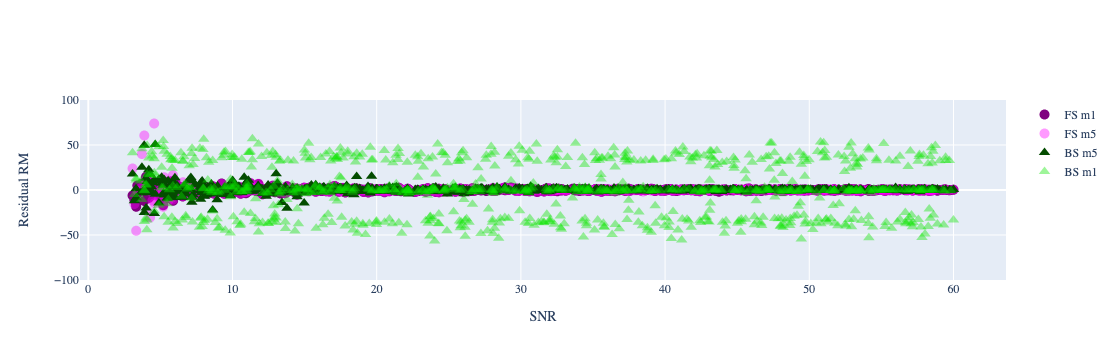

In [49]:
newnames = {'trace0': 'sim: FS model: m1' , 'trace1': 'sim: FS model: m5' , 'trace2': 'sim: BS model: m5' , 'trace3': 'sim: BS model: m1'}

fig = go.Figure()

fig.add_scatter(y = FS_FS_merge.RM_residual ,  x=FS_FS_merge.SNR , mode="markers" , name= "FS m1" ,  marker=dict(size=10 , color="Purple"))
fig.add_scatter(y = FS_BS_merge.RM_residual , x=FS_BS_merge.SNR , mode="markers" , name="FS m5" ,  marker=dict(size=10 , color='rgba(255, 0 ,255, 0.4)'))

fig.add_scatter(y = BS_BS_merge.RM_residual , x=BS_BS_merge.SNR , mode="markers" , marker_symbol="triangle-up"  , name="BS m5" , marker=dict(size=10 , color='rgba(4 ,76 ,0 ,1.0)'))
fig.add_scatter(y = BS_FS_merge.RM_residual , x=BS_FS_merge.SNR , mode="markers" , marker_symbol="triangle-up"  , name="BS m1"  ,marker=dict(size=10 , color='rgba(13 ,229 ,0 ,0.4)'))


fig.update_layout(font_family="Serif" , yaxis_range=[-100 ,100])
fig.update_yaxes(title_text="Residual RM")
fig.update_xaxes(title_text="SNR ")
fig.show()






## Need to make a more accessible version of this plot

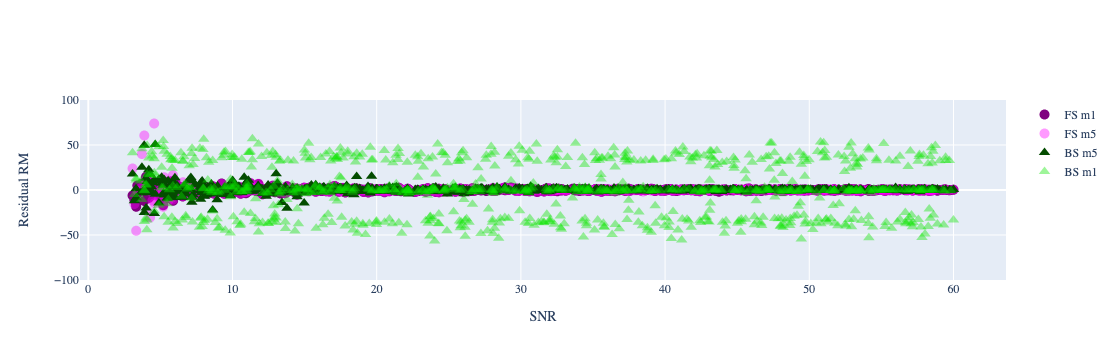

In [50]:
newnames = {'trace0': 'sim: FS model: m1' , 'trace1': 'sim: FS model: m5' , 'trace2': 'sim: BS model: m5' , 'trace3': 'sim: BS model: m1'}

fig = go.Figure()

fig.add_scatter(y = FS_FS_merge.RM_residual ,  x=FS_FS_merge.SNR , mode="markers" , name= "FS m1"  , marker=dict(size=10 , color="Purple"))
fig.add_scatter(y = FS_BS_merge.RM_residual ,  x=FS_BS_merge.SNR , mode="markers" , name="FS m5"  , marker=dict(size=10 , color='rgba(255, 0 ,255 ,0.4)'))

fig.add_scatter(y = BS_BS_merge.RM_residual , x=BS_BS_merge.SNR , mode="markers" , marker_symbol="triangle-up" ,  name="BS m5" , marker=dict(size=10 , color='rgba(4 ,76 ,0 ,1.0)'))
fig.add_scatter(y = BS_FS_merge.RM_residual , x=BS_FS_merge.SNR , mode="markers" , marker_symbol="triangle-up"  , name="BS m1" , marker=dict(size=10 , color='rgba(13 ,229, 0, 0.4)'))


fig.update_layout(font_family="Serif" , yaxis_range=[-100 ,100])
fig.update_yaxes(title_text="Residual RM")
fig.update_xaxes(title_text="SNR ")
fig.show()

The residual is defined as truth - estimate. It is hard to tell here becuase there are no error bars but it appears as though for the Faraday simple model fit with m1 is returns more correct RM_screens and when fit with a m5 model (slab) it the m5 fits slightly lower RM_screens on average. For the slab model it appears that the m1 model over estimates the RM_screen. Need to scale by noise?

## Create a similar residuals plot scaled but the error x-axis is SNR 

In [51]:
#RM_residual_BS_BS_scaled = RM_residual_BS_BS / BS_BS_merge.RM_radm2_plus_err
#RM_residual_BS_FS_scaled = RM_residual_BS_FS / BS_FS_merge.RM_radm2_plus_err
#RM_residual_FS_FS_scaled = RM_residual_FS_FS / FS_FS_merge.RM_radm2_plus_err
#RM_residual_FS_BS_scaled = RM_residual_FS_BS / FS_BS_merge.RM_radm2_plus_err

#BS_BS_merge['RM_residual_scaled'] = RM_residual_BS_BS_scaled
#BS_FS_merge['RM_residual_scaled'] = RM_residual_BS_FS_scaled

#FS_FS_merge['RM_residual_scaled'] = RM_residual_FS_FS_scaled
#FS_BS_merge['RM_residual_scaled'] = RM_residual_FS_BS_scaled

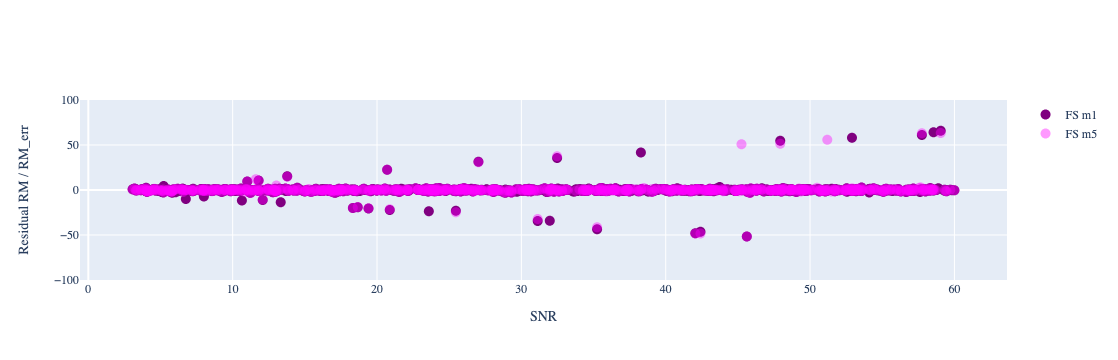

In [52]:
fig1 = go.Figure()

fig1.add_scatter(y = FS_FS_merge['RM_residual_scaled'] , x=FS_FS_merge.SNR , mode="markers" , name= "FS m1" ,  marker=dict(size=10 , color="Purple")  )
fig1.add_scatter(y = FS_BS_merge['RM_residual_scaled'] ,  x=FS_BS_merge.SNR , mode="markers" , name="FS m5"  , marker=dict(size=10 , color='rgba(255 ,0, 255 ,0.4)')  )

#fig1.add_scatter(y = RM_residual_BS_BS_scaled  x=BS_BS_merge.SNR  mode="markers"  marker_symbol="triangle-up"   name="BS m5"  marker=dict(size=10  color='rgba(4 76 0 1.0)')  )
#fig1.add_scatter(y = RM_residual_BS_FS_scaled  x=BS_FS_merge.SNR  mode="markers"  marker_symbol="triangle-up"   name="BS m1"  marker=dict(size=10  color='rgba(13 229 0 0.4)')  )
#fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))

fig1.update_layout(font_family="Serif" , yaxis_range=[-100 ,100])
fig1.update_yaxes(title_text="Residual RM / RM_err")
fig1.update_xaxes(title_text="SNR ")
fig1.show()

On the left hand side you have confident convergences on the wrong parameter values. It sort of makes sense to me becuase I would expect at these ultra high SNR it would be really diffcult to fit the wrong model?
It is interesting that a slab is better at fitting a simple source at high SNR

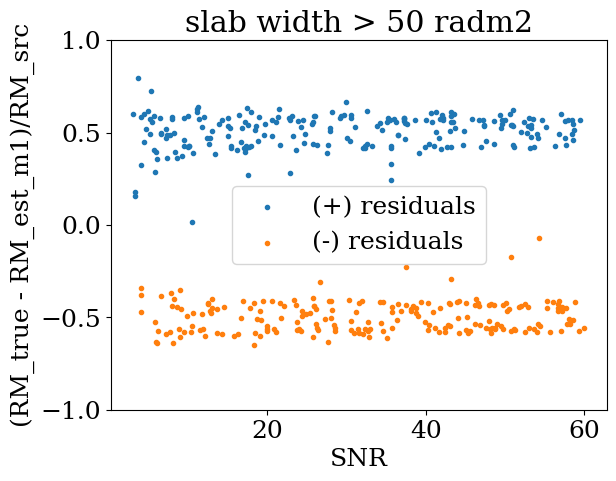

99
111
257
276
295
308
333
339
393
434
456
522
590
615
630
684
693
725
814
861
863
901
950
954


In [53]:

slab_width = 50

RM_output_m1 = BS_FS_merge.RM_radm2[(BS_FS_merge.RM_src_radm2 > slab_width) & (BS_FS_merge.RM_residual > 0)]
RM_screen_true = BS_FS_merge.RM_screen_radm2[(BS_FS_merge.RM_src_radm2 > slab_width) & (BS_FS_merge.RM_residual > 0)]
RM_src_true = BS_FS_merge.RM_src_radm2[(BS_FS_merge.RM_src_radm2 > slab_width) & (BS_FS_merge.RM_residual > 0)]
SNR = BS_FS_merge.SNR[(BS_FS_merge.RM_src_radm2 > slab_width) & (BS_FS_merge.RM_residual > 0)]
RM_true = (RM_screen_true + 0.5*RM_src_true)
RM_residuals_wide = (RM_true - RM_output_m1) / RM_src_true

RM_output_m1_m = BS_FS_merge.RM_radm2[(BS_FS_merge.RM_src_radm2 > slab_width) & (BS_FS_merge.RM_residual < 0)]
RM_screen_true_m = BS_FS_merge.RM_screen_radm2[(BS_FS_merge.RM_src_radm2 > slab_width) & (BS_FS_merge.RM_residual < 0)]
RM_src_true_m = BS_FS_merge.RM_src_radm2[(BS_FS_merge.RM_src_radm2 > slab_width) & (BS_FS_merge.RM_residual < 0)]
SNR_m = BS_FS_merge.SNR[(BS_FS_merge.RM_src_radm2 > slab_width) & (BS_FS_merge.RM_residual < 0)]
RM_true_m = (RM_screen_true_m + 0.5*RM_src_true_m)
RM_residuals_wid_me = (RM_true_m - RM_output_m1_m) / RM_src_true_m




#plt.scatter(RM_screen_true RM_output_m1  label='RM_screen_true'   marker='.')
plt.scatter(SNR , RM_residuals_wide ,  marker='.' , label='(+) residuals')
plt.scatter(SNR_m , RM_residuals_wid_me  , marker='.' , label='(-) residuals')
plt.xlabel('SNR')
plt.ylabel('(RM_true - RM_est_m1)/RM_src')
plt.title('slab width > 50 radm2')
plt.ylim(-1 ,1)
plt.legend()
plt.show()



for l in BS_FS_merge.src[BS_FS_merge.RM_residual_scaled > 25.0]: 
    print(l)

# Slab Accuracy

# Investigating the spectra of the problematic source within the wings of the outliers of RM residuals

In [54]:
BS_FS_merge.keys()
print(BS_FS_merge['psi0_deg_x'][102])

97.90695232403526


## What if I make SNR bins 

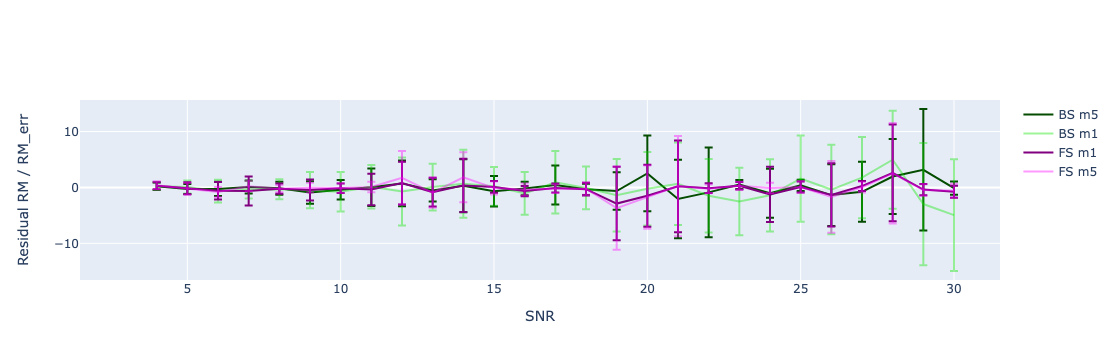

In [55]:
SNR_lim = np.arange(3, 31, 1)

avg_RM_resid_BS_BS = []
std_RM_resid_BS_BS = []

avg_RM_resid_BS_FS = []
std_RM_resid_BS_FS = []

avg_RM_resid_FS_BS = []
std_RM_resid_FS_BS = []

avg_RM_resid_FS_FS = []
std_RM_resid_FS_FS = []

#Make the averages for each SNR bin
for num in SNR_lim:

    BS_BS = BS_BS_merge['RM_residual_scaled'][(BS_BS_merge.SNR > num - 1)&(BS_BS_merge.SNR < num)]
    BS_FS = BS_FS_merge['RM_residual_scaled'][(BS_FS_merge.SNR > num - 1)&(BS_FS_merge.SNR < num)]
    FS_BS = FS_BS_merge['RM_residual_scaled'][(FS_BS_merge.SNR > num - 1)&(FS_BS_merge.SNR < num)]
    FS_FS = FS_FS_merge['RM_residual_scaled'][(FS_FS_merge.SNR > num - 1)&(FS_FS_merge.SNR < num)]

    avg_RM_resid_BS_BS.append(np.mean(BS_BS))
    std_RM_resid_BS_BS.append(np.std(BS_BS))

    avg_RM_resid_BS_FS.append(np.mean(BS_FS))
    std_RM_resid_BS_FS.append(np.std(BS_FS))


    avg_RM_resid_FS_BS.append(np.mean(FS_BS))
    std_RM_resid_FS_BS.append(np.std(FS_BS))

    avg_RM_resid_FS_FS.append(np.mean(FS_FS))
    std_RM_resid_FS_FS.append(np.std(FS_FS))

fig2 = go.Figure(data=go.Scatter(
        x = SNR_lim, 
        y = avg_RM_resid_BS_BS, 
        marker = dict(color='rgba(4, 76 ,0 ,1.0)') ,
        name="BS m5" ,
        error_y=dict(
            type='data',  # value of error bar given in data coordinates
            array=std_RM_resid_BS_BS, 
            visible=True)
    ))

fig2.add_scatter(x = SNR_lim , y = avg_RM_resid_BS_FS , name="BS m1" , marker = dict(color='rgba(13 ,229, 0 ,0.4)') , 
                 error_y=dict(type='data' , array=std_RM_resid_BS_FS , visible=True))

fig2.add_scatter(x = SNR_lim , y = avg_RM_resid_FS_FS , name="FS m1" , marker = dict(color='Purple') , 
                 error_y=dict(type='data' , array=std_RM_resid_FS_FS  ,visible=True))

fig2.add_scatter(x = SNR_lim , y = avg_RM_resid_FS_BS , name="FS m5" , marker = dict(color='rgba(255, 0 ,255 ,0.4)') , 
                 error_y=dict(type='data' , array=std_RM_resid_FS_BS , visible=True))

fig2.update_yaxes(title_text="Residual RM / RM_err")
fig2.update_xaxes(title_text="SNR ")
fig2.show()





    

# sure to explain it is not error on mean but raw std

## Make a plot of SNR vs RM_src  HOW DO I DO THIS PLOTLY?
 

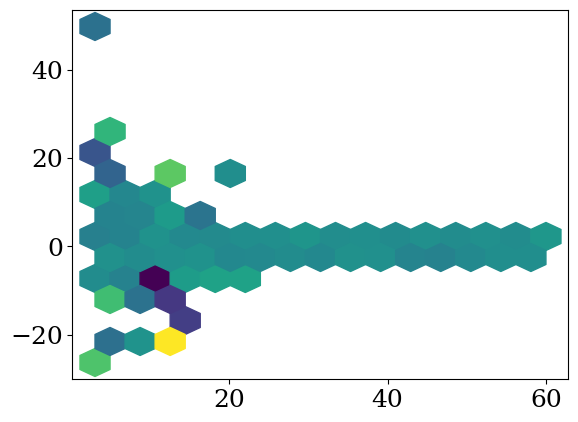

In [56]:
plt.hexbin(x=BS_BS_merge['SNR'][abs(BS_BS_merge['RM_residual'])<50] , y=BS_BS_merge['RM_residual'][abs(BS_BS_merge['RM_residual'])<50] , C=BS_BS_merge['psi0_deg_residual'][abs(BS_BS_merge['RM_residual'])<50] 
                    ,gridsize=15 
                    ,cmap='viridis')

### IS THE ORIGINAL MODEL PREFERRED?

In [57]:
# A NEGATIVE ANSWER MEAN THAT THE ORIGINAL MODEL IS PREFFERED POSITIVE ANSWER MEANS THAT A ALTENATIVE MODEL 
#NEGATIVE VALUE MEANS THAT THERE IS A BETTER TRUE MODEL FIT

#BS
BS_BS_merge['is_good_model_chi']= BS_BS_merge.chiSq < BS_FS_merge.chiSq
BS_BS_merge['is_good_model_BIC'] = BS_BS_merge.BIC < BS_FS_merge.BIC
BS_BS_merge['is_good_model_AIC'] = BS_BS_merge.AIC < BS_FS_merge.AIC

#FS
FS_FS_merge['is_good_model_chi']= FS_FS_merge.chiSq < FS_BS_merge.chiSq
FS_FS_merge['is_good_model_BIC'] = FS_FS_merge.BIC < FS_BS_merge.BIC
FS_FS_merge['is_good_model_AIC'] = FS_FS_merge.AIC < FS_BS_merge.AIC





820


/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/2814579005.py:12: RuntimeWarning:

invalid value encountered in scalar divide

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/2814579005.py:13: RuntimeWarning:

invalid value encountered in scalar divide



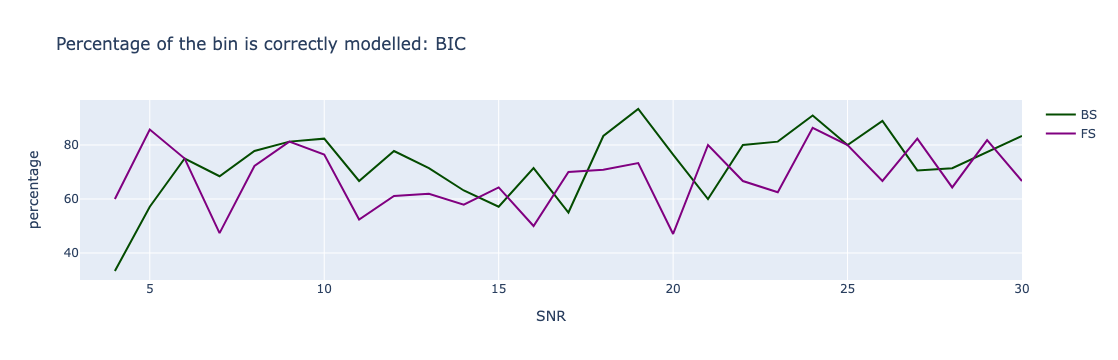

In [58]:
SNR_lim = np.arange(3 ,31 ,1)

BS_BS_percent_SNR = []
FS_FS_percent_SNR = []
print(np.sum(BS_BS_merge['is_good_model_chi']))
for num in SNR_lim:

    BS_BS_fit = BS_BS_merge.is_good_model_BIC[(BS_BS_merge.SNR > num - 1)&(BS_BS_merge.SNR < num)]
    FS_FS_fit = FS_FS_merge.is_good_model_BIC[(FS_FS_merge.SNR > num - 1)&(FS_FS_merge.SNR < num)]


    BS_BS_percent_SNR.append((np.sum(BS_BS_fit) / len(BS_BS_fit)) *100)
    FS_FS_percent_SNR.append((np.sum(FS_FS_fit) / len(FS_FS_fit)) *100)

    
fig2 = go.Figure(data=go.Scatter(
        x = SNR_lim ,
        y = BS_BS_percent_SNR ,
        marker = dict(color='rgba(4, 76, 0 ,1.0)') ,
        name="BS"))
fig2.add_scatter(x = SNR_lim  ,y = FS_FS_percent_SNR , name="FS" , marker = dict(color='Purple'))
fig2.update_layout(title="Percentage of the bin is correctly modelled: BIC")


fig2.update_yaxes(title_text='percentage')
fig2.update_xaxes(title_text="SNR ")
fig2.show()


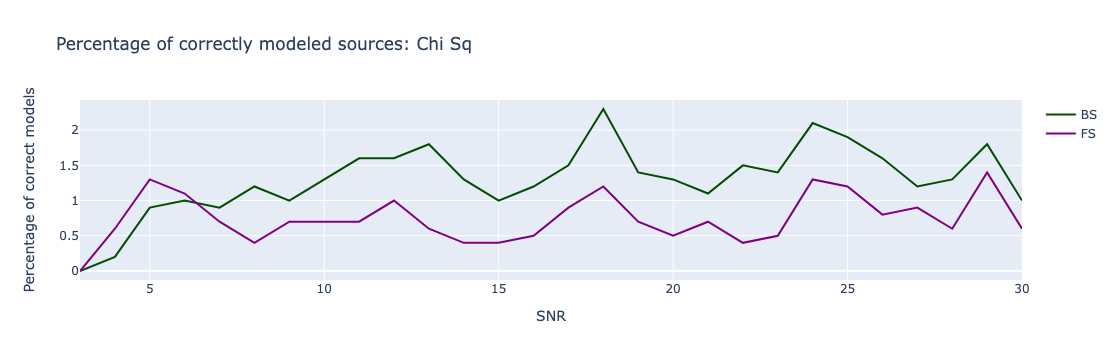

In [59]:
SNR_lim = np.arange(3, 31, 1)

BS_BS_percent_SNR = []
FS_FS_percent_SNR = []

for num in SNR_lim:

    BS_BS_fit = BS_BS_merge.is_good_model_chi[(BS_BS_merge.SNR > num - 1)&(BS_BS_merge.SNR < num)]
    FS_FS_fit = FS_FS_merge.is_good_model_chi[(FS_FS_merge.SNR > num - 1)&(FS_FS_merge.SNR < num)]

    BS_BS_percent_SNR.append((np.sum(BS_BS_fit) / 1000) *100)
    FS_FS_percent_SNR.append((np.sum(FS_FS_fit) / 1000) *100)

    
fig2 = go.Figure(data=go.Scatter(
        x = SNR_lim ,
        y = BS_BS_percent_SNR ,
        marker = dict(color='rgba(4 ,76 ,0 ,1.0)'), 
        name="BS"))
fig2.add_scatter(x = SNR_lim  ,y = FS_FS_percent_SNR,  name="FS"  ,marker = dict(color='Purple'))
fig2.update_layout(title="Percentage of correctly modeled sources: Chi Sq")


fig2.update_yaxes(title_text='Percentage of correct models')
fig2.update_xaxes(title_text="SNR ")
fig2.show()

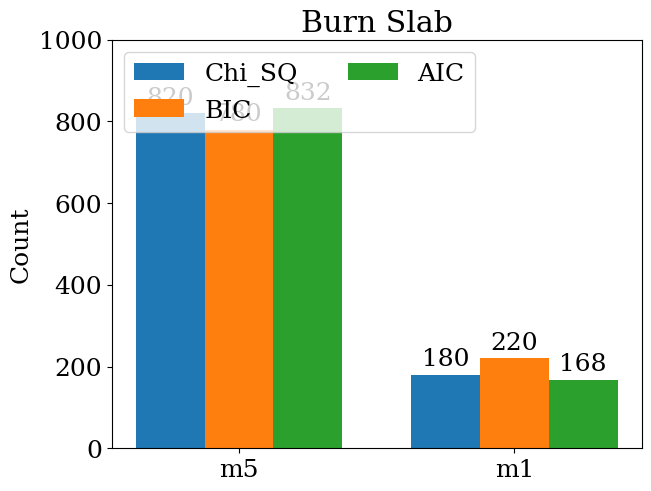

In [60]:
species = ("m5" , "m1")
penguin_means = {
    'Chi_SQ': [np.sum(BS_BS_merge['is_good_model_chi']) , (1000-np.sum(BS_BS_merge['is_good_model_chi']))], 
    'BIC': [np.sum(BS_BS_merge['is_good_model_BIC']) , (1000-np.sum(BS_BS_merge['is_good_model_BIC']))], 
    'AIC': [np.sum(BS_BS_merge['is_good_model_AIC']) , (1000-np.sum(BS_BS_merge['is_good_model_AIC']))], 
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig , ax = plt.subplots(layout='constrained')

for attribute , measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset , measurement , width , label=attribute)
    ax.bar_label(rects , padding=3)
    multiplier += 1

# Add some text for labels  title and custom x-axis tick labels  etc.
ax.set_ylabel('Count')
ax.set_title('Burn Slab')
ax.set_xticks(x + width , species)
ax.legend(loc='upper left' , ncols=2)
ax.set_ylim(0 , 1000)

plt.show()

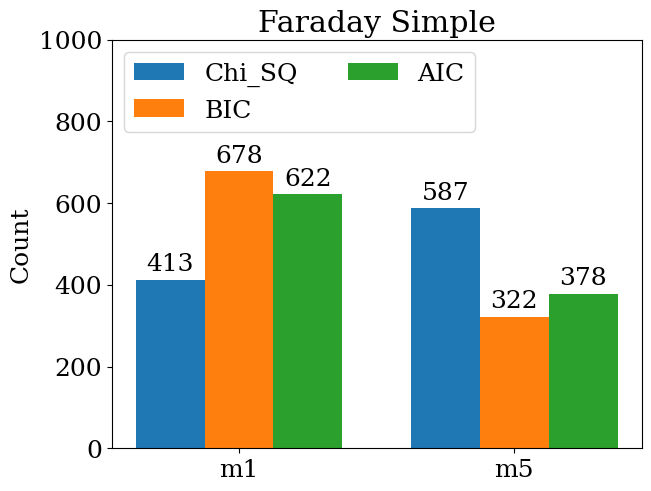

In [61]:
species = ("m1" , "m5")
penguin_means = {
    'Chi_SQ': [np.sum(FS_FS_merge['is_good_model_chi'])  ,(1000-np.sum(FS_FS_merge['is_good_model_chi']))], 
    'BIC': [np.sum(FS_FS_merge['is_good_model_BIC']),  (1000-np.sum(FS_FS_merge['is_good_model_BIC']))], 
    'AIC': [np.sum(FS_FS_merge['is_good_model_AIC']) , (1000-np.sum(FS_FS_merge['is_good_model_AIC']))], 
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig , ax = plt.subplots(layout='constrained')

for attribute , measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset  ,measurement , width , label=attribute)
    ax.bar_label(rects  ,padding=3)
    multiplier += 1

# Add some text for labels  title and custom x-axis tick labels  etc.
ax.set_ylabel('Count')
ax.set_title('Faraday Simple')
ax.set_xticks(x + width  ,species)
ax.legend(loc='upper left'  ,ncols=2)
ax.set_ylim(0 , 1000)

plt.show()

The delta BIC is m5.BIC - m1.BIC so that means that the positive values favor the m1 model and the negative values favor the m5 model. It shows that SNR plays a huge role in this however. I am using input SNR the recovered SNR for the burnslab is not good for thin slabs for some reason. For thin slabs the fracpol/error fracpol recover much higher SNR than actually input. 

Even at high signal to noise the m1 model is still slightly favored. 
The thick slab wings consist of the regions where there is high confidence in a slabs. 
Also this plot shows that at SNR less than 20 things get hard to tell apart. 

### Check AIC  what delta are happy with (10?)

## SNR Comparison

At the low RM-src the error bars go way off they produce much higher SNR than given for the slabs maybe thus is expected as the FDF would become thinner and thinner the Q U fit more bumpy


Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
       'deltaRM_radm2', 'fracPol_plus_err', 'psi0_deg_plus_err',
       'RM_radm2_plus_err', 'deltaRM_radm2_plus_err', 'fracPol_minus_err',
       'psi0_deg_minus_err', 'RM_radm2_minus_err', 'deltaRM_radm2_minus_err',
       'fracPol_bounds', 'psi0_deg_bounds', 'RM_radm2_bounds',
       'deltaRM_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg_y',
       'RM_screen_radm2', 'RM_src_radm2', 'sigma_RM_2', 'sigmaRM_FG', 'SNR',
       'model', 'frac_pol_seed', 'RM_screen_seed', 'RM_source_seed',
       'sigmaRM_seed', 'sigma_FG_seed', 'psi0_seed', 'RM_residual',
       'psi0_deg_residual', 'RM_residual_scaled', 'is_good_model_chi',
       'is_good_model_BIC', 'is_good_model_AIC'],
      dtype='object')


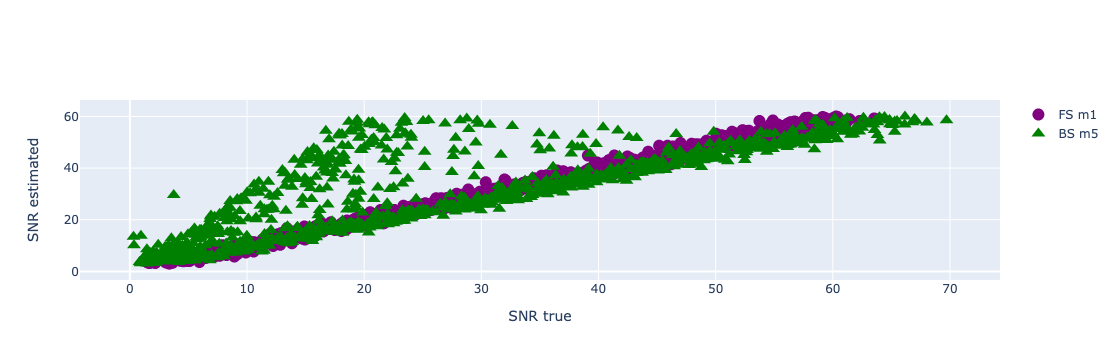

In [62]:
SNR_est = FS_FS_merge.fracPol/FS_FS_merge.fracPol_minus_err
SNR_est_BS = BS_BS_merge.fracPol/BS_BS_merge.fracPol_plus_err
print(BS_BS_merge.keys())
fig4 = go.Figure()

fig4.add_scatter(x = SNR_est , y = FS_FS_merge.SNR , name="FS m1",  mode='markers' , marker=dict(size=12  ,color='Purple'))
fig4.add_scatter(x = SNR_est_BS ,y = BS_BS_merge.SNR , name="BS m5"  , marker_symbol="triangle-up" , mode='markers',  marker=dict(size=12 , color='Green'))
fig4.update_yaxes(title_text='SNR estimated')
fig4.update_xaxes(title_text="SNR true")
fig4.show()



# ADD MORE DATA TO LOWER SNR 




In [63]:

#ADD 5000 more sims to the lower SNR region 
BS_FS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simburnslab_model_num_1_sims.csv') 
BS_BS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simburnslab_model_num_5_sims.csv') 
 
BS_BS_1000_nestle_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simBS_model_num_5_sims_nestle_1000.csv') 
BS_FS_1000_nestle_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simBS_model_num_1_sims_nestle.csv') 
 
 
#Add another 3k 
BS_FS_3000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simBS_model_num_1_sims_xtra3k.csv') 
BS_BS_3000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simBS_model_num_5_sims_xtra3k.csv') 
 
BS_true_xtrak = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/combined_faraday_simple_number_10000_freq_800_1089_SNR_band1.csv') 
 
#Import True 5000 
 
BS_5000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/burnslab_unif_fg_number_5000_freq_800_1089_ran_SNR.csv') 
FS_5000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/faraday_simple_number_5000_freq_800_1089_ran_SNR.csv') 
 
 
#ADD 5K more 
#ADD 5000 more sims to the lower SNR region 
BS_FS_5000_nest_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simBS_model_num_1_sims_nest.csv') 
BS_BS_5000_nest_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simBS_model_num_5_sims_nest.csv') 
extra_5k_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/extra_5burnslab_unif_fg_number_5000_freq_800_1089_SNR_band1.csv') 
 
#COMBINE OLD AND NEW DATA 
 
FS_5000_true_df.rename( columns={'Unnamed: 0':'src'} , inplace=True ) 
BS_5000_true_df.rename( columns={'Unnamed: 0':'src'} , inplace=True ) 
BS_true_xtrak.rename(  columns={'Unnamed: 0':'src'}  ,inplace=True ) 
extra_5k_true_df.rename(columns={'Unnamed: 0':'src'} , inplace=True ) 
 
BS_FS_5000_df['src'] = BS_FS_5000_df['src'] - 1 
BS_BS_5000_df['src'] = BS_BS_5000_df['src'] - 1 
BS_BS_3000_df['src'] = BS_BS_3000_df['src'] - 1 
BS_FS_3000_df['src'] = BS_FS_3000_df['src'] - 1 
BS_BS_1000_nestle_df['src'] = BS_BS_1000_nestle_df['src'] - 1 
BS_FS_1000_nestle_df['src'] = BS_FS_1000_nestle_df['src'] - 1 
BS_BS_5000_nest_df['src'] = BS_BS_5000_nest_df['src'] - 1 
BS_FS_5000_nest_df['src'] = BS_FS_5000_nest_df['src'] - 1 
 
#merge with truth both 1000 sample and 5000 sample 
BS_BS_1000_nestle_test1 = pd.merge(BS_BS_1000_nestle_df ,BS_BS_5000_df  , on='src' , how='outer') 
BS_FS_1000_nestle_test2 = pd.merge(BS_FS_1000_nestle_df ,BS_FS_5000_df ,  on='src' , how='outer') 
 
BS_BS_1000_nestle_test1_SNR = pd.merge(BS_BS_1000_nestle_df ,BS_5000_true_df ,  on='src',  how='outer') 
BS_FS_1000_nestle_test2_SNR = pd.merge(BS_BS_1000_nestle_df, BS_5000_true_df ,  on='src'  ,how='outer') 
 
BS_BS_5000_nest_df_merge = pd.merge(BS_BS_5000_nest_df , extra_5k_true_df ,  on='src' , how='outer') 
BS_FS_5000_nest_df_merge = pd.merge(BS_FS_5000_nest_df , extra_5k_true_df  , on='src' , how='outer') 
 
BS_FS_merge_1000 = pd.merge(BS_FS_1000_QUfit_df , BS_1000_true_df  ,on='src' , how='outer') 
BS_BS_merge_1000 = pd.merge(BS_BS_1000_QUfit_df , BS_1000_true_df,  on='src' , how='outer') 
 
BS_FS_merge_5000 = pd.merge(BS_FS_5000_df , BS_5000_true_df , on='src' , how='outer') 
BS_BS_merge_5000 = pd.merge(BS_BS_5000_df , BS_5000_true_df , on='src' , how='outer') 
 
BS_FS_merge_3000 = pd.merge(BS_FS_3000_df , BS_true_xtrak , on='src' , how='outer') 
BS_BS_merge_3000 = pd.merge(BS_BS_3000_df , BS_true_xtrak , on='src' , how='outer') 
 
 
BS_BS_9000_src_sample = pd.concat([BS_BS_merge_5000 , BS_BS_5000_nest_df_merge] , axis = 0) 
BS_FS_9000_src_sample = pd.concat([BS_FS_merge_5000 , BS_FS_5000_nest_df_merge] , axis = 0) 
 
#10k FS Sources 
FS_FS_10000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simFS_model_num_1_sims.csv') 
FS_BS_10000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/condensed_simFS_model_num_5_sims.csv') 
FS_true_10000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/10000_src_testing/combined_faraday_simple_number_10000_freq_800_1089_SNR_band1.csv') 
 
FS_FS_10000_df['src'] = FS_FS_10000_df['src'] - 1 
FS_BS_10000_df['src'] = FS_BS_10000_df['src'] - 1 
 
FS_true_10000_df.rename( columns={'Unnamed: 0':'src'} , inplace=True ) 
 
FS_FS_merge_10000 = pd.merge(FS_FS_10000_df , FS_true_10000_df , on='src' , how='outer') 
FS_BS_merge_10000 = pd.merge(FS_BS_10000_df , FS_true_10000_df , on='src' , how='outer') 
 
print(len(BS_BS_9000_src_sample)) 
print(FS_FS_merge_10000.keys()) 
print(BS_BS_9000_src_sample.keys())


10000
Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
       'fracPol_plus_err', 'psi0_deg_plus_err', 'RM_radm2_plus_err',
       'fracPol_minus_err', 'psi0_deg_minus_err', 'RM_radm2_minus_err',
       'fracPol_bounds', 'psi0_deg_bounds', 'RM_radm2_bounds', 'chiSq',
       'chiSqRed', 'AIC', 'AICc', 'BIC', 'ln(EVIDENCE) ', 'dLn(EVIDENCE)',
       'frac_pol', 'psi0_deg_y', 'RM_screen_radm2', 'RM_src_radm2',
       'sigma_RM_2', 'sigmaRM_FG', 'frac_pol_2_comp', 'SNR', 'model',
       'frac_pol_seed', 'RM_screen_seed', 'RM_source_seed', 'sigmaRM_seed',
       'sigma_FG_seed', 'psi0_seed'],
      dtype='object')
Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
       'deltaRM_radm2', 'fracPol_plus_err', 'psi0_deg_plus_err',
       'RM_radm2_plus_err', 'deltaRM_radm2_plus_err', 'fracPol_minus_err',
       'psi0_deg_minus_err', 'RM_radm2_minus_err', 'deltaRM_radm2_minus_err',
       'fracPol_bounds', 'psi0_deg_bounds', 'RM_radm2_bounds',
       'deltaRM_radm2

# Burn Slab Accuracy

<>:21: SyntaxWarning:

invalid escape sequence '\d'

<>:27: SyntaxWarning:

invalid escape sequence '\d'

<>:33: SyntaxWarning:

invalid escape sequence '\d'

<>:21: SyntaxWarning:

invalid escape sequence '\d'

<>:27: SyntaxWarning:

invalid escape sequence '\d'

<>:33: SyntaxWarning:

invalid escape sequence '\d'

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/1645350497.py:21: SyntaxWarning:

invalid escape sequence '\d'

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/1645350497.py:27: SyntaxWarning:

invalid escape sequence '\d'

/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/1645350497.py:33: SyntaxWarning:

invalid escape sequence '\d'



10000


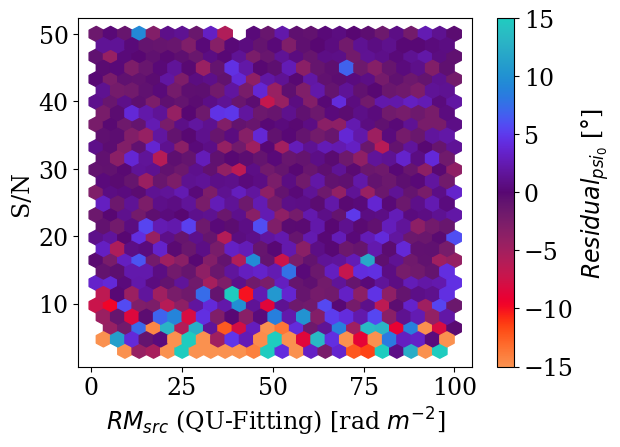

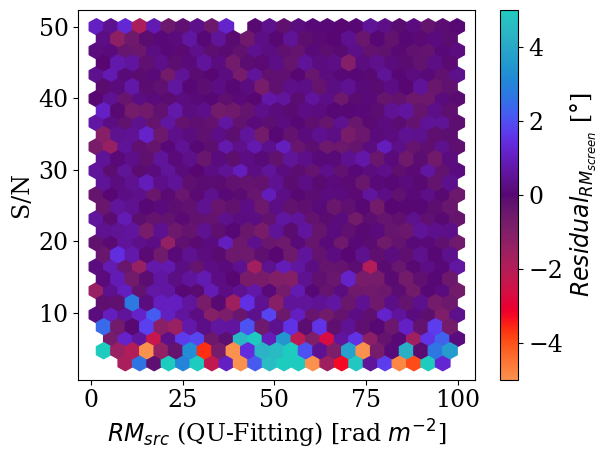

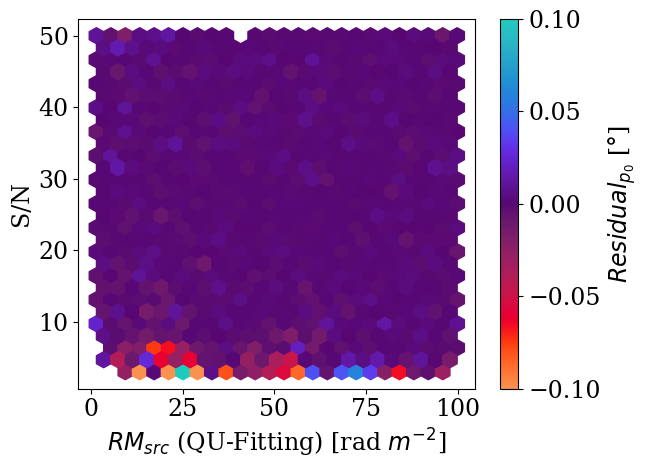

In [71]:
plt.rcParams.update({'font.size': 17}) 
plt.rc('font', family='serif') 

residuals = BS_BS_9000_src_sample.RM_src_radm2 - BS_BS_9000_src_sample.deltaRM_radm2
residuals_psi = BS_BS_9000_src_sample.psi0_deg_y - BS_BS_9000_src_sample.psi0_deg_x
residuals_p = BS_BS_9000_src_sample.frac_pol - BS_BS_9000_src_sample.fracPol
residuals_RM = BS_BS_9000_src_sample.RM_screen_radm2 - BS_BS_9000_src_sample.RM_radm2

print(len(residuals))
plt.hexbin(BS_BS_9000_src_sample.deltaRM_radm2, BS_BS_9000_src_sample.SNR, residuals, gridsize=25, reduce_C_function=np.nanmedian, vmin=-2, vmax=2,cmap='cmr.guppy')
plt.ylabel('S:N')
plt.colorbar(label='R$_{RM_{src}}$ [rad m$^{-2}$]')
plt.xlabel('RM$_{src, QU}$ [rad m$^{-2}$]')
plt.tight_layout()
plt.savefig('BS_accuracy_b1.pdf', format='pdf')
plt.clf()

plt.hexbin(BS_BS_9000_src_sample.deltaRM_radm2, BS_BS_9000_src_sample.SNR, residuals_psi, gridsize=25, reduce_C_function=np.nanmedian, vmin=-15, vmax=15,cmap='cmr.guppy')
plt.ylabel('S/N')
plt.xlabel('$RM_{src}$ (QU-Fitting) [rad $m^{-2}$]')
plt.colorbar(label='$Residual_{psi_{0}}$ [$\degree$]')
plt.show()

plt.hexbin(BS_BS_9000_src_sample.deltaRM_radm2, BS_BS_9000_src_sample.SNR, residuals_RM, gridsize=25, reduce_C_function=np.nanmedian, vmin=-5, vmax=5,cmap='cmr.guppy')
plt.ylabel('S/N')
plt.xlabel('$RM_{src}$ (QU-Fitting) [rad $m^{-2}$]')
plt.colorbar(label='$Residual_{RM_{screen}}$ [$\degree$]')
plt.show()

plt.hexbin(BS_BS_9000_src_sample.deltaRM_radm2, BS_BS_9000_src_sample.SNR, residuals_p, gridsize=25, reduce_C_function=np.nanmedian, vmin=-0.1, vmax=0.1,cmap='cmr.guppy')
plt.ylabel('S/N')
plt.xlabel('$RM_{src}$ (QU-Fitting) [rad $m^{-2}$]')
plt.colorbar(label='$Residual_{p_{0}}$ [$\degree$]')
plt.show()


In [65]:
#Calculate the Error Scaled Residuals

In [6]:
err_residuals = []
err_residuals_p = []
err_residuals_psi = []
err_residuals_RM = []

residuals = np.asarray(residuals)
residuals_p = np.asarray(residuals_p)
residuals_psi = np.asarray(residuals_psi)
residuals_RM = np.asarray(residuals_RM)

print(len(BS_BS_9000_src_sample.deltaRM_radm2_minus_err))

print(BS_BS_9000_src_sample["deltaRM_radm2_minus_err"].iloc[i])
for i in range(10000):
    
    if residuals[i] < 0:
        
        err_residuals.append(residuals[i] / BS_BS_9000_src_sample["deltaRM_radm2_minus_err"].iloc[i])

    else:
        err_residuals.append(residuals[i] / BS_BS_9000_src_sample["deltaRM_radm2_plus_err"].iloc[i])

    if residuals_p[i] < 0:
        
        err_residuals_p.append(residuals_p[i] / BS_BS_9000_src_sample["fracPol_minus_err"].iloc[i])

    else:
        err_residuals_p.append(residuals_p[i] / BS_BS_9000_src_sample["fracPol_plus_err"].iloc[i])
        

    if residuals_psi[i] < 0:
        
        err_residuals_psi.append(residuals_psi[i] / BS_BS_9000_src_sample["psi0_deg_minus_err"].iloc[i])

    else:
        err_residuals_psi.append(residuals_psi[i] / BS_BS_9000_src_sample["psi0_deg_plus_err"].iloc[i])
        

    if residuals_RM[i] < 0:
        
        err_residuals_RM.append(residuals_RM[i] / BS_BS_9000_src_sample["RM_radm2_minus_err"].iloc[i])

    else:
        err_residuals_RM.append(residuals_RM[i] / BS_BS_9000_src_sample["RM_radm2_plus_err"].iloc[i])


SN_cut = 6
RM_src = 30

err_residuals_RM = np.asarray(err_residuals_RM)
err_residuals_psi = np.asarray(err_residuals_psi)
err_residuals_p = np.asarray(err_residuals_p)
err_residuals = np.asarray(err_residuals)

error_resdiual_RM = err_residuals_RM[(BS_BS_9000_src_sample.SNR > SN_cut) & (BS_BS_9000_src_sample.deltaRM_radm2 > RM_src)]
error_residuals_psi = err_residuals_psi[(BS_BS_9000_src_sample.SNR > SN_cut) & (BS_BS_9000_src_sample.deltaRM_radm2 > RM_src)]
error_residuals_p = err_residuals_p[(BS_BS_9000_src_sample.SNR > SN_cut) & (BS_BS_9000_src_sample.deltaRM_radm2 > RM_src)]
error_residuals = err_residuals[(BS_BS_9000_src_sample.SNR > SN_cut) & (BS_BS_9000_src_sample.deltaRM_radm2 > RM_src)]

print(np.mean(error_residuals), np.std(error_residuals))
print(np.mean(error_residuals_psi), np.std(error_residuals_psi))
print(np.mean(error_residuals_p), np.std(error_residuals_p))
print(np.mean(error_resdiual_RM), np.std(error_resdiual_RM))

NameError: name 'residuals' is not defined

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/1033913466.py:12: SyntaxWarning: invalid escape sequence '\p'
  axes[0][0].set_xlabel('$R_{\psi_{0}}/\sigma_{\psi_{0}}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/1033913466.py:19: SyntaxWarning: invalid escape sequence '\s'
  axes[1][0].set_xlabel('$R_{RM_{screen}}/\sigma_{RM_{screen}}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/1033913466.py:26: SyntaxWarning: invalid escape sequence '\s'
  axes[0][1].set_xlabel('$R_{p_{0}}/\sigma_{p_{0}}$')
/var/folders/89/zgv9nv5563n89pz

NameError: name 'BS_BS_9000_src_sample' is not defined

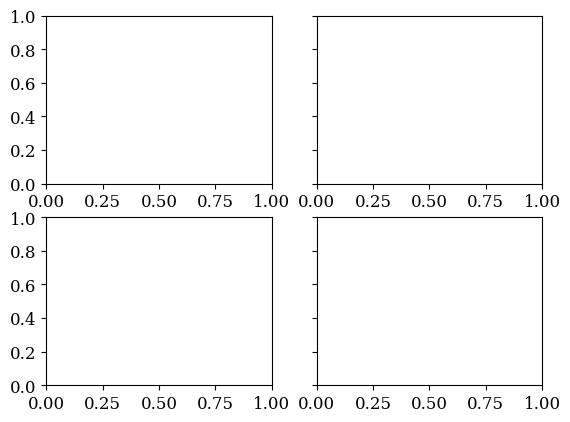

In [7]:
plt.rcParams.update({'font.size': 12}) 
plt.rc('font', family='serif') 
fig4, axes = plt.subplots(nrows=2, ncols=2, sharey=True)
print(BS_BS_9000_src_sample.keys())


psimed = np.round(np.median(residuals_psi/BS_BS_9000_src_sample.psi0_deg_plus_err),2)
psistd = np.round(np.std(residuals_psi/BS_BS_9000_src_sample.psi0_deg_plus_err), 1)
psilabel = 'med={} std={}'.format(psimed, psistd)
axes[0][0].hist(residuals_psi/BS_BS_9000_src_sample.psi0_deg_plus_err, range=(-6,6), bins=25, label=psilabel)
axes[0][0].legend()
axes[0][0].set_xlabel('$R_{\psi_{0}}/\sigma_{\psi_{0}}$')

RMmed = np.round(np.median(residuals_RM[BS_BS_9000_src_sample['ln() '] > 5]/BS_BS_9000_src_sample.fracPol_plus_err[BS_BS_9000_src_sample['ln(EVIDENCE) ']>5]), 2)
RMstd = np.round(np.std((residuals_RM/BS_BS_9000_src_sample.fracPol_plus_err)/10), 1)
RMlabel = 'med={} std={}'.format(RMmed, RMstd)
axes[1][0].hist(residuals_RM/BS_BS_9000_src_sample.RM_radm2_plus_err, range=(-6,6), bins=25, label=RMlabel)
axes[1][0].legend()
axes[1][0].set_xlabel('$R_{RM_{screen}}/\sigma_{RM_{screen}}$')

pmed = np.round(np.median(residuals_p/BS_BS_9000_src_sample.fracPol_plus_err), 2) 
pstd = np.round(np.std(residuals_p/BS_BS_9000_src_sample.fracPol_plus_err), 1)
plabel = 'med={} std={}'.format(pmed, pstd)
axes[0][1].hist(residuals_p/BS_BS_9000_src_sample.fracPol_plus_err, range=(-6,6), bins=25, label=plabel)
axes[0][1].legend()
axes[0][1].set_xlabel('$R_{p_{0}}/\sigma_{p_{0}}$')

Rsrcmed = np.round(np.median(residuals/BS_BS_9000_src_sample.deltaRM_radm2_plus_err), 1)
Rsrcstd = np.round(np.std(residuals/BS_BS_9000_src_sample.deltaRM_radm2_plus_err), 1)
Rsrclabel = 'med={} std={}'.format(Rsrcmed, Rsrcstd)
axes[1][1].set_xlabel('$R_{RM_{src}}/\sigma_{RM_{src}}$')

axes[1][1].hist(residuals/BS_BS_9000_src_sample.deltaRM_radm2_plus_err, range=(-6,6), bins=25, label=Rsrclabel)
plt.legend()
plt.tight_layout()
plt.show()
#plt.savefig('BS_error_bars.pdf', format='pdf')



## Check the other parameters for the FS screen and the delta BIC

In [ ]:
FS_FS_merge_10000['delta_BIC'] = FS_FS_merge_10000.BIC - FS_BS_merge_10000.BIC

bottom = plt.get_cmap('cmr.dusk_r', 2) 
top= plt.get_cmap('cmr.sapphire', 254) 
newcolors = np.vstack((top(np.linspace(0, 1, 254)), 
                bottom(np.linspace(0, 0.09, 2)))) 
newcmp = ListedColormap(newcolors, name='embersaph') 
 
bounds = [-4000,-70, -10, -2.5, 0, 11] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 
 
plt.hexbin(FS_FS_merge_10000.frac_pol, FS_FS_merge_10000.psi0_deg_y, FS_FS_merge_10000.delta_BIC, cmap=newcmp, gridsize=20, reduce_C_function=np.median)
plt.show()

plt.clf()

plt.hexbin(FS_FS_merge_10000.RM_screen_radm2, FS_FS_merge_10000.SNR, FS_FS_merge_10000.delta_BIC, cmap=newcmp, gridsize=20, reduce_C_function=np.median)
plt.show()


In [ ]:
def percentage_reduce_BIC_C(C):
    C = np.asarray(C)
    percentage = (len(C[C< -1]) / len(C)) * 100 
        
    if len(C) < 5:
        return 0
    return percentage

plt.hexbin(FS_FS_merge_10000.frac_pol, FS_FS_merge_10000.psi0_deg_y, FS_FS_merge_10000.delta_BIC, gridsize=20, reduce_C_function=percentage_reduce_BIC_C)
plt.colorbar()
plt.show()


In [ ]:
#RM 
#True - Estimate
BS_BS_9000_src_sample['RM_residual'] = (BS_BS_9000_src_sample.RM_screen_radm2  - BS_BS_9000_src_sample.RM_radm2) / BS_BS_9000_src_sample.RM_radm2_plus_err
BS_FS_9000_src_sample['RM_residual']= ((BS_FS_9000_src_sample.RM_screen_radm2 + 0.5 * BS_FS_9000_src_sample.RM_src_radm2)  - BS_FS_9000_src_sample.RM_radm2) / BS_FS_9000_src_sample.RM_radm2_plus_err
#Faraday Simple
FS_FS_merge_10000['RM_residual'] = FS_FS_merge_10000.RM_screen_radm2 - FS_FS_merge_10000.RM_radm2
FS_BS_merge_10000['RM_residual'] = FS_FS_merge_10000.RM_screen_radm2 - FS_BS_merge_10000.RM_radm2

BS_BS_9000_src_sample['delta_evd_5_1'] = BS_BS_9000_src_sample['ln(EVIDENCE) '] - BS_FS_9000_src_sample['ln(EVIDENCE) ']
BS_BS_9000_src_sample.keys()

In [ ]:
fig = go.Figure()
rm = 30
fig.add_scatter(y = BS_BS_9000_src_sample.RM_residual[BS_BS_9000_src_sample.RM_src_radm2 < rm], x=BS_BS_9000_src_sample.SNR[BS_BS_9000_src_sample.RM_src_radm2 < rm], mode="markers", marker_symbol="triangle-up",  name="BS m5", marker=dict(size=10, color='rgba(4,76,0,1.0)'))
fig.add_scatter(y = BS_FS_9000_src_sample.RM_residual[BS_FS_9000_src_sample.RM_src_radm2 < rm], x=BS_FS_9000_src_sample.SNR[BS_FS_9000_src_sample.RM_src_radm2 < rm], mode="markers", marker_symbol="triangle-up",  name="BS m1", marker=dict(size=10, color='rgba(13,229,0,0.4)'))


fig.update_layout(font_family="Serif", yaxis_range=[-100,100])
fig.update_yaxes(title_text="Residual RM")
fig.update_xaxes(title_text="SNR")
fig.show()

# Test Nestle vs Dynesty

In [ ]:
fig , axes = plt.subplots(nrows=1 , ncols=4 , figsize=(12, 5)) 
 
axes[0].plot(BS_BS_1000_nestle_test1.RM_radm2_x  ,BS_BS_1000_nestle_test1.RM_radm2_y , '.') 
axes[0].plot([-1200, 1200] , [-1200, 1200]) 
axes[0].set_title('RM_screen') 
axes[0].set_xlabel('Nestle') 
axes[0].set_ylabel('Dynesty') 
 
axes[1].plot(BS_BS_1000_nestle_test1.fracPol_x , BS_BS_1000_nestle_test1.fracPol_y , '.') 
axes[1].plot([0, 0.4] , [0 ,0.4]) 
axes[1].set_title('fracPol') 
axes[1].set_xlabel('Nestle') 
 
 
axes[2].plot(BS_BS_1000_nestle_test1.psi0_deg_x , BS_BS_1000_nestle_test1.psi0_deg_y , '.') 
axes[2].plot([0 ,180] , [0 ,180]) 
axes[2].set_title('PolAngle') 
axes[2].set_xlabel('Nestle') 
 
 
axes[3].plot(BS_BS_1000_nestle_test1.deltaRM_radm2_x , BS_BS_1000_nestle_test1.deltaRM_radm2_y , '.') 
axes[3].plot([0 ,100] , [0, 100]) 
axes[3].set_title('Rm src') 
axes[3].set_xlabel('Nestle') 
 
plt.tight_layout() 
plt.show()


In [ ]:

fig , axes = plt.subplots(nrows=1 , ncols=4 , figsize=(12, 5)) 

axes[0].plot(BS_BS_1000_nestle_test1_SNR.SNR  ,BS_BS_1000_nestle_test1.RM_radm2_x - BS_BS_1000_nestle_test1.RM_radm2_y , '.') 
 
axes[0].set_title('RM_screen') 
axes[0].set_ylabel('NES - DYN') 
axes[0].set_xlabel('SNR') 
 
axes[1].plot(BS_BS_1000_nestle_test1_SNR.SNR,  BS_BS_1000_nestle_test1.fracPol_x - BS_BS_1000_nestle_test1.fracPol_y , '.') 
 
axes[1].set_title('fracPol') 
axes[1].set_xlabel('SNR') 
 
 
axes[2].plot(BS_BS_1000_nestle_test1_SNR.SNR , BS_BS_1000_nestle_test1.psi0_deg_x - BS_BS_1000_nestle_test1.psi0_deg_y , '.') 
 
axes[2].set_title('PolAngle') 
axes[2].set_xlabel('SNR') 
 
 
axes[3].plot(BS_BS_1000_nestle_test1_SNR.SNR , BS_BS_1000_nestle_test1.deltaRM_radm2_x - BS_BS_1000_nestle_test1.deltaRM_radm2_y , '.') 
 
axes[3].set_title('Rm src') 
axes[3].set_xlabel('SNR') 
plt.show()

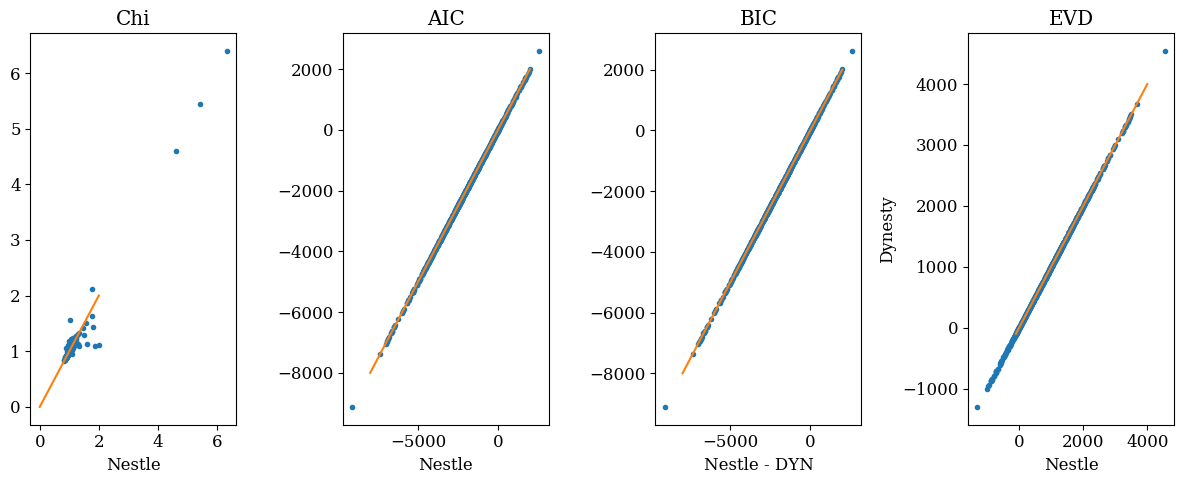

In [8]:

fig , axes = plt.subplots(nrows=1 , ncols=4 , figsize=(12, 5)) 
 
axes[0].plot(BS_BS_1000_nestle_test1.chiSqRed_x , BS_BS_1000_nestle_test1.chiSqRed_y , '.') 
axes[0].plot([0 ,2] , [0, 2]) 
axes[0].set_title('Chi') 
axes[0].set_xlabel('Nestle') 
 
 
axes[1].plot(BS_BS_1000_nestle_test1.AIC_x , BS_BS_1000_nestle_test1.AIC_y , '.') 
axes[1].plot([-8000 ,2000] , [-8000, 2000]) 
axes[1].set_title('AIC') 
axes[1].set_xlabel('Nestle') 
 
 
axes[2].plot(BS_BS_1000_nestle_test1.BIC_x , BS_BS_1000_nestle_test1.BIC_y , '.') 
axes[2].plot([-8000 ,2000] , [-8000 ,2000]) 
axes[2].set_title('BIC') 
axes[2].set_xlabel('Nestle - DYN') 
 
 
axes[3].plot(BS_BS_1000_nestle_test1['ln(EVIDENCE) _x'] , BS_BS_1000_nestle_test1['ln(EVIDENCE) _y'] , '.') 
axes[3].plot([-100, 4000] , [-100 ,4000]) 
axes[3].set_title('EVD') 
axes[3].set_xlabel('Nestle') 
axes[3].set_ylabel('Dynesty') 
plt.tight_layout() 
plt.show()

0       19.341756
1       12.520558
2       22.781133
3       22.421379
4       11.430283
          ...    
4995    17.920087
4996    24.172122
4997    19.398969
4998    12.119405
4999    19.054870
Name: SNR, Length: 5000, dtype: float64


ValueError: x and y must have same first dimension, but have shapes (5000,) and (4999,)

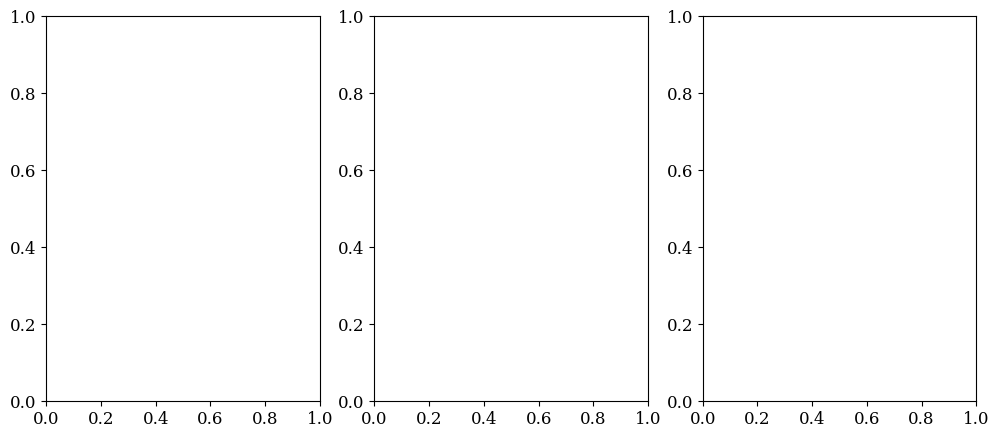

In [9]:

fig , axes = plt.subplots(nrows=1,  ncols=3 , figsize=(12 ,5)) 
print(BS_FS_1000_nestle_test2_SNR.SNR) 
axes[0].plot(BS_FS_1000_nestle_test2_SNR.SNR , BS_FS_1000_nestle_test2.RM_radm2_x - BS_FS_1000_nestle_test2.RM_radm2_y  ,'.') 
#axes[0].plot([-1200 1200]  [-1200 1200]) 
axes[0].set_title('RM_screen') 
axes[0].set_xlabel('SNR') 
axes[0].set_ylabel('NES - DYN') 
 
axes[1].plot(BS_FS_1000_nestle_test2_SNR.SNR , BS_FS_1000_nestle_test2.fracPol_x - BS_FS_1000_nestle_test2.fracPol_y  ,'.') 
#axes[1].plot([0 0.4]  [0 0.4]) 
axes[1].set_title('fracPol') 
axes[1].set_xlabel('SNR') 
 
 
axes[2].plot(BS_FS_1000_nestle_test2_SNR.SNR, BS_FS_1000_nestle_test2.psi0_deg_x - BS_FS_1000_nestle_test2.psi0_deg_y , '.') 
#axes[2].plot([0 180]  [0 180]) 
axes[2].set_title('PolAngle') 
axes[2].set_xlabel('SNR') 
 
 
plt.tight_layout()


In [ ]:

fig , axes = plt.subplots(nrows=1 , ncols=4  ,figsize=(12, 5)) 
 
axes[0].plot(BS_FS_1000_nestle_test2.chiSqRed_y  ,BS_FS_1000_nestle_test2.chiSqRed_y , '.') 
axes[0].plot([0 ,6]  ,[0 ,6]) 
axes[0].set_ylim(0 ,6) 
axes[0].set_xlim(0 ,6) 
axes[0].set_title('Chi') 
axes[0].set_xlabel('Nestle') 
 
 
axes[1].plot(BS_FS_1000_nestle_test2.AIC_x , BS_FS_1000_nestle_test2.AIC_y , '.') 
axes[1].plot([-8000, 2000] , [-8000 ,2000]) 
axes[1].set_title('AIC') 
axes[1].set_ylim(-10000, 2000) 
axes[1].set_xlabel('Nestle') 
 
 
axes[2].plot(BS_FS_1000_nestle_test2.BIC_x , BS_FS_1000_nestle_test2.BIC_y , '.') 
axes[2].plot([-8000, 2000],  [-8000 ,2000]) 
axes[2].set_title('BIC') 
axes[2].set_ylim(-10000, 2000) 
axes[2].set_xlabel('Nestle') 
 
 
axes[3].plot(BS_FS_1000_nestle_test2['ln(EVIDENCE) _x'],  BS_FS_1000_nestle_test2['ln(EVIDENCE) _y'] , '.') 
axes[3].plot([-100,3500] , [-100, 3500]) 
axes[3].set_ylim(-2000, 3500) 
axes[3].set_title('EVD') 
axes[3].set_xlabel('Nestle') 
axes[3].set_ylabel('Dynesty') 
plt.tight_layout()


In [ ]:
print(BS_BS_9000_src_sample.chiSq)  

BS_BS_9000_src_sample['is_good_model_chi']= BS_BS_9000_src_sample.chiSq < BS_FS_9000_src_sample.chiSq  
BS_BS_9000_src_sample['is_good_model_BIC'] = BS_BS_9000_src_sample.BIC < BS_FS_9000_src_sample.BIC 
BS_BS_9000_src_sample['is_good_model_AIC'] = BS_BS_9000_src_sample.AIC < BS_FS_9000_src_sample.AIC  
BS_BS_9000_src_sample['is_good_model_evd'] = BS_BS_9000_src_sample['ln(EVIDENCE) '] > BS_FS_9000_src_sample['ln(EVIDENCE) ']

In [ ]:
BS_BS_9000_src_sample['delta_BIC_5_1'] = BS_BS_9000_src_sample.BIC - BS_FS_9000_src_sample.BIC
BS_BS_9000_src_sample['delta_evd_5_1'] = BS_BS_9000_src_sample['ln(EVIDENCE) '] - BS_FS_9000_src_sample['ln(EVIDENCE) '] 

In [ ]:

from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
fig_test, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(11,4), sharey=True, constrained_layout=True) 
plt.rcParams.update({'font.size': 18}) 
plt.rc('font', family='serif') 
 
bottom = plt.get_cmap('cmr.dusk_r', 2) 
top= plt.get_cmap('cmr.sapphire', 254) 
newcolors = np.vstack((top(np.linspace(0, 1, 254)), 
                bottom(np.linspace(0, 0.09, 2)))) 
newcmp = ListedColormap(newcolors, name='embersaph') 
 
bounds = [-4000,-70, -10, -2.5, 0, 11] 
cmap_rb = plt.get_cmap(newcmp) 
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 
 
 
 
hex1 = ax_test[0].hexbin(BS_BS_9000_src_sample['frac_pol'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'], vmax=8,reduce_C_function=np.median, vmin=-1200, gridsize=20, cmap=newcmp) 
ax_test[0].set_xlabel('$p_{0}$') 
ax_test[0].set_ylabel('SNR') 
 
hex2 = ax_test[1].hexbin(BS_BS_9000_src_sample['psi0_deg_y'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'], reduce_C_function=np.median,vmin=-1200, gridsize=20, cmap=newcmp) 
ax_test[1].set_xlabel('$\\psi_{0} deg$') 
#plt.ylabel(values_interest[y_index]) 
#ax_test[0].set_title('Slab') 
 
hex3 = ax_test[2].hexbin(BS_BS_9000_src_sample['RM_screen_radm2'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'], reduce_C_function=np.median,vmin=-1200, gridsize=20, cmap=newcmp) 
ax_test[2].set_xlabel('$RM_{screen}$ rad $m^{-2}$') 
 
labels = ('-40>', '-10>','-2.5>', '-1>', '0>' ,'0+') 
cb = plt.colorbar(hex3, label='$\\Delta$ $BIC_{T,A}$', ticklocation='bottom') 
cb.ax.set_yticklabels(labels) 
plt.show()

# Switch to EVD

In [ ]:
from matplotlib import gridspec 
from matplotlib.colors import ListedColormap 
fig_test, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(11,4), sharey=True, constrained_layout=True) 
plt.rcParams.update({'font.size': 18}) 
plt.rc('font', family='serif') 


bottom = plt.get_cmap('cmr.dusk', 2) 
top= plt.get_cmap('cmr.ember', 254) 
newcolors = np.vstack((top(np.linspace(0, 1, 254)), 
                bottom(np.linspace(0, 0.09, 2)))) 
newcmp = ListedColormap(newcolors, name='ember') 

#bounds = [-1000,0, 1, 2.0, 4, 10000]  
#cmap_rb = plt.get_cmap('cmr.ember') 
#colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1)) 
#cmap, norm = mcolors.from_levels_and_colors(bounds, colors) 

 

hex1 = ax_test[0].hexbin(BS_BS_9000_src_sample['frac_pol'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_evd_5_1'],reduce_C_function=np.median, vmin=-10, vmax=200, gridsize=25, cmap='cmr.ember') 
ax_test[0].set_xlabel('$p_{0}$') 
ax_test[0].set_ylabel('S:N') 
 
hex2 = ax_test[1].hexbin(BS_BS_9000_src_sample['psi0_deg_y'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_evd_5_1'], reduce_C_function=np.median, vmin=-10, vmax=200, gridsize=25, cmap='cmr.ember') 
ax_test[1].set_xlabel('$\psi_{0}$ [$^\circ$]')
#plt.ylabel(values_interest[y_index]) 
#ax_test[0].set_title('Slab') 
 
hex3 = ax_test[2].hexbin(BS_BS_9000_src_sample['RM_screen_radm2'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_evd_5_1'], reduce_C_function=np.median, vmin=-10, vmax=200, gridsize=25, cmap='cmr.ember') 
ax_test[2].set_xlabel('$RM_{screen}$ [rad $m^{-2}$]') 
 

cb = plt.colorbar(hex3, label='ln(BF)$_{BS, FS}$', ticklocation='bottom') 
plt.savefig('insig_parameters_BS.pdf', format='pdf')
plt.show()


# ADD THE ADDITON DATA TO FS ^^^^

In [ ]:
#BS
BS_BS_9000_src_sample['is_good_model_chi']=  BS_BS_9000_src_sample.chiSq < BS_FS_9000_src_sample.chiSq
BS_BS_9000_src_sample['is_good_model_BIC'] =  BS_BS_9000_src_sample.BIC < BS_FS_9000_src_sample.BIC
BS_BS_9000_src_sample['is_good_model_AIC'] =  BS_BS_9000_src_sample.AIC < BS_FS_9000_src_sample.AIC
BS_BS_9000_src_sample['is_good_model_evd'] =  BS_BS_9000_src_sample['ln(EVIDENCE) '] > BS_FS_9000_src_sample['ln(EVIDENCE) ']

In [ ]:
species = ("m5" , "m1")
penguin_means = {
    'Chi_SQ': [np.sum( BS_BS_9000_src_sample['is_good_model_chi']) , (9000-np.sum( BS_BS_9000_src_sample['is_good_model_chi']))], 
    'BIC': [np.sum( BS_BS_9000_src_sample['is_good_model_BIC']) , (9000-np.sum( BS_BS_9000_src_sample['is_good_model_BIC']))], 
    'AIC': [np.sum( BS_BS_9000_src_sample['is_good_model_AIC']) , (9000-np.sum( BS_BS_9000_src_sample['is_good_model_AIC']))], 
    'EVD': [np.sum( BS_BS_9000_src_sample['is_good_model_evd']) , (9000-np.sum( BS_BS_9000_src_sample['is_good_model_evd']))] 
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig , ax = plt.subplots(layout='constrained')

for attribute,  measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset , measurement , width , label=attribute)
    #ax.bar_label(rects  padding=3)
    multiplier += 1

# Add some text for labels  title and custom x-axis tick labels  etc.
ax.set_ylabel('Count')
#ax.set_title('Burn Slab')
ax.set_xticks(x + width , species)
ax.legend(loc='upper right' ,  ncols=1)
plt.tight_layout()
plt.show()



<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:35: SyntaxWarning: invalid escape sequence '\D'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/2562859706.py:35: SyntaxWarning: invalid escape sequence '\D'
  fig_chi.colorbar(hex2 , cax=cbar_ax1 , label='$\Delta$ $BIC_{5 1}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/2562859706.py:35: SyntaxWarning: invalid escape sequence '\D'
  fig_chi.colorbar(hex2 , cax=cbar_ax1 , label='$\Delta$ $BIC_{5 1}$')


NameError: name 'BS_BS_9000_src_sample' is not defined

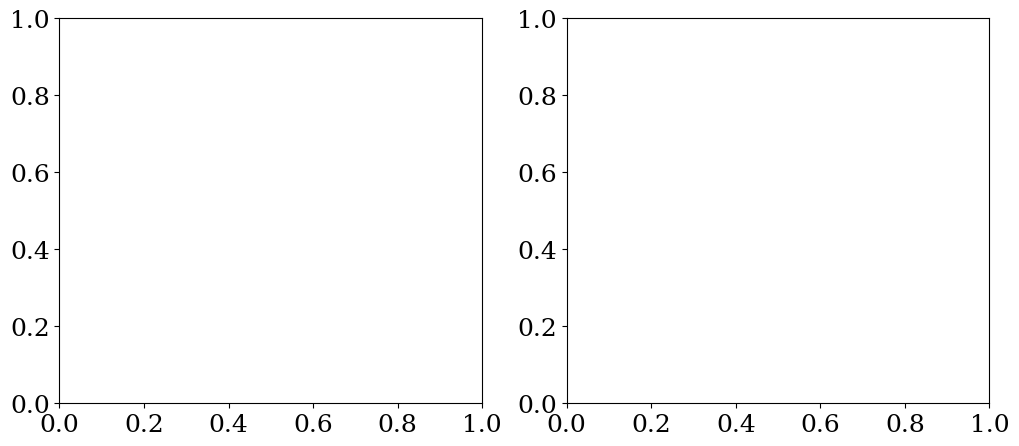

In [42]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font' , family='serif')
fig_chi , ax_test = plt.subplots(nrows=1 , ncols=2 , figsize=(12, 5)  ,sharex=True)


values_interest = ['SNR' , 'RM_src_radm2' , 'RM_residual']
titles_list = ['BS' , 'FS']
data_frames = [ BS_BS_9000_src_sample]
num_bins=15

z_color_i = 2
y_index = 0
x_index = 1

vx = np.max( BS_BS_9000_src_sample[values_interest[z_color_i]])
vn =  np.min( BS_BS_9000_src_sample[values_interest[z_color_i]])
vn = -2000
cmap_name = 'cmr.guppy'


hex1 = ax_test[0].hexbin( BS_BS_9000_src_sample['RM_src_radm2'] ,  BS_BS_9000_src_sample['SNR'] ,  BS_BS_9000_src_sample['RM_residual'], gridsize=20 , vmin = -2 , vmax=2  ,cmap=cmap_name)
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_ylabel(values_interest[y_index])
ax_test[0].set_title('Slab')

hex2 = ax_test[1].hexbin( BS_BS_9000_src_sample['RM_src_radm2'][ BS_BS_9000_src_sample['SNR']<11] ,  BS_BS_9000_src_sample['SNR'][ BS_BS_9000_src_sample['SNR']<11] , BS_BS_9000_src_sample['RM_residual'][ BS_BS_9000_src_sample['SNR']<11] , gridsize=18,reduce_C_function=np.median  ,cmap=cmap_name)
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[1].set_title('{} zoom in'.format('Slab'))

cbar_ax = fig_chi.add_axes([0.47,  0.15 , 0.04,  0.7])
fig_chi.colorbar(hex1 , cax=cbar_ax)

cbar_ax1 = fig_chi.add_axes([0.92 , 0.15 , 0.04 , 0.7])
fig_chi.colorbar(hex2 , cax=cbar_ax1 , label='$\Delta$ $BIC_{5 1}$')

plt.subplots_adjust(left=0.2,  bottom=0.1,  right=0.9  ,top=0.9  ,wspace=0.7 ,hspace=0.6)
plt.show()

In [ ]:


fig_test, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(11,4), sharey=True, constrained_layout=True)
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')

bottom = plt.get_cmap('cmr.dusk_r', 2)
top= plt.get_cmap('cmr.sapphire', 254)
newcolors = np.vstack((top(np.linspace(0, 1, 254)),
                bottom(np.linspace(0, 0.09, 2))))
newcmp = ListedColormap(newcolors, name='embersaph')

bounds = [-4000,-70, -10, -2.5, 0, 11]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
cmap, norm = mcolors.from_levels_and_colors(bounds, colors)



hex1 = ax_test[0].hexbin(BS_BS_9000_src_sample['frac_pol'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'], vmax=8,reduce_C_function=np.median, vmin=-1200, gridsize=20, cmap=newcmp)
ax_test[0].set_xlabel('$p_{0}$')
ax_test[0].set_ylabel(values_interest[y_index])

hex2 = ax_test[1].hexbin(BS_BS_9000_src_sample['psi0_deg_y'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'], reduce_C_function=np.median, vmin=-1200, gridsize=20, cmap=newcmp)
ax_test[1].set_xlabel('$\\psi_{0} deg$')
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')

hex3 = ax_test[2].hexbin(BS_BS_9000_src_sample['RM_screen_radm2'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'], reduce_C_function=np.median, vmin=-1200, gridsize=20, cmap=newcmp)
ax_test[2].set_xlabel('$RM_{screen}$ rad $m^{-2}$')

labels = ('-40>', '-10>','-2.5>', '-1>', '0>' ,'0+')
cb = plt.colorbar(hex3, label='$\\Delta$ $BIC_{T,A}$', ticklocation='bottom')
cb.ax.set_yticklabels(labels)
fig_test.tight_layout()
plt.show()

In [ ]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font' , family='serif')

BS_BS_9000_src_sample['delta_BIC_5_1']=  BS_BS_9000_src_sample.BIC - BS_FS_9000_src_sample.BIC


bounds = [-2000 ,-500 , -100 , -5 , 0 , 10]
cmap_rb = plt.get_cmap('cmr.sapphire')
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)


plt.hexbin( BS_BS_9000_src_sample['RM_src_radm2'] , BS_BS_9000_src_sample['SNR'] ,  BS_BS_9000_src_sample['delta_BIC_5_1']  ,norm=norm  , gridsize=20 , cmap=cmap)
plt.xlabel('$RM_{src}$ rad $m^{-2}$')
plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')

labels = ('S' , 'M' , 'W',  'IC' , 'IM')
cb = plt.colorbar(label='$\Delta$ $BIC_{T M}$' , ticklocation='bottom')
cb.ax.set_yticklabels(labels)
plt.show()

print(len(BS_FS_9000_src_sample.BIC))


<>:49: SyntaxWarning: invalid escape sequence '\D'
<>:49: SyntaxWarning: invalid escape sequence '\D'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/92960033.py:49: SyntaxWarning: invalid escape sequence '\D'
  fig_chi.colorbar(hex2 , cax=cbar_ax1 , label='$\Delta$ $BIC_{slab simple}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/92960033.py:49: SyntaxWarning: invalid escape sequence '\D'
  fig_chi.colorbar(hex2 , cax=cbar_ax1 , label='$\Delta$ $BIC_{slab simple}$')


NameError: name 'BS_BS_9000_src_sample' is not defined

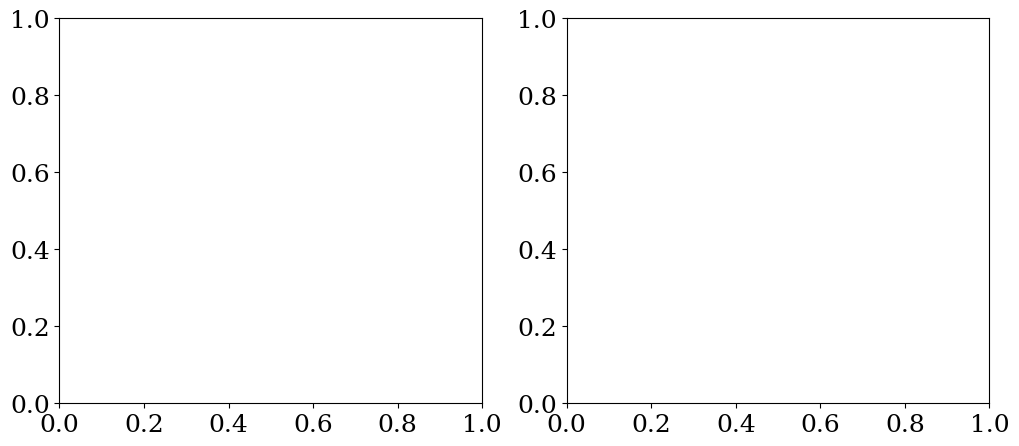

In [10]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
fig_chi  ,ax_test = plt.subplots(nrows=1 , ncols=2 , figsize=(12, 5),  sharex=True)



BS_BS_9000_src_sample['delta_BIC_5_1']=  BS_BS_9000_src_sample.BIC - BS_FS_9000_src_sample.BIC


values_interest = ['SNR' , 'RM_src_radm2' , 'delta_BIC_5_1']
titles_list = ['BS' , 'FS']
data_frames = [ BS_BS_9000_src_sample]
num_bins=15

z_color_i = 2
y_index = 0
x_index = 1

vx = np.max( BS_BS_9000_src_sample[values_interest[z_color_i]])
vn = np.min( BS_BS_9000_src_sample[values_interest[z_color_i]])


bottom = plt.get_cmap('cmr.dusk_r' , 26)
top= plt.get_cmap('cmr.sapphire' , 230)
newcolors = np.vstack((top(np.linspace(0 , 1  ,230)), 
                bottom(np.linspace(0 , 0.09 , 26))))
newcmp1 = ListedColormap(newcolors , name='embersaph')

bottom = plt.get_cmap('cmr.dusk_r',  2)
top= plt.get_cmap('cmr.sapphire' , 254)
newcolors = np.vstack((top(np.linspace(0 , 1 , 254)), 
                bottom(np.linspace(0 , 0.09 , 2))))
newcmp = ListedColormap(newcolors , name='embersaph')


hex1 = ax_test[0].hexbin( BS_BS_9000_src_sample['RM_src_radm2'] , BS_BS_9000_src_sample['SNR'] ,  BS_BS_9000_src_sample['delta_BIC_5_1'] , vmin=-2000  ,gridsize=20  ,cmap=newcmp)
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')

hex2 = ax_test[1].hexbin( BS_BS_9000_src_sample['RM_src_radm2'][ BS_BS_9000_src_sample['SNR']<10] ,  BS_BS_9000_src_sample['SNR'][ BS_BS_9000_src_sample['SNR']<10] ,  BS_BS_9000_src_sample['delta_BIC_5_1'][ BS_BS_9000_src_sample['SNR']<10],  vmin=-60 , gridsize=20 , cmap=newcmp1)
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
#ax_test[1].set_title('{} zoom in'.format('Slab'))

cbar_ax = fig_chi.add_axes([0.47,  0.15,  0.04 , 0.7])
fig_chi.colorbar(hex1 , cax=cbar_ax)

cbar_ax1 = fig_chi.add_axes([0.92,  0.15,  0.04,  0.7])
fig_chi.colorbar(hex2 , cax=cbar_ax1 , label='$\Delta$ $BIC_{slab simple}$')

#zoom_Rectangle(ax_test[0]  [0 100 3 10]  ax_test[1])
plt.subplots_adjust(left=0.2 , bottom=0.1,  right=0.9 , top=0.9 , wspace=0.7, hspace=0.6)
plt.show()

In [11]:
bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

x = np.arange(3,100,1)
y = (50/(x-3)**2) + 5
#plt.scatter(BS_BS_9000_src_sample['RM_src_radm2'] , BS_BS_9000_src_sample['SNR'], c=BS_BS_9000_src_sample['delta_evd_5_1'], alpha=0.5, vmin=-4, vmax=1000, cmap=newcmp)
plt.plot(x,y, 'green')
#plt.ylim(0,50)
#plt.colorbar()
plt.show()

NameError: name 'ListedColormap' is not defined

NameError: name 'ListedColormap' is not defined

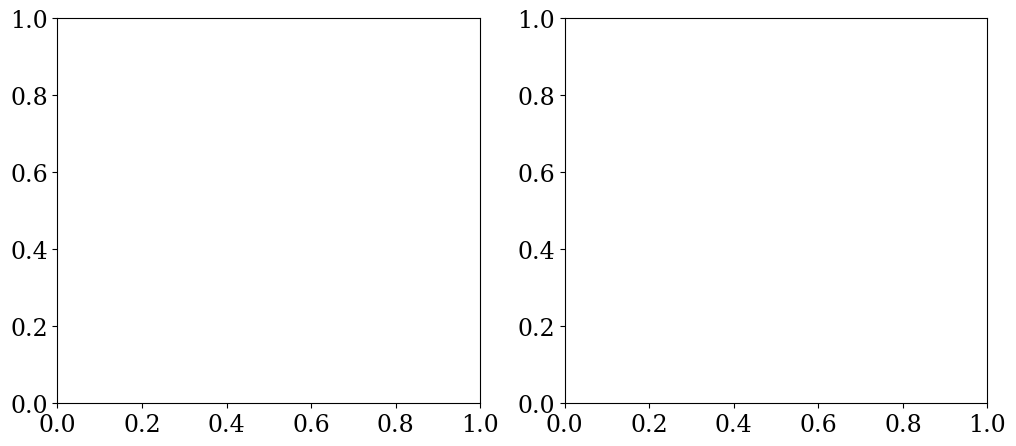

In [12]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 17})
plt.rc('font'  ,family='serif')
fig_chi , ax_test = plt.subplots(nrows=1 , ncols=2,  figsize=(12, 5),  sharex=True)

bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

bounds = [-10, 0,  1,  2,  5,  10000]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)

hex1 = ax_test[0].hexbin( BS_BS_9000_src_sample['RM_src_radm2'] , BS_BS_9000_src_sample['SNR']  , BS_BS_9000_src_sample['delta_evd_5_1'], gridsize=20 , vmin=-5, cmap=newcmp)
ax_test[0].set_xlabel('RM$_{src}$ [rad m$^{-2}$]',  color='black')
ax_test[0].set_ylabel('S:N')


x = np.arange(3,100,1)
y = -6.0 * x + 69

ax_test[0].plot(x, y, 'green', label = '-4(RM$_{src}$+64)')

x = np.arange(3,100,1)

#ax_test[0].plot(x, y, 'lightgreen', label = 'SKA-Low')
ax_test[0].legend()


hex2 = ax_test[1].hexbin( BS_BS_9000_src_sample['RM_src_radm2'] , BS_BS_9000_src_sample['SNR']  , BS_BS_9000_src_sample['delta_evd_5_1'] , norm=norm ,  gridsize=20 , cmap=cmap)
ax_test[1].set_xlabel('RM$_{src}$ rad [m$^{-2}$]')
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')
ax_test[1].plot(x, y, 'green')
ax_test[1].legend()



cb2 = plt.colorbar(hex1)

labels = ['-5','0', '1', '2','5', '1000'] 
cb = plt.colorbar(hex2 , label='ln(BF)$_{BS, FS}$', ticklocation='bottom')
cb.ax.set_yticklabels(labels)
ax_test[0].set_ylim(0,50)
ax_test[1].set_ylim(0,50)
plt.tight_layout()

plt.show()
fig_chi.savefig('band1_BF_BS_FS.pdf', format='pdf')#plt.show()



In [13]:
plt.rcParams.update({'font.size': 17})
plt.rc('font'  ,family='serif')


bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

bounds = [-10, 0,  1,  2,  5,  10000]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)

FS_FS_merge_10000['delta_evd_1_5']= FS_FS_merge_10000['ln(EVIDENCE) '] - FS_BS_merge_10000['ln(EVIDENCE) ']


plt.rc('font' , family='serif')

hex1 = plt.hexbin(FS_BS_merge_10000['deltaRM_radm2'] ,FS_BS_merge_10000['SNR'] , FS_FS_merge_10000['delta_evd_1_5'] , gridsize=25 , norm=norm , cmap=cmap)
plt.xlabel('RM$_{src , QU}$ [rad $m^{-2}]$')
plt.ylabel('S:N')
#ax_test[0].set_title('Slab')

#hex2 = ax_test[1].hexbin(FS_BS_merge['psi0_deg_y'][FS_BS_merge['SNR']<10]  FS_BS_merge['SNR'][FS_BS_merge['SNR']<10]  FS_BS_merge['delta_BIC_1_5'][FS_BS_merge['SNR']<10]  gridsize=10  cmap='cmr.sapphire')
#ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
#ax_test[1].set_title('{} zoom in'.format('Slab'))


labels = ['-5','0', '1', '2','5', '1000'] 
cb = plt.colorbar(label='$ln(BF)_{FS, BS}$' , ticklocation='bottom')
cb.ax.set_yticklabels(labels)
fig_chi.savefig('band1_BF_FS_BS.pdf', format='pdf')#plt.show()


NameError: name 'ListedColormap' is not defined

<>:34: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\D'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/3396313499.py:34: SyntaxWarning: invalid escape sequence '\D'
  cb = plt.colorbar(hex2 , label='$\Delta$ $BIC_{T A}$' , ticklocation='bottom')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/3396313499.py:34: SyntaxWarning: invalid escape sequence '\D'
  cb = plt.colorbar(hex2 , label='$\Delta$ $BIC_{T A}$' , ticklocation='bottom')


NameError: name 'ListedColormap' is not defined

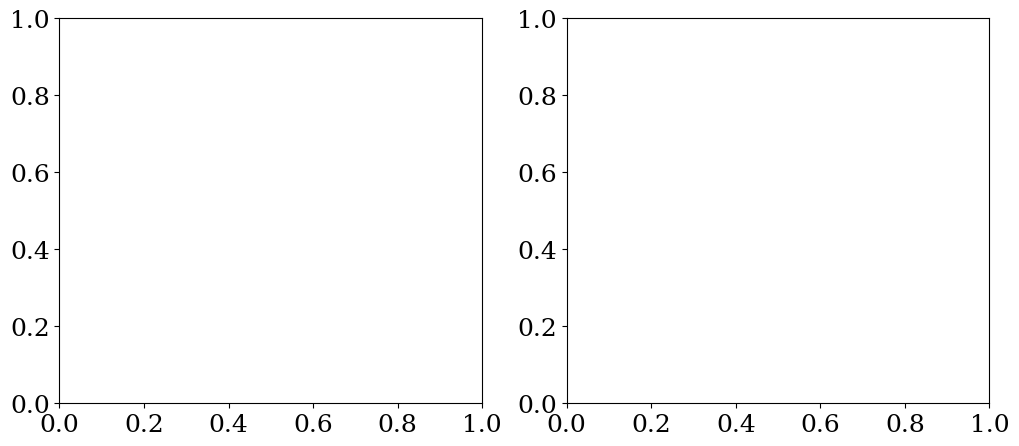

In [14]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font' , family='serif')
fig_chi , ax_test = plt.subplots(nrows=1  ,ncols=2 , figsize=(12 ,5)  ,sharex=True)

bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.sapphire',  255)
newcolors = np.vstack((top(np.linspace(0 , 1 , 255)),
                bottom(np.linspace(0 ,  0.09 , 1))))
newcmp = ListedColormap(newcolors , name='embersaph')

bounds = [-10, 0,  1,  2,  5,  10000]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)



hex1 = ax_test[0].hexbin(FS_BS_merge_10000['deltaRM_radm2'], FS_BS_merge_10000['SNR'] , FS_FS_merge_10000['delta_BIC_1_5'],  vmax=7.7 , vmin=-2000  ,gridsize=20 , cmap=newcmp)
ax_test[0].set_xlabel('$RM_{src_QU}$ rad $m^{-2}$')
ax_test[0].set_ylabel('SNR')
,
hex2 = plt.hexbin(FS_BS_merge_10000['deltaRM_radm2'],  FS_BS_merge_10000['SNR'] , FS_FS_merge_10000['delta_BIC_1_5'] , gridsize=20 , norm=norm , cmap=cmap)
plt.xlabel('$RM_{src  QU}$ rad $m^{-2}$')
plt.ylabel('SNR')
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')



cb2 = plt.colorbar(hex1)

labels = (' ' 'S'  'M'  'W'  'IC'  'IM')
cb = plt.colorbar(hex2 , label='$\Delta$ $BIC_{T A}$' , ticklocation='bottom')
cb.ax.set_yticklabels(labels)
plt.tight_layout()
plt.show()

In [15]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
####fig_chi  ax_test = plt.subplots(nrows=1  ncols=2  figsize=(12 5)  sharex=True)

print(FS_BS_merge.keys())

FS_BS_merge['delta_BIC_1_5']= FS_FS_merge.BIC - FS_BS_merge.BIC
FS_BS_merge['delta_evd_1_5']= FS_FS_merge['ln(EVIDENCE) '] - FS_BS_merge['ln(EVIDENCE) ']


z_color_i = 2
y_index = 0
x_index = 1

plt.rc('font' , family='serif')


plt.scatter(FS_BS_merge['deltaRM_radm2'], FS_BS_merge['psi0_deg_y'] , c=FS_BS_merge['SNR'] , vmax=10)
plt.xlabel('$RM_{src  QU}$ rad $m^{-2}$')
plt.ylabel('psi0_deg_y')
#ax_test[0].set_title('Slab')

#hex2 = ax_test[1].hexbin(FS_BS_merge['psi0_deg_y'][FS_BS_merge['SNR']<10]  FS_BS_merge['SNR'][FS_BS_merge['SNR']<10]  FS_BS_merge['delta_BIC_1_5'][FS_BS_merge['SNR']<10]  gridsize=10  cmap='cmr.sapphire')
#ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
#ax_test[1].set_title('{} zoom in'.format('Slab'))


plt.colorbar(label='SNR')

#cbar_ax1 = fig_chi.add_axes([0.92  0.15  0.04  0.7])
#fig_chi.colorbar(hex2  cax=cbar_ax1  label='$\Delta$ $BIC_{1 5}$')

#zoom_Rectangle(ax_test[0]  [0 100 3 10]  ax_test[1])
#plt.subplots_adjust(left=0.2  bottom=0.1  right=0.9  top=0.9  wspace=0.7 hspace=0.6)
plt.show()

NameError: name 'FS_BS_merge' is not defined

There is a outlier at -10000 at SNR ---  and rm src---
There there is a few slabs at -1000 ish and then the rest seem to be below -100

From this plot I see that around SNR 7 20 rad slabs can be modelled with BIC difference of 10-20
While once the slab is under 20 rad is becomes more prefered by FS 

-2250 -- SNR 9 RM_src 80

The mountain is deltaBIC =-50 to -200

In [16]:
#ln(x/y) = ln(x) - ln(y)
MS_MS_band1_merge['Bayes_factor_7_10'] = MS_MS_band1_merge['ln(EVIDENCE) '] - MS_RFG_band1_merge['ln(EVIDENCE) ']

NameError: name 'MS_MS_band1_merge' is not defined

# What is the BIC mountain at 40 rad m2

#### Find the spectra for source in those bins

In [17]:
print( BS_BS_9000_src_sample['SNR'][( BS_BS_9000_src_sample['delta_BIC_5_1']<-60302)])

soure = 191
print( BS_BS_9000_src_sample['SNR'][soure])
print( BS_BS_9000_src_sample['delta_BIC_5_1'][soure])
print( BS_BS_9000_src_sample['RM_src_radm2'][soure])

NameError: name 'BS_BS_9000_src_sample' is not defined

# Combined Band 1 and Band 2

In [18]:
combined_BS_FS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simBS_model_num_1_sims.csv')
combined_BS_BS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simBS_model_num_5_sims.csv')

combined_FS_FS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simFS_model_num_1_sims.csv')
combined_FS_BS_5000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simFS_model_num_5_sims.csv')

combined_FS_5000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_faraday_simple_number_7000_freq_800_1089_ran_SNR.csv')
combined_BS_5000_true_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/burnslab_unif_fg_number_7000_freq_800_1089_ran_SNR.csv')


#combined_BS_2C_3000_df = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_bands_condensed_simBS_model_num_11_sims.csv')


combined_BS_5000_true_df.rename( columns={'Unnamed: 0':'src'} , inplace=True )
combined_FS_5000_true_df.rename( columns={'Unnamed: 0':'src'} , inplace=True )


combined_BS_FS_5000_df['src'] = combined_BS_FS_5000_df['src'] - 1
combined_BS_BS_5000_df['src'] = combined_BS_BS_5000_df['src'] - 1

combined_FS_FS_5000_df['src'] = combined_FS_FS_5000_df['src'] - 1
combined_FS_BS_5000_df['src'] = combined_FS_BS_5000_df['src'] - 1

#combined_BS_2C_3000_df['src'] = combined_BS_2C_3000_df['src'] - 1

combined_BS_FS_merge_5000 = pd.merge(combined_BS_FS_5000_df , combined_BS_5000_true_df , on='src' , how='outer')
combined_BS_BS_merge_5000 = pd.merge(combined_BS_BS_5000_df , combined_BS_5000_true_df , on='src',  how='outer')

combined_FS_FS_merge_5000 = pd.merge(combined_FS_FS_5000_df , combined_FS_5000_true_df , on='src' , how='outer')
combined_FS_BS_merge_5000 = pd.merge(combined_FS_BS_5000_df , combined_FS_5000_true_df , on='src' , how='outer')

#combined_BS_2C_merge_3000 = pd.merge(combined_BS_2C_3000_df , combined_BS_5000_true_df , on='src' , how='outer')
combined_FS_BS_merge_5000.keys()


Index(['Unnamed: 0', 'src', 'fracPol', 'psi0_deg_x', 'RM_radm2',
       'deltaRM_radm2', 'fracPol_plus_err', 'psi0_deg_plus_err',
       'RM_radm2_plus_err', 'deltaRM_radm2_plus_err', 'fracPol_minus_err',
       'psi0_deg_minus_err', 'RM_radm2_minus_err', 'deltaRM_radm2_minus_err',
       'fracPol_bounds', 'psi0_deg_bounds', 'RM_radm2_bounds',
       'deltaRM_radm2_bounds', 'chiSq', 'chiSqRed', 'AIC', 'AICc', 'BIC',
       'ln(EVIDENCE) ', 'dLn(EVIDENCE)', 'frac_pol', 'psi0_deg_y',
       'RM_screen_radm2', 'RM_src_radm2', 'sigma_RM_2', 'sigmaRM_FG', 'SNR',
       'model', 'frac_pol_seed', 'RM_screen_seed', 'RM_source_seed',
       'sigmaRM_seed', 'sigma_FG_seed', 'psi0_seed'],
      dtype='object')

In [19]:
residuals = combined_BS_BS_merge_5000.RM_src_radm2 - combined_BS_BS_merge_5000.deltaRM_radm2
residuals_psi = combined_BS_BS_merge_5000.psi0_deg_y - combined_BS_BS_merge_5000.psi0_deg_x
residuals_p = combined_BS_BS_merge_5000.frac_pol - combined_BS_BS_merge_5000.fracPol
residuals_RM = combined_BS_BS_merge_5000.RM_screen_radm2 - combined_BS_BS_merge_5000.RM_radm2

err_residuals = []
err_residuals_p = []
err_residuals_psi = []
err_residuals_RM = []

residuals = np.asarray(residuals)
residuals_p = np.asarray(residuals_p)
residuals_psi = np.asarray(residuals_psi)
residuals_RM = np.asarray(residuals_RM)

print(len(BS_BS_9000_src_sample.deltaRM_radm2_minus_err))

print(BS_BS_9000_src_sample["deltaRM_radm2_minus_err"].iloc[i])
for i in range(7000):
    
    if residuals[i] < 0:
        
        err_residuals.append(residuals[i] / combined_BS_BS_merge_5000["deltaRM_radm2_minus_err"].iloc[i])

    else:
        err_residuals.append(residuals[i] / combined_BS_BS_merge_5000["deltaRM_radm2_plus_err"].iloc[i])

    if residuals_p[i] < 0:
        
        err_residuals_p.append(residuals_p[i] / combined_BS_BS_merge_5000["fracPol_minus_err"].iloc[i])

    else:
        err_residuals_p.append(residuals_p[i] / combined_BS_BS_merge_5000["fracPol_plus_err"].iloc[i])
        

    if residuals_psi[i] < 0:
        
        err_residuals_psi.append(residuals_psi[i] / combined_BS_BS_merge_5000["psi0_deg_minus_err"].iloc[i])

    else:
        err_residuals_psi.append(residuals_psi[i] / combined_BS_BS_merge_5000["psi0_deg_plus_err"].iloc[i])
        

    if residuals_RM[i] < 0:
        
        err_residuals_RM.append(residuals_RM[i] / combined_BS_BS_merge_5000["RM_radm2_minus_err"].iloc[i])

    else:
        err_residuals_RM.append(residuals_RM[i] / combined_BS_BS_merge_5000["RM_radm2_plus_err"].iloc[i])


SN_cut = 6
RM_src = 30

err_residuals_RM = np.asarray(err_residuals_RM)
err_residuals_psi = np.asarray(err_residuals_psi)
err_residuals_p = np.asarray(err_residuals_p)
err_residuals = np.asarray(err_residuals)

error_resdiual_RM = err_residuals_RM[(combined_BS_BS_merge_5000.SNR > SN_cut) & (combined_BS_BS_merge_5000.deltaRM_radm2 > RM_src)]
error_residuals_psi = err_residuals_psi[(combined_BS_BS_merge_5000.SNR > SN_cut) & (combined_BS_BS_merge_5000.deltaRM_radm2 > RM_src)]
error_residuals_p = err_residuals_p[(combined_BS_BS_merge_5000.SNR > SN_cut) & (combined_BS_BS_merge_5000.deltaRM_radm2 > RM_src)]
error_residuals = err_residuals[(combined_BS_BS_merge_5000.SNR > SN_cut) & (combined_BS_BS_merge_5000.deltaRM_radm2 > RM_src)]

print(np.mean(error_residuals), np.std(error_residuals))
print(np.mean(error_residuals_psi), np.std(error_residuals_psi))
print(np.mean(error_residuals_p), np.std(error_residuals_p))
print(np.mean(error_resdiual_RM), np.std(error_resdiual_RM))

NameError: name 'BS_BS_9000_src_sample' is not defined

In [20]:
combined_FS_FS_merge_5000['delta_BIC_1_5'] =  combined_FS_FS_5000_df.BIC - combined_FS_BS_merge_5000.BIC
combined_FS_FS_merge_5000['delta_evd_1_5'] =  combined_FS_FS_5000_df['ln(EVIDENCE) '] - combined_FS_BS_merge_5000['ln(EVIDENCE) ']

combined_BS_BS_merge_5000['delta_evd_5_1'] = combined_BS_BS_5000_df['ln(EVIDENCE) '] - combined_BS_FS_5000_df['ln(EVIDENCE) ']

In [21]:
bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

bounds = [-10, 0,  1,  2,  5,  10000]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)

plt.rcParams.update({'font.size': 17})
plt.rc('font', family='serif')
plt.clf()

plt.hexbin(combined_FS_BS_merge_5000.deltaRM_radm2, combined_FS_BS_merge_5000.SNR, combined_FS_FS_merge_5000.delta_evd_1_5,  gridsize=25 , norm=norm , cmap=cmap)
plt.xlabel('$RM_{src , QU}$ [rad m$^{-2}]$')
plt.ylabel('S:N')
labels = ['-5','0', '1', '2','5', '1000'] 
cb = plt.colorbar(label='$ln(BF)_{FS, BS}$' , ticklocation='bottom')
cb.ax.set_yticklabels(labels)
plt.tight_layout()
plt.savefig('comb_BF_FS_BS.pdf', format='pdf')
plt.show()

NameError: name 'ListedColormap' is not defined

<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\D'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\D'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/2497623197.py:23: SyntaxWarning: invalid escape sequence '\p'
  ax_test[1].set_xlabel('$\psi_{0} deg$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/2497623197.py:31: SyntaxWarning: invalid escape sequence '\D'
  cb = plt.colorbar(hex3, label='$\Delta$ $BIC_{T,A}$', ticklocation='bottom')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/2497623197.py:23: SyntaxWarning: invalid escape sequence '\p'
  ax_test[1].set_xlabel('$\psi_{0} deg$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/2497623197.py:31: SyntaxWarning: invalid escape sequence '\D'
  cb = plt.colorbar(hex3, label='$\Delta$ $BIC_{T,A}$', ticklocation='bottom')


NameError: name 'ListedColormap' is not defined

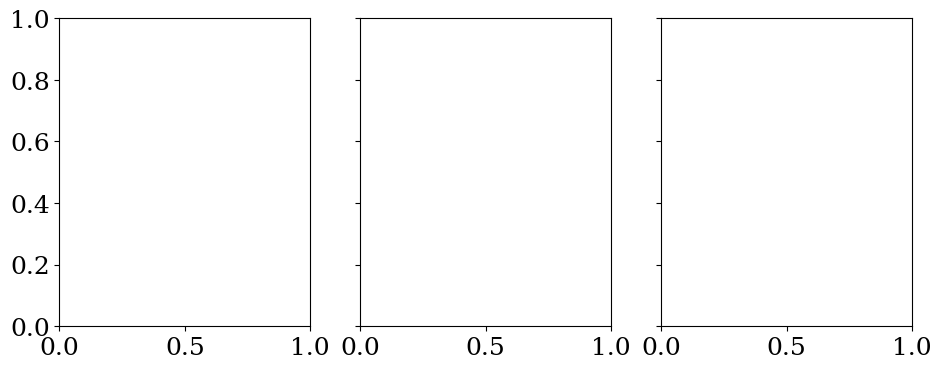

In [22]:

fig_test, ax_test = plt.subplots(nrows=1, ncols=3, figsize=(11,4), sharey=True)
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')

bottom = plt.get_cmap('cmr.dusk_r', 27)
top= plt.get_cmap('cmr.sapphire', 229)
newcolors = np.vstack((top(np.linspace(0, 1, 229)),
                bottom(np.linspace(0, 0.09, 27))))
newcmp = ListedColormap(newcolors, name='embersaph')

bounds = [-4000,-70, -10, -2.5, 0, 11]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
cmap, norm = mcolors.from_levels_and_colors(bounds, colors)



hex1 = ax_test[0].hexbin(combined_FS_FS_merge_5000['frac_pol'],combined_FS_FS_merge_5000['SNR'], combined_FS_FS_merge_5000['delta_BIC_1_5'], vmax=8,reduce_C_function=np.median, gridsize=20, cmap=newcmp)
ax_test[0].set_xlabel('$p_{0}$')
ax_test[0].set_ylabel('SNR')

hex2 = ax_test[1].hexbin(combined_FS_FS_merge_5000['psi0_deg_y'],combined_FS_FS_merge_5000['SNR'], combined_FS_FS_merge_5000['delta_BIC_1_5'], reduce_C_function=np.median, gridsize=20, cmap=newcmp)
ax_test[1].set_xlabel('$\psi_{0} deg$')
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')

hex3 = ax_test[2].hexbin(combined_FS_FS_merge_5000['RM_screen_radm2'],combined_FS_FS_merge_5000['SNR'], combined_FS_FS_merge_5000['delta_BIC_1_5'], reduce_C_function=np.median, gridsize=20, cmap=newcmp)
ax_test[2].set_xlabel('$RM_{screen}$ rad $m^{-2}$')

labels = ('-40>', '-10>','-2.5>', '-1>', '0>' ,'0+')
cb = plt.colorbar(hex3, label='$\Delta$ $BIC_{T,A}$', ticklocation='bottom')
cb.ax.set_yticklabels(labels)
fig_test.tight_layout()

plt.show()

In [ ]:
combined_BS_BS_merge_5000['RM_residual'] = combined_BS_BS_merge_5000.RM_screen_radm2  - combined_BS_BS_merge_5000.RM_radm2 
combined_BS_FS_merge_5000['RM_residual']= (combined_BS_FS_merge_5000.RM_screen_radm2 + 0.5 * combined_BS_FS_merge_5000.RM_src_radm2)  - combined_BS_FS_merge_5000.RM_radm2


combined_FS_FS_merge_5000['RM_residual'] = combined_FS_FS_merge_5000.RM_screen_radm2  - combined_FS_FS_merge_5000.RM_radm2 
combined_FS_BS_merge_5000['RM_residual'] = combined_FS_BS_merge_5000.RM_screen_radm2  - (combined_FS_BS_merge_5000.RM_radm2 + 0.5*combined_FS_BS_merge_5000.deltaRM_radm2)

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc('font' , family='serif')

def SNR_cut(df  ,columnx  ,columny  ,upper  ,lower):


    xdata = df[columnx][(df.SNR < upper) & (df.SNR > lower)]
    ydata = df[columny][(df.SNR < upper) & (df.SNR > lower)]

    return xdata , ydata

xcol = 'RM_residual'
ycol = 'BIC'

FSFS_x , FSFS_y = SNR_cut(combined_FS_FS_merge_5000 , xcol , ycol , 30 , 25)
FSBS_x , FSBS_y = SNR_cut(combined_FS_BS_merge_5000  ,xcol , ycol , 30 , 25)
BSFS_x , BSFS_y = SNR_cut(combined_BS_FS_merge_5000  ,xcol , ycol , 30 , 25)
BSBS_x , BSBS_y = SNR_cut(combined_BS_BS_merge_5000 , xcol , ycol , 30 , 25)



plt. figure(figsize=(8 , 6)) 

b = np.arange(-60, 60, 4)

plt.hist(BSBS_x, bins = b,  label="Slab:Slab" , color="black",  edgecolor='black'  ,density=True)


plt.hist(FSFS_x , bins = b , label= "Simple:Simple" ,  color='silver' , edgecolor='silver' , density=True)
plt.hist(FSBS_x , bins = b , label="Simple:Slab " ,  color="grey" , edgecolor='grey' , density=True)
plt.hist(BSFS_x , bins = b , label="Slab:Simple" , color='#1f77b4' , edgecolor='#1f77b4' , density=True)
plt.ylabel('Fraction')
#plt.yscale('log')
plt.xlabel('$RM_{residual}$')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#ln(x/y) = ln(x) - ln('] = MS_MS_band1_merge['ln(EVIDENCE) '] - MS_RFG_band1_merge['ln(EVIDENCE) ']

In [23]:
fig = go.Figure()

#fig.add_scatter(y = FS_FS_merge.RM_residual   x=FS_FS_merge.SNR  mode="markers"  name= "FS m1"   marker=dict(size=10  color="Purple"))
#fig.add_scatter(y = FS_BS_merge.RM_residual  x=FS_BS_merge.SNR  mode="markers"  name="FS m5"   marker=dict(size=10  color='rgba(255 0 255 0.4)'))

fig.add_scatter(y = combined_BS_BS_merge_5000.RM_residual , x=combined_BS_BS_merge_5000.SNR , mode="markers" , marker_symbol="triangle-up"  , name="BS m5" , marker=dict(size=10 , color='rgba(4, 76 ,0 ,1.0)'))
fig.add_scatter(y = combined_BS_FS_merge_5000.RM_residual,  x=combined_BS_FS_merge_5000.SNR , mode="markers"  ,marker_symbol="triangle-up"  , name="BS m1" , marker=dict(size=10  ,color='rgba(13 ,229 ,0 ,0.4)'))


fig.update_layout(font_family="Serif" , yaxis_range=[-100, 100])
fig.update_yaxes(title_text="Residual RM")
fig.update_xaxes(title_text="SNR ")
fig.show()

"


SyntaxError: unterminated string literal (detected at line 15) (840278488.py, line 15)

In [24]:

def make_2D_hex_plot_comb(ax , pandas_df ,x_col_name,  y_col_name , z_col_name , norm_max  ,norm_min,  num_bins=25,  cmap_name='viridis' , SNR_cut=False):

    """
    This function creates 2D hexbin plots to help represent a parameter space

    Inputs:
        panadas dataframe 
        column_names: x  y
        color column name: z
        camp: str
    """
    

    if SNR_cut:
        #bottom = plt.get_cmap('cmr.dusk_r'  25)
        #top= plt.get_cmap('cmr.sapphire'  231)
        #newcolors = np.vstack((top(np.linspace(0  1  231)) 
                       #bottom(np.linspace(0  0.09  25))))
        #newcmp = ListedColormap(newcolors  name='embersaph')

        num_bins=15
        SNR_C = 10
        x_data = pandas_df[x_col_name][pandas_df[y_col_name]< SNR_C]
        y_data = pandas_df[y_col_name][pandas_df[y_col_name]< SNR_C]
        z_data = pandas_df[z_col_name][pandas_df[y_col_name]< SNR_C]

        norm_max = np.max(z_data)
        norm_min = np.min(z_data)


        hex = ax.hexbin(x=x_data , y=y_data , C=z_data ,
                    gridsize=num_bins, 
                    cmap=cmap_name ,
                    vmax=norm_max ,
                    vmin=-70  , reduce_C_function=np.median)
    else:
        #bottom = plt.get_cmap('cmr.dusk_r'  1)
        #top= plt.get_cmap('cmr.sapphire'  254)
        #newcolors = np.vstack((top(np.linspace(0  1  255)) 
                       #bottom(np.linspace(0  0.09  1))))
        #newcmp = ListedColormap(newcolors  name='embersaph')
        hex = ax.hexbin(x=pandas_df[x_col_name],  y=pandas_df[y_col_name]  ,C=pandas_df[z_col_name] ,
                    gridsize=num_bins ,
                    cmap=cmap_name ,
                    vmax=norm_max , vmin=norm_min,  reduce_C_function=np.median)
    return hex

NameError: name 'ListedColormap' is not defined

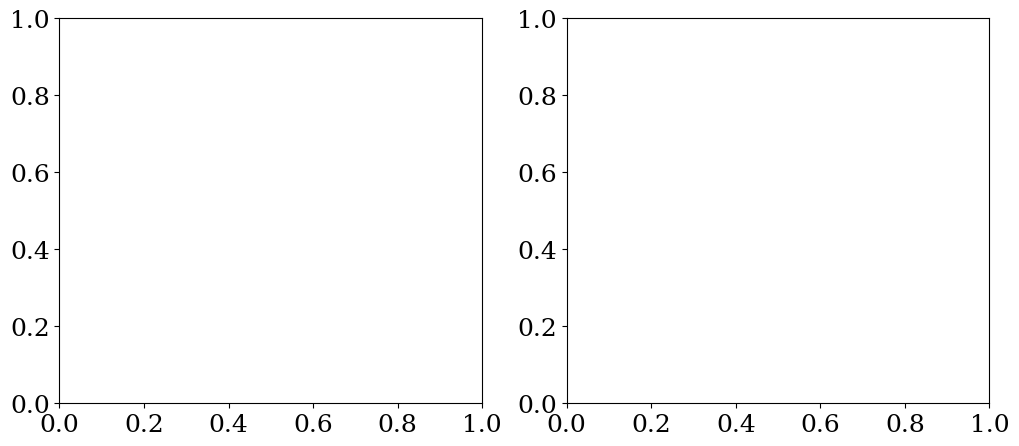

In [25]:

 from matplotlib import gridspec
 plt.rcParams.update({'font.size': 18})
 
 
 fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True)
 combined_BS_BS_merge_5000['delta_BIC_5_1']= combined_BS_BS_merge_5000.BIC - combined_BS_FS_merge_5000.BIC
 
 
 values_interest = ['SNR', 'RM_src_radm2', 'delta_BIC_5_1']
 titles_list = ['BS', 'FS']
 data_frames = [combined_BS_BS_merge_5000]
 num_bins=15
 
 z_color_i = 2
 y_index = 0
 x_index = 1
 
 bottom = plt.get_cmap('cmr.dusk_r', 3)
 top= plt.get_cmap('cmr.sapphire', 253)
 newcolors = np.vstack((top(np.linspace(0, 1, 253)), bottom(np.linspace(0, 0.09, 3))))
 newcmp = ListedColormap(newcolors, name='embersaph')
 
 bottom_SNR = plt.get_cmap('cmr.dusk_r', 13)
 top_SNR= plt.get_cmap('cmr.sapphire', 243)
 newcolors_SNR = np.vstack((top_SNR(np.linspace(0, 1, 243)), bottom_SNR(np.linspace(0, 0.09,13))))
 newcmp_SNR = ListedColormap(newcolors_SNR, name='embersaph')
 
 
 hex1 = ax_test[0].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'],combined_BS_BS_merge_5000['SNR'], combined_BS_BS_merge_5000['delta_BIC_5_1'], gridsize=25, cmap=newcmp, vmax=12, vmin=-1000, reduce_C_function=np.median)
 hex2 = ax_test[1].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'][combined_BS_BS_merge_5000['SNR']<11],combined_BS_BS_merge_5000['SNR'][combined_BS_BS_merge_5000['SNR']<11], combined_BS_BS_merge_5000['delta_BIC_5_1'][combined_BS_BS_merge_5000['SNR']<11], gridsize=18, reduce_C_function=np.median, cmap=newcmp_SNR, vmax=4, vmin=-70)
 ax_test[0].set_title('Slab:FS')
 ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
 ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
 ax_test[0].set_ylabel('SNR')
ax_test[1].set_title('{} zoom in'.format('Slab'))
cbar_ax1 = fig_chi.add_axes([0.92, 0.15, 0.04, 0.7])
fig_chi.colorbar(hex2, cax=cbar_ax1,  label='$\\Delta$ $BIC_{5,1}$')
cbar_ax = fig_chi.add_axes([0.47, 0.15, 0.03, 0.7])
fig_chi.colorbar(hex1, cax=cbar_ax)

plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.7,hspace=0.6)
plt.show()

In [26]:
import math as m


combined_BS_BS_merge_5000['delta_BIC_5_2C'] = combined_BS_BS_merge_5000.BIC - combined_BS_FS_merge_5000.BIC
combined_BS_BS_merge_5000['delta_evd_5_1'] = combined_BS_BS_merge_5000['ln(EVIDENCE) '] - combined_BS_FS_merge_5000['ln(EVIDENCE) ']

values_interest = ['SNR' , 'RM_src_radm2' , 'delta_BIC_5_2C']
titles_list = ['BS' , 'FS']
data_frames = [combined_BS_2C_merge_3000]
num_bins=15

z_color_i = 2
y_index = 0
x_index = 1


vx = np.max(combined_BS_2C_merge_3000[values_interest[z_color_i]])
vn =  np.min(combined_BS_2C_merge_3000[values_interest[z_color_i]])
print(vx)
cmap_name = newcmp
print(combined_BS_2C_merge_3000['delta_BIC_5_2C'])

hex1 = plt.hexbin(combined_BS_2C_merge_3000['RM_src_radm2'] , combined_BS_2C_merge_3000['SNR'] , combined_BS_2C_merge_3000['delta_BIC_5_2C'] , vmin=-2000 , gridsize=20 , cmap='cmr.sapphire')
plt.xlabel('$RM_{src}$ radm2')
plt.ylabel(values_interest[y_index])
plt.title('Slab:Two Component')

plt.colorbar(hex1 , label='$\Delta$ $BIC_{5 2C}$')

plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\D'
<>:28: SyntaxWarning: invalid escape sequence '\D'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/2654178210.py:28: SyntaxWarning: invalid escape sequence '\D'
  plt.colorbar(hex1 , label='$\Delta$ $BIC_{5 2C}$')
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/2654178210.py:28: SyntaxWarning: invalid escape sequence '\D'
  plt.colorbar(hex1 , label='$\Delta$ $BIC_{5 2C}$')


NameError: name 'combined_BS_2C_merge_3000' is not defined

matplotlib semi log
symlog 

<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/993103274.py:18: SyntaxWarning: invalid escape sequence '\D'
  cb = plt.colorbar(label='$\Delta$ $BIC_{T M}$' , ticklocation='bottom')


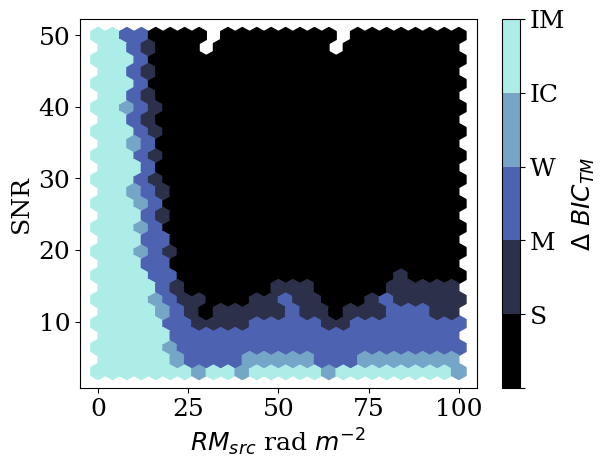

In [27]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font' , family='serif')

combined_BS_BS_merge_5000['delta_BIC_5_1']= combined_BS_BS_merge_5000.BIC - combined_BS_FS_merge_5000.BIC

bounds = [-2000, -100  ,-50 , -5 , 0 , 10]
cmap_rb = plt.get_cmap('cmr.sapphire')
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)

hex1 = plt.hexbin(combined_BS_BS_merge_5000['RM_src_radm2'] ,combined_BS_BS_merge_5000['SNR'] , combined_BS_BS_merge_5000['delta_BIC_5_1']  ,gridsize=25  ,norm=norm , cmap=cmap , reduce_C_function=np.median)

plt.xlabel('$RM_{src}$ rad $m^{-2}$')
plt.ylabel('SNR')

labels = (' ' ,'S' , 'M' , 'W' , 'IC' , 'IM')
cb = plt.colorbar(label='$\Delta$ $BIC_{T M}$' , ticklocation='bottom')
cb.ax.set_yticklabels(labels)
plt.show()


In [28]:

import numpy as np
import matplotlib.pyplot as plt
     
# Generate sample data
np.random.seed(0)
x = np.random.randn(1000)
y = np.random.randn(1000)
     
bottom = plt.get_cmap('cmr.dusk_r', 1)
top= plt.get_cmap('cmr.sapphire', 255)
newcolors = np.vstack((top(np.linspace(0, 1, 255)),
                    bottom(np.linspace(0, 0.09, 1))))
newcmp = ListedColormap(newcolors, name='embersaph')
     
# Create the hexbin plot
plt.hexbin(combined_BS_BS_merge_5000['RM_screen_radm2'],combined_BS_BS_merge_5000['SNR'], combined_BS_BS_merge_5000['delta_BIC_5_1'],reduce_C_function=np.median, vmax=7.8, vmin=-2000, gridsize=20, cmap=newcmp)
plt.xlabel('$RM_{screen}$ rad $m^{-2}$')
plt.ylabel('SNR')
plt.colorbar(label='$\\Delta BIC$')
plt.show()


NameError: name 'ListedColormap' is not defined

In [29]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})


fig_chi , ax_test = plt.subplots(nrows=1 , ncols=2 , figsize=(12 ,5) , sharex=True)
combined_BS_BS_merge_5000['delta_BIC_5_1']= combined_BS_BS_merge_5000.BIC - combined_BS_FS_merge_5000.BIC



data_frames = [combined_BS_BS_merge_5000]
num_bins=15

z_color_i = 2
y_index = 0
x_index = 1

bottom = plt.get_cmap('cmr.dusk_r' , 3)
top= plt.get_cmap('cmr.sapphire' , 253)
newcolors = np.vstack((top(np.linspace(0 , 1 , 253)) , bottom(np.linspace(0 , 0.09 , 3))))
newcmp = ListedColormap(newcolors,  name='embersaph')

bottom_SNR = plt.get_cmap('cmr.dusk_r' , 13)
top_SNR= plt.get_cmap('cmr.sapphire' , 243)
newcolors_SNR = np.vstack((top_SNR(np.linspace(0  ,1  ,243))  , bottom_SNR(np.linspace(0  ,0.09 ,13))))
newcmp_SNR = ListedColormap(newcolors_SNR , name='embersaph')


hex1 = ax_test[0].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'] , combined_BS_BS_merge_5000['SNR'] , combined_BS_BS_merge_5000['delta_BIC_5_1'] , gridsize=25  cmap=newcmp , vmax=12 , vmin=-1000  ,reduce_C_function=np.median)
hex2 = ax_test[1].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'][combined_BS_BS_merge_5000['SNR']<11] ,combined_BS_BS_merge_5000['SNR'][combined_BS_BS_merge_5000['SNR']<11] , combined_BS_BS_merge_5000['delta_BIC_5_1'][combined_BS_BS_merge_5000['SNR']<11]  ,gridsize=18  ,reduce_C_function=np.median , cmap=newcmp_SNR,  vmax=4 , vmin=-70)
ax_test[0].set_title('Slab:FS')
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_ylabel('SNR')
ax_test[1].set_title('{} zoom in'.format('Slab'))
cbar_ax1 = fig_chi.add_axes([0.92,  0.15 , 0.04,  0.7])
fig_chi.colorbar(hex2 , cax=cbar_ax1 ,  label='$\Delta$ $BIC_{5 1}$')
cbar_ax = fig_chi.add_axes([0.47 , 0.15,  0.03 , 0.7])
fig_chi.colorbar(hex1 , cax=cbar_ax)

plt.subplots_adjust(left=0.2 , bottom=0.1 , right=0.9 , top=0.9 , wspace=0.7 ,hspace=0.6)
plt.show()



SyntaxError: invalid syntax. Perhaps you forgot a comma? (1928227447.py, line 28)

In [30]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')


bounds = [-2000,-500, -100, -5, 0, 10]
cmap_rb = plt.get_cmap('cmr.sapphire')
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
cmap, norm = mcolors.from_levels_and_colors(bounds, colors)

print(len(combined_BS_BS_merge_5000['delta_BIC_5_1']))

plt.hexbin(combined_BS_BS_merge_5000['RM_src_radm2'], combined_BS_BS_merge_5000['SNR'], combined_BS_BS_merge_5000['delta_evd_5_1'], reduce_C_function=percentage_reduce_BIC_C, gridsize=20, cmap='cmr.lavender')
plt.xlabel('$RM_{src}$ rad $m^{-2}$')
plt.ylabel('S:N')
#ax_test[0].set_title('Slab')

#labels = (' ','S', 'M', 'W', 'IC' ,'IM')
cb = plt.colorbar(label='% Correct Selections BIC', ticklocation='bottom')
#cb.ax.set_yticklabels(labels)
plt.show()

print(len(BS_BS_merge_5000.BIC))

7000


NameError: name 'percentage_reduce_BIC_C' is not defined

In [ ]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font' , family='serif')
fig_chi , ax_test = plt.subplots(nrows=1,  ncols=2 , figsize=(12, 5) , sharex=True)

bottom = plt.get_cmap('cmr.dusk_r' , 1)
top= plt.get_cmap('cmr.sapphire' , 255)
newcolors = np.vstack((top(np.linspace(0 , 1 , 255)), 
                bottom(np.linspace(0 , 0.09,  1))))
newcmp = ListedColormap(newcolors, name='embersaph')

bounds = [-2000, -500,  -100,  -5,  0,  10]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap,  norm = mcolors.from_levels_and_colors(bounds , colors)



hex1 = ax_test[0].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'], combined_BS_BS_merge_5000['SNR'] , combined_BS_BS_merge_5000['delta_BIC_5_1'],  vmax=7.8 , vmin=-2000  ,gridsize=20 , cmap=newcmp)
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_ylabel(values_interest[y_index])

hex2 = ax_test[1].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'] ,combined_BS_BS_merge_5000['SNR'] , combined_BS_BS_merge_5000['delta_BIC_5_1'] , norm=norm ,  gridsize=20 , cmap=cmap)
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')



cb2 = plt.colorbar(hex1)

labels = (' ' ,'S'  ,'M' , 'W'  ,'IC'  ,'IM')
cb = plt.colorbar(hex2 , label='$\Delta$ $BIC_{T A}$' , ticklocation='bottom')
cb.ax.set_yticklabels(labels)
plt.tight_layout()
plt.show()

print(sum(combined_BS_FS_merge_5000.fracPol > 0))

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
x = np.random.randn(1000)
y = np.random.randn(1000)

bottom = plt.get_cmap('cmr.dusk_r', 1)
top= plt.get_cmap('cmr.sapphire', 255)
newcolors = np.vstack((top(np.linspace(0, 1, 255)),
                bottom(np.linspace(0, 0.09, 1))))
newcmp = ListedColormap(newcolors, name='embersaph')

# Create the hexbin plot
plt.hexbin(combined_BS_BS_merge_5000['RM_src_radm2'],combined_BS_BS_merge_5000['SNR'], combined_BS_BS_merge_5000['delta_BIC_5_1'],reduce_C_function=np.median, vmax=7.8, vmin=-2000, gridsize=20, cmap=newcmp)
plt.xlabel('$RM_{src}$ rad $m^{-2}$')
plt.ylabel('SNR')
plt.colorbar(label='$\\Delta BIC$')

# Plot a line

# Example data (replace with your data)
x = combined_BS_BS_merge_5000['RM_src_radm2'][(combined_BS_BS_merge_5000['delta_BIC_5_1']>0)&(combined_BS_BS_merge_5000['RM_src_radm2']<18)]
y = combined_BS_BS_merge_5000['SNR'][(combined_BS_BS_merge_5000['delta_BIC_5_1']>0) & (combined_BS_BS_merge_5000['RM_src_radm2']<18)]


# Define the reciprocal function
def reciprocal_function(x):
    return -3.0*x + 58


     
# Generate points for the fitted curve
x_fit = np.linspace(min(x), max(x), 100)
y_fit = reciprocal_function(x_fit)


plt.plot(x_fit, y_fit, label='Width Limit', linestyle='--',color='red')
plt.ylim(0,50)
plt.xlabel('$RM_{src}$ rad $m^{-2}$')
plt.ylabel('SNR')
plt.legend()
plt.show()

In [ ]:

from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True)

bottom = plt.get_cmap('cmr.dusk_r', 1)
top= plt.get_cmap('cmr.sapphire', 255)
newcolors = np.vstack((top(np.linspace(0, 1, 255)),
                bottom(np.linspace(0, 0.09, 1))))
newcmp = ListedColormap(newcolors, name='embersaph')

bounds = [-2000,-70, -10, -5, 0, 10]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
cmap, norm = mcolors.from_levels_and_colors(bounds, colors)

rm_x_list = np.arange(0.1,100,100)

hex1 = ax_test[0].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'],combined_BS_BS_merge_5000['SNR'], combined_BS_BS_merge_5000['delta_BIC_5_1'],reduce_C_function=np.median, vmax=7.8, vmin=-2000, gridsize=20, cmap=newcmp)
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')

     
     
hex2 = ax_test[1].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'],combined_BS_BS_merge_5000['SNR'], combined_BS_BS_merge_5000['delta_BIC_5_1'], norm=norm, reduce_C_function=np.median, gridsize=20, cmap=cmap)
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
 #plt.ylabel(values_interest[y_index])
 #ax_test[0].set_title('Slab')
 
 
cb2 = plt.colorbar(hex1)
 
labels = ('-10>', '-5>','-2.5>', '-1>', '0>' ,'0+')
cb = plt.colorbar(hex2, label='$\\Delta$ $BIC_{T,A}$', ticklocation='bottom')
cb.ax.set_yticklabels(labels)
 
plt.tight_layout()
 
plt.show()

In [ ]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font'  ,family='serif')
fig_chi , ax_test = plt.subplots(nrows=1 , ncols=2,  figsize=(12, 5),  sharex=True)

bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

bounds = [-10, 0,  1,  2,  5,  10000]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)

hex1 = ax_test[0].hexbin( combined_BS_BS_merge_5000['RM_src_radm2'] , combined_BS_BS_merge_5000['SNR']  , combined_BS_BS_merge_5000['delta_evd_5_1'], gridsize=25 , vmax=1000, vmin=-4, cmap=newcmp)
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_ylabel('SNR')


x = np.arange(3,100,1)
y = -4*x + 64
ax_test[0].plot(x, y, 'green', label = '-4 $RM_{src}$ + 64')
ax_test[0].legend()


hex2 = ax_test[1].hexbin( combined_BS_BS_merge_5000['RM_src_radm2'] , combined_BS_BS_merge_5000['SNR']  , combined_BS_BS_merge_5000['delta_evd_5_1'] , norm=norm ,  gridsize=25 , cmap=cmap)
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')
ax_test[1].plot(x, y, 'green')
ax_test[1].legend()



cb2 = plt.colorbar(hex1)

labels = ['-5','0', '1', '2','5', '1000'] 
cb = plt.colorbar(hex2 , label='ln(BF)$_{BS,FS}$' , ticklocation='bottom')
cb.ax.set_yticklabels(labels)
ax_test[0].set_ylim(0,50)
ax_test[1].set_ylim(0,50)
plt.tight_layout()
fig_chi.savefig('comb_BF_BS_FS', format='pdf')
plt.show()
print(sum( BS_BS_9000_src_sample.fracPol > 0))
plt.clf()


In [ ]:
#Percentages

In [393]:
def percentage_reduce_BIC_C(C):
    C = np.asarray(C)
    percentage = (len(C[C>2]) / len(C)) * 100 
    
    return percentage


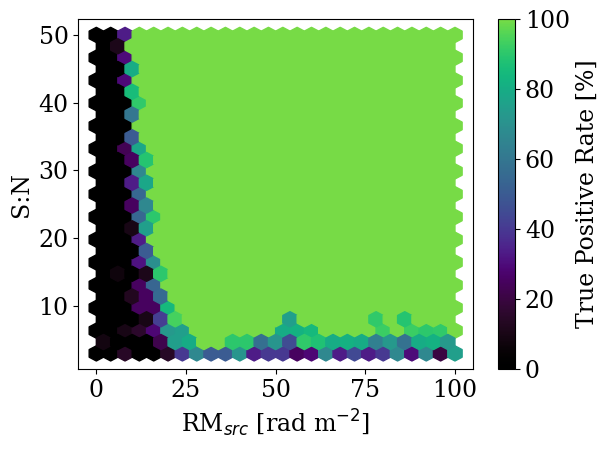

In [394]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 17})
plt.rc('font', family='serif')



plt.hexbin(combined_BS_BS_merge_5000['RM_src_radm2'],combined_BS_BS_merge_5000['SNR'], combined_BS_BS_merge_5000['delta_evd_5_1'], reduce_C_function=percentage_reduce_BIC_C, gridsize=25, cmap='cmr.lavender')
plt.xlabel('RM$_{src}$ [rad m$^{-2}$]')
plt.ylabel('S:N')
#ax_test[0].set_title('Slab')

#labels = (' ','S', 'M', 'W', 'IC' ,'IM')
cb = plt.colorbar(label='True Positive Rate [%]', ticklocation='bottom')
plt.tight_layout()
plt.savefig('BS_FS_true_positive_rate.pdf', format='pdf')
#cb.ax.set_yticklabels(labels)
plt.show()


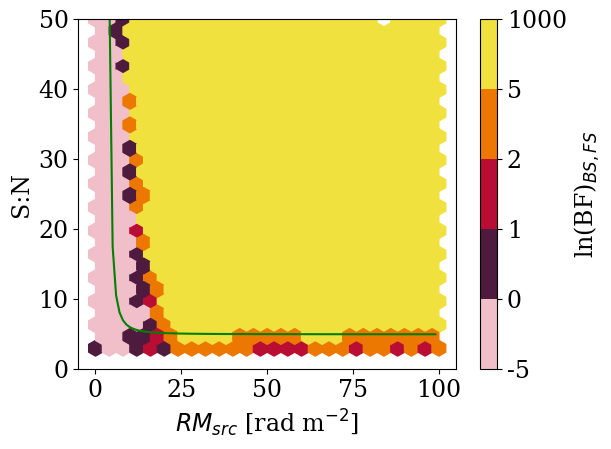

In [395]:
plt.clf()

bottom = plt.get_cmap('cmr.dusk_r',  1)
top= plt.get_cmap('cmr.ember' , 255)
newcolors = np.vstack((bottom(np.linspace(0 , 0.9 , 1)), 
                top(np.linspace(0 , 1 , 255))))
newcmp = ListedColormap(newcolors , name='embersaph')

bounds = [-10, 0,  1,  2,  5,  10000]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0 , 1 , len(bounds) - 1))
cmap , norm = mcolors.from_levels_and_colors(bounds , colors)

combined_BS_BS_merge_5000['delta_evd_5_1']
plt.hexbin( combined_BS_BS_merge_5000['RM_src_radm2'] , combined_BS_BS_merge_5000['SNR']  , combined_BS_BS_merge_5000['delta_evd_5_1'] , norm=norm ,  gridsize=25 , cmap=cmap)
plt.xlabel('$RM_{src}$ [rad m$^{-2}$]')
plt.ylabel('S:N')
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')
plt.plot(x, y, 'green')

labels = ['-5','0', '1', '2','5', '1000'] 
cb = plt.colorbar(label='ln(BF)$_{BS, FS}$' , ticklocation='bottom')
cb.ax.set_yticklabels(labels)

plt.rcParams.update({'font.size': 17})
plt.rc('font'  ,family='serif')

plt.ylim(0,50)
plt.tight_layout()
plt.savefig('comb_BF_BS_FS.pdf', format='pdf')
plt.show()


/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_67501/100664373.py:23: RuntimeWarning:

divide by zero encountered in divide



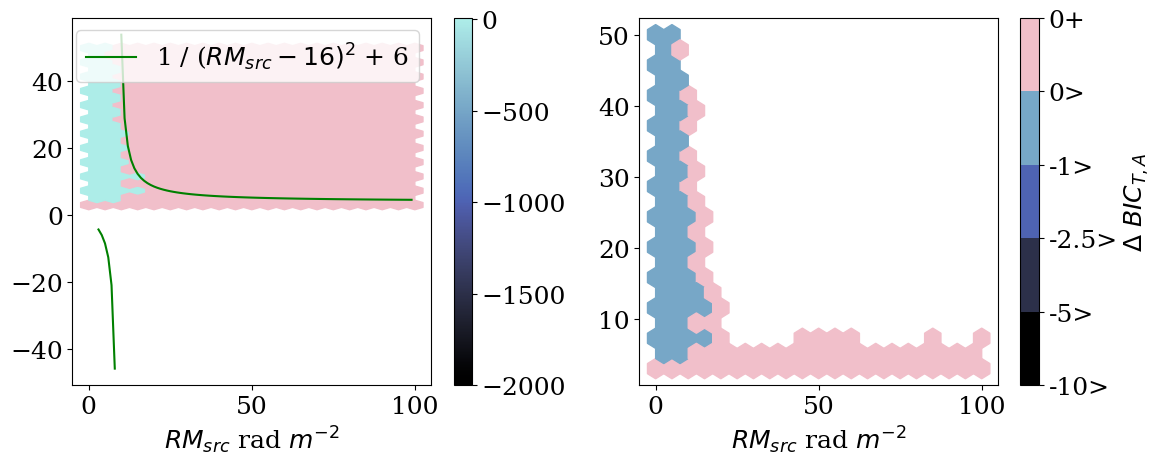

In [396]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True)

bottom = plt.get_cmap('cmr.dusk_r', 1)
top= plt.get_cmap('cmr.sapphire', 255)
newcolors = np.vstack((top(np.linspace(0, 1, 255)),
                bottom(np.linspace(0, 0.09, 1))))
newcmp = ListedColormap(newcolors, name='embersaph')

bounds = [-2000,-70, -10, -5, 0, 10]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0, 1, len(bounds) - 1))
cmap, norm = mcolors.from_levels_and_colors(bounds, colors)

rm_x_list = np.arange(0.1,100,100)

hex1 = ax_test[0].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'],combined_BS_BS_merge_5000['SNR'], combined_BS_BS_merge_5000['delta_evd_5_1'],reduce_C_function=np.median, vmax=7.8, vmin=-2000, gridsize=20, cmap=newcmp)
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')

x = np.arange(3,100,1)
y = (50/(x-3**2)) + 4
ax_test[0].plot(x, y, 'green', label = '1 / ($RM_{src} - 16)^{2}$ + 6')
ax_test[0].legend()
     
     
hex2 = ax_test[1].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'],combined_BS_BS_merge_5000['SNR'], combined_BS_BS_merge_5000['delta_evd_5_1'], norm=norm, reduce_C_function=np.median, gridsize=20, cmap=cmap)
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
 #plt.ylabel(values_interest[y_index])
 #ax_test[0].set_title('Slab')
 
 
cb2 = plt.colorbar(hex1)
 
labels = ('-10>', '-5>','-2.5>', '-1>', '0>' ,'0+')
cb = plt.colorbar(hex2, label='$\\Delta$ $BIC_{T,A}$', ticklocation='bottom')
cb.ax.set_yticklabels(labels)
 
plt.tight_layout()
 
plt.show()



In [397]:

import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
x = np.random.randn(1000)
y = np.random.randn(1000)

# Create the hexbin plot
plt.hexbin(combined_BS_BS_merge_5000['RM_src_radm2'],combined_BS_BS_merge_5000['SNR'], combined_BS_BS_merge_5000['delta_BIC_5_1'],reduce_C_function=np.median, vmax=7.8, vmin=-2000, gridsize=20, cmap=newcmp)
plt.xlabel('$RM_{src}$ rad $m^{-2}$')
plt.ylabel('SNR')
plt.colorbar(label='$\\Delta BIC$')



# Generate points for the fitted curve
#x_fit = np.linspace(min(x), max(x), 100)
#
#y_fit = reciprocal_function(x_fit, params[0], params[1])


#plt.plot(x_fit, y_fit, label='Width Limit', linestyle='--',color='red')
#plt.ylim(0,50)
#plt.xlabel('$RM_{src}$ rad $m^{-2}$')
#plt.ylabel('SNR')
#plt.legend()
plt.show()

KeyError: 'delta_BIC_5_1'

# FS Results

In [ ]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
print(combined_FS_BS_merge_5000.keys())

fig_chi , ax_test = plt.subplots(nrows=1 , ncols=2  ,figsize=(12, 5) , sharex=True)
#combined_FS_FS_merge_5000['delta_BIC_1_5']= combined_FS_FS_merge_5000['ln(EVIDENCE) ']  - combined_FS_BS_merge_5000['ln(EVIDENCE) '] 
combined_FS_FS_merge_5000['delta_BIC_1_5']= combined_FS_FS_merge_5000.BIC - combined_FS_BS_merge_5000.BIC


values_interest = ['SNR'  'RM_src_radm2'  'delta_BIC_5_1']
titles_list = ['BS'  'FS']
data_frames = [combined_BS_BS_merge_5000]
num_bins=15

z_color_i = 2
y_index = 0
x_index = 1

bottom = plt.get_cmap('cmr.dusk_r' , 0)
top= plt.get_cmap('cmr.sapphire' , 256)
newcolors = np.vstack((top(np.linspace(0 , 1,  256)) , bottom(np.linspace(0 , 0.09 , 0))))
newcmp = ListedColormap(newcolors,  name='embersaph')

bottom_SNR = plt.get_cmap('cmr.dusk_r' , 11)
top_SNR= plt.get_cmap('cmr.sapphire',  244)
newcolors_SNR = np.vstack((top_SNR(np.linspace(0 , 1 , 245)) , bottom_SNR(np.linspace(0 , 0.09 ,11))))
newcmp_SNR = ListedColormap(newcolors_SNR , name='embersaph')

plt.rc('font' , family='serif')

hex1 = ax_test[0].hexbin(combined_FS_BS_merge_5000['psi0_deg_y'], combined_FS_FS_merge_5000['SNR'] , combined_FS_FS_merge_5000['delta_BIC_1_5'] , gridsize=25 , cmap=newcmp , reduce_C_function=np.median)
hex2 = ax_test[1].hexbin(combined_FS_BS_merge_5000['psi0_deg_y'][combined_FS_FS_merge_5000['SNR']<11] , combined_FS_FS_merge_5000['SNR'][combined_FS_FS_merge_5000['SNR']<11] , combined_FS_FS_merge_5000['delta_BIC_1_5'][combined_FS_FS_merge_5000['SNR']<11] , gridsize=18 , reduce_C_function=np.median , cmap=newcmp_SNR)
#ax_test[0].set_title('Slab:FS')
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_ylabel('SNR')
#ax_test[1].set_title('{} zoom in'.format('Slab'))
cbar_ax1 = fig_chi.add_axes([0.92 , 0.15 , 0.04 , 0.7])
fig_chi.colorbar(hex2 , cax=cbar_ax1  , label='$\Delta$ $BIC_{1 5}$')
cbar_ax = fig_chi.add_axes([0.47 , 0.15 , 0.03 , 0.7])
fig_chi.colorbar(hex1 , cax=cbar_ax)

plt.subplots_adjust(left=0.2 , bottom=0.1 , right=0.9,  top=0.9, wspace=0.7, hspace=0.6)
plt.show()


In [ ]:
plt.hist( BS_BS_9000_src_sample['delta_BIC_5_1'],[ BS_BS_9000_src_sample['delta_BIC_5_1']>-2000] , bins=100 , label='combined band')
plt.hist(combined_BS_BS_merge_5000['delta_BIC_5_1'],[combined_BS_BS_merge_5000['delta_BIC_5_1']>-2000] , bins =100  ,label='band 1 only')
plt.legend()
plt.xlabel('$\Delta$BIC')
plt.show()



## Follow Up with Alec and Tim on using Evidence factor

The ratio of the evidences for the two competing models is called the Bayes factor [19] 
Can the Bayes factor provide a more precises goodness of fit.

In [ ]:
combined_BS_BS_merge_5000.keys()

In [ ]:
plt.rcParams.update({'font.size': 18})
import math as m


fig_chi , ax_test = plt.subplots(nrows=1 , ncols=2 , figsize=(12, 5) , sharex=True)
combined_BS_BS_merge_5000['delta_BIC_5_1']= combined_BS_BS_merge_5000.BIC - combined_BS_FS_merge_5000.BIC
fret =  np.exp(combined_BS_BS_merge_5000['ln(EVIDENCE) '])
combined_BS_BS_merge_5000['delta_ln_evidence_5_1']= combined_BS_BS_merge_5000['ln(EVIDENCE) '] / combined_BS_FS_merge_5000['ln(EVIDENCE) ']


values_interest = ['SNR' , 'RM_src_radm2'  ,'delta_ln_evidence_5_1']
titles_list = ['BS' , 'FS']
data_frames = [combined_BS_BS_merge_5000]
num_bins=15
print(min(combined_BS_BS_merge_5000['delta_ln_evidence_5_1']))
z_color_i = 2
y_index = 0
x_index = 1

"""
bottom = plt.get_cmap('cmr.dusk_r'  3)
top= plt.get_cmap('cmr.sapphire'  253)
newcolors = np.vstack((top(np.linspace(0  1  253))  bottom(np.linspace(0  0.09  3))))
newcmp = ListedColormap(newcolors  name='embersaph')

bottom_SNR = plt.get_cmap('cmr.dusk_r'  13)
top_SNR= plt.get_cmap('cmr.sapphire'  243)
newcolors_SNR = np.vstack((top_SNR(np.linspace(0  1  243))  bottom_SNR(np.linspace(0  0.09 13))))
newcmp_SNR = ListedColormap(newcolors_SNR  name='embersaph')
"""

hex1 = ax_test[0].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'], combined_BS_BS_merge_5000['SNR'] , combined_BS_BS_merge_5000['delta_ln_evidence_5_1'] , gridsize=20 , cmap=cmr.sapphire , vmin=0  ,reduce_C_function=np.median)
hex2 = ax_test[1].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'][combined_BS_BS_merge_5000['SNR']<11] ,combined_BS_BS_merge_5000['SNR'][combined_BS_BS_merge_5000['SNR']<11]  ,combined_BS_BS_merge_5000['delta_ln_evidence_5_1'][combined_BS_BS_merge_5000['SNR']<11]  ,gridsize=18 ,vmin=-1 , reduce_C_function=np.median , cmap=cmr.sapphire)
ax_test[0].set_title('Slab')
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[0].set_ylabel('SNR')
ax_test[1].set_title('{} zoom in'.format('Slab'))
cbar_ax1 = fig_chi.add_axes([0.92 , 0.15 , 0.04 , 0.7])
fig_chi.colorbar(hex2 , cax=cbar_ax1 ,  label='$\Delta$ $ln(evidence)_{5 1}$')
cbar_ax = fig_chi.add_axes([0.47,  0.15 , 0.03 , 0.7])
fig_chi.colorbar(hex1 , cax=cbar_ax)

plt.subplots_adjust(left=0.2 , bottom=0.1 , right=0.9 , top=0.9 , wspace=0.7 ,hspace=0.6)
plt.show()


# TESTING QU FITTING ACCURACY OF RESULTS

Need to determine how accurate QU fitting is in all of it's measurements  need to calculate the error scaled residuals

In [ ]:
print(combined_BS_BS_merge_5000.keys())

In [37]:
def calculate_error_scaled_residual(dataframe , error_column , true_val_col , est_val_col):

    column_name = "{}_err_scaled_resid".format(true_val_col)
    dataframe[column_name] = (dataframe[true_val_col] - dataframe[est_val_col])



In [38]:
#First calculate the scaled residuals

calculate_error_scaled_residual(combined_BS_BS_merge_5000  ,'psi0_deg_plus_err'  ,'psi0_deg_y' , 'psi0_deg_x')
calculate_error_scaled_residual(combined_BS_FS_merge_5000 , 'psi0_deg_plus_err'  ,'psi0_deg_y' , 'psi0_deg_x')
calculate_error_scaled_residual(combined_FS_BS_merge_5000 , 'psi0_deg_plus_err'  ,'psi0_deg_y' , 'psi0_deg_x')
calculate_error_scaled_residual(combined_FS_FS_merge_5000 , 'psi0_deg_plus_err'  ,'psi0_deg_y' , 'psi0_deg_x')

calculate_error_scaled_residual(combined_BS_BS_merge_5000  ,'fracPol_plus_err'  ,'frac_pol' , 'fracPol')
calculate_error_scaled_residual(combined_BS_FS_merge_5000  ,'fracPol_plus_err' , 'frac_pol' , 'fracPol')

In [39]:

hex1 = plt.hexbin(combined_BS_BS_merge_5000['RM_src_radm2'] ,combined_BS_BS_merge_5000['SNR'],combined_BS_BS_merge_5000['psi0_deg_x_err_scaled_resid'] , gridsize=25 , cmap=cmr.guppy  ,reduce_C_function=np.median)
plt.xlabel('$RM_{src}$ rad $m^{-2}$')
plt.ylabel('SNR')

plt.colorbar(hex1 , label='$Residual_{\Psi_{0}}$/error')
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
/var/folders/89/zgv9nv5563n89pzs55bv6mzm0000gq/T/ipykernel_81106/70708281.py:5: SyntaxWarning: invalid escape sequence '\P'
  plt.colorbar(hex1 , label='$Residual_{\Psi_{0}}$/error')


KeyError: 'psi0_deg_x_err_scaled_resid'

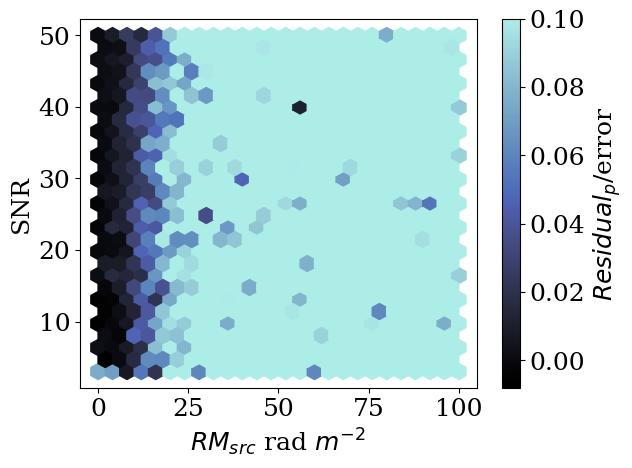

In [41]:
hex1 = plt.hexbin(combined_BS_FS_merge_5000['RM_src_radm2'] ,combined_BS_FS_merge_5000['SNR'] , combined_BS_FS_merge_5000['frac_pol_err_scaled_resid'] , gridsize=25, vmax=0.1, cmap=cmr.sapphire , reduce_C_function=np.median)
plt.xlabel('$RM_{src}$ rad $m^{-2}$')
plt.ylabel('SNR')

plt.colorbar(hex1 , label='$Residual_{p}$/error')

These plots mean that the slimmer the slab the more accurate the QU fit of a FS source is at calculating the fractional polarization. In terms of the polarization angle it is very interesting that 

## The Combined FS sources

In [ ]:
#Faraday Simple Sims
FS_FS_5000_QUfit_df_comb = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/condensed_simFS_model_num_1_sims_comb.csv')
FS_BS_5000_QUfit_df_comb = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/condensed_simFS_model_num_5_sims_comb.csv')

#True values
FS_5000_true_df_comb = pd.read_csv('/Users/loberhel/Desktop/Simulated_sources_code/avatar_testing/combined_bands/combined_faraday_simple_number_10000_freq_800_1089_SNR_band1.csv')


FS_5000_true_df_comb.rename( columns={'Unnamed: 0':'src'}  inplace=True )


#fix the indexing for the merge
FS_FS_5000_QUfit_df_comb['src'] = FS_FS_5000_QUfit_df_comb['src'] - 1
FS_BS_5000_QUfit_df_comb['src'] = FS_BS_5000_QUfit_df_comb['src'] - 1

#Merge
FS_FS_comb_merge = pd.merge(FS_FS_5000_QUfit_df_comb  FS_5000_true_df_comb  on='src'  how='outer')
FS_BS_comb_merge = pd.merge(FS_BS_5000_QUfit_df_comb  FS_5000_true_df_comb  on='src'  how='outer')


# Get delta BIC values

In [ ]:
print(FS_BS_comb_merge.keys())

FS_FS_comb_merge['delta_BIC_1_5'] = FS_FS_comb_merge.BIC - FS_BS_comb_merge.BIC

## Make the scaled plot

In [ ]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})

fig_chi  ax_test = plt.subplots(nrows=1  ncols=2  figsize=(12 5)  sharex=True)


bottom = plt.get_cmap('cmr.dusk_r'  3)
top= plt.get_cmap('cmr.sapphire'  253)
newcolors = np.vstack((top(np.linspace(0  1  253))  bottom(np.linspace(0  0.09  3))))
newcmp = ListedColormap(newcolors  name='embersaph')

bottom_SNR = plt.get_cmap('cmr.dusk_r'  13)
top_SNR= plt.get_cmap('cmr.sapphire'  243)
newcolors_SNR = np.vstack((top_SNR(np.linspace(0  1  243))  bottom_SNR(np.linspace(0  0.09 13))))
newcmp_SNR = ListedColormap(newcolors_SNR  name='embersaph')


hex1 = ax_test[0].hexbin(FS_BS_comb_merge['deltaRM_radm2'] FS_FS_comb_merge['SNR']  FS_FS_comb_merge['delta_BIC_1_5']  gridsize=25  cmap=newcmp  reduce_C_function=np.median)
hex2 = ax_test[1].hexbin(FS_BS_comb_merge['deltaRM_radm2'][FS_FS_comb_merge['SNR']<11] FS_FS_comb_merge['SNR'][FS_FS_comb_merge['SNR']<11]  FS_FS_comb_merge['delta_BIC_1_5'][FS_FS_comb_merge['SNR']<11]  gridsize=18  reduce_C_function=np.median  cmap=newcmp_SNR)
ax_test[0].set_title('Slab:FS')
ax_test[1].set_xlabel('$RM_{src  QU}$ rad $m^{-2}$')
ax_test[0].set_xlabel('$RM_{src  QU}$ rad $m^{-2}$')
ax_test[0].set_ylabel('SNR')
ax_test[1].set_title('{} zoom in'.format('Slab'))
cbar_ax1 = fig_chi.add_axes([0.92  0.15  0.04  0.7])
fig_chi.colorbar(hex2  cax=cbar_ax1   label='$\Delta$ $BIC_{T A}$')
cbar_ax = fig_chi.add_axes([0.47  0.15  0.03  0.7])
fig_chi.colorbar(hex1  cax=cbar_ax)

plt.subplots_adjust(left=0.2  bottom=0.1  right=0.9  top=0.9  wspace=0.7 hspace=0.6)
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 18})
plt.rc('font'  family='serif')
fig_chi  ax_test = plt.subplots(nrows=1  ncols=2  figsize=(12 5)  sharex=True)

bottom = plt.get_cmap('cmr.dusk_r'  1)
top= plt.get_cmap('cmr.sapphire'  255)
newcolors = np.vstack((top(np.linspace(0  1  255)) 
                bottom(np.linspace(0  0.09  1))))
newcmp = ListedColormap(newcolors  name='embersaph')

bounds = [-2000 -500  -100  -5  0  10]
cmap_rb = plt.get_cmap(newcmp)
colors = cmap_rb(np.linspace(0  1  len(bounds) - 1))
cmap  norm = mcolors.from_levels_and_colors(bounds  colors)



hex1 = ax_test[0].hexbin(FS_BS_comb_merge['deltaRM_radm2'] FS_FS_comb_merge['SNR']  FS_FS_comb_merge['delta_BIC_1_5']  vmax=7.7  vmin=-2000  gridsize=20  cmap=newcmp)
ax_test[0].set_xlabel('$RM_{src  QU}$ rad $m^{-2}$')
ax_test[0].set_ylabel(values_interest[y_index])

hex2 = plt.hexbin(FS_BS_comb_merge['deltaRM_radm2'] FS_FS_comb_merge['SNR']  FS_FS_comb_merge['delta_BIC_1_5']  gridsize=20  norm=norm  cmap=cmap)
plt.xlabel('$RM_{src  QU}$ rad $m^{-2}$')
plt.ylabel(values_interest[y_index])
#plt.ylabel(values_interest[y_index])
#ax_test[0].set_title('Slab')



cb2 = plt.colorbar(hex1)

labels = (' ' 'S'  'M'  'W'  'IC'  'IM')
cb = plt.colorbar(hex2  label='$\Delta$ $BIC_{T A}$'  ticklocation='bottom')
cb.ax.set_yticklabels(labels)
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')


top = plt.get_cmap('Oranges', 1)
bottom= plt.get_cmap('cmr.lavender', 255)
newcolors = np.vstack((top(np.linspace(0, 0.9, 1)),
                bottom(np.linspace(0, 1, 255))))

newcmp = ListedColormap(newcolors, name='embersaph')


print(len(BS_BS_9000_src_sample['delta_BIC_5_1']))

plt.hexbin(FS_BS_comb_merge['deltaRM_radm2'],FS_FS_comb_merge['SNR'], FS_FS_comb_merge['delta_BIC_1_5'], reduce_C_function=percentage_reduce_BIC_C, vmax=100, gridsize=20, cmap=newcmp)
plt.xlabel('$RM_{src}$ rad $m^{-2}$')
plt.ylabel('SNR')
#ax_test[0].set_title('Slab')

#labels = (' ','S', 'M', 'W', 'IC' ,'IM')
cb = plt.colorbar(label='% Correct Selections BIC', ticklocation='bottom')
#cb.ax.set_yticklabels(labels)
plt.show()

print(len(BS_BS_merge_5000.BIC))


# Need to make the plots for ABCD

In [ ]:
def burnslabs_modelling(lambda_sq,  RM_screen, frac_pol, RM_src, psi0_deg):
     
    quarr = frac_pol * np.exp( -2j * (np.radians(psi0_deg) + (0.5*RM_src + RM_screen) * lambda_sq)) * ((np.sin(RM_src * lambda_sq))/(RM_src * lambda_sq))

    complex_p = np.sqrt((quarr.real**2 + quarr.imag**2))
 
    return complex_p

def FS_modelling(lambda_sq, RM_screen, frac_pol, RM_src, psi0_deg):

    quarr = frac_pol * np.exp(2j * (np.radians(psi0_deg) + RM_screen * lambda_sq))

    complex_p = np.sqrt((quarr.real**2 + quarr.imag**2))
 
    return complex_p


print(BS_BS_5000_df.keys())

In [ ]:
#MID SNR AND LOW RM_SRC
plt.rcParams.update({'font.size': 17})
plt.rc('font', family='serif')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(7, 6))
c = 299792458.


srcA = 4060 
srcB = 887 
srcC = 1683
srcD = 2982 
 
frac_pol = BS_BS_5000_df.fracPol[BS_BS_5000_df.src==srcA].item()
psi0_deg = BS_BS_5000_df.psi0_deg[BS_BS_5000_df.src==srcA].item()
RM_screen = BS_BS_5000_df.RM_radm2[BS_BS_5000_df.src==srcA].item()
RM_src = BS_BS_5000_df.deltaRM_radm2[BS_BS_5000_df.src==srcA].item()

frac_pol_FS = BS_FS_5000_df.fracPol[BS_FS_5000_df.src==srcA].item()
psi0_deg_FS = BS_FS_5000_df.psi0_deg[BS_FS_5000_df.src==srcA].item()
RM_screen_FS = BS_FS_5000_df.RM_radm2[BS_FS_5000_df.src==srcA].item()

data_4060 = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/burnslabs/4060.dat', names=True, dtype=None, delimiter=' ')

freq_arr = []
q_arr = []
u_arr = []

for row in data_4060:
    freq_arr.append(row[0])
    q_arr.append(row[1])
    u_arr.append(row[2])

freq_arr=np.asarray(freq_arr)
lambda_sqr_array = np.power(c/freq_arr, 2.0)
quarr_LOS_4060 = burnslabs_modelling(lambda_sqr_array, RM_screen, frac_pol, RM_src, psi0_deg)
quarr_LOS_4060_FS = FS_modelling(lambda_sqr_array, RM_screen_FS, frac_pol_FS, RM_src, psi0_deg_FS)

q_arr = np.asarray(q_arr)
u_arr = np.asarray(u_arr)
p_arr = np.sqrt(q_arr**2 + u_arr**2)


#plt.scatter(lambda_sqr_array, q_arr, marker='.', c='b')
#ax1.plot(lambda_sqr_array, q_arr, c='b')
ax1.plot(lambda_sqr_array, p_arr, c='blue')
ax1.set_ylabel('p')
#plt.scatter(lambda_sqr_array, u_arr, marker='.', c='r')
#ax1.plot(lambda_sqr_array, u_arr, c='r')
ax1.plot(lambda_sqr_array, quarr_LOS_4060, c='k')
ax1.plot(lambda_sqr_array, quarr_LOS_4060_FS, c='k', linestyle='--')


#B

frac_pol = BS_BS_5000_df.fracPol[BS_BS_5000_df.src==srcB].item()
psi0_deg = BS_BS_5000_df.psi0_deg[BS_BS_5000_df.src==srcB].item()
RM_screen = BS_BS_5000_df.RM_radm2[BS_BS_5000_df.src==srcB].item()
RM_src = BS_BS_5000_df.deltaRM_radm2[BS_BS_5000_df.src==srcB].item()

frac_pol_FS = BS_FS_5000_df.fracPol[BS_FS_5000_df.src==srcB].item()
psi0_deg_FS = BS_FS_5000_df.psi0_deg[BS_FS_5000_df.src==srcB].item()
RM_screen_FS = BS_FS_5000_df.RM_radm2[BS_FS_5000_df.src==srcB].item()


data_887 = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/burnslabs/887.dat', names=True, dtype=None, delimiter=' ')

freq_arr = []
q_arr = []
u_arr = []

for row in data_887:
    freq_arr.append(row[0])
    q_arr.append(row[1])
    u_arr.append(row[2])

freq_arr=np.asarray(freq_arr)
lambda_sqr_array = np.power(c/freq_arr, 2.0)
quarr_LOS_887= burnslabs_modelling(lambda_sqr_array, RM_screen, frac_pol, RM_src, psi0_deg)
quarr_LOS_877_FS = FS_modelling(lambda_sqr_array, RM_screen_FS, frac_pol_FS, RM_src, psi0_deg_FS)

    
q_arr = np.asarray(q_arr)
u_arr = np.asarray(u_arr)
p_arr = np.sqrt(q_arr**2 + u_arr**2)


#plt.scatter(lambda_sqr_array, q_arr, marker='.', c='b')
ax2.plot(lambda_sqr_array, p_arr, c='blue')
ax2.plot(lambda_sqr_array, quarr_LOS_877_FS, c='k', linestyle='--')

#plt.scatter(lambda_sqr_array, u_arr, marker='.', c='r')
ax2.plot(lambda_sqr_array, quarr_LOS_887, c='k')

#C

frac_pol = BS_BS_5000_df.fracPol[BS_BS_5000_df.src==srcC].item()
psi0_deg = BS_BS_5000_df.psi0_deg[BS_BS_5000_df.src==srcC].item()
RM_screen = BS_BS_5000_df.RM_radm2[BS_BS_5000_df.src==srcC].item()
RM_src = BS_BS_5000_df.deltaRM_radm2[BS_BS_5000_df.src==srcC].item()

frac_pol_FS = BS_FS_5000_df.fracPol[BS_FS_5000_df.src==srcC].item()
psi0_deg_FS = BS_FS_5000_df.psi0_deg[BS_FS_5000_df.src==srcC].item()
RM_screen_FS = BS_FS_5000_df.RM_radm2[BS_FS_5000_df.src==srcC].item()

data_1683 = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/burnslabs/1683.dat', names=True, dtype=None, delimiter=' ')

freq_arr = []
q_arr = []
u_arr = []

for row in data_1683:
    freq_arr.append(row[0])
    q_arr.append(row[1])
    u_arr.append(row[2])


freq_arr=np.asarray(freq_arr)
lambda_sqr_array = np.power(c/freq_arr, 2.0)
quarr_LOS_1264= burnslabs_modelling(lambda_sqr_array, RM_screen, frac_pol, RM_src, psi0_deg)
quarr_LOS_1264_FS = FS_modelling(lambda_sqr_array, RM_screen_FS, frac_pol_FS, RM_src, psi0_deg_FS)

q_arr = np.asarray(q_arr)
u_arr = np.asarray(u_arr)
p_arr = np.sqrt(q_arr**2 + u_arr**2)
     
     
#plt.scatter(lambda_sqr_array, q_arr, marker='.', c='b')
#ax3.plot(lambda_sqr_array, q_arr, c='b')

#plt.scatter(lambda_sqr_array, u_arr, marker='.', c='r')
#ax3.plot(lambda_sqr_array, u_arr, c='r')
ax3.plot(lambda_sqr_array, p_arr, c='blue')
ax3.plot(lambda_sqr_array, quarr_LOS_1264, c='k')
ax3.plot(lambda_sqr_array, quarr_LOS_1264_FS, c='k', linestyle='--')
ax3.set_xlabel('$\\lambda^{2}$')
ax3.set_ylabel('p')

#D

frac_pol = BS_BS_5000_df.fracPol[BS_BS_5000_df.src==srcD].item()
psi0_deg = BS_BS_5000_df.psi0_deg[BS_BS_5000_df.src==srcD].item()
RM_screen = BS_BS_5000_df.RM_radm2[BS_BS_5000_df.src==srcD].item()
RM_src = BS_BS_5000_df.deltaRM_radm2[BS_BS_5000_df.src==srcD].item()


frac_pol_FS = BS_FS_5000_df.fracPol[BS_FS_5000_df.src==srcD].item()
psi0_deg_FS = BS_FS_5000_df.psi0_deg[BS_FS_5000_df.src==srcD].item()
RM_screen_FS = BS_FS_5000_df.RM_radm2[BS_FS_5000_df.src==srcD].item()

print(psi0_deg)

data_2982 = np.genfromtxt('/Users/loberhel/Desktop/Project_2_Data/burnslabs/2982.dat', names=True, dtype=None, delimiter=' ')

freq_arr = []
q_arr = []
u_arr = []

for row in data_2982:
    freq_arr.append(row[0])
    q_arr.append(row[1])
    u_arr.append(row[2])


freq_arr=np.asarray(freq_arr)
lambda_sqr_array = np.power(c/freq_arr, 2.0)
quarr_LOS_2982= burnslabs_modelling(lambda_sqr_array, RM_screen, frac_pol, RM_src, psi0_deg)
quarr_LOS_2982_FS = FS_modelling(lambda_sqr_array, RM_screen_FS, frac_pol_FS, RM_src, psi0_deg_FS)


q_arr = np.asarray(q_arr)
u_arr = np.asarray(u_arr)
p_arr = np.sqrt(q_arr**2 + u_arr**2)

#plt.scatter(lambda_sqr_array, q_arr, marker='.', c='b')
ax4.plot(lambda_sqr_array, p_arr, c='blue')
     
#plt.scatter(lambda_sqr_array, u_arr, marker='.', c='r')
#ax4.plot(lambda_sqr_array, u_arr, c='r')
ax4.plot(lambda_sqr_array, quarr_LOS_2982, c='k')
ax4.plot(lambda_sqr_array, quarr_LOS_2982_FS, c='k', linestyle='--')
ax4.set_xlabel('$\lambda^{2}$')
plt.tight_layout()
plt.savefig('FS_BS_spectra.pdf', format='pdf')

# Correlation between BIC and percentages

In [398]:

plt.rcParams.update({'font.size': 17})
plt.rc('font', family='serif')

#Get the median Delta BIC values
hex1 = plt.hexbin(BS_BS_9000_src_sample['RM_src_radm2'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'],reduce_C_function=np.median, gridsize=20)
delta_bic = hex1.get_array()

hex2 = plt.hexbin(BS_BS_9000_src_sample['RM_src_radm2'],BS_BS_9000_src_sample['SNR'], BS_BS_9000_src_sample['delta_BIC_5_1'], reduce_C_function=percentage_reduce_BIC_C, gridsize=20)
delta_percentage = hex2.get_array()

#Get the median Delta BIC values
hex3 = hex1 = plt.hexbin(FS_BS_merge_10000['deltaRM_radm2'],FS_BS_merge_10000['SNR'], FS_FS_merge_10000['delta_BIC_1_5'], reduce_C_function=np.median, gridsize=20)
delta_bic_FS = hex3.get_array()

hex4 = plt.hexbin(FS_BS_merge_10000['deltaRM_radm2'],FS_BS_merge_10000['SNR'], FS_FS_merge_10000['delta_BIC_1_5'], reduce_C_function=percentage_reduce_BIC_C, gridsize=20)
delta_percentage_FS = hex4.get_array()

plt.clf()
plt.axvline(x=-1.0, label='-1.0', c='lightblue')
plt.axvline(x=-10.0, label='-10.0', c='mediumblue')
plt.axvline(x=-40.0, c='black')

plt.axhline(y=99.99994, label='$5\\sigma$', c='maroon')
plt.axhline(y=95.45, label='3$\\sigma$', c='firebrick')
plt.axhline(y=68.27, label='$\\sigma$', c='red')
plt.plot(delta_bic_FS, delta_percentage_FS, '.', marker='v', color='magenta', label='FS:BS', alpha=0.7)
plt.plot(delta_bic, delta_percentage, '.', label='BS:FS', alpha=0.2)


plt.legend()
plt.xscale('symlog')
plt.ylabel('% Correct Selections')
plt.xlabel('$\\Delta$ BIC')
plt.show()
#Get the % values



KeyError: 'delta_BIC_5_1'

7000


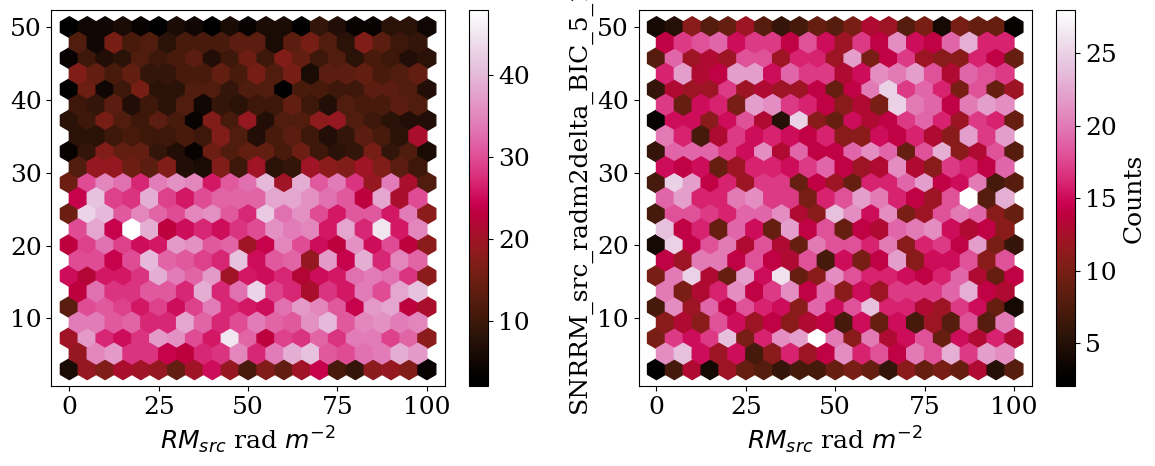

In [400]:
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')
fig_chi, ax_test = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharex=True)
 
 
 
print(len(combined_BS_BS_merge_5000))
hex2= ax_test[1].hexbin(combined_BS_BS_merge_5000['RM_src_radm2'],combined_BS_BS_merge_5000['SNR'],reduce_C_function=np.sum, gridsize=20, cmap='cmr.flamingo')
ax_test[1].set_xlabel('$RM_{src}$ rad $m^{-2}$')
ax_test[1].set_ylabel(values_interest[y_index])
 
hex1 = ax_test[0].hexbin(BS_BS_9000_src_sample['RM_src_radm2'],BS_BS_9000_src_sample['SNR'], reduce_C_function=np.sum, gridsize=20, cmap='cmr.flamingo')
ax_test[0].set_xlabel('$RM_{src}$ rad $m^{-2}$')
 
 
cb2 = plt.colorbar(hex2, label='Counts')
cb = plt.colorbar(hex1)
 
plt.tight_layout()
plt.show()


## Counts 